**Responsibilities**



*   EDA - Anupriya and Shama
*   Coding - Abhinav and Shruti


*   References and Details - Anisha and Surendra Sir


Aspect Extraction sample code will be managed by Anupriya








**Things to do**


*   Detailed Cleaning of review_cleaned
*   lexicon based polarity once the reviews are cleaned


*   Testing the lexicon based polarity with recommended to find out the accuracy (Logistic Regression)
*   General EDA using Tableau on the final dataset exported from python file (Create dashboard)


*   Coding for aspect extraction by supervised learning
*   Verification of aspects using various classification algorithms - Naive Bayes, Random Forest, KNN, Linear SVC


*   Analysis based on aspects
*   Overall Analysis












**Loading the Dataset**

In [1]:
import pandas as pd
import string
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np

In [2]:
df = pd.read_excel('capstone_airline_reviews3.xlsx')

In [3]:
df.shape

(131895, 17)

In [4]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [5]:
df.head()

airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2               NaN      NaN                  NaN           NaN   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4               NaN      NaN                  NaN           NaN   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
2                                                NaN      NaN             NaN   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
4                                                NaN      NaN             NaN   

           cabin                         route           date_flown  \
0            NaN                           NaN                  NaN   
1  Economy Class  London to Izmir via Istanbul  2019-05-01 00:00:00   
2            NaN                           NaN                  NaN   
3  Economy Class         Istanbul to Bucharest  2019-05-01 00:00:00   
4            NaN                           NaN                  NaN   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           NaN            NaN       NaN            NaN             NaN   
1           4.0            5.0       4.0            4.0             2.0   
2           NaN            NaN       NaN            NaN             NaN   
3           4.0            1.0       1.0            1.0             1.0   
4           NaN            NaN       NaN            NaN             NaN   

   value_for_money recommended  
0              NaN         NaN  
1              4.0         yes  
2              NaN         NaN  
3              1.0          no  
4              NaN         NaN

In [6]:
#### Since the first 5 rows show alternate blank rows, deleting all the rows where all elements are missing
df = df.dropna(how='all')
df.shape

(65947, 17)

In [7]:
df.head()

airline  overall               author   review_date  \
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
5  Turkish Airlines      3.0            M Galerko  7th May 2019   
7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
5  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
7  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   
9  âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN    Solo Leisure   

           cabin                           route           date_flown  \
1  Economy Class    London to Izmir via Istanbul  2019-05-01 00:00:00   
3  Economy Class           Istanbul to Bucharest  2019-05-01 00:00:00   
5  Economy Class  Rome to Prishtina via Istanbul  2019-05-01 00:00:00   
7  Economy Class    Washington Dulles to Karachi           April 2019   
9  Economy Class   Mumbai to Dublin via Istanbul  2019-05-01 00:00:00   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
1           4.0            5.0       4.0            4.0             2.0   
3           4.0            1.0       1.0            1.0             1.0   
5           1.0            4.0       1.0            3.0             1.0   
7           4.0            5.0       5.0            5.0             5.0   
9           1.0            1.0       1.0            1.0             1.0   

   value_for_money recommended  
1              4.0         yes  
3              1.0          no  
5              2.0          no  
7              5.0         yes  
9              1.0          no

In [8]:
#### Resetting Index
df.reset_index(inplace = True) 

In [9]:
df.head()

index           airline  overall               author   review_date  \
0      1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
1      3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
2      5  Turkish Airlines      3.0            M Galerko  7th May 2019   
3      7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
4      9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review aircraft  traveller_type  \
0  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
1  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
2  âœ… Trip Verified | Rome to Prishtina via Ista...      NaN        Business   
3  âœ… Trip Verified | Flew on Turkish Airlines I...     A330    Solo Leisure   
4  âœ… Trip Verified | Mumbai to Dublin via Istan...      NaN    Solo Leisure   

           cabin                           route           date_flown  \
0  Economy Class    London to Izmir via Istanbul  2019-05-01 00:00:00   
1  Economy Class           Istanbul to Bucharest  2019-05-01 00:00:00   
2  Economy Class  Rome to Prishtina via Istanbul  2019-05-01 00:00:00   
3  Economy Class    Washington Dulles to Karachi           April 2019   
4  Economy Class   Mumbai to Dublin via Istanbul  2019-05-01 00:00:00   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           4.0            5.0       4.0            4.0             2.0   
1           4.0            1.0       1.0            1.0             1.0   
2           1.0            4.0       1.0            3.0             1.0   
3           4.0            5.0       5.0            5.0             5.0   
4           1.0            1.0       1.0            1.0             1.0   

   value_for_money recommended  
0              4.0         yes  
1              1.0          no  
2              2.0          no  
3              5.0         yes  
4              1.0          no

In [10]:
#### Find null values in our dataset
round(100*(df.isnull().sum() / len(df.index)),2)

index               0.00
airline             0.00
overall             2.93
author              0.00
review_date         0.00
customer_review     0.00
aircraft           70.10
traveller_type     39.72
cabin               4.01
route              39.76
date_flown         39.90
seat_comfort        7.99
cabin_service       7.93
food_bev           20.23
entertainment      32.99
ground_service     40.32
value_for_money     2.99
recommended         2.29
dtype: float64

In [11]:
#### Dropping the columns aircraft, route, date_flown as columns not needed
df = df.drop(['aircraft', 'route', 'date_flown'], axis=1)


In [12]:
round(100*(df.isnull().sum() / len(df.index)),2)

index               0.00
airline             0.00
overall             2.93
author              0.00
review_date         0.00
customer_review     0.00
traveller_type     39.72
cabin               4.01
seat_comfort        7.99
cabin_service       7.93
food_bev           20.23
entertainment      32.99
ground_service     40.32
value_for_money     2.99
recommended         2.29
dtype: float64

In [13]:
#### Dropping blank values for recommended
df.dropna(subset = ["recommended"], inplace = True)

In [14]:
round(100*(df.isnull().sum() / len(df.index)),2)

index               0.00
airline             0.00
overall             2.96
author              0.00
review_date         0.00
customer_review     0.00
traveller_type     38.31
cabin               1.77
seat_comfort        5.83
cabin_service       5.78
food_bev           18.36
entertainment      31.42
ground_service     38.92
value_for_money     0.72
recommended         0.00
dtype: float64

In [15]:
df.shape

(64440, 15)

In [16]:
df.head()

index           airline  overall               author   review_date  \
0      1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
1      3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
2      5  Turkish Airlines      3.0            M Galerko  7th May 2019   
3      7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
4      9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review  traveller_type  \
0  âœ… Trip Verified | London to Izmir via Istanb...        Business   
1  âœ… Trip Verified | Istanbul to Bucharest. We ...  Family Leisure   
2  âœ… Trip Verified | Rome to Prishtina via Ista...        Business   
3  âœ… Trip Verified | Flew on Turkish Airlines I...    Solo Leisure   
4  âœ… Trip Verified | Mumbai to Dublin via Istan...    Solo Leisure   

           cabin  seat_comfort  cabin_service  food_bev  entertainment  \
0  Economy Class           4.0            5.0       4.0            4.0   
1  Economy Class           4.0            1.0       1.0            1.0   
2  Economy Class           1.0            4.0       1.0            3.0   
3  Economy Class           4.0            5.0       5.0            5.0   
4  Economy Class           1.0            1.0       1.0            1.0   

   ground_service  value_for_money recommended  
0             2.0              4.0         yes  
1             1.0              1.0          no  
2             1.0              2.0          no  
3             5.0              5.0         yes  
4             1.0              1.0          no

In [17]:
#### Change recommended value from yes/no to 0/1
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

In [18]:
df.head()

index           airline  overall               author   review_date  \
0      1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
1      3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
2      5  Turkish Airlines      3.0            M Galerko  7th May 2019   
3      7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
4      9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review  traveller_type  \
0  âœ… Trip Verified | London to Izmir via Istanb...        Business   
1  âœ… Trip Verified | Istanbul to Bucharest. We ...  Family Leisure   
2  âœ… Trip Verified | Rome to Prishtina via Ista...        Business   
3  âœ… Trip Verified | Flew on Turkish Airlines I...    Solo Leisure   
4  âœ… Trip Verified | Mumbai to Dublin via Istan...    Solo Leisure   

           cabin  seat_comfort  cabin_service  food_bev  entertainment  \
0  Economy Class           4.0            5.0       4.0            4.0   
1  Economy Class           4.0            1.0       1.0            1.0   
2  Economy Class           1.0            4.0       1.0            3.0   
3  Economy Class           4.0            5.0       5.0            5.0   
4  Economy Class           1.0            1.0       1.0            1.0   

   ground_service  value_for_money  recommended  
0             2.0              4.0            1  
1             1.0              1.0            0  
2             1.0              2.0            0  
3             5.0              5.0            1  
4             1.0              1.0            0

**Cleaning Text Data for customer_review**

In [19]:
#### Take a look at some reviews
for index,text in enumerate(df['customer_review'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 âœ… Trip Verified | Venice to Ankara via Istanbul. Instead of taking off on time the fight was originally delayed (on the information table was written 10 minutes). I was satisfied with the information (it is possible to be delayed). The next information which followed invited us to go to the gate. More than 75% of passengers created the line in front of the desk and we were waiting for opening the gate. It was the first mistake, after 45 minutes the staff changed the departure time on the information desk for 10.50 a.m. Nobody knew that the game was started. The plane was delayed by more than 60 minutes. It is usually that the staff will give you any additional information about the connection flights. Unfortunately, it is not the case of Turkish Airlines . After the arrival, I run from the plane through the tunnel in the terminal and hoped to catch the flight to Ankara. The guy who was wearing the TA uniform and who was waiting at the end of the tunnel showed me the direct



*   **Expand Contractions**




In [20]:
####    Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [21]:
import re

#### Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#### Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [22]:
#### Expanding Contractions in the reviews
df['review_processed']=df['customer_review'].apply(lambda x:expand_contractions(x))



*   **Remove Unwanted Elements**

In [23]:
import re
def preprocessor(text):
  text = re.sub('<[^>]*>', '', text)    #### Remove HTML Elements
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)    #### Identify Emoticons
  text = re.sub('[\W]+', ' ', text.lower()) +\
  ' '.join(emoticons).replace('-', '')#### Lowercase Reviews
  text = re.sub('\w*\d\w*','', text)    #### Remove digits and word containing digits
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)    #### string.punctuations function contains all the punctuations 
  #### and we use regular expressions to search them in the text and remove them
  text = re.sub(' +',' ',text)    #### Remove extra spaces
  return text

In [24]:
#### Check first 10 verbatims
df['review_processed'].head(10)

0    âœ… Trip Verified | London to Izmir via Istanb...
1    âœ… Trip Verified | Istanbul to Bucharest. We ...
2    âœ… Trip Verified | Rome to Prishtina via Ista...
3    âœ… Trip Verified | Flew on Turkish Airlines I...
4    âœ… Trip Verified | Mumbai to Dublin via Istan...
5    âœ… Trip Verified | Istanbul to Budapest via D...
6    âœ… Trip Verified | Istanbul to Algiers, plann...
7    âœ… Trip Verified | Basel to Cape Town via Ist...
8    Not Verified | Abu Dhabi to Luxembourg via Ist...
9    âœ… Trip Verified | The experience with Turkis...
Name: review_processed, dtype: object

In [25]:
#### Third Verbatim after adding processor function
preprocessor(df.loc[2, 'review_processed'])

'âœ trip verified rome to prishtina via istanbul i flew with this company several times in the past years and i can honestly say that it is getting worse and worse i flew from rome to prishtina via istanbul all flights had a delay which apparently is pretty normal with turkish the ground staff is for the most part useless in istambul i have tried to ask a few information about a flight delay i had just minutes before the connecting flight and the whole answer was relax sir no problem sir it is okay the new airport is a gigantic mess very big and disorganized when you land in istanbul it takes about to minutes taxiing and other minutes before they actually start disembarking it is an exhausting experience especially if you are in a hurry forget about asking for some indication at the new airport they all chat between each other some with a coffee in their hands i flew with four different aircraft on this trip two were fairly new the other two were old seats worn food on board was of ver

In [26]:
#### Apply preprocessor function to entire dataset
df['review_processed'] = df['review_processed'].apply(preprocessor)

In [27]:
#### Look how our text appears after cleaning
for index,text in enumerate(df['review_processed'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 âœ trip verified venice to ankara via istanbul instead of taking off on time the fight was originally delayed on the information table was written minutes i was satisfied with the information it is possible to be delayed the next information which followed invited us to go to the gate more than of passengers created the line in front of the desk and we were waiting for opening the gate it was the first mistake after minutes the staff changed the departure time on the information desk for a m nobody knew that the game was started the plane was delayed by more than minutes it is usually that the staff will give you any additional information about the connection flights unfortunately it is not the case of turkish airlines after the arrival i run from the plane through the tunnel in the terminal and hoped to catch the flight to ankara the guy who was wearing the ta uniform and who was waiting at the end of the tunnel showed me the direction where i should have found the gate of



*   **Remove Stopwords**



In [28]:
import nltk
import string
import warnings
warnings.filterwarnings('ignore')
from nltk import tokenize,WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')

from nltk.corpus import stopwords
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankhare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#### Using predefined list of stopwords given by NLTK
stopwords = stopwords.words('english')
print(stopwords[0:11])
print('\nlength of stopwords list: ', len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]

length of stopwords list:  179


In [30]:
#### Take a look at some verbatims
for index,text in enumerate(df['review_processed'][35:40]):
  print('Verbatim %d:\n'%(index+1),text)

Verbatim 1:
 âœ trip verified venice to ankara via istanbul instead of taking off on time the fight was originally delayed on the information table was written minutes i was satisfied with the information it is possible to be delayed the next information which followed invited us to go to the gate more than of passengers created the line in front of the desk and we were waiting for opening the gate it was the first mistake after minutes the staff changed the departure time on the information desk for a m nobody knew that the game was started the plane was delayed by more than minutes it is usually that the staff will give you any additional information about the connection flights unfortunately it is not the case of turkish airlines after the arrival i run from the plane through the tunnel in the terminal and hoped to catch the flight to ankara the guy who was wearing the ta uniform and who was waiting at the end of the tunnel showed me the direction where i should have found the gate 

In [31]:
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(a):

    lemmatizer = WordNetLemmatizer()
    port_stem = PorterStemmer()

    l2 = []
    for val in a:
        l2.append(' '.join([lemmatizer.lemmatize(i.lower(),pos = 'v') for i in tokenize.word_tokenize(val) if i not in stopwords]))
    
    return l2

df['review_processed'] = clean_text(df['review_processed'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankhare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankhare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
#### Take a look at verbatims after removing stopwords
for index,text in enumerate(df['review_processed'][35:40]):
  print('Verbatim %d:\n'%(index+1),text)

Verbatim 1:
 âœ trip verify venice ankara via istanbul instead take time fight originally delay information table write minutes satisfy information possible delay next information follow invite us go gate passengers create line front desk wait open gate first mistake minutes staff change departure time information desk nobody know game start plane delay minutes usually staff give additional information connection flight unfortunately case turkish airlines arrival run plane tunnel terminal hop catch flight ankara guy wear ta uniform wait end tunnel show direction find gate flight course wrong direction run back go x ray frame lose another minutes although leave secure area come main hall sew gate close moment nobody apologize inconvenience day horror trip still end try find ta office find ta desk possible buy new ticket start explain situation guy behind desk recognise new potential customer face expression change rapidly bore voice say responsible information problem close minutes find



*   **Word Cloud to remove irrevelant words**



We will start by looking at the common words present in the reviews for each airline. For this, we will use the document term matrix created earlier with word clouds for plotting these words.

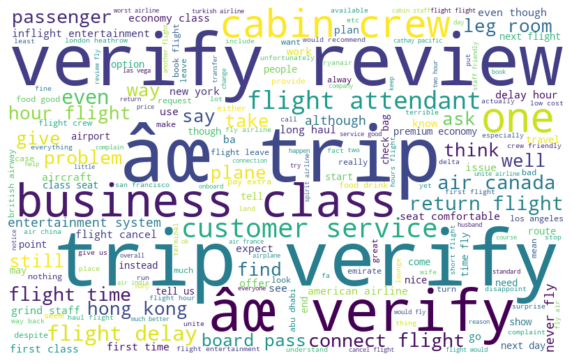

In [33]:
#### Understanding the common words used in customer reviews
all_words = ' '.join([text for text in df['review_processed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [34]:
#### removal of common words
other_stopwords = ['âœ', 'trip', 'verifed', 'even', 'hong kong', 'canada', 'new york', 'though', 'told', 'got', 'hong', 'kong', 'flights', 
                   'passenger', 'san francisco', 'verify', 'go']
df['review_cleaned']=df['review_processed'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stopwords))

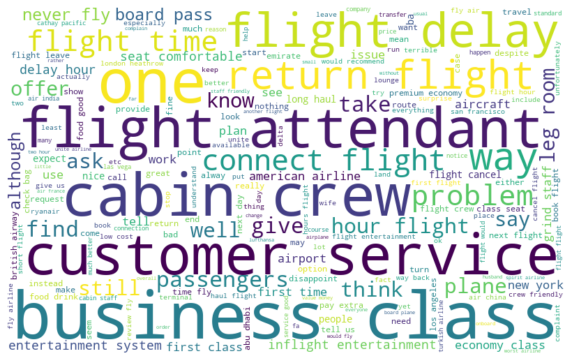

In [35]:
#### Checking the common words again in customer reviews
all_words = ' '.join([text for text in df['review_cleaned']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



*   **Create Document Term Matrix and wordcloud for each airline**



In [36]:
#### Group the lemmatized reviews according to the airlines
df_grouped = df[['airline','review_cleaned']].groupby(by='airline').agg(lambda x:' '.join(x))
df_grouped.head()

review_cleaned
airline                                                                     
ANA All Nippon Airways     first time fly airline family tokyo back manil...
Adria Airways              ljubljana munich homebase airport adria airway...
Aegean Airlines            athens london heathrow gold member aegean sinc...
Aer Lingus                 dublin london flight book stop another airline...
Aeroflot Russian Airlines  gatwick st petersburg years extremely lax bagg...

In [37]:
#### Create Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['review_cleaned'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head()

aa  aaa  aaaaahhhh  aaadvantage  aaccess  \
airline                                                               
ANA All Nippon Airways      0    0          0            0        0   
Adria Airways               0    0          0            0        0   
Aegean Airlines             1    0          0            0        0   
Aer Lingus                  1    0          0            0        0   
Aeroflot Russian Airlines   0    0          0            0        0   

                           aadmirals  aadvantage  aair  aairlines  aal  ...  \
airline                                                                 ...   
ANA All Nippon Airways             0           0     0          0    0  ...   
Adria Airways                      0           0     0          0    0  ...   
Aegean Airlines                    0           0     0          0    0  ...   
Aer Lingus                         0           0     1          0    0  ...   
Aeroflot Russian Airlines          0           0     0          0    0  ...   

                           œzoneâ  œæœ  œï¼œçµ  šå  šå¾ˆå  šæ  šæˆ²  šé  ƒæ  \
airline                                                                       
ANA All Nippon Airways          0    0       0   0      0   0     0   0   0   
Adria Airways                   0    0       0   0      0   0     0   0   0   
Aegean Airlines                 0    0       0   0      0   0     0   0   0   
Aer Lingus                      0    0       0   0      0   0     0   0   0   
Aeroflot Russian Airlines       0    0       0   0      0   0     0   0   0   

                           ƒçš  
airline                         
ANA All Nippon Airways       0  
Adria Airways                0  
Aegean Airlines              0  
Aer Lingus                   0  
Aeroflot Russian Airlines    0  

[5 rows x 32854 columns]

In [38]:
#### Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import  WordCloud
from textwrap import wrap

In [39]:
#### Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

In [40]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

In [41]:
# Plotting word cloud for each airline
#for index,airline in enumerate(df_dtm.columns):
  #generate_wordcloud(df_dtm[airline].sort_values(ascending=False),airline)

In [42]:
#### removal of common words and places name from each airline review
extra_stopwords = ['tokyo', 'airline', 'munich', 'adria', 'ljubljana', 'athens', 'aegean', 'dublin', 'aer', 'moscow', 'svo', 'mexico', 'arabia', 'sharjah', 
                   'toronto', 'china', 'beijing', 'europa', 'madrid', 'paris', 'france', 'cdg', 'india', 'delhi', 'mumbai', 'del', 'auckland', 'zealand', 'bali', 
                   'alaska', 'seattle', 'rome', 'vienna', 'vie', 'bangkok', 'lumpur', 'dubai', 'kuala', 'singapore', 'london', 'ba', 'brussels', 'shanghai', 
                   'guangzhou', 'panama', 'eva', 'cairo', 'dubai', 'addis', 'ababa', 'abu', 'dhabi', 'helsinki', 'denver', 'garuda', 'jakarta', 'indonesia', 'bahrain', 
                   'gulf', 'madrid', 'iberia', 'amsterdam', 'seoul', 'kuwait', 'warsaw', 'latam', 'frankfurt', 'munich', 'istanbul', 'pegasus', 'sydney', 'doha', 'qatar', 
                   'sas', 'jeddah', 'singapore', 'johannesburg', 'zurich', 'swiss', 'lisbon', 'bucharest', 'istanbul', 'kiev']

df['review_cleaned']=df['review_cleaned'].apply(lambda x: " ".join(word for word in x.split() if word not in extra_stopwords))

We ran the code for wordcloud again to verify the changes after removal of places_stopwords



*   **Tokenization of Words**



In [43]:
from nltk.tokenize import word_tokenize

In [44]:
df['review_tokenized'] = df['review_cleaned'].apply(word_tokenize)
df['review_tokenized'].head(10)

0    [izmir, via, first, time, iâ, fly, tk, find, g...
1    [make, check, airport, take, luggage, gate, ga...
2    [prishtina, via, fly, company, several, time, ...
3    [fly, turkish, airlines, iad, ist, khi, return...
4    [via, never, book, turkish, airlines, travel, ...
5    [budapest, via, turkish, airlines, delay, flig...
6    [algiers, plan, take, pm, arrive, algiers, pm,...
7    [basel, cape, town, via, arrive, inform, cape,...
8    [luxembourg, via, auh, ist, flight, flight, co...
9    [experience, turkish, airlines, devastate, one...
Name: review_tokenized, dtype: object

# Check the polarity

In [45]:
#### Importing Text Blob for checking the polarity
from textblob import TextBlob

In [46]:
#### Create a new column with polarity
df['polarity'] = df['review_cleaned'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [47]:
df.head()

index           airline  overall               author   review_date  \
0      1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
1      3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
2      5  Turkish Airlines      3.0            M Galerko  7th May 2019   
3      7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
4      9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review  traveller_type  \
0  âœ… Trip Verified | London to Izmir via Istanb...        Business   
1  âœ… Trip Verified | Istanbul to Bucharest. We ...  Family Leisure   
2  âœ… Trip Verified | Rome to Prishtina via Ista...        Business   
3  âœ… Trip Verified | Flew on Turkish Airlines I...    Solo Leisure   
4  âœ… Trip Verified | Mumbai to Dublin via Istan...    Solo Leisure   

           cabin  seat_comfort  cabin_service  food_bev  entertainment  \
0  Economy Class           4.0            5.0       4.0            4.0   
1  Economy Class           4.0            1.0       1.0            1.0   
2  Economy Class           1.0            4.0       1.0            3.0   
3  Economy Class           4.0            5.0       5.0            5.0   
4  Economy Class           1.0            1.0       1.0            1.0   

   ground_service  value_for_money  recommended  \
0             2.0              4.0            1   
1             1.0              1.0            0   
2             1.0              2.0            0   
3             5.0              5.0            1   
4             1.0              1.0            0   

                                    review_processed  \
0  âœ trip verify london izmir via istanbul first...   
1  âœ trip verify istanbul bucharest make check a...   
2  âœ trip verify rome prishtina via istanbul fly...   
3  âœ trip verify fly turkish airlines iad ist kh...   
4  âœ trip verify mumbai dublin via istanbul neve...   

                                      review_cleaned  \
0  izmir via first time iâ fly tk find good air c...   
1  make check airport take luggage gate gate surp...   
2  prishtina via fly company several time past ye...   
3  fly turkish airlines iad ist khi return khi is...   
4  via never book turkish airlines travel flight ...   

                                    review_tokenized  polarity  
0  [izmir, via, first, time, iâ, fly, tk, find, g...  0.198433  
1  [make, check, airport, take, luggage, gate, ga...  0.116667  
2  [prishtina, via, fly, company, several, time, ...  0.134285  
3  [fly, turkish, airlines, iad, ist, khi, return...  0.448718  
4  [via, never, book, turkish, airlines, travel, ...  0.200000

In [48]:
df['polarity'].describe()

count    64440.000000
mean         0.150578
std          0.210504
min         -1.000000
25%          0.018056
50%          0.150758
75%          0.289394
max          1.000000
Name: polarity, dtype: float64

# Aspect Classification

In [49]:
#df.loc[0,'customer_review']

In [50]:
#df['review_tokenized'].loc[df['Aspect']==''][11:20]

In [51]:
#### Read individual verbatim to analyze words and classify according to aspects
df.loc[47541,'review_tokenized']

['review',
 'fly',
 'cathay',
 'pacific',
 'flight',
 'suvarnabhumi',
 'airport',
 'economy',
 'class',
 'overbooked',
 'quite',
 'impress',
 'upgrade',
 'business',
 'class',
 'free',
 'equip',
 'regional',
 'business',
 'class',
 'cabin',
 'general',
 'quite',
 'enjoyable',
 'flight',
 'room',
 'improvement',
 'variety',
 'music',
 'add']

In [52]:
def aspect(x):
  rs=''
  if (('experience' in x) or ('overall' in x) or ('helpful' in x) or ('good' in x) or ('everything' in x)):
    rs='Overall Experience'
  if (('customer' in x and 'service' in x) or ('rude' in x) or ('service' in x) or ('contact' in x) or ('agents' in x) or 
     ('call' in x)):
    rs='Customer Service'
  if (('refund' in x)):
    rs='Policies'
  if (('delay' in x) or ('late' in x) or ('reschedule' in x and 'flight' in x) or ('cancel' in x and 'flight' in x) or 
     ('overbooked' in x)):
    rs= 'Flight Management'
  if (('baggage' in x) or ('bag' in x) or ('luggage' in x)):
    rs='Baggage Policy'
  if (('entertainment' in x)):
    rs='In-Flight Entertainment'
  if (('food' in x) or ('beverages' in x) or ('delicious' in x) or ('drink' in x) or ('meals' in x) or ('dinner' in x) or 
     ('meal' in x)):
    rs='F&B'
  if (('leg' in x) or ('legroom' in x) or ('seat' in x)):
    rs='Seat Comfort'
  if (('ground' in x ) or ('counter' in x) or ('terminal' in x) or ('staff' in x) or ('check' in x)):
    rs='Ground Service'
  if (('cabin' in x and 'crew' in x) or ('cabin' in x) or ('dirty' in x) or ('clean' in x)):
    rs='Cabin Service'
  
  

  return rs

In [53]:
#### Adding aspects column 
df['Aspect']=df['review_tokenized'].apply(aspect)

In [54]:
df['Aspect'].value_counts()

Ground Service             21795
Cabin Service              18919
Seat Comfort               11378
F&B                         4042
Flight Management           3735
Baggage Policy              1629
Customer Service            1327
                             744
Overall Experience           438
In-Flight Entertainment      305
Policies                     128
Name: Aspect, dtype: int64

In [55]:
#### To test random aspects
df['customer_review'].loc[df['Aspect']=='Booking Management']

Series([], Name: customer_review, dtype: object)

In [56]:
df.loc[47541,'customer_review']

'âœ… Verified Review | Flew on Cathay Pacific flight from Singapore to Bangkok Suvarnabhumi Airport. The economy class was overbooked and I was quite impressed that I was upgraded to business class for free. This A330 is equipped with regional business class cabin. In general it was quite an enjoyable flight. The only room of improvement is that more variety of music should be added.'

In [57]:
df.shape

(64440, 20)

In [58]:
df['Aspect'].replace({'':'Needs Manual Analysis'},inplace=True)

In [59]:
df['Aspect'].value_counts()

Ground Service             21795
Cabin Service              18919
Seat Comfort               11378
F&B                         4042
Flight Management           3735
Baggage Policy              1629
Customer Service            1327
Needs Manual Analysis        744
Overall Experience           438
In-Flight Entertainment      305
Policies                     128
Name: Aspect, dtype: int64

In [162]:
df.to_excel('Final Reviews.xlsx')

# Division into Training and Test Dataset

In [60]:
df.head()

index           airline  overall               author   review_date  \
0      1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
1      3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
2      5  Turkish Airlines      3.0            M Galerko  7th May 2019   
3      7  Turkish Airlines     10.0          Zeshan Shah  6th May 2019   
4      9  Turkish Airlines      1.0           Pooja Jain  6th May 2019   

                                     customer_review  traveller_type  \
0  âœ… Trip Verified | London to Izmir via Istanb...        Business   
1  âœ… Trip Verified | Istanbul to Bucharest. We ...  Family Leisure   
2  âœ… Trip Verified | Rome to Prishtina via Ista...        Business   
3  âœ… Trip Verified | Flew on Turkish Airlines I...    Solo Leisure   
4  âœ… Trip Verified | Mumbai to Dublin via Istan...    Solo Leisure   

           cabin  seat_comfort  cabin_service  food_bev  entertainment  \
0  Economy Class           4.0            5.0       4.0            4.0   
1  Economy Class           4.0            1.0       1.0            1.0   
2  Economy Class           1.0            4.0       1.0            3.0   
3  Economy Class           4.0            5.0       5.0            5.0   
4  Economy Class           1.0            1.0       1.0            1.0   

   ground_service  value_for_money  recommended  \
0             2.0              4.0            1   
1             1.0              1.0            0   
2             1.0              2.0            0   
3             5.0              5.0            1   
4             1.0              1.0            0   

                                    review_processed  \
0  âœ trip verify london izmir via istanbul first...   
1  âœ trip verify istanbul bucharest make check a...   
2  âœ trip verify rome prishtina via istanbul fly...   
3  âœ trip verify fly turkish airlines iad ist kh...   
4  âœ trip verify mumbai dublin via istanbul neve...   

                                      review_cleaned  \
0  izmir via first time iâ fly tk find good air c...   
1  make check airport take luggage gate gate surp...   
2  prishtina via fly company several time past ye...   
3  fly turkish airlines iad ist khi return khi is...   
4  via never book turkish airlines travel flight ...   

                                    review_tokenized  polarity  \
0  [izmir, via, first, time, iâ, fly, tk, find, g...  0.198433   
1  [make, check, airport, take, luggage, gate, ga...  0.116667   
2  [prishtina, via, fly, company, several, time, ...  0.134285   
3  [fly, turkish, airlines, iad, ist, khi, return...  0.448718   
4  [via, never, book, turkish, airlines, travel, ...  0.200000   

              Aspect  
0      Cabin Service  
1     Ground Service  
2     Ground Service  
3      Cabin Service  
4  Flight Management

In [61]:
df['tokens_processed']=df['review_tokenized'].apply(str)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_model = vectorizer.fit_transform(df['tokens_processed']).toarray()
print(tfidf_model)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [65]:
# X -> features, y -> label 
X = tfidf_model
y = df['Aspect']

In [66]:

y_lg=df.recommended.values

In [67]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [68]:
y_lg_train, y_lg_test = train_test_split (y_lg, test_size=0.3, random_state=5)

# Logistic Regression for Customer Review and Recommendation

In [69]:
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 5000
X_train:
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
X_test: 
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Number of features: 5000


## ***Tuning the Parameters***

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [71]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=10)
grid.fit(X_train, y_lg_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  6.1min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [72]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.91
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [73]:
!pip install mglearn

In [74]:
import mglearn

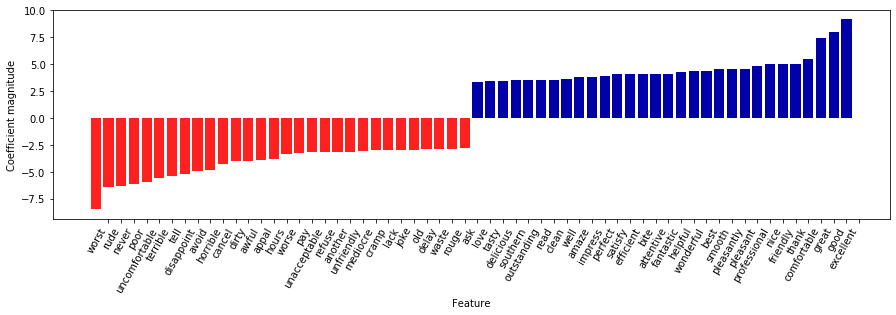

In [75]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=30)
plt.show()

## ***Fitting the Logistic Regression Model***

In [76]:
lr = grid.best_estimator_
lr.fit(X_train, y_lg_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_lg_test)))

Score: 0.91


## ***Model Evaluation using Confusion Matrix***

In [78]:
y_pred=lr.predict(X_test)

In [79]:
cnf_matrix = metrics.confusion_matrix(y_lg_test, y_pred)
cnf_matrix

array([[9340,  804],
       [ 968, 8220]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

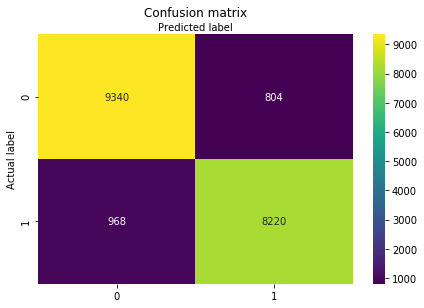

In [80]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## ***Confusion Matrix Evaluation Metrics***

In [81]:
print("Accuracy:",metrics.accuracy_score(y_lg_test, y_pred))
print("Precision:",metrics.precision_score(y_lg_test, y_pred))
print("Recall:",metrics.recall_score(y_lg_test, y_pred))

Accuracy: 0.9083385061038692
Precision: 0.910904255319149
Recall: 0.8946451893774489


## ***ROC Curve***

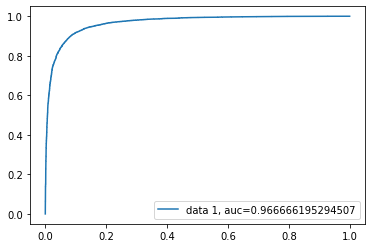

In [82]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_lg_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_lg_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Modelling

In [83]:
#Classifier imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from sklearn.metrics import classification_report
from sklearn import metrics

In [84]:
# Initialize our classifiers
MNB = MultinomialNB()
LSVC = LinearSVC(verbose=10,random_state=9)
gnb = GaussianNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier(verbose=10,n_jobs=-1)
#SVC = SVC()
NSVC = NuSVC()
KNN = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)

# Naive Bayes Classifier

In [85]:
MNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
y_trainpred = MNB.predict(X_train)

In [87]:
print(classification_report(y_train,y_trainpred))

                         precision    recall  f1-score   support

         Baggage Policy       0.62      0.01      0.01      1154
          Cabin Service       0.52      0.85      0.65     13296
       Customer Service       0.29      0.00      0.00       923
                    F&B       0.85      0.01      0.01      2833
      Flight Management       0.71      0.30      0.43      2640
         Ground Service       0.52      0.69      0.59     15167
In-Flight Entertainment       0.00      0.00      0.00       210
  Needs Manual Analysis       0.00      0.00      0.00       509
     Overall Experience       0.00      0.00      0.00       306
               Policies       0.00      0.00      0.00        98
           Seat Comfort       0.76      0.22      0.34      7972

               accuracy                           0.54     45108
              macro avg       0.39      0.19      0.19     45108
           weighted avg       0.58      0.54      0.48     45108



In [88]:
metrics.accuracy_score(y_train,y_trainpred)

0.5405693003458366

In [89]:
y_pred = MNB.predict(X_test)

In [90]:
print(classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

         Baggage Policy       0.33      0.00      0.00       475
          Cabin Service       0.51      0.85      0.63      5623
       Customer Service       0.00      0.00      0.00       404
                    F&B       0.33      0.00      0.00      1209
      Flight Management       0.62      0.24      0.34      1095
         Ground Service       0.52      0.67      0.58      6628
In-Flight Entertainment       0.00      0.00      0.00        95
  Needs Manual Analysis       0.00      0.00      0.00       235
     Overall Experience       0.00      0.00      0.00       132
               Policies       0.00      0.00      0.00        30
           Seat Comfort       0.72      0.19      0.31      3406

               accuracy                           0.52     19332
              macro avg       0.28      0.18      0.17     19332
           weighted avg       0.52      0.52      0.46     19332



In [91]:
metrics.accuracy_score(y_test,y_pred)

0.5233809228222636

# Linear SVC

In [92]:
LSVC.fit(X_train, y_train)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=9, tol=0.0001,
          verbose=10)

In [93]:
y_trainpred=LSVC.predict(X_train)
print(classification_report(y_train,y_trainpred))

                         precision    recall  f1-score   support

         Baggage Policy       0.97      0.97      0.97      1154
          Cabin Service       1.00      0.99      0.99     13296
       Customer Service       0.99      0.98      0.99       923
                    F&B       0.99      0.98      0.98      2833
      Flight Management       0.95      1.00      0.97      2640
         Ground Service       0.99      0.99      0.99     15167
In-Flight Entertainment       1.00      0.99      0.99       210
  Needs Manual Analysis       1.00      0.99      0.99       509
     Overall Experience       1.00      0.99      1.00       306
               Policies       1.00      0.95      0.97        98
           Seat Comfort       0.98      0.99      0.99      7972

               accuracy                           0.99     45108
              macro avg       0.99      0.98      0.99     45108
           weighted avg       0.99      0.99      0.99     45108



In [94]:
metrics.accuracy_score(y_train,y_trainpred)

0.9886051254766338

In [95]:
y_pred = LSVC.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

         Baggage Policy       0.75      0.67      0.70       475
          Cabin Service       1.00      0.98      0.99      5623
       Customer Service       0.67      0.57      0.62       404
                    F&B       0.83      0.81      0.82      1209
      Flight Management       0.76      0.89      0.82      1095
         Ground Service       0.97      0.98      0.97      6628
In-Flight Entertainment       0.94      0.35      0.51        95
  Needs Manual Analysis       0.63      0.43      0.51       235
     Overall Experience       0.73      0.23      0.35       132
               Policies       0.42      0.17      0.24        30
           Seat Comfort       0.89      0.95      0.92      3406

               accuracy                           0.93     19332
              macro avg       0.78      0.64      0.68     19332
           weighted avg       0.92      0.93      0.92     19332



In [97]:
metrics.accuracy_score(y_test,y_pred)

0.9260293813366439

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [100]:
lin_clf = LinearSVC(random_state=9)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=9, tol=0.0001,
          verbose=0)

In [101]:
y_trainpred = lin_clf.predict(X_train_scaled)
print(classification_report(y_train, y_trainpred))


                         precision    recall  f1-score   support

         Baggage Policy       1.00      1.00      1.00      1154
          Cabin Service       1.00      1.00      1.00     13296
       Customer Service       1.00      1.00      1.00       923
                    F&B       1.00      1.00      1.00      2833
      Flight Management       1.00      1.00      1.00      2640
         Ground Service       1.00      1.00      1.00     15167
In-Flight Entertainment       1.00      1.00      1.00       210
  Needs Manual Analysis       1.00      1.00      1.00       509
     Overall Experience       1.00      1.00      1.00       306
               Policies       1.00      1.00      1.00        98
           Seat Comfort       1.00      1.00      1.00      7972

               accuracy                           1.00     45108
              macro avg       1.00      1.00      1.00     45108
           weighted avg       1.00      1.00      1.00     45108



In [102]:
metrics.accuracy_score(y_train, y_trainpred)

0.9995566196683515

In [103]:
y_pred = lin_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

         Baggage Policy       0.37      0.41      0.39       475
          Cabin Service       0.99      0.97      0.98      5623
       Customer Service       0.33      0.37      0.35       404
                    F&B       0.62      0.62      0.62      1209
      Flight Management       0.57      0.65      0.61      1095
         Ground Service       0.96      0.94      0.95      6628
In-Flight Entertainment       0.25      0.29      0.27        95
  Needs Manual Analysis       0.24      0.24      0.24       235
     Overall Experience       0.11      0.11      0.11       132
               Policies       0.07      0.17      0.10        30
           Seat Comfort       0.86      0.84      0.85      3406

               accuracy                           0.85     19332
              macro avg       0.49      0.51      0.50     19332
           weighted avg       0.86      0.85      0.86     19332



In [104]:
metrics.accuracy_score(y_test, y_pred)

0.8534554107179806

## Gaussian NB

In [105]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
y_trainpred=gnb.predict(X_train)
print(classification_report(y_train,y_trainpred))

                         precision    recall  f1-score   support

         Baggage Policy       0.50      0.98      0.66      1154
          Cabin Service       0.68      1.00      0.81     13296
       Customer Service       0.86      0.93      0.90       923
                    F&B       1.00      1.00      1.00      2833
      Flight Management       1.00      0.47      0.64      2640
         Ground Service       0.93      0.65      0.76     15167
In-Flight Entertainment       0.50      1.00      0.67       210
  Needs Manual Analysis       0.95      0.85      0.90       509
     Overall Experience       0.87      0.94      0.90       306
               Policies       0.78      1.00      0.88        98
           Seat Comfort       1.00      0.78      0.88      7972

               accuracy                           0.81     45108
              macro avg       0.82      0.87      0.82     45108
           weighted avg       0.86      0.81      0.81     45108



In [107]:
metrics.accuracy_score(y_train,y_trainpred)

0.8078389642635453

In [108]:
y_pred = gnb.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

         Baggage Policy       0.28      0.49      0.35       475
          Cabin Service       0.62      1.00      0.76      5623
       Customer Service       0.52      0.37      0.43       404
                    F&B       0.72      0.76      0.74      1209
      Flight Management       0.70      0.28      0.40      1095
         Ground Service       0.83      0.61      0.70      6628
In-Flight Entertainment       0.15      0.19      0.17        95
  Needs Manual Analysis       0.84      0.16      0.27       235
     Overall Experience       0.42      0.11      0.17       132
               Policies       0.25      0.10      0.14        30
           Seat Comfort       0.90      0.63      0.74      3406

               accuracy                           0.70     19332
              macro avg       0.57      0.43      0.44     19332
           weighted avg       0.74      0.70      0.68     19332



In [110]:
metrics.accuracy_score(y_test,y_pred)

0.6953755431409062

## Bernoulli NB

In [111]:
BNB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [112]:
y_trainpred=BNB.predict(X_train)
print(classification_report(y_train,y_trainpred))

                         precision    recall  f1-score   support

         Baggage Policy       0.54      0.80      0.64      1154
          Cabin Service       0.69      0.88      0.78     13296
       Customer Service       0.55      0.63      0.59       923
                    F&B       0.58      0.71      0.64      2833
      Flight Management       0.58      0.89      0.70      2640
         Ground Service       0.80      0.57      0.66     15167
In-Flight Entertainment       0.83      0.27      0.41       210
  Needs Manual Analysis       0.58      0.69      0.63       509
     Overall Experience       0.76      0.40      0.52       306
               Policies       0.17      0.21      0.19        98
           Seat Comfort       0.89      0.70      0.78      7972

               accuracy                           0.72     45108
              macro avg       0.63      0.61      0.60     45108
           weighted avg       0.74      0.72      0.71     45108



In [113]:
metrics.accuracy_score(y_train,y_trainpred)

0.7155271792143301

## SGD Classifier

In [114]:
SDG.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 10.26, NNZs: 4109, Bias: -1.059273, T: 45108, Avg. loss: 0.056419
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 11.40, NNZs: 4224, Bias: -1.013885, T: 45108, Avg. loss: 0.069579
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 42.15, NNZs: 4992, Bias: -1.853190, T: 45108, Avg. loss: 0.133638Norm: 21.14, NNZs: 4880, Bias: -1.499217, T: 45108, Avg. loss: 0.159090
Total training time: 0.67 seconds.
-- Epoch 2

Total training time: 0.65 seconds.
-- Epoch 2
Norm: 8.51, NNZs: 4427, Bias: -1.155861, T: 90216, Avg. loss: 0.040799
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 9.67, NNZs: 4457, Bias: -1.103107, T: 90216, Avg. loss: 0.050544
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 18.51, NNZs: 4948, Bias: -1.047053, T: 90216, Avg. loss: 0.113048
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 40.08, NNZs: 4999, Bias: -1.447071, T: 90216, Avg. loss: 0.054895
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 8.97, NN

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    9.7s remaining:    8.0s


Norm: 4.61, NNZs: 3334, Bias: -0.943772, T: 90216, Avg. loss: 0.013764
Total training time: 1.60 seconds.
-- Epoch 3
Norm: 4.85, NNZs: 4515, Bias: -0.909363, T: 315756, Avg. loss: 0.021232
Total training time: 4.23 seconds.
Convergence after 7 epochs took 4.23 seconds
-- Epoch 1
Norm: 2.95, NNZs: 1937, Bias: -1.306808, T: 45108, Avg. loss: 0.006300
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 42.39, NNZs: 5000, Bias: -1.123744, T: 360864, Avg. loss: 0.221746
Total training time: 6.56 seconds.
-- Epoch 9
Norm: 4.18, NNZs: 3620, Bias: -1.063094, T: 135324, Avg. loss: 0.013313
Total training time: 2.43 seconds.
-- Epoch 4
Norm: 2.44, NNZs: 2351, Bias: -1.284112, T: 90216, Avg. loss: 0.004483
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 36.99, NNZs: 4998, Bias: -0.270322, T: 45108, Avg. loss: 0.330028
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 3.94, NNZs: 3803, Bias: -1.119487, T: 180432, Avg. loss: 0.013116
Total training time: 2.96 seconds.
-- Epoch 5
Norm: 2.25, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.3s remaining:    4.9s


Norm: 33.66, NNZs: 4999, Bias: -0.892682, T: 180432, Avg. loss: 0.211435
Total training time: 3.00 seconds.
-- Epoch 5
Norm: 1.98, NNZs: 2986, Bias: -1.079081, T: 315756, Avg. loss: 0.004145
Total training time: 4.16 seconds.
Convergence after 7 epochs took 4.16 seconds
Norm: 42.28, NNZs: 5000, Bias: -1.219549, T: 541296, Avg. loss: 0.219160
Total training time: 9.40 seconds.
-- Epoch 13
Norm: 33.49, NNZs: 4999, Bias: -0.610723, T: 225540, Avg. loss: 0.209075
Total training time: 3.54 seconds.
-- Epoch 6
Norm: 42.25, NNZs: 5000, Bias: -1.284968, T: 586404, Avg. loss: 0.218676
Total training time: 9.90 seconds.
-- Epoch 14
Norm: 33.35, NNZs: 4999, Bias: -0.938816, T: 270648, Avg. loss: 0.207610
Total training time: 3.99 seconds.
-- Epoch 7
Norm: 42.21, NNZs: 5000, Bias: -1.199174, T: 631512, Avg. loss: 0.218386
Total training time: 10.37 seconds.
Convergence after 14 epochs took 10.37 seconds
Norm: 33.30, NNZs: 4999, Bias: -0.825052, T: 315756, Avg. loss: 0.206600
Total training time: 4

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.1s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [115]:
y_trainpred=SDG.predict(X_train)
print(classification_report(y_train,y_trainpred))

                         precision    recall  f1-score   support

         Baggage Policy       0.97      0.69      0.81      1154
          Cabin Service       1.00      0.94      0.97     13296
       Customer Service       0.96      0.73      0.83       923
                    F&B       0.90      0.88      0.89      2833
      Flight Management       0.85      0.89      0.87      2640
         Ground Service       0.92      0.98      0.95     15167
In-Flight Entertainment       1.00      0.29      0.45       210
  Needs Manual Analysis       1.00      0.59      0.74       509
     Overall Experience       1.00      0.58      0.73       306
               Policies       1.00      0.57      0.73        98
           Seat Comfort       0.89      0.97      0.93      7972

               accuracy                           0.93     45108
              macro avg       0.95      0.74      0.81     45108
           weighted avg       0.94      0.93      0.93     45108



In [116]:
metrics.accuracy_score(y_train,y_trainpred)

0.9316529218763856

In [117]:
y_pred = SDG.predict(X_test)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

         Baggage Policy       0.88      0.43      0.57       475
          Cabin Service       0.99      0.94      0.97      5623
       Customer Service       0.70      0.34      0.46       404
                    F&B       0.77      0.76      0.77      1209
      Flight Management       0.76      0.80      0.78      1095
         Ground Service       0.89      0.97      0.93      6628
In-Flight Entertainment       1.00      0.01      0.02        95
  Needs Manual Analysis       0.64      0.11      0.18       235
     Overall Experience       0.72      0.10      0.17       132
               Policies       0.00      0.00      0.00        30
           Seat Comfort       0.81      0.94      0.87      3406

               accuracy                           0.89     19332
              macro avg       0.74      0.49      0.52     19332
           weighted avg       0.88      0.89      0.87     19332



In [118]:
metrics.accuracy_score(y_test,y_pred)

0.8856300434512725

In [119]:
# build a classifier
clf = SGDClassifier()

In [120]:
# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}\n".format(score.parameters))

In [121]:
# use a full grid over all parameters
param_grid = {"max_iter": [500, 1000, 1500, 2000],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["none", "l1", "l2"]}

In [122]:
# run grid search
grid_search = GridSearchCV(SDG, param_grid=param_grid)
grid_search.fit(X_train, y_train)

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 59.23, NNZs: 3844, Bias: -1.695888, T: 36086, Avg. loss: 0.070488
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 59.78, NNZs: 3943, Bias: -2.441450, T: 36086, Avg. loss: 0.086763
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 98.56, NNZs: 4704, Bias: -0.980944, T: 36086, Avg. loss: 0.185335
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 163.67, NNZs: 4836, Bias: -5.347526, T: 36086, Avg. loss: 0.111207
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 59.75, NNZs: 4091, Bias: -1.296229, T: 72172, Avg. loss: 0.035714
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 59.74, NNZs: 4087, Bias: -2.015675, T: 72172, Avg. loss: 0.045767
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 164.18, NNZs: 4872, Bias: -5.910007, T: 72172, Avg. loss: 0.013433
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 99.21, NNZs: 4779, Bias: -1.291077, T: 72172, Avg. loss: 0.084734
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 60.20, NNZs: 4163, Bias: -1.205635, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.0s remaining:    9.1s


Norm: 34.63, NNZs: 3078, Bias: -1.249225, T: 180430, Avg. loss: 0.009464
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 21.60, NNZs: 1724, Bias: -3.363347, T: 36086, Avg. loss: 0.008348
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 163.44, NNZs: 4995, Bias: -2.505750, T: 433032, Avg. loss: 0.084148
Total training time: 5.71 seconds.
-- Epoch 13
Norm: 46.38, NNZs: 3866, Bias: -0.119673, T: 360860, Avg. loss: 0.010706
Total training time: 4.29 seconds.
Convergence after 10 epochs took 4.29 seconds
-- Epoch 1
Norm: 34.83, NNZs: 3120, Bias: -1.197548, T: 216516, Avg. loss: 0.008924
Total training time: 2.51 seconds.
-- Epoch 7
Norm: 21.70, NNZs: 1944, Bias: -2.552157, T: 72172, Avg. loss: 0.004612
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 163.59, NNZs: 4995, Bias: -2.526836, T: 469118, Avg. loss: 0.082488
Total training time: 6.18 seconds.
-- Epoch 14
Norm: 136.15, NNZs: 4974, Bias: -1.453294, T: 36086, Avg. loss: 0.356303
Total training time: 0.44 seconds.
-- Epoch 2


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.9s remaining:    4.8s



Total training time: 1.40 seconds.
-- Epoch 4
Norm: 22.02, NNZs: 2237, Bias: -2.061823, T: 180430, Avg. loss: 0.003363
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 164.00, NNZs: 4995, Bias: -2.484831, T: 577376, Avg. loss: 0.078613
Total training time: 7.51 seconds.
-- Epoch 17
Norm: 138.68, NNZs: 4992, Bias: -1.603432, T: 144344, Avg. loss: 0.112711
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 22.10, NNZs: 2271, Bias: -2.197725, T: 216516, Avg. loss: 0.003149
Total training time: 2.44 seconds.
-- Epoch 7
Norm: 164.13, NNZs: 4995, Bias: -2.419162, T: 613462, Avg. loss: 0.077502
Total training time: 7.88 seconds.
-- Epoch 18
Norm: 139.22, NNZs: 4992, Bias: -1.519541, T: 180430, Avg. loss: 0.105462
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 22.20, NNZs: 2284, Bias: -2.017417, T: 252602, Avg. loss: 0.003015
Total training time: 2.77 seconds.
Convergence after 7 epochs took 2.77 seconds
Norm: 164.25, NNZs: 4995, Bias: -2.514541, T: 649548, Avg. loss: 0.076571
Total 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 58.51, NNZs: 3842, Bias: -1.737691, T: 36086, Avg. loss: 0.069518
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 91.83, NNZs: 4725, Bias: -1.103921, T: 36086, Avg. loss: 0.178263
Total training time: 0.45 seconds.Norm: 57.49, NNZs: 3898, Bias: -1.796038, T: 36086, Avg. loss: 0.084554
Total training time: 0.46 seconds.
-- Epoch 2

-- Epoch 2
Norm: 168.37, NNZs: 4790, Bias: -6.183283, T: 36086, Avg. loss: 0.118036
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 59.10, NNZs: 4054, Bias: -1.044315, T: 72172, Avg. loss: 0.035586
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 57.87, NNZs: 4063, Bias: -1.876003, T: 72172, Avg. loss: 0.044045
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 168.84, NNZs: 4819, Bias: -5.769816, T: 72172, Avg. loss: 0.014659
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 92.87, NNZs: 4817, Bias: -1.410999, T: 72172, Avg. loss: 0.082767
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 169.02, NNZs: 4831, Bias: -5.961052, T: 108258, 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.6s remaining:    8.8s


Norm: 41.90, NNZs: 3954, Bias: -0.198849, T: 360860, Avg. loss: 0.010280
Total training time: 4.27 seconds.
Convergence after 10 epochs took 4.27 seconds
-- Epoch 1
Norm: 36.81, NNZs: 3163, Bias: -1.271493, T: 252602, Avg. loss: 0.008085
Total training time: 3.01 seconds.
-- Epoch 8
Norm: 161.99, NNZs: 4999, Bias: -2.652485, T: 505204, Avg. loss: 0.083744
Total training time: 6.47 seconds.
-- Epoch 15
Norm: 21.59, NNZs: 1672, Bias: -2.364703, T: 36086, Avg. loss: 0.007981
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 140.45, NNZs: 4962, Bias: -0.875529, T: 36086, Avg. loss: 0.354124
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 36.95, NNZs: 3180, Bias: -1.342538, T: 288688, Avg. loss: 0.007771
Total training time: 3.41 seconds.
-- Epoch 9
Norm: 21.77, NNZs: 1937, Bias: -2.069658, T: 72172, Avg. loss: 0.004270
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 162.12, NNZs: 4999, Bias: -2.592370, T: 541290, Avg. loss: 0.082226
Total training time: 6.94 seconds.
-- Epoch 16


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.8s remaining:    4.3s


Norm: 141.94, NNZs: 4986, Bias: -1.393539, T: 108258, Avg. loss: 0.128298
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 22.05, NNZs: 2187, Bias: -1.920701, T: 144344, Avg. loss: 0.003238
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 162.37, NNZs: 4999, Bias: -2.590826, T: 613462, Avg. loss: 0.079959
Total training time: 7.75 seconds.
-- Epoch 18
Norm: 22.16, NNZs: 2219, Bias: -1.926352, T: 180430, Avg. loss: 0.003025
Total training time: 1.89 seconds.
-- Epoch 6
Norm: 142.50, NNZs: 4987, Bias: -1.519368, T: 144344, Avg. loss: 0.115380
Total training time: 1.71 seconds.
-- Epoch 5
Norm: 162.48, NNZs: 4999, Bias: -2.605314, T: 649548, Avg. loss: 0.078944
Total training time: 8.11 seconds.
-- Epoch 19
Norm: 22.27, NNZs: 2255, Bias: -1.879924, T: 216516, Avg. loss: 0.002802
Total training time: 2.22 seconds.
-- Epoch 7
Norm: 142.99, NNZs: 4989, Bias: -1.653101, T: 180430, Avg. loss: 0.107876
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 162.59, NNZs: 4999, Bias: -2.574248

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 61.67, NNZs: 3935, Bias: -2.564941, T: 36086, Avg. loss: 0.086254
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 167.82, NNZs: 4802, Bias: -6.766876, T: 36086, Avg. loss: 0.116321
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 54.79, NNZs: 3840, Bias: -1.619330, T: 36086, Avg. loss: 0.067122
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 97.13, NNZs: 4699, Bias: -1.561264, T: 36086, Avg. loss: 0.184559
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 55.66, NNZs: 4078, Bias: -1.009058, T: 72172, Avg. loss: 0.034117
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 168.32, NNZs: 4833, Bias: -6.222365, T: 72172, Avg. loss: 0.013420
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 62.01, NNZs: 4105, Bias: -2.223454, T: 72172, Avg. loss: 0.044675
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 97.90, NNZs: 4788, Bias: -1.735213, T: 72172, Avg. loss: 0.085534
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 168.52, NNZs: 4842, Bias: -6.090943, T: 108258, 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.2s remaining:    8.5s



Total training time: 2.99 seconds.
-- Epoch 8
Norm: 30.53, NNZs: 3232, Bias: -1.387282, T: 180430, Avg. loss: 0.008816
Total training time: 2.18 seconds.
-- Epoch 6
Norm: 162.77, NNZs: 4998, Bias: -2.525324, T: 469118, Avg. loss: 0.082670
Total training time: 6.09 seconds.
-- Epoch 14
Norm: 13.86, NNZs: 1714, Bias: -1.614293, T: 36086, Avg. loss: 0.006703
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 46.09, NNZs: 3930, Bias: -0.313872, T: 288688, Avg. loss: 0.010656
Total training time: 3.45 seconds.
-- Epoch 9
Norm: 30.80, NNZs: 3269, Bias: -1.273219, T: 216516, Avg. loss: 0.008433
Total training time: 2.59 seconds.
-- Epoch 7
Norm: 14.29, NNZs: 1983, Bias: -1.370386, T: 72172, Avg. loss: 0.003999
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 162.92, NNZs: 4998, Bias: -2.571871, T: 505204, Avg. loss: 0.081256
Total training time: 6.54 seconds.
-- Epoch 15
Norm: 46.31, NNZs: 3940, Bias: -0.246282, T: 324774, Avg. loss: 0.010276
Total training time: 3.84 seconds.
-- Epoch 1

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.9s remaining:    4.4s


Norm: 15.13, NNZs: 2328, Bias: -1.534299, T: 180430, Avg. loss: 0.002931
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 163.34, NNZs: 4998, Bias: -2.611681, T: 613462, Avg. loss: 0.077712
Total training time: 7.80 seconds.
-- Epoch 18
Norm: 137.63, NNZs: 4981, Bias: -1.438759, T: 72172, Avg. loss: 0.157402
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 15.33, NNZs: 2380, Bias: -1.483110, T: 216516, Avg. loss: 0.002776
Total training time: 2.32 seconds.
-- Epoch 7
Norm: 163.47, NNZs: 4998, Bias: -2.534002, T: 649548, Avg. loss: 0.076724
Total training time: 8.19 seconds.
-- Epoch 19
Norm: 138.36, NNZs: 4984, Bias: -1.156145, T: 108258, Avg. loss: 0.130107
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 15.50, NNZs: 2423, Bias: -1.602607, T: 252602, Avg. loss: 0.002676
Total training time: 2.65 seconds.
Convergence after 7 epochs took 2.65 seconds
Norm: 163.59, NNZs: 4998, Bias: -2.639076, T: 685634, Avg. loss: 0.075827
Total training time: 8.52 seconds.
-- Epoch 20
Norm: 1

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 166.00, NNZs: 4849, Bias: -5.825798, T: 36087, Avg. loss: 0.122341
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 60.69, NNZs: 3884, Bias: -2.405915, T: 36087, Avg. loss: 0.085392
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 59.96, NNZs: 3862, Bias: -1.560789, T: 36087, Avg. loss: 0.070597
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 90.64, NNZs: 4730, Bias: -2.032794, T: 36087, Avg. loss: 0.170832
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 60.68, NNZs: 4096, Bias: -1.510290, T: 72174, Avg. loss: 0.034528
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 166.44, NNZs: 4883, Bias: -6.296041, T: 72174, Avg. loss: 0.016072
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 60.78, NNZs: 4064, Bias: -1.372495, T: 72174, Avg. loss: 0.044841
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 91.63, NNZs: 4821, Bias: -1.327083, T: 72174, Avg. loss: 0.081206
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 61.03, NNZs: 4120, Bias: -1.440849, T: 108261, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.3s remaining:    8.5s



Total training time: 2.09 seconds.
-- Epoch 6
Norm: 161.12, NNZs: 4999, Bias: -2.718266, T: 469131, Avg. loss: 0.080716
Total training time: 6.10 seconds.
-- Epoch 14
Norm: 15.68, NNZs: 1688, Bias: -1.877852, T: 36087, Avg. loss: 0.007381
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 46.30, NNZs: 3891, Bias: -0.284857, T: 360870, Avg. loss: 0.010697
Total training time: 4.22 seconds.
Convergence after 10 epochs took 4.22 seconds
-- Epoch 1
Norm: 32.33, NNZs: 3338, Bias: -1.144228, T: 216522, Avg. loss: 0.008278
Total training time: 2.50 seconds.
-- Epoch 7
Norm: 16.02, NNZs: 1982, Bias: -1.867594, T: 72174, Avg. loss: 0.004404
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 161.29, NNZs: 4999, Bias: -2.794883, T: 505218, Avg. loss: 0.079245
Total training time: 6.54 seconds.
-- Epoch 15
Norm: 136.40, NNZs: 4968, Bias: -1.954344, T: 36087, Avg. loss: 0.354882
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 32.55, NNZs: 3365, Bias: -1.300227, T: 252609, Avg. loss: 0.007923

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.0s remaining:    4.5s


Total training time: 1.39 seconds.
-- Epoch 4
Norm: 16.61, NNZs: 2246, Bias: -1.559409, T: 180435, Avg. loss: 0.003267
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 161.74, NNZs: 4999, Bias: -2.724191, T: 613479, Avg. loss: 0.075687
Total training time: 7.88 seconds.
-- Epoch 18
Norm: 138.84, NNZs: 4992, Bias: -0.909812, T: 144348, Avg. loss: 0.114738
Total training time: 1.81 seconds.
-- Epoch 5
Norm: 16.75, NNZs: 2316, Bias: -1.713431, T: 216522, Avg. loss: 0.003093
Total training time: 2.38 seconds.
-- Epoch 7
Norm: 161.87, NNZs: 4999, Bias: -2.674309, T: 649566, Avg. loss: 0.074812
Total training time: 8.24 seconds.
-- Epoch 19
Norm: 139.39, NNZs: 4993, Bias: -1.503426, T: 180435, Avg. loss: 0.106746
Total training time: 2.18 seconds.
-- Epoch 6
Norm: 16.88, NNZs: 2329, Bias: -1.626919, T: 252609, Avg. loss: 0.002965
Total training time: 2.69 seconds.
Convergence after 7 epochs took 2.69 seconds
Norm: 162.00, NNZs: 4999, Bias: -2.585794, T: 685653, Avg. loss: 0.073818
Total t

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 61.98, NNZs: 3905, Bias: -2.096257, T: 36087, Avg. loss: 0.087314
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 59.33, NNZs: 3887, Bias: -0.865326, T: 36087, Avg. loss: 0.068207
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 94.35, NNZs: 4711, Bias: -2.069528, T: 36087, Avg. loss: 0.183019
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 163.46, NNZs: 4824, Bias: -5.909430, T: 36087, Avg. loss: 0.118269
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 62.22, NNZs: 4067, Bias: -1.718536, T: 72174, Avg. loss: 0.044282
Total training time: 0.83 seconds.Norm: 59.88, NNZs: 4100, Bias: -0.975052, T: 72174, Avg. loss: 0.034157
-- Epoch 3
Total training time: 0.84 seconds.
-- Epoch 3

Norm: 95.24, NNZs: 4814, Bias: -1.023276, T: 72174, Avg. loss: 0.083191
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 163.92, NNZs: 4858, Bias: -6.038764, T: 72174, Avg. loss: 0.015037
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 62.48, NNZs: 4130, Bias: -2.002551, T: 108261, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.2s remaining:    8.5s


Norm: 43.00, NNZs: 3952, Bias: -0.050569, T: 324783, Avg. loss: 0.011013
Total training time: 3.91 seconds.
-- Epoch 10
Norm: 36.63, NNZs: 3197, Bias: -1.344150, T: 180435, Avg. loss: 0.008854
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 163.42, NNZs: 4998, Bias: -2.654421, T: 433044, Avg. loss: 0.080854
Total training time: 5.59 seconds.
-- Epoch 13
Norm: 24.68, NNZs: 1687, Bias: -2.075575, T: 36087, Avg. loss: 0.008661
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 43.24, NNZs: 3960, Bias: -0.052770, T: 360870, Avg. loss: 0.010697
Total training time: 4.36 seconds.
Convergence after 10 epochs took 4.36 seconds
-- Epoch 1
Norm: 36.81, NNZs: 3245, Bias: -1.389916, T: 216522, Avg. loss: 0.008320
Total training time: 2.48 seconds.
-- Epoch 7
Norm: 163.58, NNZs: 4998, Bias: -2.652591, T: 469131, Avg. loss: 0.079122
Total training time: 6.06 seconds.
-- Epoch 14
Norm: 24.66, NNZs: 1969, Bias: -2.487100, T: 72174, Avg. loss: 0.004670
Total training time: 0.85 seconds.
-- Epoch 3

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.7s remaining:    4.3s


Norm: 24.87, NNZs: 2235, Bias: -2.057872, T: 180435, Avg. loss: 0.003402
Total training time: 1.95 seconds.
-- Epoch 6
Norm: 139.69, NNZs: 4987, Bias: -1.412089, T: 108261, Avg. loss: 0.125815
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 164.00, NNZs: 4998, Bias: -2.577267, T: 577392, Avg. loss: 0.075162
Total training time: 7.27 seconds.
-- Epoch 17
Norm: 24.93, NNZs: 2298, Bias: -2.058606, T: 216522, Avg. loss: 0.003216
Total training time: 2.25 seconds.
-- Epoch 7
Norm: 140.31, NNZs: 4989, Bias: -1.475035, T: 144348, Avg. loss: 0.113343
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 164.13, NNZs: 4998, Bias: -2.563211, T: 613479, Avg. loss: 0.074149
Total training time: 7.62 seconds.
-- Epoch 18
Norm: 24.98, NNZs: 2318, Bias: -2.056268, T: 252609, Avg. loss: 0.003085
Total training time: 2.57 seconds.
Convergence after 7 epochs took 2.57 seconds
Norm: 140.84, NNZs: 4989, Bias: -1.517560, T: 180435, Avg. loss: 0.106303
Total training time: 1.95 seconds.
-- Epoch 6
Norm: 1

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 70.94, NNZs: 65, Bias: -1.505309, T: 36086, Avg. loss: 0.058134
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 70.03, NNZs: 61, Bias: -1.683290, T: 36086, Avg. loss: 0.067355
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 112.22, NNZs: 122, Bias: -1.585020, T: 36086, Avg. loss: 0.136901
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 164.24, NNZs: 174, Bias: -1.855517, T: 36086, Avg. loss: 0.066759
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 71.85, NNZs: 43, Bias: -1.144975, T: 72172, Avg. loss: 0.039721
Total training time: 1.86 seconds.
-- Epoch 3
Norm: 71.34, NNZs: 36, Bias: -1.189859, T: 72172, Avg. loss: 0.046859
Total training time: 1.88 seconds.
-- Epoch 3
Norm: 164.51, NNZs: 53, Bias: -1.230286, T: 72172, Avg. loss: 0.001161
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 115.27, NNZs: 83, Bias: -1.221303, T: 72172, Avg. loss: 0.079898
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 72.23, NNZs: 33, Bias: -0.820889, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.8s remaining:   13.2s


Norm: 41.30, NNZs: 13, Bias: -1.153780, T: 72172, Avg. loss: 0.014479
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 191.76, NNZs: 64, Bias: -0.987121, T: 288688, Avg. loss: 0.079139
Total training time: 8.76 seconds.
-- Epoch 9
Norm: 52.89, NNZs: 24, Bias: -0.933335, T: 252602, Avg. loss: 0.022577
Total training time: 6.86 seconds.
Convergence after 7 epochs took 6.86 seconds
-- Epoch 1
Norm: 19.63, NNZs: 2, Bias: -1.390317, T: 36086, Avg. loss: 0.006469
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 41.40, NNZs: 13, Bias: -1.032121, T: 108258, Avg. loss: 0.014108
Total training time: 2.89 seconds.
-- Epoch 4
Norm: 192.31, NNZs: 61, Bias: -1.085108, T: 324774, Avg. loss: 0.078311
Total training time: 9.83 seconds.
-- Epoch 10
Norm: 19.76, NNZs: 1, Bias: -1.148017, T: 72172, Avg. loss: 0.004685
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 41.44, NNZs: 12, Bias: -1.034790, T: 144344, Avg. loss: 0.013969
Total training time: 3.86 seconds.
-- Epoch 5
Norm: 164.63, NNZs: 2

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.9s remaining:    7.8s


Norm: 172.65, NNZs: 117, Bias: -1.070808, T: 144344, Avg. loss: 0.113096
Total training time: 4.65 seconds.
-- Epoch 5
Norm: 193.98, NNZs: 65, Bias: -1.006099, T: 469118, Avg. loss: 0.075967
Total training time: 14.18 seconds.
Convergence after 13 epochs took 14.18 seconds
Norm: 19.86, NNZs: 1, Bias: -1.004295, T: 216516, Avg. loss: 0.004434
Total training time: 5.77 seconds.
-- Epoch 7
Norm: 173.80, NNZs: 105, Bias: -1.068888, T: 180430, Avg. loss: 0.110600
Total training time: 5.50 seconds.
-- Epoch 6
Norm: 19.87, NNZs: 1, Bias: -1.006120, T: 252602, Avg. loss: 0.004416
Total training time: 6.46 seconds.
Convergence after 7 epochs took 6.46 seconds
Norm: 174.74, NNZs: 101, Bias: -1.065391, T: 216516, Avg. loss: 0.109103
Total training time: 6.15 seconds.
-- Epoch 7
Norm: 175.51, NNZs: 98, Bias: -1.023258, T: 252602, Avg. loss: 0.107831
Total training time: 6.79 seconds.
-- Epoch 8
Norm: 176.18, NNZs: 97, Bias: -1.094297, T: 288688, Avg. loss: 0.106828
Total training time: 7.46 second

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 71.12, NNZs: 52, Bias: -1.305510, T: 36086, Avg. loss: 0.057721
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 69.61, NNZs: 47, Bias: -2.113397, T: 36086, Avg. loss: 0.068249
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 114.95, NNZs: 139, Bias: -1.503630, T: 36086, Avg. loss: 0.136639
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 172.90, NNZs: 201, Bias: -2.110067, T: 36086, Avg. loss: 0.069887
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 71.96, NNZs: 39, Bias: -0.780491, T: 72172, Avg. loss: 0.040019
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 70.93, NNZs: 30, Bias: -1.443138, T: 72172, Avg. loss: 0.046634
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 173.13, NNZs: 75, Bias: -1.470339, T: 72172, Avg. loss: 0.001604
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 117.87, NNZs: 94, Bias: -1.182796, T: 72172, Avg. loss: 0.078125
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 72.34, NNZs: 32, Bias: -1.139015, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.4s remaining:   13.7s


Norm: 193.36, NNZs: 69, Bias: -1.071311, T: 288688, Avg. loss: 0.078899
Total training time: 8.99 seconds.
-- Epoch 9
Norm: 52.07, NNZs: 22, Bias: -0.909717, T: 252602, Avg. loss: 0.022711
Total training time: 6.94 seconds.
Convergence after 7 epochs took 6.94 seconds
-- Epoch 1
Norm: 34.50, NNZs: 12, Bias: -1.030663, T: 108258, Avg. loss: 0.014148
Total training time: 2.91 seconds.
-- Epoch 4
Norm: 24.29, NNZs: 2, Bias: -1.585849, T: 36086, Avg. loss: 0.007164
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 193.88, NNZs: 71, Bias: -1.038015, T: 324774, Avg. loss: 0.078127
Total training time: 10.07 seconds.
-- Epoch 10
Norm: 24.40, NNZs: 1, Bias: -1.134034, T: 72172, Avg. loss: 0.004768
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 34.56, NNZs: 13, Bias: -0.963650, T: 144344, Avg. loss: 0.013946
Total training time: 3.89 seconds.
-- Epoch 5
Norm: 165.33, NNZs: 244, Bias: -1.449209, T: 36086, Avg. loss: 0.250975
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 194.34, NNZs

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.9s remaining:    7.8s


Norm: 24.48, NNZs: 1, Bias: -1.042278, T: 180430, Avg. loss: 0.004453
Total training time: 4.75 seconds.
-- Epoch 6
Norm: 34.63, NNZs: 12, Bias: -1.034274, T: 252602, Avg. loss: 0.013797
Total training time: 6.82 seconds.
Convergence after 7 epochs took 6.82 seconds
Norm: 173.37, NNZs: 107, Bias: -1.016153, T: 144344, Avg. loss: 0.111614
Total training time: 4.50 seconds.
-- Epoch 5
Norm: 24.48, NNZs: 1, Bias: -1.043951, T: 216516, Avg. loss: 0.004424
Total training time: 5.46 seconds.
-- Epoch 7
Norm: 24.49, NNZs: 1, Bias: -1.004996, T: 252602, Avg. loss: 0.004415
Total training time: 6.22 seconds.
Convergence after 7 epochs took 6.22 seconds
Norm: 174.53, NNZs: 98, Bias: -1.132612, T: 180430, Avg. loss: 0.108973
Total training time: 5.41 seconds.
-- Epoch 6
Norm: 175.48, NNZs: 100, Bias: -1.162452, T: 216516, Avg. loss: 0.107279
Total training time: 6.13 seconds.
-- Epoch 7
Norm: 176.26, NNZs: 97, Bias: -1.025758, T: 252602, Avg. loss: 0.105936
Total training time: 6.84 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 63.74, NNZs: 39, Bias: -0.525085, T: 36086, Avg. loss: 0.055682
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 76.08, NNZs: 49, Bias: -1.365826, T: 36086, Avg. loss: 0.070541
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 110.52, NNZs: 115, Bias: -1.093149, T: 36086, Avg. loss: 0.135079
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 171.60, NNZs: 204, Bias: -1.905061, T: 36086, Avg. loss: 0.068346
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 64.68, NNZs: 28, Bias: -0.909690, T: 72172, Avg. loss: 0.039971
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 77.31, NNZs: 33, Bias: -1.050849, T: 72172, Avg. loss: 0.046351
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 171.82, NNZs: 88, Bias: -1.464936, T: 72172, Avg. loss: 0.001138
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 113.57, NNZs: 81, Bias: -1.102940, T: 72172, Avg. loss: 0.080467
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 65.07, NNZs: 26, Bias: -1.031607, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.7s remaining:   14.7s


Norm: 109.59, NNZs: 98, Bias: -0.933584, T: 396946, Avg. loss: 0.066581
Total training time: 11.69 seconds.
Convergence after 11 epochs took 11.69 seconds
-- Epoch 1
Norm: 34.14, NNZs: 10, Bias: -1.007851, T: 144344, Avg. loss: 0.013914
Total training time: 3.94 seconds.
-- Epoch 5
Norm: 192.85, NNZs: 68, Bias: -1.075345, T: 396946, Avg. loss: 0.075497
Total training time: 11.99 seconds.
-- Epoch 12
Norm: 21.95, NNZs: 3, Bias: -1.210698, T: 36086, Avg. loss: 0.006755
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 34.18, NNZs: 8, Bias: -1.010744, T: 180430, Avg. loss: 0.013796
Total training time: 4.93 seconds.
-- Epoch 6
Norm: 164.08, NNZs: 255, Bias: -1.179323, T: 36086, Avg. loss: 0.261473
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 193.23, NNZs: 69, Bias: -1.025973, T: 433032, Avg. loss: 0.075012
Total training time: 13.06 seconds.
Convergence after 12 epochs took 13.06 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.4s remaining:    7.2s


Norm: 22.08, NNZs: 1, Bias: -1.185400, T: 72172, Avg. loss: 0.004718
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 34.20, NNZs: 9, Bias: -1.058015, T: 216516, Avg. loss: 0.013740
Total training time: 5.86 seconds.
-- Epoch 7
Norm: 168.33, NNZs: 150, Bias: -1.258758, T: 72172, Avg. loss: 0.131069
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 22.13, NNZs: 1, Bias: -1.156961, T: 108258, Avg. loss: 0.004562
Total training time: 2.75 seconds.
-- Epoch 4
Norm: 34.22, NNZs: 10, Bias: -0.973564, T: 252602, Avg. loss: 0.013707
Total training time: 6.68 seconds.
Convergence after 7 epochs took 6.68 seconds
Norm: 170.62, NNZs: 122, Bias: -1.099467, T: 108258, Avg. loss: 0.121870
Total training time: 3.16 seconds.
-- Epoch 4
Norm: 22.15, NNZs: 1, Bias: -1.070324, T: 144344, Avg. loss: 0.004481
Total training time: 3.47 seconds.
-- Epoch 5
Norm: 22.16, NNZs: 1, Bias: -1.064616, T: 180430, Avg. loss: 0.004461
Total training time: 4.09 seconds.
-- Epoch 6
Norm: 172.18, NNZs: 107, Bias: -1

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 67.29, NNZs: 48, Bias: -1.119377, T: 36087, Avg. loss: 0.055094
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 69.95, NNZs: 46, Bias: -1.437925, T: 36087, Avg. loss: 0.068319
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 113.87, NNZs: 118, Bias: -0.308180, T: 36087, Avg. loss: 0.136727
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 168.43, NNZs: 191, Bias: -1.707966, T: 36087, Avg. loss: 0.070151
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 71.25, NNZs: 30, Bias: -1.218255, T: 72174, Avg. loss: 0.046653
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 68.27, NNZs: 37, Bias: -1.101236, T: 72174, Avg. loss: 0.039219
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 168.64, NNZs: 61, Bias: -1.214813, T: 72174, Avg. loss: 0.001429
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 116.78, NNZs: 72, Bias: -0.978919, T: 72174, Avg. loss: 0.078716
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 71.93, NNZs: 26, Bias: -1.298718, T: 108261, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.5s remaining:   13.7s


Norm: 31.63, NNZs: 10, Bias: -1.158655, T: 72174, Avg. loss: 0.014525
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 193.13, NNZs: 73, Bias: -1.028498, T: 324783, Avg. loss: 0.076639
Total training time: 10.14 seconds.
-- Epoch 10
Norm: 21.17, NNZs: 3, Bias: -1.232793, T: 36087, Avg. loss: 0.006823
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 51.34, NNZs: 22, Bias: -1.011262, T: 252609, Avg. loss: 0.022685
Total training time: 7.03 seconds.
Convergence after 7 epochs took 7.03 seconds
-- Epoch 1
Norm: 31.75, NNZs: 10, Bias: -1.032355, T: 108261, Avg. loss: 0.014085
Total training time: 3.00 seconds.
-- Epoch 4
Norm: 193.59, NNZs: 68, Bias: -1.057735, T: 360870, Avg. loss: 0.075980
Total training time: 11.22 seconds.
-- Epoch 11
Norm: 21.30, NNZs: 1, Bias: -1.072058, T: 72174, Avg. loss: 0.004793
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 160.14, NNZs: 230, Bias: -0.765627, T: 36087, Avg. loss: 0.257080
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 31.82, NNZs

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.4s remaining:    8.0s


Norm: 31.90, NNZs: 10, Bias: -1.034299, T: 252609, Avg. loss: 0.013790
Total training time: 6.81 seconds.
Convergence after 7 epochs took 6.81 seconds
Norm: 168.55, NNZs: 95, Bias: -1.179118, T: 144348, Avg. loss: 0.115960
Total training time: 4.49 seconds.
-- Epoch 5
Norm: 21.40, NNZs: 1, Bias: -1.017797, T: 216522, Avg. loss: 0.004491
Total training time: 5.67 seconds.
-- Epoch 7
Norm: 169.78, NNZs: 96, Bias: -0.877855, T: 180435, Avg. loss: 0.113391
Total training time: 5.33 seconds.
-- Epoch 6
Norm: 21.41, NNZs: 1, Bias: -1.019690, T: 252609, Avg. loss: 0.004470
Total training time: 6.36 seconds.
Convergence after 7 epochs took 6.36 seconds
Norm: 170.76, NNZs: 90, Bias: -0.904529, T: 216522, Avg. loss: 0.111483
Total training time: 6.05 seconds.
-- Epoch 7
Norm: 171.58, NNZs: 90, Bias: -0.805206, T: 252609, Avg. loss: 0.109849
Total training time: 6.78 seconds.
-- Epoch 8
Norm: 172.28, NNZs: 90, Bias: -0.971068, T: 288696, Avg. loss: 0.108612
Total training time: 7.50 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 66.54, NNZs: 46, Bias: -1.058895, T: 36087, Avg. loss: 0.056429
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 68.57, NNZs: 34, Bias: -1.360479, T: 36087, Avg. loss: 0.068921
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 165.64, NNZs: 140, Bias: -1.589169, T: 36087, Avg. loss: 0.063222
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 116.13, NNZs: 119, Bias: -1.041234, T: 36087, Avg. loss: 0.133903
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 67.43, NNZs: 33, Bias: -0.909776, T: 72174, Avg. loss: 0.040024
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 69.82, NNZs: 29, Bias: -1.053296, T: 72174, Avg. loss: 0.047538
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 165.85, NNZs: 41, Bias: -1.093805, T: 72174, Avg. loss: 0.001162
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 119.04, NNZs: 87, Bias: -1.224357, T: 72174, Avg. loss: 0.076053
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 70.44, NNZs: 27, Bias: -1.095444, T: 108261, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.6s remaining:   13.8s


Norm: 39.75, NNZs: 17, Bias: -1.114159, T: 72174, Avg. loss: 0.014385
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 194.24, NNZs: 68, Bias: -1.056045, T: 324783, Avg. loss: 0.073287
Total training time: 10.20 seconds.
-- Epoch 10
Norm: 49.41, NNZs: 21, Bias: -0.994823, T: 252609, Avg. loss: 0.022781
Total training time: 7.27 seconds.
Convergence after 7 epochs took 7.27 seconds
-- Epoch 1
Norm: 28.28, NNZs: 6, Bias: -1.551635, T: 36087, Avg. loss: 0.007809
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 39.84, NNZs: 15, Bias: -1.015443, T: 108261, Avg. loss: 0.014130
Total training time: 3.37 seconds.
-- Epoch 4
Norm: 194.70, NNZs: 71, Bias: -1.026814, T: 360870, Avg. loss: 0.072606
Total training time: 11.40 seconds.
-- Epoch 11
Norm: 28.37, NNZs: 1, Bias: -1.261190, T: 72174, Avg. loss: 0.004804
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 39.90, NNZs: 14, Bias: -1.091194, T: 144348, Avg. loss: 0.013906
Total training time: 4.32 seconds.
-- Epoch 5
Norm: 163.15, NNZs

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.5s remaining:    8.0s


Norm: 39.97, NNZs: 14, Bias: -0.985095, T: 252609, Avg. loss: 0.013778
Total training time: 7.32 seconds.
Convergence after 7 epochs took 7.32 seconds
Norm: 171.25, NNZs: 100, Bias: -1.080253, T: 144348, Avg. loss: 0.113620
Total training time: 4.50 seconds.
-- Epoch 5
Norm: 28.44, NNZs: 1, Bias: -1.084891, T: 216522, Avg. loss: 0.004485
Total training time: 5.70 seconds.
-- Epoch 7
Norm: 172.45, NNZs: 102, Bias: -1.074631, T: 180435, Avg. loss: 0.111051
Total training time: 5.24 seconds.
-- Epoch 6
Norm: 28.45, NNZs: 1, Bias: -1.040518, T: 252609, Avg. loss: 0.004468
Total training time: 6.34 seconds.
Convergence after 7 epochs took 6.34 seconds
Norm: 173.42, NNZs: 101, Bias: -1.068993, T: 216522, Avg. loss: 0.109244
Total training time: 5.91 seconds.
-- Epoch 7
Norm: 174.21, NNZs: 94, Bias: -1.104198, T: 252609, Avg. loss: 0.107944
Total training time: 6.55 seconds.
-- Epoch 8
Norm: 174.90, NNZs: 91, Bias: -1.129980, T: 288696, Avg. loss: 0.106921
Total training time: 7.19 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.39, NNZs: 4054, Bias: -1.175895, T: 36086, Avg. loss: 0.073225
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 22.39, NNZs: 4799, Bias: -0.667161, T: 36086, Avg. loss: 0.164182
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 11.20, NNZs: 3947, Bias: -1.149446, T: 36086, Avg. loss: 0.059626
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 43.15, NNZs: 4979, Bias: -2.036481, T: 36086, Avg. loss: 0.155846
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 9.36, NNZs: 4272, Bias: -1.108818, T: 72172, Avg. loss: 0.040886Norm: 10.61, NNZs: 4313, Bias: -1.341814, T: 72172, Avg. loss: 0.050696
Total training time: 0.81 seconds.

Total training time: 0.85 seconds.
-- Epoch 3
-- Epoch 3
Norm: 19.64, NNZs: 4899, Bias: -0.980622, T: 72172, Avg. loss: 0.113210
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 40.74, NNZs: 4989, Bias: -1.903362, T: 72172, Avg. loss: 0.058105
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 9.82, NNZs: 4423, Bias: -1.276443, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.6s remaining:    6.3s



Total training time: 2.78 seconds.
Convergence after 7 epochs took 2.78 seconds
-- Epoch 1
Norm: 42.64, NNZs: 5000, Bias: -1.091422, T: 288688, Avg. loss: 0.221240
Total training time: 4.45 seconds.
-- Epoch 9
Norm: 3.29, NNZs: 1758, Bias: -1.248303, T: 36086, Avg. loss: 0.007120
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 5.04, NNZs: 3095, Bias: -1.081058, T: 72172, Avg. loss: 0.013959
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 37.60, NNZs: 4991, Bias: -1.204697, T: 36086, Avg. loss: 0.350227
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 2.74, NNZs: 2139, Bias: -1.278887, T: 72172, Avg. loss: 0.004492
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 42.56, NNZs: 5000, Bias: -1.134603, T: 324774, Avg. loss: 0.219901
Total training time: 5.04 seconds.
-- Epoch 10
Norm: 4.56, NNZs: 3367, Bias: -1.175698, T: 108258, Avg. loss: 0.013347
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 2360, Bias: -1.171545, T: 108258, Avg. loss: 0.004269
Total trai

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.1s remaining:    3.7s


Norm: 2.20, NNZs: 2896, Bias: -1.164975, T: 252602, Avg. loss: 0.004068
Total training time: 2.78 seconds.
Convergence after 7 epochs took 2.78 seconds
Norm: 34.00, NNZs: 4998, Bias: -0.791365, T: 180430, Avg. loss: 0.205974
Total training time: 2.62 seconds.
-- Epoch 6
Norm: 42.45, NNZs: 5000, Bias: -1.215257, T: 469118, Avg. loss: 0.217573
Total training time: 7.18 seconds.
-- Epoch 14
Norm: 33.85, NNZs: 4998, Bias: -0.611515, T: 216516, Avg. loss: 0.204417
Total training time: 2.99 seconds.
-- Epoch 7
Norm: 42.42, NNZs: 5000, Bias: -1.134349, T: 505204, Avg. loss: 0.217216
Total training time: 7.58 seconds.
Convergence after 14 epochs took 7.58 seconds
Norm: 33.78, NNZs: 4998, Bias: -0.757198, T: 252602, Avg. loss: 0.202426
Total training time: 3.36 seconds.
-- Epoch 8
Norm: 33.67, NNZs: 4998, Bias: -0.834874, T: 288688, Avg. loss: 0.201342
Total training time: 3.73 seconds.
-- Epoch 9
Norm: 33.60, NNZs: 4998, Bias: -0.740887, T: 324774, Avg. loss: 0.201067
Total training time: 4.08

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.11, NNZs: 4085, Bias: -1.408805, T: 36086, Avg. loss: 0.075133
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 11.05, NNZs: 3936, Bias: -1.059278, T: 36086, Avg. loss: 0.059616
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 22.06, NNZs: 4842, Bias: -1.343499, T: 36086, Avg. loss: 0.169019
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 43.41, NNZs: 4984, Bias: -2.078860, T: 36086, Avg. loss: 0.151397
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 9.23, NNZs: 4277, Bias: -0.915543, T: 72172, Avg. loss: 0.041081Norm: 10.30, NNZs: 4327, Bias: -1.341359, T: 72172, Avg. loss: 0.051215
Total training time: 0.91 seconds.

Total training time: 0.92 seconds.
-- Epoch 3
-- Epoch 3
Norm: 19.41, NNZs: 4920, Bias: -0.926585, T: 72172, Avg. loss: 0.114005
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 40.62, NNZs: 4993, Bias: -1.533388, T: 72172, Avg. loss: 0.057276
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 9.63, NNZs: 4442, Bias: -1.099444, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.7s remaining:    6.4s


Norm: 5.34, NNZs: 4370, Bias: -0.917041, T: 252602, Avg. loss: 0.020984
Total training time: 2.89 seconds.
-- Epoch 8
Norm: 6.20, NNZs: 2623, Bias: -1.247200, T: 36086, Avg. loss: 0.019631
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 3.38, NNZs: 1727, Bias: -1.677962, T: 36086, Avg. loss: 0.006608
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 42.67, NNZs: 5000, Bias: -1.246739, T: 288688, Avg. loss: 0.219551
Total training time: 4.57 seconds.
-- Epoch 9
Norm: 5.25, NNZs: 4397, Bias: -0.878721, T: 288688, Avg. loss: 0.020912
Total training time: 3.35 seconds.
Convergence after 8 epochs took 3.35 seconds
-- Epoch 1
Norm: 5.08, NNZs: 3057, Bias: -1.211184, T: 72172, Avg. loss: 0.013896
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 2.79, NNZs: 2086, Bias: -1.227196, T: 72172, Avg. loss: 0.004449
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 42.63, NNZs: 5000, Bias: -1.244794, T: 324774, Avg. loss: 0.218362
Total training time: 5.11 seconds.
-- Epoch 10
Norm: 4.64, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.4s remaining:    3.8s


Norm: 42.45, NNZs: 5000, Bias: -1.064986, T: 469118, Avg. loss: 0.215916
Total training time: 7.18 seconds.
-- Epoch 14
Norm: 34.19, NNZs: 4998, Bias: -0.863393, T: 180430, Avg. loss: 0.205805
Total training time: 2.49 seconds.
-- Epoch 6
Norm: 42.44, NNZs: 5000, Bias: -1.252761, T: 505204, Avg. loss: 0.215699
Total training time: 7.54 seconds.
-- Epoch 15
Norm: 34.00, NNZs: 4998, Bias: -0.710978, T: 216516, Avg. loss: 0.204222
Total training time: 2.83 seconds.
-- Epoch 7
Norm: 33.93, NNZs: 4998, Bias: -0.681998, T: 252602, Avg. loss: 0.202633
Total training time: 3.17 seconds.
-- Epoch 8
Norm: 42.40, NNZs: 5000, Bias: -1.267607, T: 541290, Avg. loss: 0.214990
Total training time: 7.90 seconds.
Convergence after 15 epochs took 7.90 seconds
Norm: 33.85, NNZs: 4998, Bias: -0.968418, T: 288688, Avg. loss: 0.201950
Total training time: 3.49 seconds.
-- Epoch 9
Norm: 33.80, NNZs: 4998, Bias: -0.856011, T: 324774, Avg. loss: 0.201012
Total training time: 3.83 seconds.
-- Epoch 10
Norm: 33.7

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.18, NNZs: 4049, Bias: -1.796315, T: 36086, Avg. loss: 0.073672
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 11.21, NNZs: 3952, Bias: -0.734204, T: 36086, Avg. loss: 0.060597
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 21.99, NNZs: 4805, Bias: -1.078221, T: 36086, Avg. loss: 0.169593
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 43.83, NNZs: 4979, Bias: -2.019726, T: 36086, Avg. loss: 0.153374
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 10.37, NNZs: 4322, Bias: -0.979212, T: 72172, Avg. loss: 0.051123
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 9.34, NNZs: 4311, Bias: -1.167814, T: 72172, Avg. loss: 0.040908
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 19.58, NNZs: 4915, Bias: -0.801047, T: 72172, Avg. loss: 0.113301
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 40.67, NNZs: 4995, Bias: -1.640084, T: 72172, Avg. loss: 0.056417
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 9.63, NNZs: 4452, Bias: -1.303814, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.2s


Norm: 5.43, NNZs: 4392, Bias: -0.915531, T: 252602, Avg. loss: 0.020929
Total training time: 2.93 seconds.
Convergence after 7 epochs took 2.93 seconds
-- Epoch 1
Norm: 42.86, NNZs: 5000, Bias: -1.087178, T: 252602, Avg. loss: 0.222216
Total training time: 3.93 seconds.
-- Epoch 8
Norm: 6.14, NNZs: 2641, Bias: -1.322549, T: 36086, Avg. loss: 0.020627
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 3.30, NNZs: 1779, Bias: -1.301763, T: 36086, Avg. loss: 0.006289
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 37.58, NNZs: 4992, Bias: -0.965492, T: 36086, Avg. loss: 0.351887
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 42.75, NNZs: 5000, Bias: -1.172057, T: 288688, Avg. loss: 0.220999
Total training time: 4.50 seconds.
-- Epoch 9
Norm: 5.01, NNZs: 3092, Bias: -0.971866, T: 72172, Avg. loss: 0.013874
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 2.78, NNZs: 2132, Bias: -1.311507, T: 72172, Avg. loss: 0.004446
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 4.53, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.1s remaining:    3.7s


Norm: 42.55, NNZs: 5000, Bias: -1.183867, T: 433032, Avg. loss: 0.217820
Total training time: 6.62 seconds.
-- Epoch 13
Norm: 33.86, NNZs: 4999, Bias: -1.058338, T: 216516, Avg. loss: 0.206385
Total training time: 2.92 seconds.
-- Epoch 7
Norm: 42.52, NNZs: 5000, Bias: -1.206416, T: 469118, Avg. loss: 0.217542
Total training time: 7.05 seconds.
-- Epoch 14
Norm: 33.74, NNZs: 4999, Bias: -0.822392, T: 252602, Avg. loss: 0.205393
Total training time: 3.33 seconds.
-- Epoch 8
Norm: 42.50, NNZs: 5000, Bias: -1.264621, T: 505204, Avg. loss: 0.216972
Total training time: 7.49 seconds.
Convergence after 14 epochs took 7.49 seconds
Norm: 33.64, NNZs: 4999, Bias: -0.888965, T: 288688, Avg. loss: 0.203867
Total training time: 3.71 seconds.
-- Epoch 9
Norm: 33.60, NNZs: 4999, Bias: -0.818891, T: 324774, Avg. loss: 0.203465
Total training time: 4.08 seconds.
-- Epoch 10
Norm: 33.55, NNZs: 4999, Bias: -0.623597, T: 360860, Avg. loss: 0.202722
Total training time: 4.52 seconds.
-- Epoch 11
Norm: 33.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 10.98, NNZs: 3962, Bias: -1.336081, T: 36087, Avg. loss: 0.060369
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 22.32, NNZs: 4830, Bias: -1.287910, T: 36087, Avg. loss: 0.167882
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 12.66, NNZs: 4076, Bias: -0.909835, T: 36087, Avg. loss: 0.073897
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 43.71, NNZs: 4987, Bias: -2.317840, T: 36087, Avg. loss: 0.152351
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 9.25, NNZs: 4307, Bias: -1.076504, T: 72174, Avg. loss: 0.040964
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 19.66, NNZs: 4916, Bias: -1.174795, T: 72174, Avg. loss: 0.113130
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 10.73, NNZs: 4328, Bias: -1.210321, T: 72174, Avg. loss: 0.050453
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 40.82, NNZs: 4999, Bias: -1.796135, T: 72174, Avg. loss: 0.056176
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 8.49, NNZs: 4467, Bias: -0.962304, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    9.4s remaining:    7.8s


Norm: 5.37, NNZs: 4398, Bias: -0.898715, T: 252609, Avg. loss: 0.020947
Total training time: 3.23 seconds.
-- Epoch 8
Norm: 5.01, NNZs: 3116, Bias: -1.037394, T: 72174, Avg. loss: 0.013978
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 3.35, NNZs: 1819, Bias: -1.541788, T: 36087, Avg. loss: 0.006891
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 42.64, NNZs: 5000, Bias: -1.226830, T: 288696, Avg. loss: 0.220842
Total training time: 5.48 seconds.
-- Epoch 9
Norm: 5.28, NNZs: 4440, Bias: -0.932221, T: 288696, Avg. loss: 0.020886
Total training time: 3.70 seconds.
Convergence after 8 epochs took 3.70 seconds
-- Epoch 1
Norm: 4.56, NNZs: 3397, Bias: -1.150755, T: 108261, Avg. loss: 0.013329
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 2.80, NNZs: 2138, Bias: -1.309154, T: 72174, Avg. loss: 0.004500
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 4.30, NNZs: 3598, Bias: -1.063275, T: 144348, Avg. loss: 0.013077
Total training time: 1.81 seconds.
-- Epoch 5
Norm: 37.56, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.7s remaining:    4.3s


Norm: 34.26, NNZs: 4999, Bias: -0.698046, T: 144348, Avg. loss: 0.210162
Total training time: 2.05 seconds.
-- Epoch 5
Norm: 2.23, NNZs: 2828, Bias: -1.161874, T: 252609, Avg. loss: 0.004116
Total training time: 2.79 seconds.
Convergence after 7 epochs took 2.79 seconds
Norm: 42.48, NNZs: 5000, Bias: -1.152324, T: 433044, Avg. loss: 0.217626
Total training time: 7.75 seconds.
-- Epoch 13
Norm: 34.06, NNZs: 4999, Bias: -0.831031, T: 180435, Avg. loss: 0.207154
Total training time: 2.49 seconds.
-- Epoch 6
Norm: 42.42, NNZs: 5000, Bias: -1.367694, T: 469131, Avg. loss: 0.216964
Total training time: 8.21 seconds.
-- Epoch 14
Norm: 33.96, NNZs: 4999, Bias: -0.871678, T: 216522, Avg. loss: 0.205284
Total training time: 2.92 seconds.
-- Epoch 7
Norm: 42.39, NNZs: 5000, Bias: -1.197522, T: 505218, Avg. loss: 0.216879
Total training time: 8.70 seconds.
Convergence after 14 epochs took 8.70 seconds
Norm: 33.84, NNZs: 4999, Bias: -0.742832, T: 252609, Avg. loss: 0.203988
Total training time: 3.3

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.41, NNZs: 3928, Bias: -0.715687, T: 36087, Avg. loss: 0.058509
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 12.15, NNZs: 4092, Bias: -0.663576, T: 36087, Avg. loss: 0.073802
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 22.41, NNZs: 4812, Bias: -1.076465, T: 36087, Avg. loss: 0.165787
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 43.30, NNZs: 4984, Bias: -2.019571, T: 36087, Avg. loss: 0.150512
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 9.32, NNZs: 4262, Bias: -1.020593, T: 72174, Avg. loss: 0.041050
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 10.33, NNZs: 4321, Bias: -1.232095, T: 72174, Avg. loss: 0.051211
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 19.65, NNZs: 4910, Bias: -0.931133, T: 72174, Avg. loss: 0.113278
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 40.57, NNZs: 4997, Bias: -1.616375, T: 72174, Avg. loss: 0.057074
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 8.58, NNZs: 4426, Bias: -1.012180, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.9s remaining:    6.5s


Norm: 3.37, NNZs: 1791, Bias: -1.596057, T: 36087, Avg. loss: 0.006544
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 4.60, NNZs: 3424, Bias: -1.063238, T: 108261, Avg. loss: 0.013320
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 42.65, NNZs: 5000, Bias: -1.307587, T: 288696, Avg. loss: 0.218475
Total training time: 4.50 seconds.
-- Epoch 9
Norm: 37.92, NNZs: 4994, Bias: -0.860510, T: 36087, Avg. loss: 0.349928
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 2.74, NNZs: 2212, Bias: -1.334077, T: 72174, Avg. loss: 0.004558
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 4.33, NNZs: 3622, Bias: -1.132647, T: 144348, Avg. loss: 0.013079
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 35.53, NNZs: 4999, Bias: -0.707476, T: 72174, Avg. loss: 0.227719
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 2.51, NNZs: 2403, Bias: -1.113106, T: 108261, Avg. loss: 0.004332
Total training time: 1.18 seconds.
Norm: 42.60, NNZs: 5000, Bias: -1.175442, T: 324783, Avg. loss: 0.21

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.9s remaining:    3.7s


Norm: 42.51, NNZs: 5000, Bias: -1.310104, T: 396957, Avg. loss: 0.215671
Total training time: 6.12 seconds.
-- Epoch 12
Norm: 2.28, NNZs: 2804, Bias: -1.086775, T: 216522, Avg. loss: 0.004130
Total training time: 2.29 seconds.
-- Epoch 7
Norm: 34.18, NNZs: 4999, Bias: -0.981083, T: 180435, Avg. loss: 0.207348
Total training time: 2.45 seconds.
-- Epoch 6
Norm: 2.25, NNZs: 2880, Bias: -1.092297, T: 252609, Avg. loss: 0.004102
Total training time: 2.60 seconds.
Convergence after 7 epochs took 2.60 seconds
Norm: 42.47, NNZs: 5000, Bias: -1.140355, T: 433044, Avg. loss: 0.215715
Total training time: 6.57 seconds.
-- Epoch 13
Norm: 34.01, NNZs: 4999, Bias: -0.670629, T: 216522, Avg. loss: 0.205055
Total training time: 2.81 seconds.
-- Epoch 7
Norm: 42.47, NNZs: 5000, Bias: -1.252050, T: 469131, Avg. loss: 0.215058
Total training time: 6.94 seconds.
-- Epoch 14
Norm: 33.91, NNZs: 4999, Bias: -0.768319, T: 252609, Avg. loss: 0.203591
Total training time: 3.14 seconds.
-- Epoch 8
Norm: 42.44, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 55.52, NNZs: 3828, Bias: -1.596064, T: 36086, Avg. loss: 0.066893
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 65.37, NNZs: 3845, Bias: -1.794349, T: 36086, Avg. loss: 0.087890
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 166.24, NNZs: 4801, Bias: -6.264315, T: 36086, Avg. loss: 0.119822
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 93.71, NNZs: 4709, Bias: -1.034051, T: 36086, Avg. loss: 0.181478
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 56.50, NNZs: 4062, Bias: -0.967973, T: 72172, Avg. loss: 0.033434
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 65.30, NNZs: 4028, Bias: -1.920276, T: 72172, Avg. loss: 0.045350
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 166.74, NNZs: 4839, Bias: -5.744799, T: 72172, Avg. loss: 0.014576
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 94.59, NNZs: 4809, Bias: -1.306033, T: 72172, Avg. loss: 0.083234
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 57.20, NNZs: 4159, Bias: -1.250136, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.0s remaining:    9.1s


Norm: 16.83, NNZs: 1607, Bias: -2.314051, T: 36086, Avg. loss: 0.007350
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 163.36, NNZs: 4996, Bias: -2.665960, T: 505204, Avg. loss: 0.082145
Total training time: 6.63 seconds.
-- Epoch 15
Norm: 51.66, NNZs: 3787, Bias: -0.026886, T: 360860, Avg. loss: 0.010786
Total training time: 4.29 seconds.
Convergence after 10 epochs took 4.29 seconds
-- Epoch 1
Norm: 30.50, NNZs: 3271, Bias: -1.145566, T: 252602, Avg. loss: 0.008392
Total training time: 2.97 seconds.
-- Epoch 8
Norm: 17.19, NNZs: 1933, Bias: -2.147583, T: 72172, Avg. loss: 0.004091
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 163.50, NNZs: 4996, Bias: -2.774418, T: 541290, Avg. loss: 0.080668
Total training time: 7.06 seconds.
-- Epoch 16
Norm: 30.71, NNZs: 3288, Bias: -1.150176, T: 288688, Avg. loss: 0.008083
Total training time: 3.35 seconds.
Convergence after 8 epochs took 3.35 seconds
Norm: 136.29, NNZs: 4962, Bias: -1.657393, T: 36086, Avg. loss: 0.346599
Total traini

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.9s remaining:    4.4s


Norm: 17.44, NNZs: 2095, Bias: -2.117690, T: 108258, Avg. loss: 0.003530
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 163.63, NNZs: 4996, Bias: -2.696241, T: 577376, Avg. loss: 0.079648
Total training time: 7.44 seconds.
-- Epoch 17
Norm: 137.19, NNZs: 4982, Bias: -1.441750, T: 72172, Avg. loss: 0.153327
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 17.65, NNZs: 2221, Bias: -2.018358, T: 144344, Avg. loss: 0.003202
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 163.76, NNZs: 4996, Bias: -2.675417, T: 613462, Avg. loss: 0.078416
Total training time: 7.81 seconds.
-- Epoch 18
Norm: 137.90, NNZs: 4988, Bias: -1.377797, T: 108258, Avg. loss: 0.127545
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 17.82, NNZs: 2266, Bias: -1.899655, T: 180430, Avg. loss: 0.002993
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 163.88, NNZs: 4996, Bias: -2.626332, T: 649548, Avg. loss: 0.077466
Total training time: 8.17 seconds.
-- Epoch 19
Norm: 138.49, NNZs: 4991, Bias: -1.630989

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 168.78, NNZs: 4797, Bias: -6.716459, T: 36086, Avg. loss: 0.118730
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 60.68, NNZs: 3864, Bias: -0.719600, T: 36086, Avg. loss: 0.069917
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 59.65, NNZs: 3888, Bias: -2.107584, T: 36086, Avg. loss: 0.088618
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 100.08, NNZs: 4730, Bias: -0.760832, T: 36086, Avg. loss: 0.175307
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 169.24, NNZs: 4821, Bias: -5.789926, T: 72172, Avg. loss: 0.015002
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 59.57, NNZs: 4063, Bias: -2.282848, T: 72172, Avg. loss: 0.047618
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 61.31, NNZs: 4103, Bias: -1.021661, T: 72172, Avg. loss: 0.034537
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 100.94, NNZs: 4805, Bias: -1.371598, T: 72172, Avg. loss: 0.079305
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 169.45, NNZs: 4827, Bias: -5.997194, T: 108258

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.8s remaining:    9.0s


Norm: 33.59, NNZs: 3177, Bias: -0.896167, T: 216516, Avg. loss: 0.008100
Total training time: 2.50 seconds.
-- Epoch 7
Norm: 165.92, NNZs: 4996, Bias: -2.791718, T: 469118, Avg. loss: 0.085478
Total training time: 6.07 seconds.
-- Epoch 14
Norm: 15.93, NNZs: 1710, Bias: -2.353266, T: 36086, Avg. loss: 0.006897
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 136.91, NNZs: 4959, Bias: -1.407507, T: 36086, Avg. loss: 0.349838
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 33.79, NNZs: 3194, Bias: -1.211836, T: 252602, Avg. loss: 0.007758
Total training time: 2.92 seconds.
-- Epoch 8
Norm: 16.36, NNZs: 1974, Bias: -1.901102, T: 72172, Avg. loss: 0.004056
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 166.05, NNZs: 4996, Bias: -2.624499, T: 505204, Avg. loss: 0.083993
Total training time: 6.51 seconds.
-- Epoch 15
Norm: 33.96, NNZs: 3211, Bias: -1.171527, T: 288688, Avg. loss: 0.007459
Total training time: 3.31 seconds.
Convergence after 8 epochs took 3.31 seconds
Norm: 137.73

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.7s remaining:    4.3s



Norm: 16.66, NNZs: 2101, Bias: -1.869633, T: 108258, Avg. loss: 0.003369
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 166.16, NNZs: 4996, Bias: -2.553208, T: 541290, Avg. loss: 0.082504
Total training time: 6.91 seconds.
-- Epoch 16
Norm: 138.49, NNZs: 4978, Bias: -1.518494, T: 108258, Avg. loss: 0.125115
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 16.90, NNZs: 2185, Bias: -1.561975, T: 144344, Avg. loss: 0.003066
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 166.27, NNZs: 4996, Bias: -2.628614, T: 577376, Avg. loss: 0.081270
Total training time: 7.26 seconds.
-- Epoch 17
Norm: 139.12, NNZs: 4979, Bias: -1.423645, T: 144344, Avg. loss: 0.113328
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 17.08, NNZs: 2266, Bias: -1.698124, T: 180430, Avg. loss: 0.002881
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 166.38, NNZs: 4996, Bias: -2.645761, T: 613462, Avg. loss: 0.080164
Total training time: 7.63 seconds.
-- Epoch 18
Norm: 139.64, NNZs: 4981, Bias: -1.1959

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   16.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 65.68, NNZs: 3902, Bias: -2.911014, T: 36086, Avg. loss: 0.088170
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 163.96, NNZs: 4768, Bias: -6.013606, T: 36086, Avg. loss: 0.112549
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 56.29, NNZs: 3825, Bias: -1.057050, T: 36086, Avg. loss: 0.069634
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 95.74, NNZs: 4721, Bias: -1.937620, T: 36086, Avg. loss: 0.181825
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 65.61, NNZs: 4053, Bias: -2.275395, T: 72172, Avg. loss: 0.046279
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 96.59, NNZs: 4815, Bias: -0.680690, T: 72172, Avg. loss: 0.081176
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 164.44, NNZs: 4808, Bias: -5.744432, T: 72172, Avg. loss: 0.014404
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 56.95, NNZs: 4083, Bias: -1.004428, T: 72172, Avg. loss: 0.035332
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 65.71, NNZs: 4112, Bias: -1.992882, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.0s remaining:    9.1s


Norm: 46.29, NNZs: 3850, Bias: -0.107541, T: 324774, Avg. loss: 0.011056
Total training time: 3.76 seconds.
-- Epoch 10
Norm: 33.64, NNZs: 3221, Bias: -1.394913, T: 216516, Avg. loss: 0.008670
Total training time: 2.52 seconds.
-- Epoch 7
Norm: 23.78, NNZs: 1637, Bias: -2.480406, T: 36086, Avg. loss: 0.008460
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 46.47, NNZs: 3854, Bias: -0.021851, T: 360860, Avg. loss: 0.010691
Total training time: 4.22 seconds.
Convergence after 10 epochs took 4.22 seconds
-- Epoch 1
Norm: 161.38, NNZs: 4998, Bias: -2.626834, T: 469118, Avg. loss: 0.082878
Total training time: 6.25 seconds.
-- Epoch 14
Norm: 33.82, NNZs: 3264, Bias: -1.301193, T: 252602, Avg. loss: 0.008272
Total training time: 2.97 seconds.
-- Epoch 8
Norm: 23.85, NNZs: 1868, Bias: -2.069066, T: 72172, Avg. loss: 0.004430
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 161.54, NNZs: 4998, Bias: -2.763703, T: 505204, Avg. loss: 0.081417
Total training time: 6.68 seconds.
-- Epoch 15

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.5s remaining:    4.6s


Norm: 161.84, NNZs: 4998, Bias: -2.604109, T: 577376, Avg. loss: 0.078956
Total training time: 7.55 seconds.
-- Epoch 17
Norm: 137.78, NNZs: 4985, Bias: -1.571408, T: 108258, Avg. loss: 0.124723
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 24.12, NNZs: 2081, Bias: -2.075961, T: 180430, Avg. loss: 0.003105
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 161.98, NNZs: 4998, Bias: -2.553885, T: 613462, Avg. loss: 0.077901
Total training time: 7.96 seconds.
-- Epoch 18
Norm: 138.43, NNZs: 4985, Bias: -1.264713, T: 144344, Avg. loss: 0.112850
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 24.20, NNZs: 2111, Bias: -2.023193, T: 216516, Avg. loss: 0.002901
Total training time: 2.36 seconds.
-- Epoch 7
Norm: 162.11, NNZs: 4998, Bias: -2.585756, T: 649548, Avg. loss: 0.076922
Total training time: 8.31 seconds.
-- Epoch 19
Norm: 138.96, NNZs: 4986, Bias: -1.243359, T: 180430, Avg. loss: 0.105452
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 24.28, NNZs: 2150, Bias: -1.98107

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 59.78, NNZs: 3847, Bias: -0.651112, T: 36087, Avg. loss: 0.068897
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 62.89, NNZs: 3878, Bias: -2.466764, T: 36087, Avg. loss: 0.087188
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 163.90, NNZs: 4815, Bias: -5.956149, T: 36087, Avg. loss: 0.119235
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 96.09, NNZs: 4704, Bias: -1.120477, T: 36087, Avg. loss: 0.175290
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 60.39, NNZs: 4082, Bias: -0.721192, T: 72174, Avg. loss: 0.033469
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 164.41, NNZs: 4843, Bias: -5.555562, T: 72174, Avg. loss: 0.013090
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 63.08, NNZs: 4032, Bias: -2.182791, T: 72174, Avg. loss: 0.044018
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 96.89, NNZs: 4784, Bias: -1.123611, T: 72174, Avg. loss: 0.080710
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 164.61, NNZs: 4857, Bias: -5.833680, T: 108261, 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.4s remaining:    8.6s


Norm: 40.56, NNZs: 3189, Bias: -1.256108, T: 180435, Avg. loss: 0.009716
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 163.48, NNZs: 4998, Bias: -2.509920, T: 433044, Avg. loss: 0.085643
Total training time: 5.59 seconds.
-- Epoch 13
Norm: 52.93, NNZs: 3832, Bias: 0.023114, T: 324783, Avg. loss: 0.011924
Total training time: 3.74 seconds.
-- Epoch 10
Norm: 15.61, NNZs: 1729, Bias: -1.520642, T: 36087, Avg. loss: 0.007594
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 40.69, NNZs: 3215, Bias: -1.348016, T: 216522, Avg. loss: 0.009133
Total training time: 2.49 seconds.
-- Epoch 7
Norm: 163.63, NNZs: 4998, Bias: -2.773341, T: 469131, Avg. loss: 0.083918
Total training time: 6.07 seconds.
-- Epoch 14
Norm: 53.05, NNZs: 3843, Bias: -0.071429, T: 360870, Avg. loss: 0.011553
Total training time: 4.19 seconds.
Convergence after 10 epochs took 4.19 seconds
-- Epoch 1
Norm: 15.99, NNZs: 2019, Bias: -1.697026, T: 72174, Avg. loss: 0.004216
Total training time: 0.91 seconds.
-- Epoch 3


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.1s remaining:    4.5s


Norm: 164.04, NNZs: 4998, Bias: -2.551533, T: 577392, Avg. loss: 0.079778
Total training time: 7.45 seconds.
-- Epoch 17
Norm: 16.61, NNZs: 2316, Bias: -1.789292, T: 180435, Avg. loss: 0.003186
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 144.19, NNZs: 4985, Bias: -1.596560, T: 108261, Avg. loss: 0.127504
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 164.17, NNZs: 4998, Bias: -2.554108, T: 613479, Avg. loss: 0.078521
Total training time: 7.82 seconds.
-- Epoch 18
Norm: 16.76, NNZs: 2344, Bias: -1.775221, T: 216522, Avg. loss: 0.003007
Total training time: 2.42 seconds.
-- Epoch 7
Norm: 144.72, NNZs: 4985, Bias: -1.752029, T: 144348, Avg. loss: 0.114584
Total training time: 1.77 seconds.
-- Epoch 5
Norm: 16.89, NNZs: 2367, Bias: -1.685642, T: 252609, Avg. loss: 0.002855
Total training time: 2.75 seconds.
Convergence after 7 epochs took 2.75 seconds
Norm: 164.29, NNZs: 4998, Bias: -2.586852, T: 649566, Avg. loss: 0.077526
Total training time: 8.20 seconds.
-- Epoch 19
Norm: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 57.21, NNZs: 3938, Bias: -1.630271, T: 36087, Avg. loss: 0.083108
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 59.97, NNZs: 3844, Bias: -1.422253, T: 36087, Avg. loss: 0.067897
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 169.46, NNZs: 4816, Bias: -6.783838, T: 36087, Avg. loss: 0.117338
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 92.21, NNZs: 4719, Bias: -0.984929, T: 36087, Avg. loss: 0.178616
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 60.48, NNZs: 4080, Bias: -1.032975, T: 72174, Avg. loss: 0.034773
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 57.57, NNZs: 4107, Bias: -1.793152, T: 72174, Avg. loss: 0.045231
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 169.91, NNZs: 4850, Bias: -5.782283, T: 72174, Avg. loss: 0.015414
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 93.21, NNZs: 4807, Bias: -1.834697, T: 72174, Avg. loss: 0.079983
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 57.91, NNZs: 4167, Bias: -1.784003, T: 108261, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.1s remaining:    9.2s


Norm: 33.19, NNZs: 3224, Bias: -1.216496, T: 180435, Avg. loss: 0.009242
Total training time: 2.44 seconds.
-- Epoch 6
Norm: 48.84, NNZs: 3771, Bias: -0.072303, T: 324783, Avg. loss: 0.010907
Total training time: 4.52 seconds.
-- Epoch 10
Norm: 165.40, NNZs: 4996, Bias: -2.603484, T: 469131, Avg. loss: 0.080161
Total training time: 6.69 seconds.
-- Epoch 14
Norm: 23.91, NNZs: 1676, Bias: -2.866771, T: 36087, Avg. loss: 0.008687
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 33.40, NNZs: 3263, Bias: -1.202565, T: 216522, Avg. loss: 0.008758
Total training time: 2.86 seconds.
-- Epoch 7
Norm: 49.01, NNZs: 3785, Bias: -0.168090, T: 360870, Avg. loss: 0.010504
Total training time: 4.92 seconds.
Convergence after 10 epochs took 4.92 seconds
-- Epoch 1
Norm: 23.99, NNZs: 1915, Bias: -2.560649, T: 72174, Avg. loss: 0.004744
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 165.53, NNZs: 4996, Bias: -2.652368, T: 505218, Avg. loss: 0.078681
Total training time: 7.14 seconds.
-- Epoch 15

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.0s remaining:    4.8s


Norm: 137.10, NNZs: 4987, Bias: -1.957135, T: 108261, Avg. loss: 0.128814
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 165.89, NNZs: 4996, Bias: -2.729357, T: 613479, Avg. loss: 0.075336
Total training time: 8.54 seconds.
-- Epoch 18
Norm: 24.30, NNZs: 2148, Bias: -2.222031, T: 216522, Avg. loss: 0.003295
Total training time: 2.37 seconds.
-- Epoch 7
Norm: 137.74, NNZs: 4990, Bias: -1.692676, T: 144348, Avg. loss: 0.116031
Total training time: 1.83 seconds.
-- Epoch 5
Norm: 166.00, NNZs: 4996, Bias: -2.651306, T: 649566, Avg. loss: 0.074348
Total training time: 8.92 seconds.
-- Epoch 19
Norm: 24.37, NNZs: 2195, Bias: -2.305236, T: 252609, Avg. loss: 0.003148
Total training time: 2.72 seconds.
Convergence after 7 epochs took 2.72 seconds
Norm: 138.27, NNZs: 4990, Bias: -1.528272, T: 180435, Avg. loss: 0.108274
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 166.10, NNZs: 4996, Bias: -2.668534, T: 685653, Avg. loss: 0.073548
Total training time: 9.26 seconds.
-- Epoch 20
Norm:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   19.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 60.95, NNZs: 39, Bias: -1.108613, T: 36086, Avg. loss: 0.055100
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 74.00, NNZs: 48, Bias: -1.491591, T: 36086, Avg. loss: 0.067951
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 115.83, NNZs: 132, Bias: -0.922264, T: 36086, Avg. loss: 0.134596
Total training time: 1.58 seconds.
-- Epoch 2
Norm: 165.52, NNZs: 154, Bias: -1.518781, T: 36086, Avg. loss: 0.068697
Total training time: 1.64 seconds.
-- Epoch 2
Norm: 61.88, NNZs: 32, Bias: -1.087657, T: 72172, Avg. loss: 0.040472
Total training time: 2.83 seconds.
-- Epoch 3
Norm: 75.28, NNZs: 31, Bias: -1.243786, T: 72172, Avg. loss: 0.046100
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 165.76, NNZs: 47, Bias: -1.190316, T: 72172, Avg. loss: 0.001191
Total training time: 3.00 seconds.
-- Epoch 3
Norm: 118.68, NNZs: 84, Bias: -1.019701, T: 72172, Avg. loss: 0.077827
Total training time: 3.01 seconds.
-- Epoch 3
Norm: 62.27, NNZs: 32, Bias: -1.073005, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   22.6s remaining:   18.8s


Norm: 113.79, NNZs: 90, Bias: -1.090473, T: 360860, Avg. loss: 0.065149
Total training time: 13.43 seconds.
Convergence after 10 epochs took 13.43 seconds
-- Epoch 1
Norm: 193.96, NNZs: 68, Bias: -1.065004, T: 324774, Avg. loss: 0.078322
Total training time: 11.96 seconds.
-- Epoch 10
Norm: 32.43, NNZs: 11, Bias: -0.943731, T: 108258, Avg. loss: 0.014138
Total training time: 2.91 seconds.
-- Epoch 4
Norm: 19.82, NNZs: 4, Bias: -1.151998, T: 36086, Avg. loss: 0.006579
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 32.50, NNZs: 11, Bias: -1.037740, T: 144344, Avg. loss: 0.013955
Total training time: 3.89 seconds.
-- Epoch 5
Norm: 194.42, NNZs: 65, Bias: -1.007334, T: 360860, Avg. loss: 0.077669
Total training time: 13.05 seconds.
-- Epoch 11
Norm: 162.21, NNZs: 230, Bias: -1.120086, T: 36086, Avg. loss: 0.254324
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 19.98, NNZs: 2, Bias: -1.180515, T: 72172, Avg. loss: 0.004733
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 32.53,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   26.4s remaining:    9.8s



Total training time: 3.54 seconds.
-- Epoch 4

Total training time: 3.93 seconds.
-- Epoch 5
Norm: 32.57, NNZs: 11, Bias: -1.039177, T: 252602, Avg. loss: 0.013805
Total training time: 6.80 seconds.
Convergence after 7 epochs took 6.80 seconds
Norm: 20.07, NNZs: 2, Bias: -1.063599, T: 180430, Avg. loss: 0.004455
Total training time: 4.69 seconds.
-- Epoch 6
Norm: 170.33, NNZs: 98, Bias: -1.147297, T: 144344, Avg. loss: 0.114950
Total training time: 4.40 seconds.
-- Epoch 5
Norm: 20.08, NNZs: 1, Bias: -1.012415, T: 216516, Avg. loss: 0.004433
Total training time: 5.32 seconds.
-- Epoch 7
Norm: 171.50, NNZs: 99, Bias: -1.018157, T: 180430, Avg. loss: 0.112262
Total training time: 5.11 seconds.
-- Epoch 6
Norm: 20.08, NNZs: 1, Bias: -1.014716, T: 252602, Avg. loss: 0.004414
Total training time: 5.98 seconds.
Convergence after 7 epochs took 5.99 seconds
Norm: 172.45, NNZs: 94, Bias: -1.067986, T: 216516, Avg. loss: 0.110691
Total training time: 5.86 seconds.
-- Epoch 7
Norm: 173.24, NNZs:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 65.23, NNZs: 43, Bias: -1.530722, T: 36086, Avg. loss: 0.067358
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 61.34, NNZs: 44, Bias: -1.093620, T: 36086, Avg. loss: 0.054924
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 171.58, NNZs: 214, Bias: -2.027301, T: 36086, Avg. loss: 0.070062
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 116.47, NNZs: 132, Bias: -1.008798, T: 36086, Avg. loss: 0.136246
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 66.58, NNZs: 34, Bias: -1.132189, T: 72172, Avg. loss: 0.047419
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 62.28, NNZs: 34, Bias: -1.078084, T: 72172, Avg. loss: 0.040222
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 171.82, NNZs: 73, Bias: -1.220099, T: 72172, Avg. loss: 0.001164
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 119.41, NNZs: 74, Bias: -1.202505, T: 72172, Avg. loss: 0.076992
Total training time: 2.23 seconds.
-- Epoch 3
Norm: 67.23, NNZs: 27, Bias: -1.245170, T: 108258, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.3s remaining:   14.4s



Total training time: 2.94 seconds.
-- Epoch 4
Norm: 192.92, NNZs: 62, Bias: -1.079084, T: 360860, Avg. loss: 0.076400
Total training time: 11.25 seconds.
-- Epoch 11
Norm: 21.52, NNZs: 2, Bias: -1.527864, T: 36086, Avg. loss: 0.006780
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 41.41, NNZs: 14, Bias: -1.026343, T: 144344, Avg. loss: 0.013931
Total training time: 4.11 seconds.
-- Epoch 5
Norm: 161.17, NNZs: 197, Bias: -0.872098, T: 36086, Avg. loss: 0.249174
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 193.33, NNZs: 68, Bias: -1.050582, T: 396946, Avg. loss: 0.075853
Total training time: 12.41 seconds.
-- Epoch 12
Norm: 21.65, NNZs: 2, Bias: -1.245343, T: 72172, Avg. loss: 0.004749
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 41.44, NNZs: 14, Bias: -1.028517, T: 180430, Avg. loss: 0.013846
Total training time: 5.09 seconds.
-- Epoch 6
Norm: 165.57, NNZs: 124, Bias: -1.226567, T: 72172, Avg. loss: 0.126928
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 193.71,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.3s remaining:    7.5s


Norm: 41.46, NNZs: 14, Bias: -1.029086, T: 216516, Avg. loss: 0.013802
Total training time: 6.08 seconds.
-- Epoch 7
Norm: 167.94, NNZs: 117, Bias: -0.804938, T: 108258, Avg. loss: 0.117670
Total training time: 3.66 seconds.
-- Epoch 4
Norm: 21.71, NNZs: 1, Bias: -1.032795, T: 144344, Avg. loss: 0.004496
Total training time: 4.00 seconds.
-- Epoch 5
Norm: 41.47, NNZs: 14, Bias: -1.068619, T: 252602, Avg. loss: 0.013774
Total training time: 6.97 seconds.
Convergence after 7 epochs took 6.97 seconds
Norm: 169.51, NNZs: 109, Bias: -1.142411, T: 144344, Avg. loss: 0.113754
Total training time: 4.55 seconds.
-- Epoch 5
Norm: 21.73, NNZs: 2, Bias: -1.091641, T: 180430, Avg. loss: 0.004451
Total training time: 4.71 seconds.
-- Epoch 6
Norm: 21.74, NNZs: 1, Bias: -1.038275, T: 216516, Avg. loss: 0.004423
Total training time: 5.33 seconds.
-- Epoch 7
Norm: 170.69, NNZs: 101, Bias: -1.013061, T: 180430, Avg. loss: 0.111109
Total training time: 5.28 seconds.
-- Epoch 6
Norm: 21.75, NNZs: 1, Bias:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 75.29, NNZs: 48, Bias: -0.989152, T: 36086, Avg. loss: 0.069868
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 68.76, NNZs: 52, Bias: -0.815856, T: 36086, Avg. loss: 0.057431
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 164.72, NNZs: 161, Bias: -1.693168, T: 36086, Avg. loss: 0.070965
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 113.54, NNZs: 114, Bias: -0.997262, T: 36086, Avg. loss: 0.133697
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 76.53, NNZs: 32, Bias: -1.124636, T: 72172, Avg. loss: 0.046174
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 69.64, NNZs: 35, Bias: -0.786504, T: 72172, Avg. loss: 0.039882
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 165.02, NNZs: 48, Bias: -1.187715, T: 72172, Avg. loss: 0.001636
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 116.57, NNZs: 82, Bias: -1.453435, T: 72172, Avg. loss: 0.077705
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 77.17, NNZs: 27, Bias: -1.415648, T: 108258, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.3s remaining:   13.6s


Norm: 192.65, NNZs: 57, Bias: -1.017214, T: 324774, Avg. loss: 0.077339
Total training time: 9.95 seconds.
-- Epoch 10
Norm: 23.63, NNZs: 1, Bias: -1.330589, T: 36086, Avg. loss: 0.006898
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 50.67, NNZs: 22, Bias: -0.951255, T: 252602, Avg. loss: 0.022761
Total training time: 7.03 seconds.
Convergence after 7 epochs took 7.03 seconds
-- Epoch 1
Norm: 39.12, NNZs: 10, Bias: -1.013057, T: 108258, Avg. loss: 0.014102
Total training time: 2.89 seconds.
-- Epoch 4
Norm: 193.13, NNZs: 69, Bias: -1.019547, T: 360860, Avg. loss: 0.076645
Total training time: 10.99 seconds.
-- Epoch 11
Norm: 23.75, NNZs: 2, Bias: -1.119168, T: 72172, Avg. loss: 0.004721
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 39.18, NNZs: 10, Bias: -1.018799, T: 144344, Avg. loss: 0.013881
Total training time: 3.89 seconds.
-- Epoch 5
Norm: 163.55, NNZs: 226, Bias: -0.935112, T: 36086, Avg. loss: 0.254176
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 193.56, NNZ

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.2s remaining:    7.9s


Norm: 39.25, NNZs: 10, Bias: -1.062065, T: 252602, Avg. loss: 0.013721
Total training time: 6.93 seconds.
Convergence after 7 epochs took 6.93 seconds
Norm: 171.64, NNZs: 105, Bias: -1.016133, T: 144344, Avg. loss: 0.116364
Total training time: 4.64 seconds.
-- Epoch 5
Norm: 23.83, NNZs: 1, Bias: -1.033184, T: 216516, Avg. loss: 0.004428
Total training time: 5.81 seconds.
-- Epoch 7
Norm: 23.84, NNZs: 2, Bias: -1.074154, T: 252602, Avg. loss: 0.004409
Total training time: 6.65 seconds.
Convergence after 7 epochs took 6.65 seconds
Norm: 172.80, NNZs: 99, Bias: -1.020593, T: 180430, Avg. loss: 0.113936
Total training time: 5.60 seconds.
-- Epoch 6
Norm: 173.73, NNZs: 92, Bias: -1.116398, T: 216516, Avg. loss: 0.112100
Total training time: 6.45 seconds.
-- Epoch 7
Norm: 174.51, NNZs: 92, Bias: -0.986525, T: 252602, Avg. loss: 0.110807
Total training time: 7.32 seconds.
-- Epoch 8
Norm: 175.19, NNZs: 93, Bias: -0.992295, T: 288688, Avg. loss: 0.109670
Total training time: 8.21 seconds.
-- 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 64.33, NNZs: 39, Bias: -1.248725, T: 36087, Avg. loss: 0.055560
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 72.31, NNZs: 56, Bias: -1.745754, T: 36087, Avg. loss: 0.069142
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 109.30, NNZs: 119, Bias: -1.067497, T: 36087, Avg. loss: 0.130567
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 165.54, NNZs: 163, Bias: -1.921131, T: 36087, Avg. loss: 0.066735
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 65.24, NNZs: 32, Bias: -0.873819, T: 72174, Avg. loss: 0.040009
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 73.58, NNZs: 32, Bias: -1.241289, T: 72174, Avg. loss: 0.046350
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 165.79, NNZs: 53, Bias: -1.146936, T: 72174, Avg. loss: 0.001355
Total training time: 2.29 seconds.
-- Epoch 3
Norm: 112.34, NNZs: 80, Bias: -1.232405, T: 72174, Avg. loss: 0.078855
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 74.22, NNZs: 28, Bias: -0.944395, T: 108261, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.8s remaining:   13.9s


Norm: 49.84, NNZs: 21, Bias: -0.953442, T: 252609, Avg. loss: 0.022808
Total training time: 6.85 seconds.
Convergence after 7 epochs took 6.85 seconds
-- Epoch 1
Norm: 27.28, NNZs: 4, Bias: -1.499280, T: 36087, Avg. loss: 0.007791
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 29.77, NNZs: 9, Bias: -1.014254, T: 108261, Avg. loss: 0.014156
Total training time: 2.93 seconds.
-- Epoch 4
Norm: 194.74, NNZs: 70, Bias: -1.003980, T: 324783, Avg. loss: 0.076655
Total training time: 9.94 seconds.
-- Epoch 10
Norm: 158.93, NNZs: 212, Bias: -1.100309, T: 36087, Avg. loss: 0.261780
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 27.36, NNZs: 2, Bias: -1.105133, T: 72174, Avg. loss: 0.004853
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 29.84, NNZs: 9, Bias: -1.018345, T: 144348, Avg. loss: 0.013924
Total training time: 3.87 seconds.
-- Epoch 5
Norm: 195.23, NNZs: 68, Bias: -1.035502, T: 360870, Avg. loss: 0.075990
Total training time: 11.05 seconds.
-- Epoch 11
Norm: 27.40, NNZs: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.6s remaining:    8.1s


Norm: 167.61, NNZs: 107, Bias: -0.859792, T: 144348, Avg. loss: 0.117510
Total training time: 4.52 seconds.
-- Epoch 5
Norm: 196.39, NNZs: 62, Bias: -1.034875, T: 469131, Avg. loss: 0.074469
Total training time: 14.15 seconds.
Convergence after 13 epochs took 14.15 seconds
Norm: 27.43, NNZs: 1, Bias: -1.029472, T: 216522, Avg. loss: 0.004487
Total training time: 5.60 seconds.
-- Epoch 7
Norm: 168.85, NNZs: 102, Bias: -1.004498, T: 180435, Avg. loss: 0.114549
Total training time: 5.34 seconds.
-- Epoch 6
Norm: 27.44, NNZs: 1, Bias: -1.030998, T: 252609, Avg. loss: 0.004466
Total training time: 6.29 seconds.
Convergence after 7 epochs took 6.29 seconds
Norm: 169.84, NNZs: 106, Bias: -1.102063, T: 216522, Avg. loss: 0.112616
Total training time: 6.05 seconds.
-- Epoch 7
Norm: 170.67, NNZs: 98, Bias: -0.973636, T: 252609, Avg. loss: 0.110996
Total training time: 6.71 seconds.
-- Epoch 8
Norm: 171.38, NNZs: 94, Bias: -0.946228, T: 288696, Avg. loss: 0.110030
Total training time: 7.37 second

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 61.90, NNZs: 36, Bias: -1.366660, T: 36087, Avg. loss: 0.056639
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 74.36, NNZs: 55, Bias: -1.078564, T: 36087, Avg. loss: 0.069189
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 118.50, NNZs: 154, Bias: -1.514788, T: 36087, Avg. loss: 0.136609
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 165.43, NNZs: 186, Bias: -1.688237, T: 36087, Avg. loss: 0.068387
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 62.78, NNZs: 32, Bias: -0.940015, T: 72174, Avg. loss: 0.040687
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 75.66, NNZs: 34, Bias: -1.314697, T: 72174, Avg. loss: 0.045707
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 121.36, NNZs: 100, Bias: -1.191439, T: 72174, Avg. loss: 0.076497
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 165.67, NNZs: 53, Bias: -1.308555, T: 72174, Avg. loss: 0.001272
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 63.14, NNZs: 29, Bias: -1.155283, T: 108261, Avg. loss: 0.0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   20.2s remaining:   16.8s


Norm: 44.55, NNZs: 14, Bias: -1.078465, T: 72174, Avg. loss: 0.014378
Total training time: 3.31 seconds.
-- Epoch 3
Norm: 192.78, NNZs: 71, Bias: -1.052737, T: 324783, Avg. loss: 0.074704
Total training time: 14.11 seconds.
-- Epoch 10
Norm: 52.28, NNZs: 23, Bias: -0.902542, T: 252609, Avg. loss: 0.022621
Total training time: 9.95 seconds.
Convergence after 7 epochs took 9.95 seconds
-- Epoch 1
Norm: 22.85, NNZs: 2, Bias: -1.414140, T: 36087, Avg. loss: 0.007396
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 44.63, NNZs: 12, Bias: -1.077941, T: 108261, Avg. loss: 0.014118
Total training time: 4.45 seconds.
-- Epoch 4
Norm: 193.23, NNZs: 66, Bias: -0.996260, T: 360870, Avg. loss: 0.074031
Total training time: 15.27 seconds.
-- Epoch 11
Norm: 22.97, NNZs: 1, Bias: -1.027402, T: 72174, Avg. loss: 0.004781
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 161.68, NNZs: 218, Bias: -1.057357, T: 36087, Avg. loss: 0.251953
Total training time: 1.54 seconds.
-- Epoch 2
Norm: 44.68, NNZs

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.8s remaining:    9.3s


Norm: 23.04, NNZs: 1, Bias: -1.045860, T: 144348, Avg. loss: 0.004545
Total training time: 5.07 seconds.
-- Epoch 5
Norm: 44.72, NNZs: 12, Bias: -1.012134, T: 216522, Avg. loss: 0.013789
Total training time: 8.55 seconds.
-- Epoch 7
Norm: 168.37, NNZs: 106, Bias: -0.873828, T: 108261, Avg. loss: 0.118895
Total training time: 4.78 seconds.
-- Epoch 4
Norm: 23.05, NNZs: 1, Bias: -1.050525, T: 180435, Avg. loss: 0.004509
Total training time: 6.62 seconds.
-- Epoch 6
Norm: 44.74, NNZs: 11, Bias: -0.973225, T: 252609, Avg. loss: 0.013765
Total training time: 10.10 seconds.
Convergence after 7 epochs took 10.10 seconds
Norm: 169.94, NNZs: 91, Bias: -0.916894, T: 144348, Avg. loss: 0.114567
Total training time: 6.63 seconds.
-- Epoch 5
Norm: 23.06, NNZs: 1, Bias: -1.051455, T: 216522, Avg. loss: 0.004485
Total training time: 8.08 seconds.
-- Epoch 7
Norm: 171.15, NNZs: 89, Bias: -1.051716, T: 180435, Avg. loss: 0.111928
Total training time: 8.07 seconds.
-- Epoch 6
Norm: 23.07, NNZs: 1, Bias:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   37.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.14, NNZs: 3902, Bias: -0.951016, T: 36086, Avg. loss: 0.058718
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 12.32, NNZs: 4054, Bias: -1.200616, T: 36086, Avg. loss: 0.073433
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 22.35, NNZs: 4784, Bias: -1.005619, T: 36086, Avg. loss: 0.167591
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 43.54, NNZs: 4978, Bias: -1.792412, T: 36086, Avg. loss: 0.149259
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 9.32, NNZs: 4230, Bias: -1.009075, T: 72172, Avg. loss: 0.040987
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 10.54, NNZs: 4319, Bias: -1.088374, T: 72172, Avg. loss: 0.050749
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 19.72, NNZs: 4913, Bias: -1.171733, T: 72172, Avg. loss: 0.112998
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 40.76, NNZs: 4992, Bias: -1.513992, T: 72172, Avg. loss: 0.056500
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 8.57, NNZs: 4403, Bias: -1.102769, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.8s remaining:    6.4s


Norm: 6.10, NNZs: 2655, Bias: -1.048403, T: 36086, Avg. loss: 0.020888
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 3.27, NNZs: 1764, Bias: -1.721249, T: 36086, Avg. loss: 0.006513
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 42.70, NNZs: 5000, Bias: -1.275538, T: 252602, Avg. loss: 0.222934
Total training time: 4.04 seconds.
-- Epoch 8
Norm: 18.44, NNZs: 4725, Bias: -0.766271, T: 360860, Avg. loss: 0.085456
Total training time: 4.59 seconds.
Convergence after 10 epochs took 4.59 seconds
-- Epoch 1
Norm: 4.99, NNZs: 3095, Bias: -1.246394, T: 72172, Avg. loss: 0.013950
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 2.69, NNZs: 2098, Bias: -1.259641, T: 72172, Avg. loss: 0.004527
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 38.10, NNZs: 4994, Bias: -0.648828, T: 36086, Avg. loss: 0.344886
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 42.59, NNZs: 5000, Bias: -1.301383, T: 288688, Avg. loss: 0.221617
Total training time: 4.56 seconds.
-- Epoch 9
Norm: 4.59,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.4s remaining:    3.8s


Norm: 34.07, NNZs: 4999, Bias: -1.224075, T: 180430, Avg. loss: 0.206265
Total training time: 2.46 seconds.
-- Epoch 6
Norm: 42.46, NNZs: 5000, Bias: -1.220479, T: 433032, Avg. loss: 0.218243
Total training time: 6.73 seconds.
-- Epoch 13
Norm: 33.83, NNZs: 4999, Bias: -0.740970, T: 216516, Avg. loss: 0.203372
Total training time: 2.88 seconds.
-- Epoch 7
Norm: 42.42, NNZs: 5000, Bias: -1.239666, T: 469118, Avg. loss: 0.217739
Total training time: 7.15 seconds.
-- Epoch 14
Norm: 33.79, NNZs: 4999, Bias: -0.945587, T: 252602, Avg. loss: 0.202710
Total training time: 3.26 seconds.
-- Epoch 8
Norm: 42.41, NNZs: 5000, Bias: -1.175508, T: 505204, Avg. loss: 0.217429
Total training time: 7.54 seconds.
-- Epoch 15
Norm: 33.68, NNZs: 4999, Bias: -0.549653, T: 288688, Avg. loss: 0.201244
Total training time: 3.61 seconds.
-- Epoch 9
Norm: 42.39, NNZs: 5000, Bias: -1.213271, T: 541290, Avg. loss: 0.216704
Total training time: 7.90 seconds.
Convergence after 15 epochs took 7.90 seconds
Norm: 33.5

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.31, NNZs: 3986, Bias: -1.051254, T: 36086, Avg. loss: 0.058379
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 22.16, NNZs: 4829, Bias: -1.265282, T: 36086, Avg. loss: 0.167182
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 12.46, NNZs: 4049, Bias: -1.425613, T: 36086, Avg. loss: 0.073258
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 43.57, NNZs: 4981, Bias: -2.096915, T: 36086, Avg. loss: 0.154387
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 9.44, NNZs: 4292, Bias: -1.057646, T: 72172, Avg. loss: 0.040860
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 10.52, NNZs: 4342, Bias: -1.355348, T: 72172, Avg. loss: 0.050873
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 19.56, NNZs: 4922, Bias: -1.153967, T: 72172, Avg. loss: 0.113274
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 40.70, NNZs: 4995, Bias: -1.680716, T: 72172, Avg. loss: 0.056470
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 8.62, NNZs: 4451, Bias: -0.949903, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.7s remaining:    6.4s


Norm: 18.62, NNZs: 4728, Bias: -0.890492, T: 360860, Avg. loss: 0.084787
Total training time: 4.41 seconds.
Convergence after 10 epochs took 4.41 seconds
-- Epoch 1
Norm: 4.65, NNZs: 3368, Bias: -1.132946, T: 108258, Avg. loss: 0.013262
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 3.36, NNZs: 1788, Bias: -1.220279, T: 36086, Avg. loss: 0.006376
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 42.65, NNZs: 5000, Bias: -1.314341, T: 288688, Avg. loss: 0.219531
Total training time: 4.39 seconds.
-- Epoch 9
Norm: 4.40, NNZs: 3542, Bias: -0.981720, T: 144344, Avg. loss: 0.012976
Total training time: 1.67 seconds.
-- Epoch 5Norm: 37.83, NNZs: 4990, Bias: -0.884854, T: 36086, Avg. loss: 0.353142
Total training time: 0.54 seconds.

-- Epoch 2
Norm: 2.76, NNZs: 2110, Bias: -1.126151, T: 72172, Avg. loss: 0.004471
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 4.25, NNZs: 3677, Bias: -1.108218, T: 180430, Avg. loss: 0.012850
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 42.6

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.6s remaining:    3.5s


Norm: 2.33, NNZs: 2593, Bias: -1.151738, T: 180430, Avg. loss: 0.004093
Total training time: 1.96 seconds.
-- Epoch 6
Norm: 34.32, NNZs: 4997, Bias: -0.410538, T: 144344, Avg. loss: 0.209541
Total training time: 2.02 seconds.
-- Epoch 5
Norm: 42.52, NNZs: 5000, Bias: -1.111379, T: 396946, Avg. loss: 0.216985
Total training time: 5.99 seconds.
-- Epoch 12
Norm: 2.28, NNZs: 2702, Bias: -1.099587, T: 216516, Avg. loss: 0.004063
Total training time: 2.30 seconds.
-- Epoch 7
Norm: 34.12, NNZs: 4997, Bias: -0.698182, T: 180430, Avg. loss: 0.205933
Total training time: 2.45 seconds.
-- Epoch 6
Norm: 2.25, NNZs: 2779, Bias: -1.101389, T: 252602, Avg. loss: 0.004047
Total training time: 2.60 seconds.
Convergence after 7 epochs took 2.60 seconds
Norm: 42.51, NNZs: 5000, Bias: -1.234246, T: 433032, Avg. loss: 0.216506
Total training time: 6.45 seconds.
-- Epoch 13
Norm: 34.00, NNZs: 4997, Bias: -0.938917, T: 216516, Avg. loss: 0.204504
Total training time: 2.80 seconds.
-- Epoch 7
Norm: 42.49, NN

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.03, NNZs: 3963, Bias: -1.363053, T: 36086, Avg. loss: 0.059229
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 12.76, NNZs: 4107, Bias: -1.205949, T: 36086, Avg. loss: 0.072813
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 43.74, NNZs: 4974, Bias: -2.135843, T: 36086, Avg. loss: 0.149475
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 22.28, NNZs: 4834, Bias: -0.946563, T: 36086, Avg. loss: 0.164103
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 10.59, NNZs: 4325, Bias: -1.100630, T: 72172, Avg. loss: 0.050998
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 9.24, NNZs: 4295, Bias: -0.934586, T: 72172, Avg. loss: 0.041077
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 19.66, NNZs: 4919, Bias: -1.247430, T: 72172, Avg. loss: 0.113046
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 40.61, NNZs: 4989, Bias: -1.707269, T: 72172, Avg. loss: 0.056526
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 8.50, NNZs: 4471, Bias: -0.957709, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.9s remaining:    6.6s


Norm: 5.41, NNZs: 4356, Bias: -0.914067, T: 252602, Avg. loss: 0.020929
Total training time: 2.87 seconds.
-- Epoch 8
Norm: 5.05, NNZs: 3058, Bias: -0.999765, T: 72172, Avg. loss: 0.013838
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 3.31, NNZs: 1750, Bias: -1.441293, T: 36086, Avg. loss: 0.006935
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 42.73, NNZs: 5000, Bias: -1.035830, T: 288688, Avg. loss: 0.220928
Total training time: 4.40 seconds.
-- Epoch 9
Norm: 5.33, NNZs: 4393, Bias: -0.842416, T: 288688, Avg. loss: 0.020884
Total training time: 3.29 seconds.
Convergence after 8 epochs took 3.29 seconds
-- Epoch 1
Norm: 2.75, NNZs: 2126, Bias: -1.250353, T: 72172, Avg. loss: 0.004481
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 4.56, NNZs: 3373, Bias: -1.125448, T: 108258, Avg. loss: 0.013299
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 42.68, NNZs: 5000, Bias: -1.209514, T: 324774, Avg. loss: 0.219832
Total training time: 4.96 seconds.
-- Epoch 10
Norm: 2.54,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.3s remaining:    3.8s


Norm: 2.25, NNZs: 2824, Bias: -1.138524, T: 252602, Avg. loss: 0.004042
Total training time: 2.64 seconds.
Convergence after 7 epochs took 2.64 seconds
Norm: 42.56, NNZs: 5000, Bias: -1.347014, T: 433032, Avg. loss: 0.217950
Total training time: 6.55 seconds.
-- Epoch 13
Norm: 34.31, NNZs: 4998, Bias: -1.097099, T: 144344, Avg. loss: 0.211070
Total training time: 1.97 seconds.
-- Epoch 5
Norm: 42.56, NNZs: 5000, Bias: -1.314077, T: 469118, Avg. loss: 0.217452
Total training time: 6.92 seconds.
-- Epoch 14
Norm: 34.00, NNZs: 4998, Bias: -0.819149, T: 180430, Avg. loss: 0.208099
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 42.53, NNZs: 5000, Bias: -1.048548, T: 505204, Avg. loss: 0.216814
Total training time: 7.30 seconds.
Convergence after 14 epochs took 7.30 seconds
Norm: 33.89, NNZs: 4998, Bias: -0.770706, T: 216516, Avg. loss: 0.206518
Total training time: 2.67 seconds.
-- Epoch 7
Norm: 33.77, NNZs: 4998, Bias: -0.813387, T: 252602, Avg. loss: 0.204801
Total training time: 2.9

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 10.99, NNZs: 3971, Bias: -1.419424, T: 36087, Avg. loss: 0.058279
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 12.53, NNZs: 4069, Bias: -1.522651, T: 36087, Avg. loss: 0.073443
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 22.41, NNZs: 4805, Bias: -1.306099, T: 36087, Avg. loss: 0.166724
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 43.61, NNZs: 4977, Bias: -2.085302, T: 36087, Avg. loss: 0.150913
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 9.26, NNZs: 4307, Bias: -1.092031, T: 72174, Avg. loss: 0.041032
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 10.57, NNZs: 4313, Bias: -1.248459, T: 72174, Avg. loss: 0.050810
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 19.83, NNZs: 4904, Bias: -0.907360, T: 72174, Avg. loss: 0.112571
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 40.95, NNZs: 4995, Bias: -1.659292, T: 72174, Avg. loss: 0.056341
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 8.50, NNZs: 4460, Bias: -0.974358, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.3s


Norm: 5.38, NNZs: 4384, Bias: -0.869274, T: 252609, Avg. loss: 0.020941
Total training time: 2.79 seconds.
Convergence after 7 epochs took 2.79 seconds
-- Epoch 1
Norm: 6.23, NNZs: 2685, Bias: -1.061826, T: 36087, Avg. loss: 0.019128
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 3.31, NNZs: 1732, Bias: -1.364642, T: 36087, Avg. loss: 0.006382
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 42.64, NNZs: 5000, Bias: -1.168072, T: 288696, Avg. loss: 0.220727
Total training time: 4.45 seconds.
-- Epoch 9
Norm: 5.10, NNZs: 3131, Bias: -1.104829, T: 72174, Avg. loss: 0.013874
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 2.74, NNZs: 2142, Bias: -1.346458, T: 72174, Avg. loss: 0.004554
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 38.08, NNZs: 4990, Bias: -0.459233, T: 36087, Avg. loss: 0.348258
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 42.61, NNZs: 5000, Bias: -1.141841, T: 324783, Avg. loss: 0.219892
Total training time: 5.03 seconds.
-- Epoch 10
Norm: 4.61, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.3s remaining:    3.8s


Norm: 33.95, NNZs: 4999, Bias: -0.929144, T: 216522, Avg. loss: 0.205181
Total training time: 2.88 seconds.
-- Epoch 7
Norm: 33.85, NNZs: 4999, Bias: -0.908021, T: 252609, Avg. loss: 0.203764
Total training time: 3.19 seconds.
-- Epoch 8
Norm: 33.78, NNZs: 4999, Bias: -0.895016, T: 288696, Avg. loss: 0.202938
Total training time: 3.51 seconds.
-- Epoch 9
Norm: 33.68, NNZs: 4999, Bias: -0.822931, T: 324783, Avg. loss: 0.201946
Total training time: 3.83 seconds.
-- Epoch 10
Norm: 33.67, NNZs: 4999, Bias: -0.791451, T: 360870, Avg. loss: 0.201314
Total training time: 4.16 seconds.
-- Epoch 11
Norm: 33.63, NNZs: 4999, Bias: -0.817361, T: 396957, Avg. loss: 0.200701
Total training time: 4.48 seconds.
-- Epoch 12
Norm: 33.61, NNZs: 4999, Bias: -0.723682, T: 433044, Avg. loss: 0.200387
Total training time: 4.80 seconds.
Convergence after 12 epochs took 4.80 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.14, NNZs: 3949, Bias: -0.751498, T: 36087, Avg. loss: 0.058281
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 12.28, NNZs: 4080, Bias: -1.274241, T: 36087, Avg. loss: 0.075381
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 22.17, NNZs: 4806, Bias: -1.284101, T: 36087, Avg. loss: 0.166277
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 43.64, NNZs: 4978, Bias: -2.105658, T: 36087, Avg. loss: 0.147387
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 9.29, NNZs: 4286, Bias: -0.894507, T: 72174, Avg. loss: 0.040896
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 10.39, NNZs: 4319, Bias: -1.259945, T: 72174, Avg. loss: 0.050883
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 19.57, NNZs: 4901, Bias: -1.031463, T: 72174, Avg. loss: 0.113352
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 40.62, NNZs: 4990, Bias: -1.949473, T: 72174, Avg. loss: 0.055617
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 8.55, NNZs: 4438, Bias: -0.837047, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.0s remaining:    6.6s


Norm: 5.20, NNZs: 4425, Bias: -0.895826, T: 288696, Avg. loss: 0.020972
Total training time: 3.19 seconds.
Convergence after 8 epochs took 3.19 seconds
-- Epoch 1
Norm: 4.60, NNZs: 3382, Bias: -1.056393, T: 108261, Avg. loss: 0.013311
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 3.39, NNZs: 1757, Bias: -1.430101, T: 36087, Avg. loss: 0.006350
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 42.60, NNZs: 5000, Bias: -1.290456, T: 324783, Avg. loss: 0.217309
Total training time: 5.04 seconds.
-- Epoch 10
Norm: 4.35, NNZs: 3576, Bias: -1.059471, T: 144348, Avg. loss: 0.013007
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 37.55, NNZs: 4995, Bias: -0.921888, T: 36087, Avg. loss: 0.353039
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 2.78, NNZs: 2093, Bias: -1.252053, T: 72174, Avg. loss: 0.004541
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 4.20, NNZs: 3710, Bias: -1.002660, T: 180435, Avg. loss: 0.012874
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 42.58

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.8s remaining:    3.6s


Norm: 42.53, NNZs: 5000, Bias: -1.204059, T: 433044, Avg. loss: 0.215432Norm: 34.36, NNZs: 4999, Bias: -0.628050, T: 144348, Avg. loss: 0.210126
Total training time: 6.61 seconds.

Total training time: 2.06 seconds.
-- Epoch 5
-- Epoch 13
Norm: 2.28, NNZs: 2791, Bias: -1.149850, T: 216522, Avg. loss: 0.004144
Total training time: 2.26 seconds.
-- Epoch 7
Norm: 2.23, NNZs: 2849, Bias: -1.146579, T: 252609, Avg. loss: 0.004122
Total training time: 2.62 seconds.
Convergence after 7 epochs took 2.62 seconds
Norm: 34.13, NNZs: 4999, Bias: -0.826309, T: 180435, Avg. loss: 0.207060
Total training time: 2.52 seconds.
-- Epoch 6
Norm: 42.48, NNZs: 5000, Bias: -1.098436, T: 469131, Avg. loss: 0.214974
Total training time: 7.10 seconds.
-- Epoch 14
Norm: 34.04, NNZs: 4999, Bias: -0.683002, T: 216522, Avg. loss: 0.205197
Total training time: 2.87 seconds.
-- Epoch 7
Norm: 42.44, NNZs: 5000, Bias: -1.225016, T: 505218, Avg. loss: 0.214789
Total training time: 7.47 seconds.
Convergence after 14 epoc

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 58.38, NNZs: 3896, Bias: -1.843415, T: 36086, Avg. loss: 0.084563
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 54.70, NNZs: 3839, Bias: -1.249839, T: 36086, Avg. loss: 0.065760Norm: 164.53, NNZs: 4829, Bias: -6.186535, T: 36086, Avg. loss: 0.118770
Total training time: 0.48 seconds.
-- Epoch 2

Total training time: 0.48 seconds.
-- Epoch 2
Norm: 93.59, NNZs: 4718, Bias: -1.890519, T: 36086, Avg. loss: 0.179146
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 58.42, NNZs: 4068, Bias: -1.917467, T: 72172, Avg. loss: 0.045199
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 55.56, NNZs: 4092, Bias: -1.053180, T: 72172, Avg. loss: 0.033695
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 165.01, NNZs: 4848, Bias: -5.555695, T: 72172, Avg. loss: 0.014867
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 94.56, NNZs: 4805, Bias: -1.125974, T: 72172, Avg. loss: 0.081733
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 58.72, NNZs: 4137, Bias: -1.715860, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.7s remaining:    8.9s



Total training time: 6.03 seconds.
-- Epoch 14
Norm: 34.87, NNZs: 3239, Bias: -1.237401, T: 216516, Avg. loss: 0.008980
Total training time: 2.51 seconds.
-- Epoch 7
Norm: 50.65, NNZs: 3847, Bias: -0.205434, T: 324774, Avg. loss: 0.011090
Total training time: 3.80 seconds.
-- Epoch 10
Norm: 25.80, NNZs: 1708, Bias: -2.389729, T: 36086, Avg. loss: 0.008858
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 159.00, NNZs: 5000, Bias: -2.640039, T: 505204, Avg. loss: 0.079807
Total training time: 6.55 seconds.
-- Epoch 15
Norm: 35.03, NNZs: 3262, Bias: -1.148377, T: 252602, Avg. loss: 0.008532
Total training time: 2.95 seconds.
-- Epoch 8
Norm: 50.81, NNZs: 3849, Bias: -0.092349, T: 360860, Avg. loss: 0.010732
Total training time: 4.20 seconds.
Convergence after 10 epochs took 4.20 seconds
-- Epoch 1
Norm: 25.89, NNZs: 1916, Bias: -2.553039, T: 72172, Avg. loss: 0.004344
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 35.19, NNZs: 3278, Bias: -0.977830, T: 288688, Avg. loss: 0.008237

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.2s remaining:    4.5s


Norm: 159.43, NNZs: 5000, Bias: -2.611293, T: 613462, Avg. loss: 0.076266
Total training time: 7.82 seconds.
-- Epoch 18
Norm: 26.13, NNZs: 2136, Bias: -2.152657, T: 180430, Avg. loss: 0.003105
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 136.25, NNZs: 4991, Bias: -1.393218, T: 108258, Avg. loss: 0.125306
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 26.19, NNZs: 2177, Bias: -2.154837, T: 216516, Avg. loss: 0.002924
Total training time: 2.32 seconds.
-- Epoch 7
Norm: 159.57, NNZs: 5000, Bias: -2.608291, T: 649548, Avg. loss: 0.075450
Total training time: 8.19 seconds.
-- Epoch 19
Norm: 136.90, NNZs: 4992, Bias: -1.548603, T: 144344, Avg. loss: 0.112375
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 26.24, NNZs: 2207, Bias: -2.113934, T: 252602, Avg. loss: 0.002797
Total training time: 2.63 seconds.
Convergence after 7 epochs took 2.63 seconds
Norm: 159.70, NNZs: 5000, Bias: -2.547206, T: 685634, Avg. loss: 0.074624
Total training time: 8.53 seconds.
-- Epoch 20
Norm: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 64.71, NNZs: 3800, Bias: -1.340392, T: 36086, Avg. loss: 0.073487
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 61.05, NNZs: 3862, Bias: -1.936550, T: 36086, Avg. loss: 0.085464
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 164.66, NNZs: 4806, Bias: -5.484154, T: 36086, Avg. loss: 0.117450
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 92.75, NNZs: 4749, Bias: -1.701726, T: 36086, Avg. loss: 0.179753
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 65.03, NNZs: 4009, Bias: -1.048799, T: 72172, Avg. loss: 0.035722
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 61.31, NNZs: 4061, Bias: -1.687139, T: 72172, Avg. loss: 0.045281
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 165.10, NNZs: 4838, Bias: -6.152917, T: 72172, Avg. loss: 0.014651
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 93.75, NNZs: 4824, Bias: -0.985761, T: 72172, Avg. loss: 0.084220
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 65.34, NNZs: 4109, Bias: -0.837482, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.5s remaining:    8.7s



Total training time: 3.38 seconds.
-- Epoch 9
Norm: 37.96, NNZs: 3076, Bias: -1.225957, T: 180430, Avg. loss: 0.008587
Total training time: 2.16 seconds.
-- Epoch 6
Norm: 165.61, NNZs: 4995, Bias: -2.580701, T: 433032, Avg. loss: 0.084483
Total training time: 5.61 seconds.
-- Epoch 13
Norm: 19.23, NNZs: 1728, Bias: -1.842977, T: 36086, Avg. loss: 0.007265
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 47.51, NNZs: 3827, Bias: -0.276346, T: 324774, Avg. loss: 0.012229
Total training time: 3.85 seconds.
-- Epoch 10
Norm: 38.13, NNZs: 3112, Bias: -1.288274, T: 216516, Avg. loss: 0.008159
Total training time: 2.60 seconds.
-- Epoch 7
Norm: 165.73, NNZs: 4995, Bias: -2.697022, T: 469118, Avg. loss: 0.082779
Total training time: 6.06 seconds.
-- Epoch 14
Norm: 19.40, NNZs: 1998, Bias: -2.417737, T: 72172, Avg. loss: 0.004503
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 47.66, NNZs: 3831, Bias: -0.194922, T: 360860, Avg. loss: 0.011856
Total training time: 4.27 seconds.
Convergen

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.5s remaining:    4.6s


Norm: 140.05, NNZs: 4987, Bias: -1.426275, T: 108258, Avg. loss: 0.126134
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 19.97, NNZs: 2311, Bias: -1.867209, T: 216516, Avg. loss: 0.003104
Total training time: 2.43 seconds.
-- Epoch 7
Norm: 166.21, NNZs: 4995, Bias: -2.582257, T: 613462, Avg. loss: 0.077703
Total training time: 7.77 seconds.
-- Epoch 18
Norm: 20.08, NNZs: 2330, Bias: -1.814546, T: 252602, Avg. loss: 0.002954
Total training time: 2.76 seconds.
Convergence after 7 epochs took 2.76 seconds
Norm: 140.70, NNZs: 4988, Bias: -1.637437, T: 144344, Avg. loss: 0.113670
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 166.32, NNZs: 4995, Bias: -2.602142, T: 649548, Avg. loss: 0.076683
Total training time: 8.11 seconds.
-- Epoch 19
Norm: 141.22, NNZs: 4989, Bias: -1.430286, T: 180430, Avg. loss: 0.105655
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 166.42, NNZs: 4995, Bias: -2.634875, T: 685634, Avg. loss: 0.075771
Total training time: 8.40 seconds.
-- Epoch 20
Norm:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 61.75, NNZs: 3935, Bias: -1.559320, T: 36086, Avg. loss: 0.087934
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 164.73, NNZs: 4783, Bias: -5.757797, T: 36086, Avg. loss: 0.111409
Total training time: 0.49 seconds.
Norm: 54.42, NNZs: 3888, Bias: -1.322157, T: 36086, Avg. loss: 0.067735-- Epoch 2
Total training time: 0.49 seconds.
-- Epoch 2

Norm: 91.44, NNZs: 4722, Bias: -1.686882, T: 36086, Avg. loss: 0.175323
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 61.77, NNZs: 4094, Bias: -1.848921, T: 72172, Avg. loss: 0.045882
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 165.21, NNZs: 4825, Bias: -5.821765, T: 72172, Avg. loss: 0.013958
Norm: 55.13, NNZs: 4092, Bias: -0.878357, T: 72172, Avg. loss: 0.034685Total training time: 0.90 seconds.

Total training time: 0.89 seconds.
-- Epoch 3
-- Epoch 3
Norm: 92.69, NNZs: 4822, Bias: -0.914138, T: 72172, Avg. loss: 0.079041
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 61.99, NNZs: 4144, Bias: -1.639462, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.8s remaining:    9.0s


Norm: 164.23, NNZs: 4996, Bias: -2.582747, T: 433032, Avg. loss: 0.083367
Total training time: 5.96 seconds.
-- Epoch 13
Norm: 23.79, NNZs: 1731, Bias: -3.014670, T: 36086, Avg. loss: 0.008609
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 37.58, NNZs: 3181, Bias: -1.162141, T: 216516, Avg. loss: 0.008750
Total training time: 2.77 seconds.
-- Epoch 7
Norm: 51.82, NNZs: 3793, Bias: -0.159993, T: 324774, Avg. loss: 0.010216
Total training time: 4.15 seconds.
-- Epoch 10
Norm: 164.37, NNZs: 4996, Bias: -2.627485, T: 469118, Avg. loss: 0.081767
Total training time: 6.57 seconds.
-- Epoch 14
Norm: 23.75, NNZs: 1912, Bias: -2.417455, T: 72172, Avg. loss: 0.004865
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 37.73, NNZs: 3198, Bias: -1.130998, T: 252602, Avg. loss: 0.008409
Total training time: 3.32 seconds.
-- Epoch 8
Norm: 51.98, NNZs: 3797, Bias: -0.157083, T: 360860, Avg. loss: 0.009821
Total training time: 4.71 seconds.
Convergence after 10 epochs took 4.71 seconds
-- Epoch 1

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.0s remaining:    4.8s


Norm: 134.50, NNZs: 4984, Bias: -1.483649, T: 72172, Avg. loss: 0.151743
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 23.86, NNZs: 2174, Bias: -1.989913, T: 180430, Avg. loss: 0.003453
Total training time: 2.36 seconds.
-- Epoch 6
Norm: 164.78, NNZs: 4996, Bias: -2.674249, T: 577376, Avg. loss: 0.077820
Total training time: 8.06 seconds.
-- Epoch 17
Norm: 135.42, NNZs: 4988, Bias: -1.507411, T: 108258, Avg. loss: 0.125065
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 23.90, NNZs: 2210, Bias: -2.149068, T: 216516, Avg. loss: 0.003265
Total training time: 2.70 seconds.
-- Epoch 7
Norm: 164.90, NNZs: 4996, Bias: -2.588119, T: 613462, Avg. loss: 0.076780
Total training time: 8.44 seconds.
-- Epoch 18
Norm: 23.95, NNZs: 2239, Bias: -2.060153, T: 252602, Avg. loss: 0.003125
Total training time: 3.02 seconds.
Convergence after 7 epochs took 3.02 seconds
Norm: 136.13, NNZs: 4988, Bias: -1.513858, T: 144344, Avg. loss: 0.113448
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 16

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 59.08, NNZs: 3902, Bias: -1.599544, T: 36087, Avg. loss: 0.068965
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 58.21, NNZs: 3909, Bias: -1.743309, T: 36087, Avg. loss: 0.079897
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 87.16, NNZs: 4720, Bias: -2.096513, T: 36087, Avg. loss: 0.169407
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 160.23, NNZs: 4801, Bias: -5.830789, T: 36087, Avg. loss: 0.110761
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 59.83, NNZs: 4146, Bias: -1.049760, T: 72174, Avg. loss: 0.035194
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 58.53, NNZs: 4106, Bias: -1.421530, T: 72174, Avg. loss: 0.044098
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 160.72, NNZs: 4831, Bias: -5.853035, T: 72174, Avg. loss: 0.013048
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 88.41, NNZs: 4803, Bias: -1.757239, T: 72174, Avg. loss: 0.081306
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 60.36, NNZs: 4203, Bias: -0.833644, T: 108261, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.2s remaining:   10.2s


Norm: 45.47, NNZs: 3831, Bias: -0.235251, T: 288696, Avg. loss: 0.011796
Total training time: 4.25 seconds.
-- Epoch 9
Norm: 159.37, NNZs: 4997, Bias: -2.501239, T: 469131, Avg. loss: 0.080106
Total training time: 7.27 seconds.
-- Epoch 14
Norm: 19.73, NNZs: 1713, Bias: -2.862213, T: 36087, Avg. loss: 0.007949
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 38.75, NNZs: 3257, Bias: -1.343385, T: 252609, Avg. loss: 0.008405
Total training time: 3.73 seconds.
-- Epoch 8
Norm: 45.67, NNZs: 3842, Bias: -0.334008, T: 324783, Avg. loss: 0.011380
Total training time: 4.76 seconds.
-- Epoch 10
Norm: 159.53, NNZs: 4997, Bias: -2.586717, T: 505218, Avg. loss: 0.078644
Total training time: 7.82 seconds.
-- Epoch 15
Norm: 19.91, NNZs: 1940, Bias: -2.584691, T: 72174, Avg. loss: 0.004423
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 38.89, NNZs: 3273, Bias: -1.200264, T: 288696, Avg. loss: 0.008033
Total training time: 4.18 seconds.
-- Epoch 9
Norm: 45.85, NNZs: 3848, Bias: -0.357238, T: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.7s remaining:    5.1s


Norm: 20.17, NNZs: 2100, Bias: -2.233759, T: 144348, Avg. loss: 0.003442
Total training time: 1.77 seconds.
-- Epoch 5
Norm: 159.83, NNZs: 4997, Bias: -2.603740, T: 577392, Avg. loss: 0.076366
Total training time: 8.68 seconds.
-- Epoch 17
Norm: 139.74, NNZs: 4983, Bias: -1.068548, T: 72174, Avg. loss: 0.151620
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 20.27, NNZs: 2168, Bias: -2.269382, T: 180435, Avg. loss: 0.003179
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 159.96, NNZs: 4997, Bias: -2.553452, T: 613479, Avg. loss: 0.075291
Total training time: 9.04 seconds.
-- Epoch 18
Norm: 140.48, NNZs: 4987, Bias: -1.354702, T: 108261, Avg. loss: 0.125874
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 20.37, NNZs: 2216, Bias: -2.197439, T: 216522, Avg. loss: 0.003010
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 160.09, NNZs: 4997, Bias: -2.615402, T: 649566, Avg. loss: 0.074388
Total training time: 9.39 seconds.
-- Epoch 19
Norm: 141.10, NNZs: 4987, Bias: -1.295267

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   20.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 56.51, NNZs: 3924, Bias: -1.623037, T: 36087, Avg. loss: 0.085300
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 62.94, NNZs: 3842, Bias: -1.533172, T: 36087, Avg. loss: 0.073236
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 168.32, NNZs: 4810, Bias: -6.512525, T: 36087, Avg. loss: 0.115797
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 101.57, NNZs: 4652, Bias: -1.886054, T: 36087, Avg. loss: 0.182171
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 63.26, NNZs: 4056, Bias: -1.437747, T: 72174, Avg. loss: 0.036486
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 168.75, NNZs: 4838, Bias: -6.337656, T: 72174, Avg. loss: 0.014433
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 56.85, NNZs: 4119, Bias: -1.947518, T: 72174, Avg. loss: 0.045360
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 102.12, NNZs: 4780, Bias: -1.234628, T: 72174, Avg. loss: 0.082183
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 57.22, NNZs: 4177, Bias: -1.839045, T: 108261,

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.9s remaining:    9.9s


Norm: 41.46, NNZs: 3163, Bias: -1.449268, T: 216522, Avg. loss: 0.008538
Total training time: 2.55 seconds.
-- Epoch 7
Norm: 166.51, NNZs: 4995, Bias: -2.705131, T: 505218, Avg. loss: 0.078900
Total training time: 7.03 seconds.
-- Epoch 15
Norm: 21.67, NNZs: 1681, Bias: -2.692818, T: 36087, Avg. loss: 0.008191
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 39.28, NNZs: 3977, Bias: 0.005575, T: 324783, Avg. loss: 0.011545
Total training time: 3.92 seconds.
Convergence after 9 epochs took 3.92 seconds
-- Epoch 1
Norm: 41.60, NNZs: 3187, Bias: -1.354967, T: 252609, Avg. loss: 0.008158
Total training time: 2.98 seconds.
-- Epoch 8
Norm: 166.63, NNZs: 4995, Bias: -2.761038, T: 541305, Avg. loss: 0.077611
Total training time: 7.52 seconds.
-- Epoch 16
Norm: 21.90, NNZs: 1924, Bias: -2.269904, T: 72174, Avg. loss: 0.004098
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 138.91, NNZs: 4965, Bias: -1.159908, T: 36087, Avg. loss: 0.358851
Total training time: 0.52 seconds.
-- Epoch 2
No

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.5s remaining:    5.0s


Norm: 22.19, NNZs: 2132, Bias: -2.150516, T: 144348, Avg. loss: 0.003168
Total training time: 1.94 seconds.
-- Epoch 5
Norm: 166.86, NNZs: 4995, Bias: -2.787209, T: 613479, Avg. loss: 0.075263
Total training time: 8.57 seconds.
-- Epoch 18
Norm: 140.44, NNZs: 4985, Bias: -1.117632, T: 108261, Avg. loss: 0.127429
Total training time: 1.56 seconds.
-- Epoch 4
Norm: 22.32, NNZs: 2166, Bias: -1.853677, T: 180435, Avg. loss: 0.002919
Total training time: 2.43 seconds.
-- Epoch 6
Norm: 166.97, NNZs: 4995, Bias: -2.690272, T: 649566, Avg. loss: 0.074118
Total training time: 9.12 seconds.
-- Epoch 19
Norm: 141.04, NNZs: 4988, Bias: -1.390003, T: 144348, Avg. loss: 0.114954
Total training time: 2.08 seconds.
-- Epoch 5
Norm: 22.39, NNZs: 2199, Bias: -2.063399, T: 216522, Avg. loss: 0.002760
Total training time: 2.84 seconds.
-- Epoch 7
Norm: 141.54, NNZs: 4988, Bias: -1.491383, T: 180435, Avg. loss: 0.106989
Total training time: 2.57 seconds.
-- Epoch 6
Norm: 167.07, NNZs: 4995, Bias: -2.690367

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   19.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 63.99, NNZs: 45, Bias: -0.837240, T: 36086, Avg. loss: 0.055537
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 72.55, NNZs: 51, Bias: -1.608167, T: 36086, Avg. loss: 0.069040
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 114.13, NNZs: 129, Bias: -1.549467, T: 36086, Avg. loss: 0.134040
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 167.88, NNZs: 190, Bias: -1.831000, T: 36086, Avg. loss: 0.071406
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 64.95, NNZs: 31, Bias: -0.958684, T: 72172, Avg. loss: 0.040145
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 73.83, NNZs: 32, Bias: -1.179519, T: 72172, Avg. loss: 0.046656
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 168.12, NNZs: 63, Bias: -1.292026, T: 72172, Avg. loss: 0.001122
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 116.98, NNZs: 83, Bias: -1.202089, T: 72172, Avg. loss: 0.078268
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 65.35, NNZs: 28, Bias: -1.173097, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.3s remaining:   14.4s


Norm: 38.83, NNZs: 9, Bias: -1.050650, T: 108258, Avg. loss: 0.014100
Total training time: 2.91 seconds.
-- Epoch 4
Norm: 196.45, NNZs: 64, Bias: -1.013172, T: 360860, Avg. loss: 0.075887
Total training time: 10.98 seconds.
-- Epoch 11
Norm: 16.48, NNZs: 1, Bias: -1.597982, T: 36086, Avg. loss: 0.006323
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 38.88, NNZs: 9, Bias: -0.983266, T: 144344, Avg. loss: 0.013993
Total training time: 3.88 seconds.
-- Epoch 5
Norm: 160.04, NNZs: 206, Bias: -1.308367, T: 36086, Avg. loss: 0.256106
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 196.86, NNZs: 64, Bias: -1.065313, T: 396946, Avg. loss: 0.075332
Total training time: 12.07 seconds.
-- Epoch 12
Norm: 16.66, NNZs: 1, Bias: -1.263467, T: 72172, Avg. loss: 0.004751
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 38.91, NNZs: 10, Bias: -1.051632, T: 180430, Avg. loss: 0.013909
Total training time: 4.84 seconds.
-- Epoch 6
Norm: 164.46, NNZs: 119, Bias: -0.777415, T: 72172, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.0s remaining:    7.4s


Norm: 16.72, NNZs: 1, Bias: -1.028010, T: 108258, Avg. loss: 0.004562
Total training time: 2.94 seconds.
-- Epoch 4
Norm: 38.93, NNZs: 10, Bias: -1.049842, T: 216516, Avg. loss: 0.013862
Total training time: 5.79 seconds.
-- Epoch 7
Norm: 166.81, NNZs: 98, Bias: -1.234849, T: 108258, Avg. loss: 0.120138
Total training time: 3.47 seconds.
-- Epoch 4
Norm: 16.75, NNZs: 1, Bias: -1.035582, T: 144344, Avg. loss: 0.004491
Total training time: 3.83 seconds.
-- Epoch 5
Norm: 38.95, NNZs: 9, Bias: -1.005307, T: 252602, Avg. loss: 0.013787
Total training time: 6.70 seconds.
Convergence after 7 epochs took 6.70 seconds
Norm: 168.39, NNZs: 91, Bias: -0.983315, T: 144344, Avg. loss: 0.115970
Total training time: 4.37 seconds.
-- Epoch 5
Norm: 16.77, NNZs: 1, Bias: -1.093971, T: 180430, Avg. loss: 0.004450
Total training time: 4.57 seconds.
-- Epoch 6
Norm: 16.78, NNZs: 1, Bias: -1.041824, T: 216516, Avg. loss: 0.004424
Total training time: 5.21 seconds.
-- Epoch 7
Norm: 169.58, NNZs: 88, Bias: -1.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 73.50, NNZs: 56, Bias: -0.829761, T: 36086, Avg. loss: 0.069622
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 61.18, NNZs: 41, Bias: -0.444530, T: 36086, Avg. loss: 0.054974
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 119.43, NNZs: 138, Bias: -0.813085, T: 36086, Avg. loss: 0.132438
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 169.90, NNZs: 191, Bias: -1.927569, T: 36086, Avg. loss: 0.070393
Total training time: 1.31 seconds.
-- Epoch 2
Norm: 74.66, NNZs: 32, Bias: -1.198946, T: 72172, Avg. loss: 0.047428
Total training time: 2.15 seconds.
-- Epoch 3
Norm: 62.09, NNZs: 33, Bias: -1.027042, T: 72172, Avg. loss: 0.040499
Total training time: 2.24 seconds.
-- Epoch 3
Norm: 170.16, NNZs: 62, Bias: -1.315143, T: 72172, Avg. loss: 0.001513
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 122.35, NNZs: 98, Bias: -1.101019, T: 72172, Avg. loss: 0.075496
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 75.24, NNZs: 27, Bias: -1.111682, T: 108258, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.5s remaining:   13.7s


Norm: 31.98, NNZs: 10, Bias: -1.044988, T: 72172, Avg. loss: 0.014565
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 191.84, NNZs: 75, Bias: -1.042890, T: 288688, Avg. loss: 0.078258
Total training time: 8.92 seconds.
-- Epoch 9
Norm: 47.06, NNZs: 19, Bias: -0.996969, T: 252602, Avg. loss: 0.022715
Total training time: 6.88 seconds.
Convergence after 7 epochs took 6.88 seconds
-- Epoch 1
Norm: 21.04, NNZs: 3, Bias: -1.641541, T: 36086, Avg. loss: 0.006551
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 32.11, NNZs: 10, Bias: -1.048004, T: 108258, Avg. loss: 0.014074
Total training time: 2.93 seconds.
-- Epoch 4
Norm: 192.36, NNZs: 77, Bias: -1.074265, T: 324774, Avg. loss: 0.077445
Total training time: 9.99 seconds.
-- Epoch 10
Norm: 21.17, NNZs: 1, Bias: -1.149151, T: 72172, Avg. loss: 0.004729
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 161.09, NNZs: 238, Bias: -1.090010, T: 36086, Avg. loss: 0.260295
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 32.17, NNZs: 1

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.9s remaining:    7.8s


Norm: 21.25, NNZs: 1, Bias: -1.048111, T: 180430, Avg. loss: 0.004446
Total training time: 4.82 seconds.
-- Epoch 6
Norm: 32.25, NNZs: 11, Bias: -1.005681, T: 252602, Avg. loss: 0.013794
Total training time: 6.73 seconds.
Convergence after 7 epochs took 6.73 seconds
Norm: 169.28, NNZs: 107, Bias: -1.283102, T: 144344, Avg. loss: 0.115963
Total training time: 4.35 seconds.
-- Epoch 5
Norm: 21.26, NNZs: 1, Bias: -1.049668, T: 216516, Avg. loss: 0.004430
Total training time: 5.53 seconds.
-- Epoch 7
Norm: 170.49, NNZs: 101, Bias: -1.016458, T: 180430, Avg. loss: 0.113729
Total training time: 5.17 seconds.
-- Epoch 6
Norm: 21.26, NNZs: 1, Bias: -1.006858, T: 252602, Avg. loss: 0.004417
Total training time: 6.29 seconds.
Convergence after 7 epochs took 6.29 seconds
Norm: 171.46, NNZs: 99, Bias: -1.022094, T: 216516, Avg. loss: 0.111742
Total training time: 5.93 seconds.
-- Epoch 7
Norm: 172.27, NNZs: 98, Bias: -0.985325, T: 252602, Avg. loss: 0.110315
Total training time: 6.59 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 59.17, NNZs: 33, Bias: -0.711292, T: 36086, Avg. loss: 0.054012
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 72.22, NNZs: 54, Bias: -1.603545, T: 36086, Avg. loss: 0.069946
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 112.36, NNZs: 114, Bias: -1.283807, T: 36086, Avg. loss: 0.134656
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 168.18, NNZs: 191, Bias: -1.916322, T: 36086, Avg. loss: 0.068088
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 60.11, NNZs: 27, Bias: -1.013447, T: 72172, Avg. loss: 0.040597
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 73.52, NNZs: 32, Bias: -1.301645, T: 72172, Avg. loss: 0.046724
Total training time: 2.18 seconds.
-- Epoch 3
Norm: 115.39, NNZs: 80, Bias: -1.336342, T: 72172, Avg. loss: 0.079524
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 168.43, NNZs: 66, Bias: -1.422906, T: 72172, Avg. loss: 0.001131
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 60.49, NNZs: 26, Bias: -1.011896, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.3s remaining:   13.6s


Norm: 38.32, NNZs: 13, Bias: -0.999359, T: 72172, Avg. loss: 0.014417
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 194.72, NNZs: 58, Bias: -1.019363, T: 324774, Avg. loss: 0.076976
Total training time: 9.87 seconds.
-- Epoch 10
Norm: 49.62, NNZs: 20, Bias: -0.970953, T: 216516, Avg. loss: 0.022820
Total training time: 5.98 seconds.
-- Epoch 7
Norm: 23.35, NNZs: 3, Bias: -1.562491, T: 36086, Avg. loss: 0.006617
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 38.42, NNZs: 13, Bias: -1.021645, T: 108258, Avg. loss: 0.014097
Total training time: 2.94 seconds.
-- Epoch 4
Norm: 195.19, NNZs: 52, Bias: -1.076823, T: 360860, Avg. loss: 0.076309
Total training time: 10.92 seconds.
-- Epoch 11
Norm: 49.64, NNZs: 21, Bias: -0.932926, T: 252602, Avg. loss: 0.022744
Total training time: 6.99 seconds.
Convergence after 7 epochs took 6.99 seconds
-- Epoch 1
Norm: 23.47, NNZs: 2, Bias: -1.112890, T: 72172, Avg. loss: 0.004734
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 38.47, NNZs: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.0s remaining:    7.4s


Norm: 23.54, NNZs: 1, Bias: -1.028952, T: 144344, Avg. loss: 0.004492
Total training time: 3.98 seconds.
-- Epoch 5
Norm: 38.53, NNZs: 11, Bias: -1.024983, T: 216516, Avg. loss: 0.013743
Total training time: 5.87 seconds.
-- Epoch 7
Norm: 163.88, NNZs: 122, Bias: -1.197748, T: 72172, Avg. loss: 0.132932
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 23.55, NNZs: 1, Bias: -1.087678, T: 180430, Avg. loss: 0.004454
Total training time: 4.87 seconds.
-- Epoch 6
Norm: 38.54, NNZs: 12, Bias: -1.025419, T: 252602, Avg. loss: 0.013715
Total training time: 6.78 seconds.
Convergence after 7 epochs took 6.78 seconds
Norm: 166.25, NNZs: 109, Bias: -1.057723, T: 108258, Avg. loss: 0.123607
Total training time: 3.43 seconds.
-- Epoch 4
Norm: 23.56, NNZs: 2, Bias: -1.080606, T: 216516, Avg. loss: 0.004427
Total training time: 5.75 seconds.
-- Epoch 7
Norm: 167.82, NNZs: 104, Bias: -1.262411, T: 144344, Avg. loss: 0.119072
Total training time: 4.42 seconds.
-- Epoch 5
Norm: 23.56, NNZs: 1, Bias: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 64.29, NNZs: 46, Bias: -1.292555, T: 36087, Avg. loss: 0.055142
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 62.64, NNZs: 40, Bias: -1.370399, T: 36087, Avg. loss: 0.067230
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 114.91, NNZs: 125, Bias: -1.315492, T: 36087, Avg. loss: 0.133474
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 172.67, NNZs: 201, Bias: -1.941588, T: 36087, Avg. loss: 0.072621
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 65.27, NNZs: 29, Bias: -1.035081, T: 72174, Avg. loss: 0.039468
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 64.05, NNZs: 30, Bias: -1.448568, T: 72174, Avg. loss: 0.047622
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 117.75, NNZs: 81, Bias: -1.088775, T: 72174, Avg. loss: 0.077748
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 172.85, NNZs: 78, Bias: -1.332747, T: 72174, Avg. loss: 0.001062
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 64.73, NNZs: 29, Bias: -0.995057, T: 108261, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.4s remaining:   13.7s


Norm: 192.19, NNZs: 62, Bias: -1.048979, T: 324783, Avg. loss: 0.077328
Total training time: 9.90 seconds.
-- Epoch 10
Norm: 38.95, NNZs: 19, Bias: -0.999937, T: 252609, Avg. loss: 0.022810
Total training time: 6.87 seconds.
Convergence after 7 epochs took 6.87 seconds
-- Epoch 1
Norm: 22.27, NNZs: 2, Bias: -1.483115, T: 36087, Avg. loss: 0.007055
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 36.43, NNZs: 8, Bias: -1.075969, T: 108261, Avg. loss: 0.014127
Total training time: 2.93 seconds.
-- Epoch 4
Norm: 192.68, NNZs: 67, Bias: -1.048115, T: 360870, Avg. loss: 0.076601
Total training time: 10.98 seconds.
-- Epoch 11
Norm: 22.39, NNZs: 1, Bias: -1.057909, T: 72174, Avg. loss: 0.004797
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 164.64, NNZs: 196, Bias: 0.013354, T: 36087, Avg. loss: 0.249108
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 36.48, NNZs: 8, Bias: -1.004607, T: 144348, Avg. loss: 0.014017
Total training time: 3.90 seconds.
-- Epoch 5
Norm: 193.11, NNZs: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.1s remaining:    7.9s


Norm: 22.47, NNZs: 1, Bias: -1.070178, T: 180435, Avg. loss: 0.004513
Total training time: 4.92 seconds.
-- Epoch 6
Norm: 36.56, NNZs: 9, Bias: -1.010837, T: 252609, Avg. loss: 0.013753
Total training time: 6.91 seconds.
Convergence after 7 epochs took 6.91 seconds
Norm: 172.79, NNZs: 89, Bias: -1.052934, T: 144348, Avg. loss: 0.110834
Total training time: 4.57 seconds.
-- Epoch 5
Norm: 22.48, NNZs: 1, Bias: -1.064397, T: 216522, Avg. loss: 0.004489
Total training time: 5.65 seconds.
-- Epoch 7
Norm: 173.98, NNZs: 82, Bias: -1.051318, T: 180435, Avg. loss: 0.108366
Total training time: 5.42 seconds.
-- Epoch 6
Norm: 22.48, NNZs: 1, Bias: -1.020383, T: 252609, Avg. loss: 0.004470
Total training time: 6.36 seconds.
Convergence after 7 epochs took 6.36 seconds
Norm: 174.93, NNZs: 83, Bias: -0.774265, T: 216522, Avg. loss: 0.106440
Total training time: 6.17 seconds.
-- Epoch 7
Norm: 175.73, NNZs: 81, Bias: -0.969088, T: 252609, Avg. loss: 0.105333
Total training time: 6.89 seconds.
-- Epoc

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 62.05, NNZs: 42, Bias: -1.334405, T: 36087, Avg. loss: 0.055365
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 70.55, NNZs: 46, Bias: -1.265899, T: 36087, Avg. loss: 0.066945
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 115.62, NNZs: 135, Bias: -1.256786, T: 36087, Avg. loss: 0.135812
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 167.78, NNZs: 163, Bias: -1.689145, T: 36087, Avg. loss: 0.065575
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 71.90, NNZs: 31, Bias: -1.277234, T: 72174, Avg. loss: 0.046766
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 62.96, NNZs: 33, Bias: -1.067121, T: 72174, Avg. loss: 0.040481
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 167.99, NNZs: 62, Bias: -1.342195, T: 72174, Avg. loss: 0.001144
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 118.51, NNZs: 86, Bias: -0.924366, T: 72174, Avg. loss: 0.078446
Total training time: 2.24 seconds.
-- Epoch 3
Norm: 72.56, NNZs: 30, Bias: -1.070486, T: 108261, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.5s remaining:   13.7s


Norm: 38.70, NNZs: 10, Bias: -1.026420, T: 72174, Avg. loss: 0.014549
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 192.66, NNZs: 68, Bias: -0.962366, T: 324783, Avg. loss: 0.075703
Total training time: 10.12 seconds.
-- Epoch 10
Norm: 47.30, NNZs: 22, Bias: -1.023080, T: 216522, Avg. loss: 0.022737
Total training time: 5.97 seconds.
-- Epoch 7
Norm: 26.31, NNZs: 2, Bias: -1.261743, T: 36087, Avg. loss: 0.007301
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 38.80, NNZs: 10, Bias: -1.031946, T: 108261, Avg. loss: 0.014084
Total training time: 2.99 seconds.
-- Epoch 4
Norm: 193.13, NNZs: 71, Bias: -1.053517, T: 360870, Avg. loss: 0.075038
Total training time: 11.18 seconds.
-- Epoch 11
Norm: 47.32, NNZs: 22, Bias: -1.017998, T: 252609, Avg. loss: 0.022710
Total training time: 6.92 seconds.
Convergence after 7 epochs took 6.93 seconds
-- Epoch 1
Norm: 26.42, NNZs: 1, Bias: -1.081081, T: 72174, Avg. loss: 0.004793
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 38.86, NNZs:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.2s remaining:    7.9s


Norm: 38.92, NNZs: 11, Bias: -1.034778, T: 252609, Avg. loss: 0.013799
Total training time: 6.86 seconds.
Convergence after 7 epochs took 6.86 seconds
Norm: 166.77, NNZs: 99, Bias: -1.069508, T: 108261, Avg. loss: 0.119875
Total training time: 3.45 seconds.
-- Epoch 4
Norm: 26.49, NNZs: 1, Bias: -1.069228, T: 216522, Avg. loss: 0.004487
Total training time: 5.62 seconds.
-- Epoch 7
Norm: 168.39, NNZs: 92, Bias: -1.065544, T: 144348, Avg. loss: 0.115427
Total training time: 4.31 seconds.
-- Epoch 5
Norm: 26.50, NNZs: 1, Bias: -1.024889, T: 252609, Avg. loss: 0.004469
Total training time: 6.26 seconds.
Convergence after 7 epochs took 6.26 seconds
Norm: 169.61, NNZs: 85, Bias: -0.948407, T: 180435, Avg. loss: 0.112765
Total training time: 5.04 seconds.
-- Epoch 6
Norm: 170.59, NNZs: 82, Bias: -1.009427, T: 216522, Avg. loss: 0.110881
Total training time: 5.76 seconds.
-- Epoch 7
Norm: 171.41, NNZs: 83, Bias: -0.973442, T: 252609, Avg. loss: 0.109595
Total training time: 6.48 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.51, NNZs: 4061, Bias: -1.028740, T: 36086, Avg. loss: 0.072604
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 11.19, NNZs: 3948, Bias: -0.822207, T: 36086, Avg. loss: 0.059171
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 22.48, NNZs: 4803, Bias: -1.539419, T: 36086, Avg. loss: 0.164201
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 43.31, NNZs: 4985, Bias: -1.766581, T: 36086, Avg. loss: 0.149265
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 9.35, NNZs: 4279, Bias: -1.070504, T: 72172, Avg. loss: 0.040930
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 10.67, NNZs: 4313, Bias: -1.554553, T: 72172, Avg. loss: 0.050429
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 19.65, NNZs: 4912, Bias: -0.875091, T: 72172, Avg. loss: 0.113472
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 40.65, NNZs: 4995, Bias: -1.756562, T: 72172, Avg. loss: 0.058079
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 8.61, NNZs: 4433, Bias: -1.143181, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 18.39, NNZs: 4764, Bias: -0.659574, T: 396946, Avg. loss: 0.085387
Total training time: 5.07 seconds.
Convergence after 11 epochs took 5.07 seconds
-- Epoch 1
Norm: 42.53, NNZs: 5000, Bias: -1.256209, T: 324774, Avg. loss: 0.220559
Total training time: 5.01 seconds.
-- Epoch 10
Norm: 4.26, NNZs: 3589, Bias: -1.146327, T: 144344, Avg. loss: 0.013106
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 3.28, NNZs: 1821, Bias: -1.480493, T: 36086, Avg. loss: 0.006566
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 4.12, NNZs: 3719, Bias: -1.072505, T: 180430, Avg. loss: 0.012927
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 37.85, NNZs: 4993, Bias: -0.742890, T: 36086, Avg. loss: 0.349631
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 2.69, NNZs: 2183, Bias: -1.405183, T: 72172, Avg. loss: 0.004513
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 42.52, NNZs: 5000, Bias: -1.194162, T: 360860, Avg. loss: 0.219737
Total training time: 5.53 seconds.
-- Epoch 11
Norm: 4

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.7s remaining:    3.6s


Norm: 2.36, NNZs: 2572, Bias: -1.159170, T: 144344, Avg. loss: 0.004172
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 34.55, NNZs: 4999, Bias: -0.704322, T: 108258, Avg. loss: 0.214106
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 42.47, NNZs: 5000, Bias: -1.239722, T: 433032, Avg. loss: 0.218206
Total training time: 6.54 seconds.
-- Epoch 13
Norm: 2.27, NNZs: 2674, Bias: -1.100973, T: 180430, Avg. loss: 0.004155
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 34.27, NNZs: 4999, Bias: -0.870830, T: 144344, Avg. loss: 0.208963
Total training time: 1.85 seconds.
-- Epoch 5
Norm: 2.22, NNZs: 2743, Bias: -1.106020, T: 216516, Avg. loss: 0.004101
Total training time: 2.21 seconds.
-- Epoch 7
Norm: 42.43, NNZs: 5000, Bias: -1.086882, T: 469118, Avg. loss: 0.217609
Total training time: 6.98 seconds.
-- Epoch 14
Norm: 2.17, NNZs: 2826, Bias: -1.108843, T: 252602, Avg. loss: 0.004083
Total training time: 2.51 seconds.
Convergence after 7 epochs took 2.51 seconds
Norm: 34.08, NNZ

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.18, NNZs: 3952, Bias: -0.726514, T: 36086, Avg. loss: 0.059520
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 12.48, NNZs: 4093, Bias: -1.169698, T: 36086, Avg. loss: 0.071379
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 22.19, NNZs: 4816, Bias: -0.756392, T: 36086, Avg. loss: 0.167131
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 43.89, NNZs: 4979, Bias: -1.884031, T: 36086, Avg. loss: 0.150921
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 9.34, NNZs: 4270, Bias: -1.020707, T: 72172, Avg. loss: 0.040996
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 10.57, NNZs: 4345, Bias: -1.342629, T: 72172, Avg. loss: 0.050758
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 19.49, NNZs: 4918, Bias: -0.898573, T: 72172, Avg. loss: 0.113886
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 40.71, NNZs: 4994, Bias: -1.695294, T: 72172, Avg. loss: 0.056092
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 8.59, NNZs: 4449, Bias: -1.015020, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.7s


Norm: 5.13, NNZs: 3060, Bias: -1.163676, T: 72172, Avg. loss: 0.013832
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 3.44, NNZs: 1751, Bias: -1.262560, T: 36086, Avg. loss: 0.006337
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 37.77, NNZs: 4989, Bias: -0.362946, T: 36086, Avg. loss: 0.347912
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 42.58, NNZs: 5000, Bias: -1.273164, T: 324774, Avg. loss: 0.218586
Total training time: 5.17 seconds.
-- Epoch 10
Norm: 4.68, NNZs: 3373, Bias: -1.054085, T: 108258, Avg. loss: 0.013224
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 2.78, NNZs: 2085, Bias: -1.164647, T: 72172, Avg. loss: 0.004476
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 4.43, NNZs: 3595, Bias: -1.061163, T: 144344, Avg. loss: 0.012972
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 35.59, NNZs: 4996, Bias: -0.735431, T: 72172, Avg. loss: 0.226168
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 42.55, NNZs: 5000, Bias: -1.183633, T: 360860, Avg.

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.3s remaining:    3.8s


Norm: 2.26, NNZs: 2863, Bias: -1.118179, T: 252602, Avg. loss: 0.004043
Total training time: 2.62 seconds.
Convergence after 7 epochs took 2.63 seconds
Norm: 34.24, NNZs: 4997, Bias: -0.758964, T: 180430, Avg. loss: 0.205291
Total training time: 2.59 seconds.
-- Epoch 6
Norm: 42.45, NNZs: 5000, Bias: -1.231598, T: 469118, Avg. loss: 0.215775
Total training time: 7.25 seconds.
Convergence after 13 epochs took 7.25 seconds
Norm: 34.12, NNZs: 4997, Bias: -0.807406, T: 216516, Avg. loss: 0.203845
Total training time: 2.92 seconds.
-- Epoch 7
Norm: 34.03, NNZs: 4997, Bias: -1.039159, T: 252602, Avg. loss: 0.202534
Total training time: 3.25 seconds.
-- Epoch 8
Norm: 33.96, NNZs: 4997, Bias: -0.903658, T: 288688, Avg. loss: 0.201422
Total training time: 3.56 seconds.
-- Epoch 9
Norm: 33.89, NNZs: 4997, Bias: -0.798210, T: 324774, Avg. loss: 0.200436
Total training time: 3.88 seconds.
-- Epoch 10
Norm: 33.80, NNZs: 4997, Bias: -0.851838, T: 360860, Avg. loss: 0.199992
Total training time: 4.20

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.47, NNZs: 4085, Bias: -1.231676, T: 36086, Avg. loss: 0.073280
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 11.12, NNZs: 3981, Bias: -1.327523, T: 36086, Avg. loss: 0.061160
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 22.29, NNZs: 4807, Bias: -1.597781, T: 36086, Avg. loss: 0.165654
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 43.55, NNZs: 4978, Bias: -2.116503, T: 36086, Avg. loss: 0.148135
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 10.47, NNZs: 4346, Bias: -1.238941, T: 72172, Avg. loss: 0.050992
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 9.27, NNZs: 4305, Bias: -1.050439, T: 72172, Avg. loss: 0.040959
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 19.62, NNZs: 4912, Bias: -0.937104, T: 72172, Avg. loss: 0.113712
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 40.70, NNZs: 4989, Bias: -1.682580, T: 72172, Avg. loss: 0.056366
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 9.68, NNZs: 4454, Bias: -1.026369, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.8s remaining:    6.5s


Norm: 3.27, NNZs: 1769, Bias: -1.588730, T: 36086, Avg. loss: 0.007318
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 5.12, NNZs: 3086, Bias: -0.898746, T: 72172, Avg. loss: 0.013760
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 37.61, NNZs: 4991, Bias: -0.928901, T: 36086, Avg. loss: 0.348983
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 42.69, NNZs: 5000, Bias: -1.309002, T: 288688, Avg. loss: 0.220560
Total training time: 4.52 seconds.
-- Epoch 9
Norm: 2.83, NNZs: 2077, Bias: -1.313224, T: 72172, Avg. loss: 0.004405
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 4.61, NNZs: 3406, Bias: -1.147083, T: 108258, Avg. loss: 0.013283
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 35.36, NNZs: 4994, Bias: -1.164446, T: 72172, Avg. loss: 0.229079
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 42.68, NNZs: 5000, Bias: -1.206263, T: 324774, Avg. loss: 0.219995
Total training time: 5.07 seconds.
-- Epoch 10
Norm: 2.56, NNZs: 2329, Bias: -1.188853, T: 108258, Avg.

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.2s remaining:    3.8s



Total training time: 2.56 seconds.
-- Epoch 6
Norm: 2.26, NNZs: 2835, Bias: -1.082147, T: 252602, Avg. loss: 0.004041
Total training time: 2.62 seconds.
Convergence after 7 epochs took 2.62 seconds
Norm: 42.55, NNZs: 5000, Bias: -1.044913, T: 433032, Avg. loss: 0.217766
Total training time: 6.65 seconds.
-- Epoch 13
Norm: 33.83, NNZs: 4998, Bias: -0.875780, T: 216516, Avg. loss: 0.206504
Total training time: 2.94 seconds.
-- Epoch 7
Norm: 42.53, NNZs: 5000, Bias: -1.248273, T: 469118, Avg. loss: 0.217624
Total training time: 7.03 seconds.
Convergence after 13 epochs took 7.03 seconds
Norm: 33.76, NNZs: 4998, Bias: -0.825465, T: 252602, Avg. loss: 0.204857
Total training time: 3.27 seconds.
-- Epoch 8
Norm: 33.66, NNZs: 4998, Bias: -0.751891, T: 288688, Avg. loss: 0.204070
Total training time: 3.58 seconds.
-- Epoch 9
Norm: 33.62, NNZs: 4998, Bias: -0.850062, T: 324774, Avg. loss: 0.203524
Total training time: 3.90 seconds.
-- Epoch 10
Norm: 33.56, NNZs: 4998, Bias: -0.845845, T: 36086

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.12, NNZs: 3948, Bias: -1.072063, T: 36087, Avg. loss: 0.059253Norm: 12.62, NNZs: 4055, Bias: -1.572915, T: 36087, Avg. loss: 0.074173
Total training time: 0.45 seconds.
-- Epoch 2

Total training time: 0.44 seconds.
-- Epoch 2
Norm: 22.52, NNZs: 4811, Bias: -1.235316, T: 36087, Avg. loss: 0.164393
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 43.88, NNZs: 4987, Bias: -1.773365, T: 36087, Avg. loss: 0.145469
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 10.73, NNZs: 4322, Bias: -1.154433, T: 72174, Avg. loss: 0.050561
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 9.16, NNZs: 4297, Bias: -1.060943, T: 72174, Avg. loss: 0.041261
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 19.75, NNZs: 4900, Bias: -1.143553, T: 72174, Avg. loss: 0.113128
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 40.78, NNZs: 4996, Bias: -1.644534, T: 72174, Avg. loss: 0.056042
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 8.46, NNZs: 4433, Bias: -0.953215, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.9s remaining:    6.6s



Norm: 3.36, NNZs: 1797, Bias: -1.637677, T: 36087, Avg. loss: 0.006334
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 4.62, NNZs: 3482, Bias: -1.125635, T: 108261, Avg. loss: 0.013275
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 42.59, NNZs: 5000, Bias: -1.256978, T: 324783, Avg. loss: 0.219471
Total training time: 5.18 seconds.
-- Epoch 10
Norm: 37.96, NNZs: 4989, Bias: -0.616350, T: 36087, Avg. loss: 0.354816
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 2.79, NNZs: 2165, Bias: -1.228825, T: 72174, Avg. loss: 0.004534
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 4.34, NNZs: 3653, Bias: -1.041746, T: 144348, Avg. loss: 0.013086
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 2.51, NNZs: 2389, Bias: -1.225237, T: 108261, Avg. loss: 0.004347
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 4.17, NNZs: 3785, Bias: -1.042640, T: 180435, Avg. loss: 0.012927
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 42.58, NNZs: 5000, Bias: -1.251014, T: 360870, Av

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.9s remaining:    3.7s


Norm: 34.34, NNZs: 4999, Bias: -0.546736, T: 144348, Avg. loss: 0.210625
Total training time: 2.00 seconds.
-- Epoch 5
Norm: 2.27, NNZs: 2766, Bias: -1.188292, T: 216522, Avg. loss: 0.004131
Total training time: 2.24 seconds.
-- Epoch 7
Norm: 42.48, NNZs: 5000, Bias: -1.151990, T: 433044, Avg. loss: 0.217511
Total training time: 6.76 seconds.
-- Epoch 13
Norm: 2.22, NNZs: 2864, Bias: -1.099781, T: 252609, Avg. loss: 0.004135
Total training time: 2.56 seconds.
Convergence after 7 epochs took 2.56 seconds
Norm: 34.10, NNZs: 4999, Bias: -0.765174, T: 180435, Avg. loss: 0.206590
Total training time: 2.43 seconds.
-- Epoch 6
Norm: 42.44, NNZs: 5000, Bias: -1.134188, T: 469131, Avg. loss: 0.217183
Total training time: 7.19 seconds.
-- Epoch 14
Norm: 33.95, NNZs: 4999, Bias: -0.815871, T: 216522, Avg. loss: 0.204993
Total training time: 2.78 seconds.
-- Epoch 7
Norm: 42.42, NNZs: 5000, Bias: -1.098733, T: 505218, Avg. loss: 0.216519
Total training time: 7.56 seconds.
Convergence after 14 epoc

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.06, NNZs: 3956, Bias: -1.282431, T: 36087, Avg. loss: 0.059364
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 12.06, NNZs: 4059, Bias: -1.432587, T: 36087, Avg. loss: 0.073580
Norm: 22.45, NNZs: 4800, Bias: -1.054842, T: 36087, Avg. loss: 0.166661
Total training time: 0.45 seconds.
-- Epoch 2
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 43.59, NNZs: 4976, Bias: -2.295635, T: 36087, Avg. loss: 0.148650
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 10.27, NNZs: 4308, Bias: -1.342807, T: 72174, Avg. loss: 0.051200
Norm: 9.31, NNZs: 4304, Bias: -0.899939, T: 72174, Avg. loss: 0.040884
Total training time: 0.91 seconds.
-- Epoch 3
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 19.59, NNZs: 4905, Bias: -1.057685, T: 72174, Avg. loss: 0.113438
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 40.50, NNZs: 4993, Bias: -1.637195, T: 72174, Avg. loss: 0.056156
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 8.55, NNZs: 4451, Bias: -0.939277, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.0s remaining:    6.7s


Norm: 5.31, NNZs: 4366, Bias: -0.870391, T: 252609, Avg. loss: 0.021001
Total training time: 2.87 seconds.
Convergence after 7 epochs took 2.87 seconds
-- Epoch 1
Norm: 5.00, NNZs: 3104, Bias: -1.131814, T: 72174, Avg. loss: 0.013983
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 3.32, NNZs: 1823, Bias: -1.402778, T: 36087, Avg. loss: 0.006817
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 42.63, NNZs: 5000, Bias: -1.289608, T: 324783, Avg. loss: 0.217244
Total training time: 4.97 seconds.
-- Epoch 10
Norm: 4.56, NNZs: 3398, Bias: -1.024773, T: 108261, Avg. loss: 0.013313
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 2.76, NNZs: 2129, Bias: -1.217016, T: 72174, Avg. loss: 0.004527
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 37.87, NNZs: 4984, Bias: -0.646355, T: 36087, Avg. loss: 0.351831
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 42.59, NNZs: 5000, Bias: -1.477356, T: 360870, Avg. loss: 0.216848
Total training time: 5.53 seconds.
-- Epoch 11
Norm: 4.32

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.4s remaining:    3.8s


Norm: 2.25, NNZs: 2857, Bias: -1.132266, T: 252609, Avg. loss: 0.004107
Total training time: 2.68 seconds.
Convergence after 7 epochs took 2.68 seconds
Norm: 42.50, NNZs: 5000, Bias: -1.268110, T: 469131, Avg. loss: 0.215023
Total training time: 7.10 seconds.
-- Epoch 14
Norm: 34.13, NNZs: 4998, Bias: -0.771379, T: 180435, Avg. loss: 0.207430
Total training time: 2.45 seconds.
-- Epoch 6
Norm: 42.47, NNZs: 5000, Bias: -1.323686, T: 505218, Avg. loss: 0.214619
Total training time: 7.47 seconds.
Convergence after 14 epochs took 7.47 seconds
Norm: 33.96, NNZs: 4999, Bias: -0.823973, T: 216522, Avg. loss: 0.205389
Total training time: 2.79 seconds.
-- Epoch 7
Norm: 33.85, NNZs: 4999, Bias: -0.701492, T: 252609, Avg. loss: 0.204199
Total training time: 3.17 seconds.
-- Epoch 8
Norm: 33.82, NNZs: 4999, Bias: -0.644910, T: 288696, Avg. loss: 0.202918
Total training time: 3.49 seconds.
-- Epoch 9
Norm: 33.75, NNZs: 4999, Bias: -0.938003, T: 324783, Avg. loss: 0.202039
Total training time: 3.88

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 60.73, NNZs: 3870, Bias: -1.342888, T: 36086, Avg. loss: 0.073053
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 163.31, NNZs: 4823, Bias: -5.974255, T: 36086, Avg. loss: 0.114099
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 97.18, NNZs: 4697, Bias: -0.691649, T: 36086, Avg. loss: 0.177887
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 54.56, NNZs: 3882, Bias: -2.136166, T: 36086, Avg. loss: 0.082808
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 61.08, NNZs: 4080, Bias: -0.796384, T: 72172, Avg. loss: 0.035362
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 163.75, NNZs: 4850, Bias: -5.601604, T: 72172, Avg. loss: 0.013513
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 55.22, NNZs: 4064, Bias: -1.698607, T: 72172, Avg. loss: 0.043502
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 97.94, NNZs: 4783, Bias: -1.078453, T: 72172, Avg. loss: 0.081506
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 61.48, NNZs: 4159, Bias: -0.757616, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.4s remaining:    8.7s


Norm: 48.51, NNZs: 3825, Bias: 0.189619, T: 324774, Avg. loss: 0.010950
Total training time: 4.03 seconds.
-- Epoch 10
Norm: 27.94, NNZs: 3294, Bias: -1.163006, T: 180430, Avg. loss: 0.009037
Total training time: 2.22 seconds.
-- Epoch 6
Norm: 19.67, NNZs: 1663, Bias: -2.212585, T: 36086, Avg. loss: 0.007780
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 162.58, NNZs: 4997, Bias: -2.755294, T: 469118, Avg. loss: 0.083725
Total training time: 6.36 seconds.
-- Epoch 14
Norm: 48.70, NNZs: 3839, Bias: 0.122185, T: 360860, Avg. loss: 0.010611
Total training time: 4.47 seconds.
Convergence after 10 epochs took 4.47 seconds
-- Epoch 1
Norm: 28.26, NNZs: 3341, Bias: -1.159433, T: 216516, Avg. loss: 0.008563
Total training time: 2.64 seconds.
-- Epoch 7
Norm: 19.74, NNZs: 1916, Bias: -2.340664, T: 72172, Avg. loss: 0.004528
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 162.73, NNZs: 4997, Bias: -2.663713, T: 505204, Avg. loss: 0.082259
Total training time: 6.87 seconds.
Norm: 28.52, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.0s remaining:    4.4s


Norm: 162.99, NNZs: 4997, Bias: -2.635833, T: 577376, Avg. loss: 0.079744
Total training time: 7.72 seconds.
-- Epoch 17
Norm: 20.09, NNZs: 2142, Bias: -2.159917, T: 180430, Avg. loss: 0.003223
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 139.07, NNZs: 4983, Bias: -1.267422, T: 108258, Avg. loss: 0.127234
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 20.18, NNZs: 2201, Bias: -2.199189, T: 216516, Avg. loss: 0.003042
Total training time: 2.35 seconds.
-- Epoch 7
Norm: 163.12, NNZs: 4997, Bias: -2.615343, T: 613462, Avg. loss: 0.078687
Total training time: 8.09 seconds.
-- Epoch 18
Norm: 139.65, NNZs: 4986, Bias: -1.223220, T: 144344, Avg. loss: 0.114460
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 20.27, NNZs: 2221, Bias: -2.066502, T: 252602, Avg. loss: 0.002894
Total training time: 2.67 seconds.
Convergence after 7 epochs took 2.67 seconds
Norm: 163.24, NNZs: 4997, Bias: -2.550919, T: 649548, Avg. loss: 0.077693
Total training time: 8.45 seconds.
-- Epoch 19
Norm: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 59.92, NNZs: 3853, Bias: -1.394837, T: 36086, Avg. loss: 0.069433
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 166.03, NNZs: 4795, Bias: -5.873837, T: 36086, Avg. loss: 0.114681
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 50.86, NNZs: 3898, Bias: -1.824552, T: 36086, Avg. loss: 0.078918
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 90.84, NNZs: 4733, Bias: -1.859403, T: 36086, Avg. loss: 0.176229
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 166.52, NNZs: 4833, Bias: -5.925975, T: 72172, Avg. loss: 0.012842
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 60.53, NNZs: 4081, Bias: -0.876784, T: 72172, Avg. loss: 0.034724
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 51.69, NNZs: 4097, Bias: -1.639477, T: 72172, Avg. loss: 0.043295
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 92.10, NNZs: 4814, Bias: -1.023061, T: 72172, Avg. loss: 0.079686
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 61.01, NNZs: 4154, Bias: -0.914235, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.1s remaining:    9.3s


Norm: 43.99, NNZs: 3928, Bias: -0.262793, T: 360860, Avg. loss: 0.010947
Total training time: 4.28 seconds.
Convergence after 10 epochs took 4.28 seconds
-- Epoch 1
Norm: 163.45, NNZs: 4994, Bias: -2.689246, T: 469118, Avg. loss: 0.080222
Total training time: 6.03 seconds.
-- Epoch 14
Norm: 35.42, NNZs: 3196, Bias: -1.321158, T: 216516, Avg. loss: 0.007647
Total training time: 2.53 seconds.
-- Epoch 7
Norm: 19.06, NNZs: 1750, Bias: -2.407061, T: 36086, Avg. loss: 0.007621
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 138.55, NNZs: 4967, Bias: -0.557095, T: 36086, Avg. loss: 0.355528
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 35.61, NNZs: 3215, Bias: -1.366909, T: 252602, Avg. loss: 0.007356
Total training time: 2.95 seconds.
-- Epoch 8
Norm: 163.59, NNZs: 4994, Bias: -2.643902, T: 505204, Avg. loss: 0.078915
Total training time: 6.55 seconds.
-- Epoch 15
Norm: 19.19, NNZs: 2029, Bias: -1.917406, T: 72172, Avg. loss: 0.004420
Total training time: 0.84 seconds.
-- Epoch 3


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.2s remaining:    4.5s


Norm: 140.00, NNZs: 4982, Bias: -1.167365, T: 108258, Avg. loss: 0.127529
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 163.86, NNZs: 4994, Bias: -2.586373, T: 577376, Avg. loss: 0.076592
Total training time: 7.38 seconds.
-- Epoch 17
Norm: 19.48, NNZs: 2225, Bias: -1.737593, T: 144344, Avg. loss: 0.003401
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 140.59, NNZs: 4983, Bias: -1.216557, T: 144344, Avg. loss: 0.115266
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 19.58, NNZs: 2253, Bias: -1.762663, T: 180430, Avg. loss: 0.003188
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 163.98, NNZs: 4994, Bias: -2.683839, T: 613462, Avg. loss: 0.075567
Total training time: 7.73 seconds.
-- Epoch 18
Norm: 19.69, NNZs: 2293, Bias: -1.867560, T: 216516, Avg. loss: 0.002993
Total training time: 2.18 seconds.
-- Epoch 7
Norm: 141.07, NNZs: 4983, Bias: -1.694455, T: 180430, Avg. loss: 0.107278
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 164.10, NNZs: 4994, Bias: -2.585958

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 60.05, NNZs: 3933, Bias: -2.392718, T: 36086, Avg. loss: 0.088734
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 166.79, NNZs: 4777, Bias: -6.187351, T: 36086, Avg. loss: 0.115281
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 65.57, NNZs: 3843, Bias: -0.940208, T: 36086, Avg. loss: 0.072178
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 96.85, NNZs: 4674, Bias: -2.078650, T: 36086, Avg. loss: 0.180702
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 65.96, NNZs: 4055, Bias: -0.619569, T: 72172, Avg. loss: 0.034196
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 60.25, NNZs: 4104, Bias: -1.838258, T: 72172, Avg. loss: 0.045521
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 167.23, NNZs: 4809, Bias: -6.121779, T: 72172, Avg. loss: 0.014211
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 97.71, NNZs: 4782, Bias: -0.921756, T: 72172, Avg. loss: 0.080276
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 60.60, NNZs: 4167, Bias: -1.323640, T: 108258, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.1s remaining:    9.2s


Norm: 50.01, NNZs: 3816, Bias: 0.035330, T: 360860, Avg. loss: 0.010579
Total training time: 4.34 seconds.
Convergence after 10 epochs took 4.34 seconds
-- Epoch 1
Norm: 161.57, NNZs: 4997, Bias: -2.473206, T: 469118, Avg. loss: 0.082017
Total training time: 6.23 seconds.
-- Epoch 14
Norm: 15.86, NNZs: 1663, Bias: -2.142639, T: 36086, Avg. loss: 0.006685
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 34.65, NNZs: 3212, Bias: -1.424399, T: 252602, Avg. loss: 0.008714
Total training time: 2.97 seconds.
-- Epoch 8
Norm: 139.58, NNZs: 4963, Bias: -0.447239, T: 36086, Avg. loss: 0.361454
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 16.19, NNZs: 1957, Bias: -2.167248, T: 72172, Avg. loss: 0.004195
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 161.72, NNZs: 4997, Bias: -2.438822, T: 505204, Avg. loss: 0.080385
Total training time: 6.70 seconds.
-- Epoch 15
Norm: 34.80, NNZs: 3235, Bias: -1.273672, T: 288688, Avg. loss: 0.008362
Total training time: 3.43 seconds.
-- Epoch 9
N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.5s remaining:    4.6s



Total training time: 1.41 seconds.
-- Epoch 4
Norm: 16.63, NNZs: 2165, Bias: -1.672275, T: 144344, Avg. loss: 0.003230
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 162.01, NNZs: 4997, Bias: -2.449974, T: 577376, Avg. loss: 0.077813
Total training time: 7.55 seconds.
-- Epoch 17
Norm: 141.71, NNZs: 4985, Bias: -1.740264, T: 144344, Avg. loss: 0.117507
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 16.80, NNZs: 2238, Bias: -1.720538, T: 180430, Avg. loss: 0.002999
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 162.15, NNZs: 4997, Bias: -2.503067, T: 613462, Avg. loss: 0.076861
Total training time: 7.92 seconds.
-- Epoch 18
Norm: 16.95, NNZs: 2282, Bias: -1.795880, T: 216516, Avg. loss: 0.002823
Total training time: 2.32 seconds.
-- Epoch 7
Norm: 142.19, NNZs: 4987, Bias: -1.519386, T: 180430, Avg. loss: 0.109921
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 162.28, NNZs: 4997, Bias: -2.534219, T: 649548, Avg. loss: 0.075814
Total training time: 8.29 seconds.
-- Ep

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 59.23, NNZs: 3887, Bias: -1.715862, T: 36087, Avg. loss: 0.084802
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 55.07, NNZs: 3862, Bias: -0.832890, T: 36087, Avg. loss: 0.067943
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 98.73, NNZs: 4679, Bias: -0.612008, T: 36087, Avg. loss: 0.182690
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 168.90, NNZs: 4797, Bias: -6.119587, T: 36087, Avg. loss: 0.115778
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 55.95, NNZs: 4110, Bias: -0.748243, T: 72174, Avg. loss: 0.034061
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 59.26, NNZs: 4074, Bias: -1.381797, T: 72174, Avg. loss: 0.044663
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 169.33, NNZs: 4827, Bias: -5.839726, T: 72174, Avg. loss: 0.013988
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 99.24, NNZs: 4787, Bias: -1.443184, T: 72174, Avg. loss: 0.083863
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 56.52, NNZs: 4171, Bias: -0.043046, T: 108261, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.6s remaining:    8.9s


Norm: 162.33, NNZs: 4998, Bias: -2.679679, T: 469131, Avg. loss: 0.084244
Total training time: 6.18 seconds.
-- Epoch 14
Norm: 23.04, NNZs: 1706, Bias: -2.696118, T: 36087, Avg. loss: 0.008602
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 43.33, NNZs: 3866, Bias: -0.237959, T: 324783, Avg. loss: 0.011364
Total training time: 3.90 seconds.
-- Epoch 10
Norm: 31.36, NNZs: 3362, Bias: -1.269549, T: 216522, Avg. loss: 0.008804
Total training time: 2.58 seconds.
-- Epoch 7
Norm: 162.47, NNZs: 4998, Bias: -2.716119, T: 505218, Avg. loss: 0.082867
Total training time: 6.67 seconds.
-- Epoch 15
Norm: 23.18, NNZs: 1946, Bias: -2.647710, T: 72174, Avg. loss: 0.004472
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 43.53, NNZs: 3881, Bias: -0.177340, T: 360870, Avg. loss: 0.011019
Total training time: 4.36 seconds.
Convergence after 10 epochs took 4.36 seconds
-- Epoch 1Norm: 31.59, NNZs: 3390, Bias: -1.255048, T: 252609, Avg. loss: 0.008389
Total training time: 2.98 seconds.
-- Epoch 8


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   12.5s remaining:    4.6s


Norm: 144.04, NNZs: 4980, Bias: -0.938992, T: 72174, Avg. loss: 0.150876
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 23.52, NNZs: 2176, Bias: -1.937694, T: 180435, Avg. loss: 0.003168
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 162.85, NNZs: 4998, Bias: -2.649775, T: 613479, Avg. loss: 0.079162
Total training time: 8.08 seconds.
-- Epoch 18
Norm: 144.81, NNZs: 4987, Bias: -1.181744, T: 108261, Avg. loss: 0.124069
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 23.58, NNZs: 2201, Bias: -2.115047, T: 216522, Avg. loss: 0.003005
Total training time: 2.52 seconds.
-- Epoch 7
Norm: 162.97, NNZs: 4998, Bias: -2.586477, T: 649566, Avg. loss: 0.078214
Total training time: 8.48 seconds.
-- Epoch 19
Norm: 145.46, NNZs: 4989, Bias: -1.306123, T: 144348, Avg. loss: 0.111986
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 23.65, NNZs: 2231, Bias: -2.077113, T: 252609, Avg. loss: 0.002863
Total training time: 2.87 seconds.
Convergence after 7 epochs took 2.87 seconds
Norm: 16

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 62.58, NNZs: 3916, Bias: -1.897864, T: 36087, Avg. loss: 0.087098
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 167.24, NNZs: 4784, Bias: -6.139896, T: 36087, Avg. loss: 0.114357Norm: 95.96, NNZs: 4700, Bias: -1.297726, T: 36087, Avg. loss: 0.177543
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 56.45, NNZs: 3814, Bias: -1.139170, T: 36087, Avg. loss: 0.067646
Total training time: 0.49 seconds.
-- Epoch 2

Total training time: 0.50 seconds.
-- Epoch 2
Norm: 62.50, NNZs: 4074, Bias: -1.849775, T: 72174, Avg. loss: 0.047494
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 167.67, NNZs: 4809, Bias: -6.261451, T: 72174, Avg. loss: 0.013447
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 57.07, NNZs: 4034, Bias: -1.335357, T: 72174, Avg. loss: 0.034546
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 96.70, NNZs: 4802, Bias: -1.323646, T: 72174, Avg. loss: 0.081589
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 62.66, NNZs: 4132, Bias: -1.900961, T: 108261, A

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   10.1s remaining:    8.4s


Norm: 41.48, NNZs: 3883, Bias: -0.209212, T: 288696, Avg. loss: 0.011987
Total training time: 3.34 seconds.
-- Epoch 9
Norm: 29.67, NNZs: 3117, Bias: -1.131785, T: 108261, Avg. loss: 0.010765
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 17.72, NNZs: 1716, Bias: -2.370149, T: 36087, Avg. loss: 0.007491
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 163.08, NNZs: 4999, Bias: -2.711017, T: 396957, Avg. loss: 0.085414
Total training time: 5.28 seconds.
-- Epoch 12
Norm: 41.73, NNZs: 3911, Bias: -0.300599, T: 324783, Avg. loss: 0.011483
Total training time: 3.78 seconds.
-- Epoch 10
Norm: 30.01, NNZs: 3226, Bias: -1.213508, T: 144348, Avg. loss: 0.009750
Total training time: 1.78 seconds.
-- Epoch 5
Norm: 18.03, NNZs: 1933, Bias: -1.939661, T: 72174, Avg. loss: 0.004068
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 163.24, NNZs: 4999, Bias: -2.639760, T: 433044, Avg. loss: 0.083452
Total training time: 5.75 seconds.
-- Epoch 13
Norm: 41.96, NNZs: 3918, Bias: -0.178036, T: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.0s remaining:    4.8s


Norm: 163.90, NNZs: 4999, Bias: -2.596285, T: 613479, Avg. loss: 0.076662
Total training time: 7.95 seconds.
-- Epoch 18
Norm: 141.29, NNZs: 4987, Bias: -1.611002, T: 180435, Avg. loss: 0.107075
Total training time: 2.25 seconds.
-- Epoch 6
Norm: 164.01, NNZs: 4999, Bias: -2.628941, T: 649566, Avg. loss: 0.075654
Total training time: 8.25 seconds.
-- Epoch 19
Norm: 141.70, NNZs: 4987, Bias: -1.531147, T: 216522, Avg. loss: 0.102326
Total training time: 2.55 seconds.
-- Epoch 7
Norm: 164.12, NNZs: 4999, Bias: -2.643288, T: 685653, Avg. loss: 0.074799
Total training time: 8.54 seconds.
-- Epoch 20
Norm: 142.08, NNZs: 4989, Bias: -1.282581, T: 252609, Avg. loss: 0.098170
Total training time: 2.84 seconds.
-- Epoch 8
Norm: 164.23, NNZs: 4999, Bias: -2.669742, T: 721740, Avg. loss: 0.073999
Total training time: 8.83 seconds.
-- Epoch 21
Norm: 142.40, NNZs: 4989, Bias: -1.509512, T: 288696, Avg. loss: 0.095412
Total training time: 3.14 seconds.
-- Epoch 9
Norm: 164.33, NNZs: 4999, Bias: -2.6

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 66.65, NNZs: 49, Bias: -1.667922, T: 36086, Avg. loss: 0.056495
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 78.69, NNZs: 59, Bias: -2.273984, T: 36086, Avg. loss: 0.068947
Total training time: 1.31 seconds.
-- Epoch 2
Norm: 114.46, NNZs: 128, Bias: -1.663420, T: 36086, Avg. loss: 0.138465
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 169.17, NNZs: 171, Bias: -2.190625, T: 36086, Avg. loss: 0.067574
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 67.54, NNZs: 36, Bias: -1.115744, T: 72172, Avg. loss: 0.040004
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 79.94, NNZs: 35, Bias: -1.247342, T: 72172, Avg. loss: 0.045286
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 169.40, NNZs: 63, Bias: -1.311501, T: 72172, Avg. loss: 0.000949
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 117.33, NNZs: 79, Bias: -0.984835, T: 72172, Avg. loss: 0.079695
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 67.93, NNZs: 26, Bias: -1.097278, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.7s remaining:   13.9s



Total training time: 1.95 seconds.
-- Epoch 3
Norm: 196.09, NNZs: 63, Bias: -1.090380, T: 288688, Avg. loss: 0.077700
Total training time: 9.03 seconds.
-- Epoch 9
Norm: 20.68, NNZs: 3, Bias: -1.165598, T: 36086, Avg. loss: 0.006555
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 52.42, NNZs: 21, Bias: -0.980263, T: 216516, Avg. loss: 0.022766
Total training time: 5.94 seconds.
-- Epoch 7
Norm: 39.92, NNZs: 13, Bias: -1.011540, T: 108258, Avg. loss: 0.014182
Total training time: 2.97 seconds.
-- Epoch 4
Norm: 196.62, NNZs: 72, Bias: -1.054320, T: 324774, Avg. loss: 0.076865
Total training time: 10.10 seconds.
-- Epoch 10
Norm: 52.44, NNZs: 22, Bias: -1.020792, T: 252602, Avg. loss: 0.022725
Total training time: 6.90 seconds.
Convergence after 7 epochs took 6.90 seconds
-- Epoch 1
Norm: 20.81, NNZs: 1, Bias: -1.045124, T: 72172, Avg. loss: 0.004736
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 39.97, NNZs: 12, Bias: -1.016593, T: 144344, Avg. loss: 0.013948
Total training tim

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.8s remaining:    8.1s


Norm: 163.73, NNZs: 119, Bias: -1.204764, T: 108258, Avg. loss: 0.123061
Total training time: 3.48 seconds.
-- Epoch 4
Norm: 198.24, NNZs: 64, Bias: -1.048806, T: 469118, Avg. loss: 0.074657
Total training time: 14.36 seconds.
Convergence after 13 epochs took 14.36 seconds
Norm: 20.91, NNZs: 1, Bias: -1.054033, T: 216516, Avg. loss: 0.004435
Total training time: 5.79 seconds.
-- Epoch 7
Norm: 165.37, NNZs: 118, Bias: -1.098315, T: 144344, Avg. loss: 0.118685
Total training time: 4.30 seconds.
-- Epoch 5
Norm: 20.91, NNZs: 1, Bias: -1.010147, T: 252602, Avg. loss: 0.004417
Total training time: 6.46 seconds.
Convergence after 7 epochs took 6.46 seconds
Norm: 166.58, NNZs: 117, Bias: -1.253900, T: 180430, Avg. loss: 0.115858
Total training time: 4.98 seconds.
-- Epoch 6
Norm: 167.56, NNZs: 111, Bias: -0.896775, T: 216516, Avg. loss: 0.114000
Total training time: 5.63 seconds.
-- Epoch 7
Norm: 168.37, NNZs: 109, Bias: -1.153747, T: 252602, Avg. loss: 0.112382
Total training time: 6.29 seco

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 70.76, NNZs: 38, Bias: -1.851650, T: 36086, Avg. loss: 0.068457
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 70.24, NNZs: 51, Bias: -1.249867, T: 36086, Avg. loss: 0.055883
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 173.55, NNZs: 237, Bias: -1.955227, T: 36086, Avg. loss: 0.070791
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 109.36, NNZs: 112, Bias: -0.778373, T: 36086, Avg. loss: 0.135785
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 72.06, NNZs: 25, Bias: -1.452257, T: 72172, Avg. loss: 0.046796
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 71.15, NNZs: 31, Bias: -1.283704, T: 72172, Avg. loss: 0.039637
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 173.78, NNZs: 70, Bias: -1.506175, T: 72172, Avg. loss: 0.001160
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 112.52, NNZs: 76, Bias: -1.225465, T: 72172, Avg. loss: 0.079838
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 72.68, NNZs: 26, Bias: -1.090707, T: 108258, Avg. loss: 0.04

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.2s remaining:   14.3s


Norm: 42.34, NNZs: 15, Bias: -1.027310, T: 108258, Avg. loss: 0.014031
Total training time: 2.95 seconds.
-- Epoch 4
Norm: 192.49, NNZs: 68, Bias: -1.074313, T: 324774, Avg. loss: 0.077044
Total training time: 10.07 seconds.
-- Epoch 10
Norm: 22.20, NNZs: 2, Bias: -1.438772, T: 36086, Avg. loss: 0.006872
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 159.73, NNZs: 197, Bias: -0.780168, T: 36086, Avg. loss: 0.244826
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 42.39, NNZs: 16, Bias: -0.960296, T: 144344, Avg. loss: 0.013898
Total training time: 3.91 seconds.
-- Epoch 5
Norm: 192.95, NNZs: 60, Bias: -1.043480, T: 360860, Avg. loss: 0.076419
Total training time: 11.12 seconds.
-- Epoch 11
Norm: 22.33, NNZs: 1, Bias: -1.060480, T: 72172, Avg. loss: 0.004759
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 42.42, NNZs: 15, Bias: -1.030331, T: 180430, Avg. loss: 0.013833
Total training time: 4.90 seconds.
-- Epoch 6
Norm: 164.11, NNZs: 130, Bias: -1.055398, T: 72172, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.9s remaining:    7.8s


Norm: 22.40, NNZs: 1, Bias: -1.077402, T: 144344, Avg. loss: 0.004488
Total training time: 3.92 seconds.
-- Epoch 5
Norm: 42.46, NNZs: 13, Bias: -1.031029, T: 252602, Avg. loss: 0.013788
Total training time: 6.91 seconds.
Convergence after 7 epochs took 6.91 seconds
Norm: 168.09, NNZs: 99, Bias: -1.195575, T: 144344, Avg. loss: 0.113732
Total training time: 4.57 seconds.
-- Epoch 5
Norm: 22.41, NNZs: 1, Bias: -1.073784, T: 180430, Avg. loss: 0.004455
Total training time: 4.79 seconds.
-- Epoch 6
Norm: 169.28, NNZs: 95, Bias: -0.946477, T: 180430, Avg. loss: 0.111115
Total training time: 5.51 seconds.
-- Epoch 6
Norm: 22.42, NNZs: 1, Bias: -1.067142, T: 216516, Avg. loss: 0.004431
Total training time: 5.61 seconds.
-- Epoch 7
Norm: 22.43, NNZs: 1, Bias: -1.022984, T: 252602, Avg. loss: 0.004412
Total training time: 6.29 seconds.
Convergence after 7 epochs took 6.29 seconds
Norm: 170.25, NNZs: 89, Bias: -1.009673, T: 216516, Avg. loss: 0.109264
Total training time: 6.29 seconds.
-- Epoch

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 78.36, NNZs: 54, Bias: -1.636025, T: 36086, Avg. loss: 0.072013
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 68.15, NNZs: 51, Bias: -0.911042, T: 36086, Avg. loss: 0.056537
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 169.30, NNZs: 198, Bias: -1.783952, T: 36086, Avg. loss: 0.066137
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 112.18, NNZs: 111, Bias: -0.893436, T: 36086, Avg. loss: 0.131818
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 79.57, NNZs: 38, Bias: -1.037807, T: 72172, Avg. loss: 0.045912
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 69.00, NNZs: 34, Bias: -1.136268, T: 72172, Avg. loss: 0.040083
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 169.55, NNZs: 77, Bias: -1.293298, T: 72172, Avg. loss: 0.001376
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 115.14, NNZs: 74, Bias: -1.286145, T: 72172, Avg. loss: 0.079331
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 69.38, NNZs: 26, Bias: -1.000877, T: 108258, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.1s remaining:   13.4s


Norm: 191.49, NNZs: 61, Bias: -1.035365, T: 288688, Avg. loss: 0.079178
Total training time: 8.97 seconds.
-- Epoch 9
Norm: 53.11, NNZs: 23, Bias: -1.021284, T: 252602, Avg. loss: 0.022715
Total training time: 6.88 seconds.
Convergence after 7 epochs took 6.88 seconds
-- Epoch 1
Norm: 26.78, NNZs: 4, Bias: -1.502534, T: 36086, Avg. loss: 0.007624
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 33.32, NNZs: 9, Bias: -1.019991, T: 108258, Avg. loss: 0.014067
Total training time: 2.86 seconds.
-- Epoch 4
Norm: 192.05, NNZs: 62, Bias: -1.067259, T: 324774, Avg. loss: 0.078319
Total training time: 10.06 seconds.
-- Epoch 10
Norm: 160.99, NNZs: 217, Bias: -1.186964, T: 36086, Avg. loss: 0.251138
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 26.85, NNZs: 2, Bias: -1.261298, T: 72172, Avg. loss: 0.004881
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 33.38, NNZs: 8, Bias: -1.022705, T: 144344, Avg. loss: 0.013876
Total training time: 3.85 seconds.
-- Epoch 5
Norm: 192.55, NNZs: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.3s remaining:    7.9s


Norm: 169.35, NNZs: 102, Bias: -0.953110, T: 144344, Avg. loss: 0.116833
Total training time: 4.61 seconds.
-- Epoch 5
Norm: 193.75, NNZs: 60, Bias: -1.015148, T: 469118, Avg. loss: 0.075975
Total training time: 14.32 seconds.
Convergence after 13 epochs took 14.32 seconds
Norm: 26.93, NNZs: 2, Bias: -1.037091, T: 216516, Avg. loss: 0.004421
Total training time: 5.82 seconds.
-- Epoch 7
Norm: 170.56, NNZs: 98, Bias: -0.917153, T: 180430, Avg. loss: 0.114327
Total training time: 5.51 seconds.
-- Epoch 6
Norm: 26.93, NNZs: 2, Bias: -1.038595, T: 252602, Avg. loss: 0.004409
Total training time: 6.47 seconds.
Convergence after 7 epochs took 6.47 seconds
Norm: 171.52, NNZs: 96, Bias: -1.169193, T: 216516, Avg. loss: 0.112470
Total training time: 6.26 seconds.
-- Epoch 7
Norm: 172.32, NNZs: 91, Bias: -1.112305, T: 252602, Avg. loss: 0.111168
Total training time: 6.98 seconds.
-- Epoch 8
Norm: 173.00, NNZs: 91, Bias: -1.000327, T: 288688, Avg. loss: 0.110033
Total training time: 7.70 seconds.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 58.49, NNZs: 42, Bias: -1.259805, T: 36087, Avg. loss: 0.054374
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 69.27, NNZs: 50, Bias: -1.281478, T: 36087, Avg. loss: 0.067698
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 172.84, NNZs: 215, Bias: -2.040485, T: 36087, Avg. loss: 0.068610
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 115.15, NNZs: 129, Bias: -0.949593, T: 36087, Avg. loss: 0.138811
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 59.47, NNZs: 28, Bias: -1.150343, T: 72174, Avg. loss: 0.040445
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 70.61, NNZs: 27, Bias: -1.153326, T: 72174, Avg. loss: 0.046908
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 173.03, NNZs: 76, Bias: -1.297086, T: 72174, Avg. loss: 0.001146
Total training time: 2.23 seconds.
-- Epoch 3
Norm: 118.00, NNZs: 94, Bias: -1.320235, T: 72174, Avg. loss: 0.079813
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 59.88, NNZs: 26, Bias: -1.009076, T: 108261, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.5s remaining:   13.8s


Norm: 23.92, NNZs: 2, Bias: -1.412998, T: 36087, Avg. loss: 0.006898
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 33.19, NNZs: 11, Bias: -0.977237, T: 108261, Avg. loss: 0.014113
Total training time: 2.85 seconds.
-- Epoch 4
Norm: 49.15, NNZs: 24, Bias: -0.993651, T: 216522, Avg. loss: 0.022755
Total training time: 5.97 seconds.
-- Epoch 7
Norm: 195.12, NNZs: 67, Bias: -1.023050, T: 324783, Avg. loss: 0.076169
Total training time: 10.03 seconds.
-- Epoch 10
Norm: 24.04, NNZs: 1, Bias: -1.047738, T: 72174, Avg. loss: 0.004804
Total training time: 1.89 seconds.
-- Epoch 3
Norm: 33.24, NNZs: 10, Bias: -1.067976, T: 144348, Avg. loss: 0.013987
Total training time: 3.78 seconds.
-- Epoch 5
Norm: 49.18, NNZs: 24, Bias: -1.032886, T: 252609, Avg. loss: 0.022775
Total training time: 6.95 seconds.
Convergence after 7 epochs took 6.95 seconds
-- Epoch 1
Norm: 195.57, NNZs: 68, Bias: -1.024766, T: 360870, Avg. loss: 0.075551
Total training time: 11.14 seconds.
-- Epoch 11
Norm: 24.08, NNZs

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.9s remaining:    7.8s


Norm: 24.12, NNZs: 1, Bias: -1.062875, T: 180435, Avg. loss: 0.004517
Total training time: 4.82 seconds.
-- Epoch 6
Norm: 33.32, NNZs: 10, Bias: -1.010802, T: 252609, Avg. loss: 0.013776
Total training time: 6.70 seconds.
Convergence after 7 epochs took 6.70 seconds
Norm: 167.80, NNZs: 109, Bias: -1.233921, T: 108261, Avg. loss: 0.118339
Total training time: 3.41 seconds.
-- Epoch 4
Norm: 24.12, NNZs: 0, Bias: -1.010537, T: 216522, Avg. loss: 0.004490
Total training time: 5.63 seconds.
-- Epoch 7
Norm: 169.42, NNZs: 103, Bias: -1.051750, T: 144348, Avg. loss: 0.114195
Total training time: 4.40 seconds.
-- Epoch 5
Norm: 24.13, NNZs: 1, Bias: -1.051804, T: 252609, Avg. loss: 0.004471
Total training time: 6.48 seconds.
Convergence after 7 epochs took 6.48 seconds
Norm: 170.64, NNZs: 99, Bias: -0.996622, T: 180435, Avg. loss: 0.111497
Total training time: 5.44 seconds.
-- Epoch 6
Norm: 171.62, NNZs: 90, Bias: -1.095720, T: 216522, Avg. loss: 0.109605
Total training time: 6.55 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   30.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 62.07, NNZs: 45, Bias: -0.905292, T: 36087, Avg. loss: 0.055790
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 75.79, NNZs: 51, Bias: -1.112588, T: 36087, Avg. loss: 0.070112
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 110.19, NNZs: 101, Bias: -1.301896, T: 36087, Avg. loss: 0.132388
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 171.11, NNZs: 203, Bias: -1.718456, T: 36087, Avg. loss: 0.065022
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 62.95, NNZs: 31, Bias: -1.129204, T: 72174, Avg. loss: 0.040494
Total training time: 1.85 seconds.
-- Epoch 3
Norm: 76.99, NNZs: 34, Bias: -1.335596, T: 72174, Avg. loss: 0.046429
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 171.32, NNZs: 54, Bias: -1.187618, T: 72174, Avg. loss: 0.001075
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 113.28, NNZs: 80, Bias: -1.353574, T: 72174, Avg. loss: 0.078093
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 63.33, NNZs: 30, Bias: -1.005455, T: 108261, Avg. loss: 0.03

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.1s remaining:   13.4s


Norm: 197.12, NNZs: 68, Bias: -1.041009, T: 288696, Avg. loss: 0.074543
Total training time: 8.99 seconds.
-- Epoch 9
Norm: 57.29, NNZs: 25, Bias: -0.963043, T: 216522, Avg. loss: 0.022560
Total training time: 6.00 seconds.
-- Epoch 7
Norm: 23.40, NNZs: 3, Bias: -1.320389, T: 36087, Avg. loss: 0.007426
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 38.62, NNZs: 11, Bias: -1.088298, T: 108261, Avg. loss: 0.014161
Total training time: 3.02 seconds.
-- Epoch 4
Norm: 197.61, NNZs: 72, Bias: -1.072325, T: 324783, Avg. loss: 0.073817
Total training time: 10.08 seconds.
-- Epoch 10
Norm: 57.32, NNZs: 25, Bias: -0.961652, T: 252609, Avg. loss: 0.022492
Total training time: 7.00 seconds.
Convergence after 7 epochs took 7.00 seconds
-- Epoch 1
Norm: 23.52, NNZs: 2, Bias: -1.123942, T: 72174, Avg. loss: 0.004792
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 38.67, NNZs: 11, Bias: -1.012369, T: 144348, Avg. loss: 0.013999
Total training time: 4.01 seconds.
-- Epoch 5
Norm: 198.04, NNZs:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.6s remaining:    7.7s


Norm: 23.60, NNZs: 1, Bias: -1.033562, T: 180435, Avg. loss: 0.004505
Total training time: 4.84 seconds.
-- Epoch 6
Norm: 38.74, NNZs: 11, Bias: -1.015524, T: 252609, Avg. loss: 0.013780
Total training time: 6.89 seconds.
Convergence after 7 epochs took 6.89 seconds
Norm: 171.55, NNZs: 104, Bias: -1.315628, T: 108261, Avg. loss: 0.118624
Total training time: 3.36 seconds.
-- Epoch 4
Norm: 23.61, NNZs: 1, Bias: -1.036441, T: 216522, Avg. loss: 0.004488
Total training time: 5.54 seconds.
-- Epoch 7
Norm: 173.09, NNZs: 93, Bias: -1.109026, T: 144348, Avg. loss: 0.114263
Total training time: 4.11 seconds.
-- Epoch 5
Norm: 23.61, NNZs: 1, Bias: -1.038076, T: 252609, Avg. loss: 0.004466
Total training time: 6.18 seconds.
Convergence after 7 epochs took 6.18 seconds
Norm: 174.25, NNZs: 85, Bias: -0.985729, T: 180435, Avg. loss: 0.111777
Total training time: 4.81 seconds.
-- Epoch 6
Norm: 175.21, NNZs: 88, Bias: -1.039768, T: 216522, Avg. loss: 0.109947
Total training time: 5.44 seconds.
-- Ep

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.43, NNZs: 4075, Bias: -1.797612, T: 36086, Avg. loss: 0.074654
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 11.30, NNZs: 3918, Bias: -1.369982, T: 36086, Avg. loss: 0.058903
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 43.42, NNZs: 4986, Bias: -2.013879, T: 36086, Avg. loss: 0.151858
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 22.24, NNZs: 4808, Bias: -0.749438, T: 36086, Avg. loss: 0.169529
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 10.61, NNZs: 4305, Bias: -1.126242, T: 72172, Avg. loss: 0.050536
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 9.38, NNZs: 4257, Bias: -1.079836, T: 72172, Avg. loss: 0.040973
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 40.68, NNZs: 4993, Bias: -1.917748, T: 72172, Avg. loss: 0.057369
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 19.60, NNZs: 4905, Bias: -1.036759, T: 72172, Avg. loss: 0.113224
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 8.59, NNZs: 4420, Bias: -0.960598, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.4s remaining:    6.1s


Norm: 18.44, NNZs: 4738, Bias: -0.894720, T: 360860, Avg. loss: 0.085601
Total training time: 4.38 seconds.
Convergence after 10 epochs took 4.38 seconds
-- Epoch 1
Norm: 6.12, NNZs: 2669, Bias: -1.157008, T: 36086, Avg. loss: 0.019862
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 42.62, NNZs: 5000, Bias: -1.216761, T: 288688, Avg. loss: 0.221090
Total training time: 4.46 seconds.
-- Epoch 9
Norm: 3.27, NNZs: 1743, Bias: -1.598475, T: 36086, Avg. loss: 0.006969
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 5.01, NNZs: 3101, Bias: -1.022587, T: 72172, Avg. loss: 0.013955
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 37.63, NNZs: 4992, Bias: -0.486028, T: 36086, Avg. loss: 0.347870
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 2.72, NNZs: 2077, Bias: -1.205273, T: 72172, Avg. loss: 0.004491
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 42.56, NNZs: 5000, Bias: -1.215768, T: 324774, Avg. loss: 0.219995
Total training time: 5.02 seconds.
-- Epoch 10
Norm: 4.53

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.1s remaining:    3.7s


Norm: 34.06, NNZs: 4997, Bias: -0.655997, T: 180430, Avg. loss: 0.205238
Total training time: 2.55 seconds.
-- Epoch 6
Norm: 42.44, NNZs: 5000, Bias: -1.250754, T: 469118, Avg. loss: 0.217364
Total training time: 7.15 seconds.
-- Epoch 14
Norm: 33.86, NNZs: 4997, Bias: -0.637538, T: 216516, Avg. loss: 0.204381
Total training time: 2.92 seconds.
-- Epoch 7
Norm: 42.41, NNZs: 5000, Bias: -1.146879, T: 505204, Avg. loss: 0.217262
Total training time: 7.55 seconds.
Convergence after 14 epochs took 7.55 seconds
Norm: 33.79, NNZs: 4997, Bias: -0.820651, T: 252602, Avg. loss: 0.202715
Total training time: 3.28 seconds.
-- Epoch 8
Norm: 33.69, NNZs: 4997, Bias: -0.889402, T: 288688, Avg. loss: 0.201602
Total training time: 3.60 seconds.
-- Epoch 9
Norm: 33.62, NNZs: 4997, Bias: -0.728191, T: 324774, Avg. loss: 0.200691
Total training time: 3.91 seconds.
-- Epoch 10
Norm: 33.60, NNZs: 4998, Bias: -0.875267, T: 360860, Avg. loss: 0.200212
Total training time: 4.24 seconds.
-- Epoch 11
Norm: 33.5

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.27, NNZs: 3943, Bias: -1.054664, T: 36086, Avg. loss: 0.059394
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 12.21, NNZs: 4060, Bias: -0.902155, T: 36086, Avg. loss: 0.071171
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 22.08, NNZs: 4817, Bias: -1.230616, T: 36086, Avg. loss: 0.165056
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 43.45, NNZs: 4982, Bias: -2.043729, T: 36086, Avg. loss: 0.151825
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 10.31, NNZs: 4308, Bias: -1.078661, T: 72172, Avg. loss: 0.051088
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 9.36, NNZs: 4263, Bias: -0.917917, T: 72172, Avg. loss: 0.040944
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 19.47, NNZs: 4908, Bias: -1.007748, T: 72172, Avg. loss: 0.113866
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 40.72, NNZs: 4997, Bias: -1.779318, T: 72172, Avg. loss: 0.057290
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 8.58, NNZs: 4439, Bias: -1.039369, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.7s remaining:    6.4s


Norm: 42.68, NNZs: 5000, Bias: -1.209022, T: 288688, Avg. loss: 0.219497
Total training time: 4.41 seconds.
-- Epoch 9
Norm: 5.25, NNZs: 4425, Bias: -0.910421, T: 288688, Avg. loss: 0.020890
Total training time: 3.26 seconds.
Convergence after 8 epochs took 3.26 seconds
-- Epoch 1
Norm: 5.17, NNZs: 3142, Bias: -1.077224, T: 72172, Avg. loss: 0.013821
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 3.40, NNZs: 1751, Bias: -1.527566, T: 36086, Avg. loss: 0.006880
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 42.63, NNZs: 5000, Bias: -1.333332, T: 324774, Avg. loss: 0.218260
Total training time: 5.05 seconds.
-- Epoch 10
Norm: 4.68, NNZs: 3452, Bias: -1.082361, T: 108258, Avg. loss: 0.013249
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 37.94, NNZs: 4988, Bias: -0.009771, T: 36086, Avg. loss: 0.346491
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 2.83, NNZs: 2122, Bias: -1.156063, T: 72172, Avg. loss: 0.004442
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 4.44,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.1s remaining:    3.7s


Norm: 2.25, NNZs: 2799, Bias: -1.117339, T: 252602, Avg. loss: 0.004048
Total training time: 2.77 seconds.
Convergence after 7 epochs took 2.77 seconds
Norm: 42.46, NNZs: 5000, Bias: -1.273367, T: 469118, Avg. loss: 0.215773
Total training time: 7.18 seconds.
-- Epoch 14
Norm: 34.24, NNZs: 4997, Bias: -0.795673, T: 180430, Avg. loss: 0.205964
Total training time: 2.54 seconds.
-- Epoch 6
Norm: 34.09, NNZs: 4997, Bias: -0.838386, T: 216516, Avg. loss: 0.203975
Total training time: 2.89 seconds.
-- Epoch 7
Norm: 42.43, NNZs: 5000, Bias: -1.150374, T: 505204, Avg. loss: 0.215572
Total training time: 7.56 seconds.
Convergence after 14 epochs took 7.56 seconds
Norm: 33.97, NNZs: 4997, Bias: -0.673047, T: 252602, Avg. loss: 0.202520
Total training time: 3.20 seconds.
-- Epoch 8
Norm: 33.86, NNZs: 4997, Bias: -0.685731, T: 288688, Avg. loss: 0.201484
Total training time: 3.52 seconds.
-- Epoch 9
Norm: 33.81, NNZs: 4997, Bias: -0.664778, T: 324774, Avg. loss: 0.201150
Total training time: 3.84

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.53, NNZs: 4061, Bias: -1.962331, T: 36086, Avg. loss: 0.075843
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 11.13, NNZs: 3952, Bias: -0.989932, T: 36086, Avg. loss: 0.059011
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 43.68, NNZs: 4981, Bias: -1.781601, T: 36086, Avg. loss: 0.150760
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 22.42, NNZs: 4813, Bias: -0.953013, T: 36086, Avg. loss: 0.166195
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 10.48, NNZs: 4289, Bias: -1.337532, T: 72172, Avg. loss: 0.051096
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 9.36, NNZs: 4294, Bias: -0.876313, T: 72172, Avg. loss: 0.040840
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 40.83, NNZs: 4992, Bias: -1.646894, T: 72172, Avg. loss: 0.056530
Total training time: 0.92 seconds.Norm: 19.65, NNZs: 4915, Bias: -0.998709, T: 72172, Avg. loss: 0.113394
Total training time: 0.93 seconds.
-- Epoch 3

-- Epoch 3
Norm: 9.70, NNZs: 4401, Bias: -1.088447, T: 108258, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.2s remaining:    6.0s


Convergence after 7 epochs took 2.75 seconds
-- Epoch 1
Norm: 5.10, NNZs: 3110, Bias: -1.138429, T: 72172, Avg. loss: 0.013794
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 3.29, NNZs: 1763, Bias: -1.535328, T: 36086, Avg. loss: 0.006342
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 42.76, NNZs: 5000, Bias: -1.252511, T: 288688, Avg. loss: 0.220706
Total training time: 4.49 seconds.
-- Epoch 9
Norm: 37.40, NNZs: 4988, Bias: -1.389023, T: 36086, Avg. loss: 0.353588
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 4.59, NNZs: 3403, Bias: -1.040063, T: 108258, Avg. loss: 0.013300
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 2.73, NNZs: 2108, Bias: -1.294726, T: 72172, Avg. loss: 0.004477
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 42.68, NNZs: 5000, Bias: -1.340960, T: 324774, Avg. loss: 0.219984
Total training time: 5.03 seconds.
-- Epoch 10
Norm: 4.33, NNZs: 3612, Bias: -1.117234, T: 144344, Avg. loss: 0.013010
Total training time: 1.63 seconds.
-- Epoch 5


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.5s remaining:    3.5s


Norm: 2.24, NNZs: 2876, Bias: -1.115880, T: 252602, Avg. loss: 0.004043
Total training time: 2.66 seconds.
Convergence after 7 epochs took 2.66 seconds
Norm: 42.60, NNZs: 5000, Bias: -1.238730, T: 433032, Avg. loss: 0.217829
Total training time: 6.60 seconds.
-- Epoch 13
Norm: 34.11, NNZs: 4999, Bias: -0.647832, T: 180430, Avg. loss: 0.208072
Total training time: 2.50 seconds.
-- Epoch 6
Norm: 33.93, NNZs: 4999, Bias: -0.765545, T: 216516, Avg. loss: 0.206192
Total training time: 2.86 seconds.
-- Epoch 7
Norm: 42.57, NNZs: 5000, Bias: -1.129362, T: 469118, Avg. loss: 0.217115
Total training time: 6.98 seconds.
-- Epoch 14
Norm: 33.79, NNZs: 4999, Bias: -0.810970, T: 252602, Avg. loss: 0.204972
Total training time: 3.20 seconds.
-- Epoch 8
Norm: 42.54, NNZs: 5000, Bias: -1.113842, T: 505204, Avg. loss: 0.216917
Total training time: 7.34 seconds.
-- Epoch 15
Norm: 33.69, NNZs: 4999, Bias: -0.637488, T: 288688, Avg. loss: 0.204147
Total training time: 3.56 seconds.
-- Epoch 9
Norm: 42.53,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 10.98, NNZs: 3948, Bias: -1.110802, T: 36087, Avg. loss: 0.058842
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 12.46, NNZs: 4080, Bias: -1.463636, T: 36087, Avg. loss: 0.074330
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 22.32, NNZs: 4825, Bias: -1.263627, T: 36087, Avg. loss: 0.162485
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 43.85, NNZs: 4981, Bias: -2.255544, T: 36087, Avg. loss: 0.149911
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 9.33, NNZs: 4295, Bias: -0.967141, T: 72174, Avg. loss: 0.040836
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 10.64, NNZs: 4328, Bias: -1.345878, T: 72174, Avg. loss: 0.050641
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 19.71, NNZs: 4910, Bias: -1.019199, T: 72174, Avg. loss: 0.112976
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 40.75, NNZs: 4996, Bias: -1.890217, T: 72174, Avg. loss: 0.056407
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 8.50, NNZs: 4456, Bias: -1.074032, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.2s remaining:    6.0s


Norm: 5.94, NNZs: 2711, Bias: -1.144106, T: 36087, Avg. loss: 0.020673
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 5.44, NNZs: 4331, Bias: -0.974250, T: 216522, Avg. loss: 0.021059
Total training time: 2.48 seconds.
-- Epoch 7
Norm: 3.32, NNZs: 1785, Bias: -1.314970, T: 36087, Avg. loss: 0.006770
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 42.71, NNZs: 5000, Bias: -1.241001, T: 288696, Avg. loss: 0.220694
Total training time: 4.38 seconds.
-- Epoch 9
Norm: 4.94, NNZs: 3142, Bias: -1.146540, T: 72174, Avg. loss: 0.013987
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 5.33, NNZs: 4378, Bias: -0.923843, T: 252609, Avg. loss: 0.020974
Total training time: 2.90 seconds.
-- Epoch 8
Norm: 2.75, NNZs: 2124, Bias: -1.302647, T: 72174, Avg. loss: 0.004537
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 4.49, NNZs: 3452, Bias: -1.133289, T: 108261, Avg. loss: 0.013383
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 42.66, NNZs: 5000, Bias: -1.237966, T: 324783, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.9s remaining:    3.7s


Norm: 34.35, NNZs: 4999, Bias: -0.670232, T: 144348, Avg. loss: 0.210547
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 42.45, NNZs: 5000, Bias: -1.270080, T: 469131, Avg. loss: 0.217161
Total training time: 7.08 seconds.
-- Epoch 14
Norm: 34.15, NNZs: 4999, Bias: -0.966714, T: 180435, Avg. loss: 0.207126
Total training time: 2.25 seconds.
-- Epoch 6
Norm: 42.43, NNZs: 5000, Bias: -1.126285, T: 505218, Avg. loss: 0.216635
Total training time: 7.46 seconds.
Convergence after 14 epochs took 7.46 seconds
Norm: 34.00, NNZs: 4999, Bias: -0.712506, T: 216522, Avg. loss: 0.205285
Total training time: 2.59 seconds.
-- Epoch 7
Norm: 33.84, NNZs: 4999, Bias: -0.802870, T: 252609, Avg. loss: 0.203488
Total training time: 2.90 seconds.
-- Epoch 8
Norm: 33.76, NNZs: 4999, Bias: -0.731443, T: 288696, Avg. loss: 0.202702
Total training time: 3.22 seconds.
-- Epoch 9
Norm: 33.69, NNZs: 4999, Bias: -0.708037, T: 324783, Avg. loss: 0.202067
Total training time: 3.54 seconds.
-- Epoch 10
Norm: 33.62

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.26, NNZs: 3934, Bias: -1.002455, T: 36087, Avg. loss: 0.058208
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 11.97, NNZs: 4065, Bias: -1.223978, T: 36087, Avg. loss: 0.076601
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 43.38, NNZs: 4978, Bias: -2.062959, T: 36087, Avg. loss: 0.149431
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 22.26, NNZs: 4806, Bias: -1.105394, T: 36087, Avg. loss: 0.167519
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 9.31, NNZs: 4286, Bias: -1.302723, T: 72174, Avg. loss: 0.041023
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 10.32, NNZs: 4298, Bias: -1.238560, T: 72174, Avg. loss: 0.051095
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 19.65, NNZs: 4915, Bias: -1.062425, T: 72174, Avg. loss: 0.113150
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 40.56, NNZs: 4995, Bias: -1.917779, T: 72174, Avg. loss: 0.056236
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 8.51, NNZs: 4439, Bias: -1.020033, T: 108261, Avg. 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.3s remaining:    6.1s


Norm: 5.31, NNZs: 4376, Bias: -0.864459, T: 252609, Avg. loss: 0.021018
Total training time: 2.92 seconds.
Convergence after 7 epochs took 2.92 seconds
-- Epoch 1
Norm: 42.78, NNZs: 5000, Bias: -1.288588, T: 252609, Avg. loss: 0.219593
Total training time: 3.85 seconds.
-- Epoch 8
Norm: 6.15, NNZs: 2728, Bias: -1.412697, T: 36087, Avg. loss: 0.020095
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 3.48, NNZs: 1755, Bias: -1.438469, T: 36087, Avg. loss: 0.006151
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 5.07, NNZs: 3122, Bias: -1.157066, T: 72174, Avg. loss: 0.013910
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 37.71, NNZs: 4990, Bias: -1.382170, T: 36087, Avg. loss: 0.346338
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 2.76, NNZs: 2098, Bias: -1.238631, T: 72174, Avg. loss: 0.004577
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 42.72, NNZs: 5000, Bias: -1.316209, T: 288696, Avg. loss: 0.218172
Total training time: 4.45 seconds.
-- Epoch 9
Norm: 4.62, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.1s remaining:    3.7s


Norm: 42.57, NNZs: 5000, Bias: -1.286909, T: 433044, Avg. loss: 0.215422
Total training time: 6.59 seconds.
-- Epoch 13
Norm: 33.97, NNZs: 4999, Bias: -0.711512, T: 216522, Avg. loss: 0.205235
Total training time: 2.96 seconds.
-- Epoch 7
Norm: 42.51, NNZs: 5000, Bias: -1.154204, T: 469131, Avg. loss: 0.214859
Total training time: 6.99 seconds.
-- Epoch 14
Norm: 33.94, NNZs: 4999, Bias: -0.683132, T: 252609, Avg. loss: 0.203672
Total training time: 3.34 seconds.
-- Epoch 8
Norm: 42.49, NNZs: 5000, Bias: -1.197340, T: 505218, Avg. loss: 0.214328
Total training time: 7.36 seconds.
-- Epoch 15
Norm: 33.85, NNZs: 4999, Bias: -0.833666, T: 288696, Avg. loss: 0.202860
Total training time: 3.68 seconds.
-- Epoch 9
Norm: 42.46, NNZs: 5000, Bias: -1.290397, T: 541305, Avg. loss: 0.214076
Total training time: 7.72 seconds.
Convergence after 15 epochs took 7.72 seconds
Norm: 33.78, NNZs: 4999, Bias: -0.643564, T: 324783, Avg. loss: 0.202051
Total training time: 4.01 seconds.
-- Epoch 10
Norm: 33.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 18.01, NNZs: 3776, Bias: -1.083997, T: 36086, Avg. loss: 0.051060
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 19.75, NNZs: 3968, Bias: -1.536497, T: 36086, Avg. loss: 0.062284
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 29.93, NNZs: 4780, Bias: -1.157055, T: 36086, Avg. loss: 0.147311
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 56.72, NNZs: 4979, Bias: -2.436478, T: 36086, Avg. loss: 0.139049
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 17.92, NNZs: 3971, Bias: -1.055762, T: 72172, Avg. loss: 0.043604
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 19.69, NNZs: 4088, Bias: -1.507248, T: 72172, Avg. loss: 0.052816
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 30.05, NNZs: 4833, Bias: -1.059165, T: 72172, Avg. loss: 0.120741
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 57.67, NNZs: 4984, Bias: -2.476638, T: 72172, Avg. loss: 0.065977
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 17.89, NNZs: 4014, Bias: -1.129235, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.9s


Norm: 8.32, NNZs: 2835, Bias: -1.138263, T: 72172, Avg. loss: 0.014307
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 9.12, NNZs: 3653, Bias: -0.932729, T: 180430, Avg. loss: 0.022661
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 8.20, NNZs: 1645, Bias: -1.658048, T: 36086, Avg. loss: 0.005757
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 59.14, NNZs: 4999, Bias: -1.479064, T: 360860, Avg. loss: 0.224059
Total training time: 5.34 seconds.
-- Epoch 11
Norm: 8.31, NNZs: 2961, Bias: -1.084065, T: 108258, Avg. loss: 0.013985
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 8.18, NNZs: 1785, Bias: -1.525754, T: 72172, Avg. loss: 0.004735
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 9.13, NNZs: 3682, Bias: -0.938524, T: 216516, Avg. loss: 0.022499
Total training time: 2.48 seconds.
-- Epoch 7
Norm: 59.28, NNZs: 4999, Bias: -1.542142, T: 396946, Avg. loss: 0.222135
Total training time: 5.88 seconds.
-- Epoch 12
Norm: 8.30, NNZs: 3017, Bias: -1.122699, T: 144344, Avg

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.7s remaining:    4.0s


Norm: 8.14, NNZs: 1933, Bias: -1.476932, T: 252602, Avg. loss: 0.004439
Total training time: 2.86 seconds.
Convergence after 7 epochs took 2.86 seconds
Norm: 42.75, NNZs: 4995, Bias: -0.916400, T: 108258, Avg. loss: 0.223925
Total training time: 1.56 seconds.
-- Epoch 4
Norm: 59.72, NNZs: 4999, Bias: -1.509324, T: 541290, Avg. loss: 0.216423
Total training time: 7.86 seconds.
-- Epoch 16
Norm: 43.17, NNZs: 4995, Bias: -0.837312, T: 144344, Avg. loss: 0.217566
Total training time: 1.90 seconds.
-- Epoch 5
Norm: 59.82, NNZs: 4999, Bias: -1.510944, T: 577376, Avg. loss: 0.215305
Total training time: 8.20 seconds.
-- Epoch 17
Norm: 43.50, NNZs: 4995, Bias: -0.760345, T: 180430, Avg. loss: 0.213432
Total training time: 2.24 seconds.
-- Epoch 6
Norm: 59.91, NNZs: 4999, Bias: -1.492724, T: 613462, Avg. loss: 0.214211
Total training time: 8.55 seconds.
-- Epoch 18
Norm: 43.78, NNZs: 4995, Bias: -0.774241, T: 216516, Avg. loss: 0.210202
Total training time: 2.58 seconds.
-- Epoch 7
Norm: 59.99,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 13.42, NNZs: 3856, Bias: -1.188004, T: 36086, Avg. loss: 0.048407
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 15.23, NNZs: 4010, Bias: -1.329771, T: 36086, Avg. loss: 0.059693
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 23.47, NNZs: 4816, Bias: -1.301497, T: 36086, Avg. loss: 0.141839
Total training time: 0.48 seconds.Norm: 55.91, NNZs: 4975, Bias: -2.547259, T: 36086, Avg. loss: 0.136295
Total training time: 0.49 seconds.

-- Epoch 2
-- Epoch 2
Norm: 13.41, NNZs: 4033, Bias: -1.023649, T: 72172, Avg. loss: 0.041673
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 15.26, NNZs: 4121, Bias: -1.255381, T: 72172, Avg. loss: 0.051356
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 23.73, NNZs: 4873, Bias: -1.002853, T: 72172, Avg. loss: 0.118024
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 56.88, NNZs: 4980, Bias: -2.436273, T: 72172, Avg. loss: 0.066286
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 13.44, NNZs: 4101, Bias: -1.076317, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.6s remaining:    6.3s


Norm: 13.84, NNZs: 3365, Bias: -0.915396, T: 108258, Avg. loss: 0.023828
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 7.69, NNZs: 2449, Bias: -1.142682, T: 36086, Avg. loss: 0.015677
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 5.81, NNZs: 1632, Bias: -1.248905, T: 36086, Avg. loss: 0.005315
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 58.53, NNZs: 5000, Bias: -1.402310, T: 324774, Avg. loss: 0.223333
Total training time: 4.76 seconds.
-- Epoch 10
Norm: 13.82, NNZs: 3410, Bias: -0.908928, T: 144344, Avg. loss: 0.023445
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 7.69, NNZs: 2711, Bias: -1.090169, T: 72172, Avg. loss: 0.013830
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 5.81, NNZs: 1877, Bias: -1.198579, T: 72172, Avg. loss: 0.004400
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 58.69, NNZs: 5000, Bias: -1.409293, T: 360860, Avg. loss: 0.221080
Total training time: 5.31 seconds.
-- Epoch 11
Norm: 13.81, NNZs: 3442, Bias: -0.892329, T: 180430, A

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.2s remaining:    3.8s


Norm: 59.08, NNZs: 5000, Bias: -1.438547, T: 469118, Avg. loss: 0.216006
Total training time: 6.94 seconds.
-- Epoch 14
Norm: 7.73, NNZs: 2981, Bias: -1.075762, T: 252602, Avg. loss: 0.013165
Total training time: 2.88 seconds.
Convergence after 7 epochs took 2.88 seconds
Norm: 44.47, NNZs: 4991, Bias: -0.813872, T: 72172, Avg. loss: 0.233424
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 59.19, NNZs: 5000, Bias: -1.488508, T: 505204, Avg. loss: 0.214627
Total training time: 7.37 seconds.
-- Epoch 15
Norm: 44.97, NNZs: 4992, Bias: -0.636161, T: 108258, Avg. loss: 0.221925
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 59.30, NNZs: 5000, Bias: -1.461691, T: 541290, Avg. loss: 0.213349
Total training time: 7.72 seconds.
-- Epoch 16
Norm: 45.33, NNZs: 4992, Bias: -0.774782, T: 144344, Avg. loss: 0.215597
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 59.40, NNZs: 5000, Bias: -1.425992, T: 577376, Avg. loss: 0.212211
Total training time: 8.08 seconds.
-- Epoch 17
Norm: 45.63,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.17, NNZs: 3885, Bias: -0.830781, T: 36086, Avg. loss: 0.049142
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 24.84, NNZs: 4788, Bias: -1.006151, T: 36086, Avg. loss: 0.143695
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 18.39, NNZs: 3988, Bias: -1.396676, T: 36086, Avg. loss: 0.062032
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 58.19, NNZs: 4980, Bias: -2.566180, T: 36086, Avg. loss: 0.141979
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 14.13, NNZs: 4081, Bias: -1.029561, T: 72172, Avg. loss: 0.042213
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 18.33, NNZs: 4124, Bias: -1.423529, T: 72172, Avg. loss: 0.053141
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 59.05, NNZs: 4981, Bias: -2.380933, T: 72172, Avg. loss: 0.068469
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 25.07, NNZs: 4855, Bias: -1.158831, T: 72172, Avg. loss: 0.118669
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 14.14, NNZs: 4144, Bias: -0.993436, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.7s remaining:    6.4s


Norm: 14.76, NNZs: 3536, Bias: -1.015323, T: 108258, Avg. loss: 0.024719
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 10.11, NNZs: 2479, Bias: -1.301458, T: 36086, Avg. loss: 0.017361
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 6.58, NNZs: 1708, Bias: -1.498752, T: 36086, Avg. loss: 0.005256
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 57.11, NNZs: 5000, Bias: -1.487481, T: 324774, Avg. loss: 0.223101
Total training time: 4.91 seconds.
-- Epoch 10
Norm: 14.73, NNZs: 3581, Bias: -0.962933, T: 144344, Avg. loss: 0.024357
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 10.04, NNZs: 2709, Bias: -1.188286, T: 72172, Avg. loss: 0.014640
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 6.58, NNZs: 1935, Bias: -1.421461, T: 72172, Avg. loss: 0.004483
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 14.70, NNZs: 3605, Bias: -0.978310, T: 180430, Avg. loss: 0.024095
Total training time: 2.11 seconds.
-- Epoch 6
Norm: 57.28, NNZs: 5000, Bias: -1.492206, T: 360860, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.3s remaining:    3.8s


Norm: 57.71, NNZs: 5000, Bias: -1.442908, T: 469118, Avg. loss: 0.216216
Total training time: 7.06 seconds.
-- Epoch 14
Norm: 9.98, NNZs: 2958, Bias: -1.163873, T: 252602, Avg. loss: 0.013704
Total training time: 2.81 seconds.
Convergence after 7 epochs took 2.81 seconds
Norm: 44.00, NNZs: 4993, Bias: -0.818737, T: 72172, Avg. loss: 0.238606
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 57.83, NNZs: 5000, Bias: -1.437582, T: 505204, Avg. loss: 0.214886
Total training time: 7.45 seconds.
-- Epoch 15
Norm: 44.49, NNZs: 4995, Bias: -0.810606, T: 108258, Avg. loss: 0.226706
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 57.94, NNZs: 5000, Bias: -1.455044, T: 541290, Avg. loss: 0.213674
Total training time: 7.80 seconds.
-- Epoch 16
Norm: 44.85, NNZs: 4995, Bias: -0.839398, T: 144344, Avg. loss: 0.219999
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 58.05, NNZs: 5000, Bias: -1.468494, T: 577376, Avg. loss: 0.212578
Total training time: 8.14 seconds.
-- Epoch 17
Norm: 45.15,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.95, NNZs: 3981, Bias: -1.158514, T: 36087, Avg. loss: 0.059723
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 11.87, NNZs: 3915, Bias: -1.014696, T: 36087, Avg. loss: 0.048282
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 24.42, NNZs: 4772, Bias: -1.202315, T: 36087, Avg. loss: 0.140732
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 55.09, NNZs: 4985, Bias: -2.449858, T: 36087, Avg. loss: 0.141781
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 14.97, NNZs: 4112, Bias: -1.248035, T: 72174, Avg. loss: 0.051491
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 11.86, NNZs: 4133, Bias: -1.015818, T: 72174, Avg. loss: 0.041850
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 24.71, NNZs: 4836, Bias: -1.149327, T: 72174, Avg. loss: 0.116452
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 56.11, NNZs: 4989, Bias: -2.398246, T: 72174, Avg. loss: 0.066301
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 15.01, NNZs: 4153, Bias: -1.147426, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.8s remaining:    6.5s


Norm: 9.13, NNZs: 2518, Bias: -1.197562, T: 36087, Avg. loss: 0.017578
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 57.17, NNZs: 5000, Bias: -1.507955, T: 324783, Avg. loss: 0.224596
Total training time: 4.90 seconds.
-- Epoch 10
Norm: 7.11, NNZs: 1729, Bias: -1.530869, T: 36087, Avg. loss: 0.005413
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 9.25, NNZs: 3603, Bias: -0.946439, T: 144348, Avg. loss: 0.022762
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 9.02, NNZs: 2804, Bias: -1.128215, T: 72174, Avg. loss: 0.015094
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 7.11, NNZs: 1896, Bias: -1.462545, T: 72174, Avg. loss: 0.004580
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 9.25, NNZs: 3642, Bias: -0.958546, T: 180435, Avg. loss: 0.022545
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 57.33, NNZs: 5000, Bias: -1.499856, T: 360870, Avg. loss: 0.222577
Total training time: 5.40 seconds.
-- Epoch 11
Norm: 8.98, NNZs: 2922, Bias: -1.185275, T: 108261, Avg.

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.2s remaining:    3.8s


Norm: 44.16, NNZs: 4995, Bias: -0.914755, T: 72174, Avg. loss: 0.238612Norm: 8.91, NNZs: 3058, Bias: -1.119291, T: 252609, Avg. loss: 0.014177
Total training time: 0.99 seconds.
-- Epoch 3

Total training time: 2.72 seconds.
Convergence after 7 epochs took 2.72 seconds
Norm: 57.85, NNZs: 5000, Bias: -1.509260, T: 505218, Avg. loss: 0.216496
Total training time: 7.40 seconds.
-- Epoch 15
Norm: 44.65, NNZs: 4997, Bias: -0.860524, T: 108261, Avg. loss: 0.226927
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 57.96, NNZs: 5000, Bias: -1.493978, T: 541305, Avg. loss: 0.215309
Total training time: 7.76 seconds.
-- Epoch 16
Norm: 45.01, NNZs: 4997, Bias: -0.800055, T: 144348, Avg. loss: 0.220809
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 58.06, NNZs: 5000, Bias: -1.509960, T: 577392, Avg. loss: 0.214177
Total training time: 8.11 seconds.
-- Epoch 17
Norm: 45.31, NNZs: 4997, Bias: -0.769057, T: 180435, Avg. loss: 0.216435
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 58.15, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 18.72, NNZs: 3997, Bias: -1.504521, T: 36087, Avg. loss: 0.062977
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 16.97, NNZs: 3840, Bias: -1.092768, T: 36087, Avg. loss: 0.049740
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 26.15, NNZs: 4794, Bias: -1.330604, T: 36087, Avg. loss: 0.140613
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 56.01, NNZs: 4979, Bias: -2.575597, T: 36087, Avg. loss: 0.130649
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 18.66, NNZs: 4107, Bias: -1.409230, T: 72174, Avg. loss: 0.053306
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 16.93, NNZs: 4019, Bias: -1.100293, T: 72174, Avg. loss: 0.042255
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 26.41, NNZs: 4850, Bias: -1.032037, T: 72174, Avg. loss: 0.116902
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 56.98, NNZs: 4982, Bias: -2.529226, T: 72174, Avg. loss: 0.062671
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 18.65, NNZs: 4143, Bias: -1.351044, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.8s


Norm: 10.21, NNZs: 3610, Bias: -0.981709, T: 144348, Avg. loss: 0.022481
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 7.32, NNZs: 2857, Bias: -1.048460, T: 72174, Avg. loss: 0.013813
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 5.89, NNZs: 1668, Bias: -1.243499, T: 36087, Avg. loss: 0.005235
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 58.26, NNZs: 5000, Bias: -1.570641, T: 360870, Avg. loss: 0.220959
Total training time: 5.39 seconds.
-- Epoch 11
Norm: 10.22, NNZs: 3645, Bias: -0.952182, T: 180435, Avg. loss: 0.022280
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 7.33, NNZs: 2978, Bias: -1.098924, T: 108261, Avg. loss: 0.013548
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 5.89, NNZs: 1871, Bias: -1.165154, T: 72174, Avg. loss: 0.004462
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 58.40, NNZs: 5000, Bias: -1.554707, T: 396957, Avg. loss: 0.219084
Total training time: 5.98 seconds.
-- Epoch 12
Norm: 10.23, NNZs: 3674, Bias: -0.972506, T: 216522, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 5.90, NNZs: 2082, Bias: -1.143181, T: 216522, Avg. loss: 0.004298
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.47 seconds
Norm: 41.80, NNZs: 4997, Bias: -0.776241, T: 72174, Avg. loss: 0.236832
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 58.76, NNZs: 5000, Bias: -1.510373, T: 505218, Avg. loss: 0.214546
Total training time: 7.46 seconds.
-- Epoch 15
Norm: 42.39, NNZs: 4997, Bias: -0.601862, T: 108261, Avg. loss: 0.225469
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 58.86, NNZs: 5000, Bias: -1.537511, T: 541305, Avg. loss: 0.213426
Total training time: 7.82 seconds.
-- Epoch 16
Norm: 42.82, NNZs: 4997, Bias: -0.735747, T: 144348, Avg. loss: 0.219452
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 58.96, NNZs: 5000, Bias: -1.573309, T: 577392, Avg. loss: 0.212350
Total training time: 8.16 seconds.
-- Epoch 17
Norm: 43.17, NNZs: 4997, Bias: -0.732971, T: 180435, Avg. loss: 0.215191
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 59.05, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.38, NNZs: 0, Bias: -1.000062, T: 36086, Avg. loss: 0.043943
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 17.29, NNZs: 2, Bias: -1.033031, T: 36086, Avg. loss: 0.054672
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 24.46, NNZs: 5, Bias: -1.001569, T: 36086, Avg. loss: 0.131928
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 62.91, NNZs: 3, Bias: -0.972425, T: 36086, Avg. loss: 0.085812
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 14.40, NNZs: 0, Bias: -1.000035, T: 72172, Avg. loss: 0.041352
Total training time: 1.76 seconds.
-- Epoch 3
Norm: 17.31, NNZs: 2, Bias: -1.020788, T: 72172, Avg. loss: 0.051630
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 24.51, NNZs: 5, Bias: -1.003641, T: 72172, Avg. loss: 0.126101
Total training time: 1.88 seconds.
-- Epoch 3
Norm: 64.26, NNZs: 4, Bias: -0.986181, T: 72172, Avg. loss: 0.048903
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 14.41, NNZs: 0, Bias: -1.000002, T: 108258, Avg. loss: 0.041188
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.7s remaining:   11.4s


Norm: 13.48, NNZs: 0, Bias: -1.000005, T: 144344, Avg. loss: 0.022647
Total training time: 4.07 seconds.
-- Epoch 5
Norm: 13.69, NNZs: 0, Bias: -1.000041, T: 72172, Avg. loss: 0.013708
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 6.71, NNZs: 0, Bias: -1.000393, T: 36086, Avg. loss: 0.004736
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 71.68, NNZs: 10, Bias: -1.007913, T: 252602, Avg. loss: 0.240272
Total training time: 8.28 seconds.
-- Epoch 8
Norm: 13.48, NNZs: 0, Bias: -1.000001, T: 180430, Avg. loss: 0.022627
Total training time: 5.09 seconds.
-- Epoch 6
Norm: 13.70, NNZs: 0, Bias: -1.000009, T: 108258, Avg. loss: 0.013655
Total training time: 2.87 seconds.
-- Epoch 4
Norm: 6.71, NNZs: 0, Bias: -1.000364, T: 72172, Avg. loss: 0.004364
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 13.48, NNZs: 0, Bias: -1.000001, T: 216516, Avg. loss: 0.022614
Total training time: 6.03 seconds.
-- Epoch 7
Norm: 71.97, NNZs: 9, Bias: -0.996539, T: 288688, Avg. loss: 0.239187
Total 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.4s remaining:    7.2s


Norm: 48.83, NNZs: 15, Bias: -1.021117, T: 108258, Avg. loss: 0.267063
Total training time: 3.17 seconds.
-- Epoch 4
Norm: 72.81, NNZs: 12, Bias: -1.002308, T: 433032, Avg. loss: 0.236185
Total training time: 13.68 seconds.
-- Epoch 13
Norm: 49.30, NNZs: 16, Bias: -0.975500, T: 144344, Avg. loss: 0.264869
Total training time: 3.91 seconds.
-- Epoch 5
Norm: 72.97, NNZs: 11, Bias: -0.997870, T: 469118, Avg. loss: 0.235612
Total training time: 14.43 seconds.
Convergence after 13 epochs took 14.43 seconds
Norm: 49.66, NNZs: 15, Bias: -1.003333, T: 180430, Avg. loss: 0.263292
Total training time: 4.61 seconds.
-- Epoch 6
Norm: 49.95, NNZs: 15, Bias: -1.008058, T: 216516, Avg. loss: 0.262125
Total training time: 5.27 seconds.
-- Epoch 7
Norm: 50.20, NNZs: 16, Bias: -0.987574, T: 252602, Avg. loss: 0.261190
Total training time: 5.91 seconds.
-- Epoch 8
Norm: 50.42, NNZs: 15, Bias: -1.017208, T: 288688, Avg. loss: 0.260431
Total training time: 6.57 seconds.
-- Epoch 9
Norm: 50.60, NNZs: 15, Bi

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 18.81, NNZs: 0, Bias: -1.008944, T: 36086, Avg. loss: 0.044207
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 17.85, NNZs: 1, Bias: -1.007929, T: 36086, Avg. loss: 0.054835
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 27.82, NNZs: 6, Bias: -1.034627, T: 36086, Avg. loss: 0.132723
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 63.50, NNZs: 3, Bias: -0.972450, T: 36086, Avg. loss: 0.085991
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 18.82, NNZs: 0, Bias: -1.008655, T: 72172, Avg. loss: 0.041348
Total training time: 1.75 seconds.
-- Epoch 3
Norm: 17.87, NNZs: 1, Bias: -1.008877, T: 72172, Avg. loss: 0.051616
Total training time: 1.79 seconds.
-- Epoch 3
Norm: 27.87, NNZs: 6, Bias: -1.008204, T: 72172, Avg. loss: 0.126211
Total training time: 1.83 seconds.
-- Epoch 3
Norm: 64.84, NNZs: 3, Bias: -1.000005, T: 72172, Avg. loss: 0.048250
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 18.83, NNZs: 0, Bias: -1.008558, T: 108258, Avg. loss: 0.041187
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.3s remaining:   11.1s


Norm: 8.88, NNZs: 0, Bias: -1.002591, T: 144344, Avg. loss: 0.022647
Total training time: 3.93 seconds.
-- Epoch 5
Norm: 8.00, NNZs: 0, Bias: -1.006847, T: 36086, Avg. loss: 0.014626
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 7.87, NNZs: 0, Bias: -1.011271, T: 36086, Avg. loss: 0.004779
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 73.24, NNZs: 10, Bias: -0.996080, T: 252602, Avg. loss: 0.238330
Total training time: 8.18 seconds.
-- Epoch 8
Norm: 8.88, NNZs: 0, Bias: -1.002575, T: 180430, Avg. loss: 0.022627
Total training time: 4.98 seconds.
-- Epoch 6
Norm: 8.01, NNZs: 0, Bias: -1.006753, T: 72172, Avg. loss: 0.013709
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 7.87, NNZs: 0, Bias: -1.011240, T: 72172, Avg. loss: 0.004366
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 73.52, NNZs: 11, Bias: -1.003462, T: 288688, Avg. loss: 0.237247
Total training time: 9.34 seconds.
-- Epoch 9
Norm: 8.88, NNZs: 0, Bias: -1.002564, T: 216516, Avg. loss: 0.022614
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.1s remaining:    7.1s


Norm: 7.87, NNZs: 0, Bias: -1.000053, T: 216516, Avg. loss: 0.004334
Total training time: 5.87 seconds.
Convergence after 6 epochs took 5.87 seconds
Norm: 51.92, NNZs: 13, Bias: -1.010182, T: 108258, Avg. loss: 0.262063
Total training time: 3.22 seconds.
-- Epoch 4
Norm: 74.35, NNZs: 11, Bias: -1.000010, T: 433032, Avg. loss: 0.234158
Total training time: 13.63 seconds.
-- Epoch 13
Norm: 52.38, NNZs: 12, Bias: -0.993738, T: 144344, Avg. loss: 0.260025
Total training time: 4.00 seconds.
-- Epoch 5
Norm: 74.51, NNZs: 9, Bias: -1.002136, T: 469118, Avg. loss: 0.233590
Total training time: 14.43 seconds.
Convergence after 13 epochs took 14.43 seconds
Norm: 52.73, NNZs: 14, Bias: -1.017054, T: 180430, Avg. loss: 0.258635
Total training time: 4.66 seconds.
-- Epoch 6
Norm: 53.02, NNZs: 14, Bias: -1.000444, T: 216516, Avg. loss: 0.257562
Total training time: 5.31 seconds.
-- Epoch 7
Norm: 53.26, NNZs: 14, Bias: -1.004280, T: 252602, Avg. loss: 0.256727
Total training time: 5.96 seconds.
-- Ep

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.80, NNZs: 0, Bias: -1.016313, T: 36086, Avg. loss: 0.043695
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 18.32, NNZs: 3, Bias: -1.016240, T: 36086, Avg. loss: 0.054887
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 26.20, NNZs: 6, Bias: -1.010819, T: 36086, Avg. loss: 0.132092
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 64.49, NNZs: 5, Bias: -1.003445, T: 36086, Avg. loss: 0.081725
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 12.83, NNZs: 0, Bias: -1.000010, T: 72172, Avg. loss: 0.041293
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 18.34, NNZs: 2, Bias: -1.001100, T: 72172, Avg. loss: 0.051652
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 26.25, NNZs: 6, Bias: -0.997907, T: 72172, Avg. loss: 0.126165
Total training time: 1.85 seconds.
-- Epoch 3
Norm: 65.83, NNZs: 3, Bias: -1.002269, T: 72172, Avg. loss: 0.044252
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 12.83, NNZs: 0, Bias: -1.000003, T: 108258, Avg. loss: 0.041131
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.4s remaining:   11.1s


Norm: 10.92, NNZs: 0, Bias: -1.000787, T: 144344, Avg. loss: 0.022703
Total training time: 3.89 seconds.
-- Epoch 5
Norm: 7.19, NNZs: 0, Bias: -1.001057, T: 36086, Avg. loss: 0.004717
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 69.99, NNZs: 10, Bias: -1.000782, T: 252602, Avg. loss: 0.242598
Total training time: 8.18 seconds.
-- Epoch 8
Norm: 13.02, NNZs: 0, Bias: -1.000781, T: 72172, Avg. loss: 0.013655
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 10.92, NNZs: 0, Bias: -0.995234, T: 180430, Avg. loss: 0.022682
Total training time: 4.91 seconds.
-- Epoch 6
Norm: 7.19, NNZs: 0, Bias: -1.001026, T: 72172, Avg. loss: 0.004365
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 13.02, NNZs: 0, Bias: -1.000750, T: 108258, Avg. loss: 0.013598
Total training time: 2.94 seconds.
-- Epoch 4
Norm: 70.28, NNZs: 12, Bias: -0.997185, T: 288688, Avg. loss: 0.241450
Total training time: 9.33 seconds.
-- Epoch 9
Norm: 10.92, NNZs: 0, Bias: -1.000760, T: 216516, Avg. loss: 0.022670
Total

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.1s remaining:    7.1s


Norm: 13.02, NNZs: 0, Bias: -1.000714, T: 252602, Avg. loss: 0.013552
Total training time: 6.74 seconds.
Convergence after 7 epochs took 6.74 seconds
Norm: 53.55, NNZs: 12, Bias: -1.009223, T: 108258, Avg. loss: 0.261570
Total training time: 3.09 seconds.
-- Epoch 4
Norm: 71.15, NNZs: 10, Bias: -1.000373, T: 433032, Avg. loss: 0.238226
Total training time: 13.66 seconds.
-- Epoch 13
Norm: 53.98, NNZs: 12, Bias: -1.007061, T: 144344, Avg. loss: 0.259463
Total training time: 3.83 seconds.
-- Epoch 5
Norm: 71.32, NNZs: 12, Bias: -1.004596, T: 469118, Avg. loss: 0.237644
Total training time: 14.40 seconds.
Convergence after 13 epochs took 14.41 seconds
Norm: 54.32, NNZs: 12, Bias: -1.027815, T: 180430, Avg. loss: 0.258163
Total training time: 4.49 seconds.
-- Epoch 6
Norm: 54.59, NNZs: 12, Bias: -0.995463, T: 216516, Avg. loss: 0.257231
Total training time: 5.15 seconds.
-- Epoch 7
Norm: 54.83, NNZs: 12, Bias: -0.996055, T: 252602, Avg. loss: 0.256473
Total training time: 5.80 seconds.
-- 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 13.21, NNZs: 1, Bias: -1.001064, T: 36087, Avg. loss: 0.043399
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 13.89, NNZs: 2, Bias: -1.023860, T: 36087, Avg. loss: 0.054512
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 28.26, NNZs: 6, Bias: -1.031004, T: 36087, Avg. loss: 0.131594
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 65.82, NNZs: 4, Bias: -1.002391, T: 36087, Avg. loss: 0.083608
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 13.23, NNZs: 1, Bias: -1.000767, T: 72174, Avg. loss: 0.041228
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 13.92, NNZs: 1, Bias: -1.002022, T: 72174, Avg. loss: 0.051635
Total training time: 1.76 seconds.
-- Epoch 3
Norm: 28.31, NNZs: 6, Bias: -1.061632, T: 72174, Avg. loss: 0.125732
Total training time: 1.81 seconds.
-- Epoch 3
Norm: 67.09, NNZs: 4, Bias: -1.001048, T: 72174, Avg. loss: 0.046853
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 13.24, NNZs: 0, Bias: -1.000666, T: 108261, Avg. loss: 0.041127
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.3s remaining:   11.0s


Norm: 11.42, NNZs: 0, Bias: -1.000216, T: 144348, Avg. loss: 0.022647
Total training time: 3.97 seconds.
-- Epoch 5
Norm: 10.16, NNZs: 0, Bias: -1.001222, T: 36087, Avg. loss: 0.005044
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 8.30, NNZs: 0, Bias: -1.001467, T: 72174, Avg. loss: 0.013711
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 73.75, NNZs: 10, Bias: -1.003953, T: 252609, Avg. loss: 0.237803
Total training time: 8.32 seconds.
-- Epoch 8
Norm: 11.42, NNZs: 0, Bias: -1.000200, T: 180435, Avg. loss: 0.022626
Total training time: 4.95 seconds.
-- Epoch 6
Norm: 10.17, NNZs: 0, Bias: -1.001189, T: 72174, Avg. loss: 0.004421
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 8.31, NNZs: 0, Bias: -1.001437, T: 108261, Avg. loss: 0.013653
Total training time: 2.88 seconds.
-- Epoch 4
Norm: 11.42, NNZs: 0, Bias: -1.000189, T: 216522, Avg. loss: 0.022614
Total training time: 5.91 seconds.
-- Epoch 7
Norm: 74.03, NNZs: 9, Bias: -0.989617, T: 288696, Avg. loss: 0.236742
Total 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.2s remaining:    6.8s


Norm: 53.61, NNZs: 11, Bias: -0.912250, T: 72174, Avg. loss: 0.263458
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 10.17, NNZs: 0, Bias: -1.001169, T: 216522, Avg. loss: 0.004389
Total training time: 5.60 seconds.
Convergence after 6 epochs took 5.60 seconds
Norm: 74.68, NNZs: 9, Bias: -1.000001, T: 396957, Avg. loss: 0.234407
Total training time: 12.72 seconds.
-- Epoch 12
Norm: 54.23, NNZs: 11, Bias: -0.999048, T: 108261, Avg. loss: 0.259971
Total training time: 2.93 seconds.
-- Epoch 4
Norm: 74.86, NNZs: 10, Bias: -1.000000, T: 433044, Avg. loss: 0.233818
Total training time: 13.54 seconds.
-- Epoch 13
Norm: 54.67, NNZs: 11, Bias: -1.020921, T: 144348, Avg. loss: 0.257949
Total training time: 3.74 seconds.
-- Epoch 5
Norm: 75.02, NNZs: 11, Bias: -1.000001, T: 469131, Avg. loss: 0.233279
Total training time: 14.39 seconds.
Convergence after 13 epochs took 14.39 seconds
Norm: 55.00, NNZs: 10, Bias: -0.989161, T: 180435, Avg. loss: 0.256625
Total training time: 4.49 seconds.
-- 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 17.27, NNZs: 1, Bias: -1.030993, T: 36087, Avg. loss: 0.054739
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 16.01, NNZs: 1, Bias: -1.000114, T: 36087, Avg. loss: 0.043857
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 25.88, NNZs: 5, Bias: -1.000576, T: 36087, Avg. loss: 0.131934
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 63.52, NNZs: 3, Bias: -1.001268, T: 36087, Avg. loss: 0.085825
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 16.03, NNZs: 1, Bias: -1.000009, T: 72174, Avg. loss: 0.041228
Total training time: 1.76 seconds.
-- Epoch 3
Norm: 17.29, NNZs: 1, Bias: -1.004729, T: 72174, Avg. loss: 0.051644
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 25.93, NNZs: 5, Bias: -1.016798, T: 72174, Avg. loss: 0.126092
Total training time: 1.82 seconds.
-- Epoch 3
Norm: 64.86, NNZs: 3, Bias: -1.000035, T: 72174, Avg. loss: 0.047671
Total training time: 1.88 seconds.
-- Epoch 3
Norm: 17.30, NNZs: 1, Bias: -1.005084, T: 108261, Avg. loss: 0.051428
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.4s remaining:   11.1s


Norm: 14.15, NNZs: 0, Bias: -1.000105, T: 144348, Avg. loss: 0.022647
Total training time: 3.91 seconds.
-- Epoch 5
Norm: 7.13, NNZs: 0, Bias: -1.002102, T: 72174, Avg. loss: 0.013708
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 5.75, NNZs: 0, Bias: -1.000032, T: 36087, Avg. loss: 0.005651
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 72.06, NNZs: 10, Bias: -1.000003, T: 252609, Avg. loss: 0.239452
Total training time: 8.11 seconds.
-- Epoch 8
Norm: 14.15, NNZs: 0, Bias: -1.000089, T: 180435, Avg. loss: 0.022626
Total training time: 4.88 seconds.
-- Epoch 6
Norm: 7.14, NNZs: 0, Bias: -1.002070, T: 108261, Avg. loss: 0.013655
Total training time: 2.84 seconds.
-- Epoch 4
Norm: 5.75, NNZs: 0, Bias: -1.000002, T: 72174, Avg. loss: 0.004420
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 72.35, NNZs: 11, Bias: -0.996539, T: 288696, Avg. loss: 0.238287
Total training time: 9.24 seconds.
-- Epoch 9
Norm: 14.15, NNZs: 0, Bias: -1.000078, T: 216522, Avg. loss: 0.022614
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.0s remaining:    6.7s


Norm: 49.66, NNZs: 14, Bias: -0.991412, T: 72174, Avg. loss: 0.266650
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 73.02, NNZs: 10, Bias: -1.005039, T: 396957, Avg. loss: 0.235738
Total training time: 12.53 seconds.
-- Epoch 12
Norm: 5.75, NNZs: 0, Bias: -1.000041, T: 216522, Avg. loss: 0.004389
Total training time: 5.54 seconds.
-- Epoch 7
Norm: 50.32, NNZs: 14, Bias: -1.024013, T: 108261, Avg. loss: 0.262969
Total training time: 3.01 seconds.
-- Epoch 4
Norm: 73.20, NNZs: 10, Bias: -1.006925, T: 433044, Avg. loss: 0.235072
Total training time: 13.48 seconds.
-- Epoch 13
Norm: 5.76, NNZs: 0, Bias: -1.000040, T: 252609, Avg. loss: 0.004388
Total training time: 6.36 seconds.
Convergence after 7 epochs took 6.36 seconds
Norm: 50.79, NNZs: 16, Bias: -0.991621, T: 144348, Avg. loss: 0.260931
Total training time: 3.82 seconds.
-- Epoch 5
Norm: 73.36, NNZs: 10, Bias: -1.002133, T: 469131, Avg. loss: 0.234509
Total training time: 14.29 seconds.
Convergence after 13 epochs took 14.29 se

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.29, NNZs: 4082, Bias: -1.036094, T: 36086, Avg. loss: 0.054515
Norm: 1.15, NNZs: 3932, Bias: -0.992845, T: 36086, Avg. loss: 0.044407Total training time: 0.44 seconds.

Total training time: 0.43 seconds.
-- Epoch 2
-- Epoch 2
Norm: 2.37, NNZs: 4819, Bias: -0.980284, T: 36086, Avg. loss: 0.132924
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 15.99, NNZs: 4998, Bias: -1.202738, T: 36086, Avg. loss: 0.282521
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 4303, Bias: -1.041881, T: 72172, Avg. loss: 0.051110Norm: 0.95, NNZs: 4262, Bias: -0.998828, T: 72172, Avg. loss: 0.040951
Total training time: 0.84 seconds.

Total training time: 0.84 seconds.
-- Epoch 3
-- Epoch 3
Norm: 2.03, NNZs: 4903, Bias: -0.978650, T: 72172, Avg. loss: 0.124306
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 15.93, NNZs: 4999, Bias: -1.116824, T: 72172, Avg. loss: 0.243706
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 4416, Bias: -0.999708, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 13.78, NNZs: 5000, Bias: -1.035679, T: 180430, Avg. loss: 0.434538
Total training time: 3.13 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 3748, Bias: -0.992386, T: 72172, Avg. loss: 0.022578
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3111, Bias: -1.008957, T: 72172, Avg. loss: 0.013621
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 1734, Bias: -1.037016, T: 36086, Avg. loss: 0.004837
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.46, NNZs: 3369, Bias: -1.018373, T: 108258, Avg. loss: 0.013555
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 0.62, NNZs: 3989, Bias: -0.992118, T: 108258, Avg. loss: 0.022481
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2148, Bias: -1.008450, T: 72172, Avg. loss: 0.004336
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 13.77, NNZs: 5000, Bias: -1.012116, T: 216516, Avg. loss: 0.434160
Total training time: 3.80 seconds.
-- Epoch 7
Norm: 0.59, NNZs: 4155, Bias: -0.991680, T: 144344, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    2.9s


Norm: 13.77, NNZs: 5000, Bias: -1.034653, T: 324774, Avg. loss: 0.433359
Total training time: 5.57 seconds.
-- Epoch 10
Norm: 6.57, NNZs: 4993, Bias: -0.952323, T: 36086, Avg. loss: 0.342746
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 6.15, NNZs: 4997, Bias: -0.985272, T: 72172, Avg. loss: 0.323897
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 13.77, NNZs: 5000, Bias: -1.059395, T: 360860, Avg. loss: 0.432900
Total training time: 6.00 seconds.
Convergence after 10 epochs took 6.00 seconds
Norm: 5.99, NNZs: 4997, Bias: -0.948618, T: 108258, Avg. loss: 0.323207
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 5.89, NNZs: 4998, Bias: -0.946448, T: 144344, Avg. loss: 0.322765
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 5.84, NNZs: 4998, Bias: -0.983721, T: 180430, Avg. loss: 0.322805
Total training time: 1.73 seconds.
-- Epoch 6
Norm: 5.79, NNZs: 4998, Bias: -0.948351, T: 216516, Avg. loss: 0.322873
Total training time: 2.06 seconds.
-- Epoch 7
Norm: 5.76, NNZs: 49

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 3931, Bias: -1.012329, T: 36086, Avg. loss: 0.043697
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 4082, Bias: -1.020594, T: 36086, Avg. loss: 0.054475
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 2.34, NNZs: 4826, Bias: -1.026531, T: 36086, Avg. loss: 0.132783
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 16.02, NNZs: 4998, Bias: -1.237131, T: 36086, Avg. loss: 0.283157
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.94, NNZs: 4287, Bias: -0.996263, T: 72172, Avg. loss: 0.040966
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 4345, Bias: -1.036145, T: 72172, Avg. loss: 0.051146
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 4918, Bias: -1.015329, T: 72172, Avg. loss: 0.124289
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 15.96, NNZs: 4998, Bias: -1.154150, T: 72172, Avg. loss: 0.243116
Total training time: 1.16 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 4438, Bias: -1.007250, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.7s


Norm: 13.79, NNZs: 5000, Bias: -1.090930, T: 180430, Avg. loss: 0.433272
Total training time: 3.10 seconds.
-- Epoch 6
Norm: 0.63, NNZs: 2620, Bias: -1.029345, T: 36086, Avg. loss: 0.014615
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 0.67, NNZs: 3758, Bias: -0.991488, T: 72172, Avg. loss: 0.022595
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 1730, Bias: -1.057666, T: 36086, Avg. loss: 0.004910
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 3064, Bias: -1.022944, T: 72172, Avg. loss: 0.013607
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 4019, Bias: -1.000595, T: 108258, Avg. loss: 0.022493
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2065, Bias: -1.017416, T: 72172, Avg. loss: 0.004338
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 13.81, NNZs: 5000, Bias: -1.057713, T: 216516, Avg. loss: 0.432953
Total training time: 3.77 seconds.
-- Epoch 7
Norm: 0.47, NNZs: 3336, Bias: -1.019121, T: 108258, Avg. lo

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s


Norm: 0.41, NNZs: 3876, Bias: -1.003705, T: 252602, Avg. loss: 0.013488
Total training time: 2.77 seconds.
Convergence after 7 epochs took 2.77 seconds
Norm: 13.81, NNZs: 5000, Bias: -1.038769, T: 324774, Avg. loss: 0.431715
Total training time: 5.72 seconds.
Convergence after 9 epochs took 5.72 seconds
Norm: 6.51, NNZs: 4993, Bias: -0.894787, T: 36086, Avg. loss: 0.343610
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 6.09, NNZs: 4995, Bias: -0.897259, T: 72172, Avg. loss: 0.324575
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 4997, Bias: -0.936260, T: 108258, Avg. loss: 0.323842
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 5.83, NNZs: 4997, Bias: -0.921681, T: 144344, Avg. loss: 0.323544
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 5.77, NNZs: 4997, Bias: -0.947125, T: 180430, Avg. loss: 0.323477
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 5.72, NNZs: 4997, Bias: -0.935739, T: 216516, Avg. loss: 0.323564
Total training time: 2.10 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.26, NNZs: 4089, Bias: -1.042084, T: 36086, Avg. loss: 0.055146
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 3945, Bias: -1.008927, T: 36086, Avg. loss: 0.043779
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 2.35, NNZs: 4817, Bias: -1.022100, T: 36086, Avg. loss: 0.133269
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 15.96, NNZs: 4998, Bias: -1.245363, T: 36086, Avg. loss: 0.282853
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 4334, Bias: -1.033227, T: 72172, Avg. loss: 0.051191
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.94, NNZs: 4281, Bias: -0.992631, T: 72172, Avg. loss: 0.040916
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 2.01, NNZs: 4910, Bias: -1.000834, T: 72172, Avg. loss: 0.124427
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 15.92, NNZs: 4998, Bias: -1.125403, T: 72172, Avg. loss: 0.245754
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 4431, Bias: -0.999187, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.8s


Norm: 13.76, NNZs: 5000, Bias: -1.104549, T: 180430, Avg. loss: 0.434917
Total training time: 3.04 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 3305, Bias: -1.017726, T: 36086, Avg. loss: 0.024214
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 2638, Bias: -1.047300, T: 36086, Avg. loss: 0.014490
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 1805, Bias: -1.034642, T: 36086, Avg. loss: 0.004761
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.68, NNZs: 3730, Bias: -0.993883, T: 72172, Avg. loss: 0.022648
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 2156, Bias: -1.033438, T: 72172, Avg. loss: 0.004335
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 13.75, NNZs: 5000, Bias: -1.037930, T: 216516, Avg. loss: 0.434559
Total training time: 3.74 seconds.
-- Epoch 7
Norm: 0.51, NNZs: 3087, Bias: -1.018537, T: 72172, Avg. loss: 0.013555
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.62, NNZs: 3983, Bias: -0.983694, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 0.54, NNZs: 4403, Bias: -0.983325, T: 252602, Avg. loss: 0.022446
Total training time: 2.88 seconds.
Convergence after 7 epochs took 2.88 seconds
Norm: 13.75, NNZs: 5000, Bias: -1.055353, T: 324774, Avg. loss: 0.433829
Total training time: 5.70 seconds.
Convergence after 9 epochs took 5.70 seconds
Norm: 6.48, NNZs: 4995, Bias: -0.927632, T: 36086, Avg. loss: 0.343505
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 6.04, NNZs: 4999, Bias: -0.915895, T: 72172, Avg. loss: 0.325291
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 5.88, NNZs: 4999, Bias: -0.940952, T: 108258, Avg. loss: 0.324295
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 5.78, NNZs: 4999, Bias: -0.932289, T: 144344, Avg. loss: 0.324242
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 5.72, NNZs: 4999, Bias: -0.927453, T: 180430, Avg. loss: 0.324023
Total training time: 1.76 seconds.
-- Epoch 6
Norm: 5.68, NNZs: 4999, Bias: -0.951850, T: 216516, Avg. loss: 0.324021
Total training time: 2.11 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.14, NNZs: 3962, Bias: -1.036714, T: 36087, Avg. loss: 0.044115
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 4091, Bias: -1.038068, T: 36087, Avg. loss: 0.054324
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 2.39, NNZs: 4826, Bias: -1.050442, T: 36087, Avg. loss: 0.132391
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 15.92, NNZs: 4998, Bias: -1.043152, T: 36087, Avg. loss: 0.282707
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.93, NNZs: 4288, Bias: -0.993584, T: 72174, Avg. loss: 0.040920
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 4327, Bias: -1.003438, T: 72174, Avg. loss: 0.051068
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 4912, Bias: -0.988324, T: 72174, Avg. loss: 0.124165
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 15.94, NNZs: 5000, Bias: -1.160364, T: 72174, Avg. loss: 0.245031
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 4446, Bias: -1.005667, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 0.61, NNZs: 2780, Bias: -1.025533, T: 36087, Avg. loss: 0.014704
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 1741, Bias: -1.036025, T: 36087, Avg. loss: 0.004797
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.62, NNZs: 4013, Bias: -1.003444, T: 108261, Avg. loss: 0.022482
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.50, NNZs: 3180, Bias: -1.007803, T: 72174, Avg. loss: 0.013619
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 2102, Bias: -1.020169, T: 72174, Avg. loss: 0.004398
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 13.78, NNZs: 5000, Bias: -1.044487, T: 216522, Avg. loss: 0.433506
Total training time: 3.76 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4134, Bias: -0.993831, T: 144348, Avg. loss: 0.022452
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 3477, Bias: -1.018036, T: 108261, Avg. loss: 0.013558
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.25, NNZs: 2365, Bias: -1.010611, T: 108261, Avg. lo

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    2.9s



Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.41 seconds
Norm: 6.57, NNZs: 4997, Bias: -1.033539, T: 36087, Avg. loss: 0.342424Norm: 0.40, NNZs: 3943, Bias: -1.003019, T: 252609, Avg. loss: 0.013497
Total training time: 2.81 seconds.
Convergence after 7 epochs took 2.81 seconds

Total training time: 0.45 seconds.
-- Epoch 2
Norm: 6.11, NNZs: 4998, Bias: -0.915237, T: 72174, Avg. loss: 0.324447
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 5.94, NNZs: 4998, Bias: -0.929116, T: 108261, Avg. loss: 0.323621
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 5.84, NNZs: 4998, Bias: -0.931339, T: 144348, Avg. loss: 0.323494
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 5.78, NNZs: 4998, Bias: -0.960216, T: 180435, Avg. loss: 0.323538
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 5.74, NNZs: 4998, Bias: -0.979323, T: 216522, Avg. loss: 0.323447
Total training time: 2.09 seconds.
-- Epoch 7
Norm: 5.71, NNZs: 4999, Bias: -0.950075, T: 252609, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.13, NNZs: 3955, Bias: -0.980800, T: 36087, Avg. loss: 0.043847
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 4082, Bias: -1.025624, T: 36087, Avg. loss: 0.054213
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 2.37, NNZs: 4819, Bias: -0.979520, T: 36087, Avg. loss: 0.133111
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 15.87, NNZs: 4997, Bias: -1.204272, T: 36087, Avg. loss: 0.280223
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 4315, Bias: -1.012267, T: 72174, Avg. loss: 0.051117
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 4287, Bias: -1.007064, T: 72174, Avg. loss: 0.040931
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 4907, Bias: -0.978080, T: 72174, Avg. loss: 0.124266
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 15.91, NNZs: 4999, Bias: -1.143651, T: 72174, Avg. loss: 0.242797
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 4429, Bias: -1.031456, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.3s remaining:    5.2s


Norm: 0.61, NNZs: 3972, Bias: -0.990068, T: 108261, Avg. loss: 0.022495
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.51, NNZs: 3082, Bias: -1.006209, T: 72174, Avg. loss: 0.013615
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 13.78, NNZs: 5000, Bias: -1.053409, T: 216522, Avg. loss: 0.431464
Total training time: 3.95 seconds.
-- Epoch 7
Norm: 0.33, NNZs: 1780, Bias: -1.027591, T: 36087, Avg. loss: 0.004998
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 4128, Bias: -0.996927, T: 144348, Avg. loss: 0.022448
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 3407, Bias: -1.007162, T: 108261, Avg. loss: 0.013554
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 2094, Bias: -1.030233, T: 72174, Avg. loss: 0.004402
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.56, NNZs: 4240, Bias: -0.989891, T: 180435, Avg. loss: 0.022426
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 13.78, NNZs: 5000, Bias: -1.079510, T: 252609, Avg. 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.3s remaining:    3.0s


Norm: 6.51, NNZs: 4999, Bias: -0.998267, T: 36087, Avg. loss: 0.343379
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 13.78, NNZs: 5000, Bias: -0.982190, T: 324783, Avg. loss: 0.430685
Total training time: 5.94 seconds.
Convergence after 9 epochs took 5.94 seconds
Norm: 0.23, NNZs: 2744, Bias: -1.011895, T: 216522, Avg. loss: 0.004354
Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.41 seconds
Norm: 6.07, NNZs: 5000, Bias: -0.968369, T: 72174, Avg. loss: 0.324903
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 5.89, NNZs: 5000, Bias: -0.911253, T: 108261, Avg. loss: 0.324366
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 5.79, NNZs: 5000, Bias: -0.958129, T: 144348, Avg. loss: 0.324104
Total training time: 1.48 seconds.
-- Epoch 5
Norm: 5.73, NNZs: 5000, Bias: -0.954406, T: 180435, Avg. loss: 0.324085
Total training time: 1.83 seconds.
-- Epoch 6
Norm: 5.69, NNZs: 5000, Bias: -0.919504, T: 216522, Avg. loss: 0.323992
Total training time: 2.17 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.88, NNZs: 3990, Bias: -1.239449, T: 36086, Avg. loss: 0.059198
Norm: 14.62, NNZs: 3822, Bias: -1.010999, T: 36086, Avg. loss: 0.049532
Total training time: 0.43 seconds.
-- Epoch 2
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 26.26, NNZs: 4777, Bias: -1.034722, T: 36086, Avg. loss: 0.143317
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 56.66, NNZs: 4981, Bias: -2.458345, T: 36086, Avg. loss: 0.142167
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 14.56, NNZs: 4043, Bias: -0.880505, T: 72172, Avg. loss: 0.042774
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 14.91, NNZs: 4130, Bias: -1.240858, T: 72172, Avg. loss: 0.051334
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 26.47, NNZs: 4844, Bias: -0.838096, T: 72172, Avg. loss: 0.118359
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 57.60, NNZs: 4984, Bias: -2.452626, T: 72172, Avg. loss: 0.069049
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 14.54, NNZs: 4083, Bias: -0.925956, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.9s remaining:    6.6s


Norm: 12.01, NNZs: 3528, Bias: -0.885726, T: 108258, Avg. loss: 0.023978
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 57.04, NNZs: 5000, Bias: -1.461066, T: 324774, Avg. loss: 0.229967
Total training time: 4.90 seconds.
-- Epoch 10
Norm: 10.02, NNZs: 2451, Bias: -1.225896, T: 36086, Avg. loss: 0.017487
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 9.11, NNZs: 1638, Bias: -1.574121, T: 36086, Avg. loss: 0.005943
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 11.98, NNZs: 3580, Bias: -0.830159, T: 144344, Avg. loss: 0.023564
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 9.08, NNZs: 1769, Bias: -1.505840, T: 72172, Avg. loss: 0.004849
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 9.93, NNZs: 2697, Bias: -1.296297, T: 72172, Avg. loss: 0.015038
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 11.97, NNZs: 3600, Bias: -0.860808, T: 180430, Avg. loss: 0.023323
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 57.20, NNZs: 5000, Bias: -1.396756, T: 360860, A

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.7s remaining:    3.9s


Norm: 57.69, NNZs: 5000, Bias: -1.418406, T: 505204, Avg. loss: 0.221137
Total training time: 7.50 seconds.
-- Epoch 15
Norm: 43.80, NNZs: 4996, Bias: -0.795276, T: 108258, Avg. loss: 0.222484
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 57.79, NNZs: 5000, Bias: -1.416668, T: 541290, Avg. loss: 0.219903
Total training time: 7.88 seconds.
-- Epoch 16
Norm: 44.19, NNZs: 4996, Bias: -0.816599, T: 144344, Avg. loss: 0.216347
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 57.89, NNZs: 5000, Bias: -1.472335, T: 577376, Avg. loss: 0.218806
Total training time: 8.22 seconds.
-- Epoch 17
Norm: 44.51, NNZs: 4996, Bias: -0.708465, T: 180430, Avg. loss: 0.212030
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 57.98, NNZs: 5000, Bias: -1.423794, T: 613462, Avg. loss: 0.217711
Total training time: 8.57 seconds.
-- Epoch 18
Norm: 44.77, NNZs: 4996, Bias: -0.848073, T: 216516, Avg. loss: 0.208980
Total training time: 2.47 seconds.
-- Epoch 7
Norm: 58.07, NNZs: 5000, Bias: -1.468188, T:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 15.75, NNZs: 3802, Bias: -1.186275, T: 36086, Avg. loss: 0.049200
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 14.93, NNZs: 3991, Bias: -1.349447, T: 36086, Avg. loss: 0.059764
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 21.29, NNZs: 4825, Bias: -1.064883, T: 36086, Avg. loss: 0.137643
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 57.74, NNZs: 4977, Bias: -2.534339, T: 36086, Avg. loss: 0.145520
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 15.72, NNZs: 3996, Bias: -1.073474, T: 72172, Avg. loss: 0.042125
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 14.94, NNZs: 4105, Bias: -1.193570, T: 72172, Avg. loss: 0.051744
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 21.66, NNZs: 4879, Bias: -1.043228, T: 72172, Avg. loss: 0.116514
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 58.63, NNZs: 4982, Bias: -2.621991, T: 72172, Avg. loss: 0.070442
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 15.72, NNZs: 4056, Bias: -1.118788, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 10.49, NNZs: 3497, Bias: -0.890194, T: 108258, Avg. loss: 0.023770
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 9.46, NNZs: 2468, Bias: -1.267635, T: 36086, Avg. loss: 0.016473
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 6.80, NNZs: 1670, Bias: -1.542811, T: 36086, Avg. loss: 0.005296
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 10.47, NNZs: 3554, Bias: -0.886110, T: 144344, Avg. loss: 0.023426
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 55.47, NNZs: 5000, Bias: -1.490428, T: 324774, Avg. loss: 0.222785
Total training time: 5.15 seconds.
-- Epoch 10
Norm: 9.43, NNZs: 2759, Bias: -1.227225, T: 72172, Avg. loss: 0.014224
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 6.78, NNZs: 1853, Bias: -1.534175, T: 72172, Avg. loss: 0.004566
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 10.46, NNZs: 3577, Bias: -0.888481, T: 180430, Avg. loss: 0.023183
Total training time: 2.17 seconds.
-- Epoch 6
Norm: 55.65, NNZs: 5000, Bias: -1.427915, T: 360860, Av

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.7s remaining:    4.0s


Norm: 56.09, NNZs: 5000, Bias: -1.478422, T: 469118, Avg. loss: 0.215696
Total training time: 7.34 seconds.
-- Epoch 14
Norm: 9.43, NNZs: 2964, Bias: -1.190805, T: 252602, Avg. loss: 0.013409
Total training time: 2.96 seconds.
Convergence after 7 epochs took 2.96 seconds
Norm: 43.13, NNZs: 4990, Bias: -0.582937, T: 72172, Avg. loss: 0.232244
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 56.22, NNZs: 5000, Bias: -1.452124, T: 505204, Avg. loss: 0.214285
Total training time: 7.75 seconds.
-- Epoch 15
Norm: 43.68, NNZs: 4992, Bias: -0.748774, T: 108258, Avg. loss: 0.221324
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 56.34, NNZs: 5000, Bias: -1.484704, T: 541290, Avg. loss: 0.213090
Total training time: 8.11 seconds.
-- Epoch 16
Norm: 44.10, NNZs: 4993, Bias: -0.728142, T: 144344, Avg. loss: 0.215302
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 56.45, NNZs: 5000, Bias: -1.461391, T: 577376, Avg. loss: 0.212019
Total training time: 8.48 seconds.
-- Epoch 17
Norm: 44.43,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   16.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 11.91, NNZs: 3878, Bias: -1.022121, T: 36086, Avg. loss: 0.047472
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 14.23, NNZs: 4068, Bias: -1.392871, T: 36086, Avg. loss: 0.059978
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 55.55, NNZs: 4984, Bias: -2.265596, T: 36086, Avg. loss: 0.147451
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 23.07, NNZs: 4787, Bias: -1.300447, T: 36086, Avg. loss: 0.142419
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 11.91, NNZs: 4103, Bias: -1.046270, T: 72172, Avg. loss: 0.041476
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 14.28, NNZs: 4218, Bias: -1.160009, T: 72172, Avg. loss: 0.051461
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 56.54, NNZs: 4987, Bias: -2.345571, T: 72172, Avg. loss: 0.069672
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 23.31, NNZs: 4848, Bias: -1.245322, T: 72172, Avg. loss: 0.119134
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 11.94, NNZs: 4174, Bias: -1.047752, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.7s


Norm: 7.61, NNZs: 2605, Bias: -1.115263, T: 36086, Avg. loss: 0.016061
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 57.06, NNZs: 5000, Bias: -1.477424, T: 324774, Avg. loss: 0.223769
Total training time: 4.94 seconds.
-- Epoch 10
Norm: 5.74, NNZs: 1635, Bias: -1.307194, T: 36086, Avg. loss: 0.005489
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 14.30, NNZs: 3661, Bias: -0.916580, T: 144344, Avg. loss: 0.023438
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 7.58, NNZs: 2910, Bias: -1.149630, T: 72172, Avg. loss: 0.014126
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 5.74, NNZs: 1883, Bias: -1.261935, T: 72172, Avg. loss: 0.004496
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 14.29, NNZs: 3689, Bias: -0.897493, T: 180430, Avg. loss: 0.023193
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 57.23, NNZs: 5000, Bias: -1.482418, T: 360860, Avg. loss: 0.221633
Total training time: 5.53 seconds.
-- Epoch 11
Norm: 7.57, NNZs: 3030, Bias: -1.110439, T: 108258, Av

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.7s remaining:    4.0s


Norm: 7.58, NNZs: 3173, Bias: -1.088366, T: 252602, Avg. loss: 0.013416
Total training time: 3.12 seconds.
Convergence after 7 epochs took 3.12 seconds
Norm: 45.74, NNZs: 4995, Bias: -0.739297, T: 72172, Avg. loss: 0.236708
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 57.79, NNZs: 5000, Bias: -1.468964, T: 505204, Avg. loss: 0.215493
Total training time: 8.09 seconds.
-- Epoch 15
Norm: 46.19, NNZs: 4996, Bias: -0.758075, T: 108258, Avg. loss: 0.225238
Total training time: 2.10 seconds.
-- Epoch 4
Norm: 57.90, NNZs: 5000, Bias: -1.463360, T: 541290, Avg. loss: 0.214301
Total training time: 8.98 seconds.
-- Epoch 16
Norm: 46.53, NNZs: 4997, Bias: -0.856868, T: 144344, Avg. loss: 0.219254
Total training time: 2.94 seconds.
-- Epoch 5
Norm: 58.01, NNZs: 5000, Bias: -1.467037, T: 577376, Avg. loss: 0.213160
Total training time: 9.89 seconds.
-- Epoch 17
Norm: 46.80, NNZs: 4997, Bias: -0.761934, T: 180430, Avg. loss: 0.215151
Total training time: 3.81 seconds.
-- Epoch 6
Norm: 58.11, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 15.32, NNZs: 4005, Bias: -1.232240, T: 36087, Avg. loss: 0.060492
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 12.89, NNZs: 3884, Bias: -1.204159, T: 36087, Avg. loss: 0.049096
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 25.16, NNZs: 4771, Bias: -1.261992, T: 36087, Avg. loss: 0.142550
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 56.35, NNZs: 4985, Bias: -2.414344, T: 36087, Avg. loss: 0.135916
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 15.33, NNZs: 4172, Bias: -1.287804, T: 72174, Avg. loss: 0.051630
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 12.85, NNZs: 4102, Bias: -1.062001, T: 72174, Avg. loss: 0.042339
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 25.40, NNZs: 4846, Bias: -1.092271, T: 72174, Avg. loss: 0.117975
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 57.32, NNZs: 4988, Bias: -2.469369, T: 72174, Avg. loss: 0.063601
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 15.36, NNZs: 4216, Bias: -1.131402, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.5s remaining:    7.1s


Norm: 9.47, NNZs: 2701, Bias: -1.336388, T: 72174, Avg. loss: 0.014722
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 6.45, NNZs: 1712, Bias: -1.290458, T: 36087, Avg. loss: 0.005409
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 57.47, NNZs: 5000, Bias: -1.463572, T: 360870, Avg. loss: 0.220359
Total training time: 5.50 seconds.
-- Epoch 11
Norm: 9.79, NNZs: 3686, Bias: -0.939604, T: 180435, Avg. loss: 0.021838
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 9.45, NNZs: 2823, Bias: -1.197269, T: 108261, Avg. loss: 0.014370
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 6.43, NNZs: 1934, Bias: -1.291905, T: 72174, Avg. loss: 0.004608
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 9.80, NNZs: 3703, Bias: -0.955780, T: 216522, Avg. loss: 0.021715
Total training time: 2.52 seconds.
-- Epoch 7
Norm: 57.63, NNZs: 5000, Bias: -1.509293, T: 396957, Avg. loss: 0.218565
Total training time: 6.08 seconds.
-- Epoch 12
Norm: 9.43, NNZs: 2879, Bias: -1.220808, T: 144348, Avg

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.9s remaining:    4.0s


Norm: 58.02, NNZs: 5000, Bias: -1.476473, T: 505218, Avg. loss: 0.214051
Total training time: 7.87 seconds.
-- Epoch 15
Norm: 42.86, NNZs: 4995, Bias: -0.752752, T: 108261, Avg. loss: 0.222115
Total training time: 1.93 seconds.
-- Epoch 4
Norm: 58.13, NNZs: 5000, Bias: -1.444444, T: 541305, Avg. loss: 0.212840
Total training time: 8.76 seconds.
-- Epoch 16
Norm: 43.29, NNZs: 4995, Bias: -0.754829, T: 144348, Avg. loss: 0.215908
Total training time: 2.79 seconds.
-- Epoch 5
Norm: 58.24, NNZs: 5000, Bias: -1.450989, T: 577392, Avg. loss: 0.211743
Total training time: 9.65 seconds.
-- Epoch 17
Norm: 43.63, NNZs: 4995, Bias: -0.744821, T: 180435, Avg. loss: 0.211909
Total training time: 3.67 seconds.
-- Epoch 6
Norm: 58.34, NNZs: 5000, Bias: -1.454979, T: 613479, Avg. loss: 0.210680
Total training time: 10.57 seconds.
-- Epoch 18
Norm: 43.91, NNZs: 4995, Bias: -0.761041, T: 216522, Avg. loss: 0.208785
Total training time: 4.59 seconds.
-- Epoch 7
Norm: 58.43, NNZs: 5000, Bias: -1.466129, T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 12.52, NNZs: 3815, Bias: -0.909323, T: 36087, Avg. loss: 0.047770
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 20.34, NNZs: 4053, Bias: -1.469043, T: 36087, Avg. loss: 0.062989
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 26.28, NNZs: 4790, Bias: -1.132150, T: 36087, Avg. loss: 0.142351
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 57.86, NNZs: 4968, Bias: -2.559648, T: 36087, Avg. loss: 0.140901
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 12.53, NNZs: 4047, Bias: -0.927526, T: 72174, Avg. loss: 0.041453
Total training time: 0.90 seconds.Norm: 20.26, NNZs: 4159, Bias: -1.445063, T: 72174, Avg. loss: 0.053675
Total training time: 0.93 seconds.
-- Epoch 3

-- Epoch 3
Norm: 26.50, NNZs: 4844, Bias: -1.010704, T: 72174, Avg. loss: 0.117771
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 58.77, NNZs: 4971, Bias: -2.446199, T: 72174, Avg. loss: 0.067717
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 20.24, NNZs: 4202, Bias: -1.530055, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 56.69, NNZs: 5000, Bias: -1.537522, T: 324783, Avg. loss: 0.221673
Total training time: 4.87 seconds.
-- Epoch 10
Norm: 6.11, NNZs: 1653, Bias: -1.337624, T: 36087, Avg. loss: 0.005170
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 6.71, NNZs: 2907, Bias: -1.089143, T: 72174, Avg. loss: 0.013958
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 12.70, NNZs: 3455, Bias: -1.067398, T: 144348, Avg. loss: 0.023141
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 6.11, NNZs: 1918, Bias: -1.260552, T: 72174, Avg. loss: 0.004450
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 6.71, NNZs: 3028, Bias: -1.059080, T: 108261, Avg. loss: 0.013678
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 56.86, NNZs: 5000, Bias: -1.544114, T: 360870, Avg. loss: 0.219534
Total training time: 5.46 seconds.
-- Epoch 11
Norm: 12.69, NNZs: 3494, Bias: -1.020728, T: 180435, Avg. loss: 0.022880
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 6.11, NNZs: 2042, Bias: -1.274750, T: 108261, A

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 57.28, NNZs: 5000, Bias: -1.554560, T: 469131, Avg. loss: 0.214570
Total training time: 7.03 seconds.
-- Epoch 14
Norm: 6.74, NNZs: 3203, Bias: -1.043999, T: 252609, Avg. loss: 0.013264
Total training time: 2.83 seconds.
Convergence after 7 epochs took 2.83 seconds
Norm: 42.69, NNZs: 4996, Bias: -0.543762, T: 72174, Avg. loss: 0.237075
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 57.40, NNZs: 5000, Bias: -1.557533, T: 505218, Avg. loss: 0.213276
Total training time: 8.07 seconds.
-- Epoch 15
Norm: 43.24, NNZs: 4996, Bias: -0.605011, T: 108261, Avg. loss: 0.225750
Total training time: 2.23 seconds.
-- Epoch 4
Norm: 57.51, NNZs: 5000, Bias: -1.552689, T: 541305, Avg. loss: 0.212115
Total training time: 8.96 seconds.
-- Epoch 16
Norm: 43.65, NNZs: 4996, Bias: -0.692600, T: 144348, Avg. loss: 0.219471
Total training time: 3.11 seconds.
-- Epoch 5
Norm: 57.62, NNZs: 5000, Bias: -1.536265, T: 577392, Avg. loss: 0.210959
Total training time: 9.87 seconds.
-- Epoch 17
Norm: 43.97,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 17.07, NNZs: 2, Bias: -1.003465, T: 36086, Avg. loss: 0.054677
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 25.08, NNZs: 5, Bias: -1.008983, T: 36086, Avg. loss: 0.132080
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 14.12, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.043803
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 64.93, NNZs: 5, Bias: -1.010571, T: 36086, Avg. loss: 0.080307
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 17.09, NNZs: 3, Bias: -1.005251, T: 72172, Avg. loss: 0.051632
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 14.14, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.041353
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 25.14, NNZs: 5, Bias: -1.009546, T: 72172, Avg. loss: 0.126177
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 66.25, NNZs: 4, Bias: -1.008963, T: 72172, Avg. loss: 0.043505
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 17.10, NNZs: 3, Bias: -1.005794, T: 108258, Avg. loss: 0.051418
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.3s remaining:   11.9s


Norm: 9.75, NNZs: 0, Bias: -1.000001, T: 144344, Avg. loss: 0.022647
Total training time: 4.06 seconds.
-- Epoch 5
Norm: 7.00, NNZs: 0, Bias: -1.001445, T: 72172, Avg. loss: 0.013708
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 8.14, NNZs: 0, Bias: -1.000331, T: 36086, Avg. loss: 0.004899
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 71.67, NNZs: 11, Bias: -1.003958, T: 252602, Avg. loss: 0.239747
Total training time: 8.32 seconds.
-- Epoch 8
Norm: 9.75, NNZs: 0, Bias: -1.000002, T: 180430, Avg. loss: 0.022627
Total training time: 5.02 seconds.
-- Epoch 6
Norm: 7.00, NNZs: 0, Bias: -1.001414, T: 108258, Avg. loss: 0.013655
Total training time: 2.86 seconds.
-- Epoch 4
Norm: 8.14, NNZs: 0, Bias: -1.000301, T: 72172, Avg. loss: 0.004364
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 9.75, NNZs: 0, Bias: -1.000003, T: 216516, Avg. loss: 0.022614
Total training time: 5.95 seconds.
-- Epoch 7
Norm: 71.95, NNZs: 10, Bias: -1.006923, T: 288688, Avg. loss: 0.238627
Total trai

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.2s remaining:    7.1s


Norm: 49.59, NNZs: 14, Bias: -0.962304, T: 72172, Avg. loss: 0.269319
Total training time: 2.65 seconds.
-- Epoch 3
Norm: 72.63, NNZs: 10, Bias: -0.997485, T: 396946, Avg. loss: 0.236158
Total training time: 13.43 seconds.
-- Epoch 12
Norm: 8.14, NNZs: 0, Bias: -1.000280, T: 216516, Avg. loss: 0.004334
Total training time: 6.44 seconds.
Convergence after 6 epochs took 6.44 seconds
Norm: 50.24, NNZs: 12, Bias: -1.031235, T: 108258, Avg. loss: 0.265460
Total training time: 4.55 seconds.
-- Epoch 4
Norm: 72.81, NNZs: 10, Bias: -1.002309, T: 433032, Avg. loss: 0.235528
Total training time: 15.32 seconds.
-- Epoch 13
Norm: 50.70, NNZs: 12, Bias: -0.975883, T: 144344, Avg. loss: 0.263027
Total training time: 6.47 seconds.
-- Epoch 5
Norm: 72.98, NNZs: 10, Bias: -1.002131, T: 469118, Avg. loss: 0.234977
Total training time: 17.17 seconds.
Convergence after 13 epochs took 17.17 seconds
Norm: 51.06, NNZs: 12, Bias: -1.025525, T: 180430, Avg. loss: 0.261515
Total training time: 8.09 seconds.
-- 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.83, NNZs: 0, Bias: -1.001516, T: 36086, Avg. loss: 0.054609
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 16.80, NNZs: 1, Bias: -1.000001, T: 36086, Avg. loss: 0.043898
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 25.94, NNZs: 5, Bias: -0.947833, T: 36086, Avg. loss: 0.132125
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 63.63, NNZs: 4, Bias: -1.003243, T: 36086, Avg. loss: 0.087135
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 14.85, NNZs: 3, Bias: -1.003334, T: 72172, Avg. loss: 0.051634
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 16.82, NNZs: 1, Bias: -1.000016, T: 72172, Avg. loss: 0.041262
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 26.00, NNZs: 5, Bias: -1.004399, T: 72172, Avg. loss: 0.126207
Total training time: 2.47 seconds.
-- Epoch 3
Norm: 64.94, NNZs: 3, Bias: -1.001832, T: 72172, Avg. loss: 0.050062
Total training time: 2.54 seconds.
-- Epoch 3
Norm: 16.83, NNZs: 0, Bias: -1.000002, T: 108258, Avg. loss: 0.041172
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.1s remaining:   12.6s


Norm: 9.08, NNZs: 0, Bias: -1.000002, T: 144344, Avg. loss: 0.022647
Total training time: 4.05 seconds.
-- Epoch 5
Norm: 7.81, NNZs: 0, Bias: -1.001973, T: 72172, Avg. loss: 0.013710
Total training time: 2.15 seconds.
-- Epoch 3
Norm: 7.58, NNZs: 0, Bias: -1.007034, T: 36086, Avg. loss: 0.004861
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 71.39, NNZs: 10, Bias: -1.003958, T: 252602, Avg. loss: 0.238904
Total training time: 8.71 seconds.
-- Epoch 8
Norm: 9.08, NNZs: 0, Bias: -1.000001, T: 180430, Avg. loss: 0.022627
Total training time: 5.21 seconds.
-- Epoch 6
Norm: 7.81, NNZs: 0, Bias: -1.001942, T: 108258, Avg. loss: 0.013654
Total training time: 3.16 seconds.
-- Epoch 4
Norm: 7.59, NNZs: 0, Bias: -1.007006, T: 72172, Avg. loss: 0.004363
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 9.08, NNZs: 0, Bias: -1.000001, T: 216516, Avg. loss: 0.022614
Total training time: 6.22 seconds.
-- Epoch 7
Norm: 71.68, NNZs: 12, Bias: -0.996541, T: 288688, Avg. loss: 0.237695
Total trai

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.2s remaining:    7.5s


Norm: 49.22, NNZs: 12, Bias: -1.003211, T: 72172, Avg. loss: 0.274093
Total training time: 2.87 seconds.
-- Epoch 3
Norm: 72.38, NNZs: 9, Bias: -1.002520, T: 396946, Avg. loss: 0.235062
Total training time: 14.03 seconds.
-- Epoch 12
Norm: 7.59, NNZs: 0, Bias: -1.000047, T: 216516, Avg. loss: 0.004334
Total training time: 6.88 seconds.
Convergence after 6 epochs took 6.89 seconds
Norm: 49.85, NNZs: 12, Bias: -1.002705, T: 108258, Avg. loss: 0.270035
Total training time: 4.70 seconds.
-- Epoch 4
Norm: 72.57, NNZs: 11, Bias: -1.002314, T: 433032, Avg. loss: 0.234404
Total training time: 15.87 seconds.
-- Epoch 13
Norm: 50.30, NNZs: 13, Bias: -1.009565, T: 144344, Avg. loss: 0.267693
Total training time: 6.64 seconds.
-- Epoch 5
Norm: 72.74, NNZs: 10, Bias: -1.002132, T: 469118, Avg. loss: 0.233819
Total training time: 17.83 seconds.
Convergence after 13 epochs took 17.83 seconds
Norm: 50.65, NNZs: 13, Bias: -1.013889, T: 180430, Avg. loss: 0.266104
Total training time: 8.15 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 20.99, NNZs: 3, Bias: -1.016140, T: 36086, Avg. loss: 0.055024
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 16.26, NNZs: 1, Bias: -1.000334, T: 36086, Avg. loss: 0.043938
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 64.18, NNZs: 5, Bias: -1.011758, T: 36086, Avg. loss: 0.081678
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 32.98, NNZs: 6, Bias: -1.049797, T: 36086, Avg. loss: 0.132620
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 21.01, NNZs: 1, Bias: -1.014594, T: 72172, Avg. loss: 0.051654
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 16.28, NNZs: 0, Bias: -1.000048, T: 72172, Avg. loss: 0.041276
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 33.04, NNZs: 6, Bias: -1.002603, T: 72172, Avg. loss: 0.125593
Total training time: 2.18 seconds.
-- Epoch 3
Norm: 65.51, NNZs: 4, Bias: -1.010131, T: 72172, Avg. loss: 0.045114
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 21.02, NNZs: 1, Bias: -1.001367, T: 108258, Avg. loss: 0.051500
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.4s remaining:   11.9s


Norm: 12.90, NNZs: 0, Bias: -1.000479, T: 144344, Avg. loss: 0.022703
Total training time: 3.89 seconds.
-- Epoch 5
Norm: 9.64, NNZs: 0, Bias: -1.000412, T: 72172, Avg. loss: 0.013653
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 8.72, NNZs: 0, Bias: -1.000046, T: 36086, Avg. loss: 0.004860
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 70.91, NNZs: 13, Bias: -1.003814, T: 252602, Avg. loss: 0.242800
Total training time: 8.33 seconds.
-- Epoch 8
Norm: 12.90, NNZs: 0, Bias: -1.000463, T: 180430, Avg. loss: 0.022682
Total training time: 4.89 seconds.
-- Epoch 6
Norm: 9.64, NNZs: 0, Bias: -1.000381, T: 108258, Avg. loss: 0.013598
Total training time: 2.97 seconds.
-- Epoch 4
Norm: 8.72, NNZs: 0, Bias: -1.000017, T: 72172, Avg. loss: 0.004364
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 12.90, NNZs: 0, Bias: -1.000452, T: 216516, Avg. loss: 0.022670
Total training time: 5.97 seconds.
-- Epoch 7
Norm: 71.20, NNZs: 13, Bias: -1.003473, T: 288688, Avg. loss: 0.241623
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.1s remaining:    7.5s


Norm: 51.08, NNZs: 12, Bias: -1.028183, T: 108258, Avg. loss: 0.262502
Total training time: 3.86 seconds.
-- Epoch 4
Norm: 72.08, NNZs: 9, Bias: -0.997702, T: 433032, Avg. loss: 0.238356
Total training time: 14.84 seconds.
-- Epoch 13
Norm: 51.54, NNZs: 12, Bias: -1.007383, T: 144344, Avg. loss: 0.260312
Total training time: 5.65 seconds.
-- Epoch 5
Norm: 72.24, NNZs: 9, Bias: -0.995739, T: 469118, Avg. loss: 0.237762
Total training time: 16.68 seconds.
Convergence after 13 epochs took 16.68 seconds
Norm: 51.90, NNZs: 13, Bias: -1.005956, T: 180430, Avg. loss: 0.258888
Total training time: 7.20 seconds.
-- Epoch 6
Norm: 52.19, NNZs: 12, Bias: -0.995881, T: 216516, Avg. loss: 0.257792
Total training time: 8.58 seconds.
-- Epoch 7
Norm: 52.43, NNZs: 12, Bias: -1.000429, T: 252602, Avg. loss: 0.256896
Total training time: 10.02 seconds.
-- Epoch 8
Norm: 52.64, NNZs: 13, Bias: -0.993443, T: 288688, Avg. loss: 0.256252
Total training time: 11.37 seconds.
-- Epoch 9
Norm: 52.83, NNZs: 13, Bi

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 13.48, NNZs: 0, Bias: -1.020555, T: 36087, Avg. loss: 0.043736
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 18.95, NNZs: 1, Bias: -1.010602, T: 36087, Avg. loss: 0.055318
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 27.27, NNZs: 5, Bias: -1.003771, T: 36087, Avg. loss: 0.132371
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 63.50, NNZs: 4, Bias: -1.000382, T: 36087, Avg. loss: 0.080687
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 13.50, NNZs: 0, Bias: -1.000049, T: 72174, Avg. loss: 0.041296
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 18.97, NNZs: 2, Bias: -1.025554, T: 72174, Avg. loss: 0.051610
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 27.32, NNZs: 5, Bias: -1.005647, T: 72174, Avg. loss: 0.126073
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 64.84, NNZs: 3, Bias: -1.000099, T: 72174, Avg. loss: 0.045157
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 13.51, NNZs: 0, Bias: -1.000003, T: 108261, Avg. loss: 0.041131
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.4s remaining:   12.0s


Norm: 12.37, NNZs: 0, Bias: -1.000015, T: 144348, Avg. loss: 0.022647
Total training time: 3.96 seconds.
-- Epoch 5
Norm: 7.88, NNZs: 0, Bias: -1.000018, T: 72174, Avg. loss: 0.013707
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 8.32, NNZs: 0, Bias: -1.023849, T: 36087, Avg. loss: 0.004959
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 71.99, NNZs: 8, Bias: -1.000000, T: 252609, Avg. loss: 0.243015
Total training time: 8.27 seconds.
-- Epoch 8
Norm: 12.37, NNZs: 0, Bias: -1.000002, T: 180435, Avg. loss: 0.022626
Total training time: 4.93 seconds.
-- Epoch 6
Norm: 7.88, NNZs: 0, Bias: -1.000004, T: 108261, Avg. loss: 0.013654
Total training time: 2.95 seconds.
-- Epoch 4
Norm: 8.32, NNZs: 0, Bias: -1.000418, T: 72174, Avg. loss: 0.004420
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 72.28, NNZs: 10, Bias: -0.993076, T: 288696, Avg. loss: 0.241809
Total training time: 9.43 seconds.
-- Epoch 9
Norm: 12.37, NNZs: 0, Bias: -1.000001, T: 216522, Avg. loss: 0.022613
Total tr

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.2s remaining:    7.1s



Total training time: 4.93 seconds.
-- Epoch 6
Norm: 52.41, NNZs: 12, Bias: -1.014174, T: 72174, Avg. loss: 0.268210
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 72.94, NNZs: 10, Bias: -0.997484, T: 396957, Avg. loss: 0.239210
Total training time: 13.52 seconds.
-- Epoch 12
Norm: 8.32, NNZs: 0, Bias: -1.000398, T: 216522, Avg. loss: 0.004389
Total training time: 6.53 seconds.
Convergence after 6 epochs took 6.53 seconds
Norm: 53.03, NNZs: 12, Bias: -0.982474, T: 108261, Avg. loss: 0.264275
Total training time: 4.71 seconds.
-- Epoch 4
Norm: 73.12, NNZs: 9, Bias: -1.002315, T: 433044, Avg. loss: 0.238563
Total training time: 15.28 seconds.
-- Epoch 13
Norm: 53.47, NNZs: 12, Bias: -1.000768, T: 144348, Avg. loss: 0.262065
Total training time: 6.60 seconds.
-- Epoch 5
Norm: 73.29, NNZs: 9, Bias: -1.000000, T: 469131, Avg. loss: 0.237984
Total training time: 17.11 seconds.
-- Epoch 14
Norm: 53.81, NNZs: 11, Bias: -1.006371, T: 180435, Avg. loss: 0.260539
Total training time: 8.44 se

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.60, NNZs: 2, Bias: -1.001893, T: 36087, Avg. loss: 0.054503
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 15.01, NNZs: 1, Bias: -1.000649, T: 36087, Avg. loss: 0.043760
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 28.32, NNZs: 6, Bias: -1.008484, T: 36087, Avg. loss: 0.131989
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 64.20, NNZs: 4, Bias: -1.000619, T: 36087, Avg. loss: 0.085372
Total training time: 1.28 seconds.
-- Epoch 2
Norm: 14.62, NNZs: 2, Bias: -1.003777, T: 72174, Avg. loss: 0.051625
Total training time: 2.29 seconds.
-- Epoch 3
Norm: 15.03, NNZs: 0, Bias: -1.000353, T: 72174, Avg. loss: 0.041294
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 28.37, NNZs: 6, Bias: -1.009631, T: 72174, Avg. loss: 0.126017
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 65.47, NNZs: 3, Bias: -1.000004, T: 72174, Avg. loss: 0.047923
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 14.63, NNZs: 3, Bias: -1.004049, T: 108261, Avg. loss: 0.051414
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.5s remaining:   12.0s


Norm: 12.06, NNZs: 0, Bias: -1.000010, T: 144348, Avg. loss: 0.022646
Total training time: 3.91 seconds.
-- Epoch 5
Norm: 8.89, NNZs: 0, Bias: -1.004128, T: 72174, Avg. loss: 0.013710
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 6.53, NNZs: 0, Bias: -1.015653, T: 36087, Avg. loss: 0.004834
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 71.86, NNZs: 14, Bias: -1.003943, T: 252609, Avg. loss: 0.235624
Total training time: 8.34 seconds.
-- Epoch 8
Norm: 12.06, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022626
Total training time: 4.93 seconds.
-- Epoch 6
Norm: 8.89, NNZs: 0, Bias: -1.004095, T: 108261, Avg. loss: 0.013655
Total training time: 3.08 seconds.
-- Epoch 4
Norm: 6.54, NNZs: 0, Bias: -1.000026, T: 72174, Avg. loss: 0.004420
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 12.06, NNZs: 0, Bias: -1.000003, T: 216522, Avg. loss: 0.022613
Total training time: 5.99 seconds.
-- Epoch 7
Norm: 72.16, NNZs: 10, Bias: -0.996546, T: 288696, Avg. loss: 0.234468
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.4s remaining:    7.2s


Norm: 6.54, NNZs: 0, Bias: -1.000008, T: 180435, Avg. loss: 0.004392
Total training time: 5.16 seconds.
-- Epoch 6
Norm: 50.20, NNZs: 14, Bias: -1.000343, T: 72174, Avg. loss: 0.270709
Total training time: 2.65 seconds.
-- Epoch 3
Norm: 72.85, NNZs: 12, Bias: -1.002531, T: 396957, Avg. loss: 0.231943
Total training time: 13.56 seconds.
-- Epoch 12
Norm: 6.54, NNZs: 0, Bias: -1.000006, T: 216522, Avg. loss: 0.004390
Total training time: 6.76 seconds.
Convergence after 6 epochs took 6.76 seconds
Norm: 50.84, NNZs: 15, Bias: -1.009474, T: 108261, Avg. loss: 0.266772
Total training time: 4.52 seconds.
-- Epoch 4
Norm: 73.04, NNZs: 10, Bias: -1.000010, T: 433044, Avg. loss: 0.231276
Total training time: 15.42 seconds.
-- Epoch 13
Norm: 51.30, NNZs: 15, Bias: -1.007033, T: 144348, Avg. loss: 0.264492
Total training time: 6.35 seconds.
-- Epoch 5
Norm: 73.21, NNZs: 10, Bias: -0.993626, T: 469131, Avg. loss: 0.230704
Total training time: 17.28 seconds.
Convergence after 13 epochs took 17.28 se

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.29, NNZs: 4089, Bias: -0.984609, T: 36086, Avg. loss: 0.053951
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 3960, Bias: -1.014449, T: 36086, Avg. loss: 0.043372
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 2.36, NNZs: 4832, Bias: -0.994036, T: 36086, Avg. loss: 0.132493
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 15.88, NNZs: 4998, Bias: -1.203991, T: 36086, Avg. loss: 0.283226
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 4306, Bias: -0.995457, T: 72172, Avg. loss: 0.040956
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 4337, Bias: -1.046256, T: 72172, Avg. loss: 0.051087
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 2.04, NNZs: 4906, Bias: -0.997659, T: 72172, Avg. loss: 0.124237
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 4446, Bias: -0.997073, T: 108258, Avg. loss: 0.040767
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 15.87, NNZs: 5000, Bias: -1.117036, T: 72172, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.68, NNZs: 3675, Bias: -1.008116, T: 72172, Avg. loss: 0.022591
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 1807, Bias: -1.015986, T: 36086, Avg. loss: 0.004866
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 3116, Bias: -1.011209, T: 72172, Avg. loss: 0.013613Norm: 13.76, NNZs: 5000, Bias: -1.029748, T: 180430, Avg. loss: 0.434798
Total training time: 3.29 seconds.
-- Epoch 6

Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.62, NNZs: 3982, Bias: -0.993301, T: 108258, Avg. loss: 0.022487
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 2189, Bias: -1.025331, T: 72172, Avg. loss: 0.004340
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 3378, Bias: -1.001339, T: 108258, Avg. loss: 0.013555
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 13.77, NNZs: 5000, Bias: -1.025150, T: 216516, Avg. loss: 0.434581
Total training time: 3.96 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4118, Bias: -0.992663, T: 144344, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.3s remaining:    3.0s


Norm: 13.76, NNZs: 5000, Bias: -1.089227, T: 288688, Avg. loss: 0.433395
Total training time: 5.38 seconds.
-- Epoch 9
Norm: 6.59, NNZs: 4996, Bias: -0.852953, T: 36086, Avg. loss: 0.343788
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 13.77, NNZs: 5000, Bias: -1.042913, T: 324774, Avg. loss: 0.433416
Total training time: 6.46 seconds.
-- Epoch 10
Norm: 6.15, NNZs: 4998, Bias: -0.937813, T: 72172, Avg. loss: 0.323839
Total training time: 1.84 seconds.
-- Epoch 3
Norm: 13.77, NNZs: 5000, Bias: -1.016971, T: 360860, Avg. loss: 0.433030
Total training time: 7.55 seconds.
-- Epoch 11
Norm: 5.98, NNZs: 4998, Bias: -0.954251, T: 108258, Avg. loss: 0.323049
Total training time: 2.66 seconds.
-- Epoch 4
Norm: 13.77, NNZs: 5000, Bias: -1.015811, T: 396946, Avg. loss: 0.433067
Total training time: 8.50 seconds.
-- Epoch 12
Norm: 5.89, NNZs: 4998, Bias: -0.942793, T: 144344, Avg. loss: 0.322927
Total training time: 3.54 seconds.
-- Epoch 5
Norm: 13.77, NNZs: 5000, Bias: -1.030775, T: 433032

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.15, NNZs: 3921, Bias: -1.014003, T: 36086, Avg. loss: 0.043371
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 4089, Bias: -1.032223, T: 36086, Avg. loss: 0.054439
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.37, NNZs: 4850, Bias: -1.020228, T: 36086, Avg. loss: 0.132518
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 16.00, NNZs: 4997, Bias: -1.158557, T: 36086, Avg. loss: 0.283196
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 4272, Bias: -1.024337, T: 72172, Avg. loss: 0.040949
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 4320, Bias: -1.027720, T: 72172, Avg. loss: 0.051101
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 4928, Bias: -1.012280, T: 72172, Avg. loss: 0.124298
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 4434, Bias: -0.998101, T: 108258, Avg. loss: 0.040757
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4448, Bias: -1.005606, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.0s


Norm: 13.81, NNZs: 5000, Bias: -1.017075, T: 180430, Avg. loss: 0.432951
Total training time: 3.49 seconds.
-- Epoch 6
Norm: 0.67, NNZs: 3748, Bias: -0.988419, T: 72172, Avg. loss: 0.022598
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3145, Bias: -0.997243, T: 72172, Avg. loss: 0.013614
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 1737, Bias: -1.050184, T: 36086, Avg. loss: 0.004698
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4003, Bias: -0.980533, T: 108258, Avg. loss: 0.022491
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 3374, Bias: -1.010950, T: 108258, Avg. loss: 0.013548
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2066, Bias: -1.029422, T: 72172, Avg. loss: 0.004337
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 13.80, NNZs: 5000, Bias: -0.968840, T: 216516, Avg. loss: 0.432662
Total training time: 4.17 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4146, Bias: -0.997161, T: 144344, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.6s remaining:    3.2s


Norm: 6.51, NNZs: 4994, Bias: -0.944366, T: 36086, Avg. loss: 0.342973
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 13.80, NNZs: 5000, Bias: -1.007699, T: 324774, Avg. loss: 0.432017
Total training time: 6.63 seconds.
Convergence after 9 epochs took 6.63 seconds
Norm: 6.08, NNZs: 4996, Bias: -0.963550, T: 72172, Avg. loss: 0.324755
Total training time: 1.59 seconds.
-- Epoch 3
Norm: 5.91, NNZs: 4996, Bias: -0.899578, T: 108258, Avg. loss: 0.323937
Total training time: 2.49 seconds.
-- Epoch 4
Norm: 5.82, NNZs: 4997, Bias: -0.929371, T: 144344, Avg. loss: 0.323726
Total training time: 3.32 seconds.
-- Epoch 5
Norm: 5.76, NNZs: 4997, Bias: -0.908157, T: 180430, Avg. loss: 0.323617
Total training time: 4.23 seconds.
-- Epoch 6
Norm: 5.72, NNZs: 4997, Bias: -0.926544, T: 216516, Avg. loss: 0.323643
Total training time: 5.06 seconds.
-- Epoch 7
Norm: 5.69, NNZs: 4997, Bias: -0.955275, T: 252602, Avg. loss: 0.323457
Total training time: 5.79 seconds.
Convergence after 7 epochs took 5.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.16, NNZs: 3973, Bias: -0.994049, T: 36086, Avg. loss: 0.043318
Norm: 1.29, NNZs: 4061, Bias: -1.021987, T: 36086, Avg. loss: 0.054826
Total training time: 0.54 seconds.
-- Epoch 2
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 2.36, NNZs: 4826, Bias: -1.030184, T: 36086, Avg. loss: 0.133619
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 15.87, NNZs: 4996, Bias: -1.128559, T: 36086, Avg. loss: 0.283446
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 4303, Bias: -0.966903, T: 72172, Avg. loss: 0.051185
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 4306, Bias: -1.014780, T: 72172, Avg. loss: 0.040908
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 4915, Bias: -1.017402, T: 72172, Avg. loss: 0.124302
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 15.90, NNZs: 4999, Bias: -1.135179, T: 72172, Avg. loss: 0.245884
Total training time: 1.42 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4421, Bias: -1.029452, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.0s


Norm: 13.75, NNZs: 5000, Bias: -1.113293, T: 180430, Avg. loss: 0.434955
Total training time: 3.22 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 3675, Bias: -0.980572, T: 72172, Avg. loss: 0.022626
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 1746, Bias: -1.050018, T: 36086, Avg. loss: 0.004801
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.50, NNZs: 3117, Bias: -1.013853, T: 72172, Avg. loss: 0.013559
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 2134, Bias: -1.028252, T: 72172, Avg. loss: 0.004337
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 3409, Bias: -1.012626, T: 108258, Avg. loss: 0.013499
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 0.62, NNZs: 3919, Bias: -1.002648, T: 108258, Avg. loss: 0.022542
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 13.75, NNZs: 5000, Bias: -1.012570, T: 216516, Avg. loss: 0.434462
Total training time: 3.88 seconds.
-- Epoch 7
Norm: 0.26, NNZs: 2348, Bias: -1.017421, T: 108258, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.4s remaining:    3.1s


Norm: 13.75, NNZs: 5000, Bias: -1.022242, T: 324774, Avg. loss: 0.433864
Total training time: 6.16 seconds.
Convergence after 9 epochs took 6.16 seconds
Norm: 6.48, NNZs: 4998, Bias: -0.975387, T: 36086, Avg. loss: 0.342911
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 6.04, NNZs: 4999, Bias: -0.897127, T: 72172, Avg. loss: 0.324989
Total training time: 1.65 seconds.
-- Epoch 3
Norm: 5.87, NNZs: 4999, Bias: -0.891664, T: 108258, Avg. loss: 0.324531
Total training time: 2.39 seconds.
-- Epoch 4
Norm: 5.78, NNZs: 4999, Bias: -0.950819, T: 144344, Avg. loss: 0.324190
Total training time: 3.14 seconds.
-- Epoch 5
Norm: 5.72, NNZs: 4999, Bias: -0.931601, T: 180430, Avg. loss: 0.323997
Total training time: 3.87 seconds.
-- Epoch 6
Norm: 5.68, NNZs: 4999, Bias: -0.941617, T: 216516, Avg. loss: 0.324066
Total training time: 4.62 seconds.
-- Epoch 7
Norm: 5.65, NNZs: 4999, Bias: -0.933014, T: 252602, Avg. loss: 0.323924
Total training time: 5.35 seconds.
Convergence after 7 epochs took 5.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.31, NNZs: 4077, Bias: -1.025443, T: 36087, Avg. loss: 0.054531
Total training time: 0.53 seconds.Norm: 1.16, NNZs: 3982, Bias: -1.045518, T: 36087, Avg. loss: 0.044067
Total training time: 0.51 seconds.

-- Epoch 2
-- Epoch 2
Norm: 2.40, NNZs: 4808, Bias: -1.012129, T: 36087, Avg. loss: 0.132238
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 15.96, NNZs: 4996, Bias: -1.255508, T: 36087, Avg. loss: 0.282931
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 4322, Bias: -0.998722, T: 72174, Avg. loss: 0.051068
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.94, NNZs: 4308, Bias: -1.013835, T: 72174, Avg. loss: 0.040911
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 4914, Bias: -1.009028, T: 72174, Avg. loss: 0.124167
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 4509, Bias: -1.009704, T: 108261, Avg. loss: 0.040724
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 4431, Bias: -1.003805, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.1s


Norm: 13.76, NNZs: 5000, Bias: -1.033565, T: 180435, Avg. loss: 0.433900
Total training time: 3.26 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 1777, Bias: -1.050953, T: 36087, Avg. loss: 0.004913
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.68, NNZs: 3777, Bias: -1.003083, T: 72174, Avg. loss: 0.022589
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 3188, Bias: -0.993744, T: 72174, Avg. loss: 0.013619
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 2154, Bias: -1.042699, T: 72174, Avg. loss: 0.004395
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.62, NNZs: 4021, Bias: -0.990687, T: 108261, Avg. loss: 0.022487
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 3439, Bias: -1.008446, T: 108261, Avg. loss: 0.013557
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 13.76, NNZs: 5000, Bias: -1.069958, T: 216522, Avg. loss: 0.433348
Total training time: 3.94 seconds.
-- Epoch 7
Norm: 0.25, NNZs: 2357, Bias: -1.027225, T: 108261, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.4s remaining:    3.1s



Total training time: 2.89 seconds.
Convergence after 7 epochs took 2.89 seconds
Norm: 6.55, NNZs: 4997, Bias: -0.935755, T: 36087, Avg. loss: 0.343981
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 6.10, NNZs: 4999, Bias: -0.922667, T: 72174, Avg. loss: 0.324181
Total training time: 1.68 seconds.
-- Epoch 3
Norm: 5.93, NNZs: 4999, Bias: -0.955510, T: 108261, Avg. loss: 0.323711
Total training time: 2.44 seconds.
-- Epoch 4
Norm: 5.84, NNZs: 4999, Bias: -0.964573, T: 144348, Avg. loss: 0.323539
Total training time: 3.27 seconds.
-- Epoch 5
Norm: 5.78, NNZs: 4999, Bias: -0.948409, T: 180435, Avg. loss: 0.323459
Total training time: 3.99 seconds.
-- Epoch 6
Norm: 5.73, NNZs: 4999, Bias: -0.923883, T: 216522, Avg. loss: 0.323510
Total training time: 4.74 seconds.
-- Epoch 7
Norm: 5.70, NNZs: 4999, Bias: -0.945774, T: 252609, Avg. loss: 0.323440
Total training time: 5.49 seconds.
Convergence after 7 epochs took 5.49 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.28, NNZs: 4082, Bias: -1.027955, T: 36087, Avg. loss: 0.054832
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 3930, Bias: -1.039766, T: 36087, Avg. loss: 0.043357
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.38, NNZs: 4818, Bias: -0.994995, T: 36087, Avg. loss: 0.131811
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 15.94, NNZs: 4999, Bias: -1.282036, T: 36087, Avg. loss: 0.280851
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 4326, Bias: -1.014595, T: 72174, Avg. loss: 0.051128
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 4244, Bias: -0.994567, T: 72174, Avg. loss: 0.040921
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 2.04, NNZs: 4924, Bias: -1.013411, T: 72174, Avg. loss: 0.124237
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 0.85, NNZs: 4399, Bias: -1.005799, T: 108261, Avg. loss: 0.040745
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 4425, Bias: -1.015280, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.1s


Norm: 13.80, NNZs: 5000, Bias: -1.029896, T: 180435, Avg. loss: 0.431672
Total training time: 3.35 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 1778, Bias: -1.033237, T: 36087, Avg. loss: 0.004937
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.67, NNZs: 3727, Bias: -0.989829, T: 72174, Avg. loss: 0.022593
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3146, Bias: -1.009860, T: 72174, Avg. loss: 0.013618
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.28, NNZs: 2128, Bias: -1.034831, T: 72174, Avg. loss: 0.004393
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 3954, Bias: -0.990393, T: 108261, Avg. loss: 0.022498
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 3410, Bias: -1.009726, T: 108261, Avg. loss: 0.013546
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 13.80, NNZs: 5000, Bias: -1.069379, T: 216522, Avg. loss: 0.431462
Total training time: 3.97 seconds.
-- Epoch 7
Norm: 0.26, NNZs: 2374, Bias: -1.030688, T: 108261, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.5s remaining:    3.1s


Norm: 6.48, NNZs: 4995, Bias: -0.984432, T: 36087, Avg. loss: 0.344202
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 13.80, NNZs: 5000, Bias: -1.048529, T: 324783, Avg. loss: 0.430621
Total training time: 6.27 seconds.
-- Epoch 10
Norm: 6.06, NNZs: 4999, Bias: -0.890857, T: 72174, Avg. loss: 0.325005
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 13.80, NNZs: 5000, Bias: -1.108784, T: 360870, Avg. loss: 0.430336
Total training time: 7.42 seconds.
Convergence after 10 epochs took 7.42 seconds
Norm: 5.88, NNZs: 5000, Bias: -0.887474, T: 108261, Avg. loss: 0.324233
Total training time: 2.44 seconds.
-- Epoch 4
Norm: 5.79, NNZs: 5000, Bias: -0.913251, T: 144348, Avg. loss: 0.324091
Total training time: 3.20 seconds.
-- Epoch 5
Norm: 5.73, NNZs: 5000, Bias: -0.945286, T: 180435, Avg. loss: 0.324033
Total training time: 3.94 seconds.
-- Epoch 6
Norm: 5.68, NNZs: 5000, Bias: -0.939501, T: 216522, Avg. loss: 0.324173
Total training time: 4.72 seconds.
-- Epoch 7
Norm: 5.65, NNZs: 50

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 18.60, NNZs: 4016, Bias: -1.465587, T: 36086, Avg. loss: 0.062167
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 13.75, NNZs: 3838, Bias: -1.121558, T: 36086, Avg. loss: 0.049438
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 25.30, NNZs: 4774, Bias: -1.121421, T: 36086, Avg. loss: 0.142857
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 55.31, NNZs: 4980, Bias: -2.394980, T: 36086, Avg. loss: 0.136909
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 18.57, NNZs: 4131, Bias: -1.449010, T: 72172, Avg. loss: 0.052623
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 13.70, NNZs: 4042, Bias: -1.073989, T: 72172, Avg. loss: 0.042623
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 25.52, NNZs: 4835, Bias: -0.965317, T: 72172, Avg. loss: 0.118233
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 56.31, NNZs: 4985, Bias: -2.338441, T: 72172, Avg. loss: 0.065041
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 18.58, NNZs: 4157, Bias: -1.436721, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.7s


Norm: 11.45, NNZs: 3527, Bias: -0.986297, T: 108258, Avg. loss: 0.023787
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 8.34, NNZs: 2560, Bias: -1.247481, T: 36086, Avg. loss: 0.016377
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 56.21, NNZs: 5000, Bias: -1.504253, T: 324774, Avg. loss: 0.229524
Total training time: 4.91 seconds.
-- Epoch 10
Norm: 6.88, NNZs: 1697, Bias: -1.410115, T: 36086, Avg. loss: 0.005293
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 11.43, NNZs: 3582, Bias: -0.950852, T: 144344, Avg. loss: 0.023409
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 8.31, NNZs: 2806, Bias: -1.174307, T: 72172, Avg. loss: 0.014147
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 6.86, NNZs: 1845, Bias: -1.391560, T: 72172, Avg. loss: 0.004606
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 11.42, NNZs: 3610, Bias: -0.937589, T: 180430, Avg. loss: 0.023159
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 56.38, NNZs: 5000, Bias: -1.472218, T: 360860, Av

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.7s remaining:    4.0s


Norm: 56.80, NNZs: 5000, Bias: -1.473384, T: 469118, Avg. loss: 0.222030
Total training time: 7.22 seconds.
-- Epoch 14
Norm: 43.90, NNZs: 4995, Bias: -0.855237, T: 72172, Avg. loss: 0.234232
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 8.32, NNZs: 3080, Bias: -1.099992, T: 252602, Avg. loss: 0.013406
Total training time: 3.05 seconds.
Convergence after 7 epochs took 3.05 seconds
Norm: 56.92, NNZs: 5000, Bias: -1.458318, T: 505204, Avg. loss: 0.220632
Total training time: 8.03 seconds.
-- Epoch 15
Norm: 44.38, NNZs: 4995, Bias: -0.837645, T: 108258, Avg. loss: 0.223447
Total training time: 2.04 seconds.
-- Epoch 4
Norm: 57.03, NNZs: 5000, Bias: -1.485966, T: 541290, Avg. loss: 0.219358
Total training time: 8.96 seconds.
-- Epoch 16
Norm: 44.75, NNZs: 4995, Bias: -0.861582, T: 144344, Avg. loss: 0.217282
Total training time: 2.94 seconds.
-- Epoch 5
Norm: 57.13, NNZs: 5000, Bias: -1.482419, T: 577376, Avg. loss: 0.218208
Total training time: 9.92 seconds.
-- Epoch 17
Norm: 45.05,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 16.75, NNZs: 3944, Bias: -1.601881, T: 36086, Avg. loss: 0.061513
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 14.24, NNZs: 3849, Bias: -1.162224, T: 36086, Avg. loss: 0.049747
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 23.02, NNZs: 4796, Bias: -1.233364, T: 36086, Avg. loss: 0.140772
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 56.74, NNZs: 4978, Bias: -2.409999, T: 36086, Avg. loss: 0.139581
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 14.20, NNZs: 4045, Bias: -1.151435, T: 72172, Avg. loss: 0.042636
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 16.73, NNZs: 4081, Bias: -1.393487, T: 72172, Avg. loss: 0.052263
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 23.29, NNZs: 4851, Bias: -1.019768, T: 72172, Avg. loss: 0.117938
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 57.69, NNZs: 4981, Bias: -2.464046, T: 72172, Avg. loss: 0.065370
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 16.74, NNZs: 4132, Bias: -1.259580, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.8s



Total training time: 1.24 seconds.
-- Epoch 4
Norm: 7.43, NNZs: 2454, Bias: -1.145908, T: 36086, Avg. loss: 0.015967
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 7.42, NNZs: 1661, Bias: -1.433344, T: 36086, Avg. loss: 0.005385
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 57.62, NNZs: 5000, Bias: -1.431568, T: 324774, Avg. loss: 0.222990
Total training time: 4.91 seconds.
-- Epoch 10
Norm: 9.16, NNZs: 3561, Bias: -0.873966, T: 144344, Avg. loss: 0.022723
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 7.41, NNZs: 2778, Bias: -1.119927, T: 72172, Avg. loss: 0.013987
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 7.40, NNZs: 1857, Bias: -1.399334, T: 72172, Avg. loss: 0.004652
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 9.16, NNZs: 3591, Bias: -0.870493, T: 180430, Avg. loss: 0.022523
Total training time: 2.11 seconds.
-- Epoch 6
Norm: 57.78, NNZs: 5000, Bias: -1.439180, T: 360860, Avg. loss: 0.220861
Total training time: 5.44 seconds.
-- Epoch 11
Norm: 7.4

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.9s remaining:    4.0s


Norm: 58.17, NNZs: 5000, Bias: -1.465391, T: 469118, Avg. loss: 0.215861
Total training time: 7.26 seconds.
-- Epoch 14
Norm: 7.44, NNZs: 3026, Bias: -1.110192, T: 252602, Avg. loss: 0.013288
Total training time: 3.15 seconds.
Convergence after 7 epochs took 3.15 seconds
Norm: 42.71, NNZs: 4992, Bias: -0.773377, T: 72172, Avg. loss: 0.233590
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 58.29, NNZs: 5000, Bias: -1.434751, T: 505204, Avg. loss: 0.214434
Total training time: 7.99 seconds.
-- Epoch 15
Norm: 43.27, NNZs: 4992, Bias: -0.784342, T: 108258, Avg. loss: 0.222479
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 58.39, NNZs: 5000, Bias: -1.447018, T: 541290, Avg. loss: 0.213251
Total training time: 8.90 seconds.
-- Epoch 16
Norm: 43.70, NNZs: 4992, Bias: -0.873391, T: 144344, Avg. loss: 0.216192
Total training time: 2.78 seconds.
-- Epoch 5
Norm: 58.49, NNZs: 5000, Bias: -1.464655, T: 577376, Avg. loss: 0.212009
Total training time: 9.79 seconds.
-- Epoch 17
Norm: 44.03,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 13.79, NNZs: 3850, Bias: -1.214158, T: 36086, Avg. loss: 0.048949
Total training time: 0.45 seconds.
Norm: 14.61, NNZs: 4000, Bias: -1.275855, T: 36086, Avg. loss: 0.059444
Total training time: 0.47 seconds.
-- Epoch 2
-- Epoch 2
Norm: 21.23, NNZs: 4795, Bias: -1.007394, T: 36086, Avg. loss: 0.138520
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 55.77, NNZs: 4975, Bias: -2.500721, T: 36086, Avg. loss: 0.142576
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 14.65, NNZs: 4151, Bias: -1.217417, T: 72172, Avg. loss: 0.051310
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 13.77, NNZs: 4047, Bias: -1.050245, T: 72172, Avg. loss: 0.042002
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 21.57, NNZs: 4871, Bias: -1.115157, T: 72172, Avg. loss: 0.117328
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 56.74, NNZs: 4978, Bias: -2.457716, T: 72172, Avg. loss: 0.068048
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 14.70, NNZs: 4191, Bias: -1.221788, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.5s remaining:    7.1s


Norm: 8.66, NNZs: 2812, Bias: -1.145325, T: 72172, Avg. loss: 0.014172
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 57.45, NNZs: 4999, Bias: -1.521102, T: 360860, Avg. loss: 0.222408
Total training time: 5.35 seconds.
-- Epoch 11
Norm: 5.92, NNZs: 1727, Bias: -1.364952, T: 36086, Avg. loss: 0.005191
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 14.18, NNZs: 3588, Bias: -0.901950, T: 180430, Avg. loss: 0.023064
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 8.65, NNZs: 2931, Bias: -1.082652, T: 108258, Avg. loss: 0.013858
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 5.91, NNZs: 1989, Bias: -1.303872, T: 72172, Avg. loss: 0.004468
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 14.17, NNZs: 3607, Bias: -0.872761, T: 216516, Avg. loss: 0.022890
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 57.60, NNZs: 4999, Bias: -1.481775, T: 396946, Avg. loss: 0.220571
Total training time: 5.92 seconds.
-- Epoch 12
Norm: 8.64, NNZs: 3009, Bias: -1.047989, T: 144344, A

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.1s remaining:    4.1s


Norm: 5.92, NNZs: 2211, Bias: -1.257808, T: 216516, Avg. loss: 0.004288
Total training time: 2.73 seconds.
Convergence after 6 epochs took 2.73 seconds
Norm: 57.97, NNZs: 4999, Bias: -1.515384, T: 505204, Avg. loss: 0.216019
Total training time: 7.87 seconds.
-- Epoch 15
Norm: 42.68, NNZs: 4994, Bias: -0.956665, T: 108258, Avg. loss: 0.227176
Total training time: 2.01 seconds.
-- Epoch 4
Norm: 58.07, NNZs: 4999, Bias: -1.501423, T: 541290, Avg. loss: 0.214773
Total training time: 8.80 seconds.
-- Epoch 16
Norm: 43.08, NNZs: 4994, Bias: -0.871378, T: 144344, Avg. loss: 0.220886
Total training time: 2.93 seconds.
-- Epoch 5
Norm: 58.17, NNZs: 4999, Bias: -1.504768, T: 577376, Avg. loss: 0.213651
Total training time: 9.75 seconds.
-- Epoch 17
Norm: 43.40, NNZs: 4995, Bias: -0.942276, T: 180430, Avg. loss: 0.216461
Total training time: 3.83 seconds.
-- Epoch 6
Norm: 58.27, NNZs: 4999, Bias: -1.501140, T: 613462, Avg. loss: 0.212571
Total training time: 10.61 seconds.
-- Epoch 18
Norm: 43.6

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 13.32, NNZs: 3847, Bias: -1.020749, T: 36087, Avg. loss: 0.048176
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 16.33, NNZs: 4037, Bias: -1.233136, T: 36087, Avg. loss: 0.059681
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 56.23, NNZs: 4977, Bias: -2.585872, T: 36087, Avg. loss: 0.140300
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 29.51, NNZs: 4785, Bias: -1.248815, T: 36087, Avg. loss: 0.145326
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 13.32, NNZs: 4034, Bias: -0.992287, T: 72174, Avg. loss: 0.041573
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 16.36, NNZs: 4167, Bias: -1.177803, T: 72174, Avg. loss: 0.051370
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 57.16, NNZs: 4982, Bias: -2.564021, T: 72174, Avg. loss: 0.067244
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 29.66, NNZs: 4840, Bias: -1.107928, T: 72174, Avg. loss: 0.118872
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 16.39, NNZs: 4204, Bias: -1.145330, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 9.17, NNZs: 1636, Bias: -1.740771, T: 36087, Avg. loss: 0.005869
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 7.31, NNZs: 3031, Bias: -1.107182, T: 108261, Avg. loss: 0.013894
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 56.84, NNZs: 5000, Bias: -1.484993, T: 360870, Avg. loss: 0.222171
Total training time: 5.36 seconds.
-- Epoch 11
Norm: 11.51, NNZs: 3586, Bias: -0.898470, T: 144348, Avg. loss: 0.023088
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 9.13, NNZs: 1824, Bias: -1.742269, T: 72174, Avg. loss: 0.004906
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 7.31, NNZs: 3092, Bias: -1.043127, T: 144348, Avg. loss: 0.013720
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 11.51, NNZs: 3605, Bias: -0.897538, T: 180435, Avg. loss: 0.022859
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 56.99, NNZs: 5000, Bias: -1.489863, T: 396957, Avg. loss: 0.220298
Total training time: 5.88 seconds.
-- Epoch 12
Norm: 9.12, NNZs: 1836, Bias: -1.639400, T: 108261, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 41.18, NNZs: 4996, Bias: -0.843967, T: 36087, Avg. loss: 0.299090
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 9.09, NNZs: 1916, Bias: -1.614877, T: 216522, Avg. loss: 0.004679
Total training time: 2.77 seconds.
Convergence after 6 epochs took 2.77 seconds
Norm: 57.37, NNZs: 5000, Bias: -1.533536, T: 505218, Avg. loss: 0.215845
Total training time: 7.85 seconds.
-- Epoch 15
Norm: 42.10, NNZs: 4998, Bias: -0.817305, T: 72174, Avg. loss: 0.234954
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 57.49, NNZs: 5000, Bias: -1.441559, T: 541305, Avg. loss: 0.214576
Total training time: 8.63 seconds.
-- Epoch 16
Norm: 42.68, NNZs: 4999, Bias: -0.659641, T: 108261, Avg. loss: 0.223517
Total training time: 2.33 seconds.
-- Epoch 4
Norm: 57.59, NNZs: 5000, Bias: -1.535579, T: 577392, Avg. loss: 0.213524
Total training time: 9.51 seconds.
-- Epoch 17
Norm: 43.12, NNZs: 4999, Bias: -0.745643, T: 144348, Avg. loss: 0.217467
Total training time: 3.20 seconds.
-- Epoch 5
Norm: 57.69, N

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.42, NNZs: 3854, Bias: -1.089774, T: 36087, Avg. loss: 0.048551
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 15.51, NNZs: 4008, Bias: -1.196490, T: 36087, Avg. loss: 0.059183
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 25.60, NNZs: 4775, Bias: -0.827211, T: 36087, Avg. loss: 0.143144Norm: 57.33, NNZs: 4965, Bias: -2.295521, T: 36087, Avg. loss: 0.127272
Total training time: 0.59 seconds.
-- Epoch 2

Total training time: 0.59 seconds.
-- Epoch 2
Norm: 14.40, NNZs: 4031, Bias: -1.093483, T: 72174, Avg. loss: 0.041794
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 15.52, NNZs: 4114, Bias: -1.200991, T: 72174, Avg. loss: 0.051446
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 25.84, NNZs: 4840, Bias: -0.954687, T: 72174, Avg. loss: 0.118023
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 58.23, NNZs: 4972, Bias: -2.419121, T: 72174, Avg. loss: 0.061341
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 14.42, NNZs: 4089, Bias: -1.010913, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.0s remaining:    6.7s



Total training time: 1.65 seconds.
-- Epoch 5
Norm: 6.55, NNZs: 2485, Bias: -1.120852, T: 36087, Avg. loss: 0.015507
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 57.35, NNZs: 4999, Bias: -1.501671, T: 324783, Avg. loss: 0.220578
Total training time: 4.91 seconds.
-- Epoch 10
Norm: 5.82, NNZs: 1624, Bias: -1.345941, T: 36087, Avg. loss: 0.005577
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 8.10, NNZs: 3679, Bias: -0.874923, T: 180435, Avg. loss: 0.022195
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 6.55, NNZs: 2815, Bias: -1.082587, T: 72174, Avg. loss: 0.013870
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 5.82, NNZs: 1907, Bias: -1.317577, T: 72174, Avg. loss: 0.004514
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 8.11, NNZs: 3703, Bias: -0.885226, T: 216522, Avg. loss: 0.022068
Total training time: 2.50 seconds.
-- Epoch 7
Norm: 57.50, NNZs: 4999, Bias: -1.549189, T: 360870, Avg. loss: 0.218508
Total training time: 5.44 seconds.
-- Epoch 11
Norm: 6.5

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.8s remaining:    4.0s



Total training time: 1.63 seconds.
-- Epoch 4
Norm: 58.02, NNZs: 4999, Bias: -1.513732, T: 505218, Avg. loss: 0.212380
Total training time: 7.79 seconds.
-- Epoch 15
Norm: 43.23, NNZs: 4997, Bias: -0.672651, T: 144348, Avg. loss: 0.216451
Total training time: 2.53 seconds.
-- Epoch 5
Norm: 58.12, NNZs: 4999, Bias: -1.509708, T: 541305, Avg. loss: 0.211112
Total training time: 8.70 seconds.
-- Epoch 16
Norm: 43.57, NNZs: 4997, Bias: -0.812491, T: 180435, Avg. loss: 0.212290
Total training time: 3.41 seconds.
-- Epoch 6
Norm: 58.22, NNZs: 4999, Bias: -1.509507, T: 577392, Avg. loss: 0.210097
Total training time: 9.60 seconds.
-- Epoch 17
Norm: 43.86, NNZs: 4997, Bias: -0.698308, T: 216522, Avg. loss: 0.209234
Total training time: 4.31 seconds.
-- Epoch 7
Norm: 58.32, NNZs: 4999, Bias: -1.510884, T: 613479, Avg. loss: 0.209052
Total training time: 10.50 seconds.
-- Epoch 18
Norm: 44.11, NNZs: 4997, Bias: -0.691991, T: 252609, Avg. loss: 0.206819
Total training time: 5.17 seconds.
-- Epoc

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 15.33, NNZs: 0, Bias: -1.004489, T: 36086, Avg. loss: 0.043856
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 18.06, NNZs: 2, Bias: -0.983368, T: 36086, Avg. loss: 0.054787
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 26.02, NNZs: 5, Bias: -1.017600, T: 36086, Avg. loss: 0.132351
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 65.80, NNZs: 3, Bias: -1.000003, T: 36086, Avg. loss: 0.078192
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 15.35, NNZs: 0, Bias: -1.004209, T: 72172, Avg. loss: 0.041343
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 18.08, NNZs: 2, Bias: -1.011894, T: 72172, Avg. loss: 0.051585
Total training time: 2.36 seconds.
-- Epoch 3
Norm: 26.07, NNZs: 5, Bias: -1.001290, T: 72172, Avg. loss: 0.126185
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 67.04, NNZs: 3, Bias: -1.000000, T: 72172, Avg. loss: 0.044037
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 15.36, NNZs: 0, Bias: -0.994887, T: 108258, Avg. loss: 0.041188
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.7s remaining:   12.2s


Norm: 9.97, NNZs: 0, Bias: -1.002523, T: 144344, Avg. loss: 0.022648
Total training time: 4.09 seconds.
-- Epoch 5
Norm: 8.38, NNZs: 0, Bias: -1.000562, T: 72172, Avg. loss: 0.013709
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 9.84, NNZs: 0, Bias: -1.012962, T: 36086, Avg. loss: 0.005061
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 71.39, NNZs: 10, Bias: -1.003955, T: 252602, Avg. loss: 0.238576
Total training time: 8.45 seconds.
-- Epoch 8
Norm: 9.98, NNZs: 0, Bias: -1.002508, T: 180430, Avg. loss: 0.022627
Total training time: 5.05 seconds.
-- Epoch 6
Norm: 8.38, NNZs: 0, Bias: -1.000531, T: 108258, Avg. loss: 0.013654
Total training time: 3.09 seconds.
-- Epoch 4
Norm: 9.84, NNZs: 0, Bias: -1.012933, T: 72172, Avg. loss: 0.004364
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 9.98, NNZs: 0, Bias: -1.002497, T: 216516, Avg. loss: 0.022614
Total training time: 6.05 seconds.
-- Epoch 7
Norm: 71.68, NNZs: 9, Bias: -0.996538, T: 288688, Avg. loss: 0.237553
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.6s remaining:    7.3s


Norm: 50.05, NNZs: 14, Bias: -1.004389, T: 72172, Avg. loss: 0.268900
Total training time: 2.58 seconds.
-- Epoch 3
Norm: 72.35, NNZs: 9, Bias: -1.007556, T: 396946, Avg. loss: 0.235206
Total training time: 13.50 seconds.
-- Epoch 12
Norm: 9.85, NNZs: 0, Bias: -1.000073, T: 216516, Avg. loss: 0.004334
Total training time: 6.39 seconds.
Convergence after 6 epochs took 6.39 seconds
Norm: 50.69, NNZs: 14, Bias: -1.023054, T: 108258, Avg. loss: 0.264880
Total training time: 4.49 seconds.
-- Epoch 4
Norm: 72.53, NNZs: 10, Bias: -0.990770, T: 433032, Avg. loss: 0.234608
Total training time: 15.36 seconds.
-- Epoch 13
Norm: 51.15, NNZs: 14, Bias: -1.032550, T: 144344, Avg. loss: 0.262671
Total training time: 6.48 seconds.
-- Epoch 5
Norm: 72.70, NNZs: 10, Bias: -1.002131, T: 469118, Avg. loss: 0.234085
Total training time: 17.27 seconds.
Convergence after 13 epochs took 17.27 seconds
Norm: 51.50, NNZs: 13, Bias: -1.010519, T: 180430, Avg. loss: 0.261093
Total training time: 8.08 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 16.42, NNZs: 2, Bias: -1.011923, T: 36086, Avg. loss: 0.054872
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 18.06, NNZs: 0, Bias: -1.007176, T: 36086, Avg. loss: 0.044318
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 27.27, NNZs: 5, Bias: -1.006072, T: 36086, Avg. loss: 0.131944
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 64.87, NNZs: 4, Bias: -1.000905, T: 36086, Avg. loss: 0.082404
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 16.44, NNZs: 2, Bias: -1.013338, T: 72172, Avg. loss: 0.051604
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 18.07, NNZs: 0, Bias: -1.006876, T: 72172, Avg. loss: 0.041352
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 27.32, NNZs: 5, Bias: -1.007310, T: 72172, Avg. loss: 0.126134
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 66.19, NNZs: 3, Bias: -1.000001, T: 72172, Avg. loss: 0.045553
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 16.45, NNZs: 2, Bias: -1.010177, T: 108258, Avg. loss: 0.051440
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.7s remaining:   12.2s


Norm: 7.65, NNZs: 0, Bias: -1.005246, T: 72172, Avg. loss: 0.013709
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 71.49, NNZs: 13, Bias: -1.013712, T: 252602, Avg. loss: 0.238825
Total training time: 8.26 seconds.
-- Epoch 8
Norm: 5.80, NNZs: 0, Bias: -1.001883, T: 36086, Avg. loss: 0.005272
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 14.17, NNZs: 0, Bias: -1.000315, T: 180430, Avg. loss: 0.022627
Total training time: 4.92 seconds.
-- Epoch 6
Norm: 7.65, NNZs: 0, Bias: -1.005213, T: 108258, Avg. loss: 0.013656
Total training time: 2.96 seconds.
-- Epoch 4
Norm: 5.81, NNZs: 0, Bias: -1.001853, T: 72172, Avg. loss: 0.004365
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 71.78, NNZs: 13, Bias: -1.001679, T: 288688, Avg. loss: 0.237645
Total training time: 9.45 seconds.
-- Epoch 9
Norm: 14.18, NNZs: 0, Bias: -1.000304, T: 216516, Avg. loss: 0.022614
Total training time: 5.90 seconds.
-- Epoch 7
Norm: 7.65, NNZs: 0, Bias: -1.005197, T: 144344, Avg. loss: 0.013633
Total tr

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.4s remaining:    7.2s


Norm: 49.90, NNZs: 13, Bias: -0.991830, T: 72172, Avg. loss: 0.271848
Total training time: 2.68 seconds.
-- Epoch 3
Norm: 72.47, NNZs: 13, Bias: -1.001409, T: 396946, Avg. loss: 0.235045
Total training time: 13.45 seconds.
-- Epoch 12
Norm: 5.81, NNZs: 0, Bias: -1.001833, T: 216516, Avg. loss: 0.004334
Total training time: 6.51 seconds.
Convergence after 6 epochs took 6.51 seconds
Norm: 50.55, NNZs: 13, Bias: -1.032646, T: 108258, Avg. loss: 0.267773
Total training time: 4.50 seconds.
-- Epoch 4
Norm: 72.65, NNZs: 12, Bias: -1.008279, T: 433032, Avg. loss: 0.234399
Total training time: 15.33 seconds.
-- Epoch 13
Norm: 51.00, NNZs: 13, Bias: -1.004547, T: 144344, Avg. loss: 0.265524
Total training time: 6.24 seconds.
-- Epoch 5
Norm: 72.82, NNZs: 13, Bias: -1.001298, T: 469118, Avg. loss: 0.233811
Total training time: 17.09 seconds.
Convergence after 13 epochs took 17.09 seconds
Norm: 51.35, NNZs: 13, Bias: -0.998965, T: 180430, Avg. loss: 0.264047
Total training time: 7.70 seconds.
-- 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.92, NNZs: 0, Bias: -1.000129, T: 36086, Avg. loss: 0.043930
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 1, Bias: -1.004574, T: 36086, Avg. loss: 0.054926
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 27.95, NNZs: 5, Bias: -1.027417, T: 36086, Avg. loss: 0.131853
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 64.51, NNZs: 6, Bias: -1.015385, T: 36086, Avg. loss: 0.083156
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 14.93, NNZs: 0, Bias: -0.986201, T: 72172, Avg. loss: 0.041292
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 17.25, NNZs: 1, Bias: -1.006281, T: 72172, Avg. loss: 0.051697
Total training time: 2.23 seconds.
-- Epoch 3
Norm: 28.00, NNZs: 5, Bias: -1.002596, T: 72172, Avg. loss: 0.125944
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 65.83, NNZs: 5, Bias: -1.013864, T: 72172, Avg. loss: 0.045637
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 14.94, NNZs: 0, Bias: -1.000005, T: 108258, Avg. loss: 0.041134
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.8s remaining:   12.3s


Norm: 8.03, NNZs: 0, Bias: -1.000154, T: 72172, Avg. loss: 0.013652
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 6.24, NNZs: 0, Bias: -1.009155, T: 36086, Avg. loss: 0.004890
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 71.16, NNZs: 8, Bias: -1.000621, T: 252602, Avg. loss: 0.238922
Total training time: 8.48 seconds.
-- Epoch 8
Norm: 12.04, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022682
Total training time: 5.02 seconds.
-- Epoch 6
Norm: 8.03, NNZs: 0, Bias: -1.000123, T: 108258, Avg. loss: 0.013599
Total training time: 3.00 seconds.
-- Epoch 4
Norm: 6.25, NNZs: 0, Bias: -1.009125, T: 72172, Avg. loss: 0.004365
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 12.04, NNZs: 0, Bias: -1.000004, T: 216516, Avg. loss: 0.022670
Total training time: 6.01 seconds.
-- Epoch 7
Norm: 71.46, NNZs: 10, Bias: -1.000491, T: 288688, Avg. loss: 0.237777
Total training time: 9.64 seconds.
-- Epoch 9
Norm: 8.04, NNZs: 0, Bias: -1.000107, T: 144344, Avg. loss: 0.013577
Total tra

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.6s remaining:    7.3s


Norm: 6.25, NNZs: 0, Bias: -1.000031, T: 180430, Avg. loss: 0.004336
Total training time: 5.13 seconds.
-- Epoch 6
Norm: 50.97, NNZs: 14, Bias: -0.960225, T: 72172, Avg. loss: 0.271093
Total training time: 2.75 seconds.
-- Epoch 3
Norm: 72.16, NNZs: 10, Bias: -1.000239, T: 396946, Avg. loss: 0.235235
Total training time: 13.92 seconds.
-- Epoch 12
Norm: 6.25, NNZs: 0, Bias: -1.000029, T: 216516, Avg. loss: 0.004334
Total training time: 6.84 seconds.
Convergence after 6 epochs took 6.84 seconds
Norm: 51.59, NNZs: 14, Bias: -1.002131, T: 108258, Avg. loss: 0.266837
Total training time: 4.61 seconds.
-- Epoch 4
Norm: 72.35, NNZs: 9, Bias: -1.000192, T: 433032, Avg. loss: 0.234586
Total training time: 15.85 seconds.
-- Epoch 13
Norm: 52.04, NNZs: 13, Bias: -1.016044, T: 144344, Avg. loss: 0.264681
Total training time: 6.52 seconds.
-- Epoch 5
Norm: 72.52, NNZs: 12, Bias: -1.000161, T: 469118, Avg. loss: 0.234023
Total training time: 17.73 seconds.
Convergence after 13 epochs took 17.74 sec

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 17.29, NNZs: 1, Bias: -1.034579, T: 36087, Avg. loss: 0.054854
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 17.82, NNZs: 0, Bias: -1.000006, T: 36087, Avg. loss: 0.044135
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 65.93, NNZs: 4, Bias: -1.014655, T: 36087, Avg. loss: 0.086581
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 30.26, NNZs: 6, Bias: -1.033171, T: 36087, Avg. loss: 0.131930
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 17.31, NNZs: 2, Bias: -1.008263, T: 72174, Avg. loss: 0.051625
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 17.84, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.041294
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 30.31, NNZs: 6, Bias: -1.007925, T: 72174, Avg. loss: 0.125766
Total training time: 2.30 seconds.
-- Epoch 3
Norm: 67.21, NNZs: 4, Bias: -1.012930, T: 72174, Avg. loss: 0.048292
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 17.85, NNZs: 0, Bias: -1.000014, T: 108261, Avg. loss: 0.041128
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.5s remaining:   12.1s



Norm: 8.42, NNZs: 0, Bias: -1.000003, T: 144348, Avg. loss: 0.022647
Total training time: 3.80 seconds.
-- Epoch 5
Norm: 71.37, NNZs: 8, Bias: -0.996045, T: 252609, Avg. loss: 0.240169
Total training time: 8.39 seconds.
-- Epoch 8
Norm: 8.12, NNZs: 0, Bias: -1.001548, T: 72174, Avg. loss: 0.013708
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 8.43, NNZs: 0, Bias: -1.004207, T: 36087, Avg. loss: 0.005293
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 8.42, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022626
Total training time: 4.88 seconds.
-- Epoch 6
Norm: 8.13, NNZs: 0, Bias: -1.001515, T: 108261, Avg. loss: 0.013655
Total training time: 3.18 seconds.
-- Epoch 4
Norm: 8.44, NNZs: 0, Bias: -1.004175, T: 72174, Avg. loss: 0.004421
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 8.42, NNZs: 0, Bias: -1.000001, T: 216522, Avg. loss: 0.022613
Total training time: 6.08 seconds.
-- Epoch 7
Norm: 71.67, NNZs: 9, Bias: -1.003462, T: 288696, Avg. loss: 0.238928
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.9s remaining:    7.4s


Norm: 48.77, NNZs: 11, Bias: -1.046032, T: 72174, Avg. loss: 0.274322
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 72.36, NNZs: 11, Bias: -0.997482, T: 396957, Avg. loss: 0.236308
Total training time: 13.75 seconds.
-- Epoch 12
Norm: 8.44, NNZs: 0, Bias: -1.004155, T: 216522, Avg. loss: 0.004389
Total training time: 7.00 seconds.
Convergence after 6 epochs took 7.00 seconds
Norm: 49.42, NNZs: 13, Bias: -0.995363, T: 108261, Avg. loss: 0.269711
Total training time: 4.38 seconds.
-- Epoch 4
Norm: 72.55, NNZs: 10, Bias: -0.997698, T: 433044, Avg. loss: 0.235619
Total training time: 15.65 seconds.
-- Epoch 13
Norm: 49.88, NNZs: 13, Bias: -1.031999, T: 144348, Avg. loss: 0.267270
Total training time: 6.20 seconds.
-- Epoch 5
Norm: 72.72, NNZs: 8, Bias: -1.002131, T: 469131, Avg. loss: 0.235045
Total training time: 17.49 seconds.
Convergence after 13 epochs took 17.49 seconds
Norm: 50.23, NNZs: 14, Bias: -1.009811, T: 180435, Avg. loss: 0.265577
Total training time: 7.69 seconds.
-- E

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 17.96, NNZs: 0, Bias: -1.001376, T: 36087, Avg. loss: 0.044091
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 14.75, NNZs: 2, Bias: -1.002483, T: 36087, Avg. loss: 0.054566
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 28.08, NNZs: 6, Bias: -1.011391, T: 36087, Avg. loss: 0.131728
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 64.99, NNZs: 3, Bias: -1.000403, T: 36087, Avg. loss: 0.077133
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 17.97, NNZs: 0, Bias: -1.001088, T: 72174, Avg. loss: 0.041286
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 14.78, NNZs: 2, Bias: -1.003581, T: 72174, Avg. loss: 0.051625
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 28.14, NNZs: 6, Bias: -1.012721, T: 72174, Avg. loss: 0.125725
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 66.27, NNZs: 3, Bias: -1.000017, T: 72174, Avg. loss: 0.041248
Total training time: 2.36 seconds.
-- Epoch 3
Norm: 17.98, NNZs: 0, Bias: -1.000992, T: 108261, Avg. loss: 0.041128
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.5s remaining:   12.1s


Norm: 13.57, NNZs: 0, Bias: -1.000008, T: 144348, Avg. loss: 0.022647
Total training time: 3.86 seconds.
-- Epoch 5
Norm: 12.91, NNZs: 0, Bias: -1.000128, T: 72174, Avg. loss: 0.013709
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 5.74, NNZs: 0, Bias: -1.000641, T: 36087, Avg. loss: 0.005821
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 73.20, NNZs: 14, Bias: -1.007308, T: 252609, Avg. loss: 0.235293
Total training time: 8.32 seconds.
-- Epoch 8
Norm: 13.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022626
Total training time: 4.81 seconds.
-- Epoch 6
Norm: 12.92, NNZs: 0, Bias: -1.000096, T: 108261, Avg. loss: 0.013655
Total training time: 3.00 seconds.
-- Epoch 4
Norm: 5.74, NNZs: 0, Bias: -1.000613, T: 72174, Avg. loss: 0.004419
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 13.57, NNZs: 0, Bias: -1.000001, T: 216522, Avg. loss: 0.022614
Total training time: 5.85 seconds.
-- Epoch 7
Norm: 73.49, NNZs: 13, Bias: -0.999730, T: 288696, Avg. loss: 0.234121
Total

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.3s remaining:    7.6s


Norm: 53.50, NNZs: 13, Bias: -1.003976, T: 108261, Avg. loss: 0.262756
Total training time: 3.91 seconds.
-- Epoch 4
Norm: 5.74, NNZs: 0, Bias: -1.000591, T: 252609, Avg. loss: 0.004388
Total training time: 7.50 seconds.
Convergence after 7 epochs took 7.50 seconds
Norm: 74.37, NNZs: 12, Bias: -1.002315, T: 433044, Avg. loss: 0.230901
Total training time: 14.89 seconds.
-- Epoch 13
Norm: 53.94, NNZs: 13, Bias: -1.010798, T: 144348, Avg. loss: 0.260655
Total training time: 5.72 seconds.
-- Epoch 5
Norm: 74.54, NNZs: 11, Bias: -0.997880, T: 469131, Avg. loss: 0.230309
Total training time: 16.75 seconds.
Convergence after 13 epochs took 16.75 seconds
Norm: 54.28, NNZs: 14, Bias: -1.004065, T: 180435, Avg. loss: 0.259305
Total training time: 7.34 seconds.
-- Epoch 6
Norm: 54.56, NNZs: 14, Bias: -1.017980, T: 216522, Avg. loss: 0.258252
Total training time: 8.70 seconds.
-- Epoch 7
Norm: 54.79, NNZs: 14, Bias: -1.008038, T: 252609, Avg. loss: 0.257430
Total training time: 10.02 seconds.
-- 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.15, NNZs: 3939, Bias: -0.993842, T: 36086, Avg. loss: 0.043539
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.30, NNZs: 4096, Bias: -1.057885, T: 36086, Avg. loss: 0.054297
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 2.37, NNZs: 4823, Bias: -1.025037, T: 36086, Avg. loss: 0.133246
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 15.88, NNZs: 4998, Bias: -1.217696, T: 36086, Avg. loss: 0.282829
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.94, NNZs: 4278, Bias: -1.001867, T: 72172, Avg. loss: 0.040967
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 4365, Bias: -0.999526, T: 72172, Avg. loss: 0.051073
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 4904, Bias: -1.000297, T: 72172, Avg. loss: 0.124226
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 15.91, NNZs: 4998, Bias: -1.177431, T: 72172, Avg. loss: 0.244663
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4484, Bias: -1.005236, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.2s remaining:    5.1s


Norm: 13.76, NNZs: 5000, Bias: -1.058861, T: 180430, Avg. loss: 0.434343
Total training time: 3.35 seconds.
-- Epoch 6
Norm: 0.51, NNZs: 3048, Bias: -1.023625, T: 72172, Avg. loss: 0.013617
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.68, NNZs: 3739, Bias: -0.965242, T: 72172, Avg. loss: 0.022585
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 1799, Bias: -1.068765, T: 36086, Avg. loss: 0.005063
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.46, NNZs: 3326, Bias: -1.000690, T: 108258, Avg. loss: 0.013553
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.62, NNZs: 4008, Bias: -0.974504, T: 108258, Avg. loss: 0.022485
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 2115, Bias: -1.012036, T: 72172, Avg. loss: 0.004343
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 13.76, NNZs: 5000, Bias: -0.975512, T: 216516, Avg. loss: 0.434442
Total training time: 4.00 seconds.
-- Epoch 7
Norm: 0.43, NNZs: 3538, Bias: -1.009090, T: 144344, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.5s remaining:    3.1s


Norm: 6.53, NNZs: 4995, Bias: -0.913617, T: 36086, Avg. loss: 0.344466
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 13.76, NNZs: 5000, Bias: -1.074173, T: 324774, Avg. loss: 0.433386
Total training time: 6.38 seconds.
-- Epoch 10
Norm: 6.13, NNZs: 4997, Bias: -0.979325, T: 72172, Avg. loss: 0.323797
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 13.75, NNZs: 5000, Bias: -1.058562, T: 360860, Avg. loss: 0.433255
Total training time: 7.46 seconds.
Convergence after 10 epochs took 7.46 seconds
Norm: 5.97, NNZs: 4998, Bias: -0.947144, T: 108258, Avg. loss: 0.323127
Total training time: 2.56 seconds.
-- Epoch 4
Norm: 5.89, NNZs: 5000, Bias: -0.937317, T: 144344, Avg. loss: 0.322826
Total training time: 3.34 seconds.
-- Epoch 5
Norm: 5.83, NNZs: 5000, Bias: -0.937569, T: 180430, Avg. loss: 0.322884
Total training time: 4.12 seconds.
-- Epoch 6
Norm: 5.79, NNZs: 5000, Bias: -0.933125, T: 216516, Avg. loss: 0.322766
Total training time: 4.90 seconds.
-- Epoch 7
Norm: 5.76, NNZs: 50

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.15, NNZs: 3924, Bias: -1.006736, T: 36086, Avg. loss: 0.043775
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 4107, Bias: -1.066600, T: 36086, Avg. loss: 0.054535
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 2.35, NNZs: 4844, Bias: -0.994790, T: 36086, Avg. loss: 0.132837
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 16.00, NNZs: 4997, Bias: -1.278061, T: 36086, Avg. loss: 0.282285
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 4366, Bias: -0.990071, T: 72172, Avg. loss: 0.051122
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 4267, Bias: -0.991593, T: 72172, Avg. loss: 0.040946
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 4926, Bias: -0.999781, T: 72172, Avg. loss: 0.124340
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 4442, Bias: -1.003093, T: 108258, Avg. loss: 0.040766
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 4469, Bias: -1.007388, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.2s remaining:    5.1s


Norm: 13.79, NNZs: 5000, Bias: -0.994862, T: 180430, Avg. loss: 0.433783
Total training time: 3.26 seconds.
-- Epoch 6
Norm: 0.52, NNZs: 3159, Bias: -1.017720, T: 72172, Avg. loss: 0.013606
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 1766, Bias: -1.049004, T: 36086, Avg. loss: 0.004773
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.62, NNZs: 4009, Bias: -1.004092, T: 108258, Avg. loss: 0.022488
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 3430, Bias: -1.005935, T: 108258, Avg. loss: 0.013541
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2094, Bias: -1.027357, T: 72172, Avg. loss: 0.004335
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 13.79, NNZs: 5000, Bias: -1.038239, T: 216516, Avg. loss: 0.432747
Total training time: 4.03 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4171, Bias: -1.000591, T: 144344, Avg. loss: 0.022448
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 0.45, NNZs: 3613, Bias: -1.006217, T: 144344, Avg. 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.5s remaining:    3.1s


Norm: 0.23, NNZs: 2739, Bias: -1.010822, T: 216516, Avg. loss: 0.004297
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.49 seconds
Norm: 6.56, NNZs: 4993, Bias: -0.897960, T: 36086, Avg. loss: 0.343145
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 13.80, NNZs: 5000, Bias: -1.029447, T: 324774, Avg. loss: 0.431981
Total training time: 6.32 seconds.
-- Epoch 10
Norm: 6.10, NNZs: 4997, Bias: -0.912518, T: 72172, Avg. loss: 0.324248
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 13.80, NNZs: 5000, Bias: -1.054495, T: 360860, Avg. loss: 0.431743
Total training time: 7.43 seconds.
-- Epoch 11
Norm: 5.93, NNZs: 4998, Bias: -0.927915, T: 108258, Avg. loss: 0.323651
Total training time: 2.63 seconds.
-- Epoch 4
Norm: 13.80, NNZs: 5000, Bias: -1.029499, T: 396946, Avg. loss: 0.431539
Total training time: 8.49 seconds.
Convergence after 11 epochs took 8.49 seconds
Norm: 5.83, NNZs: 4998, Bias: -0.929385, T: 144344, Avg. loss: 0.323573
Total training time: 3.42 seco

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.25, NNZs: 4086, Bias: -1.036141, T: 36086, Avg. loss: 0.054971
Total training time: 0.53 seconds.
Norm: 1.13, NNZs: 3932, Bias: -1.029493, T: 36086, Avg. loss: 0.043981-- Epoch 2

Total training time: 0.54 seconds.
-- Epoch 2
Norm: 2.35, NNZs: 4824, Bias: -1.029247, T: 36086, Avg. loss: 0.132244
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 15.86, NNZs: 4998, Bias: -1.322395, T: 36086, Avg. loss: 0.284047
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 4340, Bias: -1.004183, T: 72172, Avg. loss: 0.051172
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.93, NNZs: 4298, Bias: -0.975926, T: 72172, Avg. loss: 0.040930
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 4922, Bias: -0.988346, T: 72172, Avg. loss: 0.124312
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 15.87, NNZs: 4999, Bias: -1.149839, T: 72172, Avg. loss: 0.245021
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 4450, Bias: -1.016888, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.0s


Norm: 0.69, NNZs: 3750, Bias: -0.994595, T: 72172, Avg. loss: 0.022622
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 13.76, NNZs: 5000, Bias: -1.072285, T: 180430, Avg. loss: 0.434854
Total training time: 3.35 seconds.
-- Epoch 6
Norm: 0.51, NNZs: 3121, Bias: -1.015981, T: 72172, Avg. loss: 0.013556
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 1722, Bias: -1.058788, T: 36086, Avg. loss: 0.005300
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.63, NNZs: 3984, Bias: -0.994420, T: 108258, Avg. loss: 0.022539
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 3382, Bias: -1.005230, T: 108258, Avg. loss: 0.013495
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2054, Bias: -1.022871, T: 72172, Avg. loss: 0.004334
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 13.75, NNZs: 5000, Bias: -1.029023, T: 216516, Avg. loss: 0.434527
Total training time: 4.00 seconds.
-- Epoch 7
Norm: 0.59, NNZs: 4133, Bias: -0.993834, T: 144344, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.4s remaining:    3.1s


Norm: 6.45, NNZs: 4994, Bias: -0.846198, T: 36086, Avg. loss: 0.342505
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 13.75, NNZs: 5000, Bias: -0.994424, T: 324774, Avg. loss: 0.433921
Total training time: 6.38 seconds.
-- Epoch 10
Norm: 6.03, NNZs: 4998, Bias: -0.959636, T: 72172, Avg. loss: 0.325102
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 13.75, NNZs: 5000, Bias: -0.995456, T: 360860, Avg. loss: 0.433762
Total training time: 7.50 seconds.
Convergence after 10 epochs took 7.50 seconds
Norm: 5.87, NNZs: 4998, Bias: -0.913679, T: 108258, Avg. loss: 0.324208
Total training time: 2.63 seconds.
-- Epoch 4
Norm: 5.78, NNZs: 4998, Bias: -0.965897, T: 144344, Avg. loss: 0.324124
Total training time: 3.37 seconds.
-- Epoch 5
Norm: 5.72, NNZs: 4999, Bias: -0.987946, T: 180430, Avg. loss: 0.323995
Total training time: 4.10 seconds.
-- Epoch 6
Norm: 5.68, NNZs: 4999, Bias: -0.974828, T: 216516, Avg. loss: 0.324030
Total training time: 4.86 seconds.
-- Epoch 7
Norm: 5.65, NNZs: 49

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.29, NNZs: 4072, Bias: -1.054983, T: 36087, Avg. loss: 0.054533
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 2.39, NNZs: 4804, Bias: -1.004382, T: 36087, Avg. loss: 0.132034
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 3924, Bias: -1.004146, T: 36087, Avg. loss: 0.043447
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 15.98, NNZs: 4996, Bias: -1.171586, T: 36087, Avg. loss: 0.282905
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 4331, Bias: -1.028012, T: 72174, Avg. loss: 0.051107
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.94, NNZs: 4276, Bias: -0.977265, T: 72174, Avg. loss: 0.040917
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 2.05, NNZs: 4906, Bias: -1.004549, T: 72174, Avg. loss: 0.124169
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 15.96, NNZs: 4998, Bias: -1.215725, T: 72174, Avg. loss: 0.242995
Total training time: 1.27 seconds.
-- Epoch 3Norm: 1.00, NNZs: 4441, Bias: -0.995857, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.0s remaining:    5.0s


Norm: 13.78, NNZs: 5000, Bias: -1.027032, T: 180435, Avg. loss: 0.434012
Total training time: 3.27 seconds.
-- Epoch 6
Norm: 0.67, NNZs: 3771, Bias: -0.990382, T: 72174, Avg. loss: 0.022597
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3179, Bias: -1.009372, T: 72174, Avg. loss: 0.013618
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 1741, Bias: -1.069551, T: 36087, Avg. loss: 0.005018
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4014, Bias: -0.991159, T: 108261, Avg. loss: 0.022483
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2071, Bias: -1.038736, T: 72174, Avg. loss: 0.004395
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 3439, Bias: -1.018485, T: 108261, Avg. loss: 0.013556
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 13.78, NNZs: 5000, Bias: -1.065080, T: 216522, Avg. loss: 0.433409
Total training time: 3.91 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4186, Bias: -0.991294, T: 144348, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.3s remaining:    3.1s


Norm: 6.51, NNZs: 4996, Bias: -0.999840, T: 36087, Avg. loss: 0.343016
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 13.78, NNZs: 5000, Bias: -1.019866, T: 324783, Avg. loss: 0.432615
Total training time: 6.26 seconds.
Convergence after 9 epochs took 6.26 seconds
Norm: 6.09, NNZs: 4999, Bias: -1.026952, T: 72174, Avg. loss: 0.324483
Total training time: 1.66 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 4999, Bias: -0.977339, T: 108261, Avg. loss: 0.323805
Total training time: 2.38 seconds.
-- Epoch 4
Norm: 5.83, NNZs: 4999, Bias: -0.926588, T: 144348, Avg. loss: 0.323472
Total training time: 3.08 seconds.
-- Epoch 5
Norm: 5.77, NNZs: 4999, Bias: -0.912172, T: 180435, Avg. loss: 0.323520
Total training time: 3.82 seconds.
-- Epoch 6
Norm: 5.73, NNZs: 4999, Bias: -0.953792, T: 216522, Avg. loss: 0.323395
Total training time: 4.53 seconds.
-- Epoch 7
Norm: 5.70, NNZs: 4999, Bias: -0.947807, T: 252609, Avg. loss: 0.323435
Total training time: 5.27 seconds.
Convergence after 7 epochs took 5.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.13, NNZs: 3949, Bias: -1.009628, T: 36087, Avg. loss: 0.043595
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 4094, Bias: -1.018657, T: 36087, Avg. loss: 0.054519
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 2.37, NNZs: 4801, Bias: -1.054129, T: 36087, Avg. loss: 0.132307
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 16.03, NNZs: 4998, Bias: -1.270078, T: 36087, Avg. loss: 0.280383
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 4326, Bias: -1.022148, T: 72174, Avg. loss: 0.051140
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.94, NNZs: 4289, Bias: -1.008407, T: 72174, Avg. loss: 0.040900
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 2.03, NNZs: 4906, Bias: -1.002745, T: 72174, Avg. loss: 0.124221
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 15.95, NNZs: 4999, Bias: -1.168382, T: 72174, Avg. loss: 0.241928
Total training time: 1.41 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 4447, Bias: -0.987027, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.1s


Norm: 0.68, NNZs: 3758, Bias: -1.005531, T: 72174, Avg. loss: 0.022597
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.52, NNZs: 3192, Bias: -1.013070, T: 72174, Avg. loss: 0.013606
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 13.78, NNZs: 5000, Bias: -1.014021, T: 180435, Avg. loss: 0.432070
Total training time: 3.25 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 1779, Bias: -1.050957, T: 36087, Avg. loss: 0.004945
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.62, NNZs: 3999, Bias: -0.991943, T: 108261, Avg. loss: 0.022488
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 3467, Bias: -1.002634, T: 108261, Avg. loss: 0.013551
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2134, Bias: -1.028399, T: 72174, Avg. loss: 0.004395
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 13.79, NNZs: 5000, Bias: -1.024103, T: 216522, Avg. loss: 0.431633
Total training time: 3.91 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4144, Bias: -0.991573, T: 144348, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.3s remaining:    3.1s


Norm: 0.23, NNZs: 2819, Bias: -1.016787, T: 216522, Avg. loss: 0.004356
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.50 seconds
Norm: 6.45, NNZs: 4995, Bias: -0.878854, T: 36087, Avg. loss: 0.343618
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 13.79, NNZs: 5000, Bias: -1.006386, T: 324783, Avg. loss: 0.430478
Total training time: 6.38 seconds.
Convergence after 9 epochs took 6.38 seconds
Norm: 6.03, NNZs: 4997, Bias: -0.925025, T: 72174, Avg. loss: 0.325519
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 5.86, NNZs: 4998, Bias: -0.920536, T: 108261, Avg. loss: 0.324516
Total training time: 2.33 seconds.
-- Epoch 4
Norm: 5.77, NNZs: 4998, Bias: -0.931365, T: 144348, Avg. loss: 0.324283
Total training time: 3.08 seconds.
-- Epoch 5
Norm: 5.72, NNZs: 4999, Bias: -0.938550, T: 180435, Avg. loss: 0.324084
Total training time: 3.79 seconds.
-- Epoch 6
Norm: 5.67, NNZs: 4999, Bias: -0.924633, T: 216522, Avg. loss: 0.324089
Total training time: 4.54 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 16.33, NNZs: 4029, Bias: -1.478920, T: 36086, Avg. loss: 0.061064
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 14.59, NNZs: 3832, Bias: -1.167698, T: 36086, Avg. loss: 0.048948
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 56.17, NNZs: 4982, Bias: -2.387825, T: 36086, Avg. loss: 0.137197
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 22.59, NNZs: 4798, Bias: -0.997668, T: 36086, Avg. loss: 0.138421
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 16.33, NNZs: 4162, Bias: -1.334488, T: 72172, Avg. loss: 0.052046
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 14.58, NNZs: 4062, Bias: -1.111717, T: 72172, Avg. loss: 0.041914
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 22.91, NNZs: 4860, Bias: -1.014713, T: 72172, Avg. loss: 0.116885
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 57.15, NNZs: 4988, Bias: -2.405672, T: 72172, Avg. loss: 0.063905
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 16.35, NNZs: 4191, Bias: -1.270768, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 6.93, NNZs: 2464, Bias: -1.115162, T: 36086, Avg. loss: 0.015813
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 58.34, NNZs: 5000, Bias: -1.455174, T: 324774, Avg. loss: 0.224859
Total training time: 4.88 seconds.
-- Epoch 10
Norm: 8.46, NNZs: 1710, Bias: -1.573672, T: 36086, Avg. loss: 0.005541
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 13.33, NNZs: 3567, Bias: -0.995911, T: 144344, Avg. loss: 0.023283
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 6.91, NNZs: 2779, Bias: -1.108293, T: 72172, Avg. loss: 0.014009
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 8.43, NNZs: 1876, Bias: -1.386971, T: 72172, Avg. loss: 0.004763
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 13.32, NNZs: 3594, Bias: -0.970600, T: 180430, Avg. loss: 0.023026
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 58.49, NNZs: 5000, Bias: -1.453866, T: 360860, Avg. loss: 0.222903
Total training time: 5.43 seconds.
-- Epoch 11
Norm: 6.91, NNZs: 2927, Bias: -1.098158, T: 108258, Av

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.7s remaining:    3.9s


Norm: 58.87, NNZs: 5000, Bias: -1.455701, T: 469118, Avg. loss: 0.218061
Total training time: 7.11 seconds.
-- Epoch 14
Norm: 6.93, NNZs: 3120, Bias: -1.082813, T: 252602, Avg. loss: 0.013350
Total training time: 3.00 seconds.
Convergence after 7 epochs took 3.00 seconds
Norm: 43.21, NNZs: 4992, Bias: -0.927281, T: 72172, Avg. loss: 0.235526
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 58.98, NNZs: 5000, Bias: -1.425187, T: 505204, Avg. loss: 0.216785
Total training time: 7.89 seconds.
-- Epoch 15
Norm: 43.73, NNZs: 4993, Bias: -0.855959, T: 108258, Avg. loss: 0.223703
Total training time: 2.00 seconds.
-- Epoch 4
Norm: 59.09, NNZs: 5000, Bias: -1.448726, T: 541290, Avg. loss: 0.215564
Total training time: 8.80 seconds.
-- Epoch 16
Norm: 44.13, NNZs: 4993, Bias: -0.910760, T: 144344, Avg. loss: 0.217448
Total training time: 2.86 seconds.
-- Epoch 5
Norm: 59.18, NNZs: 5000, Bias: -1.439776, T: 577376, Avg. loss: 0.214457
Total training time: 9.67 seconds.
-- Epoch 17
Norm: 44.44,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 15.19, NNZs: 3919, Bias: -1.190679, T: 36086, Avg. loss: 0.049647
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 17.95, NNZs: 4023, Bias: -1.453363, T: 36086, Avg. loss: 0.062448
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 23.94, NNZs: 4802, Bias: -1.023930, T: 36086, Avg. loss: 0.141644
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 57.64, NNZs: 4976, Bias: -2.695401, T: 36086, Avg. loss: 0.129855
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 15.13, NNZs: 4123, Bias: -1.139282, T: 72172, Avg. loss: 0.042799
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 17.90, NNZs: 4118, Bias: -1.276877, T: 72172, Avg. loss: 0.052776
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 58.56, NNZs: 4980, Bias: -2.598400, T: 72172, Avg. loss: 0.062189
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 24.20, NNZs: 4850, Bias: -1.178986, T: 72172, Avg. loss: 0.117599
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 15.11, NNZs: 4154, Bias: -1.077890, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 11.61, NNZs: 2592, Bias: -1.225759, T: 36086, Avg. loss: 0.017347
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 14.02, NNZs: 3606, Bias: -0.838939, T: 180430, Avg. loss: 0.022748
Total training time: 2.21 seconds.
-- Epoch 6
Norm: 5.93, NNZs: 1673, Bias: -1.395050, T: 36086, Avg. loss: 0.005177
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 57.26, NNZs: 5000, Bias: -1.405368, T: 324774, Avg. loss: 0.226114
Total training time: 5.17 seconds.
-- Epoch 10
Norm: 11.55, NNZs: 2833, Bias: -1.187140, T: 72172, Avg. loss: 0.014657
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 14.02, NNZs: 3617, Bias: -0.866659, T: 216516, Avg. loss: 0.022550
Total training time: 2.69 seconds.
-- Epoch 7
Norm: 5.93, NNZs: 1945, Bias: -1.308665, T: 72172, Avg. loss: 0.004428
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 57.42, NNZs: 5000, Bias: -1.453234, T: 360860, Avg. loss: 0.223954
Total training time: 5.78 seconds.
-- Epoch 11
Norm: 11.53, NNZs: 2926, Bias: -1.085124, T: 108258,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.2s remaining:    4.1s


Norm: 57.83, NNZs: 5000, Bias: -1.420381, T: 469118, Avg. loss: 0.218728
Total training time: 7.80 seconds.
-- Epoch 14
Norm: 11.50, NNZs: 3047, Bias: -1.074177, T: 252602, Avg. loss: 0.013759
Total training time: 3.31 seconds.
Convergence after 7 epochs took 3.31 seconds
Norm: 42.28, NNZs: 4993, Bias: -0.724293, T: 108258, Avg. loss: 0.222329
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 57.95, NNZs: 5000, Bias: -1.453237, T: 505204, Avg. loss: 0.217322
Total training time: 8.43 seconds.
-- Epoch 15
Norm: 42.74, NNZs: 4993, Bias: -0.801370, T: 144344, Avg. loss: 0.215895
Total training time: 2.63 seconds.
-- Epoch 5
Norm: 58.05, NNZs: 5000, Bias: -1.422680, T: 541290, Avg. loss: 0.216048
Total training time: 9.39 seconds.
-- Epoch 16
Norm: 43.10, NNZs: 4993, Bias: -0.797070, T: 180430, Avg. loss: 0.211837
Total training time: 3.52 seconds.
-- Epoch 6
Norm: 58.16, NNZs: 5000, Bias: -1.451109, T: 577376, Avg. loss: 0.214839
Total training time: 10.30 seconds.
-- Epoch 17
Norm: 43.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 14.24, NNZs: 4024, Bias: -1.283580, T: 36086, Avg. loss: 0.059886
Total training time: 0.55 seconds.
-- Epoch 2Norm: 15.34, NNZs: 3885, Bias: -1.178256, T: 36086, Avg. loss: 0.050252

Total training time: 0.56 seconds.
-- Epoch 2
Norm: 25.79, NNZs: 4807, Bias: -1.185035, T: 36086, Avg. loss: 0.141940
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 57.45, NNZs: 4980, Bias: -2.516910, T: 36086, Avg. loss: 0.134252
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 15.27, NNZs: 4049, Bias: -1.093328, T: 72172, Avg. loss: 0.042929
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 14.23, NNZs: 4149, Bias: -1.233797, T: 72172, Avg. loss: 0.052068
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 26.03, NNZs: 4856, Bias: -1.024276, T: 72172, Avg. loss: 0.118271
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 58.34, NNZs: 4985, Bias: -2.509584, T: 72172, Avg. loss: 0.065621
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 15.25, NNZs: 4116, Bias: -1.090211, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 7.51, NNZs: 2437, Bias: -1.056983, T: 36086, Avg. loss: 0.015874
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 54.97, NNZs: 5000, Bias: -1.451599, T: 324774, Avg. loss: 0.226393
Total training time: 4.95 seconds.
-- Epoch 10
Norm: 9.54, NNZs: 1590, Bias: -1.591246, T: 36086, Avg. loss: 0.006034
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 10.28, NNZs: 3570, Bias: -0.922458, T: 144344, Avg. loss: 0.022628
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 7.50, NNZs: 2757, Bias: -1.058861, T: 72172, Avg. loss: 0.013978
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 9.48, NNZs: 1774, Bias: -1.626223, T: 72172, Avg. loss: 0.005022
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 10.28, NNZs: 3599, Bias: -0.871106, T: 180430, Avg. loss: 0.022399
Total training time: 2.16 seconds.
-- Epoch 6
Norm: 55.15, NNZs: 5000, Bias: -1.453744, T: 360860, Avg. loss: 0.224277
Total training time: 5.54 seconds.
-- Epoch 11
Norm: 7.50, NNZs: 2862, Bias: -1.082221, T: 108258, Av

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.9s remaining:    4.0s


Norm: 43.24, NNZs: 4992, Bias: -0.886047, T: 72172, Avg. loss: 0.238380
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 9.41, NNZs: 1879, Bias: -1.569256, T: 252602, Avg. loss: 0.004734
Total training time: 2.94 seconds.
Convergence after 7 epochs took 2.95 seconds
Norm: 55.73, NNZs: 5000, Bias: -1.435045, T: 505204, Avg. loss: 0.218054
Total training time: 7.83 seconds.
-- Epoch 15
Norm: 43.76, NNZs: 4996, Bias: -0.808342, T: 108258, Avg. loss: 0.226501
Total training time: 1.98 seconds.
-- Epoch 4
Norm: 55.85, NNZs: 5000, Bias: -1.422532, T: 541290, Avg. loss: 0.216802
Total training time: 8.76 seconds.
-- Epoch 16
Norm: 44.15, NNZs: 4996, Bias: -0.900611, T: 144344, Avg. loss: 0.220029
Total training time: 2.89 seconds.
-- Epoch 5
Norm: 55.96, NNZs: 5000, Bias: -1.416680, T: 577376, Avg. loss: 0.215627
Total training time: 9.67 seconds.
-- Epoch 17
Norm: 44.46, NNZs: 4996, Bias: -0.832175, T: 180430, Avg. loss: 0.215847
Total training time: 3.78 seconds.
-- Epoch 6
Norm: 56.07, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 17.67, NNZs: 3872, Bias: -1.214602, T: 36087, Avg. loss: 0.050845
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 15.91, NNZs: 3993, Bias: -1.550669, T: 36087, Avg. loss: 0.059495
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 23.75, NNZs: 4802, Bias: -1.194809, T: 36087, Avg. loss: 0.137657
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 57.82, NNZs: 4986, Bias: -2.614097, T: 36087, Avg. loss: 0.142351
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 17.59, NNZs: 4042, Bias: -1.078469, T: 72174, Avg. loss: 0.043505
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 15.93, NNZs: 4117, Bias: -1.425337, T: 72174, Avg. loss: 0.051485
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 24.08, NNZs: 4864, Bias: -1.157317, T: 72174, Avg. loss: 0.115239
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 58.71, NNZs: 4990, Bias: -2.598026, T: 72174, Avg. loss: 0.068548
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 17.56, NNZs: 4100, Bias: -0.976570, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.7s


Norm: 11.60, NNZs: 3319, Bias: -1.036121, T: 72174, Avg. loss: 0.024259
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 6.03, NNZs: 2524, Bias: -1.099661, T: 36087, Avg. loss: 0.015620
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 5.95, NNZs: 1667, Bias: -1.177290, T: 36087, Avg. loss: 0.005294
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 57.11, NNZs: 5000, Bias: -1.461420, T: 324783, Avg. loss: 0.220708
Total training time: 5.04 seconds.
-- Epoch 10
Norm: 11.57, NNZs: 3422, Bias: -1.009728, T: 108261, Avg. loss: 0.023625
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 6.02, NNZs: 2870, Bias: -1.096673, T: 72174, Avg. loss: 0.013959
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 5.94, NNZs: 1846, Bias: -1.194282, T: 72174, Avg. loss: 0.004552
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 11.55, NNZs: 3471, Bias: -0.936557, T: 144348, Avg. loss: 0.023256
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 57.27, NNZs: 5000, Bias: -1.479434, T: 360870, Avg

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 57.69, NNZs: 5000, Bias: -1.511798, T: 469131, Avg. loss: 0.214014
Total training time: 7.38 seconds.
-- Epoch 14
Norm: 6.05, NNZs: 3224, Bias: -1.041424, T: 252609, Avg. loss: 0.013336
Total training time: 3.00 seconds.
Convergence after 7 epochs took 3.00 seconds
Norm: 41.85, NNZs: 4987, Bias: -0.899241, T: 36087, Avg. loss: 0.304238
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 57.82, NNZs: 5000, Bias: -1.459478, T: 505218, Avg. loss: 0.212857
Total training time: 8.22 seconds.
-- Epoch 15
Norm: 42.71, NNZs: 4995, Bias: -0.802170, T: 72174, Avg. loss: 0.237717
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 57.93, NNZs: 5000, Bias: -1.447178, T: 541305, Avg. loss: 0.211677
Total training time: 9.11 seconds.
-- Epoch 16
Norm: 43.27, NNZs: 4996, Bias: -0.808170, T: 108261, Avg. loss: 0.225935
Total training time: 2.35 seconds.
-- Epoch 4
Norm: 58.03, NNZs: 5000, Bias: -1.495179, T: 577392, Avg. loss: 0.210585
Total training time: 9.97 seconds.
-- Epoch 17
Norm: 43.69, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 13.38, NNZs: 3821, Bias: -1.012934, T: 36087, Avg. loss: 0.048564
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 16.66, NNZs: 4038, Bias: -1.250581, T: 36087, Avg. loss: 0.061191
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 28.17, NNZs: 4779, Bias: -1.097639, T: 36087, Avg. loss: 0.139789
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 55.40, NNZs: 4976, Bias: -2.322894, T: 36087, Avg. loss: 0.126107
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 13.35, NNZs: 4019, Bias: -1.001939, T: 72174, Avg. loss: 0.042041
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 16.61, NNZs: 4158, Bias: -1.298683, T: 72174, Avg. loss: 0.052894
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 28.40, NNZs: 4835, Bias: -1.002537, T: 72174, Avg. loss: 0.115733
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 56.38, NNZs: 4983, Bias: -2.437995, T: 72174, Avg. loss: 0.059005
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 13.36, NNZs: 4075, Bias: -0.951417, T: 108261, Avg

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.7s



Total training time: 1.70 seconds.
-- Epoch 5
Norm: 10.83, NNZs: 2584, Bias: -1.222564, T: 36087, Avg. loss: 0.017037
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 5.58, NNZs: 1558, Bias: -1.234566, T: 36087, Avg. loss: 0.005868
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 57.99, NNZs: 5000, Bias: -1.634479, T: 324783, Avg. loss: 0.221911
Total training time: 5.07 seconds.
-- Epoch 10
Norm: 8.49, NNZs: 3637, Bias: -0.888911, T: 180435, Avg. loss: 0.021872
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 10.78, NNZs: 2836, Bias: -1.162959, T: 72174, Avg. loss: 0.014439
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 5.57, NNZs: 1791, Bias: -1.186831, T: 72174, Avg. loss: 0.004602
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 58.14, NNZs: 5000, Bias: -1.552098, T: 360870, Avg. loss: 0.219812
Total training time: 5.59 seconds.
-- Epoch 11
Norm: 8.51, NNZs: 3668, Bias: -0.904126, T: 216522, Avg. loss: 0.021736
Total training time: 2.62 seconds.
-- Epoch 7
Norm: 1

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.9s remaining:    4.0s


Norm: 44.46, NNZs: 4996, Bias: -0.796781, T: 108261, Avg. loss: 0.224035
Total training time: 1.79 seconds.
-- Epoch 4
Norm: 58.65, NNZs: 5000, Bias: -1.577707, T: 505218, Avg. loss: 0.213478
Total training time: 7.98 seconds.
-- Epoch 15
Norm: 44.84, NNZs: 4997, Bias: -0.719813, T: 144348, Avg. loss: 0.217965
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 58.76, NNZs: 5000, Bias: -1.612517, T: 541305, Avg. loss: 0.212295
Total training time: 8.88 seconds.
-- Epoch 16
Norm: 45.14, NNZs: 4997, Bias: -0.730185, T: 180435, Avg. loss: 0.213694
Total training time: 3.58 seconds.
-- Epoch 6
Norm: 58.86, NNZs: 5000, Bias: -1.625687, T: 577392, Avg. loss: 0.211100
Total training time: 9.79 seconds.
-- Epoch 17
Norm: 45.39, NNZs: 4998, Bias: -0.810243, T: 216522, Avg. loss: 0.210561
Total training time: 4.47 seconds.
-- Epoch 7
Norm: 58.95, NNZs: 5000, Bias: -1.596470, T: 613479, Avg. loss: 0.210128
Total training time: 10.70 seconds.
-- Epoch 18
Norm: 45.61, NNZs: 4998, Bias: -0.686302, T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 15.30, NNZs: 0, Bias: -1.000040, T: 36086, Avg. loss: 0.044014
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 22.55, NNZs: 3, Bias: -1.015613, T: 36086, Avg. loss: 0.055642
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 25.28, NNZs: 5, Bias: -1.018593, T: 36086, Avg. loss: 0.131833
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 65.01, NNZs: 4, Bias: -1.000844, T: 36086, Avg. loss: 0.081937
Total training time: 1.36 seconds.
-- Epoch 2
Norm: 15.32, NNZs: 0, Bias: -1.000016, T: 72172, Avg. loss: 0.041350
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 22.56, NNZs: 1, Bias: -1.000981, T: 72172, Avg. loss: 0.051595
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 25.33, NNZs: 5, Bias: -1.001081, T: 72172, Avg. loss: 0.126240
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 66.27, NNZs: 3, Bias: -1.000028, T: 72172, Avg. loss: 0.046009
Total training time: 2.48 seconds.
-- Epoch 3
Norm: 15.33, NNZs: 0, Bias: -1.000005, T: 108258, Avg. loss: 0.041187
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.9s remaining:   12.4s


Norm: 10.04, NNZs: 0, Bias: -1.008110, T: 72172, Avg. loss: 0.013709
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 72.55, NNZs: 12, Bias: -0.998882, T: 252602, Avg. loss: 0.240144
Total training time: 8.44 seconds.
-- Epoch 8
Norm: 5.74, NNZs: 0, Bias: -1.011266, T: 36086, Avg. loss: 0.005644
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 13.24, NNZs: 0, Bias: -1.001322, T: 180430, Avg. loss: 0.022627
Total training time: 5.06 seconds.
-- Epoch 6
Norm: 10.04, NNZs: 0, Bias: -1.008079, T: 108258, Avg. loss: 0.013655
Total training time: 3.06 seconds.
-- Epoch 4
Norm: 5.75, NNZs: 0, Bias: -1.011235, T: 72172, Avg. loss: 0.004366
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 13.24, NNZs: 0, Bias: -1.001311, T: 216516, Avg. loss: 0.022614
Total training time: 6.06 seconds.
-- Epoch 7
Norm: 72.84, NNZs: 13, Bias: -1.002668, T: 288688, Avg. loss: 0.239019
Total training time: 9.75 seconds.
-- Epoch 9
Norm: 10.04, NNZs: 0, Bias: -1.000003, T: 144344, Avg. loss: 0.013633
Total

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.9s remaining:    7.8s


Norm: 5.75, NNZs: 0, Bias: -1.000027, T: 216516, Avg. loss: 0.004334
Total training time: 6.09 seconds.
-- Epoch 7
Norm: 53.84, NNZs: 13, Bias: -1.037365, T: 108258, Avg. loss: 0.257444
Total training time: 3.73 seconds.
-- Epoch 4
Norm: 73.69, NNZs: 11, Bias: -0.999972, T: 433032, Avg. loss: 0.235891
Total training time: 15.04 seconds.
-- Epoch 13
Norm: 5.75, NNZs: 0, Bias: -1.000025, T: 252602, Avg. loss: 0.004332
Total training time: 7.68 seconds.
Convergence after 7 epochs took 7.68 seconds
Norm: 54.28, NNZs: 13, Bias: -1.021495, T: 144344, Avg. loss: 0.255463
Total training time: 5.70 seconds.
-- Epoch 5
Norm: 73.85, NNZs: 11, Bias: -1.000000, T: 469118, Avg. loss: 0.235349
Total training time: 17.07 seconds.
Convergence after 13 epochs took 17.07 seconds
Norm: 54.63, NNZs: 13, Bias: -1.006394, T: 180430, Avg. loss: 0.254137
Total training time: 7.26 seconds.
-- Epoch 6
Norm: 54.91, NNZs: 13, Bias: -1.028544, T: 216516, Avg. loss: 0.253157
Total training time: 8.80 seconds.
-- Epo

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   32.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 17.25, NNZs: 0, Bias: -1.000037, T: 36086, Avg. loss: 0.044301
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 18.46, NNZs: 2, Bias: -1.018216, T: 36086, Avg. loss: 0.054967
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 65.16, NNZs: 4, Bias: -1.004357, T: 36086, Avg. loss: 0.080484
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 5, Bias: -0.980077, T: 36086, Avg. loss: 0.132157
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 17.27, NNZs: 0, Bias: -1.000008, T: 72172, Avg. loss: 0.041348
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 18.48, NNZs: 3, Bias: -1.001635, T: 72172, Avg. loss: 0.051608
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 66.41, NNZs: 4, Bias: -1.002738, T: 72172, Avg. loss: 0.045208
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 24.23, NNZs: 5, Bias: -1.008692, T: 72172, Avg. loss: 0.126286
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 17.27, NNZs: 0, Bias: -1.000003, T: 108258, Avg. loss: 0.041188
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.3s remaining:   12.7s


Norm: 11.99, NNZs: 0, Bias: -1.000004, T: 144344, Avg. loss: 0.022647
Total training time: 4.31 seconds.
-- Epoch 5
Norm: 7.34, NNZs: 0, Bias: -1.000482, T: 36086, Avg. loss: 0.004829
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 7.34, NNZs: 0, Bias: -1.000103, T: 72172, Avg. loss: 0.013709
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 72.01, NNZs: 12, Bias: -0.988141, T: 252602, Avg. loss: 0.241019
Total training time: 8.94 seconds.
-- Epoch 8
Norm: 11.99, NNZs: 0, Bias: -1.000002, T: 180430, Avg. loss: 0.022627
Total training time: 5.31 seconds.
-- Epoch 6
Norm: 7.34, NNZs: 0, Bias: -1.000453, T: 72172, Avg. loss: 0.004364
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 7.34, NNZs: 0, Bias: -1.000070, T: 108258, Avg. loss: 0.013656
Total training time: 2.99 seconds.
-- Epoch 4
Norm: 11.99, NNZs: 0, Bias: -1.000002, T: 216516, Avg. loss: 0.022614
Total training time: 6.28 seconds.
-- Epoch 7
Norm: 72.30, NNZs: 10, Bias: -1.006928, T: 288688, Avg. loss: 0.239802
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.4s remaining:    7.6s


Norm: 52.09, NNZs: 10, Bias: -0.973267, T: 72172, Avg. loss: 0.266473
Total training time: 2.52 seconds.
-- Epoch 3
Norm: 72.98, NNZs: 10, Bias: -1.000001, T: 396946, Avg. loss: 0.237095
Total training time: 13.92 seconds.
-- Epoch 12
Norm: 7.35, NNZs: 0, Bias: -1.000433, T: 216516, Avg. loss: 0.004334
Total training time: 6.34 seconds.
Convergence after 6 epochs took 6.34 seconds
Norm: 52.73, NNZs: 10, Bias: -0.917369, T: 108258, Avg. loss: 0.262697
Total training time: 4.30 seconds.
-- Epoch 4
Norm: 73.17, NNZs: 10, Bias: -1.002309, T: 433032, Avg. loss: 0.236425
Total training time: 15.70 seconds.
-- Epoch 13
Norm: 53.17, NNZs: 10, Bias: -1.006951, T: 144344, Avg. loss: 0.260543
Total training time: 6.15 seconds.
-- Epoch 5
Norm: 73.34, NNZs: 9, Bias: -0.995740, T: 469118, Avg. loss: 0.235815
Total training time: 17.60 seconds.
-- Epoch 14
Norm: 53.52, NNZs: 10, Bias: -1.000040, T: 180430, Avg. loss: 0.259136
Total training time: 8.01 seconds.
-- Epoch 6
Norm: 73.49, NNZs: 9, Bias: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 15.82, NNZs: 0, Bias: -1.000016, T: 36086, Avg. loss: 0.044041
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 26.10, NNZs: 6, Bias: -1.018033, T: 36086, Avg. loss: 0.131818
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 13.82, NNZs: 3, Bias: -1.013462, T: 36086, Avg. loss: 0.054514
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 62.52, NNZs: 4, Bias: -1.009772, T: 36086, Avg. loss: 0.082384
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 15.84, NNZs: 0, Bias: -1.013831, T: 72172, Avg. loss: 0.041293
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 13.85, NNZs: 2, Bias: -1.014343, T: 72172, Avg. loss: 0.051641
Total training time: 2.41 seconds.
-- Epoch 3
Norm: 26.16, NNZs: 6, Bias: -1.002030, T: 72172, Avg. loss: 0.125895
Total training time: 2.41 seconds.
-- Epoch 3
Norm: 63.90, NNZs: 4, Bias: -1.008295, T: 72172, Avg. loss: 0.045283
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 15.85, NNZs: 0, Bias: -1.000002, T: 108258, Avg. loss: 0.041131
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.8s remaining:   12.3s


Norm: 11.13, NNZs: 0, Bias: -1.000719, T: 144344, Avg. loss: 0.022703
Total training time: 3.96 seconds.
-- Epoch 5
Norm: 9.69, NNZs: 0, Bias: -1.000468, T: 72172, Avg. loss: 0.013651
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 6.10, NNZs: 0, Bias: -1.000285, T: 36086, Avg. loss: 0.004863
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 72.05, NNZs: 12, Bias: -1.007944, T: 252602, Avg. loss: 0.241426
Total training time: 8.32 seconds.
-- Epoch 8
Norm: 11.13, NNZs: 0, Bias: -1.000703, T: 180430, Avg. loss: 0.022683
Total training time: 4.94 seconds.
-- Epoch 6
Norm: 9.70, NNZs: 0, Bias: -1.000437, T: 108258, Avg. loss: 0.013599
Total training time: 3.10 seconds.
-- Epoch 4
Norm: 6.11, NNZs: 0, Bias: -1.000255, T: 72172, Avg. loss: 0.004364
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 72.33, NNZs: 11, Bias: -1.000026, T: 288688, Avg. loss: 0.240278
Total training time: 9.62 seconds.
-- Epoch 9
Norm: 11.14, NNZs: 0, Bias: -1.000692, T: 216516, Avg. loss: 0.022670
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.6s remaining:    7.7s



Total training time: 6.04 seconds.
Convergence after 6 epochs took 6.04 seconds
Norm: 50.49, NNZs: 9, Bias: -1.016122, T: 108258, Avg. loss: 0.264794
Total training time: 3.97 seconds.
-- Epoch 4
Norm: 73.18, NNZs: 10, Bias: -1.002323, T: 433032, Avg. loss: 0.237109
Total training time: 14.74 seconds.
-- Epoch 13
Norm: 50.94, NNZs: 11, Bias: -1.006957, T: 144344, Avg. loss: 0.262518
Total training time: 5.81 seconds.
-- Epoch 5
Norm: 73.35, NNZs: 9, Bias: -1.002132, T: 469118, Avg. loss: 0.236551
Total training time: 16.49 seconds.
Convergence after 13 epochs took 16.50 seconds
Norm: 51.30, NNZs: 11, Bias: -1.000370, T: 180430, Avg. loss: 0.261077
Total training time: 7.24 seconds.
-- Epoch 6
Norm: 51.58, NNZs: 12, Bias: -0.991327, T: 216516, Avg. loss: 0.259966
Total training time: 8.69 seconds.
-- Epoch 7
Norm: 51.82, NNZs: 12, Bias: -1.008573, T: 252602, Avg. loss: 0.259109
Total training time: 10.14 seconds.
-- Epoch 8
Norm: 52.03, NNZs: 12, Bias: -0.979864, T: 288688, Avg. loss: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 17.45, NNZs: 2, Bias: -0.975587, T: 36087, Avg. loss: 0.054551
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 17.02, NNZs: 1, Bias: -1.015786, T: 36087, Avg. loss: 0.043960
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 25.95, NNZs: 5, Bias: -1.038182, T: 36087, Avg. loss: 0.132062
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 64.83, NNZs: 4, Bias: -1.008319, T: 36087, Avg. loss: 0.082705
Total training time: 1.36 seconds.
-- Epoch 2
Norm: 17.04, NNZs: 0, Bias: -1.000005, T: 72174, Avg. loss: 0.041284
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 17.47, NNZs: 2, Bias: -1.004966, T: 72174, Avg. loss: 0.051636
Total training time: 2.41 seconds.
-- Epoch 3
Norm: 26.01, NNZs: 5, Bias: -1.011215, T: 72174, Avg. loss: 0.126018
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 66.10, NNZs: 5, Bias: -1.006759, T: 72174, Avg. loss: 0.046903
Total training time: 2.56 seconds.
-- Epoch 3
Norm: 17.04, NNZs: 0, Bias: -1.000003, T: 108261, Avg. loss: 0.041130
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.0s remaining:   12.5s



Norm: 14.08, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.022647
Total training time: 4.09 seconds.
-- Epoch 5
Norm: 9.15, NNZs: 0, Bias: -1.000006, T: 72174, Avg. loss: 0.013710
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 7.00, NNZs: 0, Bias: -1.000307, T: 36087, Avg. loss: 0.004879
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 71.20, NNZs: 11, Bias: -1.000003, T: 252609, Avg. loss: 0.240638
Total training time: 8.69 seconds.
-- Epoch 8
Norm: 14.09, NNZs: 0, Bias: -1.000001, T: 180435, Avg. loss: 0.022626
Total training time: 5.11 seconds.
-- Epoch 6
Norm: 9.16, NNZs: 0, Bias: -1.000034, T: 108261, Avg. loss: 0.013655
Total training time: 3.14 seconds.
-- Epoch 4
Norm: 7.00, NNZs: 0, Bias: -1.000278, T: 72174, Avg. loss: 0.004420
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 71.49, NNZs: 11, Bias: -0.993078, T: 288696, Avg. loss: 0.239515
Total training time: 9.93 seconds.
-- Epoch 9
Norm: 14.09, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022614
Total 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.0s remaining:    7.4s



Total training time: 5.11 seconds.
-- Epoch 6
Norm: 53.61, NNZs: 12, Bias: -1.041782, T: 72174, Avg. loss: 0.265174
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 72.17, NNZs: 9, Bias: -1.000000, T: 396957, Avg. loss: 0.237025
Total training time: 14.08 seconds.
-- Epoch 12
Norm: 7.01, NNZs: 0, Bias: -1.000258, T: 216522, Avg. loss: 0.004389
Total training time: 6.74 seconds.
Convergence after 6 epochs took 6.74 seconds
Norm: 54.23, NNZs: 11, Bias: -1.046163, T: 108261, Avg. loss: 0.261485
Total training time: 4.68 seconds.
-- Epoch 4
Norm: 72.35, NNZs: 9, Bias: -1.002308, T: 433044, Avg. loss: 0.236433
Total training time: 15.93 seconds.
-- Epoch 13
Norm: 54.67, NNZs: 11, Bias: -1.000060, T: 144348, Avg. loss: 0.259303
Total training time: 6.54 seconds.
-- Epoch 5
Norm: 72.52, NNZs: 11, Bias: -0.995741, T: 469131, Avg. loss: 0.235852
Total training time: 17.80 seconds.
Convergence after 13 epochs took 17.80 seconds
Norm: 55.00, NNZs: 12, Bias: -1.000022, T: 180435, Avg. loss: 0.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 18.84, NNZs: 3, Bias: -1.007670, T: 36087, Avg. loss: 0.055241
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 17.30, NNZs: 0, Bias: -1.001757, T: 36087, Avg. loss: 0.044147
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 24.68, NNZs: 6, Bias: -1.008227, T: 36087, Avg. loss: 0.131644
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 64.00, NNZs: 4, Bias: -1.027735, T: 36087, Avg. loss: 0.080795
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 18.87, NNZs: 3, Bias: -0.994948, T: 72174, Avg. loss: 0.051575
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 17.32, NNZs: 0, Bias: -1.001464, T: 72174, Avg. loss: 0.041293
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 24.73, NNZs: 6, Bias: -1.022840, T: 72174, Avg. loss: 0.126099
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 65.34, NNZs: 3, Bias: -1.000007, T: 72174, Avg. loss: 0.043862
Total training time: 2.45 seconds.
-- Epoch 3
Norm: 18.87, NNZs: 2, Bias: -1.009121, T: 108261, Avg. loss: 0.051401
Total trai

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.7s remaining:   12.3s


Norm: 11.11, NNZs: 0, Bias: -1.000298, T: 144348, Avg. loss: 0.022646
Total training time: 4.01 seconds.
-- Epoch 5
Norm: 9.40, NNZs: 0, Bias: -1.001793, T: 72174, Avg. loss: 0.013707
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 72.17, NNZs: 11, Bias: -1.003982, T: 252609, Avg. loss: 0.236501
Total training time: 8.51 seconds.
-- Epoch 8
Norm: 9.32, NNZs: 0, Bias: -1.000127, T: 36087, Avg. loss: 0.005085
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 11.11, NNZs: 0, Bias: -1.000282, T: 180435, Avg. loss: 0.022627
Total training time: 5.11 seconds.
-- Epoch 6
Norm: 9.40, NNZs: 0, Bias: -1.001760, T: 108261, Avg. loss: 0.013656
Total training time: 3.02 seconds.
-- Epoch 4
Norm: 9.32, NNZs: 0, Bias: -1.000097, T: 72174, Avg. loss: 0.004420
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 72.47, NNZs: 10, Bias: -1.000007, T: 288696, Avg. loss: 0.235334
Total training time: 9.71 seconds.
-- Epoch 9
Norm: 11.11, NNZs: 0, Bias: -1.000271, T: 216522, Avg. loss: 0.022614
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.7s remaining:    7.7s


Norm: 9.32, NNZs: 0, Bias: -1.000076, T: 216522, Avg. loss: 0.004389
Total training time: 6.18 seconds.
Convergence after 6 epochs took 6.18 seconds
Norm: 50.92, NNZs: 12, Bias: -0.973592, T: 108261, Avg. loss: 0.261214
Total training time: 4.06 seconds.
-- Epoch 4
Norm: 73.35, NNZs: 10, Bias: -0.997696, T: 433044, Avg. loss: 0.232038
Total training time: 15.04 seconds.
-- Epoch 13
Norm: 51.38, NNZs: 13, Bias: -1.008252, T: 144348, Avg. loss: 0.259131
Total training time: 6.04 seconds.
-- Epoch 5
Norm: 73.52, NNZs: 10, Bias: -1.000010, T: 469131, Avg. loss: 0.231443
Total training time: 16.95 seconds.
-- Epoch 14
Norm: 51.74, NNZs: 12, Bias: -1.006699, T: 180435, Avg. loss: 0.257673
Total training time: 7.99 seconds.
-- Epoch 6
Norm: 73.68, NNZs: 10, Bias: -1.000003, T: 505218, Avg. loss: 0.230907
Total training time: 18.85 seconds.
Convergence after 14 epochs took 18.85 seconds
Norm: 52.03, NNZs: 14, Bias: -0.982646, T: 216522, Avg. loss: 0.256643
Total training time: 9.54 seconds.
--

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.16, NNZs: 3947, Bias: -1.027176, T: 36086, Avg. loss: 0.043859
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.30, NNZs: 4086, Bias: -1.065325, T: 36086, Avg. loss: 0.054818
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.38, NNZs: 4805, Bias: -1.026242, T: 36086, Avg. loss: 0.132211
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 15.99, NNZs: 4998, Bias: -1.306957, T: 36086, Avg. loss: 0.282834
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 4274, Bias: -1.017462, T: 72172, Avg. loss: 0.040954
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 4308, Bias: -1.018755, T: 72172, Avg. loss: 0.051106
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 2.04, NNZs: 4900, Bias: -0.973392, T: 72172, Avg. loss: 0.124222
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 15.90, NNZs: 4999, Bias: -1.089400, T: 72172, Avg. loss: 0.243895
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 4447, Bias: -1.003276, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.0s remaining:    5.0s


Norm: 0.64, NNZs: 2680, Bias: -1.021791, T: 36086, Avg. loss: 0.014722
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.62, NNZs: 3981, Bias: -0.985216, T: 108258, Avg. loss: 0.022484
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 1764, Bias: -1.077235, T: 36086, Avg. loss: 0.004969
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.51, NNZs: 3109, Bias: -1.019299, T: 72172, Avg. loss: 0.013615
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4142, Bias: -0.979683, T: 144344, Avg. loss: 0.022439
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 13.76, NNZs: 5000, Bias: -1.009295, T: 216516, Avg. loss: 0.434555
Total training time: 4.05 seconds.
-- Epoch 7
Norm: 0.27, NNZs: 2069, Bias: -1.027865, T: 72172, Avg. loss: 0.004344
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 3370, Bias: -1.016148, T: 108258, Avg. loss: 0.013555
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.25, NNZs: 2322, Bias: -1.025704, T: 108258, Avg. lo

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.6s remaining:    3.1s


Norm: 0.40, NNZs: 3889, Bias: -1.001711, T: 252602, Avg. loss: 0.013498
Total training time: 2.94 seconds.
Convergence after 7 epochs took 2.94 seconds
Norm: 6.62, NNZs: 4995, Bias: -0.961527, T: 36086, Avg. loss: 0.343701
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 13.76, NNZs: 5000, Bias: -1.000976, T: 324774, Avg. loss: 0.433391
Total training time: 6.40 seconds.
-- Epoch 10
Norm: 6.18, NNZs: 4998, Bias: -0.933895, T: 72172, Avg. loss: 0.323882
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 13.76, NNZs: 5000, Bias: -1.045459, T: 360860, Avg. loss: 0.433236
Total training time: 7.54 seconds.
Convergence after 10 epochs took 7.54 seconds
Norm: 6.00, NNZs: 4999, Bias: -0.931301, T: 108258, Avg. loss: 0.322950
Total training time: 2.46 seconds.
-- Epoch 4
Norm: 5.90, NNZs: 4999, Bias: -0.925074, T: 144344, Avg. loss: 0.323012
Total training time: 3.26 seconds.
-- Epoch 5
Norm: 5.84, NNZs: 4999, Bias: -0.955154, T: 180430, Avg. loss: 0.322844
Total training time: 4.11 second

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.15, NNZs: 3992, Bias: -0.998280, T: 36086, Avg. loss: 0.043726
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 4085, Bias: -0.989391, T: 36086, Avg. loss: 0.055136
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 2.37, NNZs: 4828, Bias: -1.030464, T: 36086, Avg. loss: 0.131898
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 16.06, NNZs: 4999, Bias: -1.245122, T: 36086, Avg. loss: 0.282332
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 4291, Bias: -1.015435, T: 72172, Avg. loss: 0.040948
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 4307, Bias: -1.022432, T: 72172, Avg. loss: 0.051137
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 4920, Bias: -1.031323, T: 72172, Avg. loss: 0.124341
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 15.95, NNZs: 4999, Bias: -1.185068, T: 72172, Avg. loss: 0.242624
Total training time: 1.23 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 4461, Bias: -0.991999, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.8s remaining:    4.8s


Norm: 0.68, NNZs: 3780, Bias: -0.983633, T: 72172, Avg. loss: 0.022585
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3085, Bias: -1.011131, T: 72172, Avg. loss: 0.013609
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 13.82, NNZs: 5000, Bias: -1.090028, T: 180430, Avg. loss: 0.433145
Total training time: 3.26 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 1726, Bias: -1.059540, T: 36086, Avg. loss: 0.004846
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.62, NNZs: 4023, Bias: -0.977371, T: 108258, Avg. loss: 0.022490
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.47, NNZs: 3366, Bias: -1.001497, T: 108258, Avg. loss: 0.013541
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2104, Bias: -1.020402, T: 72172, Avg. loss: 0.004337
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 13.81, NNZs: 5000, Bias: -1.024984, T: 216516, Avg. loss: 0.432416
Total training time: 3.89 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4209, Bias: -0.994648, T: 144344, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    3.0s


Norm: 6.52, NNZs: 4996, Bias: -0.925457, T: 36086, Avg. loss: 0.342934
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 6.08, NNZs: 4998, Bias: -0.966254, T: 72172, Avg. loss: 0.324750
Total training time: 1.42 seconds.
-- Epoch 3
Norm: 5.91, NNZs: 4998, Bias: -0.944728, T: 108258, Avg. loss: 0.323936
Total training time: 2.19 seconds.
-- Epoch 4
Norm: 5.82, NNZs: 4998, Bias: -0.942113, T: 144344, Avg. loss: 0.323770
Total training time: 2.93 seconds.
-- Epoch 5
Norm: 5.76, NNZs: 4999, Bias: -0.912557, T: 180430, Avg. loss: 0.323596
Total training time: 3.68 seconds.
-- Epoch 6
Norm: 5.72, NNZs: 4999, Bias: -0.930084, T: 216516, Avg. loss: 0.323559
Total training time: 4.43 seconds.
-- Epoch 7
Norm: 5.69, NNZs: 4999, Bias: -0.954704, T: 252602, Avg. loss: 0.323527
Total training time: 5.17 seconds.
Convergence after 7 epochs took 5.18 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.29, NNZs: 4113, Bias: -1.038095, T: 36086, Avg. loss: 0.055089
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 4016, Bias: -1.041730, T: 36086, Avg. loss: 0.043677
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 2.35, NNZs: 4826, Bias: -0.999179, T: 36086, Avg. loss: 0.131907
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 15.90, NNZs: 4999, Bias: -1.167759, T: 36086, Avg. loss: 0.284528
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 4325, Bias: -0.994750, T: 72172, Avg. loss: 0.040898
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 4329, Bias: -1.017504, T: 72172, Avg. loss: 0.051187
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 4919, Bias: -0.987541, T: 72172, Avg. loss: 0.124286
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 15.89, NNZs: 4999, Bias: -1.200276, T: 72172, Avg. loss: 0.244822
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 0.87, NNZs: 4480, Bias: -0.986787, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 13.76, NNZs: 5000, Bias: -1.027688, T: 180430, Avg. loss: 0.435312
Total training time: 3.22 seconds.
-- Epoch 6
Norm: 0.69, NNZs: 3738, Bias: -0.982573, T: 72172, Avg. loss: 0.022626
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3082, Bias: -1.020342, T: 72172, Avg. loss: 0.013554
Norm: 0.34, NNZs: 1760, Bias: -1.027278, T: 36086, Avg. loss: 0.004716Total training time: 0.79 seconds.
-- Epoch 3
Total training time: 0.42 seconds.

-- Epoch 2
Norm: 0.28, NNZs: 2101, Bias: -1.028959, T: 72172, Avg. loss: 0.004338
Total training time: 0.80 seconds.Norm: 0.63, NNZs: 3993, Bias: -0.994791, T: 108258, Avg. loss: 0.022533
Total training time: 1.21 seconds.
-- Epoch 4

-- Epoch 3
Norm: 0.46, NNZs: 3366, Bias: -1.017335, T: 108258, Avg. loss: 0.013495
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 13.74, NNZs: 5000, Bias: -1.052318, T: 216516, Avg. loss: 0.434565
Total training time: 3.87 seconds.
-- Epoch 7
Norm: 0.25, NNZs: 2305, Bias: -1.017723, T: 108258, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s


Norm: 6.43, NNZs: 4994, Bias: -0.839213, T: 36086, Avg. loss: 0.345385
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 13.74, NNZs: 5000, Bias: -1.008607, T: 324774, Avg. loss: 0.433884
Total training time: 6.34 seconds.
Convergence after 9 epochs took 6.34 seconds
Norm: 6.03, NNZs: 4998, Bias: -0.996684, T: 72172, Avg. loss: 0.325321
Total training time: 1.73 seconds.
-- Epoch 3
Norm: 5.86, NNZs: 4998, Bias: -0.919523, T: 108258, Avg. loss: 0.324400
Total training time: 2.47 seconds.
-- Epoch 4
Norm: 5.78, NNZs: 4999, Bias: -0.978426, T: 144344, Avg. loss: 0.323941
Total training time: 3.20 seconds.
-- Epoch 5
Norm: 5.72, NNZs: 4999, Bias: -0.952605, T: 180430, Avg. loss: 0.324041
Total training time: 3.97 seconds.
-- Epoch 6
Norm: 5.68, NNZs: 4999, Bias: -0.922587, T: 216516, Avg. loss: 0.323990
Total training time: 4.70 seconds.
-- Epoch 7
Norm: 5.65, NNZs: 4999, Bias: -0.936615, T: 252602, Avg. loss: 0.323977
Total training time: 5.41 seconds.
Convergence after 7 epochs took 5.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 3929, Bias: -1.039418, T: 36087, Avg. loss: 0.044108
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.31, NNZs: 4099, Bias: -1.005057, T: 36087, Avg. loss: 0.055154
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 2.36, NNZs: 4813, Bias: -1.006747, T: 36087, Avg. loss: 0.132484
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 15.94, NNZs: 4997, Bias: -1.332349, T: 36087, Avg. loss: 0.282838
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.93, NNZs: 4270, Bias: -0.995237, T: 72174, Avg. loss: 0.040918
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 4342, Bias: -1.028557, T: 72174, Avg. loss: 0.051110
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 2.04, NNZs: 4907, Bias: -1.005573, T: 72174, Avg. loss: 0.124206
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 15.95, NNZs: 4999, Bias: -1.195830, T: 72174, Avg. loss: 0.244335
Total training time: 1.23 seconds.
-- Epoch 3Norm: 0.85, NNZs: 4430, Bias: -1.015345, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.8s


Norm: 0.34, NNZs: 1757, Bias: -1.051151, T: 36087, Avg. loss: 0.004855
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 13.77, NNZs: 5000, Bias: -1.068336, T: 180435, Avg. loss: 0.434064
Total training time: 3.28 seconds.
-- Epoch 6
Norm: 0.68, NNZs: 3737, Bias: -0.986785, T: 72174, Avg. loss: 0.022584
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3088, Bias: -1.008266, T: 72174, Avg. loss: 0.013615
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 2080, Bias: -1.030516, T: 72174, Avg. loss: 0.004397
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.62, NNZs: 3995, Bias: -0.998451, T: 108261, Avg. loss: 0.022489
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 3374, Bias: -1.017865, T: 108261, Avg. loss: 0.013555
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 13.76, NNZs: 5000, Bias: -0.979231, T: 216522, Avg. loss: 0.433579
Total training time: 4.01 seconds.
-- Epoch 7
Norm: 0.25, NNZs: 2370, Bias: -1.018742, T: 108261, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 6.59, NNZs: 4995, Bias: -0.820466, T: 36087, Avg. loss: 0.344262
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 6.13, NNZs: 4999, Bias: -0.987614, T: 72174, Avg. loss: 0.324219
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 5.94, NNZs: 4999, Bias: -0.980279, T: 108261, Avg. loss: 0.323786
Total training time: 2.21 seconds.
-- Epoch 4
Norm: 5.85, NNZs: 4999, Bias: -0.949395, T: 144348, Avg. loss: 0.323651
Total training time: 2.92 seconds.
-- Epoch 5
Norm: 5.78, NNZs: 4999, Bias: -0.964441, T: 180435, Avg. loss: 0.323509
Total training time: 3.67 seconds.
-- Epoch 6
Norm: 5.74, NNZs: 4999, Bias: -0.937353, T: 216522, Avg. loss: 0.323481
Total training time: 4.38 seconds.
-- Epoch 7
Norm: 5.70, NNZs: 4999, Bias: -0.949433, T: 252609, Avg. loss: 0.323535
Total training time: 5.09 seconds.
Convergence after 7 epochs took 5.09 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.14, NNZs: 3899, Bias: -1.008894, T: 36087, Avg. loss: 0.043786
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 4100, Bias: -1.014498, T: 36087, Avg. loss: 0.054405
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 2.33, NNZs: 4820, Bias: -1.039715, T: 36087, Avg. loss: 0.133394
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 15.86, NNZs: 4998, Bias: -1.199035, T: 36087, Avg. loss: 0.281426
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.94, NNZs: 4235, Bias: -1.007730, T: 72174, Avg. loss: 0.040911
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 4337, Bias: -1.020574, T: 72174, Avg. loss: 0.051122
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 4913, Bias: -0.995845, T: 72174, Avg. loss: 0.124246
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 4390, Bias: -1.005136, T: 108261, Avg. loss: 0.040726
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 15.95, NNZs: 4999, Bias: -1.140140, T: 72174, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.67, NNZs: 3711, Bias: -1.002890, T: 72174, Avg. loss: 0.022597
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 3137, Bias: -1.001961, T: 72174, Avg. loss: 0.013618
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 13.78, NNZs: 5000, Bias: -1.071210, T: 180435, Avg. loss: 0.431755
Total training time: 3.32 seconds.
-- Epoch 6
Norm: 0.34, NNZs: 1845, Bias: -1.041080, T: 36087, Avg. loss: 0.004892
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.62, NNZs: 4004, Bias: -0.999168, T: 108261, Avg. loss: 0.022487
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 3405, Bias: -0.995215, T: 108261, Avg. loss: 0.013554
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 2162, Bias: -1.023643, T: 72174, Avg. loss: 0.004397
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 13.79, NNZs: 5000, Bias: -1.062928, T: 216522, Avg. loss: 0.431848
Total training time: 4.01 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4165, Bias: -0.996931, T: 144348, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.3s remaining:    3.0s


Norm: 6.48, NNZs: 4996, Bias: -0.878902, T: 36087, Avg. loss: 0.344933
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 6.05, NNZs: 4998, Bias: -0.935184, T: 72174, Avg. loss: 0.324951
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 13.79, NNZs: 5000, Bias: -1.086736, T: 324783, Avg. loss: 0.430775
Total training time: 6.43 seconds.
-- Epoch 10
Norm: 5.87, NNZs: 4999, Bias: -0.851649, T: 108261, Avg. loss: 0.324513
Total training time: 2.37 seconds.
-- Epoch 4
Norm: 13.80, NNZs: 5000, Bias: -1.057690, T: 360870, Avg. loss: 0.430569
Total training time: 7.50 seconds.
Convergence after 10 epochs took 7.50 seconds
Norm: 5.78, NNZs: 4999, Bias: -0.942322, T: 144348, Avg. loss: 0.324171
Total training time: 3.22 seconds.
-- Epoch 5
Norm: 5.72, NNZs: 4999, Bias: -0.963640, T: 180435, Avg. loss: 0.324140
Total training time: 3.94 seconds.
-- Epoch 6
Norm: 5.68, NNZs: 4999, Bias: -0.931842, T: 216522, Avg. loss: 0.324116
Total training time: 4.66 seconds.
-- Epoch 7
Norm: 5.65, NNZs: 49

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 5.70, NNZs: 4003, Bias: -1.217903, T: 36086, Avg. loss: 0.055972
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 3.59, NNZs: 3801, Bias: -1.059266, T: 36086, Avg. loss: 0.043071
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 4.93, NNZs: 4792, Bias: -0.993245, T: 36086, Avg. loss: 0.131462
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 18.56, NNZs: 5000, Bias: -1.290848, T: 36086, Avg. loss: 0.319579
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 5.67, NNZs: 4082, Bias: -1.202364, T: 72172, Avg. loss: 0.054176
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 3.58, NNZs: 3980, Bias: -1.017106, T: 72172, Avg. loss: 0.041995
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 4.90, NNZs: 4840, Bias: -0.999284, T: 72172, Avg. loss: 0.127680
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 19.27, NNZs: 5000, Bias: -1.294134, T: 72172, Avg. loss: 0.269261
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 5.65, NNZs: 4104, Bias: -1.186140, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.7s remaining:    7.2s


Norm: 21.24, NNZs: 5000, Bias: -1.343162, T: 541290, Avg. loss: 0.219991
Total training time: 9.06 seconds.
-- Epoch 16
Norm: 3.19, NNZs: 1145, Bias: -1.487433, T: 36086, Avg. loss: 0.005927
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 11.39, NNZs: 4995, Bias: -0.951648, T: 36086, Avg. loss: 0.346963
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 1145, Bias: -1.339994, T: 72172, Avg. loss: 0.005113
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 19.16, NNZs: 5000, Bias: -1.015191, T: 360860, Avg. loss: 0.425777
Total training time: 6.65 seconds.
-- Epoch 11
Norm: 21.30, NNZs: 5000, Bias: -1.341741, T: 577376, Avg. loss: 0.218809
Total training time: 9.64 seconds.
-- Epoch 17
Norm: 3.19, NNZs: 1145, Bias: -1.252861, T: 108258, Avg. loss: 0.004844
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 11.52, NNZs: 4997, Bias: -0.881311, T: 72172, Avg. loss: 0.331780
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 19.23, NNZs: 5000, Bias: -1.006350, T: 396946,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.0s remaining:    4.1s


Norm: 21.46, NNZs: 5000, Bias: -1.355328, T: 685634, Avg. loss: 0.215719
Total training time: 11.54 seconds.
-- Epoch 20
Norm: 19.35, NNZs: 5000, Bias: -1.013042, T: 469118, Avg. loss: 0.421899
Total training time: 8.79 seconds.
-- Epoch 14
Norm: 11.73, NNZs: 4999, Bias: -0.907364, T: 180430, Avg. loss: 0.325109
Total training time: 3.06 seconds.
-- Epoch 6
Norm: 21.51, NNZs: 5000, Bias: -1.348578, T: 721720, Avg. loss: 0.214800
Total training time: 12.44 seconds.
-- Epoch 21
Norm: 19.41, NNZs: 5000, Bias: -1.006021, T: 505204, Avg. loss: 0.420842
Total training time: 9.77 seconds.
-- Epoch 15
Norm: 11.77, NNZs: 4999, Bias: -0.901638, T: 216516, Avg. loss: 0.324045
Total training time: 3.93 seconds.
-- Epoch 7
Norm: 21.55, NNZs: 5000, Bias: -1.356904, T: 757806, Avg. loss: 0.213951
Total training time: 13.39 seconds.
-- Epoch 22
Norm: 11.81, NNZs: 4999, Bias: -0.910985, T: 252602, Avg. loss: 0.323165
Total training time: 4.83 seconds.
-- Epoch 8
Norm: 19.46, NNZs: 5000, Bias: -1.013818

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.35, NNZs: 3882, Bias: -1.025552, T: 36086, Avg. loss: 0.042914
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 3.85, NNZs: 4012, Bias: -1.072383, T: 36086, Avg. loss: 0.053715
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 6.75, NNZs: 4812, Bias: -1.096817, T: 36086, Avg. loss: 0.133916
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 18.80, NNZs: 4997, Bias: -1.331386, T: 36086, Avg. loss: 0.322499
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 3.33, NNZs: 4013, Bias: -1.019394, T: 72172, Avg. loss: 0.041952
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 3.82, NNZs: 4121, Bias: -1.041586, T: 72172, Avg. loss: 0.052443
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 6.71, NNZs: 4842, Bias: -1.067756, T: 72172, Avg. loss: 0.129656
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 3.32, NNZs: 4072, Bias: -1.015501, T: 108258, Avg. loss: 0.041800
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 19.48, NNZs: 4998, Bias: -1.425559, T: 72172, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.7s remaining:    6.4s



Total training time: 7.95 seconds.
-- Epoch 15
Norm: 19.44, NNZs: 5000, Bias: -1.037519, T: 288688, Avg. loss: 0.428842
Total training time: 5.12 seconds.
-- Epoch 9
Norm: 3.13, NNZs: 1165, Bias: -1.845968, T: 36086, Avg. loss: 0.006864
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 13.04, NNZs: 4990, Bias: -0.911092, T: 36086, Avg. loss: 0.347141
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 21.35, NNZs: 4998, Bias: -1.435165, T: 541290, Avg. loss: 0.224467
Total training time: 8.53 seconds.
-- Epoch 16
Norm: 3.13, NNZs: 1165, Bias: -1.694876, T: 72172, Avg. loss: 0.006141
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 19.52, NNZs: 5000, Bias: -1.036318, T: 324774, Avg. loss: 0.426930
Total training time: 5.81 seconds.
-- Epoch 10
Norm: 3.13, NNZs: 1165, Bias: -1.606977, T: 108258, Avg. loss: 0.005873
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 13.16, NNZs: 4991, Bias: -0.943510, T: 72172, Avg. loss: 0.331617
Total training time: 1.14 seconds.
-- Epoch 3
Norm:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.0s remaining:    3.7s


Norm: 21.52, NNZs: 4998, Bias: -1.439907, T: 649548, Avg. loss: 0.221151
Total training time: 10.27 seconds.
-- Epoch 19
Norm: 19.73, NNZs: 5000, Bias: -1.043678, T: 433032, Avg. loss: 0.422374
Total training time: 7.80 seconds.
-- Epoch 13
Norm: 13.34, NNZs: 4993, Bias: -0.917094, T: 180430, Avg. loss: 0.324948
Total training time: 2.90 seconds.
-- Epoch 6
Norm: 21.57, NNZs: 4998, Bias: -1.431546, T: 685634, Avg. loss: 0.220176
Total training time: 11.12 seconds.
-- Epoch 20
Norm: 13.38, NNZs: 4993, Bias: -0.888385, T: 216516, Avg. loss: 0.323842
Total training time: 3.80 seconds.
-- Epoch 7
Norm: 19.79, NNZs: 5000, Bias: -1.057812, T: 469118, Avg. loss: 0.421155
Total training time: 8.87 seconds.
-- Epoch 14
Norm: 21.61, NNZs: 4998, Bias: -1.444175, T: 721720, Avg. loss: 0.219263
Total training time: 12.08 seconds.
-- Epoch 21
Norm: 13.41, NNZs: 4993, Bias: -0.901640, T: 252602, Avg. loss: 0.322939
Total training time: 4.67 seconds.
-- Epoch 8
Norm: 19.85, NNZs: 5000, Bias: -1.048728

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.81, NNZs: 3904, Bias: -1.073654, T: 36086, Avg. loss: 0.043238
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 4.92, NNZs: 3988, Bias: -1.147999, T: 36086, Avg. loss: 0.054800
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 6.67, NNZs: 4757, Bias: -1.092920, T: 36086, Avg. loss: 0.132901
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 18.78, NNZs: 4992, Bias: -1.398415, T: 36086, Avg. loss: 0.327455
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 3.79, NNZs: 4014, Bias: -1.060438, T: 72172, Avg. loss: 0.042128
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 4084, Bias: -1.130929, T: 72172, Avg. loss: 0.053241
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 6.64, NNZs: 4800, Bias: -1.061162, T: 72172, Avg. loss: 0.128648
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 19.46, NNZs: 4992, Bias: -1.381121, T: 72172, Avg. loss: 0.276663
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 3.78, NNZs: 4054, Bias: -1.062859, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 3.20, NNZs: 1157, Bias: -1.779960, T: 36086, Avg. loss: 0.006468
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 18.86, NNZs: 5000, Bias: -1.095069, T: 324774, Avg. loss: 0.429317
Total training time: 5.83 seconds.
-- Epoch 10
Norm: 21.36, NNZs: 4993, Bias: -1.451952, T: 541290, Avg. loss: 0.227678
Total training time: 8.82 seconds.
-- Epoch 16
Norm: 10.54, NNZs: 4997, Bias: -0.948232, T: 36086, Avg. loss: 0.346297
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 3.20, NNZs: 1157, Bias: -1.630631, T: 72172, Avg. loss: 0.005655
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 21.42, NNZs: 4993, Bias: -1.456164, T: 577376, Avg. loss: 0.226475
Total training time: 9.38 seconds.
-- Epoch 17
Norm: 18.94, NNZs: 5000, Bias: -1.099559, T: 360860, Avg. loss: 0.427572
Total training time: 6.47 seconds.
-- Epoch 11
Norm: 3.20, NNZs: 1157, Bias: -1.542610, T: 108258, Avg. loss: 0.005385
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 10.68, NNZs: 4998, Bias: -0.908317, T: 72172

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 19.08, NNZs: 5000, Bias: -1.090261, T: 433032, Avg. loss: 0.424712
Total training time: 7.67 seconds.
-- Epoch 13
Norm: 21.57, NNZs: 4993, Bias: -1.453462, T: 685634, Avg. loss: 0.223337
Total training time: 10.98 seconds.
-- Epoch 20
Norm: 10.89, NNZs: 4999, Bias: -0.887560, T: 180430, Avg. loss: 0.326251
Total training time: 2.57 seconds.
-- Epoch 6
Norm: 19.14, NNZs: 5000, Bias: -1.105738, T: 469118, Avg. loss: 0.423467
Total training time: 8.44 seconds.
-- Epoch 14
Norm: 21.62, NNZs: 4993, Bias: -1.458594, T: 721720, Avg. loss: 0.222422
Total training time: 11.84 seconds.
-- Epoch 21
Norm: 10.94, NNZs: 4999, Bias: -0.917654, T: 216516, Avg. loss: 0.325276
Total training time: 3.42 seconds.
-- Epoch 7
Norm: 19.20, NNZs: 5000, Bias: -1.095910, T: 505204, Avg. loss: 0.422347
Total training time: 9.44 seconds.
-- Epoch 15
Norm: 10.98, NNZs: 4999, Bias: -0.900086, T: 252602, Avg. loss: 0.324460
Total training time: 4.28 seconds.
-- Epoch 8
Norm: 21.66, NNZs: 4993, Bias: -1.461965,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.34, NNZs: 4110, Bias: -1.146155, T: 36087, Avg. loss: 0.054630
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 4.38, NNZs: 3831, Bias: -1.097709, T: 36087, Avg. loss: 0.044267
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 4.74, NNZs: 4771, Bias: -1.060092, T: 36087, Avg. loss: 0.131301
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 18.66, NNZs: 4996, Bias: -1.330831, T: 36087, Avg. loss: 0.320089
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 4.30, NNZs: 4198, Bias: -1.124146, T: 72174, Avg. loss: 0.053223
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 4.35, NNZs: 3950, Bias: -1.057366, T: 72174, Avg. loss: 0.043061
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 4.71, NNZs: 4824, Bias: -1.043834, T: 72174, Avg. loss: 0.127783
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 19.37, NNZs: 4997, Bias: -1.384991, T: 72174, Avg. loss: 0.269693
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 4.29, NNZs: 4223, Bias: -1.135422, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.9s remaining:    6.6s



Total training time: 2.29 seconds.
Convergence after 6 epochs took 2.29 seconds
-- Epoch 1
Norm: 3.22, NNZs: 1146, Bias: -1.536307, T: 36087, Avg. loss: 0.005994
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 19.00, NNZs: 5000, Bias: -1.101453, T: 324783, Avg. loss: 0.430922
Total training time: 5.68 seconds.
-- Epoch 10
Norm: 21.31, NNZs: 4997, Bias: -1.413583, T: 541305, Avg. loss: 0.220765
Total training time: 8.62 seconds.
-- Epoch 16
Norm: 10.45, NNZs: 4995, Bias: -0.940827, T: 36087, Avg. loss: 0.345564
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 3.23, NNZs: 1146, Bias: -1.387196, T: 72174, Avg. loss: 0.005124
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 19.08, NNZs: 5000, Bias: -1.095654, T: 360870, Avg. loss: 0.429197
Total training time: 6.29 seconds.
-- Epoch 11
Norm: 3.23, NNZs: 1146, Bias: -1.299101, T: 108261, Avg. loss: 0.004850
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 10.60, NNZs: 4997, Bias: -0.929495, T: 72174, Avg. loss: 0.331247
Total 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.1s remaining:    3.7s


Norm: 19.21, NNZs: 5000, Bias: -1.107552, T: 433044, Avg. loss: 0.426390
Total training time: 7.62 seconds.
-- Epoch 13
Norm: 10.83, NNZs: 4997, Bias: -0.909284, T: 180435, Avg. loss: 0.324844
Total training time: 2.87 seconds.
-- Epoch 6
Norm: 21.53, NNZs: 4997, Bias: -1.411092, T: 685653, Avg. loss: 0.216463
Total training time: 11.16 seconds.
-- Epoch 20
Norm: 19.27, NNZs: 5000, Bias: -1.117282, T: 469131, Avg. loss: 0.425140
Total training time: 8.52 seconds.
-- Epoch 14
Norm: 10.88, NNZs: 4997, Bias: -0.903686, T: 216522, Avg. loss: 0.323800
Total training time: 3.62 seconds.
-- Epoch 7
Norm: 21.58, NNZs: 4997, Bias: -1.430315, T: 721740, Avg. loss: 0.215562
Total training time: 11.94 seconds.
-- Epoch 21
Norm: 19.32, NNZs: 5000, Bias: -1.115200, T: 505218, Avg. loss: 0.424061
Total training time: 9.38 seconds.
-- Epoch 15
Norm: 10.93, NNZs: 4997, Bias: -0.900173, T: 252609, Avg. loss: 0.322966
Total training time: 4.41 seconds.
-- Epoch 8
Norm: 21.62, NNZs: 4997, Bias: -1.416900,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   17.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.66, NNZs: 3902, Bias: -1.016929, T: 36087, Avg. loss: 0.043574
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 4.25, NNZs: 3996, Bias: -1.100735, T: 36087, Avg. loss: 0.054624
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 5.46, NNZs: 4790, Bias: -1.030101, T: 36087, Avg. loss: 0.135024
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 19.28, NNZs: 4995, Bias: -1.363990, T: 36087, Avg. loss: 0.318517
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 3.63, NNZs: 4053, Bias: -1.024043, T: 72174, Avg. loss: 0.042378
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 4.22, NNZs: 4105, Bias: -1.074071, T: 72174, Avg. loss: 0.053177
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 5.40, NNZs: 4829, Bias: -1.026589, T: 72174, Avg. loss: 0.130309
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 19.95, NNZs: 4995, Bias: -1.338385, T: 72174, Avg. loss: 0.267814
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4098, Bias: -1.019144, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.4s remaining:   11.2s


Norm: 4.53, NNZs: 2809, Bias: -1.098230, T: 216522, Avg. loss: 0.014788
Total training time: 3.45 seconds.
Convergence after 6 epochs took 3.45 seconds
-- Epoch 1
Norm: 3.17, NNZs: 1190, Bias: -1.948182, T: 36087, Avg. loss: 0.006975
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 19.39, NNZs: 5000, Bias: -1.098371, T: 324783, Avg. loss: 0.430636
Total training time: 8.69 seconds.
-- Epoch 10
Norm: 21.81, NNZs: 4995, Bias: -1.393121, T: 541305, Avg. loss: 0.219103
Total training time: 14.35 seconds.
-- Epoch 16
Norm: 9.97, NNZs: 4996, Bias: -0.914628, T: 36087, Avg. loss: 0.345285
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 1190, Bias: -1.796787, T: 72174, Avg. loss: 0.006180
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 21.87, NNZs: 4995, Bias: -1.401225, T: 577392, Avg. loss: 0.217928
Total training time: 15.21 seconds.
-- Epoch 17
Norm: 19.47, NNZs: 5000, Bias: -1.110700, T: 360870, Avg. loss: 0.428903
Total training time: 9.62 seconds.
-- Epoch 11
Norm

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   16.6s remaining:    6.1s


Norm: 22.02, NNZs: 4995, Bias: -1.398457, T: 685653, Avg. loss: 0.214879
Total training time: 17.09 seconds.
-- Epoch 20
Norm: 10.36, NNZs: 4997, Bias: -0.917404, T: 180435, Avg. loss: 0.325995
Total training time: 3.42 seconds.
-- Epoch 6
Norm: 19.66, NNZs: 5000, Bias: -1.096049, T: 469131, Avg. loss: 0.424743
Total training time: 11.64 seconds.
-- Epoch 14
Norm: 22.06, NNZs: 4995, Bias: -1.401579, T: 721740, Avg. loss: 0.213976
Total training time: 17.62 seconds.
-- Epoch 21
Norm: 10.41, NNZs: 4997, Bias: -0.905553, T: 216522, Avg. loss: 0.325001
Total training time: 3.95 seconds.
-- Epoch 7
Norm: 19.71, NNZs: 5000, Bias: -1.109385, T: 505218, Avg. loss: 0.423663
Total training time: 12.32 seconds.
-- Epoch 15
Norm: 22.11, NNZs: 4995, Bias: -1.404327, T: 757827, Avg. loss: 0.213130
Total training time: 18.26 seconds.
-- Epoch 22
Norm: 10.45, NNZs: 4997, Bias: -0.909738, T: 252609, Avg. loss: 0.324205
Total training time: 4.58 seconds.
-- Epoch 8
Norm: 19.76, NNZs: 5000, Bias: -1.1203

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   21.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 6.90, NNZs: 0, Bias: -1.001780, T: 36086, Avg. loss: 0.041551
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 6.67, NNZs: 0, Bias: -1.000010, T: 36086, Avg. loss: 0.051847
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 5.77, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126799
Total training time: 1.35 seconds.
-- Epoch 2
Norm: 17.42, NNZs: 2, Bias: -1.002769, T: 36086, Avg. loss: 0.457925
Total training time: 1.59 seconds.
-- Epoch 2
Norm: 6.90, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040997
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 6.68, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.051205
Total training time: 2.78 seconds.
-- Epoch 3
Norm: 5.77, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125710
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 18.06, NNZs: 2, Bias: -1.001385, T: 72172, Avg. loss: 0.419941
Total training time: 3.41 seconds.
-- Epoch 3
Norm: 6.90, NNZs: 0, Bias: -1.000001, T: 108258, Avg. loss: 0.040981
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.3s remaining:   14.4s


Norm: 3.27, NNZs: 0, Bias: -1.000092, T: 36086, Avg. loss: 0.013932
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 4.36, NNZs: 0, Bias: -1.000041, T: 72172, Avg. loss: 0.022579
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 0, Bias: -1.960082, T: 36086, Avg. loss: 0.006915
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 19.90, NNZs: 2, Bias: -1.000000, T: 469118, Avg. loss: 0.375084
Total training time: 18.54 seconds.Norm: 3.27, NNZs: 0, Bias: -1.000083, T: 72172, Avg. loss: 0.013592
Total training time: 1.96 seconds.
-- Epoch 3

-- Epoch 14
Norm: 4.36, NNZs: 0, Bias: -1.000036, T: 108258, Avg. loss: 0.022570
Total training time: 3.07 seconds.
-- Epoch 4
Norm: 3.19, NNZs: 0, Bias: -1.811159, T: 72172, Avg. loss: 0.006219
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 3.27, NNZs: 0, Bias: -1.000080, T: 108258, Avg. loss: 0.013586
Total training time: 2.96 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 0, Bias: -1.000033, T: 144344, Avg. loss: 0.022566
Total trainin

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.5s remaining:    8.4s


Norm: 11.41, NNZs: 0, Bias: -0.997231, T: 36086, Avg. loss: 0.357049
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 0, Bias: -1.572791, T: 216516, Avg. loss: 0.005603
Total training time: 5.90 seconds.
Convergence after 6 epochs took 5.90 seconds
Norm: 20.17, NNZs: 2, Bias: -0.999837, T: 613462, Avg. loss: 0.370150
Total training time: 23.60 seconds.
-- Epoch 18
Norm: 11.41, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353827
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 20.23, NNZs: 2, Bias: -0.999692, T: 649548, Avg. loss: 0.369108
Total training time: 24.56 seconds.
-- Epoch 19
Norm: 11.41, NNZs: 0, Bias: -0.999077, T: 108258, Avg. loss: 0.353687
Total training time: 3.02 seconds.
-- Epoch 4
Norm: 20.28, NNZs: 2, Bias: -0.999854, T: 685634, Avg. loss: 0.368155
Total training time: 25.39 seconds.
-- Epoch 20
Norm: 11.41, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.353630
Total training time: 3.80 seconds.
-- Epoch 5
Norm: 20.33, NNZs: 2, Bias: -1.0001

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.73, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.041463
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 4.91, NNZs: 0, Bias: -1.000963, T: 36086, Avg. loss: 0.051682
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 5.40, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.126812
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 14.83, NNZs: 1, Bias: -1.002762, T: 36086, Avg. loss: 0.461682
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 3.73, NNZs: 0, Bias: -1.000002, T: 72172, Avg. loss: 0.040997
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 4.91, NNZs: 0, Bias: -1.000927, T: 72172, Avg. loss: 0.051205
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 5.40, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125765
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 15.57, NNZs: 1, Bias: -0.998615, T: 72172, Avg. loss: 0.423612
Total training time: 2.54 seconds.
-- Epoch 3
Norm: 3.73, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040981
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   18.2s remaining:   15.1s


Norm: 3.74, NNZs: 0, Bias: -1.000297, T: 72172, Avg. loss: 0.022579
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 3.17, NNZs: 0, Bias: -2.398354, T: 36086, Avg. loss: 0.007797
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 4.42, NNZs: 0, Bias: -1.000085, T: 72172, Avg. loss: 0.013592
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 17.63, NNZs: 1, Bias: -1.000213, T: 469118, Avg. loss: 0.378022
Total training time: 19.39 seconds.
-- Epoch 14
Norm: 3.74, NNZs: 0, Bias: -1.000291, T: 108258, Avg. loss: 0.022570
Total training time: 3.11 seconds.
-- Epoch 4
Norm: 3.17, NNZs: 0, Bias: -2.246895, T: 72172, Avg. loss: 0.007163
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 4.42, NNZs: 0, Bias: -1.000081, T: 108258, Avg. loss: 0.013586
Total training time: 2.92 seconds.
-- Epoch 4
Norm: 3.74, NNZs: 0, Bias: -1.000289, T: 144344, Avg. loss: 0.022566
Total training time: 4.07 seconds.
-- Epoch 5
Norm: 17.71, NNZs: 1, Bias: -1.000198, T: 505204, Avg. loss: 0.376608
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.3s remaining:    8.7s


Norm: 9.56, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.356933
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 0, Bias: -2.008085, T: 216516, Avg. loss: 0.006544
Total training time: 5.88 seconds.
Convergence after 6 epochs took 5.88 seconds
Norm: 17.92, NNZs: 1, Bias: -1.000000, T: 613462, Avg. loss: 0.372983
Total training time: 24.35 seconds.
-- Epoch 18
Norm: 9.56, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353772
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 17.99, NNZs: 1, Bias: -1.000000, T: 649548, Avg. loss: 0.371934
Total training time: 25.32 seconds.
-- Epoch 19
Norm: 9.56, NNZs: 0, Bias: -1.000923, T: 108258, Avg. loss: 0.353632
Total training time: 2.83 seconds.
-- Epoch 4
Norm: 18.05, NNZs: 1, Bias: -0.999854, T: 685634, Avg. loss: 0.370959
Total training time: 26.30 seconds.
-- Epoch 20
Norm: 9.56, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.353574
Total training time: 3.74 seconds.
-- Epoch 5
Norm: 9.56, NNZs: 0, Bias: -1.000554, T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.03, NNZs: 0, Bias: -1.000007, T: 36086, Avg. loss: 0.041320
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 4.10, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.051747
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 5.61, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126880
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 16.29, NNZs: 2, Bias: -0.999998, T: 36086, Avg. loss: 0.454926
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 4.03, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040942
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 4.10, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051260
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 5.61, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.125764
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 16.98, NNZs: 1, Bias: -1.001384, T: 72172, Avg. loss: 0.418617
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 4.10, NNZs: 0, Bias: -1.000001, T: 108258, Avg. loss: 0.051240
Norm: 4.03, NNZs:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.1s remaining:   12.5s


Norm: 3.18, NNZs: 0, Bias: -1.946926, T: 36086, Avg. loss: 0.006893
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 3.81, NNZs: 0, Bias: -1.000001, T: 144344, Avg. loss: 0.022622
Total training time: 4.01 seconds.
-- Epoch 5
Norm: 3.42, NNZs: 0, Bias: -1.000169, T: 108258, Avg. loss: 0.013531
Total training time: 3.00 seconds.
-- Epoch 4
Norm: 18.92, NNZs: 1, Bias: -1.000213, T: 469118, Avg. loss: 0.375135
Total training time: 16.29 seconds.
-- Epoch 14
Norm: 3.18, NNZs: 0, Bias: -1.797378, T: 72172, Avg. loss: 0.006191
Total training time: 1.89 seconds.
-- Epoch 3
Norm: 3.81, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022620
Total training time: 4.94 seconds.
-- Epoch 6
Norm: 3.42, NNZs: 0, Bias: -1.000168, T: 144344, Avg. loss: 0.013529
Total training time: 3.93 seconds.
-- Epoch 5
Norm: 18.99, NNZs: 1, Bias: -0.999802, T: 505204, Avg. loss: 0.373783
Total training time: 17.48 seconds.
-- Epoch 15
Norm: 3.18, NNZs: 0, Bias: -1.710568, T: 108258, Avg. loss: 0.005948
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.0s remaining:    7.1s


Norm: 11.21, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.356979
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 19.13, NNZs: 1, Bias: -1.000173, T: 577376, Avg. loss: 0.371357
Total training time: 19.82 seconds.
-- Epoch 17
Norm: 3.18, NNZs: 0, Bias: -1.599472, T: 180430, Avg. loss: 0.005670
Total training time: 4.71 seconds.
-- Epoch 6
Norm: 11.21, NNZs: 0, Bias: -1.001385, T: 72172, Avg. loss: 0.353772
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 3.18, NNZs: 0, Bias: -1.559906, T: 216516, Avg. loss: 0.005575
Total training time: 5.53 seconds.
Convergence after 6 epochs took 5.53 seconds
Norm: 19.19, NNZs: 1, Bias: -1.000000, T: 613462, Avg. loss: 0.370293
Total training time: 20.82 seconds.
-- Epoch 18
Norm: 11.21, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353632
Total training time: 2.96 seconds.
-- Epoch 4
Norm: 19.25, NNZs: 1, Bias: -1.000000, T: 649548, Avg. loss: 0.369287
Total training time: 21.66 seconds.
-- Epoch 19
Norm: 11.21, NNZs: 0, Bias: -1.00000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.84, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.051659
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 4.56, NNZs: 0, Bias: -1.000614, T: 36087, Avg. loss: 0.041362
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 7.23, NNZs: 0, Bias: -1.000002, T: 36087, Avg. loss: 0.126933
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 16.96, NNZs: 1, Bias: -0.997231, T: 36087, Avg. loss: 0.448895
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 4.56, NNZs: 0, Bias: -1.000584, T: 72174, Avg. loss: 0.040940
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 3.85, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051203
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 7.23, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125706
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 17.64, NNZs: 1, Bias: -1.001385, T: 72174, Avg. loss: 0.412128
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 3.85, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051183
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.1s remaining:   12.6s


Norm: 19.55, NNZs: 1, Bias: -1.000000, T: 469131, Avg. loss: 0.370002
Total training time: 16.19 seconds.
-- Epoch 14
Norm: 3.80, NNZs: 0, Bias: -1.000160, T: 72174, Avg. loss: 0.013592
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 3.32, NNZs: 0, Bias: -1.000815, T: 36087, Avg. loss: 0.004677
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 3.85, NNZs: 0, Bias: -1.000001, T: 144348, Avg. loss: 0.022566
Total training time: 4.03 seconds.
-- Epoch 5
Norm: 3.80, NNZs: 0, Bias: -1.000157, T: 108261, Avg. loss: 0.013586
Total training time: 2.90 seconds.
-- Epoch 4
Norm: 3.32, NNZs: 0, Bias: -1.000813, T: 72174, Avg. loss: 0.004382
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 3.85, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022564
Total training time: 4.98 seconds.
-- Epoch 6
Norm: 19.62, NNZs: 1, Bias: -1.000198, T: 505218, Avg. loss: 0.368688
Total training time: 17.40 seconds.
-- Epoch 15
Norm: 3.80, NNZs: 0, Bias: -1.000155, T: 144348, Avg. loss: 0.013584
Total tr

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.0s remaining:    7.4s


Norm: 10.21, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353818
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 3.32, NNZs: 0, Bias: -1.000014, T: 216522, Avg. loss: 0.004379
Total training time: 5.62 seconds.
Convergence after 6 epochs took 5.62 seconds
Norm: 19.82, NNZs: 1, Bias: -0.999837, T: 613479, Avg. loss: 0.365335
Total training time: 20.97 seconds.
-- Epoch 18
Norm: 10.21, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353678
Total training time: 3.16 seconds.
-- Epoch 4
Norm: 19.88, NNZs: 1, Bias: -0.999846, T: 649566, Avg. loss: 0.364364
Total training time: 21.85 seconds.
-- Epoch 19
Norm: 10.21, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.353620
Total training time: 3.94 seconds.
-- Epoch 5
Norm: 19.93, NNZs: 1, Bias: -1.000146, T: 685653, Avg. loss: 0.363456
Total training time: 22.70 seconds.
-- Epoch 20
Norm: 10.21, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.353588
Total training time: 4.70 seconds.
-- Epoch 6
Norm: 19.99, NNZs: 1, Bias: -1.000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 4.03, NNZs: 0, Bias: -1.001895, T: 36087, Avg. loss: 0.041322
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 5.29, NNZs: 0, Bias: -1.000021, T: 36087, Avg. loss: 0.051771
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 5.12, NNZs: 0, Bias: -1.000004, T: 36087, Avg. loss: 0.126686
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 17.35, NNZs: 1, Bias: -0.997231, T: 36087, Avg. loss: 0.450380
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 4.03, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040940
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 5.29, NNZs: 0, Bias: -0.998616, T: 72174, Avg. loss: 0.051203
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 5.12, NNZs: 0, Bias: -1.001385, T: 72174, Avg. loss: 0.125706
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 18.02, NNZs: 1, Bias: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.2s remaining:   12.6s


Norm: 3.25, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.022569
Total training time: 3.00 seconds.
-- Epoch 4
Norm: 19.89, NNZs: 1, Bias: -1.000000, T: 469131, Avg. loss: 0.370007
Total training time: 16.26 seconds.
-- Epoch 14
Norm: 4.93, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.013586
Total training time: 3.02 seconds.
-- Epoch 4
Norm: 3.16, NNZs: 0, Bias: -2.417014, T: 36087, Avg. loss: 0.007980
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 3.25, NNZs: 0, Bias: -1.000001, T: 144348, Avg. loss: 0.022566
Total training time: 3.96 seconds.
-- Epoch 5
Norm: 4.93, NNZs: 0, Bias: -1.000005, T: 144348, Avg. loss: 0.013584
Total training time: 3.96 seconds.
-- Epoch 5
Norm: 3.16, NNZs: 0, Bias: -2.274256, T: 72174, Avg. loss: 0.007310
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 19.96, NNZs: 1, Bias: -0.999802, T: 505218, Avg. loss: 0.368649
Total training time: 17.46 seconds.
-- Epoch 15
Norm: 3.25, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022564
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.1s remaining:    7.5s


Norm: 3.16, NNZs: 0, Bias: -2.035105, T: 216522, Avg. loss: 0.006688
Total training time: 5.87 seconds.
Convergence after 6 epochs took 5.87 seconds
Norm: 20.16, NNZs: 1, Bias: -1.000163, T: 613479, Avg. loss: 0.365172
Total training time: 21.21 seconds.
-- Epoch 18
Norm: 10.25, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353818
Total training time: 2.24 seconds.
-- Epoch 3
Norm: 20.21, NNZs: 1, Bias: -1.000000, T: 649566, Avg. loss: 0.364180
Total training time: 22.06 seconds.
-- Epoch 19
Norm: 10.25, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353678
Total training time: 3.08 seconds.
-- Epoch 4
Norm: 20.27, NNZs: 1, Bias: -1.000000, T: 685653, Avg. loss: 0.363245
Total training time: 22.90 seconds.
-- Epoch 20
Norm: 10.25, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.353620
Total training time: 3.91 seconds.
-- Epoch 5
Norm: 20.32, NNZs: 1, Bias: -1.000000, T: 721740, Avg. loss: 0.362367
Total training time: 23.72 seconds.
-- Epoch 21
Norm: 10.25, NNZs: 0, Bias: -0.9

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.12, NNZs: 3888, Bias: -0.998299, T: 36086, Avg. loss: 0.041338
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4050, Bias: -1.002421, T: 36086, Avg. loss: 0.051786
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 4819, Bias: -1.000005, T: 36086, Avg. loss: 0.126700
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4998, Bias: -1.022290, T: 36086, Avg. loss: 0.532786
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4249, Bias: -1.000696, T: 72172, Avg. loss: 0.040958
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4298, Bias: -1.002517, T: 72172, Avg. loss: 0.051151
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4920, Bias: -0.997396, T: 72172, Avg. loss: 0.125454
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4416, Bias: -1.000489, T: 108258, Avg. loss: 0.040940
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4426, Bias: -1.000302, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.7s


Norm: 0.06, NNZs: 3993, Bias: -0.997831, T: 108258, Avg. loss: 0.022550
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 2571, Bias: -1.005508, T: 36086, Avg. loss: 0.014200
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1143, Bias: -2.248284, T: 36086, Avg. loss: 0.007485
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 5000, Bias: -0.997434, T: 180430, Avg. loss: 0.636956
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4146, Bias: -0.999531, T: 144344, Avg. loss: 0.022546
Total training time: 1.71 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1143, Bias: -2.104725, T: 72172, Avg. loss: 0.006808
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 2996, Bias: -1.002484, T: 72172, Avg. loss: 0.013582
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4254, Bias: -0.999428, T: 180430, Avg. loss: 0.022543
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 3324, Bias: -1.001122, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.7s



Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 3766, Bias: -0.999974, T: 216516, Avg. loss: 0.013571
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.32 seconds
Norm: 0.07, NNZs: 1143, Bias: -1.869580, T: 216516, Avg. loss: 0.006197
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.32 seconds
Norm: 0.62, NNZs: 4999, Bias: -0.997509, T: 72172, Avg. loss: 0.350515
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 5000, Bias: -0.990753, T: 108258, Avg. loss: 0.350438
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 5000, Bias: -0.991449, T: 144344, Avg. loss: 0.350426
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 5000, Bias: -0.994168, T: 180430, Avg. loss: 0.350413
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 0.58, NNZs: 5000, Bias: -0.992255, T: 216516, Avg. loss: 0.350421
Total training time: 2.32 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 5000, Bias: -0.992490, T: 252602, Avg. los

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.13, NNZs: 4062, Bias: -1.006155, T: 36086, Avg. loss: 0.051618
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4813, Bias: -1.003193, T: 36086, Avg. loss: 0.126579
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 3912, Bias: -1.004394, T: 36086, Avg. loss: 0.041430
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4997, Bias: -1.016089, T: 36086, Avg. loss: 0.532550
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4318, Bias: -1.001553, T: 72172, Avg. loss: 0.051152
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 4290, Bias: -1.001154, T: 72172, Avg. loss: 0.040955
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4928, Bias: -0.997575, T: 72172, Avg. loss: 0.125517
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 4438, Bias: -1.002524, T: 108258, Avg. loss: 0.051128
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 4434, Bias: -0.998952, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.06, NNZs: 2615, Bias: -1.001585, T: 36086, Avg. loss: 0.013947
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4190, Bias: -0.997569, T: 144344, Avg. loss: 0.022546
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1144, Bias: -1.680720, T: 36086, Avg. loss: 0.006260
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 3076, Bias: -1.001768, T: 72172, Avg. loss: 0.013581
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 5000, Bias: -0.998694, T: 216516, Avg. loss: 0.636725
Total training time: 4.04 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 4270, Bias: -0.999527, T: 180430, Avg. loss: 0.022544
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 1144, Bias: -1.537712, T: 72172, Avg. loss: 0.005583
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3381, Bias: -1.000669, T: 108258, Avg. loss: 0.013575
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 4330, Bias: -0.998510, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 0.07, NNZs: 1144, Bias: -1.388680, T: 144344, Avg. loss: 0.005183
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.65, NNZs: 4990, Bias: -0.991862, T: 36086, Avg. loss: 0.353179
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 3737, Bias: -1.000690, T: 180430, Avg. loss: 0.013571
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 1144, Bias: -1.340660, T: 180430, Avg. loss: 0.005065
Total training time: 1.96 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 3830, Bias: -1.000658, T: 216516, Avg. loss: 0.013570
Total training time: 2.34 seconds.
Convergence after 6 epochs took 2.34 seconds
Norm: 0.61, NNZs: 4995, Bias: -0.996681, T: 72172, Avg. loss: 0.350586
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1144, Bias: -1.301427, T: 216516, Avg. loss: 0.004971
Total training time: 2.24 seconds.
Convergence after 6 epochs took 2.25 seconds
Norm: 0.59, NNZs: 4996, Bias: -0.992861, T: 108258, Avg. loss: 0.350499
Total training time: 1.28 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.13, NNZs: 4073, Bias: -1.007340, T: 36086, Avg. loss: 0.051827
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 3953, Bias: -0.999889, T: 36086, Avg. loss: 0.041300
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 4804, Bias: -1.000376, T: 36086, Avg. loss: 0.126652
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4997, Bias: -1.024563, T: 36086, Avg. loss: 0.533779
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4327, Bias: -1.003600, T: 72172, Avg. loss: 0.051209
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 4308, Bias: -0.997514, T: 72172, Avg. loss: 0.040902
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4901, Bias: -1.000321, T: 72172, Avg. loss: 0.125513
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 4443, Bias: -0.999203, T: 108258, Avg. loss: 0.051185
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 4451, Bias: -1.000192, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 0.06, NNZs: 4011, Bias: -0.999009, T: 108258, Avg. loss: 0.022605
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 3101, Bias: -1.001033, T: 72172, Avg. loss: 0.013527
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 5000, Bias: -0.992791, T: 180430, Avg. loss: 0.636830
Total training time: 3.49 seconds.
-- Epoch 6
Norm: 0.03, NNZs: 1638, Bias: -1.009262, T: 36086, Avg. loss: 0.004513
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4162, Bias: -0.999740, T: 144344, Avg. loss: 0.022601
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3374, Bias: -1.001044, T: 108258, Avg. loss: 0.013521
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 1977, Bias: -1.004051, T: 72172, Avg. loss: 0.004325
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4256, Bias: -0.999611, T: 180430, Avg. loss: 0.022598
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -0.999460, T: 216516, Avg. lo

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.7s


Norm: 0.02, NNZs: 2657, Bias: -1.001169, T: 216516, Avg. loss: 0.004321
Total training time: 2.26 seconds.
Convergence after 6 epochs took 2.26 seconds
Norm: 0.61, NNZs: 4999, Bias: -0.993496, T: 72172, Avg. loss: 0.350550
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4999, Bias: -0.994397, T: 108258, Avg. loss: 0.350522
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.992855, T: 144344, Avg. loss: 0.350483
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 4999, Bias: -0.991324, T: 180430, Avg. loss: 0.350495
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4999, Bias: -0.995836, T: 216516, Avg. loss: 0.350475
Total training time: 2.26 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 4999, Bias: -0.992754, T: 252602, Avg. loss: 0.350484
Total training time: 2.60 seconds.
Convergence after 7 epochs took 2.60 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3936, Bias: -1.001334, T: 36087, Avg. loss: 0.041382
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4050, Bias: -1.006130, T: 36087, Avg. loss: 0.051662
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4824, Bias: -0.998941, T: 36087, Avg. loss: 0.126853
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 2.50, NNZs: 4995, Bias: -1.010986, T: 36087, Avg. loss: 0.532929
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4293, Bias: -1.001071, T: 72174, Avg. loss: 0.040902
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4309, Bias: -1.000035, T: 72174, Avg. loss: 0.051145
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4913, Bias: -1.001338, T: 72174, Avg. loss: 0.125453
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4462, Bias: -1.000677, T: 108261, Avg. loss: 0.040885
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4416, Bias: -1.002341, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.5s remaining:    4.6s


Norm: 0.07, NNZs: 1139, Bias: -2.378033, T: 36087, Avg. loss: 0.007832
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 5000, Bias: -0.997606, T: 180435, Avg. loss: 0.637030
Total training time: 3.40 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 3161, Bias: -1.002800, T: 72174, Avg. loss: 0.013581
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4158, Bias: -0.999513, T: 144348, Avg. loss: 0.022546
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3441, Bias: -1.000329, T: 108261, Avg. loss: 0.013575
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1139, Bias: -2.222921, T: 72174, Avg. loss: 0.007161
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4248, Bias: -0.999428, T: 180435, Avg. loss: 0.022543
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -0.995459, T: 216522, Avg. loss: 0.637003
Total training time: 4.07 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 1139, Bias: -2.132128, T: 108261, Avg. lo

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 0.65, NNZs: 4996, Bias: -0.986836, T: 36087, Avg. loss: 0.353320
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1139, Bias: -2.020515, T: 180435, Avg. loss: 0.006618
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 3876, Bias: -1.000439, T: 216522, Avg. loss: 0.013571
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.42 seconds
Norm: 0.07, NNZs: 1139, Bias: -1.980633, T: 216522, Avg. loss: 0.006521
Total training time: 2.26 seconds.
Convergence after 6 epochs took 2.26 seconds
Norm: 0.61, NNZs: 4997, Bias: -0.991651, T: 72174, Avg. loss: 0.350537
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4999, Bias: -0.997916, T: 108261, Avg. loss: 0.350500
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.991225, T: 144348, Avg. loss: 0.350490
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 4999, Bias: -0.995118, T: 180435, Avg. loss: 0.350484
Total training time: 1.90 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3919, Bias: -1.001860, T: 36087, Avg. loss: 0.041284
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4076, Bias: -1.001034, T: 36087, Avg. loss: 0.051712
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4820, Bias: -1.002315, T: 36087, Avg. loss: 0.126413
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 2.52, NNZs: 5000, Bias: -1.034132, T: 36087, Avg. loss: 0.533638
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4275, Bias: -1.001205, T: 72174, Avg. loss: 0.040904
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4292, Bias: -1.002988, T: 72174, Avg. loss: 0.051153
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4923, Bias: -0.995824, T: 72174, Avg. loss: 0.125453
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4438, Bias: -0.999940, T: 108261, Avg. loss: 0.040883
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4404, Bias: -0.999747, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.3s


Norm: 1.93, NNZs: 5000, Bias: -1.004533, T: 144348, Avg. loss: 0.636150
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 3691, Bias: -0.999425, T: 72174, Avg. loss: 0.022560
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 2774, Bias: -1.001920, T: 36087, Avg. loss: 0.013811
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1178, Bias: -2.314102, T: 36087, Avg. loss: 0.007723
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 3972, Bias: -0.999369, T: 108261, Avg. loss: 0.022551
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 3177, Bias: -1.000421, T: 72174, Avg. loss: 0.013581
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1178, Bias: -2.165404, T: 72174, Avg. loss: 0.007031
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 5000, Bias: -0.995647, T: 180435, Avg. loss: 0.636174
Total training time: 3.49 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4149, Bias: -0.999292, T: 144348, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.7s



Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.42 seconds
Norm: 0.65, NNZs: 4996, Bias: -0.983588, T: 36087, Avg. loss: 0.353212
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1178, Bias: -1.922532, T: 216522, Avg. loss: 0.006394
Total training time: 2.51 seconds.
Convergence after 6 epochs took 2.51 seconds
Norm: 0.61, NNZs: 4998, Bias: -0.997942, T: 72174, Avg. loss: 0.350622
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4998, Bias: -0.991764, T: 108261, Avg. loss: 0.350568
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4998, Bias: -0.995711, T: 144348, Avg. loss: 0.350535
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 4998, Bias: -0.998061, T: 180435, Avg. loss: 0.350534
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4999, Bias: -0.992753, T: 216522, Avg. loss: 0.350540
Total training time: 2.25 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 4999, Bias: -0.994494, T: 252609, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.63, NNZs: 4000, Bias: -1.139058, T: 36086, Avg. loss: 0.055033
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 5.95, NNZs: 3889, Bias: -1.143441, T: 36086, Avg. loss: 0.045319
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 6.34, NNZs: 4787, Bias: -1.047211, T: 36086, Avg. loss: 0.133474
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 18.69, NNZs: 4997, Bias: -1.328927, T: 36086, Avg. loss: 0.330646
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 4.59, NNZs: 4115, Bias: -1.129996, T: 72172, Avg. loss: 0.053357
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 5.92, NNZs: 3980, Bias: -1.122846, T: 72172, Avg. loss: 0.043765
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 6.31, NNZs: 4832, Bias: -1.030508, T: 72172, Avg. loss: 0.129160
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 19.35, NNZs: 4997, Bias: -1.340906, T: 72172, Avg. loss: 0.279443
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 4.58, NNZs: 4144, Bias: -1.110637, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 18.55, NNZs: 5000, Bias: -1.069866, T: 288688, Avg. loss: 0.432936
Total training time: 5.34 seconds.
-- Epoch 9
Norm: 3.22, NNZs: 1149, Bias: -1.447413, T: 36086, Avg. loss: 0.005670
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 3.16, NNZs: 2905, Bias: -1.047557, T: 216516, Avg. loss: 0.013970
Total training time: 2.34 seconds.
Convergence after 6 epochs took 2.34 seconds
-- Epoch 1
Norm: 21.22, NNZs: 4997, Bias: -1.393445, T: 541290, Avg. loss: 0.229396
Total training time: 9.07 seconds.
-- Epoch 16
Norm: 3.23, NNZs: 1155, Bias: -1.302360, T: 72172, Avg. loss: 0.004842
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 18.64, NNZs: 5000, Bias: -1.061085, T: 324774, Avg. loss: 0.430964
Total training time: 5.98 seconds.
-- Epoch 10
Norm: 9.70, NNZs: 4997, Bias: -0.938957, T: 36086, Avg. loss: 0.344934
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 3.23, NNZs: 1340, Bias: -1.235980, T: 108258, Avg. loss: 0.004614
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 21.

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 21.39, NNZs: 4997, Bias: -1.387894, T: 649548, Avg. loss: 0.225996
Total training time: 10.73 seconds.
-- Epoch 19
Norm: 10.05, NNZs: 4997, Bias: -0.914435, T: 144344, Avg. loss: 0.326129
Total training time: 2.10 seconds.
-- Epoch 5
Norm: 18.86, NNZs: 5000, Bias: -1.077025, T: 433032, Avg. loss: 0.426388
Total training time: 7.79 seconds.
-- Epoch 13
Norm: 21.43, NNZs: 4997, Bias: -1.400570, T: 685634, Avg. loss: 0.225025
Total training time: 11.20 seconds.
-- Epoch 20
Norm: 10.12, NNZs: 4997, Bias: -0.910865, T: 180430, Avg. loss: 0.324830
Total training time: 2.54 seconds.
-- Epoch 6
Norm: 18.92, NNZs: 5000, Bias: -1.082901, T: 469118, Avg. loss: 0.425140
Total training time: 8.33 seconds.
-- Epoch 14
Norm: 21.48, NNZs: 4997, Bias: -1.396022, T: 721720, Avg. loss: 0.224093
Total training time: 11.66 seconds.
-- Epoch 21
Norm: 10.17, NNZs: 4997, Bias: -0.897650, T: 216516, Avg. loss: 0.323821
Total training time: 2.99 seconds.
-- Epoch 7
Norm: 18.98, NNZs: 5000, Bias: -1.072372

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.59, NNZs: 4012, Bias: -1.111337, T: 36086, Avg. loss: 0.054471
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 4.06, NNZs: 3905, Bias: -1.012802, T: 36086, Avg. loss: 0.043993
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 5.95, NNZs: 4818, Bias: -1.035295, T: 36086, Avg. loss: 0.131754
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 19.18, NNZs: 4998, Bias: -1.455125, T: 36086, Avg. loss: 0.326003
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 4.03, NNZs: 4033, Bias: -1.021938, T: 72172, Avg. loss: 0.042697
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 4.56, NNZs: 4127, Bias: -1.108896, T: 72172, Avg. loss: 0.052960
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 5.93, NNZs: 4857, Bias: -1.029008, T: 72172, Avg. loss: 0.127744
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 19.82, NNZs: 4998, Bias: -1.439829, T: 72172, Avg. loss: 0.277287
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 4.02, NNZs: 4073, Bias: -1.006433, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 21.58, NNZs: 4999, Bias: -1.485913, T: 541290, Avg. loss: 0.229031
Total training time: 8.81 seconds.
-- Epoch 16
Norm: 3.21, NNZs: 1151, Bias: -1.565367, T: 36086, Avg. loss: 0.006006
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 18.62, NNZs: 5000, Bias: -1.136218, T: 324774, Avg. loss: 0.435401
Total training time: 5.74 seconds.
-- Epoch 10
Norm: 9.67, NNZs: 4990, Bias: -0.914732, T: 36086, Avg. loss: 0.343755
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 3.21, NNZs: 1151, Bias: -1.418203, T: 72172, Avg. loss: 0.005165
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 21.64, NNZs: 4999, Bias: -1.480350, T: 577376, Avg. loss: 0.227841
Total training time: 9.37 seconds.
-- Epoch 17
Norm: 18.70, NNZs: 5000, Bias: -1.139842, T: 360860, Avg. loss: 0.433574
Total training time: 6.39 seconds.
-- Epoch 11
Norm: 9.83, NNZs: 4992, Bias: -0.957393, T: 72172, Avg. loss: 0.330742
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 3.22, NNZs: 1151, Bias: -1.329871, T: 108258, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 21.78, NNZs: 4999, Bias: -1.482856, T: 685634, Avg. loss: 0.224741
Total training time: 10.97 seconds.
-- Epoch 20
Norm: 10.08, NNZs: 4992, Bias: -0.919490, T: 180430, Avg. loss: 0.324729
Total training time: 2.62 seconds.
-- Epoch 6
Norm: 18.91, NNZs: 5000, Bias: -1.121737, T: 469118, Avg. loss: 0.429143
Total training time: 8.12 seconds.
-- Epoch 14
Norm: 21.83, NNZs: 4999, Bias: -1.483479, T: 721720, Avg. loss: 0.223833
Total training time: 11.43 seconds.
-- Epoch 21
Norm: 10.14, NNZs: 4994, Bias: -0.942970, T: 216516, Avg. loss: 0.323689
Total training time: 3.05 seconds.
-- Epoch 7
Norm: 18.96, NNZs: 5000, Bias: -1.122363, T: 505204, Avg. loss: 0.428003
Total training time: 8.63 seconds.
-- Epoch 15
Norm: 21.87, NNZs: 4999, Bias: -1.489049, T: 757806, Avg. loss: 0.222973
Total training time: 11.87 seconds.
-- Epoch 22
Norm: 10.18, NNZs: 4994, Bias: -0.903198, T: 252602, Avg. loss: 0.322919
Total training time: 3.48 seconds.
-- Epoch 8
Norm: 19.02, NNZs: 5000, Bias: -1.128028

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 5.53, NNZs: 3988, Bias: -1.233248, T: 36086, Avg. loss: 0.056243
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 5.24, NNZs: 3947, Bias: -1.101681, T: 36086, Avg. loss: 0.044484
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 5.75, NNZs: 4796, Bias: -1.033800, T: 36086, Avg. loss: 0.132622
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 19.08, NNZs: 4992, Bias: -1.332038, T: 36086, Avg. loss: 0.325802
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 5.49, NNZs: 4060, Bias: -1.183992, T: 72172, Avg. loss: 0.054427
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 5.21, NNZs: 4043, Bias: -1.098399, T: 72172, Avg. loss: 0.043085
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 5.72, NNZs: 4843, Bias: -1.023868, T: 72172, Avg. loss: 0.128564
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 5.47, NNZs: 4103, Bias: -1.184732, T: 108258, Avg. loss: 0.054077
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 19.73, NNZs: 4994, Bias: -1.329530, T: 72172, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 21.56, NNZs: 4996, Bias: -1.392628, T: 541290, Avg. loss: 0.226501
Total training time: 8.74 seconds.
-- Epoch 16
Norm: 3.13, NNZs: 1155, Bias: -2.144492, T: 36086, Avg. loss: 0.007524
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 19.06, NNZs: 5000, Bias: -1.075846, T: 324774, Avg. loss: 0.426699
Total training time: 5.73 seconds.
-- Epoch 10
Norm: 10.07, NNZs: 4993, Bias: -0.917207, T: 36086, Avg. loss: 0.344852
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 3.13, NNZs: 1155, Bias: -1.994881, T: 72172, Avg. loss: 0.006712
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 21.61, NNZs: 4996, Bias: -1.397319, T: 577376, Avg. loss: 0.225310
Total training time: 9.31 seconds.
-- Epoch 17
Norm: 10.23, NNZs: 4995, Bias: -0.880012, T: 72172, Avg. loss: 0.330869
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 19.14, NNZs: 5000, Bias: -1.060164, T: 360860, Avg. loss: 0.425028
Total training time: 6.32 seconds.
-- Epoch 11
Norm: 3.13, NNZs: 1155, Bias: -1.907317, T: 108258

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 21.77, NNZs: 4996, Bias: -1.394170, T: 685634, Avg. loss: 0.222204
Total training time: 10.87 seconds.
-- Epoch 20
Norm: 10.47, NNZs: 4996, Bias: -0.894180, T: 180430, Avg. loss: 0.324861
Total training time: 2.57 seconds.
-- Epoch 6
Norm: 19.33, NNZs: 5000, Bias: -1.083517, T: 469118, Avg. loss: 0.421098
Total training time: 8.10 seconds.
-- Epoch 14
Norm: 21.81, NNZs: 4996, Bias: -1.394480, T: 721720, Avg. loss: 0.221299
Total training time: 11.35 seconds.
-- Epoch 21
Norm: 10.52, NNZs: 4996, Bias: -0.874967, T: 216516, Avg. loss: 0.323879
Total training time: 2.99 seconds.
-- Epoch 7
Norm: 19.39, NNZs: 5000, Bias: -1.074343, T: 505204, Avg. loss: 0.420030
Total training time: 8.59 seconds.
-- Epoch 15
Norm: 21.85, NNZs: 4997, Bias: -1.400136, T: 757806, Avg. loss: 0.220421
Total training time: 11.78 seconds.
-- Epoch 22
Norm: 10.57, NNZs: 4996, Bias: -0.876366, T: 252602, Avg. loss: 0.323055
Total training time: 3.41 seconds.
-- Epoch 8
Norm: 10.61, NNZs: 4996, Bias: -0.866398

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.42, NNZs: 3819, Bias: -1.018889, T: 36087, Avg. loss: 0.043076
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 5.34, NNZs: 3938, Bias: -1.190255, T: 36087, Avg. loss: 0.055809
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 7.30, NNZs: 4794, Bias: -1.054098, T: 36087, Avg. loss: 0.135956
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 18.30, NNZs: 4996, Bias: -1.333358, T: 36087, Avg. loss: 0.326976
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 3.40, NNZs: 3979, Bias: -1.011769, T: 72174, Avg. loss: 0.042091
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 5.30, NNZs: 4029, Bias: -1.175725, T: 72174, Avg. loss: 0.054214
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 7.24, NNZs: 4846, Bias: -1.049710, T: 72174, Avg. loss: 0.131443
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 19.01, NNZs: 4998, Bias: -1.374714, T: 72174, Avg. loss: 0.276242
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 3.39, NNZs: 4010, Bias: -1.000006, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 18.94, NNZs: 5000, Bias: -1.096878, T: 288696, Avg. loss: 0.434185
Total training time: 5.22 seconds.
-- Epoch 9
Norm: 20.91, NNZs: 4998, Bias: -1.391530, T: 505218, Avg. loss: 0.227346
Total training time: 8.48 seconds.
-- Epoch 15
Norm: 4.79, NNZs: 3292, Bias: -1.088054, T: 252609, Avg. loss: 0.023962
Total training time: 2.79 seconds.
Convergence after 7 epochs took 2.79 seconds
-- Epoch 1
Norm: 3.27, NNZs: 1143, Bias: -1.312262, T: 36087, Avg. loss: 0.005618
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 19.03, NNZs: 5000, Bias: -1.084938, T: 324783, Avg. loss: 0.432117
Total training time: 5.89 seconds.
-- Epoch 10
Norm: 20.97, NNZs: 4998, Bias: -1.386613, T: 541305, Avg. loss: 0.226005
Total training time: 9.10 seconds.
-- Epoch 16
Norm: 3.27, NNZs: 1164, Bias: -1.169143, T: 72174, Avg. loss: 0.004827
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 9.76, NNZs: 4994, Bias: -0.971969, T: 36087, Avg. loss: 0.344940
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 3

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s



Total training time: 10.74 seconds.
-- Epoch 19
Norm: 19.25, NNZs: 5000, Bias: -1.101903, T: 433044, Avg. loss: 0.427427
Total training time: 7.72 seconds.
-- Epoch 13
Norm: 10.17, NNZs: 4995, Bias: -0.941808, T: 180435, Avg. loss: 0.325402
Total training time: 2.59 seconds.
-- Epoch 6
Norm: 21.19, NNZs: 4998, Bias: -1.403897, T: 685653, Avg. loss: 0.221628
Total training time: 11.24 seconds.
-- Epoch 20
Norm: 19.31, NNZs: 5000, Bias: -1.098639, T: 469131, Avg. loss: 0.426166
Total training time: 8.24 seconds.
-- Epoch 14
Norm: 10.22, NNZs: 4995, Bias: -0.917408, T: 216522, Avg. loss: 0.324395
Total training time: 3.03 seconds.
-- Epoch 7
Norm: 21.24, NNZs: 4998, Bias: -1.397793, T: 721740, Avg. loss: 0.220689
Total training time: 11.70 seconds.
-- Epoch 21
Norm: 19.36, NNZs: 5000, Bias: -1.101738, T: 505218, Avg. loss: 0.425001
Total training time: 8.76 seconds.
-- Epoch 15
Norm: 10.26, NNZs: 4995, Bias: -0.928674, T: 252609, Avg. loss: 0.323599
Total training time: 3.47 seconds.
-- 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.86, NNZs: 3818, Bias: -1.005273, T: 36087, Avg. loss: 0.044145
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 5.50, NNZs: 4054, Bias: -1.202600, T: 36087, Avg. loss: 0.055337
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 7.14, NNZs: 4783, Bias: -1.050959, T: 36087, Avg. loss: 0.134853
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 18.47, NNZs: 4992, Bias: -1.424300, T: 36087, Avg. loss: 0.326047
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 4.83, NNZs: 3945, Bias: -1.023523, T: 72174, Avg. loss: 0.042922
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 5.47, NNZs: 4159, Bias: -1.166202, T: 72174, Avg. loss: 0.053527
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 7.09, NNZs: 4815, Bias: -1.052579, T: 72174, Avg. loss: 0.130364
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 19.19, NNZs: 4994, Bias: -1.433675, T: 72174, Avg. loss: 0.272769
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 4.82, NNZs: 3964, Bias: -1.018160, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.7s remaining:    6.4s



Total training time: 2.00 seconds.
-- Epoch 6
Norm: 3.49, NNZs: 1663, Bias: -1.197919, T: 36087, Avg. loss: 0.004871
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 18.39, NNZs: 5000, Bias: -1.115568, T: 288696, Avg. loss: 0.435130
Total training time: 5.28 seconds.
-- Epoch 9
Norm: 21.11, NNZs: 4994, Bias: -1.444798, T: 505218, Avg. loss: 0.223602
Total training time: 8.25 seconds.
-- Epoch 15
Norm: 3.07, NNZs: 3054, Bias: -1.030083, T: 216522, Avg. loss: 0.013938
Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.42 seconds
-- Epoch 1
Norm: 3.48, NNZs: 1734, Bias: -1.186746, T: 72174, Avg. loss: 0.004636
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 21.18, NNZs: 4994, Bias: -1.450415, T: 541305, Avg. loss: 0.222276
Total training time: 8.80 seconds.
-- Epoch 16
Norm: 18.48, NNZs: 5000, Bias: -1.093774, T: 324783, Avg. loss: 0.433065
Total training time: 5.91 seconds.
-- Epoch 10
Norm: 10.71, NNZs: 4993, Bias: -0.907684, T: 36087, Avg. loss: 0.346952
Total

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.0s remaining:    3.7s


Norm: 18.64, NNZs: 5000, Bias: -1.094954, T: 396957, Avg. loss: 0.429649
Total training time: 7.15 seconds.
-- Epoch 12
Norm: 11.01, NNZs: 4996, Bias: -0.912081, T: 144348, Avg. loss: 0.327134
Total training time: 2.05 seconds.
-- Epoch 5
Norm: 21.35, NNZs: 4994, Bias: -1.445128, T: 649566, Avg. loss: 0.218902
Total training time: 10.47 seconds.
-- Epoch 19
Norm: 18.71, NNZs: 5000, Bias: -1.094168, T: 433044, Avg. loss: 0.428205
Total training time: 7.69 seconds.
-- Epoch 13
Norm: 11.07, NNZs: 4997, Bias: -0.933492, T: 180435, Avg. loss: 0.325730
Total training time: 2.51 seconds.
-- Epoch 6
Norm: 21.40, NNZs: 4994, Bias: -1.439705, T: 685653, Avg. loss: 0.217928
Total training time: 10.95 seconds.
-- Epoch 20
Norm: 18.77, NNZs: 5000, Bias: -1.089499, T: 469131, Avg. loss: 0.426901
Total training time: 8.23 seconds.
-- Epoch 14
Norm: 11.11, NNZs: 4998, Bias: -0.916760, T: 216522, Avg. loss: 0.324749
Total training time: 2.94 seconds.
-- Epoch 7
Norm: 21.44, NNZs: 4994, Bias: -1.448577,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 5.57, NNZs: 0, Bias: -1.000092, T: 36086, Avg. loss: 0.041484
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 5.52, NNZs: 0, Bias: -1.001373, T: 36086, Avg. loss: 0.051731
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 8.04, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.126942
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 16.38, NNZs: 1, Bias: -1.000000, T: 36086, Avg. loss: 0.456770
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 5.57, NNZs: 0, Bias: -1.000062, T: 72172, Avg. loss: 0.040997
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 5.52, NNZs: 0, Bias: -1.001336, T: 72172, Avg. loss: 0.051205
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 8.04, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.125710
Total training time: 2.09 seconds.
-- Epoch 3
Norm: 17.07, NNZs: 1, Bias: -1.001384, T: 72172, Avg. loss: 0.419207
Total training time: 2.49 seconds.
-- Epoch 3
Norm: 5.57, NNZs: 0, Bias: -1.000052, T: 108258, Avg. loss: 0.040981
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.9s remaining:   12.4s


Norm: 5.49, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.022579
Total training time: 1.94 seconds.Norm: 3.66, NNZs: 0, Bias: -1.000360, T: 72172, Avg. loss: 0.013592

Total training time: 1.89 seconds.
-- Epoch 3
-- Epoch 3
Norm: 3.17, NNZs: 0, Bias: -2.306795, T: 36086, Avg. loss: 0.007677
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 19.00, NNZs: 1, Bias: -1.000000, T: 469118, Avg. loss: 0.374616
Total training time: 16.04 seconds.
-- Epoch 14
Norm: 3.66, NNZs: 0, Bias: -1.000357, T: 108258, Avg. loss: 0.013586
Total training time: 2.84 seconds.
-- Epoch 4
Norm: 5.49, NNZs: 0, Bias: -1.000001, T: 108258, Avg. loss: 0.022570
Total training time: 2.89 seconds.
-- Epoch 4
Norm: 3.17, NNZs: 0, Bias: -2.158713, T: 72172, Avg. loss: 0.006971
Total training time: 1.89 seconds.
-- Epoch 3
Norm: 5.49, NNZs: 0, Bias: -1.000001, T: 144344, Avg. loss: 0.022566
Total training time: 3.82 seconds.
-- Epoch 5
Norm: 3.66, NNZs: 0, Bias: -1.000355, T: 144344, Avg. loss: 0.013584
Total traini

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.9s remaining:    7.0s


Norm: 19.21, NNZs: 1, Bias: -1.000173, T: 577376, Avg. loss: 0.370763
Total training time: 19.62 seconds.
-- Epoch 17
Norm: 3.17, NNZs: 0, Bias: -1.958979, T: 180430, Avg. loss: 0.006447
Total training time: 4.71 seconds.
-- Epoch 6
Norm: 9.24, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.356678
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 0, Bias: -1.919621, T: 216516, Avg. loss: 0.006353
Total training time: 5.50 seconds.
Convergence after 6 epochs took 5.50 seconds
Norm: 19.28, NNZs: 1, Bias: -0.999837, T: 613462, Avg. loss: 0.369663
Total training time: 20.60 seconds.
-- Epoch 18
Norm: 9.25, NNZs: 0, Bias: -1.001385, T: 72172, Avg. loss: 0.353828
Total training time: 1.84 seconds.
-- Epoch 3
Norm: 19.34, NNZs: 1, Bias: -0.999692, T: 649548, Avg. loss: 0.368644
Total training time: 21.45 seconds.
-- Epoch 19
Norm: 9.25, NNZs: 0, Bias: -1.000923, T: 108258, Avg. loss: 0.353687
Total training time: 2.61 seconds.
-- Epoch 4
Norm: 19.39, NNZs: 1, Bias: -0.999854, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   26.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.39, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.041427
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 5.23, NNZs: 0, Bias: -1.000133, T: 36086, Avg. loss: 0.051708
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 7.89, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.127016
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 18.39, NNZs: 2, Bias: -1.000000, T: 36086, Avg. loss: 0.438443
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 4.39, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040997
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 5.23, NNZs: 0, Bias: -1.000096, T: 72172, Avg. loss: 0.051205
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 7.89, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125765
Total training time: 2.13 seconds.
-- Epoch 3
Norm: 19.06, NNZs: 2, Bias: -0.999998, T: 72172, Avg. loss: 0.401645
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 5.23, NNZs: 0, Bias: -1.000083, T: 108258, Avg. loss: 0.051184
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.8s remaining:   12.3s


Norm: 3.27, NNZs: 0, Bias: -1.000766, T: 108258, Avg. loss: 0.022570
Total training time: 2.86 seconds.
-- Epoch 4
Norm: 3.17, NNZs: 0, Bias: -2.387717, T: 36086, Avg. loss: 0.007768
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 0, Bias: -1.000713, T: 72172, Avg. loss: 0.013592
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 3.27, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022566
Total training time: 3.87 seconds.
-- Epoch 5
Norm: 20.90, NNZs: 2, Bias: -1.000000, T: 469118, Avg. loss: 0.360769
Total training time: 16.19 seconds.
-- Epoch 14
Norm: 3.17, NNZs: 0, Bias: -2.238473, T: 72172, Avg. loss: 0.007147
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 0, Bias: -1.000710, T: 108258, Avg. loss: 0.013586
Total training time: 2.97 seconds.
-- Epoch 4
Norm: 3.27, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022564
Total training time: 4.86 seconds.
-- Epoch 6
Norm: 20.97, NNZs: 2, Bias: -1.000000, T: 505204, Avg. loss: 0.359536
Total trai

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.7s remaining:    7.7s


Norm: 21.16, NNZs: 2, Bias: -1.000000, T: 613462, Avg. loss: 0.356358
Total training time: 21.12 seconds.
-- Epoch 18
Norm: 10.26, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353632
Total training time: 3.31 seconds.
-- Epoch 4
Norm: 21.22, NNZs: 2, Bias: -1.000154, T: 649548, Avg. loss: 0.355444
Total training time: 21.99 seconds.
-- Epoch 19
Norm: 10.26, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.353574
Total training time: 4.07 seconds.
-- Epoch 5
Norm: 21.27, NNZs: 2, Bias: -1.000000, T: 685634, Avg. loss: 0.354590
Total training time: 22.81 seconds.
-- Epoch 20
Norm: 10.26, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.353543
Total training time: 4.84 seconds.
-- Epoch 6
Norm: 21.32, NNZs: 2, Bias: -0.999723, T: 721720, Avg. loss: 0.353787
Total training time: 23.62 seconds.
-- Epoch 21
Norm: 10.26, NNZs: 0, Bias: -0.999538, T: 216516, Avg. loss: 0.353523
Total training time: 5.58 seconds.
-- Epoch 7
Norm: 21.37, NNZs: 2, Bias: -1.000132, T: 757806, Avg. loss: 0.3

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.87, NNZs: 0, Bias: -1.001503, T: 36086, Avg. loss: 0.051734
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 4.06, NNZs: 0, Bias: -1.000004, T: 36086, Avg. loss: 0.041345
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 6.46, NNZs: 0, Bias: -1.001786, T: 36086, Avg. loss: 0.126982
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 16.95, NNZs: 1, Bias: -1.002769, T: 36086, Avg. loss: 0.447790
Total training time: 1.54 seconds.
-- Epoch 2
Norm: 4.06, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040942
Total training time: 2.49 seconds.
-- Epoch 3
Norm: 3.87, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051260
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 6.46, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125765
Total training time: 2.65 seconds.
-- Epoch 3
Norm: 17.64, NNZs: 1, Bias: -0.994460, T: 72172, Avg. loss: 0.411417
Total training time: 3.29 seconds.
-- Epoch 3
Norm: 3.87, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051240
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.7s remaining:   13.1s


Norm: 3.17, NNZs: 0, Bias: -2.123174, T: 36086, Avg. loss: 0.007247
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 3.55, NNZs: 0, Bias: -1.000430, T: 108258, Avg. loss: 0.022625
Total training time: 2.85 seconds.
-- Epoch 4
Norm: 3.47, NNZs: 0, Bias: -1.000003, T: 108258, Avg. loss: 0.013531
Total training time: 2.86 seconds.
-- Epoch 4
Norm: 19.55, NNZs: 1, Bias: -1.000000, T: 469118, Avg. loss: 0.369464
Total training time: 17.01 seconds.
-- Epoch 14
Norm: 3.17, NNZs: 0, Bias: -1.979135, T: 72172, Avg. loss: 0.006581
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 3.55, NNZs: 0, Bias: -1.000427, T: 144344, Avg. loss: 0.022622
Total training time: 3.80 seconds.
-- Epoch 5
Norm: 3.47, NNZs: 0, Bias: -1.000001, T: 144344, Avg. loss: 0.013529
Total training time: 3.82 seconds.
-- Epoch 5
Norm: 19.62, NNZs: 1, Bias: -0.999802, T: 505204, Avg. loss: 0.368172
Total training time: 18.27 seconds.
-- Epoch 15
Norm: 3.17, NNZs: 0, Bias: -1.890932, T: 108258, Avg. loss: 0.006339
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.7s remaining:    7.3s


Norm: 3.17, NNZs: 0, Bias: -1.781095, T: 180430, Avg. loss: 0.006062
Total training time: 4.70 seconds.
-- Epoch 6
Norm: 19.76, NNZs: 1, Bias: -1.000173, T: 577376, Avg. loss: 0.365863
Total training time: 20.58 seconds.
-- Epoch 17
Norm: 10.54, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.356941
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 0, Bias: -1.741693, T: 216516, Avg. loss: 0.005968
Total training time: 5.52 seconds.
Convergence after 6 epochs took 5.52 seconds
Norm: 19.82, NNZs: 1, Bias: -1.000163, T: 613462, Avg. loss: 0.364828
Total training time: 21.55 seconds.
-- Epoch 18
Norm: 10.54, NNZs: 0, Bias: -1.001385, T: 72172, Avg. loss: 0.353771
Total training time: 1.86 seconds.
-- Epoch 3
Norm: 10.54, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353632
Total training time: 2.62 seconds.
-- Epoch 4
Norm: 19.88, NNZs: 1, Bias: -0.999692, T: 649548, Avg. loss: 0.363878
Total training time: 22.38 seconds.
-- Epoch 19
Norm: 10.54, NNZs: 0, Bias: -1.00000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.80, NNZs: 0, Bias: -1.000004, T: 36087, Avg. loss: 0.051665
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 3.55, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.041297
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 9.28, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.127235
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 17.26, NNZs: 1, Bias: -1.000000, T: 36087, Avg. loss: 0.461487
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 3.56, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.040940
Total training time: 1.89 seconds.
-- Epoch 3
Norm: 3.80, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051204
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 9.28, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125706
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 17.90, NNZs: 1, Bias: -1.000000, T: 72174, Avg. loss: 0.424559
Total training time: 2.36 seconds.
-- Epoch 3
Norm: 3.56, NNZs: 0, Bias: -1.000001, T: 108261, Avg. loss: 0.040924
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.7s remaining:   12.2s


Norm: 3.43, NNZs: 0, Bias: -1.000214, T: 72174, Avg. loss: 0.013591
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 3.21, NNZs: 0, Bias: -1.775356, T: 36087, Avg. loss: 0.006542
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 3.29, NNZs: 0, Bias: -1.000002, T: 108261, Avg. loss: 0.022569
Total training time: 2.94 seconds.
-- Epoch 4
Norm: 19.71, NNZs: 1, Bias: -1.000213, T: 469131, Avg. loss: 0.379858
Total training time: 15.90 seconds.
-- Epoch 14
Norm: 3.43, NNZs: 0, Bias: -1.000211, T: 108261, Avg. loss: 0.013586
Total training time: 2.91 seconds.
-- Epoch 4
Norm: 3.21, NNZs: 0, Bias: -1.624366, T: 72174, Avg. loss: 0.005895
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 3.29, NNZs: 0, Bias: -1.000001, T: 144348, Avg. loss: 0.022566
Total training time: 4.00 seconds.
-- Epoch 5
Norm: 3.43, NNZs: 0, Bias: -1.000209, T: 144348, Avg. loss: 0.013584
Total training time: 3.97 seconds.
-- Epoch 5
Norm: 19.78, NNZs: 1, Bias: -0.999802, T: 505218, Avg. loss: 0.378444
Total trai

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.9s remaining:    7.0s


Norm: 19.91, NNZs: 1, Bias: -1.000173, T: 577392, Avg. loss: 0.375963
Total training time: 19.63 seconds.
-- Epoch 17
Norm: 3.21, NNZs: 0, Bias: -1.424716, T: 180435, Avg. loss: 0.005360
Total training time: 4.97 seconds.
-- Epoch 6
Norm: 10.72, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.356754
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 3.21, NNZs: 0, Bias: -1.384410, T: 216522, Avg. loss: 0.005263
Total training time: 5.74 seconds.
Convergence after 6 epochs took 5.74 seconds
Norm: 19.97, NNZs: 1, Bias: -1.000000, T: 613479, Avg. loss: 0.374855
Total training time: 20.62 seconds.
-- Epoch 18
Norm: 10.72, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353818
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 20.03, NNZs: 1, Bias: -1.000154, T: 649566, Avg. loss: 0.373813
Total training time: 21.53 seconds.
-- Epoch 19
Norm: 10.72, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353678
Total training time: 2.83 seconds.
-- Epoch 4
Norm: 20.08, NNZs: 1, Bias: -1.00014

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.72, NNZs: 0, Bias: -1.000014, T: 36087, Avg. loss: 0.041320
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 4.93, NNZs: 0, Bias: -1.000447, T: 36087, Avg. loss: 0.051728
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 6.63, NNZs: 0, Bias: -1.000004, T: 36087, Avg. loss: 0.126828
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 17.13, NNZs: 2, Bias: -1.000000, T: 36087, Avg. loss: 0.441499
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 3.72, NNZs: 0, Bias: -1.000003, T: 72174, Avg. loss: 0.040941
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 4.94, NNZs: 0, Bias: -1.000410, T: 72174, Avg. loss: 0.051203
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 6.64, NNZs: 0, Bias: -1.001386, T: 72174, Avg. loss: 0.125706
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 17.84, NNZs: 2, Bias: -1.001385, T: 72174, Avg. loss: 0.404488
Total training time: 2.49 seconds.
-- Epoch 3
Norm: 3.72, NNZs: 0, Bias: -0.999077, T: 108261, Avg. loss: 0.040924
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.0s remaining:   12.5s


Norm: 19.78, NNZs: 2, Bias: -1.000213, T: 469131, Avg. loss: 0.363163
Total training time: 16.10 seconds.
-- Epoch 14
Norm: 3.17, NNZs: 0, Bias: -1.984512, T: 36087, Avg. loss: 0.007077
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 4.37, NNZs: 0, Bias: -1.000040, T: 108261, Avg. loss: 0.022569
Total training time: 3.09 seconds.
-- Epoch 4
Norm: 4.64, NNZs: 0, Bias: -1.000009, T: 108261, Avg. loss: 0.013586
Total training time: 3.10 seconds.
-- Epoch 4
Norm: 3.17, NNZs: 0, Bias: -1.833083, T: 72174, Avg. loss: 0.006353
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 4.37, NNZs: 0, Bias: -1.000037, T: 144348, Avg. loss: 0.022566
Total training time: 4.05 seconds.
-- Epoch 5
Norm: 4.64, NNZs: 0, Bias: -1.000007, T: 144348, Avg. loss: 0.013584
Total training time: 4.06 seconds.
-- Epoch 5
Norm: 19.85, NNZs: 2, Bias: -0.998812, T: 505218, Avg. loss: 0.361897
Total training time: 17.34 seconds.
-- Epoch 15
Norm: 3.17, NNZs: 0, Bias: -1.743169, T: 108261, Avg. loss: 0.006099
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.1s remaining:    7.1s


Norm: 19.99, NNZs: 1, Bias: -0.999827, T: 577392, Avg. loss: 0.359657
Total training time: 19.75 seconds.
-- Epoch 17
Norm: 3.17, NNZs: 0, Bias: -1.630798, T: 180435, Avg. loss: 0.005811
Total training time: 4.87 seconds.
-- Epoch 6
Norm: 9.41, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.356755
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 0, Bias: -1.591055, T: 216522, Avg. loss: 0.005715
Total training time: 5.66 seconds.
Convergence after 6 epochs took 5.66 seconds
Norm: 20.05, NNZs: 1, Bias: -1.000000, T: 613479, Avg. loss: 0.358636
Total training time: 20.78 seconds.
-- Epoch 18
Norm: 9.41, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353818
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 20.11, NNZs: 1, Bias: -1.000154, T: 649566, Avg. loss: 0.357690
Total training time: 21.64 seconds.
-- Epoch 19
Norm: 9.41, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353678
Total training time: 2.82 seconds.
-- Epoch 4
Norm: 20.17, NNZs: 1, Bias: -1.000000, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3946, Bias: -1.000247, T: 36086, Avg. loss: 0.041551
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4813, Bias: -1.001772, T: 36086, Avg. loss: 0.126498Norm: 0.13, NNZs: 4070, Bias: -1.001434, T: 36086, Avg. loss: 0.051584

Total training time: 0.48 seconds.
-- Epoch 2
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4997, Bias: -0.994665, T: 36086, Avg. loss: 0.533868
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 4285, Bias: -1.000722, T: 72172, Avg. loss: 0.040957
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4325, Bias: -1.002080, T: 72172, Avg. loss: 0.051150
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4915, Bias: -0.999630, T: 72172, Avg. loss: 0.125452
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4440, Bias: -1.000544, T: 108258, Avg. loss: 0.040940
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 2.49, NNZs: 4999, Bias: -1.021231, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.6s


Norm: 0.06, NNZs: 2652, Bias: -1.002206, T: 36086, Avg. loss: 0.013814
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 3966, Bias: -1.000100, T: 108258, Avg. loss: 0.022550
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1168, Bias: -1.748332, T: 36086, Avg. loss: 0.006436
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 3101, Bias: -1.001990, T: 72172, Avg. loss: 0.013582
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 5000, Bias: -1.000890, T: 180430, Avg. loss: 0.636901
Total training time: 3.55 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4107, Bias: -0.999142, T: 144344, Avg. loss: 0.022546
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1168, Bias: -1.595984, T: 72172, Avg. loss: 0.005712
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3372, Bias: -1.000785, T: 108258, Avg. loss: 0.013576
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4206, Bias: -0.999107, T: 180430, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 0.07, NNZs: 1168, Bias: -1.357534, T: 216516, Avg. loss: 0.005091
Total training time: 2.33 seconds.
Convergence after 6 epochs took 2.33 seconds
Norm: 0.62, NNZs: 4998, Bias: -0.999204, T: 72172, Avg. loss: 0.350528
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4999, Bias: -1.000086, T: 108258, Avg. loss: 0.350438
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4999, Bias: -0.991588, T: 144344, Avg. loss: 0.350436
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 4999, Bias: -0.994781, T: 180430, Avg. loss: 0.350416
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 0.58, NNZs: 4999, Bias: -0.993256, T: 216516, Avg. loss: 0.350423
Total training time: 2.30 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 4999, Bias: -0.993749, T: 252602, Avg. loss: 0.350413
Total training time: 2.63 seconds.
Convergence after 7 epochs took 2.63 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.23, NNZs: 4846, Bias: -1.003555, T: 36086, Avg. loss: 0.127016
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4089, Bias: -0.998846, T: 36086, Avg. loss: 0.051633
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 3943, Bias: -1.003356, T: 36086, Avg. loss: 0.041390
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4998, Bias: -1.026697, T: 36086, Avg. loss: 0.532886
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4348, Bias: -1.001916, T: 72172, Avg. loss: 0.051152
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4921, Bias: -1.000740, T: 72172, Avg. loss: 0.125515
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 4291, Bias: -1.002003, T: 72172, Avg. loss: 0.040958
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4468, Bias: -0.998572, T: 108258, Avg. loss: 0.040939
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 4998, Bias: -1.021443, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.0s remaining:    5.0s


Norm: 0.06, NNZs: 4144, Bias: -0.999317, T: 144344, Avg. loss: 0.022547
Total training time: 1.74 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3280, Bias: -1.000832, T: 108258, Avg. loss: 0.013576
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1149, Bias: -2.292796, T: 36086, Avg. loss: 0.007565
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 5000, Bias: -1.004497, T: 216516, Avg. loss: 0.636780
Total training time: 4.15 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 4249, Bias: -0.998706, T: 180430, Avg. loss: 0.022544
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 3484, Bias: -1.000143, T: 144344, Avg. loss: 0.013573
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1149, Bias: -2.138671, T: 72172, Avg. loss: 0.006889
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 4321, Bias: -0.999215, T: 216516, Avg. loss: 0.022542
Total training time: 2.54 seconds.
Convergence after 6 epochs took 2.54 seconds
-- Epoch 1
Norm: 0.04, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 0.66, NNZs: 4992, Bias: -0.987134, T: 36086, Avg. loss: 0.353131
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1149, Bias: -1.940567, T: 180430, Avg. loss: 0.006362
Total training time: 1.89 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 4997, Bias: -0.996579, T: 72172, Avg. loss: 0.350504
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1149, Bias: -1.901242, T: 216516, Avg. loss: 0.006268
Total training time: 2.17 seconds.
Convergence after 6 epochs took 2.17 seconds
Norm: 0.59, NNZs: 4998, Bias: -1.000072, T: 108258, Avg. loss: 0.350471
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4998, Bias: -0.995597, T: 144344, Avg. loss: 0.350448
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 4998, Bias: -0.992334, T: 180430, Avg. loss: 0.350442
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4998, Bias: -0.998043, T: 216516, Avg. loss: 0.350448
Total training time: 2.24 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 4998, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3943, Bias: -1.000211, T: 36086, Avg. loss: 0.041324
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 4792, Bias: -1.002743, T: 36086, Avg. loss: 0.126801
Total training time: 0.49 seconds.
Norm: 0.13, NNZs: 4073, Bias: -1.004707, T: 36086, Avg. loss: 0.051864-- Epoch 2
Total training time: 0.50 seconds.

-- Epoch 2
Norm: 2.51, NNZs: 4998, Bias: -1.019408, T: 36086, Avg. loss: 0.532815
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4279, Bias: -1.001720, T: 72172, Avg. loss: 0.040903
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4331, Bias: -1.002292, T: 72172, Avg. loss: 0.051208
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4899, Bias: -1.001623, T: 72172, Avg. loss: 0.125511
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4431, Bias: -0.999287, T: 108258, Avg. loss: 0.040884
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.19, NNZs: 4940, Bias: -0.999241, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.05, NNZs: 3040, Bias: -1.000880, T: 72172, Avg. loss: 0.013527
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 5000, Bias: -0.999221, T: 180430, Avg. loss: 0.636814
Total training time: 3.40 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4167, Bias: -0.999586, T: 144344, Avg. loss: 0.022601
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 1444, Bias: -1.013731, T: 36086, Avg. loss: 0.004641
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 3337, Bias: -1.000929, T: 108258, Avg. loss: 0.013521
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4257, Bias: -0.999480, T: 180430, Avg. loss: 0.022598
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 0.03, NNZs: 1937, Bias: -1.005162, T: 72172, Avg. loss: 0.004326
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 5000, Bias: -1.003504, T: 216516, Avg. loss: 0.636822
Total training time: 4.18 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 3555, Bias: -1.000919, T: 144344, Avg. lo

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 0.02, NNZs: 2555, Bias: -1.002022, T: 180430, Avg. loss: 0.004321
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 4998, Bias: -0.991693, T: 72172, Avg. loss: 0.350586
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 2672, Bias: -1.001948, T: 216516, Avg. loss: 0.004320
Total training time: 2.34 seconds.
Convergence after 6 epochs took 2.34 seconds
Norm: 0.59, NNZs: 4999, Bias: -0.996847, T: 108258, Avg. loss: 0.350514
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.997421, T: 144344, Avg. loss: 0.350500
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 4999, Bias: -0.993906, T: 180430, Avg. loss: 0.350493
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4999, Bias: -0.994798, T: 216516, Avg. loss: 0.350487
Total training time: 2.26 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 4999, Bias: -0.995463, T: 252602, Avg. loss: 0.350484
Total training time: 2.59 seconds.
Convergence after 7 epochs took 2.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3978, Bias: -1.000114, T: 36087, Avg. loss: 0.041351
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4797, Bias: -1.001732, T: 36087, Avg. loss: 0.126674
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4076, Bias: -1.002955, T: 36087, Avg. loss: 0.051690
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 2.50, NNZs: 4998, Bias: -1.036270, T: 36087, Avg. loss: 0.534324
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4327, Bias: -0.999112, T: 72174, Avg. loss: 0.040904
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4325, Bias: -1.002898, T: 72174, Avg. loss: 0.051148
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.21, NNZs: 4891, Bias: -1.000991, T: 72174, Avg. loss: 0.125443
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4461, Bias: -0.999458, T: 108261, Avg. loss: 0.040884
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4439, Bias: -1.000581, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.4s remaining:    5.3s



Total training time: 1.28 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4243, Bias: -0.998982, T: 180435, Avg. loss: 0.022543
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -1.005072, T: 216522, Avg. loss: 0.637039
Total training time: 4.21 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 1164, Bias: -1.811212, T: 36087, Avg. loss: 0.006585
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 3572, Bias: -0.999776, T: 144348, Avg. loss: 0.013574
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 4318, Bias: -0.999449, T: 216522, Avg. loss: 0.022542
Total training time: 2.53 seconds.
Convergence after 6 epochs took 2.53 seconds
-- Epoch 1
Norm: 0.07, NNZs: 1164, Bias: -1.664510, T: 72174, Avg. loss: 0.005932
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 3723, Bias: -1.001059, T: 180435, Avg. loss: 0.013572
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -0.995158, T: 252609, Avg. loss: 0.637080
Total traini

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.8s


Norm: 0.07, NNZs: 1164, Bias: -1.578274, T: 108261, Avg. loss: 0.005688
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.66, NNZs: 4996, Bias: -0.989393, T: 36087, Avg. loss: 0.353363
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 3808, Bias: -1.000505, T: 216522, Avg. loss: 0.013571
Total training time: 2.51 seconds.
Convergence after 6 epochs took 2.52 seconds
Norm: 0.07, NNZs: 1164, Bias: -1.515580, T: 144348, Avg. loss: 0.005527
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 0.61, NNZs: 4999, Bias: -0.994124, T: 72174, Avg. loss: 0.350548
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1164, Bias: -1.466648, T: 180435, Avg. loss: 0.005405
Total training time: 1.79 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 4999, Bias: -0.995935, T: 108261, Avg. loss: 0.350506
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1164, Bias: -1.426463, T: 216522, Avg. loss: 0.005308
Total training time: 2.05 seconds.
Convergence after 6 epochs took 2.0

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.12, NNZs: 4092, Bias: -1.002565, T: 36087, Avg. loss: 0.051847
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 3930, Bias: -1.001506, T: 36087, Avg. loss: 0.041430
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4828, Bias: -1.001879, T: 36087, Avg. loss: 0.126944
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 2.52, NNZs: 4998, Bias: -1.027411, T: 36087, Avg. loss: 0.533058
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4309, Bias: -1.001039, T: 72174, Avg. loss: 0.040902
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4321, Bias: -1.002551, T: 72174, Avg. loss: 0.051150
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4916, Bias: -1.001024, T: 72174, Avg. loss: 0.125449
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4470, Bias: -1.000777, T: 108261, Avg. loss: 0.040883
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 5000, Bias: -1.014401, T: 72174, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.6s remaining:    5.5s


Norm: 0.06, NNZs: 4162, Bias: -0.998491, T: 144348, Avg. loss: 0.022546
Total training time: 2.31 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3122, Bias: -1.000794, T: 72174, Avg. loss: 0.013582
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1177, Bias: -1.652394, T: 36087, Avg. loss: 0.006356
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4270, Bias: -0.998570, T: 180435, Avg. loss: 0.022544
Total training time: 2.80 seconds.
-- Epoch 6
Norm: 1.92, NNZs: 5000, Bias: -0.999075, T: 216522, Avg. loss: 0.636162
Total training time: 5.01 seconds.
-- Epoch 7
Norm: 0.05, NNZs: 3388, Bias: -1.000890, T: 108261, Avg. loss: 0.013576
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1177, Bias: -1.503603, T: 72174, Avg. loss: 0.005585
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 4337, Bias: -0.998619, T: 216522, Avg. loss: 0.022542
Total training time: 3.30 seconds.
Convergence after 6 epochs took 3.30 seconds
-- Epoch 1
Norm: 0.04, NN

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.4s remaining:    3.1s


Norm: 0.04, NNZs: 3861, Bias: -1.000717, T: 216522, Avg. loss: 0.013571
Total training time: 3.06 seconds.
Convergence after 6 epochs took 3.06 seconds
Norm: 0.07, NNZs: 1177, Bias: -1.304483, T: 180435, Avg. loss: 0.005051
Total training time: 2.26 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 4998, Bias: -0.986845, T: 72174, Avg. loss: 0.350611
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1177, Bias: -1.264254, T: 216522, Avg. loss: 0.004953
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.57 seconds
Norm: 0.59, NNZs: 4999, Bias: -0.993788, T: 108261, Avg. loss: 0.350544
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.995059, T: 144348, Avg. loss: 0.350539
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 4999, Bias: -0.993123, T: 180435, Avg. loss: 0.350532
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4999, Bias: -0.995539, T: 216522, Avg. loss: 0.350535
Total training time: 2.48 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.48, NNZs: 3858, Bias: -1.037644, T: 36086, Avg. loss: 0.043031
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 4.69, NNZs: 3956, Bias: -1.104703, T: 36086, Avg. loss: 0.053974
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 6.79, NNZs: 4801, Bias: -1.086029, T: 36086, Avg. loss: 0.133290
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 19.05, NNZs: 4995, Bias: -1.383767, T: 36086, Avg. loss: 0.321890
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 3.46, NNZs: 4023, Bias: -1.045386, T: 72172, Avg. loss: 0.042038
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 4.67, NNZs: 4034, Bias: -1.106564, T: 72172, Avg. loss: 0.052570
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 6.76, NNZs: 4846, Bias: -1.068941, T: 72172, Avg. loss: 0.128876
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 19.70, NNZs: 4996, Bias: -1.419305, T: 72172, Avg. loss: 0.274045
Total training time: 1.35 seconds.
-- Epoch 3
Norm: 3.45, NNZs: 4081, Bias: -1.033420, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 19.16, NNZs: 5000, Bias: -1.143224, T: 288688, Avg. loss: 0.432123
Total training time: 5.25 seconds.
-- Epoch 9
Norm: 3.19, NNZs: 1159, Bias: -1.762746, T: 36086, Avg. loss: 0.006407
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 10.12, NNZs: 4997, Bias: -0.894357, T: 36086, Avg. loss: 0.343676
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 21.50, NNZs: 4997, Bias: -1.441964, T: 541290, Avg. loss: 0.226884
Total training time: 9.06 seconds.
-- Epoch 16
Norm: 3.19, NNZs: 1159, Bias: -1.616844, T: 72172, Avg. loss: 0.005660
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 19.25, NNZs: 5000, Bias: -1.118592, T: 324774, Avg. loss: 0.430223
Total training time: 5.93 seconds.
-- Epoch 10
Norm: 10.29, NNZs: 4997, Bias: -0.905511, T: 72172, Avg. loss: 0.329439
Total training time: 1.11 seconds.
-- Epoch 3
Norm: 3.20, NNZs: 1159, Bias: -1.528426, T: 108258, Avg. loss: 0.005390
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 21.56, NNZs: 4997, Bias: -1.449058, T: 577376, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 10.54, NNZs: 4997, Bias: -0.912617, T: 180430, Avg. loss: 0.323195
Total training time: 2.63 seconds.
-- Epoch 6
Norm: 19.46, NNZs: 5000, Bias: -1.127845, T: 433032, Avg. loss: 0.425814
Total training time: 7.70 seconds.
-- Epoch 13
Norm: 21.70, NNZs: 4997, Bias: -1.448822, T: 685634, Avg. loss: 0.222699
Total training time: 11.16 seconds.
-- Epoch 20
Norm: 10.59, NNZs: 4997, Bias: -0.905261, T: 216516, Avg. loss: 0.322206
Total training time: 3.08 seconds.
-- Epoch 7
Norm: 21.75, NNZs: 4997, Bias: -1.451494, T: 721720, Avg. loss: 0.221815
Total training time: 11.63 seconds.
Norm: 19.51, NNZs: 5000, Bias: -1.129374, T: 469118, Avg. loss: 0.424613-- Epoch 21
Total training time: 8.23 seconds.

-- Epoch 14
Norm: 10.64, NNZs: 4997, Bias: -0.899950, T: 252602, Avg. loss: 0.321372
Total training time: 3.51 seconds.
-- Epoch 8
Norm: 21.79, NNZs: 4997, Bias: -1.445860, T: 757806, Avg. loss: 0.220972
Total training time: 12.08 seconds.
-- Epoch 22
Norm: 19.57, NNZs: 5000, Bias: -1.132432

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.51, NNZs: 3966, Bias: -1.082512, T: 36086, Avg. loss: 0.053775
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 4.89, NNZs: 3891, Bias: -1.123287, T: 36086, Avg. loss: 0.043924
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 5.00, NNZs: 4796, Bias: -1.040264, T: 36086, Avg. loss: 0.130859
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 18.36, NNZs: 4996, Bias: -1.433493, T: 36086, Avg. loss: 0.317272
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 3.49, NNZs: 4099, Bias: -1.072613, T: 72172, Avg. loss: 0.052442
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 4.86, NNZs: 4006, Bias: -1.107133, T: 72172, Avg. loss: 0.042646
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 4.98, NNZs: 4851, Bias: -1.030769, T: 72172, Avg. loss: 0.127298
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 19.09, NNZs: 4998, Bias: -1.408257, T: 72172, Avg. loss: 0.267443
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 3.48, NNZs: 4140, Bias: -1.081367, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 21.02, NNZs: 4998, Bias: -1.431114, T: 505204, Avg. loss: 0.220431
Total training time: 8.52 seconds.
-- Epoch 15
Norm: 18.88, NNZs: 5000, Bias: -1.113475, T: 288688, Avg. loss: 0.427026
Total training time: 5.31 seconds.
-- Epoch 9
Norm: 3.78, NNZs: 2578, Bias: -1.090570, T: 216516, Avg. loss: 0.014473
Total training time: 2.36 seconds.
Convergence after 6 epochs took 2.36 seconds
-- Epoch 1
Norm: 3.32, NNZs: 1494, Bias: -1.159656, T: 36086, Avg. loss: 0.004775
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 21.08, NNZs: 4998, Bias: -1.432985, T: 541290, Avg. loss: 0.219152
Total training time: 9.12 seconds.
-- Epoch 16
Norm: 3.32, NNZs: 1658, Bias: -1.157092, T: 72172, Avg. loss: 0.004494
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 10.32, NNZs: 4994, Bias: -0.942725, T: 36086, Avg. loss: 0.348111
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 18.97, NNZs: 5000, Bias: -1.088791, T: 324774, Avg. loss: 0.425130
Total training time: 5.96 seconds.
-- Epoch 10
Norm: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 21.26, NNZs: 4998, Bias: -1.432970, T: 649548, Avg. loss: 0.215875
Total training time: 10.74 seconds.
-- Epoch 19
Norm: 10.60, NNZs: 4995, Bias: -0.921068, T: 144344, Avg. loss: 0.329284
Total training time: 2.11 seconds.
-- Epoch 5
Norm: 19.19, NNZs: 5000, Bias: -1.101812, T: 433032, Avg. loss: 0.420624
Total training time: 7.75 seconds.
-- Epoch 13
Norm: 21.31, NNZs: 4998, Bias: -1.434666, T: 685634, Avg. loss: 0.214927
Total training time: 11.23 seconds.
-- Epoch 20
Norm: 10.66, NNZs: 4997, Bias: -0.895795, T: 180430, Avg. loss: 0.327897
Total training time: 2.57 seconds.
-- Epoch 6
Norm: 19.25, NNZs: 5000, Bias: -1.106690, T: 469118, Avg. loss: 0.419423
Total training time: 8.27 seconds.
-- Epoch 14
Norm: 21.35, NNZs: 4998, Bias: -1.436461, T: 721720, Avg. loss: 0.214024
Total training time: 11.71 seconds.
-- Epoch 21
Norm: 10.70, NNZs: 4997, Bias: -0.911811, T: 216516, Avg. loss: 0.326935
Total training time: 3.01 seconds.
-- Epoch 7
Norm: 19.31, NNZs: 5000, Bias: -1.104556

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.11, NNZs: 3847, Bias: -1.034878, T: 36086, Avg. loss: 0.043245
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 5.85, NNZs: 4802, Bias: -1.067568, T: 36086, Avg. loss: 0.133053
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 4.83, NNZs: 4019, Bias: -1.179659, T: 36086, Avg. loss: 0.054638
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 19.17, NNZs: 4998, Bias: -1.467748, T: 36086, Avg. loss: 0.322798
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 4.81, NNZs: 4073, Bias: -1.162147, T: 72172, Avg. loss: 0.053091
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 3.08, NNZs: 4016, Bias: -1.029183, T: 72172, Avg. loss: 0.042277
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 5.82, NNZs: 4851, Bias: -1.050958, T: 72172, Avg. loss: 0.128928
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 19.83, NNZs: 4998, Bias: -1.440401, T: 72172, Avg. loss: 0.273684
Total training time: 1.44 seconds.
-- Epoch 3
Norm: 4.79, NNZs: 4089, Bias: -1.150359, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s



Total training time: 8.44 seconds.
-- Epoch 15
Norm: 18.93, NNZs: 5000, Bias: -1.108343, T: 288688, Avg. loss: 0.426970
Total training time: 5.17 seconds.
-- Epoch 9
Norm: 3.17, NNZs: 1147, Bias: -2.230565, T: 36086, Avg. loss: 0.007442
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 10.66, NNZs: 4992, Bias: -0.936377, T: 36086, Avg. loss: 0.343832
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 1147, Bias: -2.079320, T: 72172, Avg. loss: 0.006702
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 21.68, NNZs: 4999, Bias: -1.474738, T: 541290, Avg. loss: 0.225107
Total training time: 9.04 seconds.
-- Epoch 16
Norm: 19.02, NNZs: 5000, Bias: -1.109755, T: 324774, Avg. loss: 0.425089
Total training time: 5.85 seconds.
-- Epoch 10
Norm: 10.81, NNZs: 4997, Bias: -0.932475, T: 72172, Avg. loss: 0.330003
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 3.17, NNZs: 1147, Bias: -1.992403, T: 108258, Avg. loss: 0.006432
Total training time: 1.17 seconds.
-- Epoch 4
Norm:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 19.24, NNZs: 5000, Bias: -1.103671, T: 433032, Avg. loss: 0.420718
Total training time: 7.68 seconds.
-- Epoch 13
Norm: 11.04, NNZs: 4997, Bias: -0.920014, T: 180430, Avg. loss: 0.323893
Total training time: 2.70 seconds.
-- Epoch 6
Norm: 21.89, NNZs: 4999, Bias: -1.479381, T: 685634, Avg. loss: 0.220819
Total training time: 11.14 seconds.
-- Epoch 20
Norm: 11.09, NNZs: 4997, Bias: -0.909855, T: 216516, Avg. loss: 0.322895
Total training time: 3.13 seconds.
-- Epoch 7
Norm: 19.31, NNZs: 5000, Bias: -1.109882, T: 469118, Avg. loss: 0.419517
Total training time: 8.17 seconds.
-- Epoch 14
Norm: 21.93, NNZs: 4999, Bias: -1.478857, T: 721720, Avg. loss: 0.219909
Total training time: 11.58 seconds.
-- Epoch 21
Norm: 11.13, NNZs: 4997, Bias: -0.910791, T: 252602, Avg. loss: 0.322068
Total training time: 3.55 seconds.
-- Epoch 8
Norm: 19.36, NNZs: 5000, Bias: -1.107445, T: 505204, Avg. loss: 0.418423
Total training time: 8.65 seconds.
-- Epoch 15
Norm: 21.97, NNZs: 4999, Bias: -1.479588,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.31, NNZs: 3926, Bias: -1.073849, T: 36087, Avg. loss: 0.054357
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 4.71, NNZs: 3926, Bias: -1.084224, T: 36087, Avg. loss: 0.043937
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 6.37, NNZs: 4776, Bias: -1.034379, T: 36087, Avg. loss: 0.131872
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 17.75, NNZs: 4996, Bias: -1.349864, T: 36087, Avg. loss: 0.333402
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 4.29, NNZs: 4031, Bias: -1.071789, T: 72174, Avg. loss: 0.052825
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 4.69, NNZs: 4068, Bias: -1.058172, T: 72174, Avg. loss: 0.042674
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 6.35, NNZs: 4820, Bias: -1.031405, T: 72174, Avg. loss: 0.128131
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 18.48, NNZs: 4996, Bias: -1.338649, T: 72174, Avg. loss: 0.280381
Total training time: 1.27 seconds.
-- Epoch 3
Norm: 4.27, NNZs: 4062, Bias: -1.065073, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.9s


Norm: 3.17, NNZs: 1151, Bias: -2.254551, T: 36087, Avg. loss: 0.007549
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 20.50, NNZs: 4996, Bias: -1.383206, T: 541305, Avg. loss: 0.228488
Total training time: 8.98 seconds.
-- Epoch 16
Norm: 18.15, NNZs: 5000, Bias: -1.082052, T: 324783, Avg. loss: 0.432565Norm: 11.85, NNZs: 4993, Bias: -0.972692, T: 36087, Avg. loss: 0.346260
Total training time: 6.05 seconds.
-- Epoch 10

Total training time: 0.57 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 1151, Bias: -2.105144, T: 72174, Avg. loss: 0.006848
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 3.17, NNZs: 1151, Bias: -2.015716, T: 108261, Avg. loss: 0.006573
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 20.57, NNZs: 4996, Bias: -1.387817, T: 577392, Avg. loss: 0.227231
Total training time: 9.55 seconds.
-- Epoch 17
Norm: 11.98, NNZs: 4994, Bias: -0.939759, T: 72174, Avg. loss: 0.330453
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 18.24, NNZs: 5000, Bias: -1.072055, T: 360870,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 18.39, NNZs: 5000, Bias: -1.065881, T: 433044, Avg. loss: 0.427826
Total training time: 7.90 seconds.
-- Epoch 13
Norm: 12.19, NNZs: 4995, Bias: -0.923804, T: 180435, Avg. loss: 0.323586
Total training time: 2.61 seconds.
-- Epoch 6
Norm: 20.73, NNZs: 4996, Bias: -1.384530, T: 685653, Avg. loss: 0.223950
Total training time: 11.16 seconds.
-- Epoch 20
Norm: 18.45, NNZs: 5000, Bias: -1.069233, T: 469131, Avg. loss: 0.426538
Total training time: 8.45 seconds.
-- Epoch 14
Norm: 12.24, NNZs: 4995, Bias: -0.928410, T: 216522, Avg. loss: 0.322484
Total training time: 3.08 seconds.
-- Epoch 7
Norm: 20.78, NNZs: 4996, Bias: -1.388194, T: 721740, Avg. loss: 0.222991
Total training time: 11.65 seconds.
-- Epoch 21
Norm: 18.51, NNZs: 5000, Bias: -1.076287, T: 505218, Avg. loss: 0.425333
Total training time: 8.98 seconds.
-- Epoch 15
Norm: 12.27, NNZs: 4995, Bias: -0.924155, T: 252609, Avg. loss: 0.321560
Total training time: 3.53 seconds.
-- Epoch 8
Norm: 20.83, NNZs: 4996, Bias: -1.388183,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.36, NNZs: 4040, Bias: -1.042263, T: 36087, Avg. loss: 0.053892
Total training time: 0.49 seconds.
-- Epoch 2Norm: 3.59, NNZs: 3907, Bias: -1.040628, T: 36087, Avg. loss: 0.043083
Total training time: 0.49 seconds.
-- Epoch 2

Norm: 7.00, NNZs: 4782, Bias: -1.073255, T: 36087, Avg. loss: 0.135330
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 19.08, NNZs: 4995, Bias: -1.388407, T: 36087, Avg. loss: 0.331080
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 3.57, NNZs: 4061, Bias: -1.026602, T: 72174, Avg. loss: 0.042155
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 3.33, NNZs: 4140, Bias: -1.058890, T: 72174, Avg. loss: 0.052659
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 6.95, NNZs: 4824, Bias: -1.059632, T: 72174, Avg. loss: 0.131015
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 19.75, NNZs: 4995, Bias: -1.310146, T: 72174, Avg. loss: 0.277882
Total training time: 1.42 seconds.
-- Epoch 3
Norm: 3.55, NNZs: 4086, Bias: -1.027475, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.8s remaining:    7.3s


Norm: 21.55, NNZs: 4996, Bias: -1.420146, T: 505218, Avg. loss: 0.227852
Total training time: 9.09 seconds.
-- Epoch 15
Norm: 3.10, NNZs: 2890, Bias: -1.039454, T: 252609, Avg. loss: 0.013957
Total training time: 2.71 seconds.
Convergence after 7 epochs took 2.71 seconds
-- Epoch 1
Norm: 3.26, NNZs: 1189, Bias: -1.358175, T: 36087, Avg. loss: 0.005662
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 18.52, NNZs: 5000, Bias: -1.095719, T: 324783, Avg. loss: 0.427960
Total training time: 6.05 seconds.
-- Epoch 10
Norm: 3.27, NNZs: 1293, Bias: -1.225153, T: 72174, Avg. loss: 0.004806
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 21.61, NNZs: 4996, Bias: -1.429387, T: 541305, Avg. loss: 0.226483
Total training time: 9.71 seconds.
-- Epoch 16
Norm: 10.23, NNZs: 4995, Bias: -0.914849, T: 36087, Avg. loss: 0.349697
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 3.26, NNZs: 1487, Bias: -1.185904, T: 108261, Avg. loss: 0.004670
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 1

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.1s remaining:    4.1s


Norm: 21.77, NNZs: 4996, Bias: -1.419584, T: 649566, Avg. loss: 0.223024
Total training time: 11.37 seconds.
-- Epoch 19
Norm: 18.75, NNZs: 5000, Bias: -1.093345, T: 433044, Avg. loss: 0.423268
Total training time: 7.93 seconds.
-- Epoch 13
Norm: 10.57, NNZs: 4996, Bias: -0.887253, T: 180435, Avg. loss: 0.328237
Total training time: 2.62 seconds.
-- Epoch 6
Norm: 21.82, NNZs: 4996, Bias: -1.423687, T: 685653, Avg. loss: 0.222023
Total training time: 11.86 seconds.
-- Epoch 20
Norm: 18.81, NNZs: 5000, Bias: -1.087856, T: 469131, Avg. loss: 0.422004
Total training time: 8.45 seconds.
-- Epoch 14
Norm: 10.61, NNZs: 4996, Bias: -0.898047, T: 216522, Avg. loss: 0.327180
Total training time: 3.03 seconds.
-- Epoch 7
Norm: 21.86, NNZs: 4996, Bias: -1.422114, T: 721740, Avg. loss: 0.221062
Total training time: 12.30 seconds.
-- Epoch 21
Norm: 18.87, NNZs: 5000, Bias: -1.099391, T: 505218, Avg. loss: 0.420838
Total training time: 8.96 seconds.
-- Epoch 15
Norm: 10.65, NNZs: 4996, Bias: -0.89099

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.60, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051680
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 3.85, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.041394
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 4.82, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.126755
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 17.65, NNZs: 2, Bias: -1.002767, T: 36086, Avg. loss: 0.441313
Total training time: 1.34 seconds.
-- Epoch 2
Norm: 3.60, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051205
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 3.85, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.040997
Total training time: 2.09 seconds.
-- Epoch 3
Norm: 4.82, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125709
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 18.33, NNZs: 2, Bias: -1.001382, T: 72172, Avg. loss: 0.404507
Total training time: 2.58 seconds.
-- Epoch 3
Norm: 3.61, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051185
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.0s remaining:   13.3s


Norm: 20.22, NNZs: 2, Bias: -0.999787, T: 469118, Avg. loss: 0.363405
Total training time: 17.17 seconds.
-- Epoch 14
Norm: 3.17, NNZs: 0, Bias: -2.399007, T: 36086, Avg. loss: 0.007807
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 3.26, NNZs: 0, Bias: -1.000650, T: 108258, Avg. loss: 0.013586
Total training time: 3.11 seconds.
-- Epoch 4
Norm: 3.23, NNZs: 0, Bias: -1.000026, T: 108258, Avg. loss: 0.022570
Total training time: 3.18 seconds.
-- Epoch 4
Norm: 3.26, NNZs: 0, Bias: -1.000649, T: 144344, Avg. loss: 0.013584
Total training time: 4.06 seconds.
-- Epoch 5
Norm: 3.17, NNZs: 0, Bias: -2.252348, T: 72172, Avg. loss: 0.007174
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 3.23, NNZs: 0, Bias: -1.000024, T: 144344, Avg. loss: 0.022566
Total training time: 4.18 seconds.
-- Epoch 5
Norm: 20.29, NNZs: 2, Bias: -1.000000, T: 505204, Avg. loss: 0.362148
Total training time: 18.38 seconds.
-- Epoch 15
Norm: 3.26, NNZs: 0, Bias: -1.000001, T: 180430, Avg. loss: 0.013583
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.2s remaining:    7.5s


Norm: 20.43, NNZs: 2, Bias: -0.999827, T: 577376, Avg. loss: 0.359940
Total training time: 20.89 seconds.
-- Epoch 17
Norm: 3.17, NNZs: 0, Bias: -2.055058, T: 180430, Avg. loss: 0.006654
Total training time: 4.96 seconds.
-- Epoch 6
Norm: 10.36, NNZs: 0, Bias: -1.002770, T: 36086, Avg. loss: 0.357038
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 20.49, NNZs: 2, Bias: -1.000000, T: 613462, Avg. loss: 0.358971
Total training time: 21.87 seconds.
-- Epoch 18
Norm: 3.17, NNZs: 0, Bias: -2.015828, T: 216516, Avg. loss: 0.006560
Total training time: 5.77 seconds.
Convergence after 6 epochs took 5.77 seconds
Norm: 10.36, NNZs: 0, Bias: -0.998615, T: 72172, Avg. loss: 0.353829
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 20.55, NNZs: 2, Bias: -1.000000, T: 649548, Avg. loss: 0.358044
Total training time: 22.77 seconds.
-- Epoch 19
Norm: 10.36, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353688
Total training time: 2.72 seconds.
-- Epoch 4
Norm: 20.60, NNZs: 2, Bias: -1.00014

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.96, NNZs: 0, Bias: -1.001682, T: 36086, Avg. loss: 0.051719
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 6.08, NNZs: 0, Bias: -1.000053, T: 36086, Avg. loss: 0.041544
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 8.56, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.127073
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 15.99, NNZs: 1, Bias: -0.999999, T: 36086, Avg. loss: 0.453655
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 4.96, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051205
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 6.08, NNZs: 0, Bias: -1.000024, T: 72172, Avg. loss: 0.040997
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 8.56, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125765
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 16.71, NNZs: 1, Bias: -1.001379, T: 72172, Avg. loss: 0.415678
Total training time: 2.56 seconds.
-- Epoch 3
Norm: 4.96, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051184
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.1s remaining:   12.5s


Norm: 18.69, NNZs: 1, Bias: -1.000000, T: 469118, Avg. loss: 0.371722
Total training time: 16.05 seconds.
-- Epoch 14
Norm: 4.43, NNZs: 0, Bias: -2.029499, T: 36086, Avg. loss: 0.007090
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 3.37, NNZs: 0, Bias: -1.000002, T: 108258, Avg. loss: 0.022570
Total training time: 3.00 seconds.
-- Epoch 4
Norm: 3.19, NNZs: 0, Bias: -1.000028, T: 108258, Avg. loss: 0.013586
Total training time: 2.99 seconds.
-- Epoch 4
Norm: 4.43, NNZs: 0, Bias: -1.881871, T: 72172, Avg. loss: 0.006372
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 3.37, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022566
Total training time: 3.98 seconds.
-- Epoch 5
Norm: 3.19, NNZs: 0, Bias: -1.000026, T: 144344, Avg. loss: 0.013584
Total training time: 3.96 seconds.
-- Epoch 5
Norm: 18.77, NNZs: 1, Bias: -0.999604, T: 505204, Avg. loss: 0.370376
Total training time: 17.23 seconds.
-- Epoch 15
Norm: 4.43, NNZs: 0, Bias: -1.794517, T: 108258, Avg. loss: 0.006129
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.0s remaining:    7.4s


Norm: 10.61, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.356807
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 18.98, NNZs: 1, Bias: -1.000163, T: 613462, Avg. loss: 0.366887
Total training time: 20.74 seconds.
-- Epoch 18
Norm: 4.43, NNZs: 0, Bias: -1.645706, T: 216516, Avg. loss: 0.005760
Total training time: 5.63 seconds.
Convergence after 6 epochs took 5.63 seconds
Norm: 10.61, NNZs: 0, Bias: -0.998615, T: 72172, Avg. loss: 0.353772
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 19.04, NNZs: 1, Bias: -1.000154, T: 649548, Avg. loss: 0.365898
Total training time: 21.61 seconds.
-- Epoch 19
Norm: 10.61, NNZs: 0, Bias: -1.000923, T: 108258, Avg. loss: 0.353632
Total training time: 2.79 seconds.
-- Epoch 4
Norm: 19.09, NNZs: 1, Bias: -1.000000, T: 685634, Avg. loss: 0.364960
Total training time: 22.44 seconds.
-- Epoch 20
Norm: 10.61, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.353574
Total training time: 3.55 seconds.
-- Epoch 5
Norm: 19.15, NNZs: 1, Bias: -0.9995

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 5.53, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.051838
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 3.56, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.041331
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 6.96, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126946
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 17.16, NNZs: 2, Bias: -0.997231, T: 36086, Avg. loss: 0.447693
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 5.53, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.051260
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 3.56, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040942
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 6.96, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125765
Total training time: 2.18 seconds.
-- Epoch 3
Norm: 17.84, NNZs: 2, Bias: -1.001380, T: 72172, Avg. loss: 0.411130
Total training time: 2.66 seconds.
-- Epoch 3
Norm: 5.53, NNZs: 0, Bias: -1.000001, T: 108258, Avg. loss: 0.051240
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.0s remaining:   12.5s


Norm: 5.38, NNZs: 0, Bias: -1.000008, T: 108258, Avg. loss: 0.022625
Total training time: 2.98 seconds.
-- Epoch 4
Norm: 3.23, NNZs: 0, Bias: -1.000302, T: 36086, Avg. loss: 0.014156
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 0, Bias: -1.686234, T: 36086, Avg. loss: 0.006406
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 19.74, NNZs: 2, Bias: -0.999787, T: 469118, Avg. loss: 0.369194
Total training time: 16.24 seconds.
-- Epoch 14
Norm: 5.38, NNZs: 0, Bias: -1.000005, T: 144344, Avg. loss: 0.022622
Total training time: 3.97 seconds.
-- Epoch 5
Norm: 3.23, NNZs: 0, Bias: -1.000293, T: 72172, Avg. loss: 0.013536
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 0, Bias: -1.537317, T: 72172, Avg. loss: 0.005629
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 5.38, NNZs: 0, Bias: -1.000003, T: 180430, Avg. loss: 0.022620
Total training time: 4.90 seconds.
-- Epoch 6
Norm: 3.23, NNZs: 0, Bias: -1.000290, T: 108258, Avg. loss: 0.013531
Total traini

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.0s remaining:    7.5s


Norm: 11.76, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353772
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 0, Bias: -1.300165, T: 216516, Avg. loss: 0.005014
Total training time: 5.74 seconds.
Convergence after 6 epochs took 5.74 seconds
Norm: 20.01, NNZs: 2, Bias: -1.000000, T: 613462, Avg. loss: 0.364594
Total training time: 20.96 seconds.
-- Epoch 18
Norm: 11.76, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353632
Total training time: 3.14 seconds.
-- Epoch 4
Norm: 20.07, NNZs: 2, Bias: -1.000154, T: 649548, Avg. loss: 0.363653
Total training time: 21.80 seconds.
-- Epoch 19
Norm: 11.76, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.353574
Total training time: 3.91 seconds.
-- Epoch 5
Norm: 20.12, NNZs: 2, Bias: -1.000000, T: 685634, Avg. loss: 0.362767
Total training time: 22.67 seconds.
-- Epoch 20
Norm: 11.76, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.353543
Total training time: 4.72 seconds.
-- Epoch 6
Norm: 20.17, NNZs: 2, Bias: -1.000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.76, NNZs: 0, Bias: -1.000003, T: 36087, Avg. loss: 0.051629
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 5.27, NNZs: 0, Bias: -1.000007, T: 36087, Avg. loss: 0.041396
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 10.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.127269
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 18.36, NNZs: 1, Bias: -0.999999, T: 36087, Avg. loss: 0.432988
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 3.77, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.051204
Total training time: 1.83 seconds.
-- Epoch 3
Norm: 5.27, NNZs: 0, Bias: -1.000002, T: 72174, Avg. loss: 0.040941
Total training time: 1.88 seconds.
-- Epoch 3
Norm: 10.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125707
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 19.03, NNZs: 1, Bias: -1.001383, T: 72174, Avg. loss: 0.397481
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 3.77, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051183
Total training 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.9s remaining:   12.4s


Norm: 3.31, NNZs: 0, Bias: -1.000545, T: 72174, Avg. loss: 0.013591
Norm: 3.64, NNZs: 0, Bias: -1.000237, T: 36087, Avg. loss: 0.004510Total training time: 1.92 seconds.

Total training time: 0.97 seconds.
-- Epoch 2
-- Epoch 3
Norm: 5.31, NNZs: 0, Bias: -1.000442, T: 108261, Avg. loss: 0.022569
Total training time: 2.91 seconds.
-- Epoch 4
Norm: 20.88, NNZs: 1, Bias: -1.000000, T: 469131, Avg. loss: 0.358579
Total training time: 16.12 seconds.
-- Epoch 14
Norm: 3.64, NNZs: 0, Bias: -1.000234, T: 72174, Avg. loss: 0.004382
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 3.31, NNZs: 0, Bias: -1.000542, T: 108261, Avg. loss: 0.013586
Total training time: 2.89 seconds.
-- Epoch 4
Norm: 5.31, NNZs: 0, Bias: -1.000439, T: 144348, Avg. loss: 0.022566
Total training time: 3.88 seconds.
-- Epoch 5
Norm: 20.95, NNZs: 1, Bias: -1.000198, T: 505218, Avg. loss: 0.357359
Total training time: 17.40 seconds.
-- Epoch 15
Norm: 3.64, NNZs: 0, Bias: -1.000233, T: 108261, Avg. loss: 0.004381
Total tr

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.7s remaining:    7.3s


Norm: 9.89, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.356789
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 3.64, NNZs: 0, Bias: -1.000232, T: 216522, Avg. loss: 0.004379
Total training time: 5.65 seconds.
Convergence after 6 epochs took 5.65 seconds
Norm: 21.14, NNZs: 1, Bias: -1.000000, T: 613479, Avg. loss: 0.354250
Total training time: 20.83 seconds.
-- Epoch 18
Norm: 9.89, NNZs: 0, Bias: -0.998615, T: 72174, Avg. loss: 0.353820
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 21.20, NNZs: 1, Bias: -0.999846, T: 649566, Avg. loss: 0.353350
Total training time: 21.66 seconds.
-- Epoch 19
Norm: 9.89, NNZs: 0, Bias: -0.999077, T: 108261, Avg. loss: 0.353678
Total training time: 2.78 seconds.
-- Epoch 4
Norm: 9.89, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.353620
Total training time: 3.51 seconds.
-- Epoch 5
Norm: 21.25, NNZs: 1, Bias: -1.000000, T: 685653, Avg. loss: 0.352525
Total training time: 22.45 seconds.
-- Epoch 20
Norm: 9.89, NNZs: 0, Bias: -1.000000, T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.58, NNZs: 0, Bias: -1.000615, T: 36087, Avg. loss: 0.051641
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 4.57, NNZs: 0, Bias: -1.000012, T: 36087, Avg. loss: 0.041392
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 7.61, NNZs: 0, Bias: -1.000003, T: 36087, Avg. loss: 0.126882
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 17.06, NNZs: 2, Bias: -0.997227, T: 36087, Avg. loss: 0.447261
Total training time: 1.36 seconds.
-- Epoch 2
Norm: 4.57, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.040941
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 3.58, NNZs: 0, Bias: -1.000578, T: 72174, Avg. loss: 0.051203
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 7.61, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125706
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 17.75, NNZs: 2, Bias: -1.001385, T: 72174, Avg. loss: 0.409328
Total training time: 2.54 seconds.
-- Epoch 3
Norm: 4.57, NNZs: 0, Bias: -1.000001, T: 108261, Avg. loss: 0.040924
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.8s remaining:   13.1s


Norm: 5.15, NNZs: 0, Bias: -1.000116, T: 72174, Avg. loss: 0.013591
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 3.17, NNZs: 0, Bias: -2.244243, T: 36087, Avg. loss: 0.007583
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 3.26, NNZs: 0, Bias: -1.000001, T: 108261, Avg. loss: 0.022569
Total training time: 3.11 seconds.
-- Epoch 4
Norm: 19.68, NNZs: 2, Bias: -0.999361, T: 469131, Avg. loss: 0.366486
Total training time: 16.96 seconds.
-- Epoch 14
Norm: 5.15, NNZs: 0, Bias: -1.000112, T: 108261, Avg. loss: 0.013586
Total training time: 3.06 seconds.
-- Epoch 4
Norm: 3.17, NNZs: 0, Bias: -2.089054, T: 72174, Avg. loss: 0.006913
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 3.26, NNZs: 0, Bias: -1.000001, T: 144348, Avg. loss: 0.022566
Total training time: 4.05 seconds.
-- Epoch 5
Norm: 5.15, NNZs: 0, Bias: -1.000111, T: 144348, Avg. loss: 0.013584
Total training time: 4.04 seconds.
-- Epoch 5
Norm: 19.76, NNZs: 2, Bias: -1.000198, T: 505218, Avg. loss: 0.365182
Total trai

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.9s remaining:    7.4s


Norm: 19.89, NNZs: 2, Bias: -1.000173, T: 577392, Avg. loss: 0.362853
Total training time: 20.65 seconds.
-- Epoch 17
Norm: 3.17, NNZs: 0, Bias: -1.889649, T: 180435, Avg. loss: 0.006378
Total training time: 4.82 seconds.
-- Epoch 6
Norm: 9.08, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.356716
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 0, Bias: -1.849740, T: 216522, Avg. loss: 0.006281
Total training time: 5.58 seconds.
Convergence after 6 epochs took 5.58 seconds
Norm: 19.96, NNZs: 2, Bias: -1.000163, T: 613479, Avg. loss: 0.361810
Total training time: 21.67 seconds.
-- Epoch 18
Norm: 9.08, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353819
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 9.08, NNZs: 0, Bias: -0.999077, T: 108261, Avg. loss: 0.353678
Total training time: 2.73 seconds.
-- Epoch 4
Norm: 20.02, NNZs: 2, Bias: -0.999538, T: 649566, Avg. loss: 0.360842
Total training time: 22.52 seconds.
-- Epoch 19
Norm: 9.08, NNZs: 0, Bias: -1.000000, T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.12, NNZs: 3890, Bias: -1.003351, T: 36086, Avg. loss: 0.041348
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4053, Bias: -1.008651, T: 36086, Avg. loss: 0.051670
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4816, Bias: -1.000691, T: 36086, Avg. loss: 0.126485
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4998, Bias: -1.029722, T: 36086, Avg. loss: 0.532999
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4267, Bias: -0.999264, T: 72172, Avg. loss: 0.040958
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4271, Bias: -1.002840, T: 72172, Avg. loss: 0.051149
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4914, Bias: -1.000411, T: 72172, Avg. loss: 0.125459
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4429, Bias: -0.997666, T: 108258, Avg. loss: 0.040939
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4410, Bias: -1.000577, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.8s remaining:    4.8s


Norm: 0.06, NNZs: 4031, Bias: -0.999995, T: 108258, Avg. loss: 0.022550
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 2530, Bias: -1.004402, T: 36086, Avg. loss: 0.014793
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 5000, Bias: -0.998863, T: 180430, Avg. loss: 0.636949
Total training time: 3.52 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 1165, Bias: -1.810188, T: 36086, Avg. loss: 0.006542
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4201, Bias: -0.998371, T: 144344, Avg. loss: 0.022546
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3034, Bias: -1.000877, T: 72172, Avg. loss: 0.013583
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1165, Bias: -1.662456, T: 72172, Avg. loss: 0.005853
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4291, Bias: -0.999045, T: 180430, Avg. loss: 0.022543
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -1.000763, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 0.07, NNZs: 1165, Bias: -1.426518, T: 216516, Avg. loss: 0.005240
Total training time: 2.38 seconds.
Convergence after 6 epochs took 2.38 seconds
Norm: 0.04, NNZs: 3780, Bias: -1.000916, T: 216516, Avg. loss: 0.013571
Total training time: 2.50 seconds.
-- Epoch 7
Norm: 0.62, NNZs: 4999, Bias: -0.996591, T: 72172, Avg. loss: 0.350474
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 3864, Bias: -1.000857, T: 252602, Avg. loss: 0.013571
Total training time: 2.77 seconds.
Convergence after 7 epochs took 2.77 seconds
Norm: 0.60, NNZs: 4999, Bias: -0.988961, T: 108258, Avg. loss: 0.350443
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4999, Bias: -0.999877, T: 144344, Avg. loss: 0.350421
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 4999, Bias: -0.994204, T: 180430, Avg. loss: 0.350420
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 0.58, NNZs: 4999, Bias: -0.993711, T: 216516, Avg. loss: 0.350412
Total training time: 2.36 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.12, NNZs: 3947, Bias: -1.004137, T: 36086, Avg. loss: 0.041371
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4060, Bias: -1.003282, T: 36086, Avg. loss: 0.051691
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4822, Bias: -1.000478, T: 36086, Avg. loss: 0.126871
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.52, NNZs: 4999, Bias: -1.034779, T: 36086, Avg. loss: 0.533749
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4287, Bias: -1.001030, T: 72172, Avg. loss: 0.040961
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4333, Bias: -1.004525, T: 72172, Avg. loss: 0.051154
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4910, Bias: -0.999179, T: 72172, Avg. loss: 0.125513
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4464, Bias: -0.997955, T: 108258, Avg. loss: 0.040940
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4430, Bias: -1.000789, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 1.91, NNZs: 5000, Bias: -0.998514, T: 180430, Avg. loss: 0.636768
Total training time: 3.52 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 2584, Bias: -1.002951, T: 36086, Avg. loss: 0.014187
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1144, Bias: -2.539266, T: 36086, Avg. loss: 0.008056
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4172, Bias: -0.999616, T: 144344, Avg. loss: 0.022546
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3018, Bias: -1.001116, T: 72172, Avg. loss: 0.013582
Total training time: 0.81 seconds.
Norm: 0.07, NNZs: 1144, Bias: -2.390340, T: 72172, Avg. loss: 0.007430-- Epoch 3

Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4301, Bias: -0.998945, T: 180430, Avg. loss: 0.022544
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 5000, Bias: -0.999591, T: 216516, Avg. loss: 0.636784
Total training time: 4.21 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 1144, Bias: -2.304036, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.7s


Norm: 0.65, NNZs: 4989, Bias: -0.993880, T: 36086, Avg. loss: 0.353310
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1144, Bias: -2.193549, T: 180430, Avg. loss: 0.006909
Total training time: 1.96 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 3660, Bias: -1.001578, T: 180430, Avg. loss: 0.013571
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 1144, Bias: -2.153822, T: 216516, Avg. loss: 0.006814
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.32 seconds
Norm: 0.04, NNZs: 3762, Bias: -1.000480, T: 216516, Avg. loss: 0.013571
Total training time: 2.34 seconds.
Convergence after 6 epochs took 2.34 seconds
Norm: 0.61, NNZs: 4994, Bias: -0.987846, T: 72172, Avg. loss: 0.350544
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4994, Bias: -0.991468, T: 108258, Avg. loss: 0.350463
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4994, Bias: -0.994755, T: 144344, Avg. loss: 0.350459
Total training time: 1.61 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.13, NNZs: 4070, Bias: -1.001389, T: 36086, Avg. loss: 0.051799
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 3980, Bias: -0.998762, T: 36086, Avg. loss: 0.041412
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4814, Bias: -1.001956, T: 36086, Avg. loss: 0.126742
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4998, Bias: -1.012687, T: 36086, Avg. loss: 0.533515
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4313, Bias: -0.998307, T: 72172, Avg. loss: 0.040903
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4323, Bias: -1.000538, T: 72172, Avg. loss: 0.051209
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4900, Bias: -0.998357, T: 72172, Avg. loss: 0.125511
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4469, Bias: -0.998856, T: 108258, Avg. loss: 0.040886
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4435, Bias: -0.999889, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.7s



Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 2666, Bias: -1.004393, T: 36086, Avg. loss: 0.013831
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1168, Bias: -1.998040, T: 36086, Avg. loss: 0.006918
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 5000, Bias: -1.007902, T: 180430, Avg. loss: 0.636870
Total training time: 3.45 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4131, Bias: -0.999526, T: 144344, Avg. loss: 0.022601
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1168, Bias: -1.847662, T: 72172, Avg. loss: 0.006256
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3127, Bias: -1.001731, T: 72172, Avg. loss: 0.013527
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4231, Bias: -0.998884, T: 180430, Avg. loss: 0.022598
Total training time: 2.11 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -0.995478, T: 216516, Avg. loss: 0.636914
Total training time: 4.14 seconds.
-- Epoch 7
Norm: 0.05, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.7s


Norm: 0.04, NNZs: 3845, Bias: -1.001060, T: 216516, Avg. loss: 0.013516Norm: 0.07, NNZs: 1168, Bias: -1.610943, T: 216516, Avg. loss: 0.005640
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.31 seconds

Total training time: 2.37 seconds.
Convergence after 6 epochs took 2.37 seconds
Norm: 0.61, NNZs: 4999, Bias: -0.995171, T: 72172, Avg. loss: 0.350584
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4999, Bias: -0.992754, T: 108258, Avg. loss: 0.350512
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.990893, T: 144344, Avg. loss: 0.350502
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 4999, Bias: -0.991972, T: 180430, Avg. loss: 0.350482
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4999, Bias: -0.991365, T: 216516, Avg. loss: 0.350489
Total training time: 2.24 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 4999, Bias: -0.994458, T: 252602, Avg. loss: 0.350472
Total training time: 2.57 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3894, Bias: -1.000549, T: 36087, Avg. loss: 0.041313
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4058, Bias: -1.003191, T: 36087, Avg. loss: 0.051683
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4818, Bias: -1.000531, T: 36087, Avg. loss: 0.126497
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 2.50, NNZs: 4995, Bias: -1.010332, T: 36087, Avg. loss: 0.534509
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4274, Bias: -1.000682, T: 72174, Avg. loss: 0.040905
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4326, Bias: -1.000309, T: 72174, Avg. loss: 0.051147
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4917, Bias: -0.999194, T: 72174, Avg. loss: 0.125450
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 4448, Bias: -1.001443, T: 108261, Avg. loss: 0.040885
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4422, Bias: -1.000706, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.06, NNZs: 2755, Bias: -1.001040, T: 36087, Avg. loss: 0.013857
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4153, Bias: -1.000249, T: 144348, Avg. loss: 0.022545
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1142, Bias: -1.688556, T: 36087, Avg. loss: 0.006426
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 3158, Bias: -1.001407, T: 72174, Avg. loss: 0.013583
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 5000, Bias: -0.998695, T: 216522, Avg. loss: 0.636995
Total training time: 4.10 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 4264, Bias: -0.998891, T: 180435, Avg. loss: 0.022543
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 1142, Bias: -1.540087, T: 72174, Avg. loss: 0.005662
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3430, Bias: -1.002239, T: 108261, Avg. loss: 0.013576
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 4331, Bias: -0.998904, T: 216522, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 0.65, NNZs: 4995, Bias: -0.987445, T: 36087, Avg. loss: 0.353185
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 3763, Bias: -0.999943, T: 180435, Avg. loss: 0.013572
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 1142, Bias: -1.339995, T: 180435, Avg. loss: 0.005128
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 3872, Bias: -1.000952, T: 216522, Avg. loss: 0.013571
Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.41 seconds
Norm: 0.61, NNZs: 4997, Bias: -0.994916, T: 72174, Avg. loss: 0.350613
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1142, Bias: -1.299844, T: 216522, Avg. loss: 0.005031
Total training time: 2.28 seconds.
Convergence after 6 epochs took 2.28 seconds
Norm: 0.59, NNZs: 4998, Bias: -0.995383, T: 108261, Avg. loss: 0.350517
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4998, Bias: -0.996290, T: 144348, Avg. loss: 0.350499
Total training time: 1.66 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.13, NNZs: 4094, Bias: -0.999430, T: 36087, Avg. loss: 0.051551
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4819, Bias: -1.000770, T: 36087, Avg. loss: 0.126836
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 3942, Bias: -1.001038, T: 36087, Avg. loss: 0.041383
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 2.52, NNZs: 4998, Bias: -1.034655, T: 36087, Avg. loss: 0.532426
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4238, Bias: -0.999430, T: 72174, Avg. loss: 0.040902
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4311, Bias: -0.999593, T: 72174, Avg. loss: 0.051151
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4914, Bias: -0.997908, T: 72174, Avg. loss: 0.125447
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 4421, Bias: -1.001133, T: 108261, Avg. loss: 0.051129
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 4458, Bias: -0.998655, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.6s


-- Epoch 1
Norm: 0.06, NNZs: 3964, Bias: -0.999511, T: 108261, Avg. loss: 0.022550
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 3097, Bias: -1.001513, T: 72174, Avg. loss: 0.013582
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1188, Bias: -1.837270, T: 36087, Avg. loss: 0.006667
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 5000, Bias: -0.997988, T: 180435, Avg. loss: 0.636160
Total training time: 3.53 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4102, Bias: -0.998725, T: 144348, Avg. loss: 0.022546
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1188, Bias: -1.688938, T: 72174, Avg. loss: 0.005990
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3357, Bias: -1.000443, T: 108261, Avg. loss: 0.013576
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4202, Bias: -0.999322, T: 180435, Avg. loss: 0.022543
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 1188, Bias: -1.598668, T: 1082

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 0.07, NNZs: 1188, Bias: -1.447089, T: 216522, Avg. loss: 0.005354
Total training time: 2.25 seconds.
Convergence after 6 epochs took 2.25 seconds
Norm: 0.61, NNZs: 4997, Bias: -0.995204, T: 72174, Avg. loss: 0.350619
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4998, Bias: -0.989173, T: 108261, Avg. loss: 0.350543
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.995236, T: 144348, Avg. loss: 0.350547
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 4999, Bias: -0.993836, T: 180435, Avg. loss: 0.350524
Total training time: 1.89 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4999, Bias: -0.994330, T: 216522, Avg. loss: 0.350532
Total training time: 2.22 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 4999, Bias: -0.995043, T: 252609, Avg. loss: 0.350529
Total training time: 2.55 seconds.
Convergence after 7 epochs took 2.55 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    9.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.80, NNZs: 3791, Bias: -1.005635, T: 36086, Avg. loss: 0.043020
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 4.63, NNZs: 4054, Bias: -1.137161, T: 36086, Avg. loss: 0.054715
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 6.70, NNZs: 4814, Bias: -1.051442, T: 36086, Avg. loss: 0.133148
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 18.25, NNZs: 4995, Bias: -1.367825, T: 36086, Avg. loss: 0.326004
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 3.78, NNZs: 3939, Bias: -0.997899, T: 72172, Avg. loss: 0.041925
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 4.61, NNZs: 4120, Bias: -1.084456, T: 72172, Avg. loss: 0.053110
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 6.67, NNZs: 4850, Bias: -1.036618, T: 72172, Avg. loss: 0.128765
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 18.95, NNZs: 4995, Bias: -1.340536, T: 72172, Avg. loss: 0.275118
Total training time: 1.28 seconds.
-- Epoch 3
Norm: 3.78, NNZs: 3986, Bias: -0.993042, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.8s


Norm: 3.52, NNZs: 1603, Bias: -1.223739, T: 36086, Avg. loss: 0.004945
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 4.41, NNZs: 2724, Bias: -1.114259, T: 216516, Avg. loss: 0.015183
Total training time: 2.41 seconds.
-- Epoch 7
Norm: 20.90, NNZs: 4996, Bias: -1.393508, T: 541290, Avg. loss: 0.225700
Total training time: 9.00 seconds.
-- Epoch 16
Norm: 3.51, NNZs: 1679, Bias: -1.207276, T: 72172, Avg. loss: 0.004689
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 4.41, NNZs: 2725, Bias: -1.114293, T: 252602, Avg. loss: 0.015156
Total training time: 2.81 seconds.
Norm: 20.30, NNZs: 5000, Bias: -1.098360, T: 324774, Avg. loss: 0.425687Convergence after 7 epochs took 2.81 seconds
Total training time: 5.82 seconds.
-- Epoch 10

-- Epoch 1
Norm: 3.51, NNZs: 1705, Bias: -1.198671, T: 108258, Avg. loss: 0.004659
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 20.96, NNZs: 4996, Bias: -1.400430, T: 577376, Avg. loss: 0.224495
Total training time: 9.54 seconds.
-- Epoch 17
Norm: 1

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.4s remaining:    3.8s


Norm: 20.49, NNZs: 5000, Bias: -1.100427, T: 433032, Avg. loss: 0.421404
Total training time: 7.59 seconds.
-- Epoch 13
Norm: 11.80, NNZs: 4997, Bias: -0.946549, T: 144344, Avg. loss: 0.324121
Total training time: 2.01 seconds.
-- Epoch 5
Norm: 21.12, NNZs: 4996, Bias: -1.403755, T: 685634, Avg. loss: 0.221348
Total training time: 11.10 seconds.
-- Epoch 20
Norm: 20.55, NNZs: 5000, Bias: -1.102558, T: 469118, Avg. loss: 0.420247
Total training time: 8.10 seconds.
-- Epoch 14
Norm: 11.86, NNZs: 4997, Bias: -0.933682, T: 180430, Avg. loss: 0.322746
Total training time: 2.44 seconds.
-- Epoch 6
Norm: 21.17, NNZs: 4996, Bias: -1.408015, T: 721720, Avg. loss: 0.220422
Total training time: 11.55 seconds.
-- Epoch 21
Norm: 20.60, NNZs: 5000, Bias: -1.117330, T: 505204, Avg. loss: 0.419198
Total training time: 8.62 seconds.
-- Epoch 15
Norm: 11.91, NNZs: 4997, Bias: -0.928693, T: 216516, Avg. loss: 0.321676
Total training time: 2.88 seconds.
-- Epoch 7
Norm: 21.21, NNZs: 4996, Bias: -1.402749,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.64, NNZs: 4002, Bias: -1.093854, T: 36086, Avg. loss: 0.054529
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 4.97, NNZs: 3919, Bias: -1.057975, T: 36086, Avg. loss: 0.043753
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 5.16, NNZs: 4825, Bias: -1.024715, T: 36086, Avg. loss: 0.132522
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 19.35, NNZs: 4999, Bias: -1.350911, T: 36086, Avg. loss: 0.320216
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 4.61, NNZs: 4107, Bias: -1.079797, T: 72172, Avg. loss: 0.053123
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 4.95, NNZs: 4036, Bias: -1.040989, T: 72172, Avg. loss: 0.042597
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 5.12, NNZs: 4875, Bias: -1.022874, T: 72172, Avg. loss: 0.128514
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 4.60, NNZs: 4131, Bias: -1.082060, T: 108258, Avg. loss: 0.052877
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 20.03, NNZs: 4999, Bias: -1.343844, T: 72172, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 21.81, NNZs: 4999, Bias: -1.385710, T: 505204, Avg. loss: 0.221109
Total training time: 8.43 seconds.
-- Epoch 15
Norm: 3.04, NNZs: 3082, Bias: -1.038396, T: 216516, Avg. loss: 0.014168
Total training time: 2.33 seconds.
Convergence after 6 epochs took 2.33 seconds
-- Epoch 1
Norm: 3.49, NNZs: 1646, Bias: -1.154755, T: 36086, Avg. loss: 0.004740
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 20.71, NNZs: 5000, Bias: -1.006459, T: 324774, Avg. loss: 0.423134
Total training time: 5.83 seconds.
-- Epoch 10
Norm: 21.88, NNZs: 4999, Bias: -1.400744, T: 541290, Avg. loss: 0.219812
Total training time: 9.03 seconds.
-- Epoch 16
Norm: 3.48, NNZs: 1750, Bias: -1.131855, T: 72172, Avg. loss: 0.004501
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 10.80, NNZs: 4993, Bias: -0.938730, T: 36086, Avg. loss: 0.343613
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 3.48, NNZs: 1786, Bias: -1.133436, T: 108258, Avg. loss: 0.004488
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 2

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 20.90, NNZs: 5000, Bias: -1.024476, T: 433032, Avg. loss: 0.418904
Total training time: 7.73 seconds.
-- Epoch 13
Norm: 11.19, NNZs: 4994, Bias: -0.905184, T: 180430, Avg. loss: 0.323472
Total training time: 2.62 seconds.
-- Epoch 6
Norm: 22.09, NNZs: 4999, Bias: -1.394900, T: 685634, Avg. loss: 0.215530
Total training time: 11.23 seconds.
-- Epoch 20
Norm: 20.96, NNZs: 5000, Bias: -1.034187, T: 469118, Avg. loss: 0.417761
Total training time: 8.25 seconds.
-- Epoch 14
Norm: 11.24, NNZs: 4994, Bias: -0.887492, T: 216516, Avg. loss: 0.322445
Total training time: 3.04 seconds.
-- Epoch 7
Norm: 22.13, NNZs: 4999, Bias: -1.400688, T: 721720, Avg. loss: 0.214624
Total training time: 11.67 seconds.
-- Epoch 21
Norm: 21.01, NNZs: 5000, Bias: -1.027593, T: 505204, Avg. loss: 0.416710
Total training time: 8.75 seconds.
-- Epoch 15
Norm: 11.29, NNZs: 4994, Bias: -0.890610, T: 252602, Avg. loss: 0.321648
Total training time: 3.48 seconds.
-- Epoch 8
Norm: 22.17, NNZs: 4999, Bias: -1.396826,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 5.07, NNZs: 3884, Bias: -1.074734, T: 36086, Avg. loss: 0.044710
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 6.44, NNZs: 3973, Bias: -1.220659, T: 36086, Avg. loss: 0.055596
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 4.85, NNZs: 4779, Bias: -1.047334, T: 36086, Avg. loss: 0.131013
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 19.27, NNZs: 4992, Bias: -1.334641, T: 36086, Avg. loss: 0.331013
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 6.41, NNZs: 4033, Bias: -1.228956, T: 72172, Avg. loss: 0.054099
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 5.04, NNZs: 4006, Bias: -1.062235, T: 72172, Avg. loss: 0.043345
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 4.82, NNZs: 4831, Bias: -1.034040, T: 72172, Avg. loss: 0.127589
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 19.91, NNZs: 4993, Bias: -1.412675, T: 72172, Avg. loss: 0.278247
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 5.02, NNZs: 4049, Bias: -1.065529, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 3.16, NNZs: 1149, Bias: -2.292117, T: 36086, Avg. loss: 0.007680
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 20.30, NNZs: 5000, Bias: -1.074248, T: 324774, Avg. loss: 0.419749
Total training time: 5.84 seconds.
-- Epoch 10
Norm: 21.73, NNZs: 4995, Bias: -1.427969, T: 541290, Avg. loss: 0.226693
Total training time: 8.91 seconds.
-- Epoch 16
Norm: 11.59, NNZs: 4996, Bias: -0.926427, T: 36086, Avg. loss: 0.348017
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 3.16, NNZs: 1149, Bias: -2.141169, T: 72172, Avg. loss: 0.006934
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 21.79, NNZs: 4995, Bias: -1.420566, T: 577376, Avg. loss: 0.225435
Total training time: 9.45 seconds.
-- Epoch 17
Norm: 20.38, NNZs: 5000, Bias: -1.081912, T: 360860, Avg. loss: 0.418185
Total training time: 6.52 seconds.
-- Epoch 11
Norm: 11.72, NNZs: 4997, Bias: -0.877490, T: 72172, Avg. loss: 0.333033
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 3.16, NNZs: 1149, Bias: -2.054479, T: 108258

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 21.94, NNZs: 4995, Bias: -1.431310, T: 685634, Avg. loss: 0.222252
Total training time: 11.02 seconds.
-- Epoch 20
Norm: 11.91, NNZs: 4997, Bias: -0.887133, T: 180430, Avg. loss: 0.326405
Total training time: 2.61 seconds.
-- Epoch 6
Norm: 20.56, NNZs: 5000, Bias: -1.102474, T: 469118, Avg. loss: 0.414302
Total training time: 8.25 seconds.
-- Epoch 14
Norm: 21.98, NNZs: 4995, Bias: -1.435876, T: 721720, Avg. loss: 0.221314
Total training time: 11.49 seconds.
-- Epoch 21
Norm: 11.95, NNZs: 4997, Bias: -0.895420, T: 216516, Avg. loss: 0.325298
Total training time: 3.04 seconds.
-- Epoch 7
Norm: 20.61, NNZs: 5000, Bias: -1.083812, T: 505204, Avg. loss: 0.413235
Total training time: 8.76 seconds.
-- Epoch 15
Norm: 11.99, NNZs: 4997, Bias: -0.906890, T: 252602, Avg. loss: 0.324391
Total training time: 3.47 seconds.
-- Epoch 8
Norm: 22.03, NNZs: 4995, Bias: -1.437073, T: 757806, Avg. loss: 0.220412
Total training time: 11.93 seconds.
-- Epoch 22
Norm: 20.66, NNZs: 5000, Bias: -1.103462

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.45, NNZs: 3872, Bias: -1.016483, T: 36087, Avg. loss: 0.043019
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 4.96, NNZs: 4771, Bias: -1.027406, T: 36087, Avg. loss: 0.130867
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 4.12, NNZs: 4014, Bias: -1.126479, T: 36087, Avg. loss: 0.053402
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 18.81, NNZs: 4996, Bias: -1.433043, T: 36087, Avg. loss: 0.331015
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 3.43, NNZs: 4016, Bias: -1.019449, T: 72174, Avg. loss: 0.042009
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 4.94, NNZs: 4835, Bias: -1.030558, T: 72174, Avg. loss: 0.127219
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 4.11, NNZs: 4106, Bias: -1.110446, T: 72174, Avg. loss: 0.052022
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 19.47, NNZs: 4996, Bias: -1.448669, T: 72174, Avg. loss: 0.280487
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 3.41, NNZs: 4075, Bias: -1.018680, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.3s remaining:    6.9s


Norm: 3.58, NNZs: 3014, Bias: -1.068629, T: 216522, Avg. loss: 0.014140
Total training time: 2.37 seconds.
Convergence after 6 epochs took 2.37 seconds
-- Epoch 1
Norm: 3.23, NNZs: 1585, Bias: -1.157809, T: 36087, Avg. loss: 0.004891
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 21.30, NNZs: 4996, Bias: -1.454174, T: 541305, Avg. loss: 0.231137
Total training time: 8.98 seconds.
-- Epoch 16
Norm: 19.93, NNZs: 5000, Bias: -1.129016, T: 324783, Avg. loss: 0.424111
Total training time: 5.80 seconds.
-- Epoch 10
Norm: 3.23, NNZs: 1774, Bias: -1.157757, T: 72174, Avg. loss: 0.004585
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 11.40, NNZs: 4999, Bias: -0.992085, T: 36087, Avg. loss: 0.342808
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 21.36, NNZs: 4996, Bias: -1.457885, T: 577392, Avg. loss: 0.229939
Total training time: 9.59 seconds.
-- Epoch 17
Norm: 3.23, NNZs: 1776, Bias: -1.148232, T: 108261, Avg. loss: 0.004573
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 2

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.6s remaining:    3.9s


Norm: 21.51, NNZs: 4996, Bias: -1.462670, T: 685653, Avg. loss: 0.226756
Total training time: 11.21 seconds.
-- Epoch 20
Norm: 11.78, NNZs: 4999, Bias: -0.903687, T: 180435, Avg. loss: 0.322023
Total training time: 2.59 seconds.
-- Epoch 6
Norm: 20.20, NNZs: 5000, Bias: -1.127166, T: 469131, Avg. loss: 0.418447
Total training time: 8.23 seconds.
-- Epoch 14
Norm: 21.55, NNZs: 4996, Bias: -1.463261, T: 721740, Avg. loss: 0.225817
Total training time: 11.65 seconds.
-- Epoch 21
Norm: 11.83, NNZs: 4999, Bias: -0.912199, T: 216522, Avg. loss: 0.321009
Total training time: 3.02 seconds.
-- Epoch 7
Norm: 20.25, NNZs: 5000, Bias: -1.142846, T: 505218, Avg. loss: 0.417360
Total training time: 8.73 seconds.
-- Epoch 15
Norm: 21.60, NNZs: 4996, Bias: -1.466437, T: 757827, Avg. loss: 0.224920
Total training time: 12.12 seconds.
-- Epoch 22
Norm: 11.88, NNZs: 4999, Bias: -0.912343, T: 252609, Avg. loss: 0.320181
Total training time: 3.47 seconds.
-- Epoch 8
Norm: 20.30, NNZs: 5000, Bias: -1.141525

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.83, NNZs: 3790, Bias: -1.058631, T: 36087, Avg. loss: 0.043547
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 4.24, NNZs: 4023, Bias: -1.119633, T: 36087, Avg. loss: 0.054055
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 6.87, NNZs: 4791, Bias: -1.038255, T: 36087, Avg. loss: 0.134385
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 19.48, NNZs: 4991, Bias: -1.446260, T: 36087, Avg. loss: 0.320398
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 3.80, NNZs: 3920, Bias: -1.034584, T: 72174, Avg. loss: 0.042401
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 4.21, NNZs: 4102, Bias: -1.092091, T: 72174, Avg. loss: 0.052701
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 6.83, NNZs: 4826, Bias: -1.039210, T: 72174, Avg. loss: 0.129871
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 20.11, NNZs: 4995, Bias: -1.399501, T: 72174, Avg. loss: 0.270554
Total training time: 1.35 seconds.
-- Epoch 3
Norm: 3.79, NNZs: 3947, Bias: -1.023328, T: 108261, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.8s


Norm: 19.17, NNZs: 5000, Bias: -1.068116, T: 288696, Avg. loss: 0.430540
Total training time: 5.11 seconds.
-- Epoch 9
Norm: 21.81, NNZs: 4995, Bias: -1.438867, T: 505218, Avg. loss: 0.223327
Total training time: 8.50 seconds.
-- Epoch 15
Norm: 3.08, NNZs: 2990, Bias: -1.037440, T: 216522, Avg. loss: 0.014257
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.31 seconds
-- Epoch 1
Norm: 3.19, NNZs: 1169, Bias: -1.797078, T: 36087, Avg. loss: 0.006559
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 1169, Bias: -1.652821, T: 72174, Avg. loss: 0.005766
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 21.87, NNZs: 4995, Bias: -1.453501, T: 541305, Avg. loss: 0.222058
Total training time: 9.04 seconds.
-- Epoch 16
Norm: 10.30, NNZs: 4993, Bias: -1.032908, T: 36087, Avg. loss: 0.347207
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 19.25, NNZs: 5000, Bias: -1.061739, T: 324783, Avg. loss: 0.428619
Total training time: 5.72 seconds.
-- Epoch 10
Norm: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.4s remaining:    3.8s


Norm: 22.03, NNZs: 4995, Bias: -1.450125, T: 649566, Avg. loss: 0.218798
Total training time: 10.69 seconds.
-- Epoch 19
Norm: 10.61, NNZs: 4998, Bias: -0.939038, T: 144348, Avg. loss: 0.327084
Total training time: 2.15 seconds.
-- Epoch 5
Norm: 19.47, NNZs: 5000, Bias: -1.064429, T: 433044, Avg. loss: 0.423976
Total training time: 7.58 seconds.
-- Epoch 13
Norm: 22.07, NNZs: 4995, Bias: -1.447541, T: 685653, Avg. loss: 0.217846
Total training time: 11.19 seconds.
-- Epoch 20
Norm: 10.67, NNZs: 4998, Bias: -0.945922, T: 180435, Avg. loss: 0.325710
Total training time: 2.62 seconds.
-- Epoch 6
Norm: 19.53, NNZs: 5000, Bias: -1.057054, T: 469131, Avg. loss: 0.422744
Total training time: 8.13 seconds.
-- Epoch 14
Norm: 22.12, NNZs: 4995, Bias: -1.452314, T: 721740, Avg. loss: 0.216942
Total training time: 11.64 seconds.
-- Epoch 21
Norm: 10.72, NNZs: 4998, Bias: -0.937116, T: 216522, Avg. loss: 0.324673
Total training time: 3.06 seconds.
-- Epoch 7
Norm: 19.58, NNZs: 5000, Bias: -1.073300

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.63, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041353
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 5.11, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051732
Total training time: 1.60 seconds.
-- Epoch 2
Norm: 7.37, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126939
Total training time: 1.67 seconds.
-- Epoch 2
Norm: 18.45, NNZs: 1, Bias: -1.002767, T: 36086, Avg. loss: 0.450499
Total training time: 2.08 seconds.
-- Epoch 2
Norm: 3.63, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040997
Total training time: 3.35 seconds.
-- Epoch 3
Norm: 5.12, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051205
Total training time: 3.36 seconds.
-- Epoch 3
Norm: 7.37, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125709
Total training time: 3.43 seconds.
-- Epoch 3
Norm: 19.09, NNZs: 1, Bias: -0.999999, T: 72172, Avg. loss: 0.412741
Total training time: 4.14 seconds.
-- Epoch 3
Norm: 3.63, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040981
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.4s remaining:   14.5s


Norm: 4.95, NNZs: 0, Bias: -1.001192, T: 72172, Avg. loss: 0.022579
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 3.31, NNZs: 0, Bias: -1.000002, T: 72172, Avg. loss: 0.013592
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 3.25, NNZs: 0, Bias: -1.493076, T: 36086, Avg. loss: 0.005868
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 20.87, NNZs: 1, Bias: -1.000213, T: 469118, Avg. loss: 0.369504
Total training time: 18.55 seconds.
-- Epoch 14
Norm: 4.95, NNZs: 0, Bias: -1.000002, T: 108258, Avg. loss: 0.022570
Total training time: 2.91 seconds.
-- Epoch 4
Norm: 3.31, NNZs: 0, Bias: -1.000003, T: 108258, Avg. loss: 0.013586
Total training time: 2.93 seconds.
-- Epoch 4
Norm: 3.25, NNZs: 0, Bias: -1.352238, T: 72172, Avg. loss: 0.005222
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 4.95, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022566
Total training time: 3.88 seconds.
-- Epoch 5
Norm: 3.31, NNZs: 0, Bias: -1.000002, T: 144344, Avg. loss: 0.013584
Total traini

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.6s remaining:    8.0s


Norm: 3.25, NNZs: 0, Bias: -1.153437, T: 180430, Avg. loss: 0.004705
Total training time: 4.84 seconds.
-- Epoch 6
Norm: 21.06, NNZs: 1, Bias: -1.000173, T: 577376, Avg. loss: 0.365802
Total training time: 22.32 seconds.
-- Epoch 17
Norm: 8.72, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.356628
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 3.25, NNZs: 0, Bias: -1.114077, T: 216516, Avg. loss: 0.004611
Total training time: 5.71 seconds.
Convergence after 6 epochs took 5.71 seconds
Norm: 21.12, NNZs: 1, Bias: -1.000000, T: 613462, Avg. loss: 0.364744
Total training time: 23.41 seconds.
-- Epoch 18
Norm: 8.72, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353829
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 21.18, NNZs: 1, Bias: -1.000000, T: 649548, Avg. loss: 0.363769
Total training time: 24.29 seconds.
-- Epoch 19
Norm: 8.72, NNZs: 0, Bias: -0.999077, T: 108258, Avg. loss: 0.353688
Total training time: 2.78 seconds.
-- Epoch 4
Norm: 8.72, NNZs: 0, Bias: -1.000693, T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.80, NNZs: 0, Bias: -1.001371, T: 36086, Avg. loss: 0.051617
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 3.94, NNZs: 0, Bias: -1.000754, T: 36086, Avg. loss: 0.041398
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 8.96, NNZs: 0, Bias: -1.002771, T: 36086, Avg. loss: 0.127185
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 16.74, NNZs: 1, Bias: -0.997231, T: 36086, Avg. loss: 0.455884
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 3.94, NNZs: 0, Bias: -1.000725, T: 72172, Avg. loss: 0.040997
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 3.80, NNZs: 0, Bias: -1.001334, T: 72172, Avg. loss: 0.051204
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 8.96, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.125765
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 17.42, NNZs: 1, Bias: -1.001383, T: 72172, Avg. loss: 0.418852
Total training time: 2.56 seconds.
-- Epoch 3
Norm: 3.94, NNZs: 0, Bias: -1.000715, T: 108258, Avg. loss: 0.040980
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.1s remaining:   12.6s


Norm: 3.33, NNZs: 0, Bias: -1.129611, T: 36086, Avg. loss: 0.005122
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 3.30, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.022570
Total training time: 2.88 seconds.
-- Epoch 4
Norm: 4.63, NNZs: 0, Bias: -1.000024, T: 108258, Avg. loss: 0.013586
Total training time: 2.82 seconds.
-- Epoch 4
Norm: 19.31, NNZs: 1, Bias: -0.999787, T: 469118, Avg. loss: 0.374213
Total training time: 16.34 seconds.
-- Epoch 14
Norm: 3.30, NNZs: 0, Bias: -1.000001, T: 144344, Avg. loss: 0.022566
Total training time: 3.93 seconds.
-- Epoch 5
Norm: 3.33, NNZs: 0, Bias: -1.001038, T: 72172, Avg. loss: 0.004430
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 4.63, NNZs: 0, Bias: -1.000022, T: 144344, Avg. loss: 0.013584
Total training time: 3.90 seconds.
-- Epoch 5
Norm: 19.39, NNZs: 1, Bias: -1.000198, T: 505204, Avg. loss: 0.372833
Total training time: 17.69 seconds.
-- Epoch 15
Norm: 3.33, NNZs: 0, Bias: -1.000003, T: 108258, Avg. loss: 0.004325Norm: 3.

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.3s remaining:    7.2s


Norm: 3.33, NNZs: 0, Bias: -1.000002, T: 180430, Avg. loss: 0.004324
Total training time: 4.91 seconds.
-- Epoch 6
Norm: 19.52, NNZs: 1, Bias: -1.000000, T: 577376, Avg. loss: 0.370384
Total training time: 20.16 seconds.
-- Epoch 17
Norm: 11.71, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.356973
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 3.33, NNZs: 0, Bias: -1.000002, T: 216516, Avg. loss: 0.004324
Total training time: 5.72 seconds.
Convergence after 6 epochs took 5.72 seconds
Norm: 19.58, NNZs: 1, Bias: -1.000163, T: 613462, Avg. loss: 0.369288
Total training time: 21.13 seconds.
-- Epoch 18
Norm: 11.71, NNZs: 0, Bias: -0.998615, T: 72172, Avg. loss: 0.353774
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 11.71, NNZs: 0, Bias: -0.999077, T: 108258, Avg. loss: 0.353632
Total training time: 2.71 seconds.
-- Epoch 4
Norm: 19.64, NNZs: 1, Bias: -0.999846, T: 649548, Avg. loss: 0.368272
Total training time: 21.98 seconds.
-- Epoch 19
Norm: 11.71, NNZs: 0, Bias: -1.00000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   26.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 4.05, NNZs: 0, Bias: -1.001610, T: 36086, Avg. loss: 0.051701
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 3.35, NNZs: 0, Bias: -1.001369, T: 36086, Avg. loss: 0.041403
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 7.01, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126869
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 17.42, NNZs: 2, Bias: -1.002763, T: 36086, Avg. loss: 0.444473
Total training time: 1.57 seconds.
-- Epoch 2
Norm: 4.05, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051260
Total training time: 2.22 seconds.
-- Epoch 3
Norm: 3.35, NNZs: 0, Bias: -1.001340, T: 72172, Avg. loss: 0.040941
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 7.01, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125765
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 18.10, NNZs: 2, Bias: -1.001385, T: 72172, Avg. loss: 0.409100
Total training time: 2.87 seconds.
-- Epoch 3
Norm: 4.06, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051240
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.5s remaining:   12.9s


Norm: 3.30, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.022634
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 4.62, NNZs: 0, Bias: -2.047796, T: 36086, Avg. loss: 0.007134
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 3.25, NNZs: 0, Bias: -1.000349, T: 72172, Avg. loss: 0.013536
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 3.30, NNZs: 0, Bias: -1.000001, T: 108258, Avg. loss: 0.022625
Total training time: 2.95 seconds.
-- Epoch 4
Norm: 19.99, NNZs: 2, Bias: -1.000000, T: 469118, Avg. loss: 0.367204
Total training time: 16.87 seconds.
-- Epoch 14
Norm: 4.62, NNZs: 0, Bias: -1.893030, T: 72172, Avg. loss: 0.006404
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 3.25, NNZs: 0, Bias: -1.000345, T: 108258, Avg. loss: 0.013531
Total training time: 2.94 seconds.
-- Epoch 4
Norm: 3.30, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022622
Total training time: 3.93 seconds.
-- Epoch 5
Norm: 20.07, NNZs: 2, Bias: -1.000198, T: 505204, Avg. loss: 0.365911
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.4s remaining:    7.6s


Norm: 10.48, NNZs: 0, Bias: -1.002771, T: 36086, Avg. loss: 0.356677
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 4.62, NNZs: 0, Bias: -1.654670, T: 216516, Avg. loss: 0.005780
Total training time: 5.69 seconds.
Convergence after 6 epochs took 5.69 seconds
Norm: 20.26, NNZs: 2, Bias: -1.000163, T: 613462, Avg. loss: 0.362598
Total training time: 21.65 seconds.
-- Epoch 18
Norm: 10.48, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353775
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 20.32, NNZs: 2, Bias: -1.000000, T: 649548, Avg. loss: 0.361644
Total training time: 22.66 seconds.
-- Epoch 19
Norm: 10.48, NNZs: 0, Bias: -0.999077, T: 108258, Avg. loss: 0.353632
Total training time: 3.05 seconds.
-- Epoch 4
Norm: 10.48, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.353574
Total training time: 4.09 seconds.
-- Epoch 5
Norm: 20.38, NNZs: 2, Bias: -1.000146, T: 685634, Avg. loss: 0.360757
Total training time: 23.78 seconds.
-- Epoch 20
Norm: 10.48, NNZs: 0, Bias: -0.9994

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   26.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.44, NNZs: 0, Bias: -1.000006, T: 36087, Avg. loss: 0.041400
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 6.24, NNZs: 0, Bias: -1.000056, T: 36087, Avg. loss: 0.051816
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 7.40, NNZs: 0, Bias: -1.002769, T: 36087, Avg. loss: 0.126939
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 17.99, NNZs: 1, Bias: -1.002764, T: 36087, Avg. loss: 0.431015
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 3.44, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.040940
Total training time: 2.15 seconds.
-- Epoch 3
Norm: 6.24, NNZs: 0, Bias: -1.000019, T: 72174, Avg. loss: 0.051203
Total training time: 2.15 seconds.
-- Epoch 3
Norm: 7.40, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125705
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 18.68, NNZs: 1, Bias: -0.999998, T: 72174, Avg. loss: 0.395610
Total training time: 2.71 seconds.
-- Epoch 3
Norm: 6.24, NNZs: 0, Bias: -1.000007, T: 108261, Avg. loss: 0.051183
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.3s remaining:   12.7s


Norm: 3.23, NNZs: 0, Bias: -1.000027, T: 108261, Avg. loss: 0.013586
Total training time: 3.00 seconds.
-- Epoch 4
Norm: 5.08, NNZs: 0, Bias: -2.185675, T: 36087, Avg. loss: 0.007519
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 20.57, NNZs: 1, Bias: -1.000213, T: 469131, Avg. loss: 0.357229
Total training time: 16.54 seconds.
-- Epoch 14
Norm: 3.23, NNZs: 0, Bias: -1.000001, T: 144348, Avg. loss: 0.022566
Total training time: 4.11 seconds.
-- Epoch 5
Norm: 3.23, NNZs: 0, Bias: -1.000025, T: 144348, Avg. loss: 0.013584
Total training time: 4.19 seconds.
-- Epoch 5
Norm: 5.08, NNZs: 0, Bias: -2.031558, T: 72174, Avg. loss: 0.006786
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 3.23, NNZs: 0, Bias: -1.000001, T: 180435, Avg. loss: 0.022564
Total training time: 5.29 seconds.
-- Epoch 6
Norm: 20.64, NNZs: 1, Bias: -0.998812, T: 505218, Avg. loss: 0.356029
Total training time: 18.23 seconds.
-- Epoch 15
Norm: 3.23, NNZs: 0, Bias: -1.000024, T: 180435, Avg. loss: 0.013582
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.6s remaining:    7.3s


Norm: 5.08, NNZs: 0, Bias: -1.880942, T: 144348, Avg. loss: 0.006372
Total training time: 4.50 seconds.
-- Epoch 5
Norm: 11.92, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.356755
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 20.77, NNZs: 1, Bias: -1.000000, T: 577392, Avg. loss: 0.353903
Total training time: 20.54 seconds.
-- Epoch 17
Norm: 5.08, NNZs: 0, Bias: -1.832429, T: 180435, Avg. loss: 0.006253
Total training time: 5.29 seconds.
-- Epoch 6
Norm: 11.92, NNZs: 0, Bias: -1.001385, T: 72174, Avg. loss: 0.353818
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 5.08, NNZs: 0, Bias: -1.792513, T: 216522, Avg. loss: 0.006156
Total training time: 6.15 seconds.
Convergence after 6 epochs took 6.15 seconds
Norm: 20.83, NNZs: 1, Bias: -1.000000, T: 613479, Avg. loss: 0.352950
Total training time: 21.61 seconds.
-- Epoch 18
Norm: 11.92, NNZs: 0, Bias: -0.999077, T: 108261, Avg. loss: 0.353677
Total training time: 3.05 seconds.
-- Epoch 4
Norm: 20.89, NNZs: 1, Bias: -0.999846, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.60, NNZs: 0, Bias: -1.000854, T: 36087, Avg. loss: 0.051717
Norm: 5.01, NNZs: 0, Bias: -1.001028, T: 36087, Avg. loss: 0.041418Total training time: 1.15 seconds.

Total training time: 1.13 seconds.
-- Epoch 2
-- Epoch 2
Norm: 7.29, NNZs: 0, Bias: -1.002769, T: 36087, Avg. loss: 0.126838
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 19.22, NNZs: 2, Bias: -1.002762, T: 36087, Avg. loss: 0.428855
Total training time: 1.46 seconds.
-- Epoch 2
Norm: 5.01, NNZs: 0, Bias: -1.000999, T: 72174, Avg. loss: 0.040940
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 3.60, NNZs: 0, Bias: -1.000816, T: 72174, Avg. loss: 0.051203
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 7.29, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125706
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 19.88, NNZs: 2, Bias: -1.001382, T: 72174, Avg. loss: 0.392836
Total training time: 2.78 seconds.
-- Epoch 3
Norm: 5.01, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040924
Total training ti

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.3s remaining:   12.7s


Norm: 3.22, NNZs: 0, Bias: -1.000519, T: 108261, Avg. loss: 0.022569
Total training time: 3.01 seconds.
-- Epoch 4
Norm: 21.69, NNZs: 2, Bias: -0.999787, T: 469131, Avg. loss: 0.353976
Total training time: 16.27 seconds.
-- Epoch 14
Norm: 3.56, NNZs: 0, Bias: -1.000001, T: 108261, Avg. loss: 0.013586
Total training time: 3.06 seconds.
-- Epoch 4
Norm: 3.17, NNZs: 0, Bias: -2.243809, T: 36087, Avg. loss: 0.007593
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 3.22, NNZs: 0, Bias: -1.000516, T: 144348, Avg. loss: 0.022566
Total training time: 3.96 seconds.
-- Epoch 5
Norm: 3.17, NNZs: 0, Bias: -2.088753, T: 72174, Avg. loss: 0.006914
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 3.56, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.013584
Total training time: 4.01 seconds.
-- Epoch 5
Norm: 21.77, NNZs: 2, Bias: -1.000198, T: 505218, Avg. loss: 0.352784
Total training time: 17.45 seconds.
-- Epoch 15
Norm: 3.22, NNZs: 0, Bias: -1.000515, T: 180435, Avg. loss: 0.022564
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.1s remaining:    7.1s


Norm: 21.89, NNZs: 2, Bias: -1.000173, T: 577392, Avg. loss: 0.350674
Total training time: 20.17 seconds.
-- Epoch 17
Norm: 3.17, NNZs: 0, Bias: -1.889929, T: 180435, Avg. loss: 0.006379
Total training time: 5.38 seconds.
-- Epoch 6
Norm: 12.20, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.356920
Total training time: 1.74 seconds.
-- Epoch 2
Norm: 21.95, NNZs: 2, Bias: -1.000000, T: 613479, Avg. loss: 0.349727
Total training time: 22.11 seconds.
-- Epoch 18
Norm: 3.17, NNZs: 0, Bias: -1.850206, T: 216522, Avg. loss: 0.006282
Total training time: 6.98 seconds.
Convergence after 6 epochs took 6.98 seconds
Norm: 12.20, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353819
Total training time: 3.61 seconds.
-- Epoch 3
Norm: 22.01, NNZs: 2, Bias: -1.000154, T: 649566, Avg. loss: 0.348864
Total training time: 24.08 seconds.
-- Epoch 19
Norm: 12.20, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353678
Total training time: 5.46 seconds.
-- Epoch 4
Norm: 22.06, NNZs: 2, Bias: -1.00014

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   31.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.12, NNZs: 3947, Bias: -1.002688, T: 36086, Avg. loss: 0.041440
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4060, Bias: -1.004020, T: 36086, Avg. loss: 0.051624
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4819, Bias: -0.997147, T: 36086, Avg. loss: 0.126637
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4997, Bias: -1.021251, T: 36086, Avg. loss: 0.531839
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4310, Bias: -1.000523, T: 72172, Avg. loss: 0.051149
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 4264, Bias: -1.001729, T: 72172, Avg. loss: 0.040956
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4908, Bias: -1.000079, T: 72172, Avg. loss: 0.125454
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4429, Bias: -1.001199, T: 108258, Avg. loss: 0.040937
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4419, Bias: -1.001793, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.8s remaining:    4.9s


Norm: 0.06, NNZs: 3978, Bias: -0.999356, T: 108258, Avg. loss: 0.022550
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 2609, Bias: -1.001201, T: 36086, Avg. loss: 0.014023
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1145, Bias: -2.194810, T: 36086, Avg. loss: 0.007344
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 5000, Bias: -1.002677, T: 180430, Avg. loss: 0.636928
Total training time: 3.53 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4142, Bias: -0.998591, T: 144344, Avg. loss: 0.022545
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3067, Bias: -1.002852, T: 72172, Avg. loss: 0.013583
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1145, Bias: -2.047167, T: 72172, Avg. loss: 0.006684
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4262, Bias: -0.999774, T: 180430, Avg. loss: 0.022543
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 3329, Bias: -1.000459, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 0.07, NNZs: 1145, Bias: -1.849206, T: 180430, Avg. loss: 0.006163
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.66, NNZs: 4995, Bias: -1.001983, T: 36086, Avg. loss: 0.353005
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 3792, Bias: -1.000107, T: 216516, Avg. loss: 0.013571
Total training time: 2.44 seconds.
Convergence after 6 epochs took 2.44 seconds
Norm: 0.07, NNZs: 1145, Bias: -1.809936, T: 216516, Avg. loss: 0.006069
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.49 seconds
Norm: 0.62, NNZs: 4999, Bias: -0.996079, T: 72172, Avg. loss: 0.350480
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4999, Bias: -0.993363, T: 108258, Avg. loss: 0.350454
Total training time: 2.07 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4999, Bias: -0.992032, T: 144344, Avg. loss: 0.350431
Total training time: 2.80 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 4999, Bias: -0.996814, T: 180430, Avg. loss: 0.350411
Total training time: 3.50 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.13, NNZs: 4064, Bias: -1.001564, T: 36086, Avg. loss: 0.051733
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 3953, Bias: -1.002302, T: 36086, Avg. loss: 0.041495
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4831, Bias: -0.996059, T: 36086, Avg. loss: 0.126613
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4999, Bias: -1.030310, T: 36086, Avg. loss: 0.533009
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4263, Bias: -0.998696, T: 72172, Avg. loss: 0.040958
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4321, Bias: -1.002040, T: 72172, Avg. loss: 0.051152
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4920, Bias: -1.000999, T: 72172, Avg. loss: 0.125513
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4445, Bias: -1.000045, T: 108258, Avg. loss: 0.040939
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 5000, Bias: -1.021774, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.1s


Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 5000, Bias: -1.005319, T: 180430, Avg. loss: 0.636707
Total training time: 3.48 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4149, Bias: -0.999057, T: 144344, Avg. loss: 0.022546
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3388, Bias: -0.999870, T: 108258, Avg. loss: 0.013575
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1148, Bias: -2.429367, T: 36086, Avg. loss: 0.007823
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4250, Bias: -0.998475, T: 180430, Avg. loss: 0.022544
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -1.004363, T: 216516, Avg. loss: 0.636732
Total training time: 4.22 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 3568, Bias: -1.000777, T: 144344, Avg. loss: 0.013573
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1148, Bias: -2.282243, T: 72172, Avg. loss: 0.007195
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.05, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s



Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1148, Bias: -2.086151, T: 180430, Avg. loss: 0.006677
Total training time: 2.34 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 4995, Bias: -0.994201, T: 72172, Avg. loss: 0.350504
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1148, Bias: -2.046495, T: 216516, Avg. loss: 0.006582
Total training time: 2.98 seconds.
Convergence after 6 epochs took 2.98 seconds
Norm: 0.59, NNZs: 4995, Bias: -0.994860, T: 108258, Avg. loss: 0.350465
Total training time: 2.32 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4995, Bias: -0.996496, T: 144344, Avg. loss: 0.350450
Total training time: 3.02 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 4996, Bias: -0.997001, T: 180430, Avg. loss: 0.350442
Total training time: 3.66 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 4997, Bias: -0.996013, T: 216516, Avg. loss: 0.350433
Total training time: 4.41 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 4997, Bias: -0.992903, T: 252602, Avg. loss: 0.350443
Total training time: 5

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3963, Bias: -1.000924, T: 36086, Avg. loss: 0.041387
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4085, Bias: -1.003085, T: 36086, Avg. loss: 0.051771
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4827, Bias: -0.997308, T: 36086, Avg. loss: 0.126756
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 4999, Bias: -1.024901, T: 36086, Avg. loss: 0.533090
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4290, Bias: -0.999261, T: 72172, Avg. loss: 0.040904
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4305, Bias: -1.000063, T: 72172, Avg. loss: 0.051210
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4921, Bias: -1.000201, T: 72172, Avg. loss: 0.125516
Total training time: 1.16 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4471, Bias: -1.000398, T: 108258, Avg. loss: 0.040884
Total training time: 1.53 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4425, Bias: -1.001521, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.7s remaining:    5.5s


Norm: 0.06, NNZs: 4144, Bias: -1.000376, T: 144344, Avg. loss: 0.022601
Total training time: 1.66 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 3351, Bias: -1.001056, T: 108258, Avg. loss: 0.013520
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1175, Bias: -2.096689, T: 36086, Avg. loss: 0.007140
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 4251, Bias: -0.999571, T: 180430, Avg. loss: 0.022599
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 1.90, NNZs: 5000, Bias: -0.995315, T: 216516, Avg. loss: 0.636836
Total training time: 4.32 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 3532, Bias: -1.000981, T: 144344, Avg. loss: 0.013518
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1175, Bias: -1.947286, T: 72172, Avg. loss: 0.006472
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4311, Bias: -0.999018, T: 216516, Avg. loss: 0.022597
Total training time: 2.52 seconds.
Convergence after 6 epochs took 2.52 seconds
-- Epoch 1
Norm: 0.04, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s


Norm: 0.04, NNZs: 3815, Bias: -1.000834, T: 216516, Avg. loss: 0.013516
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.42 seconds
Norm: 0.65, NNZs: 4996, Bias: -1.000446, T: 36086, Avg. loss: 0.353169
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1175, Bias: -1.798817, T: 144344, Avg. loss: 0.006069
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1175, Bias: -1.750364, T: 180430, Avg. loss: 0.005950
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 4997, Bias: -0.994988, T: 72172, Avg. loss: 0.350592
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1175, Bias: -1.710640, T: 216516, Avg. loss: 0.005855
Total training time: 2.78 seconds.
Convergence after 6 epochs took 2.78 seconds
Norm: 0.59, NNZs: 4999, Bias: -0.992570, T: 108258, Avg. loss: 0.350514
Total training time: 2.00 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.994138, T: 144344, Avg. loss: 0.350478
Total training time: 2.73 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.13, NNZs: 4097, Bias: -1.002601, T: 36087, Avg. loss: 0.051741
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4008, Bias: -1.001356, T: 36087, Avg. loss: 0.041312
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4851, Bias: -0.999542, T: 36087, Avg. loss: 0.126580
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 2.50, NNZs: 4999, Bias: -1.009701, T: 36087, Avg. loss: 0.534601
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.11, NNZs: 4320, Bias: -0.999841, T: 72174, Avg. loss: 0.051147
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4288, Bias: -1.001041, T: 72174, Avg. loss: 0.040902
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4924, Bias: -1.001498, T: 72174, Avg. loss: 0.125449
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4439, Bias: -0.997973, T: 108261, Avg. loss: 0.040884
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4426, Bias: -1.001246, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.6s


Norm: 0.06, NNZs: 2653, Bias: -1.004288, T: 36087, Avg. loss: 0.014348
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 3962, Bias: -0.998871, T: 108261, Avg. loss: 0.022549
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 1181, Bias: -1.929351, T: 36087, Avg. loss: 0.006949
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 3101, Bias: -1.000528, T: 72174, Avg. loss: 0.013583
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 5000, Bias: -1.002555, T: 180435, Avg. loss: 0.636989
Total training time: 3.51 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4136, Bias: -0.999646, T: 144348, Avg. loss: 0.022545
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1181, Bias: -1.776726, T: 72174, Avg. loss: 0.006182
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3378, Bias: -1.000727, T: 108261, Avg. loss: 0.013576
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4256, Bias: -0.998980, T: 180435, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.8s remaining:    2.8s


Norm: 0.04, NNZs: 3822, Bias: -1.000691, T: 216522, Avg. loss: 0.013571
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.57 seconds
Norm: 0.07, NNZs: 1181, Bias: -1.538959, T: 216522, Avg. loss: 0.005554
Total training time: 2.81 seconds.
Convergence after 6 epochs took 2.81 seconds
Norm: 0.61, NNZs: 5000, Bias: -0.995344, T: 72174, Avg. loss: 0.350585
Total training time: 1.60 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.991138, T: 108261, Avg. loss: 0.350486
Total training time: 2.33 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 5000, Bias: -0.995982, T: 144348, Avg. loss: 0.350482
Total training time: 3.04 seconds.
-- Epoch 5
Norm: 0.58, NNZs: 5000, Bias: -0.992226, T: 180435, Avg. loss: 0.350477
Total training time: 3.75 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 5000, Bias: -0.992508, T: 216522, Avg. loss: 0.350478
Total training time: 4.51 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 5000, Bias: -0.993531, T: 252609, Avg. loss: 0.350482
Total training time: 5.29 seconds.


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.11, NNZs: 3941, Bias: -0.999251, T: 36087, Avg. loss: 0.041408
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.13, NNZs: 4115, Bias: -1.003960, T: 36087, Avg. loss: 0.051794
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.24, NNZs: 4793, Bias: -0.998395, T: 36087, Avg. loss: 0.126611
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 2.52, NNZs: 4998, Bias: -1.016437, T: 36087, Avg. loss: 0.532470
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.09, NNZs: 4293, Bias: -0.999898, T: 72174, Avg. loss: 0.040902
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 4344, Bias: -1.003168, T: 72174, Avg. loss: 0.051151
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 4907, Bias: -1.002207, T: 72174, Avg. loss: 0.125450
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 4443, Bias: -1.000880, T: 108261, Avg. loss: 0.040884
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.10, NNZs: 4442, Bias: -1.000856, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.0s remaining:    5.0s


Norm: 0.06, NNZs: 4155, Bias: -0.998208, T: 144348, Avg. loss: 0.022546
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 1197, Bias: -1.731800, T: 36087, Avg. loss: 0.006480
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.05, NNZs: 3119, Bias: -1.000440, T: 72174, Avg. loss: 0.013583
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4258, Bias: -0.998355, T: 180435, Avg. loss: 0.022543
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 1.92, NNZs: 5000, Bias: -1.000517, T: 216522, Avg. loss: 0.636237
Total training time: 4.17 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 1197, Bias: -1.580259, T: 72174, Avg. loss: 0.005752
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3406, Bias: -1.001504, T: 108261, Avg. loss: 0.013576
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 4338, Bias: -0.998907, T: 216522, Avg. loss: 0.022542
Total training time: 2.46 seconds.
Convergence after 6 epochs took 2.46 seconds
-- Epoch 1
Norm: 0.07, NN

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 0.04, NNZs: 3753, Bias: -0.999482, T: 180435, Avg. loss: 0.013571
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 0.65, NNZs: 4995, Bias: -0.985927, T: 36087, Avg. loss: 0.353464
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 1197, Bias: -1.378583, T: 180435, Avg. loss: 0.005213
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 3849, Bias: -1.000108, T: 216522, Avg. loss: 0.013571
Total training time: 2.46 seconds.
Convergence after 6 epochs took 2.46 seconds
Norm: 0.61, NNZs: 4999, Bias: -0.993735, T: 72174, Avg. loss: 0.350612
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 0.07, NNZs: 1197, Bias: -1.338733, T: 216522, Avg. loss: 0.005116
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.58 seconds
Norm: 0.59, NNZs: 4999, Bias: -0.992618, T: 108261, Avg. loss: 0.350568
Total training time: 2.00 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 4999, Bias: -0.995570, T: 144348, Avg. loss: 0.350541
Total training time: 2.71 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.82, NNZs: 3857, Bias: -1.019407, T: 36086, Avg. loss: 0.042181
Total training time: 0.49 seconds.Norm: 2.16, NNZs: 3958, Bias: -1.055527, T: 36086, Avg. loss: 0.052973
-- Epoch 2
Total training time: 0.48 seconds.

-- Epoch 2
Norm: 1.95, NNZs: 4814, Bias: -1.017810, T: 36086, Avg. loss: 0.129153
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 3.98, NNZs: 4996, Bias: -1.046742, T: 36086, Avg. loss: 0.553563
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 3992, Bias: -1.056173, T: 72172, Avg. loss: 0.052650
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 1.82, NNZs: 3938, Bias: -1.017312, T: 72172, Avg. loss: 0.041990
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.94, NNZs: 4845, Bias: -1.014614, T: 72172, Avg. loss: 0.128495
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 2.15, NNZs: 4004, Bias: -1.054696, T: 108258, Avg. loss: 0.052607
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 1.82, NNZs: 3963, Bias: -1.017946, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.4s remaining:    6.2s


Norm: 1.77, NNZs: 1159, Bias: -1.660943, T: 36086, Avg. loss: 0.006001
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 4.30, NNZs: 4996, Bias: -1.058702, T: 433032, Avg. loss: 0.528722
Total training time: 7.96 seconds.
Convergence after 12 epochs took 7.96 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.9s remaining:    2.9s


Norm: 2.83, NNZs: 4997, Bias: -0.974905, T: 36086, Avg. loss: 0.357265
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 3.51, NNZs: 5000, Bias: -0.990405, T: 288688, Avg. loss: 0.637955
Total training time: 5.57 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 1159, Bias: -1.645700, T: 72172, Avg. loss: 0.005898
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1159, Bias: -1.636724, T: 108258, Avg. loss: 0.005870
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 2.83, NNZs: 4998, Bias: -0.965224, T: 72172, Avg. loss: 0.355122
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 3.52, NNZs: 5000, Bias: -0.990999, T: 324774, Avg. loss: 0.637406
Total training time: 6.53 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1159, Bias: -1.630481, T: 144344, Avg. loss: 0.005852
Total training time: 2.01 seconds.
-- Epoch 5
Norm: 2.83, NNZs: 4998, Bias: -0.968457, T: 108258, Avg. loss: 0.354624
Total training time: 2.14 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1159, Bias: -1.625604, T: 180430, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.87, NNZs: 4021, Bias: -1.007225, T: 36086, Avg. loss: 0.052610
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.73, NNZs: 3772, Bias: -1.008753, T: 36086, Avg. loss: 0.042386
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 4760, Bias: -1.019544, T: 36086, Avg. loss: 0.128925
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 3.67, NNZs: 5000, Bias: -1.016232, T: 36086, Avg. loss: 0.553481
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 1.86, NNZs: 4062, Bias: -1.007498, T: 72172, Avg. loss: 0.052353
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 3851, Bias: -1.004874, T: 72172, Avg. loss: 0.042131
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 4785, Bias: -1.015849, T: 72172, Avg. loss: 0.128219
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 1.86, NNZs: 4081, Bias: -1.009651, T: 108258, Avg. loss: 0.052321
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 3884, Bias: -1.006521, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.2s


Norm: 4.01, NNZs: 5000, Bias: -1.024699, T: 433032, Avg. loss: 0.528219
Total training time: 7.86 seconds.
Convergence after 12 epochs took 7.86 seconds
-- Epoch 1
Norm: 1.78, NNZs: 1145, Bias: -1.642060, T: 36086, Avg. loss: 0.005853
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 3049, Bias: -1.011213, T: 252602, Avg. loss: 0.023156
Total training time: 2.72 seconds.
Convergence after 7 epochs took 2.72 seconds
Norm: 4.16, NNZs: 5000, Bias: -0.988094, T: 288688, Avg. loss: 0.632499
Total training time: 5.38 seconds.
-- Epoch 9


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    2.9s


Norm: 1.78, NNZs: 1145, Bias: -1.626816, T: 72172, Avg. loss: 0.005749
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 2.92, NNZs: 4992, Bias: -0.979081, T: 36086, Avg. loss: 0.357388
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 1145, Bias: -1.618102, T: 108258, Avg. loss: 0.005722
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 4.17, NNZs: 5000, Bias: -0.986074, T: 324774, Avg. loss: 0.631955
Total training time: 6.35 seconds.
-- Epoch 10
Norm: 2.91, NNZs: 4994, Bias: -0.973627, T: 72172, Avg. loss: 0.355036
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1145, Bias: -1.611976, T: 144344, Avg. loss: 0.005705
Total training time: 1.82 seconds.
-- Epoch 5
Norm: 2.91, NNZs: 4994, Bias: -0.973064, T: 108258, Avg. loss: 0.354513
Total training time: 2.11 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 1145, Bias: -1.607185, T: 180430, Avg. loss: 0.005692
Total training time: 2.42 seconds.
-- Epoch 6
Norm: 4.18, NNZs: 5000, Bias: -0.988393, T: 360860, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.75, NNZs: 3992, Bias: -1.021029, T: 36086, Avg. loss: 0.052597
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 3735, Bias: -1.020346, T: 36086, Avg. loss: 0.042067
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 2.23, NNZs: 4822, Bias: -1.012711, T: 36086, Avg. loss: 0.129538
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 4.29, NNZs: 4999, Bias: -1.009678, T: 36086, Avg. loss: 0.550097
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 4083, Bias: -1.019822, T: 72172, Avg. loss: 0.052327
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.76, NNZs: 3856, Bias: -1.017900, T: 72172, Avg. loss: 0.041616
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 2.22, NNZs: 4849, Bias: -1.012951, T: 72172, Avg. loss: 0.128782
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 4092, Bias: -1.018740, T: 108258, Avg. loss: 0.052294
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 1.76, NNZs: 3882, Bias: -1.016704, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.2s


Norm: 1.78, NNZs: 1160, Bias: -1.613986, T: 36086, Avg. loss: 0.005726
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 4.61, NNZs: 5000, Bias: -1.030751, T: 433032, Avg. loss: 0.524713
Total training time: 8.02 seconds.
Convergence after 12 epochs took 8.02 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.9s remaining:    2.9s


Norm: 3.38, NNZs: 4997, Bias: -0.973893, T: 36086, Avg. loss: 0.358011
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 4.25, NNZs: 5000, Bias: -0.998217, T: 288688, Avg. loss: 0.629994
Total training time: 5.54 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1160, Bias: -1.598583, T: 72172, Avg. loss: 0.005619
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 3.38, NNZs: 4998, Bias: -0.969687, T: 72172, Avg. loss: 0.355372
Total training time: 1.27 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1160, Bias: -1.589835, T: 108258, Avg. loss: 0.005591
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 4.26, NNZs: 5000, Bias: -0.997192, T: 324774, Avg. loss: 0.629451
Total training time: 6.43 seconds.
-- Epoch 10
Norm: 1.78, NNZs: 1160, Bias: -1.583602, T: 144344, Avg. loss: 0.005574
Total training time: 1.87 seconds.
-- Epoch 5
Norm: 3.37, NNZs: 4998, Bias: -0.966314, T: 108258, Avg. loss: 0.354800
Total training time: 2.05 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 1160, Bias: -1.578777, T: 180430, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.72, NNZs: 3885, Bias: -1.000669, T: 36087, Avg. loss: 0.042657
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 4799, Bias: -1.000133, T: 36087, Avg. loss: 0.128839
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 4016, Bias: -0.997403, T: 36087, Avg. loss: 0.052757
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 4.30, NNZs: 4999, Bias: -1.063624, T: 36087, Avg. loss: 0.550228
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 1.72, NNZs: 4030, Bias: -0.998601, T: 72174, Avg. loss: 0.042257
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 1.84, NNZs: 4072, Bias: -0.997111, T: 72174, Avg. loss: 0.052503
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 4827, Bias: -0.999809, T: 72174, Avg. loss: 0.128133
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 1.71, NNZs: 4073, Bias: -0.998450, T: 108261, Avg. loss: 0.042218
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 1.83, NNZs: 4089, Bias: -0.996874, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.6s remaining:    6.3s


-- Epoch 1
Norm: 1.77, NNZs: 1835, Bias: -1.245855, T: 216522, Avg. loss: 0.015481
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.32 seconds
-- Epoch 1
Norm: 1.78, NNZs: 1185, Bias: -1.351706, T: 36087, Avg. loss: 0.005310
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 4.61, NNZs: 5000, Bias: -1.068493, T: 433044, Avg. loss: 0.525099
Total training time: 8.14 seconds.
Convergence after 12 epochs took 8.14 seconds
Norm: 2.82, NNZs: 4994, Bias: -1.034657, T: 36087, Avg. loss: 0.356831
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 3.48, NNZs: 5000, Bias: -0.970272, T: 288696, Avg. loss: 0.631986

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s



Total training time: 5.44 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1185, Bias: -1.336008, T: 72174, Avg. loss: 0.005185
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 2.82, NNZs: 4996, Bias: -1.036670, T: 72174, Avg. loss: 0.354516
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1185, Bias: -1.326938, T: 108261, Avg. loss: 0.005157
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 3.49, NNZs: 5000, Bias: -0.971782, T: 324783, Avg. loss: 0.631470
Total training time: 6.16 seconds.
-- Epoch 10
Norm: 1.78, NNZs: 1185, Bias: -1.320547, T: 144348, Avg. loss: 0.005138
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 2.82, NNZs: 4996, Bias: -1.031460, T: 108261, Avg. loss: 0.353993
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 1185, Bias: -1.315676, T: 180435, Avg. loss: 0.005125
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 3.51, NNZs: 5000, Bias: -0.971597, T: 360870, Avg. loss: 0.631014
Total training time: 7.02 seconds.
Convergence after 10 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.88, NNZs: 3947, Bias: -1.028696, T: 36087, Avg. loss: 0.041896
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 3989, Bias: -1.003981, T: 36087, Avg. loss: 0.052537
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 4798, Bias: -1.020863, T: 36087, Avg. loss: 0.128820
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 3.46, NNZs: 4999, Bias: -1.002744, T: 36087, Avg. loss: 0.550273
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 4058, Bias: -1.008185, T: 72174, Avg. loss: 0.052237
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.88, NNZs: 4017, Bias: -1.024942, T: 72174, Avg. loss: 0.041662
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.89, NNZs: 4822, Bias: -1.019294, T: 72174, Avg. loss: 0.128169
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 4062, Bias: -1.005354, T: 108261, Avg. loss: 0.052205
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 1.88, NNZs: 4053, Bias: -1.024317, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.2s


Norm: 1.77, NNZs: 1198, Bias: -1.589229, T: 36087, Avg. loss: 0.005869
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 4999, Bias: -1.011020, T: 433044, Avg. loss: 0.525233
Total training time: 7.95 seconds.
Convergence after 12 epochs took 7.95 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.9s remaining:    2.9s


Norm: 4.14, NNZs: 5000, Bias: -0.961065, T: 288696, Avg. loss: 0.632764
Total training time: 5.49 seconds.
-- Epoch 9
Norm: 2.73, NNZs: 4995, Bias: -0.981008, T: 36087, Avg. loss: 0.356951
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 1198, Bias: -1.573889, T: 72174, Avg. loss: 0.005760
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1198, Bias: -1.565044, T: 108261, Avg. loss: 0.005732
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 2.73, NNZs: 4995, Bias: -0.984542, T: 72174, Avg. loss: 0.354692
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 4.15, NNZs: 5000, Bias: -0.963122, T: 324783, Avg. loss: 0.632213
Total training time: 6.51 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1198, Bias: -1.558701, T: 144348, Avg. loss: 0.005715
Total training time: 2.01 seconds.
-- Epoch 5
Norm: 2.73, NNZs: 4996, Bias: -0.979692, T: 108261, Avg. loss: 0.354176
Total training time: 2.26 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1198, Bias: -1.553792, T: 180435, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.83, NNZs: 0, Bias: -1.000003, T: 36086, Avg. loss: 0.041068
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051292
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 2.79, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125803
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 3.56, NNZs: 0, Bias: -0.999723, T: 36086, Avg. loss: 0.590303
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040962
Total training time: 2.24 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051160
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 2.79, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125601
Total training time: 2.36 seconds.
-- Epoch 3
Norm: 3.56, NNZs: 0, Bias: -1.000138, T: 72172, Avg. loss: 0.589593
Total training time: 2.73 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040960
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.2s remaining:   10.2s


Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022558
Total training time: 4.92 seconds.
-- Epoch 6
Norm: 2.70, NNZs: 0, Bias: -0.999774, T: 180430, Avg. loss: 0.672470
Total training time: 6.42 seconds.
-- Epoch 6
Norm: 2.68, NNZs: 0, Bias: -1.000043, T: 36086, Avg. loss: 0.013679
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.701004, T: 36086, Avg. loss: 0.005911
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022558
Total training time: 5.88 seconds.
Convergence after 6 epochs took 5.88 seconds
-- Epoch 1
Norm: 2.70, NNZs: 0, Bias: -0.999903, T: 216516, Avg. loss: 0.672466
Total training time: 7.70 seconds.
Convergence after 6 epochs took 7.70 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.9s remaining:    5.1s


Norm: 2.68, NNZs: 0, Bias: -1.000042, T: 72172, Avg. loss: 0.013580
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.686391, T: 72172, Avg. loss: 0.005821
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 3.83, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.354039
Total training time: 1.56 seconds.
-- Epoch 2
Norm: 2.68, NNZs: 0, Bias: -1.000041, T: 108258, Avg. loss: 0.013579
Total training time: 3.63 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.677742, T: 108258, Avg. loss: 0.005797
Total training time: 3.66 seconds.
-- Epoch 4
Norm: 3.83, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353523
Total training time: 3.49 seconds.
-- Epoch 3
Norm: 2.68, NNZs: 0, Bias: -1.000041, T: 144344, Avg. loss: 0.013579
Total training time: 5.29 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.671642, T: 144344, Avg. loss: 0.005781
Total training time: 5.31 seconds.
-- Epoch 5
Norm: 3.83, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353509
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.93, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.041058
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.051283
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125874
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 3.19, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.590235
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 1.93, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040962
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 1.82, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051160
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 3.19, NNZs: 0, Bias: -0.999723, T: 72172, Avg. loss: 0.589593
Total training time: 2.82 seconds.
-- Epoch 3
Norm: 1.93, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040960
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.7s remaining:   10.5s


Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022558
Total training time: 5.15 seconds.
-- Epoch 6
Norm: 3.47, NNZs: 0, Bias: -1.000055, T: 180430, Avg. loss: 0.672470
Total training time: 6.57 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.453176, T: 36086, Avg. loss: 0.017144
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.560699, T: 36086, Avg. loss: 0.005612
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022558
Total training time: 6.11 seconds.
Convergence after 6 epochs took 6.11 seconds
-- Epoch 1
Norm: 3.47, NNZs: 0, Bias: -0.999999, T: 216516, Avg. loss: 0.672466
Total training time: 7.87 seconds.
Convergence after 6 epochs took 7.87 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.2s remaining:    5.3s


Norm: 1.78, NNZs: 0, Bias: -1.405349, T: 72172, Avg. loss: 0.016474
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.545437, T: 72172, Avg. loss: 0.005517
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 2.43, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353862
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.377913, T: 108258, Avg. loss: 0.016232
Total training time: 3.92 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.536526, T: 108258, Avg. loss: 0.005492
Total training time: 3.95 seconds.
-- Epoch 4
Norm: 2.43, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353467
Total training time: 3.62 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.358529, T: 144344, Avg. loss: 0.016076
Total training time: 5.73 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.530271, T: 144344, Avg. loss: 0.005476
Total training time: 5.73 seconds.
-- Epoch 5
Norm: 2.43, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353453
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 2.02, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.051330
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041077
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 1.88, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125820
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 3.50, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.590194
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 2.02, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051216
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040906
Total training time: 2.24 seconds.
-- Epoch 3
Norm: 1.88, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 3.50, NNZs: 0, Bias: -0.999723, T: 72172, Avg. loss: 0.589537
Total training time: 2.78 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040905
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.4s remaining:   11.1s


Norm: 3.92, NNZs: 0, Bias: -1.000036, T: 180430, Avg. loss: 0.672525
Total training time: 7.47 seconds.
-- Epoch 6
Norm: 1.79, NNZs: 0, Bias: -1.000001, T: 180430, Avg. loss: 0.022613
Total training time: 6.06 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.339034, T: 36086, Avg. loss: 0.016319
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.616583, T: 36086, Avg. loss: 0.005731
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000001, T: 216516, Avg. loss: 0.022613
Total training time: 7.05 seconds.
Convergence after 6 epochs took 7.05 seconds
-- Epoch 1
Norm: 3.92, NNZs: 0, Bias: -1.000027, T: 216516, Avg. loss: 0.672522
Total training time: 8.87 seconds.
Convergence after 6 epochs took 8.87 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.0s remaining:    5.6s


Norm: 1.78, NNZs: 0, Bias: -1.291994, T: 72172, Avg. loss: 0.015639
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.601541, T: 72172, Avg. loss: 0.005638
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 2.54, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.353882
Total training time: 1.50 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.264782, T: 108258, Avg. loss: 0.015400
Total training time: 3.65 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.593051, T: 108258, Avg. loss: 0.005614
Total training time: 3.64 seconds.
-- Epoch 4
Norm: 2.54, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353467
Total training time: 3.03 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.245323, T: 144344, Avg. loss: 0.015245
Total training time: 4.83 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.586778, T: 144344, Avg. loss: 0.005598
Total training time: 4.81 seconds.
-- Epoch 5
Norm: 2.54, NNZs: 0, Bias: -1.000092, T: 108258, Avg. loss: 0.353453
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051306
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041107
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 3.17, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125818
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 3.53, NNZs: 0, Bias: -0.999723, T: 36087, Avg. loss: 0.590302
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051159
Total training time: 2.41 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -0.999861, T: 72174, Avg. loss: 0.040905
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 3.17, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125597
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 3.53, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.589576
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051157
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.4s remaining:   10.3s


Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022557
Total training time: 4.85 seconds.
-- Epoch 6
Norm: 3.79, NNZs: 0, Bias: -0.999995, T: 180435, Avg. loss: 0.672507
Total training time: 6.37 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.321773, T: 36087, Avg. loss: 0.016284
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.651897, T: 36087, Avg. loss: 0.005878
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022557
Total training time: 5.96 seconds.
Convergence after 6 epochs took 5.96 seconds
-- Epoch 1
Norm: 3.79, NNZs: 0, Bias: -1.000041, T: 216522, Avg. loss: 0.672503
Total training time: 7.75 seconds.
Convergence after 6 epochs took 7.76 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.2s remaining:    5.3s


Norm: 1.78, NNZs: 0, Bias: -1.275743, T: 72174, Avg. loss: 0.015590
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.637004, T: 72174, Avg. loss: 0.005788
Total training time: 2.20 seconds.
-- Epoch 3
Norm: 3.35, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353980
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.248519, T: 108261, Avg. loss: 0.015352
Total training time: 3.31 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.628321, T: 108261, Avg. loss: 0.005763
Total training time: 3.31 seconds.
-- Epoch 4
Norm: 3.35, NNZs: 0, Bias: -1.000139, T: 72174, Avg. loss: 0.353513
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.228907, T: 144348, Avg. loss: 0.015196
Total training time: 4.50 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.622015, T: 144348, Avg. loss: 0.005747
Total training time: 4.52 seconds.
-- Epoch 5
Norm: 3.35, NNZs: 0, Bias: -1.000092, T: 108261, Avg. loss: 0.353499
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.92, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051250
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000002, T: 36087, Avg. loss: 0.041222
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125780
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 3.55, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.590278
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051159
Total training time: 2.30 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040905
Total training time: 2.35 seconds.
-- Epoch 3
Norm: 2.18, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125597
Total training time: 2.36 seconds.
-- Epoch 3
Norm: 3.55, NNZs: 0, Bias: -1.000138, T: 72174, Avg. loss: 0.589576
Total training time: 2.80 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051157
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.8s remaining:   11.5s


Norm: 1.80, NNZs: 0, Bias: -1.000001, T: 180435, Avg. loss: 0.022557
Total training time: 5.18 seconds.
-- Epoch 6
Norm: 3.57, NNZs: 0, Bias: -0.999991, T: 180435, Avg. loss: 0.672507
Total training time: 6.72 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.332538, T: 36087, Avg. loss: 0.016356
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 0, Bias: -1.194638, T: 36087, Avg. loss: 0.004901
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022557
Total training time: 6.27 seconds.
Convergence after 6 epochs took 6.27 seconds
-- Epoch 1
Norm: 3.57, NNZs: 0, Bias: -1.000037, T: 216522, Avg. loss: 0.672503
Total training time: 8.11 seconds.
Convergence after 6 epochs took 8.11 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.5s remaining:    5.8s


Norm: 1.78, NNZs: 0, Bias: -1.285376, T: 72174, Avg. loss: 0.015657
Total training time: 2.13 seconds.
-- Epoch 3
Norm: 1.82, NNZs: 0, Bias: -1.179751, T: 72174, Avg. loss: 0.004786
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 3.18, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353964
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.257874, T: 108261, Avg. loss: 0.015416
Total training time: 3.23 seconds.
-- Epoch 4
Norm: 1.82, NNZs: 0, Bias: -1.170687, T: 108261, Avg. loss: 0.004761
Total training time: 3.15 seconds.
-- Epoch 4
Norm: 3.18, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353513
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.238245, T: 144348, Avg. loss: 0.015260
Total training time: 4.32 seconds.
-- Epoch 5
Norm: 1.82, NNZs: 0, Bias: -1.164427, T: 144348, Avg. loss: 0.004745
Total training time: 4.25 seconds.
-- Epoch 5
Norm: 3.18, NNZs: 0, Bias: -1.000092, T: 108261, Avg. loss: 0.353499
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3899, Bias: -1.000194, T: 36086, Avg. loss: 0.041050
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4068, Bias: -1.000147, T: 36086, Avg. loss: 0.051460
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4799, Bias: -1.000021, T: 36086, Avg. loss: 0.125766
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4997, Bias: -1.001817, T: 36086, Avg. loss: 0.583942
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4247, Bias: -1.000126, T: 72172, Avg. loss: 0.040958
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4287, Bias: -0.999814, T: 72172, Avg. loss: 0.051155
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4889, Bias: -1.000168, T: 72172, Avg. loss: 0.125575
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4406, Bias: -0.999903, T: 108258, Avg. loss: 0.040956
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 0.25, NNZs: 4997, Bias: -1.003073, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 0.19, NNZs: 5000, Bias: -0.999640, T: 144344, Avg. loss: 0.668897
Total training time: 2.68 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1770, Bias: -1.531932, T: 36086, Avg. loss: 0.017632
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4052, Bias: -1.000102, T: 144344, Avg. loss: 0.022556
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1157, Bias: -1.361310, T: 36086, Avg. loss: 0.005188
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1770, Bias: -1.483588, T: 72172, Avg. loss: 0.016989
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4209, Bias: -0.999924, T: 180430, Avg. loss: 0.022556
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1157, Bias: -1.345661, T: 72172, Avg. loss: 0.005081
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999870, T: 180430, Avg. loss: 0.668900
Total training time: 3.44 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1770, Bias: -1.455843, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.9s remaining:    2.5s


Norm: 0.01, NNZs: 1770, Bias: -1.421165, T: 180430, Avg. loss: 0.016469
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1157, Bias: -1.325771, T: 180430, Avg. loss: 0.005028
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4994, Bias: -0.999282, T: 36086, Avg. loss: 0.353564
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1770, Bias: -1.408805, T: 216516, Avg. loss: 0.016377
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.59 seconds
Norm: 0.01, NNZs: 1157, Bias: -1.321825, T: 216516, Avg. loss: 0.005018
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.67 seconds
Norm: 0.06, NNZs: 4996, Bias: -0.999596, T: 72172, Avg. loss: 0.353189
Total training time: 1.43 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4997, Bias: -0.999246, T: 108258, Avg. loss: 0.353183
Total training time: 2.14 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999482, T: 144344, Avg. loss: 0.353182
Total training time: 2.86 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4075, Bias: -1.000293, T: 36086, Avg. loss: 0.051560
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3936, Bias: -1.000292, T: 36086, Avg. loss: 0.041152
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4835, Bias: -1.000449, T: 36086, Avg. loss: 0.125798
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4999, Bias: -1.003982, T: 36086, Avg. loss: 0.584033
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4326, Bias: -1.000297, T: 72172, Avg. loss: 0.051155
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4295, Bias: -1.000034, T: 72172, Avg. loss: 0.040958
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4912, Bias: -1.000245, T: 72172, Avg. loss: 0.125631
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4416, Bias: -1.000260, T: 108258, Avg. loss: 0.051153
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4451, Bias: -0.999754, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.4s


Norm: 0.19, NNZs: 5000, Bias: -1.000257, T: 144344, Avg. loss: 0.668887
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1790, Bias: -1.166343, T: 36086, Avg. loss: 0.015151
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1146, Bias: -1.611550, T: 36086, Avg. loss: 0.005718
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4153, Bias: -0.999949, T: 144344, Avg. loss: 0.022556
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1790, Bias: -1.120160, T: 72172, Avg. loss: 0.014517
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1146, Bias: -1.596074, T: 72172, Avg. loss: 0.005622
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999977, T: 180430, Avg. loss: 0.668882
Total training time: 3.45 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4253, Bias: -0.999945, T: 180430, Avg. loss: 0.022556
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1790, Bias: -1.092897, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.8s remaining:    2.5s


Norm: 0.07, NNZs: 4992, Bias: -0.999434, T: 36086, Avg. loss: 0.353505
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1790, Bias: -1.057990, T: 180430, Avg. loss: 0.014004
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1146, Bias: -1.576037, T: 180430, Avg. loss: 0.005569
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1790, Bias: -1.045574, T: 216516, Avg. loss: 0.013910
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.50 seconds
Norm: 0.06, NNZs: 4995, Bias: -0.999500, T: 72172, Avg. loss: 0.353145
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1146, Bias: -1.572072, T: 216516, Avg. loss: 0.005559
Total training time: 2.51 seconds.
Convergence after 6 epochs took 2.52 seconds
Norm: 0.06, NNZs: 4995, Bias: -0.999542, T: 108258, Avg. loss: 0.353137
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4995, Bias: -0.999007, T: 144344, Avg. loss: 0.353136
Total training time: 2.64 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4083, Bias: -1.000325, T: 36086, Avg. loss: 0.051320
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3929, Bias: -1.000229, T: 36086, Avg. loss: 0.040988
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4835, Bias: -1.000292, T: 36086, Avg. loss: 0.125829
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4999, Bias: -1.001767, T: 36086, Avg. loss: 0.583972
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4329, Bias: -1.000164, T: 72172, Avg. loss: 0.051211
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4302, Bias: -0.999992, T: 72172, Avg. loss: 0.040902
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4915, Bias: -1.000055, T: 72172, Avg. loss: 0.125631
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4455, Bias: -1.000165, T: 108258, Avg. loss: 0.051208
Total training time: 1.58 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4463, Bias: -1.000082, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.5s remaining:    4.6s


Norm: 0.19, NNZs: 5000, Bias: -0.999481, T: 144344, Avg. loss: 0.668948
Total training time: 2.69 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 2294, Bias: -1.012824, T: 144344, Avg. loss: 0.022892
Total training time: 1.55 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1147, Bias: -1.613402, T: 36086, Avg. loss: 0.005725
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1789, Bias: -1.251196, T: 36086, Avg. loss: 0.015700
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 3372, Bias: -1.004403, T: 180430, Avg. loss: 0.022651
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1147, Bias: -1.598611, T: 72172, Avg. loss: 0.005627
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1789, Bias: -1.204038, T: 72172, Avg. loss: 0.015026
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999696, T: 180430, Avg. loss: 0.668935
Total training time: 3.42 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 3708, Bias: -1.002614, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.1s remaining:    2.6s


Norm: 0.01, NNZs: 1147, Bias: -1.578839, T: 180430, Avg. loss: 0.005575
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1789, Bias: -1.142148, T: 180430, Avg. loss: 0.014515
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4995, Bias: -0.998407, T: 36086, Avg. loss: 0.353540
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1147, Bias: -1.574899, T: 216516, Avg. loss: 0.005565
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.57 seconds
Norm: 0.01, NNZs: 1789, Bias: -1.129823, T: 216516, Avg. loss: 0.014424
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.64 seconds
Norm: 0.06, NNZs: 4998, Bias: -0.999850, T: 72172, Avg. loss: 0.353149
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.999220, T: 108258, Avg. loss: 0.353141
Total training time: 2.13 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999523, T: 144344, Avg. loss: 0.353139
Total training time: 2.84 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3961, Bias: -1.000392, T: 36087, Avg. loss: 0.041174
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4071, Bias: -1.000317, T: 36087, Avg. loss: 0.051450
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4809, Bias: -1.000192, T: 36087, Avg. loss: 0.125795
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4999, Bias: -1.001344, T: 36087, Avg. loss: 0.584011
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4281, Bias: -1.000107, T: 72174, Avg. loss: 0.040902
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4330, Bias: -1.000292, T: 72174, Avg. loss: 0.051154
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4908, Bias: -1.000277, T: 72174, Avg. loss: 0.125572
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4435, Bias: -0.999985, T: 108261, Avg. loss: 0.040900
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4447, Bias: -1.000064, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s



Total training time: 2.71 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1849, Bias: -1.472332, T: 36087, Avg. loss: 0.017208
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1155, Bias: -1.673225, T: 36087, Avg. loss: 0.005920
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4157, Bias: -0.999855, T: 144348, Avg. loss: 0.022556
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1849, Bias: -1.425699, T: 72174, Avg. loss: 0.016592
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1155, Bias: -1.657847, T: 72174, Avg. loss: 0.005829
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999885, T: 180435, Avg. loss: 0.668938
Total training time: 3.44 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4259, Bias: -0.999923, T: 180435, Avg. loss: 0.022555
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1849, Bias: -1.398657, T: 108261, Avg. loss: 0.016353
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.01, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.6s remaining:    2.4s


Norm: 0.07, NNZs: 4996, Bias: -0.999409, T: 36087, Avg. loss: 0.353610
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1849, Bias: -1.363793, T: 180435, Avg. loss: 0.016080
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1155, Bias: -1.637858, T: 180435, Avg. loss: 0.005775
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1849, Bias: -1.351441, T: 216522, Avg. loss: 0.015987
Total training time: 2.74 seconds.Norm: 0.01, NNZs: 1155, Bias: -1.633878, T: 216522, Avg. loss: 0.005766
Total training time: 2.73 seconds.

Convergence after 6 epochs took 2.73 seconds
Convergence after 6 epochs took 2.74 seconds
Norm: 0.06, NNZs: 4998, Bias: -1.000062, T: 72174, Avg. loss: 0.353190
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.999564, T: 108261, Avg. loss: 0.353183
Total training time: 2.21 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.998821, T: 144348, Avg. loss: 0.353179
Total training time: 2.95 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3923, Bias: -1.000131, T: 36087, Avg. loss: 0.041092
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4082, Bias: -1.000261, T: 36087, Avg. loss: 0.051308
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4813, Bias: -1.000044, T: 36087, Avg. loss: 0.125802
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4999, Bias: -1.002999, T: 36087, Avg. loss: 0.584098
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4332, Bias: -1.000112, T: 72174, Avg. loss: 0.051154
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4298, Bias: -1.000244, T: 72174, Avg. loss: 0.040901
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4911, Bias: -1.000061, T: 72174, Avg. loss: 0.125572
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4436, Bias: -0.999893, T: 108261, Avg. loss: 0.040900
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4438, Bias: -1.000038, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.01, NNZs: 1807, Bias: -1.357230, T: 36087, Avg. loss: 0.016485
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1176, Bias: -1.551014, T: 36087, Avg. loss: 0.005662
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3908, Bias: -1.000277, T: 144348, Avg. loss: 0.022557
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1807, Bias: -1.309403, T: 72174, Avg. loss: 0.015806
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999779, T: 180435, Avg. loss: 0.668854
Total training time: 3.85 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1176, Bias: -1.535428, T: 72174, Avg. loss: 0.005561
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4078, Bias: -1.000147, T: 180435, Avg. loss: 0.022556
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1807, Bias: -1.281708, T: 108261, Avg. loss: 0.015561
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 1176, Bias: -1.526443, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.7s


Norm: 0.01, NNZs: 1807, Bias: -1.247040, T: 180435, Avg. loss: 0.015287
Total training time: 1.97 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1176, Bias: -1.515242, T: 180435, Avg. loss: 0.005507
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4994, Bias: -0.998842, T: 36087, Avg. loss: 0.353598
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1807, Bias: -1.234638, T: 216522, Avg. loss: 0.015194
Total training time: 2.45 seconds.
Convergence after 6 epochs took 2.45 seconds
Norm: 0.01, NNZs: 1176, Bias: -1.511254, T: 216522, Avg. loss: 0.005497
Total training time: 2.45 seconds.
Convergence after 6 epochs took 2.45 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.999636, T: 72174, Avg. loss: 0.353193
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.998809, T: 108261, Avg. loss: 0.353190
Total training time: 1.98 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999507, T: 144348, Avg. loss: 0.353185
Total training time: 2.68 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.90, NNZs: 3994, Bias: -1.025410, T: 36086, Avg. loss: 0.052471
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 3787, Bias: -1.036326, T: 36086, Avg. loss: 0.042099
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 2.33, NNZs: 4858, Bias: -1.026811, T: 36086, Avg. loss: 0.130640
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 3.32, NNZs: 4997, Bias: -0.998128, T: 36086, Avg. loss: 0.557207
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 1.89, NNZs: 4054, Bias: -1.025843, T: 72172, Avg. loss: 0.052221
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.82, NNZs: 3884, Bias: -1.036439, T: 72172, Avg. loss: 0.041870
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 2.32, NNZs: 4877, Bias: -1.024860, T: 72172, Avg. loss: 0.129692
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.89, NNZs: 4070, Bias: -1.026160, T: 108258, Avg. loss: 0.052189
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 1.82, NNZs: 3914, Bias: -1.033128, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.1s remaining:    5.9s


Norm: 3.68, NNZs: 5000, Bias: -0.986102, T: 252602, Avg. loss: 0.638996
Total training time: 4.81 seconds.
-- Epoch 8
Norm: 1.77, NNZs: 1782, Bias: -1.243554, T: 216516, Avg. loss: 0.015646
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.31 seconds
-- Epoch 1
Norm: 1.81, NNZs: 1147, Bias: -1.149760, T: 36086, Avg. loss: 0.004905
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 3.67, NNZs: 4997, Bias: -1.016150, T: 433032, Avg. loss: 0.532221
Total training time: 7.73 seconds.
Convergence after 12 epochs took 7.73 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 2.41, NNZs: 4994, Bias: -0.980899, T: 36086, Avg. loss: 0.355965
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 1147, Bias: -1.134725, T: 72172, Avg. loss: 0.004777
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 3.69, NNZs: 5000, Bias: -0.985855, T: 288688, Avg. loss: 0.638366
Total training time: 5.54 seconds.
-- Epoch 9
Norm: 1.81, NNZs: 1151, Bias: -1.126142, T: 108258, Avg. loss: 0.004750
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 4996, Bias: -0.983823, T: 72172, Avg. loss: 0.353931
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 3.70, NNZs: 5000, Bias: -0.982744, T: 324774, Avg. loss: 0.637811
Total training time: 6.46 seconds.
-- Epoch 10
Norm: 1.81, NNZs: 1187, Bias: -1.120227, T: 144344, Avg. loss: 0.004733
Total training time: 1.84 seconds.
-- Epoch 5
Norm: 2.41, NNZs: 4998, Bias: -0.980850, T: 108258, Avg. loss: 0.353478
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 1.81, NNZs: 1196, Bias: -1.115662, T: 180430, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 2.09, NNZs: 4097, Bias: -1.017159, T: 36086, Avg. loss: 0.053615
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 2.54, NNZs: 4817, Bias: -1.054679, T: 36086, Avg. loss: 0.131466
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 3841, Bias: -1.008621, T: 36086, Avg. loss: 0.042430
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 3.68, NNZs: 4998, Bias: -1.019816, T: 36086, Avg. loss: 0.552889
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 2.08, NNZs: 4164, Bias: -1.014867, T: 72172, Avg. loss: 0.053274
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 3949, Bias: -1.005995, T: 72172, Avg. loss: 0.042082
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 2.52, NNZs: 4832, Bias: -1.053533, T: 72172, Avg. loss: 0.130553
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 2.08, NNZs: 4176, Bias: -1.012799, T: 108258, Avg. loss: 0.053217
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 3.77, NNZs: 4998, Bias: -1.021150, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.8s remaining:    6.5s


Norm: 1.77, NNZs: 2911, Bias: -1.015733, T: 252602, Avg. loss: 0.023015
Total training time: 2.73 seconds.
Convergence after 7 epochs took 2.73 seconds
-- Epoch 1
Norm: 1.78, NNZs: 1147, Bias: -1.654870, T: 36086, Avg. loss: 0.005902
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 4.02, NNZs: 4998, Bias: -1.028245, T: 433032, Avg. loss: 0.527449
Total training time: 8.32 seconds.
Convergence after 12 epochs took 8.32 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 4.12, NNZs: 5000, Bias: -1.002041, T: 288688, Avg. loss: 0.635231
Total training time: 5.48 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1147, Bias: -1.639988, T: 72172, Avg. loss: 0.005806
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 2.50, NNZs: 4995, Bias: -0.983197, T: 36086, Avg. loss: 0.357118
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 1147, Bias: -1.631137, T: 108258, Avg. loss: 0.005779
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 4.13, NNZs: 5000, Bias: -1.006269, T: 324774, Avg. loss: 0.634681
Total training time: 6.40 seconds.
-- Epoch 10
Norm: 2.50, NNZs: 4995, Bias: -0.985634, T: 72172, Avg. loss: 0.354753
Total training time: 1.45 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1147, Bias: -1.624937, T: 144344, Avg. loss: 0.005761
Total training time: 2.01 seconds.
-- Epoch 5
Norm: 4.14, NNZs: 5000, Bias: -1.006561, T: 360860, Avg. loss: 0.634190
Total training time: 7.33 seconds.
Convergence after 10 epochs took 7.33 seconds
Norm: 1.78, NNZs: 1147,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 3.04, NNZs: 3970, Bias: -1.185611, T: 36086, Avg. loss: 0.055418
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 3825, Bias: -1.004718, T: 36086, Avg. loss: 0.042365
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 1.89, NNZs: 4796, Bias: -1.016376, T: 36086, Avg. loss: 0.128867
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 4.39, NNZs: 4995, Bias: -1.018478, T: 36086, Avg. loss: 0.550668
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 3.03, NNZs: 3989, Bias: -1.174058, T: 72172, Avg. loss: 0.054899
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 3938, Bias: -1.002561, T: 72172, Avg. loss: 0.041952
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 1.88, NNZs: 4828, Bias: -1.014587, T: 72172, Avg. loss: 0.128152
Total training time: 1.21 seconds.
-- Epoch 3
Norm: 3.02, NNZs: 3995, Bias: -1.170606, T: 108258, Avg. loss: 0.054803
Total training time: 1.59 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 3972, Bias: -1.002191, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.8s remaining:    6.5s


Norm: 1.78, NNZs: 1157, Bias: -1.591667, T: 36086, Avg. loss: 0.005728
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 4.70, NNZs: 4996, Bias: -1.032713, T: 433032, Avg. loss: 0.525158
Total training time: 8.30 seconds.
Convergence after 12 epochs took 8.30 seconds
Norm: 2.75, NNZs: 4996, Bias: -0.979151, T: 36086, Avg. loss: 0.356263

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.3s remaining:    3.0s



Total training time: 0.54 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 5000, Bias: -0.985314, T: 288688, Avg. loss: 0.632313
Total training time: 5.43 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1157, Bias: -1.576672, T: 72172, Avg. loss: 0.005629
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 2.75, NNZs: 4996, Bias: -0.974536, T: 72172, Avg. loss: 0.354110
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1157, Bias: -1.568051, T: 108258, Avg. loss: 0.005602
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 4.18, NNZs: 5000, Bias: -0.985895, T: 324774, Avg. loss: 0.631769
Total training time: 6.25 seconds.
-- Epoch 10
Norm: 1.78, NNZs: 1157, Bias: -1.561802, T: 144344, Avg. loss: 0.005585
Total training time: 1.77 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 4996, Bias: -0.972548, T: 108258, Avg. loss: 0.353642
Total training time: 1.95 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 1157, Bias: -1.556981, T: 180430, Avg. loss: 0.005572
Total training time: 2.28 seconds.
-- Epoch 6
Norm: 4.19

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.78, NNZs: 3930, Bias: -1.034065, T: 36087, Avg. loss: 0.052853
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 3743, Bias: -0.994430, T: 36087, Avg. loss: 0.042630
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 1.85, NNZs: 4755, Bias: -1.012826, T: 36087, Avg. loss: 0.127979
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 3.96, NNZs: 4999, Bias: -1.023925, T: 36087, Avg. loss: 0.551275
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 3997, Bias: -1.032826, T: 72174, Avg. loss: 0.052560
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 3873, Bias: -0.992430, T: 72174, Avg. loss: 0.041983
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 1.85, NNZs: 4798, Bias: -1.012794, T: 72174, Avg. loss: 0.127371
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 4020, Bias: -1.029585, T: 108261, Avg. loss: 0.052506
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 3889, Bias: -0.992421, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.3s


Norm: 1.77, NNZs: 1151, Bias: -1.644373, T: 36087, Avg. loss: 0.006001
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 3.03, NNZs: 4994, Bias: -1.019549, T: 36087, Avg. loss: 0.357223
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 4.29, NNZs: 4999, Bias: -1.036883, T: 433044, Avg. loss: 0.525866
Total training time: 8.24 seconds.
Convergence after 12 epochs took 8.24 seconds
Norm: 1.77, NNZs: 1151, Bias: -1.629246, T: 72174, Avg. loss: 0.005890
Total training time: 0.75 seconds.
-- Epoch 3


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 4.60, NNZs: 5000, Bias: -0.982381, T: 288696, Avg. loss: 0.634385
Total training time: 5.53 seconds.
-- Epoch 9
Norm: 3.02, NNZs: 4996, Bias: -1.010137, T: 72174, Avg. loss: 0.354986
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1151, Bias: -1.620344, T: 108261, Avg. loss: 0.005862
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 4.61, NNZs: 5000, Bias: -0.981622, T: 324783, Avg. loss: 0.633819
Total training time: 6.38 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1151, Bias: -1.614002, T: 144348, Avg. loss: 0.005844
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 3.02, NNZs: 4996, Bias: -1.011221, T: 108261, Avg. loss: 0.354483
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1151, Bias: -1.609102, T: 180435, Avg. loss: 0.005831
Total training time: 2.32 seconds.
-- Epoch 6
Norm: 4.61, NNZs: 5000, Bias: -0.982346, T: 360870, Avg. loss: 0.633315
Total training time: 7.30 seconds.
Convergence after 10 epochs took 7.30 seconds
Norm: 3.02, NNZs: 499

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.74, NNZs: 3914, Bias: -1.024217, T: 36087, Avg. loss: 0.052866Norm: 1.91, NNZs: 3955, Bias: -1.030231, T: 36087, Avg. loss: 0.042619
Total training time: 0.52 seconds.
-- Epoch 2

Total training time: 0.53 seconds.
-- Epoch 2
Norm: 1.72, NNZs: 4798, Bias: -0.995354, T: 36087, Avg. loss: 0.128612
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 3.83, NNZs: 4998, Bias: -1.021533, T: 36087, Avg. loss: 0.551936
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 4037, Bias: -1.022339, T: 72174, Avg. loss: 0.042330
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 4006, Bias: -1.021396, T: 72174, Avg. loss: 0.052272
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 1.71, NNZs: 4825, Bias: -0.992331, T: 72174, Avg. loss: 0.127917
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 1.90, NNZs: 4070, Bias: -1.022728, T: 108261, Avg. loss: 0.042287
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 1.74, NNZs: 4026, Bias: -1.019970, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.6s remaining:    6.3s


Norm: 1.76, NNZs: 2252, Bias: -1.061827, T: 252609, Avg. loss: 0.023872
Total training time: 2.69 seconds.
Convergence after 7 epochs took 2.69 seconds
-- Epoch 1
Norm: 1.78, NNZs: 1214, Bias: -1.683027, T: 36087, Avg. loss: 0.006072
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 4998, Bias: -1.022746, T: 433044, Avg. loss: 0.526493
Total training time: 8.23 seconds.
Convergence after 12 epochs took 8.23 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 3.72, NNZs: 5000, Bias: -0.968694, T: 288696, Avg. loss: 0.635522
Total training time: 5.66 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1214, Bias: -1.667119, T: 72174, Avg. loss: 0.005970
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 3.38, NNZs: 4994, Bias: -1.022145, T: 36087, Avg. loss: 0.360432
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 1214, Bias: -1.658389, T: 108261, Avg. loss: 0.005942
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 3.73, NNZs: 5000, Bias: -0.968850, T: 324783, Avg. loss: 0.634967
Total training time: 6.48 seconds.
-- Epoch 10
Norm: 3.37, NNZs: 4996, Bias: -1.012788, T: 72174, Avg. loss: 0.357708
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1214, Bias: -1.652015, T: 144348, Avg. loss: 0.005924
Total training time: 1.92 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 1214, Bias: -1.647199, T: 180435, Avg. loss: 0.005911
Total training time: 2.47 seconds.
-- Epoch 6
Norm: 3.36, NNZs: 4996, Bias: -1.009091, T: 108261, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051316
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 2.75, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.041103
Total training time: 1.42 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125762
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 3.40, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.590268
Total training time: 1.68 seconds.
-- Epoch 2
Norm: 2.75, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040962
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051161
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 1.92, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125601
Total training time: 2.66 seconds.
-- Epoch 3
Norm: 3.40, NNZs: 0, Bias: -1.000138, T: 72172, Avg. loss: 0.589593
Total training time: 3.09 seconds.
-- Epoch 3
Norm: 2.75, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040960
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.8s remaining:   10.7s


Norm: 1.79, NNZs: 0, Bias: -1.000029, T: 180430, Avg. loss: 0.022558
Total training time: 5.01 seconds.
-- Epoch 6
Norm: 3.00, NNZs: 0, Bias: -1.000013, T: 180430, Avg. loss: 0.672470
Total training time: 6.52 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.313072, T: 36086, Avg. loss: 0.016187
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.676039, T: 36086, Avg. loss: 0.005856
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000029, T: 216516, Avg. loss: 0.022558
Total training time: 6.08 seconds.
-- Epoch 7
Norm: 3.00, NNZs: 0, Bias: -1.000003, T: 216516, Avg. loss: 0.672466
Total training time: 7.93 seconds.
Convergence after 6 epochs took 7.93 seconds
-- Epoch 1
Norm: 1.78, NNZs: 0, Bias: -1.265223, T: 72172, Avg. loss: 0.015524
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.660985, T: 72172, Avg. loss: 0.005766
Total training time: 2.09 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.000029, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.2s remaining:    5.6s


Norm: 2.20, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353898
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.237987, T: 108258, Avg. loss: 0.015281
Total training time: 3.11 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.652046, T: 108258, Avg. loss: 0.005741
Total training time: 3.13 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.218447, T: 144344, Avg. loss: 0.015125
Total training time: 4.79 seconds.
-- Epoch 5
Norm: 2.20, NNZs: 0, Bias: -0.999861, T: 72172, Avg. loss: 0.353523
Total training time: 3.05 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.645692, T: 144344, Avg. loss: 0.005725
Total training time: 4.81 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.203256, T: 180430, Avg. loss: 0.015008
Total training time: 6.48 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.640904, T: 180430, Avg. loss: 0.005713
Total training time: 6.52 seconds.
-- Epoch 6
Norm: 2.20, NNZs: 0, Bias: -1.000092, T: 108258, Avg. loss: 0.353509
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 2.67, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.051288
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 2.54, NNZs: 0, Bias: -1.000154, T: 36086, Avg. loss: 0.041076
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 2.29, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125851
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 2.78, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.590205
Total training time: 1.46 seconds.
-- Epoch 2
Norm: 2.67, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051160
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 2.54, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.040962
Total training time: 2.41 seconds.
-- Epoch 3
Norm: 2.29, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 2.78, NNZs: 0, Bias: -1.000139, T: 72172, Avg. loss: 0.589593
Total training time: 2.93 seconds.
-- Epoch 3
Norm: 2.67, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051158
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.8s remaining:   10.6s


Norm: 1.84, NNZs: 0, Bias: -1.000007, T: 180430, Avg. loss: 0.022558
Total training time: 5.12 seconds.
-- Epoch 6
Norm: 3.95, NNZs: 0, Bias: -0.999923, T: 180430, Avg. loss: 0.672470
Total training time: 6.62 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.464245, T: 36086, Avg. loss: 0.017214
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.653769, T: 36086, Avg. loss: 0.005812
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 0, Bias: -1.000007, T: 216516, Avg. loss: 0.022558
Total training time: 6.12 seconds.
Convergence after 6 epochs took 6.12 seconds
-- Epoch 1
Norm: 3.95, NNZs: 0, Bias: -1.000024, T: 216516, Avg. loss: 0.672466
Total training time: 7.87 seconds.
Convergence after 6 epochs took 7.87 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.4s remaining:    5.3s


Norm: 1.78, NNZs: 0, Bias: -1.417519, T: 72172, Avg. loss: 0.016555
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.638266, T: 72172, Avg. loss: 0.005718
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353910
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.389906, T: 108258, Avg. loss: 0.016314
Total training time: 3.48 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.629577, T: 108258, Avg. loss: 0.005693
Total training time: 3.60 seconds.
-- Epoch 4
Norm: 2.87, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353467
Total training time: 3.29 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.370225, T: 144344, Avg. loss: 0.016156
Total training time: 5.01 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.623343, T: 144344, Avg. loss: 0.005677
Total training time: 5.14 seconds.
-- Epoch 5
Norm: 2.87, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353453
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051351
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 2.79, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125863
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.000052, T: 36086, Avg. loss: 0.043046
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 3.11, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.590243
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051216
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.000049, T: 72172, Avg. loss: 0.040906
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 2.79, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 3.11, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.589537
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051214
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.1s remaining:   10.9s


Norm: 2.63, NNZs: 0, Bias: -1.000118, T: 36086, Avg. loss: 0.013623
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022613
Total training time: 5.99 seconds.
Convergence after 6 epochs took 5.99 seconds
-- Epoch 1
Norm: 1.78, NNZs: 0, Bias: -1.632426, T: 36086, Avg. loss: 0.005764
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 3.76, NNZs: 0, Bias: -1.000045, T: 216516, Avg. loss: 0.672522
Total training time: 7.74 seconds.
Convergence after 6 epochs took 7.74 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.3s remaining:    5.3s


Norm: 2.63, NNZs: 0, Bias: -1.000117, T: 72172, Avg. loss: 0.013525
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 2.31, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.353852
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.617648, T: 72172, Avg. loss: 0.005672
Total training time: 2.30 seconds.
-- Epoch 3
Norm: 2.63, NNZs: 0, Bias: -1.000001, T: 108258, Avg. loss: 0.013524
Total training time: 3.52 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.609142, T: 108258, Avg. loss: 0.005648
Total training time: 3.78 seconds.
-- Epoch 4
Norm: 2.31, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353467
Total training time: 3.22 seconds.
-- Epoch 3
Norm: 2.63, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.013524
Total training time: 4.98 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.602860, T: 144344, Avg. loss: 0.005633
Total training time: 5.14 seconds.
-- Epoch 5
Norm: 2.31, NNZs: 0, Bias: -1.000092, T: 108258, Avg. loss: 0.353453
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.88, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051262
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041275
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 2.07, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125779
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 3.61, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.590244
Total training time: 1.46 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040905
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 1.88, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051159
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 2.07, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125598
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 3.61, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.589576
Total training time: 2.79 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040903
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.4s remaining:   10.3s


Norm: 1.78, NNZs: 0, Bias: -1.000023, T: 180435, Avg. loss: 0.022557
Total training time: 4.90 seconds.
-- Epoch 6
Norm: 3.81, NNZs: 0, Bias: -0.999965, T: 180435, Avg. loss: 0.672507
Total training time: 6.49 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.365491, T: 36087, Avg. loss: 0.016546
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.662457, T: 36087, Avg. loss: 0.005906
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.000023, T: 216522, Avg. loss: 0.022557
Total training time: 5.87 seconds.
-- Epoch 7
Norm: 3.81, NNZs: 0, Bias: -0.999964, T: 216522, Avg. loss: 0.672503
Total training time: 7.75 seconds.
Convergence after 6 epochs took 7.75 seconds
-- Epoch 1
Norm: 1.78, NNZs: 0, Bias: -1.318394, T: 72174, Avg. loss: 0.015882
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.646558, T: 72174, Avg. loss: 0.005809
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.000023, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.6s remaining:    5.4s


Norm: 2.33, NNZs: 0, Bias: -1.000277, T: 36087, Avg. loss: 0.353905
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.290899, T: 108261, Avg. loss: 0.015641
Total training time: 3.30 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.637657, T: 108261, Avg. loss: 0.005783
Total training time: 3.28 seconds.
-- Epoch 4
Norm: 2.33, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353513
Total training time: 3.08 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.271402, T: 144348, Avg. loss: 0.015484
Total training time: 4.74 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.631308, T: 144348, Avg. loss: 0.005767
Total training time: 4.71 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.256222, T: 180435, Avg. loss: 0.015368
Total training time: 6.27 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.626489, T: 180435, Avg. loss: 0.005755
Total training time: 6.22 seconds.
-- Epoch 6
Norm: 2.33, NNZs: 0, Bias: -1.000092, T: 108261, Avg. loss: 0.353499
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.80, NNZs: 0, Bias: -1.000004, T: 36087, Avg. loss: 0.041264
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 1.86, NNZs: 0, Bias: -1.000108, T: 36087, Avg. loss: 0.051257
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.96, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125758
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 3.36, NNZs: 0, Bias: -0.999446, T: 36087, Avg. loss: 0.590275
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.040905
Total training time: 1.88 seconds.
-- Epoch 3
Norm: 1.86, NNZs: 0, Bias: -1.000104, T: 72174, Avg. loss: 0.051159
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 1.96, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125597
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 3.36, NNZs: 0, Bias: -1.000138, T: 72174, Avg. loss: 0.589576
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040903
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.1s remaining:   10.0s


Norm: 1.78, NNZs: 0, Bias: -1.010486, T: 180435, Avg. loss: 0.022812
Total training time: 4.91 seconds.
-- Epoch 6
Norm: 3.78, NNZs: 0, Bias: -1.000005, T: 180435, Avg. loss: 0.672507
Total training time: 6.46 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.258925, T: 36087, Avg. loss: 0.015856
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.701082, T: 36087, Avg. loss: 0.005983
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022585
Total training time: 5.88 seconds.
-- Epoch 7
Norm: 3.78, NNZs: 0, Bias: -1.000046, T: 216522, Avg. loss: 0.672503
Total training time: 7.73 seconds.
Convergence after 6 epochs took 7.73 seconds
-- Epoch 1
Norm: 1.78, NNZs: 0, Bias: -1.211603, T: 72174, Avg. loss: 0.015157
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.685911, T: 72174, Avg. loss: 0.005895
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.000000, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.2s remaining:    5.3s


Norm: 3.02, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353953
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.184432, T: 108261, Avg. loss: 0.014917
Total training time: 3.36 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.676911, T: 108261, Avg. loss: 0.005870
Total training time: 3.37 seconds.
-- Epoch 4
Norm: 3.02, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353513
Total training time: 3.36 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.164792, T: 144348, Avg. loss: 0.014761
Total training time: 5.10 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.670628, T: 144348, Avg. loss: 0.005853
Total training time: 5.04 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.149693, T: 180435, Avg. loss: 0.014644
Total training time: 6.78 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.665736, T: 180435, Avg. loss: 0.005841
Total training time: 6.72 seconds.
-- Epoch 6
Norm: 3.02, NNZs: 0, Bias: -0.999815, T: 108261, Avg. loss: 0.353499
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4049, Bias: -1.000612, T: 36086, Avg. loss: 0.051298
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3923, Bias: -1.000263, T: 36086, Avg. loss: 0.041055
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4821, Bias: -0.999966, T: 36086, Avg. loss: 0.125770
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4996, Bias: -1.001634, T: 36086, Avg. loss: 0.584127
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4307, Bias: -1.000298, T: 72172, Avg. loss: 0.051155
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4254, Bias: -1.000159, T: 72172, Avg. loss: 0.040958
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4915, Bias: -0.999869, T: 72172, Avg. loss: 0.125576
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4424, Bias: -1.000111, T: 108258, Avg. loss: 0.040956
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4430, Bias: -1.000159, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.1s


Norm: 0.01, NNZs: 1774, Bias: -1.286554, T: 36086, Avg. loss: 0.016029
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1153, Bias: -1.693500, T: 36086, Avg. loss: 0.005889
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 2258, Bias: -1.007310, T: 144344, Avg. loss: 0.022773
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.19, NNZs: 5000, Bias: -1.000222, T: 180430, Avg. loss: 0.668895
Total training time: 3.39 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1153, Bias: -1.678532, T: 72172, Avg. loss: 0.005800
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1774, Bias: -1.239824, T: 72172, Avg. loss: 0.015330
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 3480, Bias: -1.003654, T: 180430, Avg. loss: 0.022586
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1153, Bias: -1.669812, T: 108258, Avg. loss: 0.005775
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 3764, Bias: -1.002097, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.6s remaining:    2.4s


Norm: 0.01, NNZs: 1153, Bias: -1.658735, T: 180430, Avg. loss: 0.005747
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1774, Bias: -1.177861, T: 180430, Avg. loss: 0.014817
Total training time: 2.17 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4998, Bias: -0.997694, T: 36086, Avg. loss: 0.353614
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1153, Bias: -1.654823, T: 216516, Avg. loss: 0.005738
Total training time: 2.71 seconds.
Convergence after 6 epochs took 2.72 seconds
Norm: 0.01, NNZs: 1774, Bias: -1.165570, T: 216516, Avg. loss: 0.014725
Total training time: 2.82 seconds.
Convergence after 6 epochs took 2.82 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.998922, T: 72172, Avg. loss: 0.353192
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.999519, T: 108258, Avg. loss: 0.353183
Total training time: 2.25 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999403, T: 144344, Avg. loss: 0.353182
Total training time: 2.94 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3934, Bias: -0.999999, T: 36086, Avg. loss: 0.041148
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4050, Bias: -1.000252, T: 36086, Avg. loss: 0.051315
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4842, Bias: -1.000124, T: 36086, Avg. loss: 0.125797
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4999, Bias: -1.002473, T: 36086, Avg. loss: 0.584117
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4295, Bias: -1.000042, T: 72172, Avg. loss: 0.040958
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4299, Bias: -1.000264, T: 72172, Avg. loss: 0.051155
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4924, Bias: -0.999808, T: 72172, Avg. loss: 0.125631
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4457, Bias: -1.000034, T: 108258, Avg. loss: 0.040956
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4410, Bias: -1.000233, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    4.9s remaining:    4.1s


Norm: 0.19, NNZs: 5000, Bias: -0.999708, T: 144344, Avg. loss: 0.668885
Total training time: 2.74 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1790, Bias: -1.151359, T: 36086, Avg. loss: 0.015062
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4167, Bias: -0.999927, T: 144344, Avg. loss: 0.022556
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1178, Bias: -1.649914, T: 36086, Avg. loss: 0.005798
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1790, Bias: -1.103407, T: 72172, Avg. loss: 0.014407
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4265, Bias: -0.999921, T: 180430, Avg. loss: 0.022556
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1178, Bias: -1.635108, T: 72172, Avg. loss: 0.005706
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -1.000309, T: 180430, Avg. loss: 0.668881
Total training time: 3.49 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1790, Bias: -1.075724, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.6s remaining:    2.4s



Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1790, Bias: -1.041005, T: 180430, Avg. loss: 0.013888
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1178, Bias: -1.614918, T: 180430, Avg. loss: 0.005653
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4994, Bias: -0.999541, T: 72172, Avg. loss: 0.353145
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1790, Bias: -1.028540, T: 216516, Avg. loss: 0.013795
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.47 seconds
Norm: 0.01, NNZs: 1178, Bias: -1.610988, T: 216516, Avg. loss: 0.005643
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.50 seconds
Norm: 0.06, NNZs: 4995, Bias: -0.999381, T: 108258, Avg. loss: 0.353137
Total training time: 1.85 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4995, Bias: -0.999373, T: 144344, Avg. loss: 0.353135
Total training time: 2.57 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 4995, Bias: -0.999313, T: 180430, Avg. los

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3952, Bias: -1.000307, T: 36086, Avg. loss: 0.041535
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4053, Bias: -1.000565, T: 36086, Avg. loss: 0.051324
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4811, Bias: -1.000601, T: 36086, Avg. loss: 0.125819
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4998, Bias: -1.003309, T: 36086, Avg. loss: 0.584028
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4317, Bias: -0.999964, T: 72172, Avg. loss: 0.040903
Total training time: 1.27 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4314, Bias: -1.000267, T: 72172, Avg. loss: 0.051211
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4909, Bias: -0.999770, T: 72172, Avg. loss: 0.125631
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4476, Bias: -1.000179, T: 108258, Avg. loss: 0.040900
Total training time: 1.84 seconds.
-- Epoch 4
Norm: 0.25, NNZs: 4999, Bias: -1.001809, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.1s remaining:    5.1s


Norm: 0.19, NNZs: 5000, Bias: -0.999591, T: 144344, Avg. loss: 0.668938
Total training time: 3.07 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1776, Bias: -1.242932, T: 36086, Avg. loss: 0.015642
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1155, Bias: -1.559107, T: 36086, Avg. loss: 0.005615
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3690, Bias: -1.001776, T: 144344, Avg. loss: 0.022625
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1776, Bias: -1.196319, T: 72172, Avg. loss: 0.014975
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1155, Bias: -1.543816, T: 72172, Avg. loss: 0.005509
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 3883, Bias: -1.000722, T: 180430, Avg. loss: 0.022615
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.19, NNZs: 5000, Bias: -1.000185, T: 180430, Avg. loss: 0.668941
Total training time: 3.77 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1776, Bias: -1.168851, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.9s remaining:    2.9s



Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1155, Bias: -1.524189, T: 180430, Avg. loss: 0.005457
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4996, Bias: -0.999825, T: 36086, Avg. loss: 0.353562
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1776, Bias: -1.122317, T: 216516, Avg. loss: 0.014373
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.47 seconds
Norm: 0.01, NNZs: 1155, Bias: -1.520218, T: 216516, Avg. loss: 0.005447
Total training time: 2.66 seconds.
Convergence after 6 epochs took 2.66 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.999446, T: 72172, Avg. loss: 0.353145
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.999146, T: 108258, Avg. loss: 0.353140
Total training time: 2.15 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999129, T: 144344, Avg. loss: 0.353137
Total training time: 2.90 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 4999, Bias: -0.999396, T: 180430, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3974, Bias: -1.000311, T: 36087, Avg. loss: 0.041216
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4816, Bias: -0.999920, T: 36087, Avg. loss: 0.125748Norm: 0.01, NNZs: 4045, Bias: -1.000395, T: 36087, Avg. loss: 0.051302
Total training time: 0.55 seconds.
-- Epoch 2

Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4998, Bias: -1.001427, T: 36087, Avg. loss: 0.584070
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4314, Bias: -1.000065, T: 72174, Avg. loss: 0.040902
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4307, Bias: -1.000457, T: 72174, Avg. loss: 0.051153
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4911, Bias: -1.000398, T: 72174, Avg. loss: 0.125572
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4474, Bias: -0.999956, T: 108261, Avg. loss: 0.040900
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 0.25, NNZs: 4998, Bias: -1.001271, T: 72174, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.01, NNZs: 1838, Bias: -1.321703, T: 36087, Avg. loss: 0.016236
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1150, Bias: -1.619004, T: 36087, Avg. loss: 0.005809
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4166, Bias: -0.999975, T: 144348, Avg. loss: 0.022556
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1838, Bias: -1.273833, T: 72174, Avg. loss: 0.015564
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1150, Bias: -1.603818, T: 72174, Avg. loss: 0.005711
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -1.000167, T: 180435, Avg. loss: 0.668933
Total training time: 3.44 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4265, Bias: -0.999966, T: 180435, Avg. loss: 0.022555
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1838, Bias: -1.246203, T: 108261, Avg. loss: 0.015320
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 1150, Bias: -1.594751, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.0s remaining:    2.6s


Norm: 0.07, NNZs: 4995, Bias: -0.999341, T: 36087, Avg. loss: 0.353548
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1838, Bias: -1.211637, T: 180435, Avg. loss: 0.015047
Total training time: 1.96 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1150, Bias: -1.583532, T: 180435, Avg. loss: 0.005656
Total training time: 1.92 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1838, Bias: -1.199294, T: 216522, Avg. loss: 0.014954
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.55 seconds
Norm: 0.01, NNZs: 1150, Bias: -1.579546, T: 216522, Avg. loss: 0.005647
Total training time: 2.53 seconds.
Convergence after 6 epochs took 2.54 seconds
Norm: 0.06, NNZs: 4998, Bias: -0.999583, T: 72174, Avg. loss: 0.353187
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4998, Bias: -0.999137, T: 108261, Avg. loss: 0.353179
Total training time: 2.04 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999263, T: 144348, Avg. loss: 0.353180
Total training time: 2.75 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3962, Bias: -1.000537, T: 36087, Avg. loss: 0.041343
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4079, Bias: -1.000244, T: 36087, Avg. loss: 0.051278
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4833, Bias: -1.000473, T: 36087, Avg. loss: 0.125767
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4999, Bias: -1.001372, T: 36087, Avg. loss: 0.583993
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4287, Bias: -1.000178, T: 72174, Avg. loss: 0.040901
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4344, Bias: -1.000125, T: 72174, Avg. loss: 0.051154
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4924, Bias: -1.000128, T: 72174, Avg. loss: 0.125572
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4453, Bias: -1.000038, T: 108261, Avg. loss: 0.040900
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4445, Bias: -1.000321, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s



Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.19, NNZs: 5000, Bias: -1.000134, T: 144348, Avg. loss: 0.668854
Total training time: 2.69 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1807, Bias: -1.166868, T: 36087, Avg. loss: 0.015212
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1175, Bias: -1.530279, T: 36087, Avg. loss: 0.005619
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3842, Bias: -1.000664, T: 144348, Avg. loss: 0.022560
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1807, Bias: -1.120141, T: 72174, Avg. loss: 0.014518
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999919, T: 180435, Avg. loss: 0.668845
Total training time: 3.42 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1175, Bias: -1.514992, T: 72174, Avg. loss: 0.005516
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4027, Bias: -1.000242, T: 180435, Avg. loss: 0.022557
Total training time: 2.11 seconds.
-- Epoch 6
Norm: 0.01, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.7s remaining:    2.5s


Norm: 0.01, NNZs: 1807, Bias: -1.057753, T: 180435, Avg. loss: 0.014002
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1175, Bias: -1.495061, T: 180435, Avg. loss: 0.005463
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4994, Bias: -0.998813, T: 36087, Avg. loss: 0.353648
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1807, Bias: -1.045385, T: 216522, Avg. loss: 0.013909
Total training time: 2.52 seconds.
Convergence after 6 epochs took 2.53 seconds
Norm: 0.01, NNZs: 1175, Bias: -1.491062, T: 216522, Avg. loss: 0.005453
Total training time: 2.68 seconds.
Convergence after 6 epochs took 2.68 seconds
Norm: 0.06, NNZs: 4998, Bias: -0.999768, T: 72174, Avg. loss: 0.353192
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.999708, T: 108261, Avg. loss: 0.353186
Total training time: 2.10 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999277, T: 144348, Avg. loss: 0.353185
Total training time: 2.84 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.77, NNZs: 3804, Bias: -1.012763, T: 36086, Avg. loss: 0.041855
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 3950, Bias: -1.007377, T: 36086, Avg. loss: 0.053720
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 2.07, NNZs: 4787, Bias: -1.010204, T: 36086, Avg. loss: 0.129421
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 4999, Bias: -1.003842, T: 36086, Avg. loss: 0.548349
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 3913, Bias: -1.012775, T: 72172, Avg. loss: 0.041626
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 2.14, NNZs: 4011, Bias: -1.009754, T: 72172, Avg. loss: 0.053266
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 2.06, NNZs: 4817, Bias: -1.007385, T: 72172, Avg. loss: 0.128585
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 3936, Bias: -1.010221, T: 108258, Avg. loss: 0.041601
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 2.14, NNZs: 4015, Bias: -1.007190, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.3s


Norm: 1.75, NNZs: 1787, Bias: -1.244197, T: 180430, Avg. loss: 0.015796
Total training time: 1.91 seconds.
-- Epoch 6
Norm: 1.77, NNZs: 1172, Bias: -1.669379, T: 36086, Avg. loss: 0.006023
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 4.51, NNZs: 4999, Bias: -1.011994, T: 433032, Avg. loss: 0.523318
Total training time: 8.12 seconds.
Convergence after 12 epochs took 8.12 seconds
-- Epoch 1
Norm: 1.75, NNZs: 1787, Bias: -1.231762, T: 216516, Avg. loss: 0.015700
Total training time: 2.31 seconds.
Convergence after 6 epochs took 2.31 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s


Norm: 4.30, NNZs: 5000, Bias: -0.976247, T: 288688, Avg. loss: 0.633054
Total training time: 5.46 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 1172, Bias: -1.653703, T: 72172, Avg. loss: 0.005922
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 2.46, NNZs: 4989, Bias: -0.984789, T: 36086, Avg. loss: 0.355451
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 1172, Bias: -1.644787, T: 108258, Avg. loss: 0.005894
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 4.31, NNZs: 5000, Bias: -0.976081, T: 324774, Avg. loss: 0.632502
Total training time: 6.33 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1172, Bias: -1.638645, T: 144344, Avg. loss: 0.005876
Total training time: 1.78 seconds.
-- Epoch 5
Norm: 2.46, NNZs: 4990, Bias: -0.984117, T: 72172, Avg. loss: 0.353357
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1172, Bias: -1.633785, T: 180430, Avg. loss: 0.005863
Total training time: 2.34 seconds.
-- Epoch 6
Norm: 4.32, NNZs: 5000, Bias: -0.977681, T: 360860, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.83, NNZs: 3869, Bias: -1.005668, T: 36086, Avg. loss: 0.041980
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 3914, Bias: -1.023073, T: 36086, Avg. loss: 0.052571
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 1.87, NNZs: 4798, Bias: -1.011490, T: 36086, Avg. loss: 0.128623
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 4.09, NNZs: 4995, Bias: -1.015055, T: 36086, Avg. loss: 0.540467
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 3961, Bias: -1.006798, T: 72172, Avg. loss: 0.041754
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 4012, Bias: -1.019759, T: 72172, Avg. loss: 0.052157
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 1.86, NNZs: 4836, Bias: -1.010890, T: 72172, Avg. loss: 0.127924
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 3986, Bias: -1.006532, T: 108258, Avg. loss: 0.041728
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 4034, Bias: -1.020358, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.1s remaining:    6.7s



Total training time: 5.05 seconds.
-- Epoch 8
Norm: 1.77, NNZs: 1150, Bias: -1.642286, T: 36086, Avg. loss: 0.005956
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 4.47, NNZs: 4995, Bias: -1.025799, T: 433032, Avg. loss: 0.515876
Total training time: 8.69 seconds.
Convergence after 12 epochs took 8.69 seconds
Norm: 3.86, NNZs: 4993, Bias: -0.978379, T: 36086, Avg. loss: 0.356998
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 1150, Bias: -1.627966, T: 72172, Avg. loss: 0.005854
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 3.91, NNZs: 5000, Bias: -0.918562, T: 288688, Avg. loss: 0.636617

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.6s remaining:    3.2s



Total training time: 5.75 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 1150, Bias: -1.619093, T: 108258, Avg. loss: 0.005827
Total training time: 1.10 seconds.
-- Epoch 4
Norm: 3.86, NNZs: 4993, Bias: -0.972301, T: 72172, Avg. loss: 0.354621
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 3.92, NNZs: 5000, Bias: -0.917981, T: 324774, Avg. loss: 0.636052
Total training time: 6.59 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1150, Bias: -1.612949, T: 144344, Avg. loss: 0.005810
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 3.86, NNZs: 4993, Bias: -0.976351, T: 108258, Avg. loss: 0.354127
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1150, Bias: -1.608142, T: 180430, Avg. loss: 0.005797
Total training time: 2.23 seconds.
-- Epoch 6
Norm: 3.93, NNZs: 5000, Bias: -0.920455, T: 360860, Avg. loss: 0.635556
Total training time: 7.53 seconds.
Convergence after 10 epochs took 7.53 seconds
Norm: 3.85, NNZs: 4993, Bias: -0.977783, T: 144344, Avg. loss: 0.353816
Total training time:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.74, NNZs: 3903, Bias: -1.019604, T: 36086, Avg. loss: 0.052452
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.73, NNZs: 3869, Bias: -1.009800, T: 36086, Avg. loss: 0.042328
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 4772, Bias: -1.007027, T: 36086, Avg. loss: 0.128628
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 3.96, NNZs: 4999, Bias: -0.988983, T: 36086, Avg. loss: 0.549625
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 1.73, NNZs: 4022, Bias: -1.009503, T: 72172, Avg. loss: 0.041952
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 3986, Bias: -1.018130, T: 72172, Avg. loss: 0.052131
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 4799, Bias: -1.005930, T: 72172, Avg. loss: 0.128035
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 4063, Bias: -1.007789, T: 108258, Avg. loss: 0.041925
Total training time: 1.26 seconds.
Norm: 1.74, NNZs: 4007, Bias: -1.017256, T: 108258, Avg. loss: 0.052095-- 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.2s remaining:    6.0s


Norm: 1.77, NNZs: 1170, Bias: -1.670289, T: 36086, Avg. loss: 0.006038
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 4.31, NNZs: 4999, Bias: -0.996465, T: 433032, Avg. loss: 0.523619
Total training time: 7.70 seconds.
-- Epoch 13
Norm: 2.62, NNZs: 5000, Bias: -0.984419, T: 36086, Avg. loss: 0.358574
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 3.75, NNZs: 5000, Bias: -0.976829, T: 288688, Avg. loss: 0.635429
Total training time: 5.38 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 1170, Bias: -1.655224, T: 72172, Avg. loss: 0.005945
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 4.32, NNZs: 4999, Bias: -0.996662, T: 469118, Avg. loss: 0.523043
Total training time: 8.30 seconds.
Convergence after 13 epochs took 8.30 seconds
Norm: 2.62, NNZs: 5000, Bias: -0.985148, T: 72172, Avg. loss: 0.356175
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1170, Bias: -1.646657, T: 108258, Avg. loss: 0.005918
Total training time: 1.16 seconds.
-- Epoch 4


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 3.76, NNZs: 5000, Bias: -0.981035, T: 324774, Avg. loss: 0.634886
Total training time: 6.13 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1170, Bias: -1.640411, T: 144344, Avg. loss: 0.005901
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 2.61, NNZs: 5000, Bias: -0.981817, T: 108258, Avg. loss: 0.355605
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1170, Bias: -1.635585, T: 180430, Avg. loss: 0.005888
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 3.77, NNZs: 5000, Bias: -0.981536, T: 360860, Avg. loss: 0.634398
Total training time: 6.95 seconds.
Convergence after 10 epochs took 6.95 seconds
Norm: 2.61, NNZs: 5000, Bias: -0.983672, T: 144344, Avg. loss: 0.355262
Total training time: 2.49 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 1170, Bias: -1.631645, T: 216516, Avg. loss: 0.005877
Total training time: 2.74 seconds.
Convergence after 6 epochs took 2.74 seconds
Norm: 2.61, NNZs: 5000, Bias: -0.982521, T: 180430, Avg. loss: 0.355016
Total training time: 3.34 second

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.75, NNZs: 3734, Bias: -0.995404, T: 36087, Avg. loss: 0.042109
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 3959, Bias: -1.012551, T: 36087, Avg. loss: 0.052033
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 4794, Bias: -0.999480, T: 36087, Avg. loss: 0.128032
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 3.61, NNZs: 4999, Bias: -1.043838, T: 36087, Avg. loss: 0.557904
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 3854, Bias: -0.997147, T: 72174, Avg. loss: 0.041740
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 4025, Bias: -1.013062, T: 72174, Avg. loss: 0.051767
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 4811, Bias: -0.999352, T: 72174, Avg. loss: 0.127488
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 3862, Bias: -0.994811, T: 108261, Avg. loss: 0.041715
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 4050, Bias: -1.014300, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.3s remaining:    6.1s


Norm: 1.77, NNZs: 1161, Bias: -1.676432, T: 36087, Avg. loss: 0.006113
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 3.93, NNZs: 4999, Bias: -1.052343, T: 433044, Avg. loss: 0.532596
Total training time: 7.84 seconds.
Convergence after 12 epochs took 7.84 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.8s remaining:    2.8s


Norm: 2.88, NNZs: 4992, Bias: -0.978805, T: 36087, Avg. loss: 0.357962
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 3.94, NNZs: 5000, Bias: -0.960121, T: 288696, Avg. loss: 0.637524
Total training time: 5.39 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 1161, Bias: -1.661120, T: 72174, Avg. loss: 0.006009
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 2.88, NNZs: 4993, Bias: -0.977641, T: 72174, Avg. loss: 0.355524
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1161, Bias: -1.652325, T: 108261, Avg. loss: 0.005981
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 3.95, NNZs: 5000, Bias: -0.963690, T: 324783, Avg. loss: 0.636966
Total training time: 6.38 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1161, Bias: -1.646017, T: 144348, Avg. loss: 0.005964
Total training time: 1.95 seconds.
-- Epoch 5
Norm: 2.87, NNZs: 4994, Bias: -0.978032, T: 108261, Avg. loss: 0.354937
Total training time: 2.16 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1161, Bias: -1.641151, T: 180435, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.70, NNZs: 4106, Bias: -0.985676, T: 36087, Avg. loss: 0.053348
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 3775, Bias: -1.016382, T: 36087, Avg. loss: 0.041700
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.70, NNZs: 4791, Bias: -1.004668, T: 36087, Avg. loss: 0.127984
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 4.17, NNZs: 4995, Bias: -0.975125, T: 36087, Avg. loss: 0.553559
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 3850, Bias: -1.011958, T: 72174, Avg. loss: 0.041499
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 1.69, NNZs: 4199, Bias: -0.986908, T: 72174, Avg. loss: 0.052897
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 1.70, NNZs: 4835, Bias: -1.002088, T: 72174, Avg. loss: 0.127344
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 1.69, NNZs: 4226, Bias: -0.988492, T: 108261, Avg. loss: 0.052813
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 1.81, NNZs: 3873, Bias: -1.014040, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.3s remaining:    6.1s


Norm: 4.48, NNZs: 4998, Bias: -0.995341, T: 433044, Avg. loss: 0.526932
Total training time: 7.69 seconds.
-- Epoch 13
Norm: 1.77, NNZs: 1183, Bias: -1.684708, T: 36087, Avg. loss: 0.006301
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 3.37, NNZs: 4998, Bias: -0.983490, T: 36087, Avg. loss: 0.362177
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 3.83, NNZs: 5000, Bias: -1.020742, T: 288696, Avg. loss: 0.636494
Total training time: 5.43 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 1183, Bias: -1.669673, T: 72174, Avg. loss: 0.006205
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 4.49, NNZs: 4998, Bias: -0.995237, T: 469131, Avg. loss: 0.526341
Total training time: 8.39 seconds.
Convergence after 13 epochs took 8.39 seconds
Norm: 3.36, NNZs: 4998, Bias: -0.981955, T: 72174, Avg. loss: 0.359183
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1183, Bias: -1.660308, T: 108261, Avg. loss: 0.006177
Total training time: 1.13 seconds.
-- Epoch 4


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.3s remaining:    3.1s


Norm: 3.84, NNZs: 5000, Bias: -1.023036, T: 324783, Avg. loss: 0.635921
Total training time: 6.16 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1183, Bias: -1.654001, T: 144348, Avg. loss: 0.006158
Total training time: 1.54 seconds.
-- Epoch 5
Norm: 3.36, NNZs: 4998, Bias: -0.983152, T: 108261, Avg. loss: 0.358472
Total training time: 1.68 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1183, Bias: -1.649172, T: 180435, Avg. loss: 0.006145
Total training time: 1.94 seconds.
-- Epoch 6
Norm: 3.85, NNZs: 5000, Bias: -1.020246, T: 360870, Avg. loss: 0.635419
Total training time: 6.89 seconds.
Convergence after 10 epochs took 6.89 seconds
Norm: 3.35, NNZs: 4998, Bias: -0.981491, T: 144348, Avg. loss: 0.358040
Total training time: 2.25 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 1183, Bias: -1.645208, T: 216522, Avg. loss: 0.006134
Total training time: 2.39 seconds.
Convergence after 6 epochs took 2.39 seconds
Norm: 3.35, NNZs: 4998, Bias: -0.976416, T: 180435, Avg. loss: 0.357722
Total training time: 3.13 second

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.79, NNZs: 0, Bias: -1.000094, T: 36086, Avg. loss: 0.041286
Total training time: 4.09 seconds.
-- Epoch 2
Norm: 2.68, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051304
Total training time: 4.46 seconds.
-- Epoch 2
Norm: 2.10, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125796
Total training time: 4.70 seconds.
-- Epoch 2
Norm: 2.53, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.590197
Total training time: 5.65 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000091, T: 72172, Avg. loss: 0.040962
Total training time: 7.62 seconds.
-- Epoch 3
Norm: 2.68, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051160
Total training time: 7.77 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 0, Bias: -1.000139, T: 72172, Avg. loss: 0.125601
Total training time: 8.01 seconds.
-- Epoch 3
Norm: 2.53, NNZs: 0, Bias: -0.999861, T: 72172, Avg. loss: 0.589593
Total training time: 8.99 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.000090, T: 108258, Avg. loss: 0.040960
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   20.1s remaining:   16.8s


Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022558
Total training time: 4.80 seconds.
-- Epoch 6
Norm: 3.94, NNZs: 0, Bias: -0.999998, T: 180430, Avg. loss: 0.672470
Total training time: 6.55 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.486993, T: 36086, Avg. loss: 0.017327
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.697073, T: 36086, Avg. loss: 0.005897
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022558
Total training time: 5.80 seconds.
-- Epoch 7
Norm: 3.94, NNZs: 0, Bias: -1.000044, T: 216516, Avg. loss: 0.672466
Total training time: 7.85 seconds.
Convergence after 6 epochs took 7.85 seconds
-- Epoch 1
Norm: 1.78, NNZs: 0, Bias: -1.439274, T: 72172, Avg. loss: 0.016705
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.681757, T: 72172, Avg. loss: 0.005812
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.000000, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.4s remaining:    8.3s


Norm: 3.16, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353947
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.411934, T: 108258, Avg. loss: 0.016462
Total training time: 3.30 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.672927, T: 108258, Avg. loss: 0.005787
Total training time: 3.30 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.666747, T: 144344, Avg. loss: 0.005771
Total training time: 4.59 seconds.
Norm: 1.78, NNZs: 0, Bias: -1.392428, T: 144344, Avg. loss: 0.016306
Total training time: 4.62 seconds.
-- Epoch 5
-- Epoch 5
Norm: 3.16, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353523
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.661935, T: 180430, Avg. loss: 0.005759
Total training time: 5.93 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.377381, T: 180430, Avg. loss: 0.016190
Total training time: 5.97 seconds.
-- Epoch 6
Norm: 3.16, NNZs: 0, Bias: -0.999908, T: 108258, Avg. loss: 0.353509
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   31.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.81, NNZs: 0, Bias: -1.000069, T: 36086, Avg. loss: 0.041106
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 1.97, NNZs: 0, Bias: -1.000009, T: 36086, Avg. loss: 0.051258
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 3.15, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125911
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 3.69, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.590306
Total training time: 1.56 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 0, Bias: -1.000066, T: 72172, Avg. loss: 0.040962
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 1.97, NNZs: 0, Bias: -1.000005, T: 72172, Avg. loss: 0.051160
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 3.15, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 3.69, NNZs: 0, Bias: -0.999723, T: 72172, Avg. loss: 0.589593
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 0, Bias: -1.000065, T: 108258, Avg. loss: 0.040960
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.6s remaining:   10.5s


Norm: 1.90, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022558
Total training time: 4.87 seconds.
-- Epoch 6
Norm: 2.45, NNZs: 0, Bias: -0.999886, T: 180430, Avg. loss: 0.672470
Total training time: 6.36 seconds.
-- Epoch 6
Norm: 1.79, NNZs: 0, Bias: -1.160994, T: 36086, Avg. loss: 0.015150
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.632700, T: 36086, Avg. loss: 0.005770
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.90, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022558
Total training time: 5.86 seconds.
Convergence after 6 epochs took 5.86 seconds
-- Epoch 1
Norm: 2.45, NNZs: 0, Bias: -0.999996, T: 216516, Avg. loss: 0.672466
Total training time: 7.65 seconds.
Convergence after 6 epochs took 7.65 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.3s remaining:    5.3s


Norm: 1.79, NNZs: 0, Bias: -1.113711, T: 72172, Avg. loss: 0.014494
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.617330, T: 72172, Avg. loss: 0.005672
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 2.50, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.353906
Total training time: 1.53 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.086067, T: 108258, Avg. loss: 0.014251
Total training time: 3.59 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.608610, T: 108258, Avg. loss: 0.005647
Total training time: 3.62 seconds.
-- Epoch 4
Norm: 2.50, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353467
Total training time: 3.41 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.066582, T: 144344, Avg. loss: 0.014094Norm: 1.78, NNZs: 0, Bias: -1.602467, T: 144344, Avg. loss: 0.005632

Total training time: 5.22 seconds.
Total training time: 5.21 seconds.
-- Epoch 5
-- Epoch 5
Norm: 2.50, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353453
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051632
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 0, Bias: -1.000055, T: 36086, Avg. loss: 0.041008
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125824
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 3.13, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.590123
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051216
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 1.84, NNZs: 0, Bias: -1.000052, T: 72172, Avg. loss: 0.040906
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 2.04, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.06 seconds.
-- Epoch 3
Norm: 3.13, NNZs: 0, Bias: -0.999723, T: 72172, Avg. loss: 0.589537
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051214
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.1s remaining:   10.1s


Norm: 3.54, NNZs: 0, Bias: -1.000034, T: 180430, Avg. loss: 0.672525
Total training time: 6.51 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.696588, T: 36086, Avg. loss: 0.005902
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.231922, T: 36086, Avg. loss: 0.015650
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.000039, T: 216516, Avg. loss: 0.022613
Total training time: 6.11 seconds.
-- Epoch 7
Norm: 3.54, NNZs: 0, Bias: -0.999979, T: 216516, Avg. loss: 0.672522
Total training time: 7.86 seconds.
Convergence after 6 epochs took 7.86 seconds
-- Epoch 1
Norm: 1.78, NNZs: 0, Bias: -1.681471, T: 72172, Avg. loss: 0.005811
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.185107, T: 72172, Avg. loss: 0.014916
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.000039, T: 252602, Avg. loss: 0.022613
Total training time: 7.11 seconds.
Convergence after 7 epochs took 7.11 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.4s remaining:    5.3s


Norm: 3.78, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353946
Total training time: 1.35 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.672908, T: 108258, Avg. loss: 0.005786
Total training time: 3.19 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.157699, T: 108258, Avg. loss: 0.014676
Total training time: 3.23 seconds.
-- Epoch 4
Norm: 3.78, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353467
Total training time: 2.96 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.666586, T: 144344, Avg. loss: 0.005770
Total training time: 4.58 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.138224, T: 144344, Avg. loss: 0.014521
Total training time: 4.61 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.661742, T: 180430, Avg. loss: 0.005758
Total training time: 5.54 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.123222, T: 180430, Avg. loss: 0.014406
Total training time: 5.57 seconds.
-- Epoch 6
Norm: 3.78, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353453
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.80, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.051314
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000125, T: 36087, Avg. loss: 0.041051
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 2.81, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125805
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 2.60, NNZs: 0, Bias: -0.999723, T: 36087, Avg. loss: 0.590191
Total training time: 1.28 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051159
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 0, Bias: -1.000122, T: 72174, Avg. loss: 0.040905
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 2.81, NNZs: 0, Bias: -1.000139, T: 72174, Avg. loss: 0.125597
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 2.60, NNZs: 0, Bias: -0.999861, T: 72174, Avg. loss: 0.589576
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051157
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.3s remaining:   10.2s


Norm: 3.55, NNZs: 0, Bias: -1.000055, T: 180435, Avg. loss: 0.672507
Total training time: 6.64 seconds.
-- Epoch 6
Norm: 1.84, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022557
Total training time: 5.10 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.426693, T: 36087, Avg. loss: 0.016936
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.493102, T: 36087, Avg. loss: 0.005552
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022557
Total training time: 6.13 seconds.
Convergence after 6 epochs took 6.13 seconds
-- Epoch 1
Norm: 3.55, NNZs: 0, Bias: -0.999953, T: 216522, Avg. loss: 0.672503
Total training time: 7.99 seconds.
Convergence after 6 epochs took 7.99 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.9s remaining:    5.1s


Norm: 1.78, NNZs: 0, Bias: -1.379797, T: 72174, Avg. loss: 0.016299
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.478238, T: 72174, Avg. loss: 0.005440
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 2.56, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353910
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.352219, T: 108261, Avg. loss: 0.016057
Total training time: 2.99 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.469518, T: 108261, Avg. loss: 0.005415
Total training time: 3.08 seconds.
-- Epoch 4
Norm: 2.56, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353513
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.332837, T: 144348, Avg. loss: 0.015901
Total training time: 3.97 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.463079, T: 144348, Avg. loss: 0.005399
Total training time: 4.07 seconds.
-- Epoch 5
Norm: 2.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353499
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051367
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000068, T: 36087, Avg. loss: 0.041116
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.86, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125768
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 3.22, NNZs: 0, Bias: -1.000277, T: 36087, Avg. loss: 0.590283
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000065, T: 72174, Avg. loss: 0.040905
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051159
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 1.86, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125598
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 3.22, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.589576
Total training time: 2.57 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 0, Bias: -1.000064, T: 108261, Avg. loss: 0.040903
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.2s remaining:   10.1s


Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022557
Total training time: 4.98 seconds.
-- Epoch 6
Norm: 3.43, NNZs: 0, Bias: -0.999990, T: 180435, Avg. loss: 0.672507
Total training time: 6.45 seconds.
-- Epoch 6
Norm: 1.87, NNZs: 0, Bias: -1.000002, T: 36087, Avg. loss: 0.013647
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.687892, T: 36087, Avg. loss: 0.005961
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022557
Total training time: 5.97 seconds.
-- Epoch 7
Norm: 3.43, NNZs: 0, Bias: -0.999943, T: 216522, Avg. loss: 0.672503
Total training time: 7.75 seconds.
Convergence after 6 epochs took 7.75 seconds
-- Epoch 1
Norm: 1.87, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.013580
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.672892, T: 72174, Avg. loss: 0.005866
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.000000, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.4s remaining:    5.3s


Norm: 3.70, NNZs: 0, Bias: -1.000277, T: 36087, Avg. loss: 0.354032
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 1.87, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.013579
Total training time: 3.24 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.664223, T: 108261, Avg. loss: 0.005841
Total training time: 3.21 seconds.
-- Epoch 4
Norm: 3.70, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353513
Total training time: 2.54 seconds.
-- Epoch 3
Norm: 1.87, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.013579
Total training time: 4.25 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.657962, T: 144348, Avg. loss: 0.005825
Total training time: 4.23 seconds.
-- Epoch 5
Norm: 1.87, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.013579
Total training time: 5.26 seconds.
-- Epoch 6
Norm: 3.70, NNZs: 0, Bias: -0.999723, T: 108261, Avg. loss: 0.353499
Total training time: 3.72 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.653040, T: 180435, Avg. loss: 0.005813
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3922, Bias: -1.000108, T: 36086, Avg. loss: 0.041210
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4098, Bias: -1.000368, T: 36086, Avg. loss: 0.051335
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4821, Bias: -1.000135, T: 36086, Avg. loss: 0.125737
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4997, Bias: -1.003128, T: 36086, Avg. loss: 0.584045
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4264, Bias: -0.999970, T: 72172, Avg. loss: 0.040958
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4337, Bias: -1.000298, T: 72172, Avg. loss: 0.051155
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4914, Bias: -0.999945, T: 72172, Avg. loss: 0.125575
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 5000, Bias: -1.002413, T: 72172, Avg. loss: 0.583455
Total training time: 1.73 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4437, Bias: -1.000168, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.6s


Norm: 0.19, NNZs: 5000, Bias: -0.999789, T: 144344, Avg. loss: 0.668902
Total training time: 2.78 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4086, Bias: -1.000006, T: 144344, Avg. loss: 0.022556
Total training time: 1.63 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1787, Bias: -1.406988, T: 36086, Avg. loss: 0.016801
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1162, Bias: -1.672165, T: 36086, Avg. loss: 0.005851
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4196, Bias: -1.000009, T: 180430, Avg. loss: 0.022556
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1787, Bias: -1.359585, T: 72172, Avg. loss: 0.016145
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1162, Bias: -1.657176, T: 72172, Avg. loss: 0.005754
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -1.000150, T: 180430, Avg. loss: 0.668891
Total training time: 3.63 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4300, Bias: -1.000005, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 0.01, NNZs: 1787, Bias: -1.297647, T: 180430, Avg. loss: 0.015631
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4996, Bias: -0.999912, T: 36086, Avg. loss: 0.353655
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1162, Bias: -1.637316, T: 180430, Avg. loss: 0.005701
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1787, Bias: -1.285279, T: 216516, Avg. loss: 0.015538
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.61 seconds
Norm: 0.01, NNZs: 1162, Bias: -1.633385, T: 216516, Avg. loss: 0.005692
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.67 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.999482, T: 72172, Avg. loss: 0.353192
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.999339, T: 108258, Avg. loss: 0.353185
Total training time: 2.18 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999143, T: 144344, Avg. loss: 0.353184
Total training time: 3.14 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3962, Bias: -1.000433, T: 36086, Avg. loss: 0.041054
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4029, Bias: -1.000479, T: 36086, Avg. loss: 0.051766
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4827, Bias: -0.999927, T: 36086, Avg. loss: 0.125789
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 5000, Bias: -1.002091, T: 36086, Avg. loss: 0.584056
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4311, Bias: -1.000256, T: 72172, Avg. loss: 0.040958
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4294, Bias: -1.000127, T: 72172, Avg. loss: 0.051155
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4917, Bias: -1.000262, T: 72172, Avg. loss: 0.125631
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4463, Bias: -1.000083, T: 108258, Avg. loss: 0.040956
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4410, Bias: -1.000059, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 0.19, NNZs: 5000, Bias: -0.999363, T: 144344, Avg. loss: 0.668875
Total training time: 2.76 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1142, Bias: -1.684883, T: 36086, Avg. loss: 0.005873
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 2090, Bias: -1.003289, T: 36086, Avg. loss: 0.014079
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4139, Bias: -1.000036, T: 144344, Avg. loss: 0.022556
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1142, Bias: -1.669200, T: 72172, Avg. loss: 0.005780
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 2859, Bias: -1.000689, T: 72172, Avg. loss: 0.013582
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4258, Bias: -0.999898, T: 180430, Avg. loss: 0.022556
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.19, NNZs: 5000, Bias: -0.999863, T: 180430, Avg. loss: 0.668878
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1142, Bias: -1.660512, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.0s remaining:    2.6s


Norm: 0.07, NNZs: 4992, Bias: -0.998963, T: 36086, Avg. loss: 0.353514
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1142, Bias: -1.649478, T: 180430, Avg. loss: 0.005727
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3634, Bias: -1.000155, T: 180430, Avg. loss: 0.013578
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1142, Bias: -1.645535, T: 216516, Avg. loss: 0.005718
Total training time: 2.44 seconds.
Convergence after 6 epochs took 2.44 seconds
Norm: 0.00, NNZs: 3743, Bias: -1.000010, T: 216516, Avg. loss: 0.013578
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.47 seconds
Norm: 0.06, NNZs: 4996, Bias: -0.999227, T: 72172, Avg. loss: 0.353143
Total training time: 1.16 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4996, Bias: -0.999994, T: 108258, Avg. loss: 0.353136
Total training time: 2.05 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4996, Bias: -0.998862, T: 144344, Avg. loss: 0.353135
Total training time: 2.96 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4120, Bias: -1.000043, T: 36086, Avg. loss: 0.051311
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3944, Bias: -1.000003, T: 36086, Avg. loss: 0.040995
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4829, Bias: -1.000165, T: 36086, Avg. loss: 0.125823
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4997, Bias: -1.002331, T: 36086, Avg. loss: 0.583978
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4358, Bias: -1.000287, T: 72172, Avg. loss: 0.051211
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4305, Bias: -1.000168, T: 72172, Avg. loss: 0.040902
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4916, Bias: -0.999979, T: 72172, Avg. loss: 0.125631
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4459, Bias: -0.999971, T: 108258, Avg. loss: 0.051208
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4473, Bias: -1.000013, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.3s


Norm: 0.01, NNZs: 4074, Bias: -1.000020, T: 144344, Avg. loss: 0.022612
Total training time: 1.62 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1794, Bias: -1.367787, T: 36086, Avg. loss: 0.016465
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1167, Bias: -1.687706, T: 36086, Avg. loss: 0.005879
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.19, NNZs: 5000, Bias: -1.000066, T: 180430, Avg. loss: 0.668944
Total training time: 3.41 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4185, Bias: -1.000019, T: 180430, Avg. loss: 0.022611
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1794, Bias: -1.319399, T: 72172, Avg. loss: 0.015811
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1167, Bias: -1.673036, T: 72172, Avg. loss: 0.005788
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4277, Bias: -0.999967, T: 216516, Avg. loss: 0.022611
Total training time: 2.46 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 1167, Bias: -1.664168, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.8s remaining:    2.5s


Norm: 0.07, NNZs: 4996, Bias: -1.000388, T: 36086, Avg. loss: 0.353517
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1167, Bias: -1.653097, T: 180430, Avg. loss: 0.005735
Total training time: 1.95 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1794, Bias: -1.257511, T: 180430, Avg. loss: 0.015296
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1167, Bias: -1.649109, T: 216516, Avg. loss: 0.005726
Total training time: 2.38 seconds.
Convergence after 6 epochs took 2.39 seconds
Norm: 0.01, NNZs: 1794, Bias: -1.245177, T: 216516, Avg. loss: 0.015204
Total training time: 2.43 seconds.
Convergence after 6 epochs took 2.43 seconds
Norm: 0.06, NNZs: 4998, Bias: -0.998897, T: 72172, Avg. loss: 0.353149
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4998, Bias: -0.999222, T: 108258, Avg. loss: 0.353141
Total training time: 2.12 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999248, T: 144344, Avg. loss: 0.353141
Total training time: 3.00 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4086, Bias: -1.000436, T: 36087, Avg. loss: 0.051324
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3942, Bias: -1.000161, T: 36087, Avg. loss: 0.041093
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4833, Bias: -1.000327, T: 36087, Avg. loss: 0.125743
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4997, Bias: -1.001468, T: 36087, Avg. loss: 0.584099
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4317, Bias: -1.000360, T: 72174, Avg. loss: 0.051153
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4299, Bias: -1.000128, T: 72174, Avg. loss: 0.040901
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4938, Bias: -1.000048, T: 72174, Avg. loss: 0.125571
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4428, Bias: -0.999932, T: 108261, Avg. loss: 0.051151
Total training time: 1.28 seconds.
-- Epoch 4Norm: 0.01, NNZs: 4461, Bias: -0.999904, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s


Norm: 0.01, NNZs: 3475, Bias: -1.002194, T: 108261, Avg. loss: 0.022578
Total training time: 1.17 seconds.
-- Epoch 4
Norm: 0.19, NNZs: 5000, Bias: -1.000392, T: 144348, Avg. loss: 0.668929
Total training time: 2.78 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1838, Bias: -1.434532, T: 36087, Avg. loss: 0.017006
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1156, Bias: -1.683054, T: 36087, Avg. loss: 0.005942
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3820, Bias: -1.000966, T: 144348, Avg. loss: 0.022561
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1838, Bias: -1.387823, T: 72174, Avg. loss: 0.016335
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1156, Bias: -1.667918, T: 72174, Avg. loss: 0.005851
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999927, T: 180435, Avg. loss: 0.668942
Total training time: 3.49 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 3992, Bias: -1.000389, T: 180435, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.0s remaining:    2.6s



Total training time: 2.17 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4998, Bias: -0.998807, T: 36087, Avg. loss: 0.353513
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1156, Bias: -1.643829, T: 216522, Avg. loss: 0.005787
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.50 seconds
Norm: 0.01, NNZs: 1838, Bias: -1.313266, T: 216522, Avg. loss: 0.015728
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.57 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.999756, T: 72174, Avg. loss: 0.353186
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.999341, T: 108261, Avg. loss: 0.353182
Total training time: 2.16 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999142, T: 144348, Avg. loss: 0.353180
Total training time: 2.99 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 4999, Bias: -0.999466, T: 180435, Avg. loss: 0.353179
Total training time: 3.81 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4999, Bias: -0.999317, T: 216522, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4076, Bias: -1.000541, T: 36087, Avg. loss: 0.051282
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3934, Bias: -1.000119, T: 36087, Avg. loss: 0.041070
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4818, Bias: -1.000118, T: 36087, Avg. loss: 0.125788
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4999, Bias: -1.002042, T: 36087, Avg. loss: 0.583855
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4311, Bias: -1.000273, T: 72174, Avg. loss: 0.051154
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4285, Bias: -1.000099, T: 72174, Avg. loss: 0.040901
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4914, Bias: -1.000092, T: 72174, Avg. loss: 0.125572
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4427, Bias: -0.999954, T: 108261, Avg. loss: 0.051152
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4444, Bias: -0.999885, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.1s


Norm: 0.19, NNZs: 5000, Bias: -1.000123, T: 144348, Avg. loss: 0.668858
Total training time: 2.73 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1820, Bias: -1.265473, T: 36087, Avg. loss: 0.015883
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1177, Bias: -1.617483, T: 36087, Avg. loss: 0.005804
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4048, Bias: -0.999970, T: 144348, Avg. loss: 0.022556
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1820, Bias: -1.218456, T: 72174, Avg. loss: 0.015185
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1177, Bias: -1.602406, T: 72174, Avg. loss: 0.005707
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4157, Bias: -0.999970, T: 180435, Avg. loss: 0.022555
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 0.19, NNZs: 5000, Bias: -0.999913, T: 180435, Avg. loss: 0.668855
Total training time: 3.45 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1820, Bias: -1.191052, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.6s remaining:    2.4s


Norm: 0.07, NNZs: 4996, Bias: -0.998842, T: 36087, Avg. loss: 0.353622
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1820, Bias: -1.156347, T: 180435, Avg. loss: 0.014671
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1177, Bias: -1.582417, T: 180435, Avg. loss: 0.005654
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4999, Bias: -0.998939, T: 72174, Avg. loss: 0.353194
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1820, Bias: -1.143996, T: 216522, Avg. loss: 0.014579
Total training time: 2.43 seconds.
Convergence after 6 epochs took 2.43 seconds
Norm: 0.01, NNZs: 1177, Bias: -1.578449, T: 216522, Avg. loss: 0.005644
Total training time: 2.43 seconds.
Convergence after 6 epochs took 2.43 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.999544, T: 108261, Avg. loss: 0.353186
Total training time: 1.95 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999502, T: 144348, Avg. loss: 0.353185
Total training time: 2.84 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.78, NNZs: 3976, Bias: -1.008031, T: 36086, Avg. loss: 0.051953
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 3889, Bias: -1.022965, T: 36086, Avg. loss: 0.041775
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 3.11, NNZs: 4794, Bias: -1.016431, T: 36086, Avg. loss: 0.132284
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 4.09, NNZs: 4996, Bias: -1.016921, T: 36086, Avg. loss: 0.549055
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 4038, Bias: -1.009201, T: 72172, Avg. loss: 0.051701
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 4014, Bias: -1.020853, T: 72172, Avg. loss: 0.041540
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 3.10, NNZs: 4812, Bias: -1.009178, T: 72172, Avg. loss: 0.131262
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 4049, Bias: -1.018817, T: 108258, Avg. loss: 0.041513
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 4053, Bias: -1.010619, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.7s


Norm: 4.10, NNZs: 5000, Bias: -1.012261, T: 288688, Avg. loss: 0.639567
Total training time: 5.30 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1151, Bias: -1.590165, T: 36086, Avg. loss: 0.005730
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 2.70, NNZs: 4996, Bias: -1.012780, T: 36086, Avg. loss: 0.355652
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 1151, Bias: -1.575525, T: 72172, Avg. loss: 0.005618
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 4.11, NNZs: 5000, Bias: -1.012951, T: 324774, Avg. loss: 0.638993
Total training time: 6.06 seconds.
-- Epoch 10
Norm: 1.78, NNZs: 1151, Bias: -1.566633, T: 108258, Avg. loss: 0.005591
Total training time: 1.15 seconds.
-- Epoch 4
Norm: 2.70, NNZs: 4996, Bias: -1.007241, T: 72172, Avg. loss: 0.353544
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1151, Bias: -1.560439, T: 144344, Avg. loss: 0.005573
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 4.12, NNZs: 5000, Bias: -1.013244, T: 360860, Avg. lo

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 2.18, NNZs: 3997, Bias: -1.081444, T: 36086, Avg. loss: 0.053300
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 3745, Bias: -1.015984, T: 36086, Avg. loss: 0.041785
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 2.11, NNZs: 4806, Bias: -0.998956, T: 36086, Avg. loss: 0.129664
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 3.57, NNZs: 4999, Bias: -0.989934, T: 36086, Avg. loss: 0.553165
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 2.18, NNZs: 4046, Bias: -1.075223, T: 72172, Avg. loss: 0.052852
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 3851, Bias: -1.014557, T: 72172, Avg. loss: 0.041470
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 4826, Bias: -1.006527, T: 72172, Avg. loss: 0.128932
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 2.17, NNZs: 4053, Bias: -1.075745, T: 108258, Avg. loss: 0.052772
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 3896, Bias: -1.014700, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.3s remaining:    6.0s


Norm: 1.76, NNZs: 1784, Bias: -1.276116, T: 216516, Avg. loss: 0.015984
Total training time: 2.32 seconds.
Convergence after 6 epochs took 2.32 seconds
-- Epoch 1
Norm: 1.78, NNZs: 1158, Bias: -1.533104, T: 36086, Avg. loss: 0.005641
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 3.93, NNZs: 4999, Bias: -1.008050, T: 433032, Avg. loss: 0.527423
Total training time: 7.94 seconds.
Convergence after 12 epochs took 7.95 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.9s remaining:    2.9s


Norm: 2.41, NNZs: 4989, Bias: -0.990273, T: 36086, Avg. loss: 0.355909
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 4.16, NNZs: 5000, Bias: -0.992552, T: 288688, Avg. loss: 0.631001
Total training time: 5.60 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1158, Bias: -1.518505, T: 72172, Avg. loss: 0.005522
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1158, Bias: -1.509686, T: 108258, Avg. loss: 0.005495
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 4989, Bias: -0.987158, T: 72172, Avg. loss: 0.353683
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 4.17, NNZs: 5000, Bias: -0.992438, T: 324774, Avg. loss: 0.630453
Total training time: 6.49 seconds.
-- Epoch 10
Norm: 1.78, NNZs: 1158, Bias: -1.503559, T: 144344, Avg. loss: 0.005478
Total training time: 1.89 seconds.
-- Epoch 5
Norm: 2.41, NNZs: 4990, Bias: -0.987924, T: 108258, Avg. loss: 0.353196
Total training time: 1.98 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 1158, Bias: -1.498742, T: 180430, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.70, NNZs: 4788, Bias: -1.001530, T: 36086, Avg. loss: 0.128822
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 3805, Bias: -1.010675, T: 36086, Avg. loss: 0.041795
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 3980, Bias: -1.048569, T: 36086, Avg. loss: 0.053237
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 4.36, NNZs: 4996, Bias: -1.003799, T: 36086, Avg. loss: 0.550196
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 2.15, NNZs: 4034, Bias: -1.049176, T: 72172, Avg. loss: 0.052926
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.68, NNZs: 4827, Bias: -1.002288, T: 72172, Avg. loss: 0.128165
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 3898, Bias: -1.009594, T: 72172, Avg. loss: 0.041586
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 3926, Bias: -1.008748, T: 108258, Avg. loss: 0.041559
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 2.14, NNZs: 4047, Bias: -1.048581, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.3s remaining:    6.0s



Total training time: 4.89 seconds.
-- Epoch 8
Norm: 1.78, NNZs: 2251, Bias: -1.027994, T: 216516, Avg. loss: 0.013976
Total training time: 2.43 seconds.
Convergence after 6 epochs took 2.43 seconds
-- Epoch 1
Norm: 1.78, NNZs: 1155, Bias: -1.668662, T: 36086, Avg. loss: 0.005896
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 4.67, NNZs: 4997, Bias: -1.013189, T: 433032, Avg. loss: 0.524575
Total training time: 7.95 seconds.
Convergence after 12 epochs took 7.95 seconds
Norm: 3.04, NNZs: 4997, Bias: -0.957205, T: 36086, Avg. loss: 0.357671
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 1155, Bias: -1.654077, T: 72172, Avg. loss: 0.005798
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 4.55, NNZs: 5000, Bias: -0.941782, T: 288688, Avg. loss: 0.635389
Total training time: 5.58 seconds.
-- Epoch 9


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.9s remaining:    2.9s


Norm: 1.78, NNZs: 1155, Bias: -1.645483, T: 108258, Avg. loss: 0.005772
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 3.03, NNZs: 4998, Bias: -0.959152, T: 72172, Avg. loss: 0.355304
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1155, Bias: -1.639338, T: 144344, Avg. loss: 0.005754
Total training time: 1.34 seconds.
-- Epoch 5
Norm: 4.56, NNZs: 5000, Bias: -0.940100, T: 324774, Avg. loss: 0.634791
Total training time: 6.18 seconds.
-- Epoch 10
Norm: 3.03, NNZs: 4998, Bias: -0.954606, T: 108258, Avg. loss: 0.354759
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 1155, Bias: -1.634518, T: 180430, Avg. loss: 0.005742
Total training time: 1.78 seconds.
-- Epoch 6
Norm: 4.57, NNZs: 5000, Bias: -0.940263, T: 360860, Avg. loss: 0.634264
Total training time: 6.93 seconds.
Convergence after 10 epochs took 6.93 seconds
Norm: 1.78, NNZs: 1155, Bias: -1.630577, T: 216516, Avg. loss: 0.005731
Total training time: 2.32 seconds.
Convergence after 6 epochs took 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.76, NNZs: 3979, Bias: -1.018520, T: 36087, Avg. loss: 0.052379
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 3770, Bias: -0.993154, T: 36087, Avg. loss: 0.042205
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 4786, Bias: -1.004148, T: 36087, Avg. loss: 0.129392
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 3.76, NNZs: 4999, Bias: -0.986252, T: 36087, Avg. loss: 0.548056
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 3851, Bias: -0.993002, T: 72174, Avg. loss: 0.041834
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.76, NNZs: 4045, Bias: -1.016858, T: 72174, Avg. loss: 0.051844
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 4820, Bias: -1.002145, T: 72174, Avg. loss: 0.128681
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 3861, Bias: -0.991820, T: 108261, Avg. loss: 0.041805
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 1.76, NNZs: 4072, Bias: -1.015597, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.2s remaining:    6.0s


Norm: 1.76, NNZs: 3152, Bias: -1.011590, T: 252609, Avg. loss: 0.023045
Total training time: 2.70 seconds.
Convergence after 7 epochs took 2.70 seconds
-- Epoch 1
Norm: 1.78, NNZs: 1145, Bias: -1.687045, T: 36087, Avg. loss: 0.006047
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 4.13, NNZs: 4999, Bias: -1.003095, T: 433044, Avg. loss: 0.522974
Total training time: 7.81 seconds.
Convergence after 12 epochs took 7.81 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 3.83, NNZs: 5000, Bias: -0.991525, T: 288696, Avg. loss: 0.631970
Total training time: 5.41 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 1145, Bias: -1.671789, T: 72174, Avg. loss: 0.005944
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 3.57, NNZs: 4992, Bias: -1.026055, T: 36087, Avg. loss: 0.361062
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 1145, Bias: -1.662565, T: 108261, Avg. loss: 0.005916
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 3.85, NNZs: 5000, Bias: -0.992932, T: 324783, Avg. loss: 0.631443
Total training time: 6.18 seconds.
-- Epoch 10
Norm: 3.56, NNZs: 4994, Bias: -1.025792, T: 72174, Avg. loss: 0.358234
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1145, Bias: -1.656388, T: 144348, Avg. loss: 0.005898
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 1145, Bias: -1.651490, T: 180435, Avg. loss: 0.005884
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 3.56, NNZs: 4995, Bias: -1.030750, T: 108261, Avg. l

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.74, NNZs: 3881, Bias: -1.011933, T: 36087, Avg. loss: 0.042472
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.75, NNZs: 3985, Bias: -1.004281, T: 36087, Avg. loss: 0.052855
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 4749, Bias: -1.001288, T: 36087, Avg. loss: 0.128055
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 4.21, NNZs: 4998, Bias: -0.979289, T: 36087, Avg. loss: 0.544027
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 4042, Bias: -1.004227, T: 72174, Avg. loss: 0.052576
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 4024, Bias: -1.012133, T: 72174, Avg. loss: 0.042188
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 4784, Bias: -0.998295, T: 72174, Avg. loss: 0.127464
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 4066, Bias: -1.003985, T: 108261, Avg. loss: 0.052525
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 1.73, NNZs: 4054, Bias: -1.011542, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.2s remaining:    6.0s


Norm: 1.77, NNZs: 1183, Bias: -1.602420, T: 36087, Avg. loss: 0.005886
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 4.57, NNZs: 4998, Bias: -0.994583, T: 433044, Avg. loss: 0.517979
Total training time: 7.66 seconds.
-- Epoch 13
Norm: 3.33, NNZs: 4991, Bias: -0.982191, T: 36087, Avg. loss: 0.357998
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 4.78, NNZs: 5000, Bias: -1.010135, T: 288696, Avg. loss: 0.628514
Total training time: 5.40 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 1183, Bias: -1.587057, T: 72174, Avg. loss: 0.005774
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 4.58, NNZs: 4998, Bias: -0.993690, T: 469131, Avg. loss: 0.517400
Total training time: 8.30 seconds.
Convergence after 13 epochs took 8.30 seconds
Norm: 3.32, NNZs: 4993, Bias: -0.983850, T: 72174, Avg. loss: 0.355670
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 1.77, NNZs: 1183, Bias: -1.578256, T: 108261, Avg. loss: 0.005746
Total training time: 1.10 seconds.
-- Epoch 4


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 4.80, NNZs: 5000, Bias: -1.011531, T: 324783, Avg. loss: 0.627961
Total training time: 6.14 seconds.
-- Epoch 10
Norm: 1.77, NNZs: 1183, Bias: -1.571951, T: 144348, Avg. loss: 0.005728
Total training time: 1.65 seconds.
-- Epoch 5
Norm: 3.32, NNZs: 4993, Bias: -0.980328, T: 108261, Avg. loss: 0.355149
Total training time: 1.73 seconds.
-- Epoch 4
Norm: 1.77, NNZs: 1183, Bias: -1.567068, T: 180435, Avg. loss: 0.005715
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 4.81, NNZs: 5000, Bias: -1.011934, T: 360870, Avg. loss: 0.627466
Total training time: 6.92 seconds.
Convergence after 10 epochs took 6.92 seconds
Norm: 3.32, NNZs: 4993, Bias: -0.980710, T: 144348, Avg. loss: 0.354821
Total training time: 2.40 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 1183, Bias: -1.563069, T: 216522, Avg. loss: 0.005704
Total training time: 2.56 seconds.
Convergence after 6 epochs took 2.56 seconds
Norm: 3.32, NNZs: 4993, Bias: -0.976739, T: 180435, Avg. loss: 0.354589
Total training time: 3.24 second

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.79, NNZs: 0, Bias: -1.000037, T: 36086, Avg. loss: 0.041158
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 0, Bias: -1.000016, T: 36086, Avg. loss: 0.051297
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 2.22, NNZs: 0, Bias: -0.999723, T: 36086, Avg. loss: 0.125791
Total training time: 1.32 seconds.
-- Epoch 2
Norm: 3.11, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.590269
Total training time: 1.58 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 0, Bias: -1.000012, T: 72172, Avg. loss: 0.051160
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.000034, T: 72172, Avg. loss: 0.040962
Total training time: 2.39 seconds.
-- Epoch 3
Norm: 2.22, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125601
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 3.11, NNZs: 0, Bias: -1.000138, T: 72172, Avg. loss: 0.589593
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.000033, T: 108258, Avg. loss: 0.040960
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.4s remaining:   10.3s


Norm: 1.79, NNZs: 0, Bias: -1.000002, T: 180430, Avg. loss: 0.022558
Total training time: 4.88 seconds.
-- Epoch 6
Norm: 3.62, NNZs: 0, Bias: -1.000040, T: 180430, Avg. loss: 0.672470
Total training time: 6.50 seconds.
-- Epoch 6
Norm: 1.79, NNZs: 0, Bias: -1.477651, T: 36086, Avg. loss: 0.005441
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.414160, T: 36086, Avg. loss: 0.016894
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000002, T: 216516, Avg. loss: 0.022558
Total training time: 5.90 seconds.
Convergence after 6 epochs took 5.90 seconds
-- Epoch 1
Norm: 3.62, NNZs: 0, Bias: -0.999938, T: 216516, Avg. loss: 0.672466
Total training time: 7.76 seconds.
Convergence after 6 epochs took 7.76 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.0s remaining:    5.2s


Norm: 1.79, NNZs: 0, Bias: -1.462852, T: 72172, Avg. loss: 0.005338
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.366259, T: 72172, Avg. loss: 0.016210
Total training time: 2.13 seconds.
-- Epoch 3
Norm: 2.93, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353949
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.454075, T: 108258, Avg. loss: 0.005314
Total training time: 3.26 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.338490, T: 108258, Avg. loss: 0.015965
Total training time: 3.29 seconds.
-- Epoch 4
Norm: 2.93, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353523
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.447889, T: 144344, Avg. loss: 0.005298
Total training time: 4.66 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.318898, T: 144344, Avg. loss: 0.015807
Total training time: 4.69 seconds.
-- Epoch 5
Norm: 2.93, NNZs: 0, Bias: -1.000092, T: 108258, Avg. loss: 0.353509
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.80, NNZs: 0, Bias: -1.000045, T: 36086, Avg. loss: 0.051377
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041122
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 1.87, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125810
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 3.94, NNZs: 0, Bias: -1.000276, T: 36086, Avg. loss: 0.590327
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 0, Bias: -1.000041, T: 72172, Avg. loss: 0.051160
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 1.82, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040962
Total training time: 2.29 seconds.
-- Epoch 3
Norm: 1.87, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 3.94, NNZs: 0, Bias: -1.000139, T: 72172, Avg. loss: 0.589593
Total training time: 2.81 seconds.
-- Epoch 3
Norm: 1.80, NNZs: 0, Bias: -1.000040, T: 108258, Avg. loss: 0.051158
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.5s remaining:   10.4s


Norm: 1.79, NNZs: 0, Bias: -1.000008, T: 180430, Avg. loss: 0.022558
Total training time: 5.00 seconds.
-- Epoch 6
Norm: 4.00, NNZs: 0, Bias: -0.999839, T: 180430, Avg. loss: 0.672470
Total training time: 6.49 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.234151, T: 36086, Avg. loss: 0.015721
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.682221, T: 36086, Avg. loss: 0.005869
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 1.79, NNZs: 0, Bias: -1.000008, T: 216516, Avg. loss: 0.022558
Total training time: 5.96 seconds.
Convergence after 6 epochs took 5.96 seconds
-- Epoch 1
Norm: 4.00, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.672466
Total training time: 7.78 seconds.
Convergence after 6 epochs took 7.78 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.1s remaining:    5.2s


Norm: 1.78, NNZs: 0, Bias: -1.186939, T: 72172, Avg. loss: 0.014990
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.667196, T: 72172, Avg. loss: 0.005780
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 3.14, NNZs: 0, Bias: -1.000277, T: 36086, Avg. loss: 0.353929
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.159174, T: 108258, Avg. loss: 0.014748
Total training time: 3.53 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.658516, T: 108258, Avg. loss: 0.005755
Total training time: 3.60 seconds.
-- Epoch 4
Norm: 3.14, NNZs: 0, Bias: -0.999861, T: 72172, Avg. loss: 0.353467
Total training time: 3.09 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.139728, T: 144344, Avg. loss: 0.014591
Total training time: 4.77 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.652326, T: 144344, Avg. loss: 0.005740
Total training time: 4.78 seconds.
-- Epoch 5
Norm: 3.14, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353453
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 2.16, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051339
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 1.98, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041000
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 2.12, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125837
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 3.29, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.590132
Total training time: 1.51 seconds.
-- Epoch 2
Norm: 2.16, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051216
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 1.98, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040906
Total training time: 2.45 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125656
Total training time: 2.53 seconds.
-- Epoch 3
Norm: 3.29, NNZs: 0, Bias: -1.000139, T: 72172, Avg. loss: 0.589537
Total training time: 2.96 seconds.
-- Epoch 3
Norm: 2.16, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051214
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.8s remaining:   10.6s


Norm: 1.93, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022613
Total training time: 5.06 seconds.
-- Epoch 6
Norm: 3.27, NNZs: 0, Bias: -0.999889, T: 180430, Avg. loss: 0.672525
Total training time: 6.61 seconds.
-- Epoch 6
Norm: 1.83, NNZs: 0, Bias: -1.000140, T: 36086, Avg. loss: 0.013807
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.663671, T: 36086, Avg. loss: 0.005835
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 1.93, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022613
Total training time: 6.06 seconds.
Convergence after 6 epochs took 6.06 seconds
-- Epoch 1
Norm: 3.27, NNZs: 0, Bias: -0.999999, T: 216516, Avg. loss: 0.672522
Total training time: 7.87 seconds.
Convergence after 6 epochs took 7.87 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.3s remaining:    5.3s


Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.013525
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.649140, T: 72172, Avg. loss: 0.005740
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 2.61, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353878
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.013524
Total training time: 3.50 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.640178, T: 108258, Avg. loss: 0.005716
Total training time: 3.44 seconds.
-- Epoch 4
Norm: 2.61, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353468
Total training time: 3.03 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.013524
Total training time: 4.88 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.633953, T: 144344, Avg. loss: 0.005700
Total training time: 4.80 seconds.
-- Epoch 5
Norm: 2.61, NNZs: 0, Bias: -0.999908, T: 108258, Avg. loss: 0.353453
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041032
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 0, Bias: -1.000008, T: 36087, Avg. loss: 0.051283
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 2.80, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.125807
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 3.61, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.590301
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 0, Bias: -1.000004, T: 72174, Avg. loss: 0.051159
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040905
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 2.80, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125597
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 3.61, NNZs: 0, Bias: -0.999861, T: 72174, Avg. loss: 0.589576
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040903
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.9s remaining:    9.9s


Norm: 2.37, NNZs: 0, Bias: -1.000012, T: 180435, Avg. loss: 0.022557
Total training time: 5.01 seconds.
-- Epoch 6
Norm: 3.14, NNZs: 0, Bias: -1.000053, T: 180435, Avg. loss: 0.672507
Total training time: 6.48 seconds.
-- Epoch 6
Norm: 1.78, NNZs: 0, Bias: -1.652928, T: 36087, Avg. loss: 0.005885
Norm: 1.79, NNZs: 0, Bias: -1.159388, T: 36087, Avg. loss: 0.015199
Total training time: 0.99 seconds.
-- Epoch 2
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 2.37, NNZs: 0, Bias: -1.000012, T: 216522, Avg. loss: 0.022557
Total training time: 5.98 seconds.
-- Epoch 7
Norm: 3.14, NNZs: 0, Bias: -1.000043, T: 216522, Avg. loss: 0.672503
Total training time: 7.78 seconds.
Convergence after 6 epochs took 7.78 seconds
-- Epoch 1
Norm: 1.78, NNZs: 0, Bias: -1.637741, T: 72174, Avg. loss: 0.005789
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.112209, T: 72174, Avg. loss: 0.014483
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 2.37, NNZs: 0, Bias: -1.000011, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.2s remaining:    5.3s


Norm: 2.05, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353874
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.628784, T: 108261, Avg. loss: 0.005764
Total training time: 3.34 seconds.
-- Epoch 4
Norm: 1.79, NNZs: 0, Bias: -1.084546, T: 108261, Avg. loss: 0.014241
Total training time: 3.35 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.622511, T: 144348, Avg. loss: 0.005748
Norm: 2.05, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353513Total training time: 5.02 seconds.
-- Epoch 5

Total training time: 3.40 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 0, Bias: -1.065044, T: 144348, Avg. loss: 0.014083
Total training time: 5.07 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.617683, T: 180435, Avg. loss: 0.005736
Total training time: 6.72 seconds.
-- Epoch 6
Norm: 1.79, NNZs: 0, Bias: -1.049947, T: 180435, Avg. loss: 0.013967
Total training time: 6.76 seconds.
-- Epoch 6
Norm: 2.05, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353499
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.84, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041007
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 2.10, NNZs: 0, Bias: -1.000006, T: 36087, Avg. loss: 0.051330
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125746
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 2.75, NNZs: 0, Bias: -1.000277, T: 36087, Avg. loss: 0.590181
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040905
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 0, Bias: -1.000002, T: 72174, Avg. loss: 0.051159
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125597
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 2.75, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.589576
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 1.84, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040903
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.6s remaining:   10.5s


Norm: 3.55, NNZs: 0, Bias: -1.000041, T: 180435, Avg. loss: 0.672507
Total training time: 6.47 seconds.
-- Epoch 6
Norm: 2.60, NNZs: 0, Bias: -1.000010, T: 180435, Avg. loss: 0.022557
Total training time: 5.04 seconds.
-- Epoch 6
Norm: 1.81, NNZs: 0, Bias: -1.157664, T: 36087, Avg. loss: 0.015115
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 0, Bias: -1.668129, T: 36087, Avg. loss: 0.005918
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 2.60, NNZs: 0, Bias: -1.000010, T: 216522, Avg. loss: 0.022557
Total training time: 6.00 seconds.
Convergence after 6 epochs took 6.00 seconds
-- Epoch 1
Norm: 3.55, NNZs: 0, Bias: -0.999801, T: 216522, Avg. loss: 0.672503
Total training time: 7.72 seconds.
Convergence after 6 epochs took 7.72 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.0s remaining:    5.2s


Norm: 1.81, NNZs: 0, Bias: -1.109653, T: 72174, Avg. loss: 0.014468
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 0, Bias: -1.653047, T: 72174, Avg. loss: 0.005823
Total training time: 2.09 seconds.
-- Epoch 3
Norm: 2.95, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353955
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 0, Bias: -1.081950, T: 108261, Avg. loss: 0.014223
Total training time: 3.57 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 0, Bias: -1.644346, T: 108261, Avg. loss: 0.005798
Total training time: 3.64 seconds.
-- Epoch 4
Norm: 2.95, NNZs: 0, Bias: -1.000139, T: 72174, Avg. loss: 0.353513
Total training time: 3.30 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 0, Bias: -1.062377, T: 144348, Avg. loss: 0.014065
Total training time: 5.11 seconds.
-- Epoch 5
Norm: 1.78, NNZs: 0, Bias: -1.638086, T: 144348, Avg. loss: 0.005782
Total training time: 5.19 seconds.
-- Epoch 5
Norm: 2.95, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353499
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3932, Bias: -1.000060, T: 36086, Avg. loss: 0.041081
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4060, Bias: -1.000389, T: 36086, Avg. loss: 0.051241
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4810, Bias: -0.999546, T: 36086, Avg. loss: 0.125756
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4998, Bias: -1.003809, T: 36086, Avg. loss: 0.584005
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4306, Bias: -1.000184, T: 72172, Avg. loss: 0.051154
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4272, Bias: -1.000066, T: 72172, Avg. loss: 0.040958
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4908, Bias: -0.999925, T: 72172, Avg. loss: 0.125575
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4435, Bias: -0.999985, T: 108258, Avg. loss: 0.051153
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4424, Bias: -1.000046, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.01, NNZs: 1776, Bias: -1.370932, T: 36086, Avg. loss: 0.016579
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1170, Bias: -1.690996, T: 36086, Avg. loss: 0.005882
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4143, Bias: -0.999955, T: 144344, Avg. loss: 0.022556
Total training time: 1.71 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1776, Bias: -1.322824, T: 72172, Avg. loss: 0.015897
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1170, Bias: -1.676179, T: 72172, Avg. loss: 0.005794
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999870, T: 180430, Avg. loss: 0.668898
Total training time: 3.58 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4265, Bias: -0.999948, T: 180430, Avg. loss: 0.022556
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1776, Bias: -1.295036, T: 108258, Avg. loss: 0.015652
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 1170, Bias: -1.667476, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.0s remaining:    2.6s


Norm: 0.07, NNZs: 4994, Bias: -0.999586, T: 36086, Avg. loss: 0.353573
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1170, Bias: -1.656498, T: 180430, Avg. loss: 0.005742
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1776, Bias: -1.260368, T: 180430, Avg. loss: 0.015378
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1170, Bias: -1.652551, T: 216516, Avg. loss: 0.005733
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.67 seconds
Norm: 0.01, NNZs: 1776, Bias: -1.247930, T: 216516, Avg. loss: 0.015284
Total training time: 2.71 seconds.
Convergence after 6 epochs took 2.71 seconds
Norm: 0.06, NNZs: 4996, Bias: -0.999341, T: 72172, Avg. loss: 0.353191
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4997, Bias: -0.999061, T: 108258, Avg. loss: 0.353184
Total training time: 2.11 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4997, Bias: -0.998591, T: 144344, Avg. loss: 0.353183
Total training time: 2.84 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 3949, Bias: -1.000365, T: 36086, Avg. loss: 0.041307
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4045, Bias: -1.000374, T: 36086, Avg. loss: 0.051392
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4838, Bias: -1.000322, T: 36086, Avg. loss: 0.125843
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4998, Bias: -1.001981, T: 36086, Avg. loss: 0.584059
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4309, Bias: -1.000257, T: 72172, Avg. loss: 0.040958
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4296, Bias: -1.000326, T: 72172, Avg. loss: 0.051155
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4924, Bias: -1.000036, T: 72172, Avg. loss: 0.125632
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4467, Bias: -1.000179, T: 108258, Avg. loss: 0.040956
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4423, Bias: -1.000085, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.19, NNZs: 5000, Bias: -1.000686, T: 144344, Avg. loss: 0.668879
Total training time: 2.94 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1788, Bias: -1.349219, T: 36086, Avg. loss: 0.016422
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1153, Bias: -1.582866, T: 36086, Avg. loss: 0.005659
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4095, Bias: -1.000079, T: 144344, Avg. loss: 0.022556
Total training time: 1.80 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1788, Bias: -1.302356, T: 72172, Avg. loss: 0.015755
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1153, Bias: -1.567903, T: 72172, Avg. loss: 0.005561
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999829, T: 180430, Avg. loss: 0.668875
Total training time: 3.69 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4232, Bias: -1.000069, T: 180430, Avg. loss: 0.022556
Total training time: 2.27 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1788, Bias: -1.274723, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s



Total training time: 2.18 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1153, Bias: -1.548149, T: 180430, Avg. loss: 0.005508
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4991, Bias: -0.999764, T: 36086, Avg. loss: 0.353477
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1788, Bias: -1.227865, T: 216516, Avg. loss: 0.015148
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.61 seconds
Norm: 0.01, NNZs: 1153, Bias: -1.544264, T: 216516, Avg. loss: 0.005499
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.57 seconds
Norm: 0.06, NNZs: 4994, Bias: -0.999122, T: 72172, Avg. loss: 0.353144
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4996, Bias: -0.998920, T: 108258, Avg. loss: 0.353136
Total training time: 2.08 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4996, Bias: -0.999031, T: 144344, Avg. loss: 0.353135
Total training time: 2.84 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 4996, Bias: -0.999424, T: 180430, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4082, Bias: -1.000443, T: 36086, Avg. loss: 0.051314
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3943, Bias: -1.000341, T: 36086, Avg. loss: 0.041037
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4821, Bias: -0.999838, T: 36086, Avg. loss: 0.125806
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4998, Bias: -1.001973, T: 36086, Avg. loss: 0.584070
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4282, Bias: -1.000188, T: 72172, Avg. loss: 0.040902
Norm: 0.01, NNZs: 4302, Bias: -1.000089, T: 72172, Avg. loss: 0.051211Total training time: 0.95 seconds.

Total training time: 0.97 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.02, NNZs: 4915, Bias: -0.999950, T: 72172, Avg. loss: 0.125631
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4441, Bias: -1.000199, T: 108258, Avg. loss: 0.051208
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4423, Bias: -0.999849, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 0.19, NNZs: 5000, Bias: -1.000373, T: 144344, Avg. loss: 0.668927
Total training time: 2.71 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4197, Bias: -0.999934, T: 144344, Avg. loss: 0.022611
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1781, Bias: -1.191706, T: 36086, Avg. loss: 0.015309
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1159, Bias: -1.667256, T: 36086, Avg. loss: 0.005842
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1781, Bias: -1.145655, T: 72172, Avg. loss: 0.014629
Norm: 0.01, NNZs: 4302, Bias: -0.999930, T: 180430, Avg. loss: 0.022611
Total training time: 2.03 seconds.
-- Epoch 6
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1159, Bias: -1.652652, T: 72172, Avg. loss: 0.005744
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -1.000019, T: 180430, Avg. loss: 0.668939
Total training time: 3.43 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1781, Bias: -1.118111, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.9s remaining:    2.5s


Norm: 0.07, NNZs: 4996, Bias: -0.999173, T: 36086, Avg. loss: 0.353579
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1781, Bias: -1.083586, T: 180430, Avg. loss: 0.014120
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1159, Bias: -1.632955, T: 180430, Avg. loss: 0.005692
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 4999, Bias: -0.998707, T: 72172, Avg. loss: 0.353151
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1781, Bias: -1.071233, T: 216516, Avg. loss: 0.014027
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.61 seconds
Norm: 0.01, NNZs: 1159, Bias: -1.629029, T: 216516, Avg. loss: 0.005682
Total training time: 2.63 seconds.
Convergence after 6 epochs took 2.63 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.999379, T: 108258, Avg. loss: 0.353143
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999574, T: 144344, Avg. loss: 0.353140
Total training time: 2.76 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4086, Bias: -1.000798, T: 36087, Avg. loss: 0.051326
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3940, Bias: -0.999816, T: 36087, Avg. loss: 0.041074
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4794, Bias: -0.999377, T: 36087, Avg. loss: 0.125763
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4997, Bias: -1.001725, T: 36087, Avg. loss: 0.584163
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4341, Bias: -1.000123, T: 72174, Avg. loss: 0.051153
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4295, Bias: -1.000080, T: 72174, Avg. loss: 0.040901
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4901, Bias: -1.000131, T: 72174, Avg. loss: 0.125572
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4437, Bias: -1.000134, T: 108261, Avg. loss: 0.051151
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4456, Bias: -1.000150, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s



Total training time: 2.86 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1837, Bias: -1.173834, T: 36087, Avg. loss: 0.015218
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1155, Bias: -1.658576, T: 36087, Avg. loss: 0.005894
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4109, Bias: -0.999979, T: 144348, Avg. loss: 0.022556
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1837, Bias: -1.127038, T: 72174, Avg. loss: 0.014564
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1155, Bias: -1.643412, T: 72174, Avg. loss: 0.005797
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -0.999711, T: 180435, Avg. loss: 0.668935
Total training time: 3.60 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4240, Bias: -0.999972, T: 180435, Avg. loss: 0.022555
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1837, Bias: -1.099742, T: 108261, Avg. loss: 0.014324
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.01, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.0s remaining:    2.6s


Norm: 0.07, NNZs: 4993, Bias: -0.998614, T: 36087, Avg. loss: 0.353608
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1837, Bias: -1.065087, T: 180435, Avg. loss: 0.014052
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1155, Bias: -1.623521, T: 180435, Avg. loss: 0.005744
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1837, Bias: -1.052645, T: 216522, Avg. loss: 0.013959
Total training time: 2.63 seconds.
Norm: 0.01, NNZs: 1155, Bias: -1.619531, T: 216522, Avg. loss: 0.005734
Total training time: 2.56 seconds.
Convergence after 6 epochs took 2.56 seconds
Convergence after 6 epochs took 2.63 seconds
Norm: 0.06, NNZs: 4996, Bias: -0.999244, T: 72174, Avg. loss: 0.353188
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.998453, T: 108261, Avg. loss: 0.353181
Total training time: 1.97 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 4999, Bias: -0.999660, T: 144348, Avg. loss: 0.353178
Total training time: 2.67 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.01, NNZs: 4052, Bias: -1.000280, T: 36087, Avg. loss: 0.051251
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3934, Bias: -1.000142, T: 36087, Avg. loss: 0.041040
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 4823, Bias: -1.000101, T: 36087, Avg. loss: 0.125783
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.25, NNZs: 4998, Bias: -1.002542, T: 36087, Avg. loss: 0.584236
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 4272, Bias: -1.000093, T: 72174, Avg. loss: 0.040901
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4330, Bias: -1.000256, T: 72174, Avg. loss: 0.051154
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 4912, Bias: -1.000371, T: 72174, Avg. loss: 0.125572
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4456, Bias: -1.000072, T: 108261, Avg. loss: 0.040899
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4431, Bias: -1.000042, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.3s


Norm: 0.19, NNZs: 5000, Bias: -0.999768, T: 144348, Avg. loss: 0.668850
Total training time: 2.70 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1822, Bias: -1.503825, T: 36087, Avg. loss: 0.017454
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 3566, Bias: -1.002640, T: 144348, Avg. loss: 0.022576
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1174, Bias: -1.679009, T: 36087, Avg. loss: 0.005940
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1822, Bias: -1.455980, T: 72174, Avg. loss: 0.016802
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 5000, Bias: -1.000058, T: 180435, Avg. loss: 0.668857
Total training time: 3.46 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 3888, Bias: -1.001085, T: 180435, Avg. loss: 0.022563
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1174, Bias: -1.663421, T: 72174, Avg. loss: 0.005841
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 1822, Bias: -1.428270, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.9s remaining:    2.5s


Norm: 0.01, NNZs: 1174, Bias: -1.648377, T: 144348, Avg. loss: 0.005800
Total training time: 1.76 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 1822, Bias: -1.393789, T: 180435, Avg. loss: 0.016283
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 4997, Bias: -0.998792, T: 36087, Avg. loss: 0.353574
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 1174, Bias: -1.643512, T: 180435, Avg. loss: 0.005788
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 1822, Bias: -1.381426, T: 216522, Avg. loss: 0.016191
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.50 seconds
Norm: 0.01, NNZs: 1174, Bias: -1.639529, T: 216522, Avg. loss: 0.005778
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.72 seconds
Norm: 0.06, NNZs: 4999, Bias: -0.999339, T: 72174, Avg. loss: 0.353193
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 4999, Bias: -0.998794, T: 108261, Avg. loss: 0.353186
Total training time: 2.07 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.99, NNZs: 3851, Bias: -0.995626, T: 36086, Avg. loss: 0.041797
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 3945, Bias: -1.003639, T: 36086, Avg. loss: 0.051689
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4796, Bias: -0.990066, T: 36086, Avg. loss: 0.127611
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 5000, Bias: -0.990117, T: 36086, Avg. loss: 0.588559
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 3888, Bias: -0.995007, T: 72172, Avg. loss: 0.041749
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 3995, Bias: -1.003756, T: 72172, Avg. loss: 0.051629
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4812, Bias: -0.989753, T: 72172, Avg. loss: 0.127494
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 3907, Bias: -0.995127, T: 108258, Avg. loss: 0.041745
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 3998, Bias: -1.003622, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.5s remaining:    4.5s


Norm: 1.00, NNZs: 5000, Bias: -0.967515, T: 144344, Avg. loss: 0.672258
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3180, Bias: -0.997146, T: 72172, Avg. loss: 0.022882
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2486, Bias: -0.994309, T: 36086, Avg. loss: 0.013887
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1168, Bias: -1.017693, T: 36086, Avg. loss: 0.004462
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3188, Bias: -0.997116, T: 108258, Avg. loss: 0.022880
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2523, Bias: -0.994174, T: 72172, Avg. loss: 0.013856
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1168, Bias: -1.016219, T: 72172, Avg. loss: 0.004425
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 5000, Bias: -0.968398, T: 180430, Avg. loss: 0.672089
Total training time: 3.59 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 2528, Bias: -0.994112, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.8s remaining:    2.9s


Norm: 1.01, NNZs: 4996, Bias: -0.978196, T: 36086, Avg. loss: 0.356408
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 4996, Bias: -0.978926, T: 72172, Avg. loss: 0.355944
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 4996, Bias: -0.978689, T: 108258, Avg. loss: 0.355821
Total training time: 2.13 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 4996, Bias: -0.978466, T: 144344, Avg. loss: 0.355745
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 4996, Bias: -0.979271, T: 180430, Avg. loss: 0.355691
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 4996, Bias: -0.979193, T: 216516, Avg. loss: 0.355648
Total training time: 4.21 seconds.
Convergence after 6 epochs took 4.21 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.99, NNZs: 4077, Bias: -0.998286, T: 36086, Avg. loss: 0.052752
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 3807, Bias: -0.989797, T: 36086, Avg. loss: 0.041539
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4810, Bias: -0.989300, T: 36086, Avg. loss: 0.127528
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 4999, Bias: -0.989191, T: 36086, Avg. loss: 0.589704
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 3830, Bias: -0.989512, T: 72172, Avg. loss: 0.041479
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4161, Bias: -0.998547, T: 72172, Avg. loss: 0.052688
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4822, Bias: -0.990054, T: 72172, Avg. loss: 0.127402
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 3845, Bias: -0.989568, T: 108258, Avg. loss: 0.041476
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4181, Bias: -0.998438, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 1.25, NNZs: 5000, Bias: -0.945525, T: 144344, Avg. loss: 0.672128
Total training time: 2.83 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2247, Bias: -1.022420, T: 72172, Avg. loss: 0.023142
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2542, Bias: -0.999943, T: 36086, Avg. loss: 0.013801
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1574, Bias: -1.000058, T: 36086, Avg. loss: 0.004396
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2247, Bias: -1.017866, T: 108258, Avg. loss: 0.023073
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1737, Bias: -0.999999, T: 72172, Avg. loss: 0.004368
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2710, Bias: -0.999802, T: 72172, Avg. loss: 0.013771
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 5000, Bias: -0.945689, T: 180430, Avg. loss: 0.671962
Total training time: 3.60 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 2247, Bias: -1.014591, T: 144344, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.8s remaining:    2.8s


Norm: 1.08, NNZs: 4997, Bias: -0.994598, T: 72172, Avg. loss: 0.357129
Total training time: 1.43 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 4997, Bias: -0.994867, T: 108258, Avg. loss: 0.357027
Total training time: 2.23 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 4997, Bias: -0.994701, T: 144344, Avg. loss: 0.356963
Total training time: 2.89 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 4997, Bias: -0.994426, T: 180430, Avg. loss: 0.356916
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 4997, Bias: -0.994525, T: 216516, Avg. loss: 0.356880
Total training time: 4.36 seconds.
Convergence after 6 epochs took 4.36 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.11, NNZs: 3296, Bias: -1.268182, T: 36086, Avg. loss: 0.059640
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3790, Bias: -0.992528, T: 36086, Avg. loss: 0.041564Norm: 1.00, NNZs: 4799, Bias: -0.976538, T: 36086, Avg. loss: 0.127830
Total training time: 0.51 seconds.
-- Epoch 2

Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 4998, Bias: -0.972662, T: 36086, Avg. loss: 0.588592
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 1.11, NNZs: 3296, Bias: -1.250339, T: 72172, Avg. loss: 0.058651
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3825, Bias: -0.992175, T: 72172, Avg. loss: 0.041519
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4810, Bias: -0.976933, T: 72172, Avg. loss: 0.127700
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 3296, Bias: -1.239940, T: 108258, Avg. loss: 0.058284
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 3841, Bias: -0.992190, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.3s


Norm: 1.24, NNZs: 5000, Bias: -0.949348, T: 144344, Avg. loss: 0.673606
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2502, Bias: -1.000118, T: 36086, Avg. loss: 0.013675
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3110, Bias: -0.998513, T: 72172, Avg. loss: 0.022807
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1165, Bias: -1.069709, T: 36086, Avg. loss: 0.004540
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2615, Bias: -0.999964, T: 72172, Avg. loss: 0.013642
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3146, Bias: -0.998572, T: 108258, Avg. loss: 0.022805
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1165, Bias: -1.068203, T: 72172, Avg. loss: 0.004506
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 1.24, NNZs: 5000, Bias: -0.949637, T: 180430, Avg. loss: 0.673425
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 2683, Bias: -0.999950, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 0.99, NNZs: 4994, Bias: -0.980005, T: 36086, Avg. loss: 0.357072
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4996, Bias: -0.979691, T: 72172, Avg. loss: 0.356680
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 4996, Bias: -0.980319, T: 108258, Avg. loss: 0.356578
Total training time: 2.20 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 4996, Bias: -0.980034, T: 144344, Avg. loss: 0.356513
Total training time: 2.93 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 4996, Bias: -0.980169, T: 180430, Avg. loss: 0.356467
Total training time: 3.71 seconds.
-- Epoch 6
Norm: 0.98, NNZs: 4996, Bias: -0.980358, T: 216516, Avg. loss: 0.356430
Total training time: 4.43 seconds.
Convergence after 6 epochs took 4.43 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.00, NNZs: 4102, Bias: -0.989102, T: 36087, Avg. loss: 0.052029
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 3878, Bias: -1.001641, T: 36087, Avg. loss: 0.041563
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 4798, Bias: -0.994929, T: 36087, Avg. loss: 0.126819
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.11, NNZs: 5000, Bias: -0.971668, T: 36087, Avg. loss: 0.588326
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4143, Bias: -0.989792, T: 72174, Avg. loss: 0.051965
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 3950, Bias: -1.002055, T: 72174, Avg. loss: 0.041492
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 4819, Bias: -0.995447, T: 72174, Avg. loss: 0.126701
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4148, Bias: -0.989918, T: 108261, Avg. loss: 0.051956
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 3953, Bias: -1.001948, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s


Norm: 1.23, NNZs: 5000, Bias: -0.964796, T: 144348, Avg. loss: 0.670721
Total training time: 2.73 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2432, Bias: -0.994119, T: 36087, Avg. loss: 0.013851
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1183, Bias: -1.000521, T: 36087, Avg. loss: 0.004472
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 2267, Bias: -1.040536, T: 72174, Avg. loss: 0.023375
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2513, Bias: -0.994153, T: 72174, Avg. loss: 0.013820
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1456, Bias: -1.000204, T: 72174, Avg. loss: 0.004439
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 2267, Bias: -1.035948, T: 108261, Avg. loss: 0.023306
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 5000, Bias: -0.965174, T: 180435, Avg. loss: 0.670547
Total training time: 3.51 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 2515, Bias: -0.994146, T: 108261, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 1.03, NNZs: 4998, Bias: -0.968174, T: 36087, Avg. loss: 0.357608
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 4998, Bias: -0.968257, T: 72174, Avg. loss: 0.357157
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 1.03, NNZs: 4998, Bias: -0.968775, T: 108261, Avg. loss: 0.357044
Total training time: 2.28 seconds.
-- Epoch 4
Norm: 1.03, NNZs: 4998, Bias: -0.968925, T: 144348, Avg. loss: 0.356972
Total training time: 3.00 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 4998, Bias: -0.969098, T: 180435, Avg. loss: 0.356921
Total training time: 3.75 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 4998, Bias: -0.969487, T: 216522, Avg. loss: 0.356879
Total training time: 4.46 seconds.
Convergence after 6 epochs took 4.46 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.99, NNZs: 3996, Bias: -1.001305, T: 36087, Avg. loss: 0.052178
Total training time: 0.53 seconds.
Norm: 1.10, NNZs: 3351, Bias: -1.003949, T: 36087, Avg. loss: 0.042052-- Epoch 2

Total training time: 0.54 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 4845, Bias: -0.983973, T: 36087, Avg. loss: 0.128308
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 4999, Bias: -0.975365, T: 36087, Avg. loss: 0.589477
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 1.10, NNZs: 3699, Bias: -1.000359, T: 72174, Avg. loss: 0.041728
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4086, Bias: -1.001061, T: 72174, Avg. loss: 0.052112
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 4855, Bias: -0.983455, T: 72174, Avg. loss: 0.128157
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 3830, Bias: -0.999812, T: 108261, Avg. loss: 0.041719
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4098, Bias: -1.001009, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.5s remaining:    4.5s


Norm: 1.00, NNZs: 3133, Bias: -0.993268, T: 72174, Avg. loss: 0.022930
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2238, Bias: -0.998018, T: 36087, Avg. loss: 0.013902
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1679, Bias: -1.000170, T: 36087, Avg. loss: 0.004504
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2445, Bias: -0.998068, T: 72174, Avg. loss: 0.013857
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 5000, Bias: -0.979764, T: 180435, Avg. loss: 0.670300
Total training time: 3.52 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3141, Bias: -0.993164, T: 108261, Avg. loss: 0.022928
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1795, Bias: -1.000206, T: 72174, Avg. loss: 0.004475
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2445, Bias: -0.998029, T: 108261, Avg. loss: 0.013856
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 3141, Bias: -0.993035, T: 144348, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 1.00, NNZs: 1860, Bias: -1.000140, T: 216522, Avg. loss: 0.004474
Total training time: 2.41 seconds.
Convergence after 6 epochs took 2.41 seconds
Norm: 0.99, NNZs: 4991, Bias: -0.978496, T: 36087, Avg. loss: 0.356777
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4992, Bias: -0.978647, T: 72174, Avg. loss: 0.356365
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4992, Bias: -0.978112, T: 108261, Avg. loss: 0.356258
Total training time: 2.14 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4992, Bias: -0.979437, T: 144348, Avg. loss: 0.356192
Total training time: 2.86 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 4992, Bias: -0.978920, T: 180435, Avg. loss: 0.356144
Total training time: 3.57 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 4992, Bias: -0.979239, T: 216522, Avg. loss: 0.356106
Total training time: 4.39 seconds.
Convergence after 6 epochs took 4.39 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.183330, T: 36086, Avg. loss: 0.056559
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.337986, T: 36086, Avg. loss: 0.048331
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125867
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 1.25, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.589660
Total training time: 1.46 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.165715, T: 72172, Avg. loss: 0.055594
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.323938, T: 72172, Avg. loss: 0.047719
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.125590
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.589542
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.155313, T: 108258, Avg. loss: 0.055252
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.5s remaining:   10.4s


Norm: 1.13, NNZs: 0, Bias: -1.234959, T: 180430, Avg. loss: 0.025221
Total training time: 4.95 seconds.
-- Epoch 6
Norm: 1.24, NNZs: 0, Bias: -0.999992, T: 180430, Avg. loss: 0.672451
Total training time: 6.52 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.464459, T: 36086, Avg. loss: 0.016805
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.492595, T: 36086, Avg. loss: 0.005420
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.232905, T: 216516, Avg. loss: 0.025195
Total training time: 5.93 seconds.
Convergence after 6 epochs took 5.93 seconds
-- Epoch 1
Norm: 1.24, NNZs: 0, Bias: -0.999998, T: 216516, Avg. loss: 0.672451
Total training time: 7.79 seconds.
Convergence after 6 epochs took 7.79 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.1s remaining:    5.2s


Norm: 1.12, NNZs: 0, Bias: -1.459793, T: 72172, Avg. loss: 0.016714
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.491134, T: 72172, Avg. loss: 0.005386
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353630
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.457056, T: 108258, Avg. loss: 0.016690
Total training time: 3.69 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.490269, T: 108258, Avg. loss: 0.005384
Total training time: 3.76 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353492
Total training time: 3.43 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.455103, T: 144344, Avg. loss: 0.016675
Total training time: 5.35 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.489640, T: 144344, Avg. loss: 0.005382
Total training time: 5.35 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353491
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.353747, T: 36086, Avg. loss: 0.048647
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.252751, T: 36086, Avg. loss: 0.058299
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125710
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.589654
Total training time: 1.55 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.339589, T: 72172, Avg. loss: 0.048040
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.234995, T: 72172, Avg. loss: 0.057368
Total training time: 2.35 seconds.
-- Epoch 3
Norm: 1.22, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125646
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 1.23, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.589542
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.331315, T: 108258, Avg. loss: 0.047822
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.7s remaining:   10.5s


Norm: 1.12, NNZs: 0, Bias: -1.400451, T: 180430, Avg. loss: 0.027087
Total training time: 4.89 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 0, Bias: -1.000003, T: 180430, Avg. loss: 0.672451
Total training time: 6.41 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.460345, T: 36086, Avg. loss: 0.016780
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.463464, T: 36086, Avg. loss: 0.005358
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.398392, T: 216516, Avg. loss: 0.027062
Total training time: 5.84 seconds.
Convergence after 6 epochs took 5.84 seconds
-- Epoch 1
Norm: 1.25, NNZs: 0, Bias: -1.000002, T: 216516, Avg. loss: 0.672451
Total training time: 7.70 seconds.
Convergence after 6 epochs took 7.70 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.2s remaining:    5.2s


Norm: 1.12, NNZs: 0, Bias: -1.455573, T: 72172, Avg. loss: 0.016686
Total training time: 2.15 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.461935, T: 72172, Avg. loss: 0.005323
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.353609
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.452825, T: 108258, Avg. loss: 0.016662
Total training time: 3.36 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.461066, T: 108258, Avg. loss: 0.005320
Total training time: 3.41 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.353437
Total training time: 2.99 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.450863, T: 144344, Avg. loss: 0.016646
Total training time: 4.89 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.460440, T: 144344, Avg. loss: 0.005319
Total training time: 4.93 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 0, Bias: -1.000009, T: 108258, Avg. loss: 0.353435
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.13, NNZs: 0, Bias: -1.075700, T: 36086, Avg. loss: 0.053863
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.322892, T: 36086, Avg. loss: 0.047967
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.128078
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 0, Bias: -0.999972, T: 36086, Avg. loss: 0.589627
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.058037, T: 72172, Avg. loss: 0.052898
Total training time: 2.30 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.308754, T: 72172, Avg. loss: 0.047345
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125646
Total training time: 2.36 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 0, Bias: -0.999986, T: 72172, Avg. loss: 0.589486
Total training time: 2.81 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.047677, T: 108258, Avg. loss: 0.052556
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.6s remaining:   11.4s


Norm: 1.12, NNZs: 0, Bias: -1.383029, T: 216516, Avg. loss: 0.026955
Total training time: 6.20 seconds.
Convergence after 6 epochs took 6.20 seconds
-- Epoch 1
Norm: 1.28, NNZs: 0, Bias: -0.999986, T: 216516, Avg. loss: 0.672506
Total training time: 8.04 seconds.
Convergence after 6 epochs took 8.04 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.2s remaining:    5.3s


Norm: 1.12, NNZs: 0, Bias: -1.451138, T: 36086, Avg. loss: 0.016648
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.483853, T: 36086, Avg. loss: 0.005401
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 1.19, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353524
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.446515, T: 72172, Avg. loss: 0.016556
Total training time: 2.67 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.482351, T: 72172, Avg. loss: 0.005367
Total training time: 2.79 seconds.
-- Epoch 3
Norm: 1.19, NNZs: 0, Bias: -0.999986, T: 72172, Avg. loss: 0.353437
Total training time: 3.30 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.443767, T: 108258, Avg. loss: 0.016533
Total training time: 4.18 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.481487, T: 108258, Avg. loss: 0.005365
Total training time: 4.32 seconds.
-- Epoch 4
Norm: 1.19, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353435
Total training ti

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.398338, T: 36087, Avg. loss: 0.049470
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.347434, T: 36087, Avg. loss: 0.060719
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000019, T: 36087, Avg. loss: 0.127920
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.25, NNZs: 0, Bias: -0.999972, T: 36087, Avg. loss: 0.589662
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.384233, T: 72174, Avg. loss: 0.048887
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.329770, T: 72174, Avg. loss: 0.059789
Total training time: 2.35 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -0.999986, T: 72174, Avg. loss: 0.125587
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 0, Bias: -1.000014, T: 72174, Avg. loss: 0.589525
Total training time: 2.86 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.375877, T: 108261, Avg. loss: 0.048668
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.8s remaining:   11.5s


Norm: 1.28, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.672488
Total training time: 7.89 seconds.
Convergence after 6 epochs took 7.89 seconds
-- Epoch 1
Norm: 1.12, NNZs: 0, Bias: -1.000973, T: 288696, Avg. loss: 0.117331
Total training time: 8.25 seconds.
-- Epoch 9
Norm: 1.12, NNZs: 0, Bias: -1.409139, T: 36087, Avg. loss: 0.016433
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.490062, T: 36087, Avg. loss: 0.005483
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 0, Bias: -1.000028, T: 36087, Avg. loss: 0.353586
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000003, T: 324783, Avg. loss: 0.117054
Total training time: 9.25 seconds.
Convergence after 9 epochs took 9.25 seconds
Norm: 1.12, NNZs: 0, Bias: -1.404361, T: 72174, Avg. loss: 0.016338
Total training time: 2.03 seconds.
-- Epoch 3


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.4s remaining:    5.7s


Norm: 1.12, NNZs: 0, Bias: -1.488545, T: 72174, Avg. loss: 0.005449
Total training time: 2.11 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 0, Bias: -0.999986, T: 72174, Avg. loss: 0.353482
Total training time: 2.73 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.401584, T: 108261, Avg. loss: 0.016314
Total training time: 3.55 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.487649, T: 108261, Avg. loss: 0.005447
Total training time: 3.67 seconds.
-- Epoch 4
Norm: 1.14, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353481
Total training time: 4.58 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.399624, T: 144348, Avg. loss: 0.016298
Total training time: 5.22 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.487008, T: 144348, Avg. loss: 0.005445
Total training time: 5.28 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.398108, T: 180435, Avg. loss: 0.016286
Total training time: 6.91 seconds.
-- Epoch 6
Norm: 1.14, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.353481
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.021189, T: 36087, Avg. loss: 0.131022Norm: 1.12, NNZs: 0, Bias: -1.180705, T: 36087, Avg. loss: 0.056502
Total training time: 1.17 seconds.
Total training time: 1.18 seconds.
-- Epoch 2

-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.293786, T: 36087, Avg. loss: 0.047351
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.589708
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.163175, T: 72174, Avg. loss: 0.055526
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.279592, T: 72174, Avg. loss: 0.046748
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.000002, T: 72174, Avg. loss: 0.125838
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 1.27, NNZs: 0, Bias: -1.000014, T: 72174, Avg. loss: 0.589525
Total training time: 2.82 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.152784, T: 108261, Avg. loss: 0.055186
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.5s remaining:   11.2s


Norm: 1.12, NNZs: 0, Bias: -1.364380, T: 216522, Avg. loss: 0.026678
Total training time: 5.91 seconds.
Convergence after 6 epochs took 5.91 seconds
-- Epoch 1
Norm: 1.27, NNZs: 0, Bias: -1.000004, T: 216522, Avg. loss: 0.672488
Total training time: 7.87 seconds.
Convergence after 6 epochs took 7.87 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.0s remaining:    5.2s


Norm: 1.12, NNZs: 0, Bias: -1.462920, T: 36087, Avg. loss: 0.016796
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.490962, T: 36087, Avg. loss: 0.005486
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353589
Total training time: 1.34 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.458300, T: 72174, Avg. loss: 0.016704
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.489337, T: 72174, Avg. loss: 0.005451
Total training time: 2.47 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353482
Total training time: 3.19 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.455573, T: 108261, Avg. loss: 0.016680
Total training time: 4.06 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.488435, T: 108261, Avg. loss: 0.005449
Total training time: 4.12 seconds.
-- Epoch 4
Norm: 1.14, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353481
Total training ti

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3888, Bias: -1.000041, T: 36086, Avg. loss: 0.040990
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4051, Bias: -1.000047, T: 36086, Avg. loss: 0.051191
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4802, Bias: -1.000038, T: 36086, Avg. loss: 0.125632
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 5000, Bias: -1.000243, T: 36086, Avg. loss: 0.591653
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4231, Bias: -0.999984, T: 72172, Avg. loss: 0.040958
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4291, Bias: -1.000022, T: 72172, Avg. loss: 0.051156
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4912, Bias: -0.999966, T: 72172, Avg. loss: 0.125587
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4408, Bias: -1.000018, T: 108258, Avg. loss: 0.040958
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4404, Bias: -0.999992, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.02, NNZs: 5000, Bias: -0.999989, T: 144344, Avg. loss: 0.672095
Total training time: 2.71 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3699, Bias: -0.999970, T: 72172, Avg. loss: 0.022557
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1782, Bias: -1.093457, T: 36086, Avg. loss: 0.014286
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1155, Bias: -1.026593, T: 36086, Avg. loss: 0.004413
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3944, Bias: -0.999996, T: 108258, Avg. loss: 0.022557
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 1782, Bias: -1.088684, T: 72172, Avg. loss: 0.014193
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1155, Bias: -1.025043, T: 72172, Avg. loss: 0.004378
Total training time: 0.87 seconds.Norm: 0.02, NNZs: 5000, Bias: -1.000046, T: 180430, Avg. loss: 0.672094
-- Epoch 3

Total training time: 3.44 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4127, Bias: -0.999995, T: 144344, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s



Total training time: 2.11 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4995, Bias: -0.999932, T: 36086, Avg. loss: 0.353521
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1782, Bias: -1.081219, T: 216516, Avg. loss: 0.014132
Total training time: 2.37 seconds.
Convergence after 6 epochs took 2.37 seconds
Norm: 0.00, NNZs: 1155, Bias: -1.022679, T: 216516, Avg. loss: 0.004372
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.55 seconds
Norm: 0.01, NNZs: 4996, Bias: -0.999963, T: 72172, Avg. loss: 0.353459
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4998, Bias: -0.999926, T: 108258, Avg. loss: 0.353458
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4998, Bias: -0.999949, T: 144344, Avg. loss: 0.353458
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4999, Bias: -0.999913, T: 180430, Avg. loss: 0.353458
Total training time: 3.53 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4999, Bias: -0.999931, T: 216516, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4056, Bias: -1.000008, T: 36086, Avg. loss: 0.051192
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3919, Bias: -1.000005, T: 36086, Avg. loss: 0.040991
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4829, Bias: -1.000027, T: 36086, Avg. loss: 0.125683
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4998, Bias: -1.000366, T: 36086, Avg. loss: 0.590226
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4269, Bias: -1.000019, T: 72172, Avg. loss: 0.040958
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4319, Bias: -1.000030, T: 72172, Avg. loss: 0.051156
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4913, Bias: -1.000016, T: 72172, Avg. loss: 0.125643
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4419, Bias: -1.000007, T: 108258, Avg. loss: 0.051155
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4429, Bias: -0.999985, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s



Total training time: 0.78 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2653, Bias: -1.000032, T: 36086, Avg. loss: 0.013608
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1722, Bias: -1.000014, T: 36086, Avg. loss: 0.004351
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3971, Bias: -0.999990, T: 108258, Avg. loss: 0.022557
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3110, Bias: -1.000025, T: 72172, Avg. loss: 0.013579
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2098, Bias: -1.000023, T: 72172, Avg. loss: 0.004323
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999994, T: 180430, Avg. loss: 0.672092
Total training time: 3.45 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4158, Bias: -0.999990, T: 144344, Avg. loss: 0.022557
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3374, Bias: -1.000001, T: 108258, Avg. loss: 0.013579
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 0.00, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 0.01, NNZs: 4993, Bias: -0.999917, T: 36086, Avg. loss: 0.353485
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2731, Bias: -1.000014, T: 216516, Avg. loss: 0.004323
Total training time: 2.47 seconds.
Convergence after 6 epochs took 2.47 seconds
Norm: 0.00, NNZs: 3792, Bias: -1.000008, T: 216516, Avg. loss: 0.013579
Total training time: 2.62 seconds.
Convergence after 6 epochs took 2.63 seconds
Norm: 0.01, NNZs: 4995, Bias: -0.999950, T: 72172, Avg. loss: 0.353404
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4996, Bias: -0.999918, T: 108258, Avg. loss: 0.353404
Total training time: 2.14 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4996, Bias: -0.999956, T: 144344, Avg. loss: 0.353404
Total training time: 2.90 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4996, Bias: -0.999924, T: 180430, Avg. loss: 0.353404
Total training time: 3.62 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4996, Bias: -0.999940, T: 216516, Avg. loss: 0.353404
Total training time: 4.35 seconds.
C

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3982, Bias: -1.000037, T: 36086, Avg. loss: 0.040941
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4051, Bias: -1.000085, T: 36086, Avg. loss: 0.051273
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4820, Bias: -1.000030, T: 36086, Avg. loss: 0.125692
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4996, Bias: -1.000168, T: 36086, Avg. loss: 0.588977
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4329, Bias: -0.999993, T: 72172, Avg. loss: 0.040902
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4283, Bias: -1.000001, T: 72172, Avg. loss: 0.051211
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4908, Bias: -1.000003, T: 72172, Avg. loss: 0.125643
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4479, Bias: -0.999986, T: 108258, Avg. loss: 0.040902
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 4999, Bias: -1.000251, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    4.9s remaining:    4.1s


Norm: 0.02, NNZs: 5000, Bias: -0.999973, T: 144344, Avg. loss: 0.672149
Total training time: 2.69 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2645, Bias: -1.000033, T: 36086, Avg. loss: 0.013553
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4143, Bias: -0.999996, T: 144344, Avg. loss: 0.022613
Total training time: 1.57 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1734, Bias: -1.000062, T: 36086, Avg. loss: 0.004351
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3121, Bias: -1.000026, T: 72172, Avg. loss: 0.013523
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2083, Bias: -1.000019, T: 72172, Avg. loss: 0.004323
Total training time: 0.83 seconds.
-- Epoch 3Norm: 0.00, NNZs: 4251, Bias: -1.000000, T: 180430, Avg. loss: 0.022613

Total training time: 1.99 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -1.000028, T: 180430, Avg. loss: 0.672148
Total training time: 3.41 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3399, Bias: -1.000011, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.6s remaining:    2.4s


Norm: 0.01, NNZs: 4995, Bias: -1.000089, T: 36086, Avg. loss: 0.353486
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3734, Bias: -1.000009, T: 180430, Avg. loss: 0.013523
Total training time: 1.98 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2649, Bias: -1.000013, T: 180430, Avg. loss: 0.004323
Total training time: 1.99 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3843, Bias: -1.000009, T: 216516, Avg. loss: 0.013523
Total training time: 2.42 seconds.
Convergence after 6 epochs took 2.42 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999912, T: 72172, Avg. loss: 0.353405
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2717, Bias: -1.000014, T: 216516, Avg. loss: 0.004323
Total training time: 2.48 seconds.
Convergence after 6 epochs took 2.48 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999947, T: 108258, Avg. loss: 0.353404
Total training time: 1.90 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999938, T: 144344, Avg. loss: 0.353404
Total training time: 2.61 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4093, Bias: -1.000023, T: 36087, Avg. loss: 0.051187
Total training time: 0.44 seconds.
-- Epoch 2Norm: 0.00, NNZs: 3817, Bias: -1.000231, T: 36087, Avg. loss: 0.041141
Total training time: 0.42 seconds.
-- Epoch 2

Norm: 0.00, NNZs: 4805, Bias: -0.999957, T: 36087, Avg. loss: 0.125627
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 5000, Bias: -1.000269, T: 36087, Avg. loss: 0.589007
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4220, Bias: -1.000037, T: 72174, Avg. loss: 0.040901
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4349, Bias: -1.000024, T: 72174, Avg. loss: 0.051154
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4910, Bias: -1.000010, T: 72174, Avg. loss: 0.125584
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4410, Bias: -0.999995, T: 108261, Avg. loss: 0.040901
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4463, Bias: -1.000022, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s



Total training time: 2.69 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4154, Bias: -0.999992, T: 144348, Avg. loss: 0.022556
Total training time: 1.56 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2377, Bias: -1.000184, T: 36087, Avg. loss: 0.013639
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1795, Bias: -1.000048, T: 36087, Avg. loss: 0.004406
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4266, Bias: -0.999992, T: 180435, Avg. loss: 0.022556
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2955, Bias: -1.000033, T: 72174, Avg. loss: 0.013578
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2143, Bias: -1.000041, T: 72174, Avg. loss: 0.004378
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999924, T: 180435, Avg. loss: 0.672129
Total training time: 3.41 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4348, Bias: -0.999992, T: 216522, Avg. loss: 0.022556
Total training time: 2.39 seconds.
Convergence after 6 epoc

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.2s remaining:    2.6s


Norm: 0.00, NNZs: 2811, Bias: -1.000011, T: 216522, Avg. loss: 0.004378
Total training time: 2.36 seconds.
Convergence after 6 epochs took 2.36 seconds
Norm: 0.01, NNZs: 5000, Bias: -0.999950, T: 108261, Avg. loss: 0.353449
Total training time: 1.85 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.999933, T: 144348, Avg. loss: 0.353449
Total training time: 2.56 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: -0.999923, T: 180435, Avg. loss: 0.353449
Total training time: 3.38 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000, Bias: -0.999944, T: 216522, Avg. loss: 0.353449
Total training time: 4.18 seconds.
Convergence after 6 epochs took 4.18 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3929, Bias: -0.999990, T: 36087, Avg. loss: 0.040936
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4067, Bias: -1.000031, T: 36087, Avg. loss: 0.051351
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4817, Bias: -1.000025, T: 36087, Avg. loss: 0.125629
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4998, Bias: -1.000167, T: 36087, Avg. loss: 0.589406
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4255, Bias: -0.999997, T: 72174, Avg. loss: 0.040901
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4320, Bias: -1.000014, T: 72174, Avg. loss: 0.051154
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4905, Bias: -1.000014, T: 72174, Avg. loss: 0.125584
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4440, Bias: -0.999998, T: 108261, Avg. loss: 0.040901
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4438, Bias: -1.000015, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.02, NNZs: 5000, Bias: -1.000082, T: 144348, Avg. loss: 0.672122
Total training time: 2.83 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1767, Bias: -1.000020, T: 36087, Avg. loss: 0.004407
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2648, Bias: -1.000017, T: 36087, Avg. loss: 0.013609
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4156, Bias: -0.999984, T: 144348, Avg. loss: 0.022556
Total training time: 1.60 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2188, Bias: -1.000041, T: 72174, Avg. loss: 0.004378
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3097, Bias: -1.000016, T: 72174, Avg. loss: 0.013578
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4252, Bias: -0.999996, T: 180435, Avg. loss: 0.022556
Total training time: 2.09 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -1.000031, T: 180435, Avg. loss: 0.672124
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2426, Bias: -1.000025, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.1s remaining:    2.6s


Norm: 0.01, NNZs: 4994, Bias: -0.999977, T: 36087, Avg. loss: 0.353537
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2721, Bias: -1.000016, T: 180435, Avg. loss: 0.004378
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3701, Bias: -1.000005, T: 180435, Avg. loss: 0.013578
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2807, Bias: -1.000015, T: 216522, Avg. loss: 0.004378
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.49 seconds
Norm: 0.01, NNZs: 4997, Bias: -1.000010, T: 72174, Avg. loss: 0.353451
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3800, Bias: -1.000001, T: 216522, Avg. loss: 0.013578
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.68 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999948, T: 108261, Avg. loss: 0.353450
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999883, T: 144348, Avg. loss: 0.353450
Total training time: 2.67 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.00, NNZs: 3850, Bias: -0.994573, T: 36086, Avg. loss: 0.041501
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4038, Bias: -0.998691, T: 36086, Avg. loss: 0.051949
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4790, Bias: -0.989973, T: 36086, Avg. loss: 0.127547
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 1.24, NNZs: 4998, Bias: -0.973919, T: 36086, Avg. loss: 0.589168
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3897, Bias: -0.994601, T: 72172, Avg. loss: 0.041454
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4101, Bias: -0.998630, T: 72172, Avg. loss: 0.051894
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4805, Bias: -0.990572, T: 72172, Avg. loss: 0.127418
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3899, Bias: -0.994489, T: 108258, Avg. loss: 0.041450
Total training time: 1.52 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4109, Bias: -0.998787, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 1.18, NNZs: 5000, Bias: -0.987863, T: 144344, Avg. loss: 0.672148
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2589, Bias: -0.994203, T: 36086, Avg. loss: 0.013849
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 1154, Bias: -1.489590, T: 36086, Avg. loss: 0.005522
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 2246, Bias: -1.270897, T: 108258, Avg. loss: 0.025947
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2611, Bias: -0.994076, T: 72172, Avg. loss: 0.013817
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 1154, Bias: -1.488074, T: 72172, Avg. loss: 0.005487
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 5000, Bias: -0.987398, T: 180430, Avg. loss: 0.671978
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 2246, Bias: -1.267637, T: 144344, Avg. loss: 0.025902
Total training time: 1.68 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2618, Bias: -0.994057, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 1.05, NNZs: 4998, Bias: -0.967573, T: 72172, Avg. loss: 0.355278
Total training time: 1.35 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 4998, Bias: -0.967996, T: 108258, Avg. loss: 0.355196
Total training time: 2.06 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 4998, Bias: -0.968056, T: 144344, Avg. loss: 0.355142
Total training time: 2.77 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 4998, Bias: -0.968697, T: 180430, Avg. loss: 0.355105
Total training time: 3.53 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 4998, Bias: -0.968739, T: 216516, Avg. loss: 0.355075
Total training time: 4.26 seconds.
Convergence after 6 epochs took 4.26 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.00, NNZs: 3857, Bias: -0.994138, T: 36086, Avg. loss: 0.041826
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4035, Bias: -0.988967, T: 36086, Avg. loss: 0.052145
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4833, Bias: -0.986697, T: 36086, Avg. loss: 0.127927
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 4998, Bias: -0.968226, T: 36086, Avg. loss: 0.589435
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4049, Bias: -0.988326, T: 72172, Avg. loss: 0.052084
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4847, Bias: -0.986953, T: 72172, Avg. loss: 0.127798
Total training time: 0.89 seconds.Norm: 0.99, NNZs: 3887, Bias: -0.993827, T: 72172, Avg. loss: 0.041780
Total training time: 0.89 seconds.
-- Epoch 3

-- Epoch 3
Norm: 0.99, NNZs: 4070, Bias: -0.988636, T: 108258, Avg. loss: 0.052075
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 1.03, NNZs: 4998, Bias: -0.969946, T: 72172, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.1s


Norm: 1.27, NNZs: 5000, Bias: -0.950417, T: 144344, Avg. loss: 0.672576
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3181, Bias: -0.996071, T: 72172, Avg. loss: 0.022886
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2570, Bias: -0.995505, T: 36086, Avg. loss: 0.013753
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1158, Bias: -1.004323, T: 36086, Avg. loss: 0.004435
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3185, Bias: -0.996080, T: 108258, Avg. loss: 0.022885
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2622, Bias: -0.995365, T: 72172, Avg. loss: 0.013721
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1158, Bias: -1.002859, T: 72172, Avg. loss: 0.004400
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.27, NNZs: 5000, Bias: -0.950919, T: 180430, Avg. loss: 0.672393
Total training time: 3.48 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 2625, Bias: -0.995334, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 1.00, NNZs: 1164, Bias: -1.000501, T: 216516, Avg. loss: 0.004394
Total training time: 2.59 seconds.
Convergence after 6 epochs took 2.59 seconds
Norm: 1.10, NNZs: 4993, Bias: -0.973487, T: 36086, Avg. loss: 0.357297
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 4994, Bias: -0.972398, T: 72172, Avg. loss: 0.356848
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 4995, Bias: -0.972767, T: 108258, Avg. loss: 0.356727
Total training time: 2.19 seconds.
-- Epoch 4
Norm: 1.09, NNZs: 4995, Bias: -0.973659, T: 144344, Avg. loss: 0.356651
Total training time: 2.93 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 4995, Bias: -0.973234, T: 180430, Avg. loss: 0.356597
Total training time: 3.65 seconds.
-- Epoch 6
Norm: 1.09, NNZs: 4995, Bias: -0.973010, T: 216516, Avg. loss: 0.356553
Total training time: 4.48 seconds.
Convergence after 6 epochs took 4.48 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.00, NNZs: 4076, Bias: -0.995684, T: 36086, Avg. loss: 0.051922
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 3912, Bias: -0.991157, T: 36086, Avg. loss: 0.041668
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 4811, Bias: -0.989603, T: 36086, Avg. loss: 0.127352
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 4998, Bias: -0.959957, T: 36086, Avg. loss: 0.589236
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4152, Bias: -0.996583, T: 72172, Avg. loss: 0.051864
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 3934, Bias: -0.990949, T: 72172, Avg. loss: 0.041623
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 4827, Bias: -0.989811, T: 72172, Avg. loss: 0.127234
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 3959, Bias: -0.991119, T: 108258, Avg. loss: 0.041619
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 4154, Bias: -0.996135, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s


Norm: 1.12, NNZs: 5000, Bias: -0.957710, T: 144344, Avg. loss: 0.673887
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3164, Bias: -1.001446, T: 72172, Avg. loss: 0.023064
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 1.04, NNZs: 2425, Bias: -1.003644, T: 36086, Avg. loss: 0.013793
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1566, Bias: -0.998668, T: 36086, Avg. loss: 0.004428
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3192, Bias: -1.001549, T: 108258, Avg. loss: 0.023062
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 2455, Bias: -1.003364, T: 72172, Avg. loss: 0.013745
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1575, Bias: -0.998555, T: 72172, Avg. loss: 0.004399
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 5000, Bias: -0.957779, T: 180430, Avg. loss: 0.673713
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3193, Bias: -1.001474, T: 144344, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s



Total training time: 2.48 seconds.
Convergence after 6 epochs took 2.48 seconds
Norm: 0.99, NNZs: 4993, Bias: -0.978221, T: 72172, Avg. loss: 0.356076
Total training time: 1.45 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4993, Bias: -0.979257, T: 108258, Avg. loss: 0.355963
Total training time: 2.19 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4993, Bias: -0.978960, T: 144344, Avg. loss: 0.355895
Total training time: 2.88 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 4993, Bias: -0.978977, T: 180430, Avg. loss: 0.355844
Total training time: 3.60 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 4993, Bias: -0.979348, T: 216516, Avg. loss: 0.355805
Total training time: 4.30 seconds.
Convergence after 6 epochs took 4.31 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.99, NNZs: 4072, Bias: -0.990874, T: 36087, Avg. loss: 0.052421
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3933, Bias: -0.995214, T: 36087, Avg. loss: 0.041517
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 4773, Bias: -0.987619, T: 36087, Avg. loss: 0.127970
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 5000, Bias: -0.967380, T: 36087, Avg. loss: 0.586229
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3990, Bias: -0.995275, T: 72174, Avg. loss: 0.041469
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4098, Bias: -0.990875, T: 72174, Avg. loss: 0.052359
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 4790, Bias: -0.987378, T: 72174, Avg. loss: 0.127830
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4104, Bias: -0.990975, T: 108261, Avg. loss: 0.052350
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 3997, Bias: -0.995230, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s


Norm: 1.27, NNZs: 5000, Bias: -0.959947, T: 144348, Avg. loss: 0.670457
Total training time: 2.71 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2542, Bias: -0.998686, T: 36087, Avg. loss: 0.013831
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3139, Bias: -0.996665, T: 72174, Avg. loss: 0.022921
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1162, Bias: -1.015754, T: 36087, Avg. loss: 0.004500
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2599, Bias: -0.998652, T: 72174, Avg. loss: 0.013798
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3149, Bias: -0.996568, T: 108261, Avg. loss: 0.022919
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 5000, Bias: -0.960314, T: 180435, Avg. loss: 0.670304
Total training time: 3.46 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1162, Bias: -1.014266, T: 72174, Avg. loss: 0.004464
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2601, Bias: -0.998575, T: 108261, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.2s remaining:    2.6s


Norm: 1.27, NNZs: 5000, Bias: -0.960751, T: 252609, Avg. loss: 0.670081
Total training time: 4.85 seconds.
Convergence after 7 epochs took 4.85 seconds
Norm: 1.00, NNZs: 2613, Bias: -0.998554, T: 216522, Avg. loss: 0.013796
Total training time: 2.45 seconds.
Convergence after 6 epochs took 2.45 seconds
Norm: 1.00, NNZs: 1162, Bias: -1.011868, T: 216522, Avg. loss: 0.004458
Total training time: 2.63 seconds.
Convergence after 6 epochs took 2.63 seconds
Norm: 1.15, NNZs: 4994, Bias: -0.983341, T: 36087, Avg. loss: 0.357030
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 4994, Bias: -0.983894, T: 72174, Avg. loss: 0.356678
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 4994, Bias: -0.983276, T: 108261, Avg. loss: 0.356595
Total training time: 2.21 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 4994, Bias: -0.983225, T: 144348, Avg. loss: 0.356540
Total training time: 2.93 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 4995, Bias: -0.983255, T: 180435, Avg. loss: 0.356500
To

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.99, NNZs: 4121, Bias: -0.991030, T: 36087, Avg. loss: 0.052323
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3647, Bias: -0.994366, T: 36087, Avg. loss: 0.041705
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4819, Bias: -0.981550, T: 36087, Avg. loss: 0.127648
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 4999, Bias: -0.976205, T: 36087, Avg. loss: 0.590445
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4171, Bias: -0.991302, T: 72174, Avg. loss: 0.052249
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3929, Bias: -0.994858, T: 72174, Avg. loss: 0.041526
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 4825, Bias: -0.981916, T: 72174, Avg. loss: 0.127534
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4175, Bias: -0.991106, T: 108261, Avg. loss: 0.052236
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 3931, Bias: -0.994748, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.1s


Norm: 1.07, NNZs: 5000, Bias: -0.952933, T: 144348, Avg. loss: 0.671984
Total training time: 2.70 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 2254, Bias: -1.046656, T: 72174, Avg. loss: 0.023368
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1812, Bias: -1.143649, T: 36087, Avg. loss: 0.014759
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1175, Bias: -1.035459, T: 36087, Avg. loss: 0.004535
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 2254, Bias: -1.042076, T: 108261, Avg. loss: 0.023298
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1812, Bias: -1.138969, T: 72174, Avg. loss: 0.014661
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1175, Bias: -1.033934, T: 72174, Avg. loss: 0.004500
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 5000, Bias: -0.953478, T: 180435, Avg. loss: 0.671815
Total training time: 3.45 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 2254, Bias: -1.038821, T: 144348, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 1.16, NNZs: 4999, Bias: -0.971148, T: 72174, Avg. loss: 0.357563
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 4999, Bias: -0.971045, T: 108261, Avg. loss: 0.357435
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 1.16, NNZs: 4999, Bias: -0.971338, T: 144348, Avg. loss: 0.357355
Total training time: 2.73 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 4999, Bias: -0.971354, T: 180435, Avg. loss: 0.357297
Total training time: 3.44 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 4999, Bias: -0.971681, T: 216522, Avg. loss: 0.357251
Total training time: 4.16 seconds.
Convergence after 6 epochs took 4.16 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.344841, T: 36086, Avg. loss: 0.048451
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.333004, T: 36086, Avg. loss: 0.060352
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125652
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 0, Bias: -0.999972, T: 36086, Avg. loss: 0.589675
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.330593, T: 72172, Avg. loss: 0.047857
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.315383, T: 72172, Avg. loss: 0.059422
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125590
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 1.27, NNZs: 0, Bias: -0.999986, T: 72172, Avg. loss: 0.589542
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.322318, T: 108258, Avg. loss: 0.047638
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.0s remaining:   10.0s


Norm: 1.19, NNZs: 0, Bias: -1.000005, T: 180430, Avg. loss: 0.672451
Total training time: 6.52 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.420200, T: 180430, Avg. loss: 0.027310
Total training time: 4.94 seconds.
-- Epoch 6
Norm: 1.19, NNZs: 0, Bias: -1.038017, T: 36086, Avg. loss: 0.013928
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.461443, T: 36086, Avg. loss: 0.005354
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.418150, T: 216516, Avg. loss: 0.027285
Total training time: 5.95 seconds.
Convergence after 6 epochs took 5.95 seconds
-- Epoch 1
Norm: 1.19, NNZs: 0, Bias: -1.000004, T: 216516, Avg. loss: 0.672451
Total training time: 7.82 seconds.
-- Epoch 7
Norm: 1.19, NNZs: 0, Bias: -1.033361, T: 72172, Avg. loss: 0.013819
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.459919, T: 72172, Avg. loss: 0.005319
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000000, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.8s remaining:    5.5s


Norm: 1.12, NNZs: 0, Bias: -1.459030, T: 108258, Avg. loss: 0.005316
Total training time: 3.06 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 0, Bias: -0.999986, T: 72172, Avg. loss: 0.353492
Total training time: 2.53 seconds.
-- Epoch 3
Norm: 1.19, NNZs: 0, Bias: -1.028678, T: 144344, Avg. loss: 0.013780
Total training time: 4.47 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.458403, T: 144344, Avg. loss: 0.005314
Total training time: 4.50 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 0, Bias: -1.000009, T: 108258, Avg. loss: 0.353491
Total training time: 4.38 seconds.
-- Epoch 4
Norm: 1.19, NNZs: 0, Bias: -1.027159, T: 180430, Avg. loss: 0.013768
Total training time: 6.08 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.457919, T: 180430, Avg. loss: 0.005313
Total training time: 6.08 seconds.
-- Epoch 6
Norm: 1.13, NNZs: 0, Bias: -1.000007, T: 144344, Avg. loss: 0.353490
Total training time: 6.24 seconds.
-- Epoch 5
Norm: 1.19, NNZs: 0, Bias: -1.025918, T: 216516, Avg. loss: 0.013759
Total traini

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.233479, T: 36086, Avg. loss: 0.057827
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.367026, T: 36086, Avg. loss: 0.048933
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125712
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.590171
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.352897, T: 72172, Avg. loss: 0.048313
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.215619, T: 72172, Avg. loss: 0.056873
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.125645
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.589542
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.205243, T: 108258, Avg. loss: 0.056529
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.1s remaining:   10.9s


Norm: 1.12, NNZs: 0, Bias: -1.374844, T: 216516, Avg. loss: 0.026796
Total training time: 6.18 seconds.
Convergence after 6 epochs took 6.18 seconds
-- Epoch 1
Norm: 1.16, NNZs: 0, Bias: -0.999995, T: 216516, Avg. loss: 0.672451
Total training time: 7.98 seconds.
Convergence after 6 epochs took 7.98 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.8s remaining:    5.1s


Norm: 1.12, NNZs: 0, Bias: -1.427279, T: 72172, Avg. loss: 0.016494
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.481204, T: 36086, Avg. loss: 0.005396
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353523
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.424530, T: 108258, Avg. loss: 0.016470
Total training time: 3.16 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.479722, T: 72172, Avg. loss: 0.005361
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 1.21, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.353437
Total training time: 2.27 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.478835, T: 108258, Avg. loss: 0.005359
Total training time: 3.09 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.422576, T: 144344, Avg. loss: 0.016454
Total training time: 4.36 seconds.
-- Epoch 5
Norm: 1.21, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353435
Total training t

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.14, NNZs: 0, Bias: -1.149242, T: 36086, Avg. loss: 0.055721Norm: 1.12, NNZs: 0, Bias: -1.357326, T: 36086, Avg. loss: 0.048654
Total training time: 0.96 seconds.
Total training time: 0.94 seconds.
-- Epoch 2

-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126487
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.589919
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.342932, T: 72172, Avg. loss: 0.048046
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 0, Bias: -1.131547, T: 72172, Avg. loss: 0.054780
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125646
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.589486
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 0, Bias: -1.121132, T: 108258, Avg. loss: 0.054437
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.8s remaining:   10.7s


Norm: 1.12, NNZs: 0, Bias: -1.367002, T: 216516, Avg. loss: 0.026773
Total training time: 5.91 seconds.
Convergence after 6 epochs took 5.91 seconds
-- Epoch 1
Norm: 1.19, NNZs: 0, Bias: -0.999991, T: 216516, Avg. loss: 0.672506
Total training time: 7.64 seconds.
Convergence after 6 epochs took 7.65 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.4s remaining:    5.0s


Norm: 1.12, NNZs: 0, Bias: -1.449401, T: 72172, Avg. loss: 0.016576
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.488363, T: 36086, Avg. loss: 0.005411
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353666
Total training time: 1.42 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.446661, T: 108258, Avg. loss: 0.016552
Total training time: 3.27 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.486882, T: 72172, Avg. loss: 0.005377
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 1.27, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.353437
Total training time: 2.98 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.444712, T: 144344, Avg. loss: 0.016537
Total training time: 4.83 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.485993, T: 108258, Avg. loss: 0.005374
Total training time: 3.97 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353435
Total training t

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.311219, T: 36087, Avg. loss: 0.059813
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.387663, T: 36087, Avg. loss: 0.049262
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 0, Bias: -1.000005, T: 36087, Avg. loss: 0.125969
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 0, Bias: -1.000028, T: 36087, Avg. loss: 0.589640
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.293616, T: 72174, Avg. loss: 0.058864
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.373664, T: 72174, Avg. loss: 0.048669
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 0, Bias: -1.000004, T: 72174, Avg. loss: 0.125587
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 1.23, NNZs: 0, Bias: -1.000014, T: 72174, Avg. loss: 0.589525
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.283219, T: 108261, Avg. loss: 0.058522
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.0s remaining:   10.8s


Norm: 1.12, NNZs: 0, Bias: -1.285315, T: 216522, Avg. loss: 0.025786
Total training time: 6.00 seconds.
Convergence after 6 epochs took 6.00 seconds
-- Epoch 1
Norm: 1.25, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.672488
Total training time: 7.80 seconds.
Convergence after 6 epochs took 7.80 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.5s remaining:    5.0s


Norm: 1.12, NNZs: 0, Bias: -1.421335, T: 72174, Avg. loss: 0.016453
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.474884, T: 36087, Avg. loss: 0.005451
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 1.25, NNZs: 0, Bias: -0.999945, T: 36087, Avg. loss: 0.353704
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.418571, T: 108261, Avg. loss: 0.016429
Total training time: 3.52 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.473351, T: 72174, Avg. loss: 0.005416
Total training time: 2.69 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353482
Total training time: 3.30 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.416615, T: 144348, Avg. loss: 0.016413
Total training time: 5.05 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.472453, T: 108261, Avg. loss: 0.005414
Total training time: 4.21 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353481
Total training t

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.311435, T: 36087, Avg. loss: 0.059825
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.237455, T: 36087, Avg. loss: 0.046238
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.126925
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.589688
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.293713, T: 72174, Avg. loss: 0.058867
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.223202, T: 72174, Avg. loss: 0.045595
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125587
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000014, T: 72174, Avg. loss: 0.589525
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.283328, T: 108261, Avg. loss: 0.058525
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.4s remaining:   11.1s


Norm: 1.23, NNZs: 0, Bias: -1.000004, T: 216522, Avg. loss: 0.672488
Total training time: 7.84 seconds.
Convergence after 6 epochs took 7.84 seconds
-- Epoch 1
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 288696, Avg. loss: 0.117051
Total training time: 8.22 seconds.
-- Epoch 9
Norm: 1.12, NNZs: 0, Bias: -1.462451, T: 36087, Avg. loss: 0.016791
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.480615, T: 36087, Avg. loss: 0.005464
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000028, T: 36087, Avg. loss: 0.353611
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 324783, Avg. loss: 0.117051
Total training time: 9.22 seconds.
Convergence after 9 epochs took 9.22 seconds
Norm: 1.12, NNZs: 0, Bias: -1.457796, T: 72174, Avg. loss: 0.016700
Total training time: 1.96 seconds.
-- Epoch 3


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.0s remaining:    5.6s


Norm: 1.12, NNZs: 0, Bias: -1.479127, T: 72174, Avg. loss: 0.005429
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -0.999986, T: 72174, Avg. loss: 0.353482
Total training time: 2.72 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.455044, T: 108261, Avg. loss: 0.016676
Total training time: 3.51 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.478242, T: 108261, Avg. loss: 0.005426
Total training time: 3.71 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353481
Total training time: 4.57 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.453088, T: 144348, Avg. loss: 0.016661
Total training time: 5.17 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.477613, T: 144348, Avg. loss: 0.005425
Total training time: 5.30 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.451580, T: 180435, Avg. loss: 0.016649
Total training time: 6.81 seconds.
-- Epoch 6
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.353481
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4083, Bias: -1.000009, T: 36086, Avg. loss: 0.051187
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3967, Bias: -1.000017, T: 36086, Avg. loss: 0.040989
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4817, Bias: -0.999960, T: 36086, Avg. loss: 0.125633
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4997, Bias: -1.000273, T: 36086, Avg. loss: 0.589037
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4293, Bias: -1.000016, T: 72172, Avg. loss: 0.051156
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4276, Bias: -1.000012, T: 72172, Avg. loss: 0.040958
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4917, Bias: -1.000009, T: 72172, Avg. loss: 0.125587
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4406, Bias: -1.000025, T: 108258, Avg. loss: 0.051155
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4438, Bias: -0.999990, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.1s


Norm: 0.02, NNZs: 5000, Bias: -0.999895, T: 144344, Avg. loss: 0.672094
Total training time: 2.77 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2632, Bias: -1.000018, T: 36086, Avg. loss: 0.013760
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1753, Bias: -1.000080, T: 36086, Avg. loss: 0.004352
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4147, Bias: -0.999975, T: 144344, Avg. loss: 0.022557
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3077, Bias: -1.000003, T: 72172, Avg. loss: 0.013579
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2138, Bias: -1.000044, T: 72172, Avg. loss: 0.004323
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4259, Bias: -0.999989, T: 180430, Avg. loss: 0.022557
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.999977, T: 180430, Avg. loss: 0.672094
Total training time: 3.53 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2349, Bias: -1.000009, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.6s remaining:    2.4s


Norm: 0.01, NNZs: 4996, Bias: -0.999946, T: 36086, Avg. loss: 0.353542
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2641, Bias: -1.000018, T: 180430, Avg. loss: 0.004323
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3713, Bias: -0.999995, T: 180430, Avg. loss: 0.013579
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2731, Bias: -1.000023, T: 216516, Avg. loss: 0.004323
Norm: 0.00, NNZs: 3813, Bias: -1.000005, T: 216516, Avg. loss: 0.013579
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.64 seconds
Total training time: 2.63 seconds.
Convergence after 6 epochs took 2.63 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999897, T: 72172, Avg. loss: 0.353459
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4998, Bias: -0.999927, T: 108258, Avg. loss: 0.353458
Total training time: 2.10 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999958, T: 144344, Avg. loss: 0.353458
Total training time: 2.82 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4049, Bias: -1.000035, T: 36086, Avg. loss: 0.051212
Total training time: 0.44 seconds.Norm: 0.00, NNZs: 3958, Bias: -1.000014, T: 36086, Avg. loss: 0.040989
Total training time: 0.42 seconds.
-- Epoch 2

-- Epoch 2
Norm: 0.00, NNZs: 4851, Bias: -0.999991, T: 36086, Avg. loss: 0.125684
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4998, Bias: -1.000382, T: 36086, Avg. loss: 0.589436
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4301, Bias: -1.000025, T: 72172, Avg. loss: 0.040958
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4329, Bias: -1.000046, T: 72172, Avg. loss: 0.051156
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4919, Bias: -0.999996, T: 72172, Avg. loss: 0.125643
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4432, Bias: -1.000009, T: 108258, Avg. loss: 0.051155
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4441, Bias: -1.000017, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s



Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4150, Bias: -0.999992, T: 144344, Avg. loss: 0.022557
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1736, Bias: -1.000039, T: 36086, Avg. loss: 0.004351
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1794, Bias: -1.191736, T: 72172, Avg. loss: 0.014893
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999965, T: 180430, Avg. loss: 0.672084
Total training time: 3.41 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4257, Bias: -0.999997, T: 180430, Avg. loss: 0.022557
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2072, Bias: -1.000022, T: 72172, Avg. loss: 0.004323
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1794, Bias: -1.188944, T: 108258, Avg. loss: 0.014869
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2359, Bias: -1.000031, T: 108258, Avg. loss: 0.004323
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.00, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s



Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.50 seconds
Norm: 0.01, NNZs: 4995, Bias: -0.999928, T: 72172, Avg. loss: 0.353404
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2765, Bias: -1.000013, T: 216516, Avg. loss: 0.004323
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.67 seconds
Norm: 0.01, NNZs: 4995, Bias: -0.999947, T: 108258, Avg. loss: 0.353404
Total training time: 2.05 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4995, Bias: -0.999916, T: 144344, Avg. loss: 0.353404
Total training time: 2.77 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4995, Bias: -0.999942, T: 180430, Avg. loss: 0.353404
Total training time: 3.46 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4996, Bias: -0.999950, T: 216516, Avg. loss: 0.353404
Total training time: 4.19 seconds.
Convergence after 6 epochs took 4.19 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4082, Bias: -1.000084, T: 36086, Avg. loss: 0.051242
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3962, Bias: -1.000006, T: 36086, Avg. loss: 0.040934
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4802, Bias: -1.000003, T: 36086, Avg. loss: 0.125698
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4999, Bias: -1.000416, T: 36086, Avg. loss: 0.588973
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4336, Bias: -1.000042, T: 72172, Avg. loss: 0.051211
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4292, Bias: -0.999992, T: 72172, Avg. loss: 0.040902
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4901, Bias: -1.000018, T: 72172, Avg. loss: 0.125643
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4427, Bias: -1.000006, T: 108258, Avg. loss: 0.051211
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4457, Bias: -1.000004, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.02, NNZs: 5000, Bias: -0.999991, T: 144344, Avg. loss: 0.672148
Total training time: 2.74 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1773, Bias: -1.422141, T: 36086, Avg. loss: 0.016450
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1786, Bias: -1.000051, T: 36086, Avg. loss: 0.004351
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3898, Bias: -1.000037, T: 144344, Avg. loss: 0.022613
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1773, Bias: -1.417491, T: 72172, Avg. loss: 0.016358
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2113, Bias: -1.000029, T: 72172, Avg. loss: 0.004323
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4085, Bias: -1.000014, T: 180430, Avg. loss: 0.022613
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.999992, T: 180430, Avg. loss: 0.672148
Total training time: 3.46 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1773, Bias: -1.414730, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.9s remaining:    2.5s


Norm: 0.01, NNZs: 4997, Bias: -0.999944, T: 36086, Avg. loss: 0.353472
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1773, Bias: -1.411294, T: 180430, Avg. loss: 0.016307
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2662, Bias: -1.000012, T: 180430, Avg. loss: 0.004323
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1773, Bias: -1.410058, T: 216516, Avg. loss: 0.016298
Total training time: 2.50 seconds.
Convergence after 6 epochs took 2.50 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999925, T: 72172, Avg. loss: 0.353405
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2769, Bias: -1.000007, T: 216516, Avg. loss: 0.004323
Total training time: 2.49 seconds.
Convergence after 6 epochs took 2.49 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999918, T: 108258, Avg. loss: 0.353404
Total training time: 1.90 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999922, T: 144344, Avg. loss: 0.353404
Total training time: 2.63 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4014, Bias: -1.000013, T: 36087, Avg. loss: 0.051214
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3963, Bias: -1.000018, T: 36087, Avg. loss: 0.040951
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4808, Bias: -1.000011, T: 36087, Avg. loss: 0.125629
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4997, Bias: -1.000240, T: 36087, Avg. loss: 0.589055
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4311, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4292, Bias: -1.000035, T: 72174, Avg. loss: 0.051154
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4906, Bias: -1.000009, T: 72174, Avg. loss: 0.125584
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4476, Bias: -1.000020, T: 108261, Avg. loss: 0.040901
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4401, Bias: -1.000010, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.02, NNZs: 5000, Bias: -0.999979, T: 144348, Avg. loss: 0.672131
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2731, Bias: -1.000032, T: 36087, Avg. loss: 0.013608
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1208, Bias: -1.074106, T: 36087, Avg. loss: 0.004575
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4161, Bias: -0.999997, T: 144348, Avg. loss: 0.022556
Total training time: 1.64 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3132, Bias: -1.000010, T: 72174, Avg. loss: 0.013578
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1208, Bias: -1.072512, T: 72174, Avg. loss: 0.004538
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4293, Bias: -0.999996, T: 180435, Avg. loss: 0.022556
Total training time: 2.07 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -1.000011, T: 180435, Avg. loss: 0.672130
Total training time: 3.50 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3392, Bias: -1.000010, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.0s remaining:    2.6s


Norm: 0.01, NNZs: 4996, Bias: -1.000022, T: 36087, Avg. loss: 0.353540
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3772, Bias: -1.000003, T: 180435, Avg. loss: 0.013578
Total training time: 2.08 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1208, Bias: -1.070513, T: 180435, Avg. loss: 0.004533
Total training time: 2.06 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4999, Bias: -0.999895, T: 72174, Avg. loss: 0.353450
Total training time: 1.16 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3859, Bias: -1.000013, T: 216522, Avg. loss: 0.013578
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.58 seconds
Norm: 0.00, NNZs: 1208, Bias: -1.070117, T: 216522, Avg. loss: 0.004532
Total training time: 2.54 seconds.
Convergence after 6 epochs took 2.54 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999926, T: 108261, Avg. loss: 0.353449
Total training time: 1.93 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999972, T: 144348, Avg. loss: 0.353449
Total training time: 2.66 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4076, Bias: -1.000034, T: 36087, Avg. loss: 0.051190
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3075, Bias: -1.013313, T: 36087, Avg. loss: 0.041623
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4804, Bias: -1.000028, T: 36087, Avg. loss: 0.125633
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4999, Bias: -1.000312, T: 36087, Avg. loss: 0.589404
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4321, Bias: -1.000043, T: 72174, Avg. loss: 0.051154
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3411, Bias: -1.001025, T: 72174, Avg. loss: 0.040999
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4900, Bias: -0.999974, T: 72174, Avg. loss: 0.125584
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4431, Bias: -1.000024, T: 108261, Avg. loss: 0.051154
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4185, Bias: -1.000450, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s


Norm: 0.02, NNZs: 5000, Bias: -0.999953, T: 144348, Avg. loss: 0.672111
Total training time: 2.82 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2698, Bias: -1.000015, T: 36087, Avg. loss: 0.013609
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1193, Bias: -1.009924, T: 36087, Avg. loss: 0.004432
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4091, Bias: -0.999985, T: 144348, Avg. loss: 0.022556
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3132, Bias: -1.000016, T: 72174, Avg. loss: 0.013578
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1193, Bias: -1.008396, T: 72174, Avg. loss: 0.004398
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4213, Bias: -0.999997, T: 180435, Avg. loss: 0.022556
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.999982, T: 180435, Avg. loss: 0.672114
Total training time: 3.46 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3396, Bias: -1.000005, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 0.01, NNZs: 4998, Bias: -0.999933, T: 108261, Avg. loss: 0.353450
Total training time: 1.86 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4998, Bias: -0.999926, T: 144348, Avg. loss: 0.353450
Total training time: 2.57 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4999, Bias: -0.999945, T: 180435, Avg. loss: 0.353450
Total training time: 3.30 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4999, Bias: -0.999930, T: 216522, Avg. loss: 0.353450
Total training time: 4.01 seconds.
Convergence after 6 epochs took 4.01 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.00, NNZs: 3667, Bias: -0.996133, T: 36086, Avg. loss: 0.041815
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4095, Bias: -0.993043, T: 36086, Avg. loss: 0.052216
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4769, Bias: -0.985474, T: 36086, Avg. loss: 0.128293
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 4998, Bias: -0.985722, T: 36086, Avg. loss: 0.587650
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4132, Bias: -0.993153, T: 72172, Avg. loss: 0.052144
Total training time: 0.84 seconds.
Norm: 1.00, NNZs: 3724, Bias: -0.996219, T: 72172, Avg. loss: 0.041753-- Epoch 3

Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4787, Bias: -0.986006, T: 72172, Avg. loss: 0.128141
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3727, Bias: -0.995863, T: 108258, Avg. loss: 0.041746
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4138, Bias: -0.993169, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    4.9s remaining:    4.1s


Norm: 1.12, NNZs: 5000, Bias: -0.957552, T: 144344, Avg. loss: 0.670324
Total training time: 2.75 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2444, Bias: -0.998941, T: 36086, Avg. loss: 0.013777
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2988, Bias: -0.993319, T: 72172, Avg. loss: 0.023149
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1168, Bias: -1.007570, T: 36086, Avg. loss: 0.004434
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2492, Bias: -0.998921, T: 72172, Avg. loss: 0.013745
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 2996, Bias: -0.993171, T: 108258, Avg. loss: 0.023147
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1168, Bias: -1.005993, T: 72172, Avg. loss: 0.004398
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 5000, Bias: -0.957433, T: 180430, Avg. loss: 0.670175
Total training time: 3.51 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 2492, Bias: -0.998932, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 1.02, NNZs: 4991, Bias: -0.981208, T: 36086, Avg. loss: 0.357009
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 4994, Bias: -0.981296, T: 72172, Avg. loss: 0.356583
Total training time: 1.41 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 4994, Bias: -0.981092, T: 108258, Avg. loss: 0.356470
Total training time: 2.16 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 4994, Bias: -0.981223, T: 144344, Avg. loss: 0.356399
Total training time: 2.88 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 4994, Bias: -0.981572, T: 180430, Avg. loss: 0.356347
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 4994, Bias: -0.981200, T: 216516, Avg. loss: 0.356306
Total training time: 4.34 seconds.
Convergence after 6 epochs took 4.34 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.00, NNZs: 3787, Bias: -0.995563, T: 36086, Avg. loss: 0.041664
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4798, Bias: -0.990640, T: 36086, Avg. loss: 0.127232
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 3959, Bias: -0.996594, T: 36086, Avg. loss: 0.052116
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 4998, Bias: -0.987198, T: 36086, Avg. loss: 0.588175
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3844, Bias: -0.995576, T: 72172, Avg. loss: 0.041618
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4021, Bias: -0.997232, T: 72172, Avg. loss: 0.052059
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4814, Bias: -0.991115, T: 72172, Avg. loss: 0.127108
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3844, Bias: -0.995315, T: 108258, Avg. loss: 0.041614
Total training time: 1.48 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4028, Bias: -0.997335, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 1.16, NNZs: 5000, Bias: -0.982524, T: 144344, Avg. loss: 0.673238
Total training time: 2.69 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3121, Bias: -0.997468, T: 72172, Avg. loss: 0.022882
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2385, Bias: -0.998379, T: 36086, Avg. loss: 0.013840
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1446, Bias: -0.999144, T: 36086, Avg. loss: 0.004447
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3132, Bias: -0.997405, T: 108258, Avg. loss: 0.022880
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2455, Bias: -0.998392, T: 72172, Avg. loss: 0.013807
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1575, Bias: -0.999117, T: 72172, Avg. loss: 0.004417
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 5000, Bias: -0.982673, T: 180430, Avg. loss: 0.673050
Total training time: 3.41 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3134, Bias: -0.997429, T: 144344, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 1.02, NNZs: 4994, Bias: -0.988410, T: 36086, Avg. loss: 0.356091
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 4995, Bias: -0.988114, T: 72172, Avg. loss: 0.355711
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 4995, Bias: -0.988516, T: 108258, Avg. loss: 0.355616
Total training time: 2.06 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 4995, Bias: -0.988702, T: 144344, Avg. loss: 0.355557
Total training time: 2.79 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 4995, Bias: -0.988643, T: 180430, Avg. loss: 0.355514
Total training time: 3.54 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 4995, Bias: -0.988795, T: 216516, Avg. loss: 0.355480
Total training time: 4.27 seconds.
Convergence after 6 epochs took 4.27 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.00, NNZs: 3819, Bias: -0.998349, T: 36086, Avg. loss: 0.042186
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4015, Bias: -0.990287, T: 36086, Avg. loss: 0.051903
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4802, Bias: -0.995548, T: 36086, Avg. loss: 0.127940
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 1.29, NNZs: 5000, Bias: -0.974427, T: 36086, Avg. loss: 0.589257
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 3875, Bias: -0.998321, T: 72172, Avg. loss: 0.042116
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4063, Bias: -0.990867, T: 72172, Avg. loss: 0.051842
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 4816, Bias: -0.995167, T: 72172, Avg. loss: 0.127823
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 3888, Bias: -0.998314, T: 108258, Avg. loss: 0.042110
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 4065, Bias: -0.991006, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 1.01, NNZs: 5000, Bias: -0.957354, T: 144344, Avg. loss: 0.673522
Total training time: 2.83 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3122, Bias: -0.998297, T: 72172, Avg. loss: 0.022828
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2382, Bias: -0.997197, T: 36086, Avg. loss: 0.013879
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1616, Bias: -1.000233, T: 36086, Avg. loss: 0.004389
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3122, Bias: -0.998202, T: 108258, Avg. loss: 0.022826
Total training time: 1.33 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2442, Bias: -0.997066, T: 72172, Avg. loss: 0.013845
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1730, Bias: -1.000165, T: 72172, Avg. loss: 0.004360
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 5000, Bias: -0.958315, T: 180430, Avg. loss: 0.673301
Total training time: 3.63 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3124, Bias: -0.998208, T: 144344, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 1.07, NNZs: 4995, Bias: -0.976478, T: 72172, Avg. loss: 0.357427
Total training time: 1.42 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 4995, Bias: -0.977174, T: 108258, Avg. loss: 0.357297
Total training time: 2.19 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 4995, Bias: -0.977398, T: 144344, Avg. loss: 0.357214
Total training time: 2.91 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 4995, Bias: -0.977506, T: 180430, Avg. loss: 0.357154
Total training time: 3.65 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 4995, Bias: -0.977584, T: 216516, Avg. loss: 0.357107
Total training time: 4.41 seconds.
Convergence after 6 epochs took 4.41 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.01, NNZs: 3847, Bias: -0.999743, T: 36087, Avg. loss: 0.041626
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3942, Bias: -0.987080, T: 36087, Avg. loss: 0.051955
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 4799, Bias: -1.003595, T: 36087, Avg. loss: 0.127079
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 4998, Bias: -0.985041, T: 36087, Avg. loss: 0.589024
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 3938, Bias: -0.999284, T: 72174, Avg. loss: 0.041537
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3990, Bias: -0.987821, T: 72174, Avg. loss: 0.051898
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 1.03, NNZs: 4817, Bias: -1.003437, T: 72174, Avg. loss: 0.126975
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 3950, Bias: -0.999331, T: 108261, Avg. loss: 0.041531
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 4998, Bias: -0.986524, T: 72174, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.4s


Norm: 1.08, NNZs: 5000, Bias: -0.972170, T: 144348, Avg. loss: 0.670700
Total training time: 2.79 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3161, Bias: -0.996201, T: 72174, Avg. loss: 0.022797
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2092, Bias: -1.000244, T: 36087, Avg. loss: 0.013826
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1596, Bias: -1.000041, T: 36087, Avg. loss: 0.004464
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3168, Bias: -0.996072, T: 108261, Avg. loss: 0.022795
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2494, Bias: -1.000278, T: 72174, Avg. loss: 0.013765
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1754, Bias: -1.000019, T: 72174, Avg. loss: 0.004435
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 5000, Bias: -0.972162, T: 180435, Avg. loss: 0.670552
Total training time: 3.53 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3170, Bias: -0.995991, T: 144348, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.8s remaining:    2.9s


Norm: 1.24, NNZs: 4997, Bias: -0.994337, T: 72174, Avg. loss: 0.357102
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 1.24, NNZs: 4997, Bias: -0.994073, T: 108261, Avg. loss: 0.357000
Total training time: 2.04 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 4997, Bias: -0.993939, T: 144348, Avg. loss: 0.356935
Total training time: 2.73 seconds.
-- Epoch 5
Norm: 1.23, NNZs: 4997, Bias: -0.993627, T: 180435, Avg. loss: 0.356888
Total training time: 3.44 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 4997, Bias: -0.993537, T: 216522, Avg. loss: 0.356850
Total training time: 4.13 seconds.
Convergence after 6 epochs took 4.13 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.01, NNZs: 4063, Bias: -0.994831, T: 36087, Avg. loss: 0.051741Norm: 1.05, NNZs: 3074, Bias: -1.203490, T: 36087, Avg. loss: 0.046406
Total training time: 0.49 seconds.
-- Epoch 2

Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4756, Bias: -1.002591, T: 36087, Avg. loss: 0.126390
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 4998, Bias: -0.960600, T: 36087, Avg. loss: 0.586876
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 4105, Bias: -0.994778, T: 72174, Avg. loss: 0.051683
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 3074, Bias: -1.189252, T: 72174, Avg. loss: 0.045778
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4783, Bias: -1.002399, T: 72174, Avg. loss: 0.126297
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 3074, Bias: -1.180948, T: 108261, Avg. loss: 0.045550
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 4112, Bias: -0.994835, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 1.20, NNZs: 5000, Bias: -0.969040, T: 144348, Avg. loss: 0.672279
Total training time: 2.82 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2276, Bias: -1.008425, T: 72174, Avg. loss: 0.023106
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2481, Bias: -0.995115, T: 36087, Avg. loss: 0.013796
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1188, Bias: -1.153877, T: 36087, Avg. loss: 0.004796
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2276, Bias: -1.003844, T: 108261, Avg. loss: 0.023038
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2540, Bias: -0.995059, T: 72174, Avg. loss: 0.013765
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1188, Bias: -1.152405, T: 72174, Avg. loss: 0.004760
Total training time: 0.88 seconds.
Norm: 1.20, NNZs: 5000, Bias: -0.969163, T: 180435, Avg. loss: 0.672121-- Epoch 3
Total training time: 3.57 seconds.

-- Epoch 6
Norm: 1.00, NNZs: 2286, Bias: -1.000624, T: 144348, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 1.00, NNZs: 2554, Bias: -0.995077, T: 216522, Avg. loss: 0.013764
Total training time: 2.55 seconds.
Convergence after 6 epochs took 2.55 seconds
Norm: 1.01, NNZs: 1188, Bias: -1.150008, T: 216522, Avg. loss: 0.004753
Total training time: 2.57 seconds.
Convergence after 6 epochs took 2.57 seconds
Norm: 0.99, NNZs: 4995, Bias: -0.977742, T: 36087, Avg. loss: 0.356350
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4995, Bias: -0.977070, T: 72174, Avg. loss: 0.355972
Total training time: 1.58 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4995, Bias: -0.977625, T: 108261, Avg. loss: 0.355871
Total training time: 2.50 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4995, Bias: -0.977619, T: 144348, Avg. loss: 0.355807
Total training time: 3.39 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 4995, Bias: -0.977805, T: 180435, Avg. loss: 0.355760
Total training time: 4.25 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 4995, Bias: -0.977848, T: 216522, Avg. loss: 0.355724
Total training time: 5.08 seconds.
C

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.217483, T: 36086, Avg. loss: 0.057415
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.374423, T: 36086, Avg. loss: 0.049066
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.002105, T: 36086, Avg. loss: 0.129780
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.593596
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.360197, T: 72172, Avg. loss: 0.048464
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.199695, T: 72172, Avg. loss: 0.056464
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.000008, T: 72172, Avg. loss: 0.125592
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 1.27, NNZs: 0, Bias: -0.999986, T: 72172, Avg. loss: 0.589542
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.351844, T: 108258, Avg. loss: 0.048243
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.2s remaining:   11.0s


Norm: 1.12, NNZs: 0, Bias: -1.367038, T: 180430, Avg. loss: 0.026711
Total training time: 4.97 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 0, Bias: -1.000004, T: 216516, Avg. loss: 0.672451
Total training time: 7.79 seconds.
Convergence after 6 epochs took 7.79 seconds
-- Epoch 1
Norm: 1.12, NNZs: 0, Bias: -1.484782, T: 36086, Avg. loss: 0.005403
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.420589, T: 72172, Avg. loss: 0.016448
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.364983, T: 216516, Avg. loss: 0.026685
Total training time: 5.96 seconds.
Convergence after 6 epochs took 5.96 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.9s remaining:    5.5s


Norm: 1.22, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353576
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.483241, T: 72172, Avg. loss: 0.005369
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.417806, T: 108258, Avg. loss: 0.016424
Total training time: 3.01 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.482350, T: 108258, Avg. loss: 0.005367
Total training time: 3.70 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.415851, T: 144344, Avg. loss: 0.016408
Total training time: 4.69 seconds.
-- Epoch 5
Norm: 1.22, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.353492
Total training time: 3.10 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.414338, T: 180430, Avg. loss: 0.016397
Total training time: 6.07 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.481726, T: 144344, Avg. loss: 0.005365
Total training time: 5.09 seconds.
-- Epoch 5
Norm: 1.22, NNZs: 0, Bias: -1.000009, T: 108258, Avg. loss: 0.353491
Total training

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.402858, T: 36086, Avg. loss: 0.049634
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.231634, T: 36086, Avg. loss: 0.057757
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125837
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 1.25, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.589659
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.388476, T: 72172, Avg. loss: 0.049044
Total training time: 2.18 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.213801, T: 72172, Avg. loss: 0.056826
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125646
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 0, Bias: -0.999986, T: 72172, Avg. loss: 0.589542
Total training time: 2.80 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.380181, T: 108258, Avg. loss: 0.048823
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.0s remaining:   11.7s


Norm: 1.12, NNZs: 0, Bias: -1.414255, T: 216516, Avg. loss: 0.027241
Total training time: 6.19 seconds.
Convergence after 6 epochs took 6.19 seconds
-- Epoch 1
Norm: 1.22, NNZs: 0, Bias: -0.999995, T: 216516, Avg. loss: 0.672451
Total training time: 8.21 seconds.
Convergence after 6 epochs took 8.21 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.6s remaining:    5.4s


Norm: 1.12, NNZs: 0, Bias: -1.442606, T: 72172, Avg. loss: 0.016598
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.490777, T: 36086, Avg. loss: 0.005416
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353523
Total training time: 1.53 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.439832, T: 108258, Avg. loss: 0.016574
Total training time: 3.73 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.489295, T: 72172, Avg. loss: 0.005382
Total training time: 2.84 seconds.
-- Epoch 3
Norm: 1.21, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353437
Total training time: 3.36 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.437876, T: 144344, Avg. loss: 0.016558
Total training time: 5.42 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.488425, T: 108258, Avg. loss: 0.005380
Total training time: 4.45 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 0, Bias: -1.000009, T: 108258, Avg. loss: 0.353435
Total training t

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.370436, T: 36086, Avg. loss: 0.048923
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.302964, T: 36086, Avg. loss: 0.059668
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.051474, T: 36086, Avg. loss: 0.132820
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.595468
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.356326, T: 72172, Avg. loss: 0.048318
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.285132, T: 72172, Avg. loss: 0.058714
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.007871, T: 72172, Avg. loss: 0.127352
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 1.21, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.589486
Total training time: 2.93 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.348014, T: 108258, Avg. loss: 0.048099
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.2s remaining:   11.8s


Norm: 1.12, NNZs: 0, Bias: -1.460881, T: 36086, Avg. loss: 0.016713
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.455280, T: 216516, Avg. loss: 0.011433
Total training time: 6.20 seconds.
Convergence after 6 epochs took 6.20 seconds
-- Epoch 1
Norm: 1.12, NNZs: 0, Bias: -1.421939, T: 216516, Avg. loss: 0.027395
Total training time: 6.02 seconds.
Convergence after 6 epochs took 6.02 seconds
Norm: 1.12, NNZs: 0, Bias: -1.490765, T: 36086, Avg. loss: 0.005416
Total training time: 1.01 seconds.
-- Epoch 2


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.2s remaining:    5.6s


Norm: 1.12, NNZs: 0, Bias: -1.456205, T: 72172, Avg. loss: 0.016622
Total training time: 2.24 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353580
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.489286, T: 72172, Avg. loss: 0.005382
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.453438, T: 108258, Avg. loss: 0.016598
Total training time: 3.83 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 0, Bias: -1.000014, T: 72172, Avg. loss: 0.353437
Total training time: 3.40 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.488427, T: 108258, Avg. loss: 0.005380
Total training time: 4.12 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.451489, T: 144344, Avg. loss: 0.016582
Total training time: 5.24 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.487812, T: 144344, Avg. loss: 0.005378
Total training time: 5.50 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 0, Bias: -0.999991, T: 108258, Avg. loss: 0.353435
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.207723, T: 36087, Avg. loss: 0.057187
Total training time: 1.43 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125651
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.366655, T: 36087, Avg. loss: 0.048849
Total training time: 1.43 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 0, Bias: -0.999972, T: 36087, Avg. loss: 0.589656
Total training time: 1.78 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.190155, T: 72174, Avg. loss: 0.056217
Total training time: 2.79 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.352496, T: 72174, Avg. loss: 0.048238
Total training time: 2.80 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125587
Total training time: 2.92 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 0, Bias: -0.999986, T: 72174, Avg. loss: 0.589525
Total training time: 3.48 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.179777, T: 108261, Avg. loss: 0.055876
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.4s remaining:   11.1s


Norm: 1.21, NNZs: 0, Bias: -1.000002, T: 180435, Avg. loss: 0.672488
Total training time: 6.78 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.408582, T: 180435, Avg. loss: 0.027178
Total training time: 5.31 seconds.
-- Epoch 6
Norm: 1.13, NNZs: 0, Bias: -1.302416, T: 36087, Avg. loss: 0.015710
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.432019, T: 36087, Avg. loss: 0.005358
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.406524, T: 216522, Avg. loss: 0.027153
Total training time: 6.30 seconds.
Convergence after 6 epochs took 6.30 seconds
-- Epoch 1
Norm: 1.21, NNZs: 0, Bias: -1.000001, T: 216522, Avg. loss: 0.672488
Total training time: 8.07 seconds.
Convergence after 6 epochs took 8.07 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.0s remaining:    5.5s


Norm: 1.13, NNZs: 0, Bias: -1.297793, T: 72174, Avg. loss: 0.015614
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.430533, T: 72174, Avg. loss: 0.005322
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353572
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.295058, T: 108261, Avg. loss: 0.015590
Total training time: 3.47 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.429624, T: 108261, Avg. loss: 0.005320
Total training time: 3.55 seconds.
-- Epoch 4
Norm: 1.16, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353482
Total training time: 3.13 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.293123, T: 144348, Avg. loss: 0.015575
Total training time: 4.99 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.428998, T: 144348, Avg. loss: 0.005318
Total training time: 5.07 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 0, Bias: -1.000009, T: 108261, Avg. loss: 0.353481
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.346831, T: 36087, Avg. loss: 0.048432
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.311781, T: 36087, Avg. loss: 0.059784
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125793
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 1.19, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.589643
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.294089, T: 72174, Avg. loss: 0.058877
Total training time: 2.34 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.332621, T: 72174, Avg. loss: 0.047832
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125587
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 1.19, NNZs: 0, Bias: -1.000014, T: 72174, Avg. loss: 0.589525
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.283613, T: 108261, Avg. loss: 0.058533
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.3s remaining:   11.9s



Total training time: 8.01 seconds.
Convergence after 6 epochs took 8.01 seconds
-- Epoch 1
Norm: 1.12, NNZs: 0, Bias: -1.000001, T: 288696, Avg. loss: 0.117066
Total training time: 8.42 seconds.
-- Epoch 9
Norm: 1.12, NNZs: 0, Bias: -1.452160, T: 72174, Avg. loss: 0.016662
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.479949, T: 36087, Avg. loss: 0.005461
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 1.16, NNZs: 0, Bias: -1.000028, T: 36087, Avg. loss: 0.353568
Total training time: 1.31 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000001, T: 324783, Avg. loss: 0.117051
Total training time: 9.51 seconds.
Convergence after 9 epochs took 9.51 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.9s remaining:    5.9s


Norm: 1.12, NNZs: 0, Bias: -1.449412, T: 108261, Avg. loss: 0.016638
Total training time: 3.16 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.478431, T: 72174, Avg. loss: 0.005427
Total training time: 2.26 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353482
Total training time: 3.01 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.447459, T: 144348, Avg. loss: 0.016623
Total training time: 4.70 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.477533, T: 108261, Avg. loss: 0.005425
Total training time: 3.92 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.445929, T: 180435, Avg. loss: 0.016611
Total training time: 6.05 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353481
Total training time: 4.69 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.476900, T: 144348, Avg. loss: 0.005423
Total training time: 5.18 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.444691, T: 216522, Avg. loss: 0.016601
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3027, Bias: -1.004734, T: 36086, Avg. loss: 0.041475
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4052, Bias: -1.000022, T: 36086, Avg. loss: 0.051190
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4802, Bias: -0.999985, T: 36086, Avg. loss: 0.125632
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 5000, Bias: -1.000318, T: 36086, Avg. loss: 0.589091
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4067, Bias: -1.000397, T: 72172, Avg. loss: 0.040970
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4264, Bias: -1.000037, T: 72172, Avg. loss: 0.051156
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4908, Bias: -1.000021, T: 72172, Avg. loss: 0.125588
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4295, Bias: -1.000133, T: 108258, Avg. loss: 0.040959
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4400, Bias: -1.000012, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 0.02, NNZs: 5000, Bias: -1.000006, T: 144344, Avg. loss: 0.672093
Total training time: 2.89 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1786, Bias: -1.002110, T: 36086, Avg. loss: 0.013664
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1768, Bias: -1.000092, T: 36086, Avg. loss: 0.004351
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4120, Bias: -1.000000, T: 144344, Avg. loss: 0.022557
Total training time: 1.71 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2674, Bias: -1.000166, T: 72172, Avg. loss: 0.013581
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2065, Bias: -1.000024, T: 72172, Avg. loss: 0.004323
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999944, T: 180430, Avg. loss: 0.672094
Total training time: 3.65 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4242, Bias: -0.999992, T: 180430, Avg. loss: 0.022557
Total training time: 2.17 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3086, Bias: -1.000071, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.0s remaining:    2.6s


Norm: 0.01, NNZs: 4998, Bias: -0.999935, T: 36086, Avg. loss: 0.353515
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3577, Bias: -1.000028, T: 180430, Avg. loss: 0.013579
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2608, Bias: -1.000021, T: 180430, Avg. loss: 0.004323
Total training time: 2.18 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3702, Bias: -1.000007, T: 216516, Avg. loss: 0.013579
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.61 seconds
Norm: 0.00, NNZs: 2725, Bias: -1.000011, T: 216516, Avg. loss: 0.004323
Total training time: 2.68 seconds.
Convergence after 6 epochs took 2.68 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999881, T: 72172, Avg. loss: 0.353459
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4999, Bias: -0.999973, T: 108258, Avg. loss: 0.353458
Total training time: 2.31 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999894, T: 144344, Avg. loss: 0.353458
Total training time: 3.16 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3973, Bias: -1.000037, T: 36086, Avg. loss: 0.040991
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4852, Bias: -1.000085, T: 36086, Avg. loss: 0.125685
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4047, Bias: -1.000067, T: 36086, Avg. loss: 0.051189
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4997, Bias: -1.000014, T: 36086, Avg. loss: 0.589024
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4320, Bias: -1.000009, T: 72172, Avg. loss: 0.040958
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4313, Bias: -1.000018, T: 72172, Avg. loss: 0.051156
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4930, Bias: -0.999988, T: 72172, Avg. loss: 0.125643
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4479, Bias: -0.999996, T: 108258, Avg. loss: 0.040958
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4430, Bias: -1.000008, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.7s


Norm: 0.02, NNZs: 5000, Bias: -1.000041, T: 144344, Avg. loss: 0.672092
Total training time: 3.02 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4163, Bias: -0.999990, T: 144344, Avg. loss: 0.022557
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2658, Bias: -1.000023, T: 36086, Avg. loss: 0.013608
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1699, Bias: -1.000065, T: 36086, Avg. loss: 0.004352
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4273, Bias: -0.999995, T: 180430, Avg. loss: 0.022557
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3139, Bias: -1.000007, T: 72172, Avg. loss: 0.013579
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2120, Bias: -1.000040, T: 72172, Avg. loss: 0.004323
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999905, T: 180430, Avg. loss: 0.672092
Total training time: 3.73 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3399, Bias: -0.999999, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 0.01, NNZs: 4996, Bias: -0.999988, T: 36086, Avg. loss: 0.353466
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3714, Bias: -1.000008, T: 180430, Avg. loss: 0.013579
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2653, Bias: -1.000017, T: 180430, Avg. loss: 0.004323
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4997, Bias: -0.999971, T: 72172, Avg. loss: 0.353405
Total training time: 1.25 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3811, Bias: -1.000002, T: 216516, Avg. loss: 0.013579
Total training time: 2.62 seconds.
Convergence after 6 epochs took 2.62 seconds
Norm: 0.00, NNZs: 2770, Bias: -1.000012, T: 216516, Avg. loss: 0.004323
Total training time: 2.63 seconds.
Convergence after 6 epochs took 2.63 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999951, T: 108258, Avg. loss: 0.353404
Total training time: 2.06 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4998, Bias: -0.999919, T: 144344, Avg. loss: 0.353404
Total training time: 2.88 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3936, Bias: -1.000041, T: 36086, Avg. loss: 0.040938
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4826, Bias: -0.999985, T: 36086, Avg. loss: 0.125686
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4107, Bias: -1.000034, T: 36086, Avg. loss: 0.051259
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4999, Bias: -1.000114, T: 36086, Avg. loss: 0.589164
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4299, Bias: -1.000023, T: 72172, Avg. loss: 0.040902
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4324, Bias: -1.000002, T: 72172, Avg. loss: 0.051211
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4917, Bias: -1.000035, T: 72172, Avg. loss: 0.125643
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4462, Bias: -1.000006, T: 108258, Avg. loss: 0.040902
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4439, Bias: -1.000016, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.02, NNZs: 5000, Bias: -1.000008, T: 144344, Avg. loss: 0.672148
Total training time: 2.88 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1780, Bias: -1.037226, T: 36086, Avg. loss: 0.013847
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1174, Bias: -1.004001, T: 36086, Avg. loss: 0.004363
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2294, Bias: -1.080113, T: 144344, Avg. loss: 0.023532
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1780, Bias: -1.032535, T: 72172, Avg. loss: 0.013756
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1174, Bias: -1.002521, T: 72172, Avg. loss: 0.004329
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2294, Bias: -1.077569, T: 180430, Avg. loss: 0.023499
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -1.000001, T: 180430, Avg. loss: 0.672148
Total training time: 3.66 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1780, Bias: -1.029776, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.1s remaining:    2.6s


Norm: 0.01, NNZs: 4997, Bias: -0.999852, T: 36086, Avg. loss: 0.353486
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1780, Bias: -1.026316, T: 180430, Avg. loss: 0.013704
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1174, Bias: -1.000543, T: 180430, Avg. loss: 0.004324
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1780, Bias: -1.025076, T: 216516, Avg. loss: 0.013695
Total training time: 2.69 seconds.
Convergence after 6 epochs took 2.69 seconds
Norm: 0.00, NNZs: 1422, Bias: -1.000261, T: 216516, Avg. loss: 0.004323
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.72 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999931, T: 72172, Avg. loss: 0.353405
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 4999, Bias: -0.999904, T: 108258, Avg. loss: 0.353404
Total training time: 2.18 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999877, T: 144344, Avg. loss: 0.353404
Total training time: 2.92 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4077, Bias: -1.000020, T: 36087, Avg. loss: 0.051189
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3995, Bias: -0.999990, T: 36087, Avg. loss: 0.040934
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4818, Bias: -1.000007, T: 36087, Avg. loss: 0.125625
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4997, Bias: -1.000255, T: 36087, Avg. loss: 0.589004
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4298, Bias: -1.000038, T: 72174, Avg. loss: 0.051154
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4327, Bias: -1.000012, T: 72174, Avg. loss: 0.040901
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4927, Bias: -0.999994, T: 72174, Avg. loss: 0.125584
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4414, Bias: -1.000002, T: 108261, Avg. loss: 0.051154
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 5000, Bias: -1.000172, T: 72174, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.7s


Norm: 0.02, NNZs: 5000, Bias: -0.999946, T: 144348, Avg. loss: 0.672132
Total training time: 2.93 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1850, Bias: -1.006148, T: 36087, Avg. loss: 0.013694
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1150, Bias: -1.012539, T: 36087, Avg. loss: 0.004438
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4150, Bias: -0.999986, T: 144348, Avg. loss: 0.022556
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1850, Bias: -1.001404, T: 72174, Avg. loss: 0.013600
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1150, Bias: -1.011024, T: 72174, Avg. loss: 0.004403
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999966, T: 180435, Avg. loss: 0.672131
Total training time: 3.70 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4244, Bias: -0.999987, T: 180435, Avg. loss: 0.022556
Total training time: 2.17 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2747, Bias: -1.000250, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 0.01, NNZs: 4995, Bias: -0.999928, T: 36087, Avg. loss: 0.353682
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3423, Bias: -1.000074, T: 180435, Avg. loss: 0.013578
Total training time: 2.11 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1150, Bias: -1.009009, T: 180435, Avg. loss: 0.004398
Total training time: 2.18 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3591, Bias: -1.000037, T: 216522, Avg. loss: 0.013578
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.58 seconds
Norm: 0.01, NNZs: 4997, Bias: -0.999863, T: 72174, Avg. loss: 0.353450
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1150, Bias: -1.008608, T: 216522, Avg. loss: 0.004397
Total training time: 2.76 seconds.
Convergence after 6 epochs took 2.76 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999943, T: 108261, Avg. loss: 0.353449
Total training time: 2.15 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999900, T: 144348, Avg. loss: 0.353449
Total training time: 2.94 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3948, Bias: -1.000031, T: 36087, Avg. loss: 0.040940
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4094, Bias: -1.000042, T: 36087, Avg. loss: 0.051187
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4823, Bias: -0.999969, T: 36087, Avg. loss: 0.125637
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 5000, Bias: -1.000294, T: 36087, Avg. loss: 0.589031
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4294, Bias: -1.000006, T: 72174, Avg. loss: 0.040901
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4912, Bias: -1.000001, T: 72174, Avg. loss: 0.125584
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4340, Bias: -0.999992, T: 72174, Avg. loss: 0.051154
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4437, Bias: -0.999996, T: 108261, Avg. loss: 0.040901
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 5000, Bias: -1.000270, T: 72174, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 0.02, NNZs: 5000, Bias: -1.000027, T: 144348, Avg. loss: 0.672122
Total training time: 2.87 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2039, Bias: -1.000334, T: 36087, Avg. loss: 0.013648
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4139, Bias: -0.999990, T: 144348, Avg. loss: 0.022556
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1624, Bias: -1.000072, T: 36087, Avg. loss: 0.004408
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2962, Bias: -1.000052, T: 72174, Avg. loss: 0.013579
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4249, Bias: -0.999996, T: 180435, Avg. loss: 0.022556
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1986, Bias: -1.000034, T: 72174, Avg. loss: 0.004378
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -1.000002, T: 180435, Avg. loss: 0.672123
Total training time: 3.63 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3293, Bias: -1.000031, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.9s remaining:    2.5s


Norm: 0.01, NNZs: 4996, Bias: -0.999958, T: 36087, Avg. loss: 0.353512
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3667, Bias: -1.000014, T: 180435, Avg. loss: 0.013578
Total training time: 2.23 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2639, Bias: -1.000021, T: 180435, Avg. loss: 0.004378
Total training time: 2.27 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4999, Bias: -0.999959, T: 72174, Avg. loss: 0.353451
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3800, Bias: -1.000009, T: 216522, Avg. loss: 0.013578
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.72 seconds
Norm: 0.00, NNZs: 2709, Bias: -1.000011, T: 216522, Avg. loss: 0.004378
Total training time: 2.83 seconds.
Convergence after 6 epochs took 2.83 seconds
Norm: 0.01, NNZs: 5000, Bias: -0.999960, T: 108261, Avg. loss: 0.353450
Total training time: 2.18 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.999947, T: 144348, Avg. loss: 0.353450
Total training time: 2.95 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.02, NNZs: 3762, Bias: -1.003045, T: 36086, Avg. loss: 0.051794
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 3811, Bias: -0.992007, T: 36086, Avg. loss: 0.041952
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.19, NNZs: 4842, Bias: -1.008564, T: 36086, Avg. loss: 0.128623
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1.30, NNZs: 4999, Bias: -0.972954, T: 36086, Avg. loss: 0.591620
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 3863, Bias: -0.992602, T: 72172, Avg. loss: 0.041903
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 3851, Bias: -1.003452, T: 72172, Avg. loss: 0.051635
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 1.19, NNZs: 4846, Bias: -1.008726, T: 72172, Avg. loss: 0.128287
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 3856, Bias: -1.003394, T: 108258, Avg. loss: 0.051630
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 3865, Bias: -0.992349, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.3s


Norm: 1.17, NNZs: 5000, Bias: -0.957929, T: 144344, Avg. loss: 0.670437
Total training time: 2.84 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 2458, Bias: -0.999505, T: 36086, Avg. loss: 0.013776
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3123, Bias: -0.999902, T: 72172, Avg. loss: 0.022839
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1487, Bias: -1.000201, T: 36086, Avg. loss: 0.004393
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 2571, Bias: -0.999600, T: 72172, Avg. loss: 0.013744
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3160, Bias: -0.999788, T: 108258, Avg. loss: 0.022838
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1619, Bias: -1.000131, T: 72172, Avg. loss: 0.004363
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 5000, Bias: -0.958550, T: 180430, Avg. loss: 0.670281
Total training time: 3.66 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 2571, Bias: -0.999423, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 1.18, NNZs: 5000, Bias: -0.958748, T: 252602, Avg. loss: 0.670057
Total training time: 5.19 seconds.
Convergence after 7 epochs took 5.19 seconds
Norm: 1.00, NNZs: 1666, Bias: -1.000148, T: 216516, Avg. loss: 0.004363
Total training time: 2.67 seconds.
Convergence after 6 epochs took 2.68 seconds
Norm: 1.00, NNZs: 4996, Bias: -0.982691, T: 36086, Avg. loss: 0.357454
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4996, Bias: -0.982200, T: 72172, Avg. loss: 0.356964
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4996, Bias: -0.982823, T: 108258, Avg. loss: 0.356827
Total training time: 2.26 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4996, Bias: -0.982467, T: 144344, Avg. loss: 0.356741
Total training time: 3.02 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 4996, Bias: -0.983202, T: 180430, Avg. loss: 0.356680
Total training time: 3.78 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 4996, Bias: -0.983220, T: 216516, Avg. loss: 0.356631
Total training time: 4.52 seconds.
C

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.11, NNZs: 3054, Bias: -1.271968, T: 36086, Avg. loss: 0.047543
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 3271, Bias: -1.101124, T: 36086, Avg. loss: 0.055141
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4799, Bias: -0.994142, T: 36086, Avg. loss: 0.127276
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 4999, Bias: -0.978903, T: 36086, Avg. loss: 0.588692
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 1.11, NNZs: 3054, Bias: -1.257599, T: 72172, Avg. loss: 0.046877
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 3271, Bias: -1.083211, T: 72172, Avg. loss: 0.054140
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4817, Bias: -0.994206, T: 72172, Avg. loss: 0.127170
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 3054, Bias: -1.249310, T: 108258, Avg. loss: 0.046648
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 3271, Bias: -1.072838, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.4s


Norm: 1.00, NNZs: 3108, Bias: -0.993484, T: 72172, Avg. loss: 0.022904
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1797, Bias: -1.046448, T: 36086, Avg. loss: 0.014083
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 5000, Bias: -0.962448, T: 144344, Avg. loss: 0.672471
Total training time: 2.78 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1163, Bias: -1.121199, T: 36086, Avg. loss: 0.004673
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3109, Bias: -0.993408, T: 108258, Avg. loss: 0.022902
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1797, Bias: -1.041720, T: 72172, Avg. loss: 0.013982
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1163, Bias: -1.119696, T: 72172, Avg. loss: 0.004637
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 5000, Bias: -0.962637, T: 180430, Avg. loss: 0.672304
Total training time: 3.53 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3129, Bias: -0.993468, T: 144344, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s



Total training time: 5.02 seconds.
Convergence after 7 epochs took 5.02 seconds
Norm: 1.05, NNZs: 4999, Bias: -0.986483, T: 36086, Avg. loss: 0.356505
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 4999, Bias: -0.986744, T: 72172, Avg. loss: 0.356125
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 4999, Bias: -0.986801, T: 108258, Avg. loss: 0.356032
Total training time: 2.38 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 4999, Bias: -0.986681, T: 144344, Avg. loss: 0.355975
Total training time: 3.19 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 4999, Bias: -0.986672, T: 180430, Avg. loss: 0.355932
Total training time: 3.95 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 4999, Bias: -0.986913, T: 216516, Avg. loss: 0.355899
Total training time: 4.71 seconds.
Convergence after 6 epochs took 4.71 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.05, NNZs: 3074, Bias: -1.227651, T: 36086, Avg. loss: 0.046884
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4150, Bias: -0.991724, T: 36086, Avg. loss: 0.052357
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4798, Bias: -0.994897, T: 36086, Avg. loss: 0.127370
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 4999, Bias: -0.973083, T: 36086, Avg. loss: 0.589316
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 3074, Bias: -1.213560, T: 72172, Avg. loss: 0.046244
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4181, Bias: -0.991586, T: 72172, Avg. loss: 0.052285
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4813, Bias: -0.994155, T: 72172, Avg. loss: 0.127248
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 3074, Bias: -1.205297, T: 108258, Avg. loss: 0.046017
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4193, Bias: -0.991699, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s



Total training time: 2.94 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3120, Bias: -0.997642, T: 72172, Avg. loss: 0.022939
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 2328, Bias: -0.997013, T: 36086, Avg. loss: 0.013809
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1568, Bias: -1.000129, T: 36086, Avg. loss: 0.004418
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3132, Bias: -0.997456, T: 108258, Avg. loss: 0.022938
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 2410, Bias: -0.996861, T: 72172, Avg. loss: 0.013775
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1662, Bias: -1.000081, T: 72172, Avg. loss: 0.004389
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 1.22, NNZs: 5000, Bias: -0.956344, T: 180430, Avg. loss: 0.669854
Total training time: 3.73 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3133, Bias: -0.997402, T: 144344, Avg. loss: 0.022937
Total training time: 1.85 seconds.
-- Epoch 5
Norm: 1.00, NN

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.8s remaining:    2.9s


-- Epoch 2
Norm: 1.00, NNZs: 1719, Bias: -1.000068, T: 216516, Avg. loss: 0.004388
Total training time: 2.70 seconds.
Convergence after 6 epochs took 2.70 seconds
Norm: 0.99, NNZs: 4997, Bias: -0.979793, T: 72172, Avg. loss: 0.356196
Total training time: 1.43 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4998, Bias: -0.979690, T: 108258, Avg. loss: 0.356096
Total training time: 2.17 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 4998, Bias: -0.980218, T: 144344, Avg. loss: 0.356035
Total training time: 3.01 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 4998, Bias: -0.980310, T: 180430, Avg. loss: 0.355989
Total training time: 3.78 seconds.
-- Epoch 6
Norm: 0.98, NNZs: 4998, Bias: -0.980372, T: 216516, Avg. loss: 0.355954
Total training time: 4.54 seconds.
Convergence after 6 epochs took 4.55 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.99, NNZs: 4131, Bias: -0.995114, T: 36087, Avg. loss: 0.052474
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3895, Bias: -0.999350, T: 36087, Avg. loss: 0.041554
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.98, NNZs: 4760, Bias: -0.980207, T: 36087, Avg. loss: 0.127991
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 4999, Bias: -0.977397, T: 36087, Avg. loss: 0.587854
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4161, Bias: -0.994629, T: 72174, Avg. loss: 0.052396
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 3979, Bias: -0.999177, T: 72174, Avg. loss: 0.041504
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 4776, Bias: -0.980829, T: 72174, Avg. loss: 0.127863
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4170, Bias: -0.994708, T: 108261, Avg. loss: 0.052383
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 4001, Bias: -0.999175, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.4s


Norm: 1.01, NNZs: 2261, Bias: -1.043301, T: 72174, Avg. loss: 0.023430
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1848, Bias: -1.070225, T: 36087, Avg. loss: 0.014325
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1592, Bias: -0.997632, T: 36087, Avg. loss: 0.004518
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 5000, Bias: -0.962966, T: 180435, Avg. loss: 0.671198
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 2261, Bias: -1.038778, T: 108261, Avg. loss: 0.023360
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1848, Bias: -1.065487, T: 72174, Avg. loss: 0.014233
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1594, Bias: -0.997546, T: 72174, Avg. loss: 0.004489
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 2261, Bias: -1.035517, T: 144348, Avg. loss: 0.023316
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1848, Bias: -1.062744, T: 108261, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.8s


Norm: 1.00, NNZs: 1848, Bias: -1.058017, T: 216522, Avg. loss: 0.014170
Total training time: 2.45 seconds.
Convergence after 6 epochs took 2.45 seconds
Norm: 1.00, NNZs: 1608, Bias: -0.997495, T: 216522, Avg. loss: 0.004488
Total training time: 2.48 seconds.
Convergence after 6 epochs took 2.48 seconds
Norm: 1.24, NNZs: 4998, Bias: -0.975646, T: 36087, Avg. loss: 0.358435
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 4998, Bias: -0.974191, T: 72174, Avg. loss: 0.357846
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 1.23, NNZs: 4998, Bias: -0.974436, T: 108261, Avg. loss: 0.357740
Total training time: 2.16 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 4998, Bias: -0.974525, T: 144348, Avg. loss: 0.357673
Total training time: 2.90 seconds.
-- Epoch 5
Norm: 1.23, NNZs: 4998, Bias: -0.974716, T: 180435, Avg. loss: 0.357623
Total training time: 3.65 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 4998, Bias: -0.974652, T: 216522, Avg. loss: 0.357584
Total training time: 4.40 seconds.
C

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.02, NNZs: 3080, Bias: -1.052536, T: 36087, Avg. loss: 0.043204
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 4104, Bias: -0.990566, T: 36087, Avg. loss: 0.052049
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 4809, Bias: -0.992844, T: 36087, Avg. loss: 0.127284
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 4999, Bias: -0.973140, T: 36087, Avg. loss: 0.588562
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 3080, Bias: -1.038296, T: 72174, Avg. loss: 0.042547
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 4160, Bias: -0.991023, T: 72174, Avg. loss: 0.051986
Total training time: 1.04 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 4821, Bias: -0.993202, T: 72174, Avg. loss: 0.127157
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 3080, Bias: -1.030039, T: 108261, Avg. loss: 0.042319
Total training time: 1.51 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 4161, Bias: -0.990763, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.8s remaining:    4.8s


Norm: 1.13, NNZs: 5000, Bias: -0.968246, T: 144348, Avg. loss: 0.672041
Total training time: 3.00 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 3045, Bias: -0.994835, T: 72174, Avg. loss: 0.022855
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1832, Bias: -1.012145, T: 36087, Avg. loss: 0.013979
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1466, Bias: -1.000018, T: 36087, Avg. loss: 0.004494
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 3051, Bias: -0.994723, T: 108261, Avg. loss: 0.022854
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1832, Bias: -1.007498, T: 72174, Avg. loss: 0.013887
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1638, Bias: -1.000025, T: 72174, Avg. loss: 0.004465
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 5000, Bias: -0.969598, T: 180435, Avg. loss: 0.671878
Total training time: 3.70 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 3054, Bias: -0.994717, T: 144348, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 1.21, NNZs: 4998, Bias: -0.985586, T: 36087, Avg. loss: 0.358065
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 4998, Bias: -0.985767, T: 72174, Avg. loss: 0.357476
Total training time: 1.45 seconds.
-- Epoch 3
Norm: 1.20, NNZs: 4998, Bias: -0.985449, T: 108261, Avg. loss: 0.357363
Total training time: 2.19 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 4998, Bias: -0.985692, T: 144348, Avg. loss: 0.357291
Total training time: 2.95 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 4998, Bias: -0.985633, T: 180435, Avg. loss: 0.357239
Total training time: 3.68 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 4998, Bias: -0.985644, T: 216522, Avg. loss: 0.357197
Total training time: 4.45 seconds.
Convergence after 6 epochs took 4.45 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.298195, T: 36086, Avg. loss: 0.059503
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.299871, T: 36086, Avg. loss: 0.047553
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000009, T: 36086, Avg. loss: 0.125917
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 1.16, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.589662
Total training time: 1.34 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.280426, T: 72172, Avg. loss: 0.058530
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.285672, T: 72172, Avg. loss: 0.046937
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.000008, T: 72172, Avg. loss: 0.125590
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.589542
Total training time: 2.64 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.270131, T: 108258, Avg. loss: 0.058188
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.4s remaining:   10.3s


Norm: 1.16, NNZs: 0, Bias: -0.999994, T: 180430, Avg. loss: 0.672451
Total training time: 6.63 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.404011, T: 180430, Avg. loss: 0.027128
Total training time: 5.11 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.473945, T: 36086, Avg. loss: 0.016869
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.490846, T: 36086, Avg. loss: 0.005417
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.401944, T: 216516, Avg. loss: 0.027102
Total training time: 6.14 seconds.
Convergence after 6 epochs took 6.14 seconds
-- Epoch 1
Norm: 1.16, NNZs: 0, Bias: -1.000004, T: 216516, Avg. loss: 0.672451
Total training time: 7.97 seconds.
Convergence after 6 epochs took 7.97 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.0s remaining:    5.2s


Norm: 1.12, NNZs: 0, Bias: -1.469234, T: 72172, Avg. loss: 0.016779
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.489366, T: 72172, Avg. loss: 0.005382
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.353575
Total training time: 1.54 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.466490, T: 108258, Avg. loss: 0.016755
Total training time: 3.79 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.488496, T: 108258, Avg. loss: 0.005380
Total training time: 3.89 seconds.
-- Epoch 4
Norm: 1.17, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353492
Total training time: 3.35 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.464530, T: 144344, Avg. loss: 0.016739
Total training time: 5.17 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.487871, T: 144344, Avg. loss: 0.005378
Total training time: 5.22 seconds.
-- Epoch 5
Norm: 1.17, NNZs: 0, Bias: -1.000009, T: 108258, Avg. loss: 0.353491
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.337775, T: 36086, Avg. loss: 0.060462
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.395608, T: 36086, Avg. loss: 0.049493
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 1.28, NNZs: 0, Bias: -0.999972, T: 36086, Avg. loss: 0.126403
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 0, Bias: -0.999972, T: 36086, Avg. loss: 0.589659
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.320028, T: 72172, Avg. loss: 0.059542
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.381476, T: 72172, Avg. loss: 0.048898
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125645
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 1.22, NNZs: 0, Bias: -0.999972, T: 72172, Avg. loss: 0.589542
Total training time: 2.48 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.309577, T: 108258, Avg. loss: 0.059199
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.3s remaining:   11.1s


Norm: 1.12, NNZs: 0, Bias: -1.414436, T: 216516, Avg. loss: 0.027243
Total training time: 6.07 seconds.
Convergence after 6 epochs took 6.07 seconds
-- Epoch 1
Norm: 1.14, NNZs: 0, Bias: -0.999995, T: 216516, Avg. loss: 0.672451
Total training time: 7.96 seconds.
Convergence after 6 epochs took 7.96 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.9s remaining:    5.2s


Norm: 1.13, NNZs: 0, Bias: -1.351692, T: 36086, Avg. loss: 0.005120
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.441676, T: 72172, Avg. loss: 0.016592
Total training time: 2.33 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 0, Bias: -0.999972, T: 36086, Avg. loss: 0.353531
Total training time: 1.65 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.350251, T: 72172, Avg. loss: 0.005081
Total training time: 2.94 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.438932, T: 108258, Avg. loss: 0.016567
Total training time: 4.03 seconds.
-- Epoch 4
Norm: 1.15, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353437
Total training time: 3.56 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.349376, T: 108258, Avg. loss: 0.005079
Total training time: 4.60 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.436984, T: 144344, Avg. loss: 0.016552
Total training time: 5.71 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353435
Total training t

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.282839, T: 36086, Avg. loss: 0.059155
Norm: 1.12, NNZs: 0, Bias: -1.339109, T: 36086, Avg. loss: 0.048307
Total training time: 0.97 seconds.
-- Epoch 2
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -0.999945, T: 36086, Avg. loss: 0.125857
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.589589
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.324974, T: 72172, Avg. loss: 0.047676
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.265103, T: 72172, Avg. loss: 0.058201
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125646
Total training time: 2.23 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.589486
Total training time: 2.61 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.316696, T: 108258, Avg. loss: 0.047458
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.8s remaining:   11.5s


Norm: 1.24, NNZs: 0, Bias: -0.999991, T: 216516, Avg. loss: 0.672506
Total training time: 8.05 seconds.
Convergence after 6 epochs took 8.05 seconds
-- Epoch 1
Norm: 1.12, NNZs: 0, Bias: -1.011594, T: 288688, Avg. loss: 0.117956
Total training time: 8.36 seconds.
-- Epoch 9
Norm: 1.12, NNZs: 0, Bias: -1.449963, T: 72172, Avg. loss: 0.016580
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.492021, T: 36086, Avg. loss: 0.005419
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 0, Bias: -1.000028, T: 36086, Avg. loss: 0.353863
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.004695, T: 324774, Avg. loss: 0.117526
Total training time: 9.42 seconds.
Convergence after 9 epochs took 9.42 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.5s remaining:    5.7s


Norm: 1.12, NNZs: 0, Bias: -1.447200, T: 108258, Avg. loss: 0.016556
Total training time: 3.06 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.490514, T: 72172, Avg. loss: 0.005385
Total training time: 2.13 seconds.
-- Epoch 3
Norm: 1.27, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353437
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.445259, T: 144344, Avg. loss: 0.016540
Total training time: 4.61 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.489651, T: 108258, Avg. loss: 0.005382
Total training time: 3.69 seconds.
-- Epoch 4
Norm: 1.27, NNZs: 0, Bias: -0.999982, T: 108258, Avg. loss: 0.353435
Total training time: 4.68 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.443747, T: 180430, Avg. loss: 0.016529
Total training time: 6.22 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 0, Bias: -1.489025, T: 144344, Avg. loss: 0.005381
Total training time: 5.25 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.442512, T: 216516, Avg. loss: 0.016519
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.167171, T: 36087, Avg. loss: 0.056101
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.394487, T: 36087, Avg. loss: 0.049382
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000018, T: 36087, Avg. loss: 0.127771
Total training time: 1.28 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 0, Bias: -1.000028, T: 36087, Avg. loss: 0.589660
Total training time: 1.66 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.149408, T: 72174, Avg. loss: 0.055176
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.380254, T: 72174, Avg. loss: 0.048807
Total training time: 2.48 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125587
Total training time: 2.60 seconds.
-- Epoch 3
Norm: 1.14, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.589525
Total training time: 3.08 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.138992, T: 108261, Avg. loss: 0.054834
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.1s remaining:   11.7s


Norm: 1.12, NNZs: 0, Bias: -1.354546, T: 216522, Avg. loss: 0.026566
Total training time: 6.12 seconds.
Convergence after 6 epochs took 6.12 seconds
-- Epoch 1
Norm: 1.26, NNZs: 0, Bias: -1.000002, T: 216522, Avg. loss: 0.672488
Total training time: 8.03 seconds.
Convergence after 6 epochs took 8.03 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   14.6s remaining:    5.4s


Norm: 1.12, NNZs: 0, Bias: -1.411640, T: 36087, Avg. loss: 0.016450
Norm: 1.12, NNZs: 0, Bias: -1.486098, T: 36087, Avg. loss: 0.005475Total training time: 1.20 seconds.

Total training time: 1.17 seconds.-- Epoch 2

-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353611
Total training time: 1.69 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.484589, T: 72174, Avg. loss: 0.005441
Total training time: 2.82 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.407016, T: 72174, Avg. loss: 0.016356
Total training time: 2.86 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -0.999986, T: 72174, Avg. loss: 0.353482
Total training time: 3.66 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.404255, T: 108261, Avg. loss: 0.016332
Total training time: 4.56 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.483683, T: 108261, Avg. loss: 0.005438
Total training time: 4.53 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353481
Total training ti

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 1.12, NNZs: 0, Bias: -1.357905, T: 36087, Avg. loss: 0.048696
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.173416, T: 36087, Avg. loss: 0.056245
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.057993, T: 36087, Avg. loss: 0.133051
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 0, Bias: -0.999972, T: 36087, Avg. loss: 0.589637
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 1.13, NNZs: 0, Bias: -1.155711, T: 72174, Avg. loss: 0.055338
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.343584, T: 72174, Avg. loss: 0.048058
Total training time: 2.20 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.014166, T: 72174, Avg. loss: 0.127691
Total training time: 2.28 seconds.
-- Epoch 3
Norm: 1.20, NNZs: 0, Bias: -0.999958, T: 72174, Avg. loss: 0.589525
Total training time: 2.70 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 0, Bias: -1.145302, T: 108261, Avg. loss: 0.054995
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.1s remaining:   12.6s


Norm: 1.12, NNZs: 0, Bias: -1.000002, T: 288696, Avg. loss: 0.117201
Total training time: 9.12 seconds.
-- Epoch 9
Norm: 1.12, NNZs: 0, Bias: -1.419714, T: 216522, Avg. loss: 0.027302
Total training time: 6.49 seconds.
Convergence after 6 epochs took 6.49 seconds
-- Epoch 1
Norm: 1.12, NNZs: 0, Bias: -1.427438, T: 36087, Avg. loss: 0.016557
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.467592, T: 36087, Avg. loss: 0.005435
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.000002, T: 324783, Avg. loss: 0.117051
Total training time: 10.35 seconds.
Convergence after 9 epochs took 10.35 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   16.6s remaining:    6.2s


Norm: 1.12, NNZs: 0, Bias: -0.999945, T: 36087, Avg. loss: 0.353777
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 0, Bias: -1.422779, T: 72174, Avg. loss: 0.016463
Total training time: 2.18 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.466062, T: 72174, Avg. loss: 0.005400
Total training time: 2.15 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.420030, T: 108261, Avg. loss: 0.016439
Total training time: 3.67 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353482
Total training time: 2.98 seconds.
-- Epoch 3
Norm: 1.12, NNZs: 0, Bias: -1.465181, T: 108261, Avg. loss: 0.005398
Total training time: 3.75 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 0, Bias: -1.418067, T: 144348, Avg. loss: 0.016423
Total training time: 5.28 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.464558, T: 144348, Avg. loss: 0.005396
Total training time: 5.34 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353481
Total training 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4096, Bias: -1.000044, T: 36086, Avg. loss: 0.051189
Total training time: 0.46 seconds.
-- Epoch 2Norm: 0.00, NNZs: 3951, Bias: -1.000007, T: 36086, Avg. loss: 0.040993

Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4824, Bias: -0.999979, T: 36086, Avg. loss: 0.125636
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4995, Bias: -1.000170, T: 36086, Avg. loss: 0.589046
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4324, Bias: -1.000005, T: 72172, Avg. loss: 0.051156
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4257, Bias: -1.000008, T: 72172, Avg. loss: 0.040958
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4902, Bias: -0.999991, T: 72172, Avg. loss: 0.125587
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4448, Bias: -1.000017, T: 108258, Avg. loss: 0.051155
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4445, Bias: -1.000006, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.2s remaining:    4.3s



Total training time: 2.76 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2633, Bias: -0.999988, T: 36086, Avg. loss: 0.013610
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1707, Bias: -1.000052, T: 36086, Avg. loss: 0.004352
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2246, Bias: -1.189041, T: 144344, Avg. loss: 0.024703
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3091, Bias: -1.000016, T: 72172, Avg. loss: 0.013579
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999853, T: 180430, Avg. loss: 0.672094
Total training time: 3.55 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2073, Bias: -1.000031, T: 72172, Avg. loss: 0.004323
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2246, Bias: -1.186510, T: 180430, Avg. loss: 0.024670
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3397, Bias: -1.000015, T: 108258, Avg. loss: 0.013579
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.00, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.8s remaining:    2.5s



Total training time: 1.79 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4993, Bias: -1.000005, T: 36086, Avg. loss: 0.353526
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3709, Bias: -1.000006, T: 180430, Avg. loss: 0.013579
Total training time: 2.18 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2638, Bias: -1.000014, T: 180430, Avg. loss: 0.004323
Total training time: 2.19 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3816, Bias: -1.000006, T: 216516, Avg. loss: 0.013579
Total training time: 2.61 seconds.
Convergence after 6 epochs took 2.61 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999957, T: 72172, Avg. loss: 0.353459
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2767, Bias: -1.000014, T: 216516, Avg. loss: 0.004323
Total training time: 2.68 seconds.
Convergence after 6 epochs took 2.68 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999904, T: 108258, Avg. loss: 0.353458
Total training time: 2.04 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4998, Bias: -0.999947, T: 144344, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4064, Bias: -1.000033, T: 36086, Avg. loss: 0.051191Norm: 0.00, NNZs: 3965, Bias: -1.000049, T: 36086, Avg. loss: 0.040991
Total training time: 0.56 seconds.
-- Epoch 2

Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4836, Bias: -0.999987, T: 36086, Avg. loss: 0.125683
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4998, Bias: -1.000145, T: 36086, Avg. loss: 0.589007
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4311, Bias: -1.000015, T: 72172, Avg. loss: 0.051156
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4269, Bias: -1.000013, T: 72172, Avg. loss: 0.040958
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4925, Bias: -1.000024, T: 72172, Avg. loss: 0.125643
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4417, Bias: -1.000016, T: 108258, Avg. loss: 0.051155
Total training time: 1.55 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4425, Bias: -1.000000, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 0.02, NNZs: 5000, Bias: -1.000024, T: 144344, Avg. loss: 0.672091
Total training time: 2.82 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2643, Bias: -1.000034, T: 36086, Avg. loss: 0.013609
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4179, Bias: -0.999994, T: 144344, Avg. loss: 0.022557
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1157, Bias: -1.063367, T: 36086, Avg. loss: 0.004492
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3069, Bias: -1.000012, T: 72172, Avg. loss: 0.013579
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4269, Bias: -0.999993, T: 180430, Avg. loss: 0.022557
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -1.000018, T: 180430, Avg. loss: 0.672092
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1157, Bias: -1.061846, T: 72172, Avg. loss: 0.004458
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3348, Bias: -1.000011, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.2s remaining:    2.6s


Norm: 0.00, NNZs: 1157, Bias: -1.060354, T: 144344, Avg. loss: 0.004454
Total training time: 1.75 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4995, Bias: -0.999684, T: 36086, Avg. loss: 0.353619
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3673, Bias: -1.000010, T: 180430, Avg. loss: 0.013579
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1157, Bias: -1.059868, T: 180430, Avg. loss: 0.004452
Total training time: 2.13 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4998, Bias: -0.999929, T: 72172, Avg. loss: 0.353404
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3769, Bias: -0.999995, T: 216516, Avg. loss: 0.013579
Total training time: 2.81 seconds.
Convergence after 6 epochs took 2.81 seconds
Norm: 0.00, NNZs: 1157, Bias: -1.059475, T: 216516, Avg. loss: 0.004452
Total training time: 2.76 seconds.
Convergence after 6 epochs took 2.76 seconds
Norm: 0.01, NNZs: 4998, Bias: -0.999948, T: 108258, Avg. loss: 0.353404
Total training time: 2.16 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4097, Bias: -1.000052, T: 36086, Avg. loss: 0.051253
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3977, Bias: -0.999995, T: 36086, Avg. loss: 0.040936
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4816, Bias: -1.000058, T: 36086, Avg. loss: 0.125826
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4995, Bias: -1.000170, T: 36086, Avg. loss: 0.588966
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4338, Bias: -1.000026, T: 72172, Avg. loss: 0.051211
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4312, Bias: -0.999985, T: 72172, Avg. loss: 0.040902
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4914, Bias: -1.000006, T: 72172, Avg. loss: 0.125643
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4436, Bias: -1.000023, T: 108258, Avg. loss: 0.051211
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4482, Bias: -0.999999, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.00, NNZs: 1789, Bias: -1.056118, T: 36086, Avg. loss: 0.013982
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4108, Bias: -1.000005, T: 144344, Avg. loss: 0.022613
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1657, Bias: -1.000040, T: 36086, Avg. loss: 0.004352
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1789, Bias: -1.051375, T: 72172, Avg. loss: 0.013883
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -1.000126, T: 180430, Avg. loss: 0.672142
Total training time: 3.59 seconds.
-- Epoch 6Norm: 0.00, NNZs: 4225, Bias: -0.999998, T: 180430, Avg. loss: 0.022613
Total training time: 2.15 seconds.

-- Epoch 6
Norm: 0.00, NNZs: 2122, Bias: -1.000023, T: 72172, Avg. loss: 0.004323
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1789, Bias: -1.048670, T: 108258, Avg. loss: 0.013859
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4296, Bias: -0.999992, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s



Total training time: 2.54 seconds.
Convergence after 6 epochs took 2.54 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999899, T: 72172, Avg. loss: 0.353405
Total training time: 1.22 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2741, Bias: -1.000020, T: 216516, Avg. loss: 0.004323
Total training time: 2.73 seconds.
Convergence after 6 epochs took 2.73 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999947, T: 108258, Avg. loss: 0.353404
Total training time: 2.09 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999930, T: 144344, Avg. loss: 0.353404
Total training time: 2.86 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 4999, Bias: -0.999970, T: 180430, Avg. loss: 0.353404
Total training time: 3.61 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4999, Bias: -0.999955, T: 216516, Avg. loss: 0.353404
Total training time: 4.34 seconds.
Convergence after 6 epochs took 4.34 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3100, Bias: -1.111175, T: 36087, Avg. loss: 0.043598
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4047, Bias: -1.000023, T: 36087, Avg. loss: 0.051186
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4808, Bias: -1.000076, T: 36087, Avg. loss: 0.125631
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4998, Bias: -1.000142, T: 36087, Avg. loss: 0.589498
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3100, Bias: -1.097116, T: 72174, Avg. loss: 0.042998
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4301, Bias: -1.000008, T: 72174, Avg. loss: 0.051154
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4914, Bias: -1.000000, T: 72174, Avg. loss: 0.125584
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3100, Bias: -1.088809, T: 108261, Avg. loss: 0.042780
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4419, Bias: -1.000010, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 0.00, NNZs: 1854, Bias: -1.035487, T: 36087, Avg. loss: 0.013898
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1149, Bias: -1.019348, T: 36087, Avg. loss: 0.004452
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2259, Bias: -1.099517, T: 144348, Avg. loss: 0.023692
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 1854, Bias: -1.030762, T: 72174, Avg. loss: 0.013800
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1149, Bias: -1.017834, T: 72174, Avg. loss: 0.004418Norm: 0.00, NNZs: 2259, Bias: -1.097005, T: 180435, Avg. loss: 0.023660
Total training time: 2.08 seconds.
-- Epoch 6

Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.999970, T: 180435, Avg. loss: 0.672131
Total training time: 3.55 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1854, Bias: -1.028025, T: 108261, Avg. loss: 0.013775
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 1149, Bias: -1.016961, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    6.9s remaining:    2.5s


Norm: 0.01, NNZs: 4996, Bias: -0.999921, T: 36087, Avg. loss: 0.353518
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1149, Bias: -1.015834, T: 180435, Avg. loss: 0.004413
Total training time: 2.03 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1854, Bias: -1.024543, T: 180435, Avg. loss: 0.013748
Total training time: 2.05 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4999, Bias: -0.999912, T: 72174, Avg. loss: 0.353450
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1149, Bias: -1.015433, T: 216522, Avg. loss: 0.004412
Total training time: 2.64 seconds.
Convergence after 6 epochs took 2.64 seconds
Norm: 0.00, NNZs: 1854, Bias: -1.023302, T: 216522, Avg. loss: 0.013739
Total training time: 2.66 seconds.
Convergence after 6 epochs took 2.67 seconds
Norm: 0.01, NNZs: 5000, Bias: -0.999919, T: 108261, Avg. loss: 0.353449
Total training time: 2.09 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.999966, T: 144348, Avg. loss: 0.353449
Total training time: 2.84 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4078, Bias: -1.000027, T: 36087, Avg. loss: 0.051189
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3936, Bias: -1.000007, T: 36087, Avg. loss: 0.040938
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4816, Bias: -0.999996, T: 36087, Avg. loss: 0.125635
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 4998, Bias: -1.000339, T: 36087, Avg. loss: 0.589002
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4314, Bias: -1.000028, T: 72174, Avg. loss: 0.051154
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4294, Bias: -1.000020, T: 72174, Avg. loss: 0.040901
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4915, Bias: -1.000000, T: 72174, Avg. loss: 0.125584
Total training time: 1.26 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4426, Bias: -1.000015, T: 108261, Avg. loss: 0.051154
Total training time: 1.59 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4461, Bias: -0.999995, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.0s remaining:    5.0s


Norm: 0.02, NNZs: 5000, Bias: -1.000096, T: 144348, Avg. loss: 0.672122
Total training time: 3.05 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3437, Bias: -1.000322, T: 144348, Avg. loss: 0.022559
Total training time: 1.73 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2549, Bias: -1.000056, T: 36087, Avg. loss: 0.013626
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 1185, Bias: -1.070178, T: 36087, Avg. loss: 0.004563
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3752, Bias: -1.000160, T: 180435, Avg. loss: 0.022558
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3040, Bias: -1.000019, T: 72174, Avg. loss: 0.013578
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 1185, Bias: -1.068652, T: 72174, Avg. loss: 0.004530
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -1.000024, T: 180435, Avg. loss: 0.672123
Total training time: 3.83 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3924, Bias: -1.000084, T: 216522, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 0.01, NNZs: 4994, Bias: -0.999912, T: 36087, Avg. loss: 0.353533
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3702, Bias: -1.000009, T: 180435, Avg. loss: 0.013578
Total training time: 2.18 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 1185, Bias: -1.066626, T: 180435, Avg. loss: 0.004524
Total training time: 2.15 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 4998, Bias: -0.999883, T: 72174, Avg. loss: 0.353451
Total training time: 1.23 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3832, Bias: -1.000004, T: 216522, Avg. loss: 0.013578
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.72 seconds
Norm: 0.00, NNZs: 1185, Bias: -1.066230, T: 216522, Avg. loss: 0.004523
Total training time: 2.69 seconds.
Convergence after 6 epochs took 2.69 seconds
Norm: 0.01, NNZs: 4999, Bias: -0.999964, T: 108261, Avg. loss: 0.353450
Total training time: 2.01 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 4999, Bias: -0.999964, T: 144348, Avg. loss: 0.353450
Total training time: 2.77 seconds.
-

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 4191, Bias: -0.983598, T: 36086, Avg. loss: 0.052198
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3970, Bias: -0.984704, T: 36086, Avg. loss: 0.041594
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4821, Bias: -0.976795, T: 36086, Avg. loss: 0.127698
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.957091, T: 36086, Avg. loss: 0.594637
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4191, Bias: -0.983606, T: 72172, Avg. loss: 0.052055
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 3972, Bias: -0.984750, T: 72172, Avg. loss: 0.041453
Total training time: 1.00 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4823, Bias: -0.976819, T: 72172, Avg. loss: 0.127557
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4191, Bias: -0.983610, T: 108258, Avg. loss: 0.052053
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 3972, Bias: -0.984775, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.60, NNZs: 3116, Bias: -0.987296, T: 36086, Avg. loss: 0.013883
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3440, Bias: -0.985060, T: 72172, Avg. loss: 0.022769
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2759, Bias: -0.989879, T: 36086, Avg. loss: 0.004536
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3116, Bias: -0.987487, T: 72172, Avg. loss: 0.013741
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3440, Bias: -0.985146, T: 108258, Avg. loss: 0.022769
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 5000, Bias: 0.138679, T: 144344, Avg. loss: 1.045520
Total training time: 3.38 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 2759, Bias: -0.990203, T: 72172, Avg. loss: 0.004382
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3116, Bias: -0.987579, T: 108258, Avg. loss: 0.013740
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 3440, Bias: -0.985199, T: 144344, Avg. loss:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s



Total training time: 5.07 seconds.
-- Epoch 7
Norm: 0.61, NNZs: 4999, Bias: -0.962395, T: 36086, Avg. loss: 0.362610
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4999, Bias: -0.963782, T: 72172, Avg. loss: 0.357017
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.56, NNZs: 5000, Bias: 0.120334, T: 252602, Avg. loss: 1.038476
Total training time: 6.36 seconds.
-- Epoch 8
Norm: 0.61, NNZs: 4999, Bias: -0.964211, T: 108258, Avg. loss: 0.356987
Total training time: 2.64 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 5000, Bias: 0.115961, T: 288688, Avg. loss: 1.036852
Total training time: 7.71 seconds.
-- Epoch 9
Norm: 0.61, NNZs: 4999, Bias: -0.964395, T: 144344, Avg. loss: 0.356973
Total training time: 3.62 seconds.
-- Epoch 5
Norm: 0.56, NNZs: 5000, Bias: 0.112102, T: 324774, Avg. loss: 1.035432
Total training time: 9.06 seconds.
-- Epoch 10
Norm: 0.61, NNZs: 4999, Bias: -0.964505, T: 180430, Avg. loss: 0.356964
Total training time: 4.54 seconds.
-- Epoch 6
Norm: 0.61, N

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   20.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4245, Bias: -0.982326, T: 36086, Avg. loss: 0.051951
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3924, Bias: -0.989740, T: 36086, Avg. loss: 0.041582
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4808, Bias: -0.979999, T: 36086, Avg. loss: 0.127163
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 5000, Bias: 0.209410, T: 36086, Avg. loss: 1.102970
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4245, Bias: -0.982440, T: 72172, Avg. loss: 0.051791
Total training time: 1.09 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 3941, Bias: -0.989721, T: 72172, Avg. loss: 0.041408
Total training time: 1.11 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4808, Bias: -0.980019, T: 72172, Avg. loss: 0.127007
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4245, Bias: -0.982493, T: 108258, Avg. loss: 0.051790
Total training time: 1.50 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 3941, Bias: -0.989719, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.7s remaining:    6.4s


Norm: 0.60, NNZs: 2982, Bias: -0.986135, T: 36086, Avg. loss: 0.004535
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4999, Bias: -0.971369, T: 36086, Avg. loss: 0.357124
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 2982, Bias: -0.986606, T: 72172, Avg. loss: 0.004388
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.114897, T: 360860, Avg. loss: 1.044959
Total training time: 8.81 seconds.
-- Epoch 11
Norm: 0.60, NNZs: 5000, Bias: -0.936563, T: 252602, Avg. loss: 0.680148
Total training time: 5.92 seconds.
-- Epoch 8
Norm: 0.60, NNZs: 4999, Bias: -0.971301, T: 72172, Avg. loss: 0.356924
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2982, Bias: -0.986853, T: 108258, Avg. loss: 0.004386
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 2982, Bias: -0.987017, T: 144344, Avg. loss: 0.004385
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 4999, Bias: -0.971311, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.1s remaining:    3.7s


Norm: 0.60, NNZs: 5000, Bias: -0.941966, T: 324774, Avg. loss: 0.678698
Total training time: 7.48 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 5000, Bias: 0.107415, T: 433032, Avg. loss: 1.041562
Total training time: 10.50 seconds.
-- Epoch 13
Norm: 0.60, NNZs: 4999, Bias: -0.971358, T: 180430, Avg. loss: 0.356880
Total training time: 2.79 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 4999, Bias: -0.971374, T: 216516, Avg. loss: 0.356872
Total training time: 3.59 seconds.
Convergence after 6 epochs took 3.59 seconds
Norm: 0.60, NNZs: 5000, Bias: -0.943925, T: 360860, Avg. loss: 0.678249
Total training time: 8.55 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 5000, Bias: 0.104130, T: 469118, Avg. loss: 1.040080
Total training time: 11.76 seconds.
-- Epoch 14
Norm: 0.60, NNZs: 5000, Bias: -0.945533, T: 396946, Avg. loss: 0.677914
Total training time: 9.76 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 5000, Bias: 0.101089, T: 505204, Avg. loss: 1.038712
Total training time: 13.11 seconds.
-- Epoch 15
Norm: 0.60, NNZs

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 4256, Bias: -0.984679, T: 36086, Avg. loss: 0.051941
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4793, Bias: -0.981811, T: 36086, Avg. loss: 0.127465
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4070, Bias: -0.982540, T: 36086, Avg. loss: 0.041552
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 5000, Bias: -0.948467, T: 36086, Avg. loss: 0.602050
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4256, Bias: -0.984715, T: 72172, Avg. loss: 0.051779
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4070, Bias: -0.982764, T: 72172, Avg. loss: 0.041411
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4794, Bias: -0.981823, T: 72172, Avg. loss: 0.127307
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4256, Bias: -0.984730, T: 108258, Avg. loss: 0.051778
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4070, Bias: -0.982869, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.5s remaining:    4.6s


Norm: 0.59, NNZs: 3448, Bias: -0.987456, T: 36086, Avg. loss: 0.023000
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3205, Bias: -0.983803, T: 36086, Avg. loss: 0.013829
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 2777, Bias: -0.985443, T: 36086, Avg. loss: 0.004531
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3448, Bias: -0.987622, T: 72172, Avg. loss: 0.022848
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3205, Bias: -0.984091, T: 72172, Avg. loss: 0.013695
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2777, Bias: -0.985821, T: 72172, Avg. loss: 0.004388
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.330145, T: 144344, Avg. loss: 1.113413
Total training time: 3.64 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 3448, Bias: -0.987697, T: 108258, Avg. loss: 0.022847
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 3205, Bias: -0.984233, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s


Norm: 0.57, NNZs: 5000, Bias: 0.316874, T: 216516, Avg. loss: 1.108277
Total training time: 5.48 seconds.
-- Epoch 7
Norm: 0.60, NNZs: 4997, Bias: -0.973783, T: 36086, Avg. loss: 0.357112
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4998, Bias: -0.973879, T: 72172, Avg. loss: 0.356357
Total training time: 1.79 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.311826, T: 252602, Avg. loss: 1.106382
Total training time: 6.84 seconds.
-- Epoch 8
Norm: 0.60, NNZs: 4998, Bias: -0.973927, T: 108258, Avg. loss: 0.356336
Total training time: 2.72 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 5000, Bias: 0.307455, T: 288688, Avg. loss: 1.104760
Total training time: 8.08 seconds.
-- Epoch 9
Norm: 0.60, NNZs: 4998, Bias: -0.973951, T: 144344, Avg. loss: 0.356322
Total training time: 3.58 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 5000, Bias: 0.303597, T: 324774, Avg. loss: 1.103342
Total training time: 9.39 seconds.
-- Epoch 10
Norm: 0.60, NNZs: 4998, Bias: -0.973969, T: 180430, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   20.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 4218, Bias: -0.989291, T: 36087, Avg. loss: 0.051927
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4830, Bias: -0.980979, T: 36087, Avg. loss: 0.127318
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3990, Bias: -0.982338, T: 36087, Avg. loss: 0.041455
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4218, Bias: -0.989306, T: 72174, Avg. loss: 0.051772
Total training time: 0.96 seconds.
Norm: 0.60, NNZs: 5000, Bias: -0.894497, T: 36087, Avg. loss: 0.629136-- Epoch 3

Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3990, Bias: -0.982446, T: 72174, Avg. loss: 0.041316
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4833, Bias: -0.981016, T: 72174, Avg. loss: 0.127080
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4218, Bias: -0.989311, T: 108261, Avg. loss: 0.051771
Total training time: 1.37 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 3990, Bias: -0.982494, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.6s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 0.59, NNZs: 2485, Bias: -0.991892, T: 36087, Avg. loss: 0.004577
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4997, Bias: -0.959139, T: 36087, Avg. loss: 0.358626
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 2485, Bias: -0.992017, T: 72174, Avg. loss: 0.004428
Total training time: 1.17 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 4997, Bias: -0.959374, T: 72174, Avg. loss: 0.356873
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 2485, Bias: -0.992077, T: 108261, Avg. loss: 0.004428
Total training time: 1.87 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 2485, Bias: -0.992116, T: 144348, Avg. loss: 0.004428
Total training time: 2.58 seconds.
-- Epoch 5
Norm: 0.61, NNZs: 4997, Bias: -0.959461, T: 108261, Avg. loss: 0.356849
Total training time: 2.63 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 2485, Bias: -0.992143, T: 180435, Avg. loss: 0.004428
Total training time: 3.28 seconds.
-- Epoch 6
Norm: 0.61, NNZs: 4997, Bias: -0.959510, T: 144348, Avg. los

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4258, Bias: -0.979891, T: 36087, Avg. loss: 0.052444
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4023, Bias: -0.988722, T: 36087, Avg. loss: 0.041419
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 5000, Bias: -0.972732, T: 36087, Avg. loss: 0.594806
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4260, Bias: -0.979968, T: 72174, Avg. loss: 0.052307
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4023, Bias: -0.988754, T: 72174, Avg. loss: 0.041222
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.444240, T: 36087, Avg. loss: 0.664702
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4023, Bias: -0.988767, T: 108261, Avg. loss: 0.041222
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4260, Bias: -0.980009, T: 108261, Avg. loss: 0.052305
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 5000, Bias: -0.972719, T: 72174, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.8s remaining:    6.5s


Norm: 0.60, NNZs: 5000, Bias: -0.636360, T: 324783, Avg. loss: 0.412799
Total training time: 8.07 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 5000, Bias: 0.210507, T: 216522, Avg. loss: 1.070528
Total training time: 5.65 seconds.
-- Epoch 7
Norm: 0.61, NNZs: 3115, Bias: -0.983926, T: 36087, Avg. loss: 0.004604
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3113, Bias: -0.987000, T: 72174, Avg. loss: 0.013739
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 3115, Bias: -0.984479, T: 72174, Avg. loss: 0.004462
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3113, Bias: -0.987056, T: 108261, Avg. loss: 0.013739
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 5000, Bias: 0.205459, T: 252609, Avg. loss: 1.068635
Total training time: 6.48 seconds.
-- Epoch 8
Norm: 0.60, NNZs: 5000, Bias: -0.645571, T: 360870, Avg. loss: 0.403873
Total training time: 8.96 seconds.
-- Epoch 11
Norm: 0.61, NNZs: 3115, Bias: -0.984762, T: 108261, Avg. lo

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.3s remaining:    3.8s


Norm: 0.57, NNZs: 5000, Bias: 0.197226, T: 324783, Avg. loss: 1.065594
Total training time: 8.46 seconds.
-- Epoch 10
Norm: 0.60, NNZs: 5000, Bias: -0.661514, T: 433044, Avg. loss: 0.388543
Total training time: 10.98 seconds.
-- Epoch 13
Norm: 0.57, NNZs: 5000, Bias: 0.031204, T: 36087, Avg. loss: 1.059772
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 5000, Bias: 0.193776, T: 360870, Avg. loss: 1.064333
Total training time: 9.75 seconds.
-- Epoch 11
Norm: 0.60, NNZs: 5000, Bias: -0.668514, T: 469131, Avg. loss: 0.381853
Total training time: 12.25 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 5000, Bias: -0.013680, T: 72174, Avg. loss: 0.998818
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.190653, T: 396957, Avg. loss: 1.063199
Total training time: 11.03 seconds.
-- Epoch 12
Norm: 0.60, NNZs: 5000, Bias: -0.674994, T: 505218, Avg. loss: 0.375679
Total training time: 13.55 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 5000, Bias: -0.039884, T: 108261, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.6min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051342
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041144
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125778
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: 0.091237, T: 36086, Avg. loss: 1.054118
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 1.91 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040958
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125589
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.062846, T: 72172, Avg. loss: 1.030957
Total training time: 2.75 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051156
Total training time: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.9s remaining:   14.9s


Norm: 0.57, NNZs: 0, Bias: -0.013991, T: 469118, Avg. loss: 0.994923
Total training time: 18.66 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: 0.052641, T: 324774, Avg. loss: 1.017862
Total training time: 13.13 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.004507
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.356393
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.017032, T: 505204, Avg. loss: 0.993625
Total training time: 20.07 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.004323
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353489
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.049190, T: 360860, Avg. loss: 1.016668
Total training time: 14.56 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.004323
Total tra

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.1s remaining:    9.0s


Norm: 0.57, NNZs: 0, Bias: -0.025001, T: 613462, Avg. loss: 0.990243
Total training time: 24.72 seconds.
-- Epoch 18
Norm: 0.57, NNZs: 0, Bias: 0.040596, T: 469118, Avg. loss: 1.013721
Total training time: 19.23 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353489
Total training time: 7.38 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -0.027348, T: 649548, Avg. loss: 0.989252
Total training time: 27.00 seconds.
-- Epoch 19
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 252602, Avg. loss: 0.353489
Total training time: 9.18 seconds.
Convergence after 7 epochs took 9.18 seconds
Norm: 0.57, NNZs: 0, Bias: 0.038168, T: 505204, Avg. loss: 1.012895
Total training time: 21.49 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -0.029567, T: 685634, Avg. loss: 0.988315
Total training time: 29.26 seconds.
-- Epoch 20
Norm: 0.57, NNZs: 0, Bias: 0.035908, T: 541290, Avg. loss: 1.012128
Total training time: 23.69 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -0.031672,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.041180
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000003, T: 36086, Avg. loss: 0.051343
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125836
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.993202, T: 36086, Avg. loss: 0.609051
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.040958
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125644
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 72172, Avg. loss: 0.589781
Total training time: 2.63 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051156Norm: 0.57, NNZs: 0,

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.7s remaining:   10.6s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.672449
Total training time: 6.54 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022557
Total training time: 3.99 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.013763
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000168, T: 36086, Avg. loss: 0.004508
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.672449
Total training time: 7.86 seconds.
Convergence after 6 epochs took 7.86 seconds
-- Epoch 1
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022557
Total training time: 5.00 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.013579
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000020, T: 72172, Avg. loss: 0.004323
Total training time: 2.05 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.5s remaining:    5.8s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.013579
Total training time: 3.12 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -0.136510, T: 36086, Avg. loss: 0.953402
Total training time: 1.55 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.004323
Total training time: 3.10 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.013579
Total training time: 4.77 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.004323
Total training time: 4.78 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.181330, T: 72172, Avg. loss: 0.895582
Total training time: 3.88 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.013579
Total training time: 6.34 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.004323
Total training time: 6.35 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -0.207552, T: 108258, Avg. loss: 0.873711
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.6min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051398
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041087
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125853
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.999992, T: 36086, Avg. loss: 0.591011
Total training time: 1.61 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040902
Total training time: 2.45 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051211
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125644
Total training time: 2.56 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.589481
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051211
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.8s remaining:   10.7s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022613
Total training time: 4.06 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.013711
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000477, T: 36086, Avg. loss: 0.004509
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.978054, T: 180430, Avg. loss: 0.680845
Total training time: 7.29 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022613
Total training time: 5.01 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.013523
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000327, T: 72172, Avg. loss: 0.004324
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022613
Total training time: 5.96 seconds.
Convergence after 6 epochs took 5.96 seconds
-- Epoch 1
Norm: 0.57, NNZs: 0, Bias: -0.984018, T

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.7s remaining:    7.0s


Norm: 0.57, NNZs: 0, Bias: -0.997295, T: 324774, Avg. loss: 0.674010
Total training time: 13.70 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 144344, Avg. loss: 0.353434
Total training time: 5.59 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 360860, Avg. loss: 0.672843
Total training time: 16.28 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 180430, Avg. loss: 0.353434
Total training time: 7.76 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353434
Total training time: 10.05 seconds.
Convergence after 6 epochs took 10.05 seconds
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 396946, Avg. loss: 0.672505
Total training time: 18.82 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 433032, Avg. loss: 0.672505
Total training time: 21.42 seconds.
-- Epoch 13
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 469118, Avg. loss: 0.672505
Total training time: 23.56 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.0000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041088
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051341
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.125802
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.590173
Total training time: 1.21 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.125586
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 72174, Avg. loss: 0.589520
Total training time: 2.41 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051154
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.5s remaining:   10.4s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022557
Total training time: 5.35 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.013763
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000239, T: 36087, Avg. loss: 0.004563
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: 0.084858, T: 180435, Avg. loss: 1.028945
Total training time: 7.69 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022557
Total training time: 6.35 seconds.
Convergence after 6 epochs took 6.35 seconds
-- Epoch 1
Norm: 0.57, NNZs: 0, Bias: -1.000083, T: 72174, Avg. loss: 0.004379
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.013578
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.078888, T: 216522, Avg. loss: 1.026785
Total training time: 9.11 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -0.154110, T: 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.4s remaining:    6.8s


Norm: 0.57, NNZs: 0, Bias: 0.065613, T: 324783, Avg. loss: 1.022109
Total training time: 14.01 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -0.243805, T: 144348, Avg. loss: 0.848100
Total training time: 6.56 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: 0.062159, T: 360870, Avg. loss: 1.020914
Total training time: 16.23 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -0.258223, T: 180435, Avg. loss: 0.837541
Total training time: 8.82 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: 0.059038, T: 396957, Avg. loss: 1.019839
Total training time: 18.44 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 0, Bias: -0.270008, T: 216522, Avg. loss: 0.829128
Total training time: 11.01 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: 0.056188, T: 433044, Avg. loss: 1.018862
Total training time: 20.55 seconds.
-- Epoch 13
Norm: 0.57, NNZs: 0, Bias: -0.279975, T: 252609, Avg. loss: 0.822130
Total training time: 13.20 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 0, Bias: 0.053568, T: 469131, Avg. loss: 1.017968
Total 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.6min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041103
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051339
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125786
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: 0.233803, T: 36087, Avg. loss: 1.112674
Total training time: 1.69 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 2.35 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125586
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.205278, T: 72174, Avg. loss: 1.089449
Total training time: 3.21 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 108261, Avg. loss: 0.051154
Total training time: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.4s remaining:   12.8s


Norm: 0.57, NNZs: 0, Bias: 0.135327, T: 396957, Avg. loss: 1.056339
Total training time: 16.19 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.022557
Total training time: 3.87 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.013578
Total training time: 3.89 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.004563
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022557
Total training time: 4.87 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.013578
Total training time: 4.86 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.004378
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.131756, T: 433044, Avg. loss: 1.054806
Total training time: 17.63 seconds.
-- Epoch 13
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022557
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.4s remaining:    6.9s


Norm: 0.57, NNZs: 0, Bias: 0.128470, T: 469131, Avg. loss: 1.053400
Total training time: 19.44 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.004378
Total training time: 4.52 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.218341, T: 36087, Avg. loss: 0.901048
Total training time: 2.05 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.004378
Total training time: 6.14 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: 0.125427, T: 505218, Avg. loss: 1.052102
Total training time: 21.67 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -0.263179, T: 72174, Avg. loss: 0.842686
Total training time: 4.37 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.004378
Total training time: 7.77 seconds.
Convergence after 6 epochs took 7.77 seconds
Norm: 0.57, NNZs: 0, Bias: 0.122594, T: 541305, Avg. loss: 1.050897
Total training time: 23.97 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -0.289403, T: 1082

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.7min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4146, Bias: -1.000001, T: 36086, Avg. loss: 0.051455
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3961, Bias: -1.000002, T: 36086, Avg. loss: 0.041134
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 5000, Bias: -0.411815, T: 36086, Avg. loss: 0.713037
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: -0.890666, T: 36086, Avg. loss: 0.650269
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4260, Bias: -1.000001, T: 72172, Avg. loss: 0.040958
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4356, Bias: -1.000001, T: 72172, Avg. loss: 0.051156
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4413, Bias: -1.000000, T: 108258, Avg. loss: 0.040958
Total training time: 1.34 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4448, Bias: -1.000002, T: 108258, Avg. loss: 0.051156
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4509, Bias: -1.000000, T: 144344, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.4s remaining:   12.0s


Norm: 0.02, NNZs: 5000, Bias: -0.659578, T: 613462, Avg. loss: 0.421823
Total training time: 14.71 seconds.
-- Epoch 18
Norm: 0.01, NNZs: 5000, Bias: -0.998724, T: 649548, Avg. loss: 0.589553
Total training time: 14.84 seconds.
-- Epoch 19
Norm: 0.00, NNZs: 2153, Bias: -1.000002, T: 36086, Avg. loss: 0.004499
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2414, Bias: -1.000003, T: 72172, Avg. loss: 0.004323
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.710598, T: 324774, Avg. loss: 0.306362
Total training time: 7.31 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: -0.998806, T: 685634, Avg. loss: 0.589547
Total training time: 15.42 seconds.
Convergence after 19 epochs took 15.42 seconds
-- Epoch 1
Norm: 0.02, NNZs: 5000, Bias: -0.664576, T: 649548, Avg. loss: 0.417323
Total training time: 15.51 seconds.
-- Epoch 19
Norm: 0.00, NNZs: 2593, Bias: -1.000002, T: 108258, Avg. loss: 0.004323
Total training time: 1.03 seconds.
-- Epoch 4
Nor

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   16.5s remaining:    6.1s


Norm: 0.02, NNZs: 5000, Bias: -0.730212, T: 396946, Avg. loss: 0.286154
Total training time: 8.84 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 4998, Bias: -0.999994, T: 108258, Avg. loss: 0.353486
Total training time: 1.54 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 5000, Bias: -0.673789, T: 721720, Avg. loss: 0.409047
Total training time: 17.12 seconds.
-- Epoch 21
Norm: 0.00, NNZs: 4998, Bias: -0.999990, T: 144344, Avg. loss: 0.353486
Total training time: 2.36 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 5000, Bias: -0.738717, T: 433032, Avg. loss: 0.277457
Total training time: 9.95 seconds.
-- Epoch 13
Norm: 0.02, NNZs: 5000, Bias: -0.678055, T: 757806, Avg. loss: 0.405222
Total training time: 18.45 seconds.
-- Epoch 22
Norm: 0.00, NNZs: 4998, Bias: -0.999996, T: 180430, Avg. loss: 0.353486
Total training time: 3.26 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.746541, T: 469118, Avg. loss: 0.269487
Total training time: 11.12 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 4998, Bias: -0.999992, T: 2165

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  2.2min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4029, Bias: -0.999999, T: 36086, Avg. loss: 0.041135
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4100, Bias: -1.000003, T: 36086, Avg. loss: 0.051332
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4845, Bias: -1.000001, T: 36086, Avg. loss: 0.125879
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: -0.868922, T: 36086, Avg. loss: 0.659161
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4311, Bias: -1.000001, T: 72172, Avg. loss: 0.040958
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4358, Bias: -1.000001, T: 72172, Avg. loss: 0.051156
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4921, Bias: -0.999999, T: 72172, Avg. loss: 0.125644
Total training time: 1.14 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4467, Bias: -1.000001, T: 108258, Avg. loss: 0.051156
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4464, Bias: -0.999999, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    6.9s remaining:    5.7s


Norm: 0.00, NNZs: 4258, Bias: -0.999999, T: 180430, Avg. loss: 0.022557
Total training time: 1.86 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 3828, Bias: -1.000000, T: 180430, Avg. loss: 0.013579
Total training time: 1.85 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2089, Bias: -1.000002, T: 36086, Avg. loss: 0.004501
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4335, Bias: -0.999999, T: 216516, Avg. loss: 0.022557
Total training time: 2.26 seconds.
Convergence after 6 epochs took 2.26 seconds
-- Epoch 1
Norm: 0.00, NNZs: 3918, Bias: -1.000001, T: 216516, Avg. loss: 0.013579
Total training time: 2.26 seconds.
Convergence after 6 epochs took 2.26 seconds
Norm: 0.00, NNZs: 2354, Bias: -1.000002, T: 72172, Avg. loss: 0.004323
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.959159, T: 324774, Avg. loss: 0.606355
Total training time: 7.77 seconds.
-- Epoch 10


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.6s remaining:    2.8s


Norm: 0.00, NNZs: 2566, Bias: -1.000001, T: 108258, Avg. loss: 0.004323
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.235098, T: 36086, Avg. loss: 0.887774
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2679, Bias: -1.000002, T: 144344, Avg. loss: 0.004323
Total training time: 1.86 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: -0.963484, T: 360860, Avg. loss: 0.604479
Total training time: 8.88 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 2798, Bias: -1.000001, T: 180430, Avg. loss: 0.004323
Total training time: 2.31 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000, Bias: -0.279899, T: 72172, Avg. loss: 0.829723
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2861, Bias: -1.000001, T: 216516, Avg. loss: 0.004323
Total training time: 2.87 seconds.
Convergence after 6 epochs took 2.88 seconds
Norm: 0.01, NNZs: 5000, Bias: -0.967394, T: 396946, Avg. loss: 0.602792
Total training time: 9.96 seconds.
-- Epoch 12
Norm: 0.01, NNZs: 5000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   56.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4085, Bias: -1.000002, T: 36086, Avg. loss: 0.051386
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4834, Bias: -0.999998, T: 36086, Avg. loss: 0.125840
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 5000, Bias: -0.469552, T: 36086, Avg. loss: 0.636878
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: -0.916193, T: 36086, Avg. loss: 0.639737
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4320, Bias: -1.000001, T: 72172, Avg. loss: 0.051211
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4929, Bias: -1.000002, T: 72172, Avg. loss: 0.125644
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4444, Bias: -1.000001, T: 108258, Avg. loss: 0.051211
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4954, Bias: -1.000000, T: 108258, Avg. loss: 0.125644
Total training time: 1.50 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 5000, Bias: -0.536042, T: 72172, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    9.4s remaining:    7.8s



Total training time: 9.62 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 2047, Bias: -1.000001, T: 36086, Avg. loss: 0.004499
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3189, Bias: -1.000001, T: 72172, Avg. loss: 0.013523
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.049455, T: 324774, Avg. loss: 1.016222
Total training time: 7.07 seconds.
-- Epoch 10
Norm: 0.00, NNZs: 2312, Bias: -1.000002, T: 72172, Avg. loss: 0.004323
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3448, Bias: -1.000001, T: 108258, Avg. loss: 0.013523
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 5000, Bias: -0.715564, T: 469118, Avg. loss: 0.312900
Total training time: 10.47 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 2535, Bias: -1.000002, T: 108258, Avg. loss: 0.004323
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3618, Bias: -1.000000, T: 144344, Avg. loss: 0.013523
Total training time: 1.52 seconds.
-- Epoch 5
Norm: 0.0

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.6s remaining:    4.3s


Norm: 0.02, NNZs: 5000, Bias: -0.729289, T: 541290, Avg. loss: 0.299241
Total training time: 12.12 seconds.
-- Epoch 16
Norm: 0.01, NNZs: 5000, Bias: 0.059499, T: 36086, Avg. loss: 1.078033
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: 0.040034, T: 433032, Avg. loss: 1.012977
Total training time: 9.59 seconds.
-- Epoch 13
Norm: 0.02, NNZs: 5000, Bias: -0.735479, T: 577376, Avg. loss: 0.293104
Total training time: 13.35 seconds.
-- Epoch 17
Norm: 0.01, NNZs: 5000, Bias: 0.014851, T: 72172, Avg. loss: 1.020278
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.037414, T: 469118, Avg. loss: 1.012082
Total training time: 10.87 seconds.
-- Epoch 14
Norm: 0.02, NNZs: 5000, Bias: -0.741293, T: 613462, Avg. loss: 0.287351
Total training time: 14.56 seconds.
-- Epoch 18
Norm: 0.01, NNZs: 5000, Bias: -0.011353, T: 108258, Avg. loss: 0.998443
Total training time: 3.33 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: 0.034986, T: 505204, Av

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.8min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4231, Bias: -1.000000, T: 36087, Avg. loss: 0.051579
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4018, Bias: -0.999997, T: 36087, Avg. loss: 0.041077
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4839, Bias: -1.000001, T: 36087, Avg. loss: 0.125784
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: -0.033104, T: 36087, Avg. loss: 1.002401
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4398, Bias: -1.000002, T: 72174, Avg. loss: 0.051154
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4353, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4926, Bias: -0.999999, T: 72174, Avg. loss: 0.125585
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4508, Bias: -1.000000, T: 108261, Avg. loss: 0.040901
Total training time: 1.19 seconds.
-- Epoch 4Norm: 0.00, NNZs: 4500, Bias: -0.999999, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.0s remaining:    5.8s


Norm: 0.00, NNZs: 5000, Bias: -0.999608, T: 252609, Avg. loss: 0.672456
Total training time: 5.03 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 2101, Bias: -1.000003, T: 36087, Avg. loss: 0.004555
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.999933, T: 36087, Avg. loss: 0.356349
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2377, Bias: -1.000001, T: 72174, Avg. loss: 0.004378
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.127680, T: 360870, Avg. loss: 0.947542
Total training time: 8.08 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.999678, T: 288696, Avg. loss: 0.672452
Total training time: 5.69 seconds.
Convergence after 8 epochs took 5.69 seconds
Norm: 0.00, NNZs: 2561, Bias: -1.000002, T: 108261, Avg. loss: 0.004378
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.999973, T: 72174, Avg. loss: 0.353475
Total training time: 1.05 seconds.
-- Epoch 3


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    2.9s


Norm: 0.00, NNZs: 2685, Bias: -1.000001, T: 144348, Avg. loss: 0.004378
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 5000, Bias: -0.999989, T: 108261, Avg. loss: 0.353475
Total training time: 1.70 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.131592, T: 396957, Avg. loss: 0.945855
Total training time: 9.06 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 2802, Bias: -1.000001, T: 180435, Avg. loss: 0.004378
Total training time: 2.04 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2906, Bias: -1.000001, T: 216522, Avg. loss: 0.004378
Total training time: 2.51 seconds.
Convergence after 6 epochs took 2.51 seconds
Norm: 0.00, NNZs: 5000, Bias: -0.999992, T: 144348, Avg. loss: 0.353476
Total training time: 2.44 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: -0.135165, T: 433044, Avg. loss: 0.944320
Total training time: 10.21 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.999995, T: 180435, Avg. loss: 0.353476
Total training time: 3.35 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 5

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   20.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4013, Bias: -1.000005, T: 36087, Avg. loss: 0.041079
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4154, Bias: -1.000005, T: 36087, Avg. loss: 0.051382
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4814, Bias: -0.999996, T: 36087, Avg. loss: 0.125838
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4999, Bias: -1.000022, T: 36087, Avg. loss: 0.589834
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4311, Bias: -1.000001, T: 72174, Avg. loss: 0.040901
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4370, Bias: -1.000005, T: 72174, Avg. loss: 0.051154
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4903, Bias: -0.999999, T: 72174, Avg. loss: 0.125585
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4469, Bias: -1.000001, T: 108261, Avg. loss: 0.040901
Total training time: 1.38 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4481, Bias: -1.000001, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.00, NNZs: 2849, Bias: -1.000002, T: 36087, Avg. loss: 0.013755
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4179, Bias: -0.999999, T: 144348, Avg. loss: 0.022557
Total training time: 1.58 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2191, Bias: -1.000004, T: 36087, Avg. loss: 0.004552
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2419, Bias: -1.000002, T: 72174, Avg. loss: 0.004378
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3218, Bias: -1.000000, T: 72174, Avg. loss: 0.013578
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4276, Bias: -0.999999, T: 180435, Avg. loss: 0.022557
Total training time: 2.01 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 5000, Bias: -0.999996, T: 180435, Avg. loss: 0.672449
Total training time: 3.68 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2584, Bias: -1.000001, T: 108261, Avg. loss: 0.004378
Total training time: 1.16 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3511, Bias: -1.000001, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 0.00, NNZs: 4998, Bias: -0.999996, T: 108261, Avg. loss: 0.353476
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4998, Bias: -0.999991, T: 144348, Avg. loss: 0.353476
Total training time: 2.61 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4998, Bias: -0.999991, T: 180435, Avg. loss: 0.353476
Total training time: 3.32 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4998, Bias: -0.999993, T: 216522, Avg. loss: 0.353476
Total training time: 4.05 seconds.
Convergence after 6 epochs took 4.05 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 4120, Bias: -0.985738, T: 36086, Avg. loss: 0.051671
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 3899, Bias: -0.983453, T: 36086, Avg. loss: 0.041601
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4828, Bias: -0.974199, T: 36086, Avg. loss: 0.127747
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4999, Bias: -0.961596, T: 36086, Avg. loss: 0.593865
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4123, Bias: -0.985775, T: 72172, Avg. loss: 0.051526
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 3899, Bias: -0.983600, T: 72172, Avg. loss: 0.041464
Total training time: 0.99 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4831, Bias: -0.974252, T: 72172, Avg. loss: 0.127604
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4123, Bias: -0.985792, T: 108258, Avg. loss: 0.051525
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 0.61, NNZs: 3899, Bias: -0.983655, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.5s


Norm: 0.60, NNZs: 3194, Bias: -0.986524, T: 36086, Avg. loss: 0.013851
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 2513, Bias: -0.990041, T: 36086, Avg. loss: 0.004511
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3461, Bias: -0.987871, T: 72172, Avg. loss: 0.022745
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3194, Bias: -0.986788, T: 72172, Avg. loss: 0.013709
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 2513, Bias: -0.990226, T: 72172, Avg. loss: 0.004367
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.817896, T: 144344, Avg. loss: 0.720756
Total training time: 3.57 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 3461, Bias: -0.987942, T: 108258, Avg. loss: 0.022745
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 3194, Bias: -0.986926, T: 108258, Avg. loss: 0.013708
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 2513, Bias: -0.990328, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.8s remaining:    2.8s


Norm: 0.59, NNZs: 5000, Bias: -0.831171, T: 216516, Avg. loss: 0.715620
Total training time: 5.28 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 5000, Bias: -0.157906, T: 36086, Avg. loss: 0.927241
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 5000, Bias: -0.836223, T: 252602, Avg. loss: 0.713723
Total training time: 6.51 seconds.
-- Epoch 8
Norm: 0.58, NNZs: 5000, Bias: -0.202768, T: 72172, Avg. loss: 0.866358
Total training time: 2.49 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.840593, T: 288688, Avg. loss: 0.712101
Total training time: 7.83 seconds.
-- Epoch 9
Norm: 0.58, NNZs: 5000, Bias: -0.228962, T: 108258, Avg. loss: 0.843370
Total training time: 3.79 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 5000, Bias: -0.844449, T: 324774, Avg. loss: 0.710683
Total training time: 9.15 seconds.
-- Epoch 10
Norm: 0.58, NNZs: 5000, Bias: -0.247566, T: 144344, Avg. loss: 0.828447
Total training time: 5.04 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 5000, Bias: -0.847899, T: 360860, Avg. 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.0min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 3968, Bias: -0.985683, T: 36086, Avg. loss: 0.041583
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4812, Bias: -0.977834, T: 36086, Avg. loss: 0.127496
Total training time: 0.44 seconds.
-- Epoch 2Norm: 0.60, NNZs: 4174, Bias: -0.983744, T: 36086, Avg. loss: 0.051864

Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 5000, Bias: -0.964248, T: 36086, Avg. loss: 0.596755
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3985, Bias: -0.985679, T: 72172, Avg. loss: 0.041438
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4175, Bias: -0.983781, T: 72172, Avg. loss: 0.051720
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4815, Bias: -0.977850, T: 72172, Avg. loss: 0.127353
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 3989, Bias: -0.985681, T: 108258, Avg. loss: 0.041438
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4175, Bias: -0.983798, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.1s


Norm: 0.59, NNZs: 3376, Bias: -0.989779, T: 108258, Avg. loss: 0.022726
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 3133, Bias: -0.987882, T: 36086, Avg. loss: 0.013906
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 2809, Bias: -0.988308, T: 36086, Avg. loss: 0.004523
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3376, Bias: -0.989783, T: 144344, Avg. loss: 0.022726
Total training time: 1.69 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 3133, Bias: -0.988081, T: 72172, Avg. loss: 0.013768
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.215436, T: 144344, Avg. loss: 1.070821
Total training time: 3.27 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 2809, Bias: -0.988650, T: 72172, Avg. loss: 0.004383
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 3376, Bias: -0.989786, T: 180430, Avg. loss: 0.022726
Total training time: 2.10 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 3133, Bias: -0.988184, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.2s remaining:    2.7s



Total training time: 2.45 seconds.
Convergence after 6 epochs took 2.45 seconds
Norm: 0.60, NNZs: 4994, Bias: -0.969526, T: 72172, Avg. loss: 0.357302
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4994, Bias: -0.969561, T: 108258, Avg. loss: 0.357283
Total training time: 2.12 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 5000, Bias: 0.197097, T: 252602, Avg. loss: 1.063781
Total training time: 6.29 seconds.
-- Epoch 8
Norm: 0.60, NNZs: 4994, Bias: -0.969586, T: 144344, Avg. loss: 0.357271
Total training time: 3.04 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 5000, Bias: 0.192727, T: 288688, Avg. loss: 1.062158
Total training time: 7.63 seconds.
-- Epoch 9
Norm: 0.60, NNZs: 4994, Bias: -0.969604, T: 180430, Avg. loss: 0.357262
Total training time: 3.92 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 4994, Bias: -0.969619, T: 216516, Avg. loss: 0.357254
Total training time: 4.84 seconds.
Convergence after 6 epochs took 4.84 seconds
Norm: 0.57, NNZs: 5000, Bias: 0.188865, T: 324774, Avg. loss: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   19.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4283, Bias: -0.985583, T: 36086, Avg. loss: 0.052377
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3962, Bias: -0.986247, T: 36086, Avg. loss: 0.041403
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4814, Bias: -0.982259, T: 36086, Avg. loss: 0.127246
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 5000, Bias: -0.971686, T: 36086, Avg. loss: 0.593216
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4283, Bias: -0.985616, T: 72172, Avg. loss: 0.052234
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3963, Bias: -0.986276, T: 72172, Avg. loss: 0.041237
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4817, Bias: -0.982284, T: 72172, Avg. loss: 0.127020
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4283, Bias: -0.985629, T: 108258, Avg. loss: 0.052232
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 3963, Bias: -0.986295, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.1s


Norm: 0.59, NNZs: 3075, Bias: -0.988042, T: 36086, Avg. loss: 0.013832
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3517, Bias: -0.987424, T: 144344, Avg. loss: 0.022884Norm: 0.60, NNZs: 2666, Bias: -0.988137, T: 36086, Avg. loss: 0.004528
Total training time: 1.60 seconds.

Total training time: 0.43 seconds.
-- Epoch 5
-- Epoch 2
Norm: 0.59, NNZs: 3075, Bias: -0.988170, T: 72172, Avg. loss: 0.013690
Total training time: 0.79 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 5000, Bias: -0.915696, T: 144344, Avg. loss: 0.681501
Total training time: 3.23 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 3517, Bias: -0.987450, T: 180430, Avg. loss: 0.022884
Total training time: 2.02 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 2666, Bias: -0.988444, T: 72172, Avg. loss: 0.004385
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 3075, Bias: -0.988233, T: 108258, Avg. loss: 0.013690
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 3517, Bias: -0.987468, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s


Norm: 0.60, NNZs: 2666, Bias: -0.988838, T: 216516, Avg. loss: 0.004383
Total training time: 2.52 seconds.
Convergence after 6 epochs took 2.52 seconds
Norm: 0.59, NNZs: 4999, Bias: -0.977215, T: 108258, Avg. loss: 0.356100
Total training time: 2.00 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 5000, Bias: -0.928357, T: 252602, Avg. loss: 0.677719
Total training time: 6.11 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 4999, Bias: -0.977237, T: 144344, Avg. loss: 0.356088
Total training time: 2.97 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 5000, Bias: -0.930733, T: 288688, Avg. loss: 0.677181
Total training time: 7.38 seconds.
-- Epoch 9
Norm: 0.59, NNZs: 4999, Bias: -0.977252, T: 180430, Avg. loss: 0.356080
Total training time: 3.86 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 4999, Bias: -0.977274, T: 216516, Avg. loss: 0.356074
Total training time: 4.83 seconds.
Convergence after 6 epochs took 4.83 seconds
Norm: 0.60, NNZs: 5000, Bias: -0.932617, T: 324774, Avg. loss: 0.676803
Total training time: 8.63 seconds.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4076, Bias: -0.987832, T: 36087, Avg. loss: 0.041510
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4168, Bias: -0.983792, T: 36087, Avg. loss: 0.051932
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4822, Bias: -0.972337, T: 36087, Avg. loss: 0.127479
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4079, Bias: -0.987851, T: 72174, Avg. loss: 0.041364
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.56, NNZs: 5000, Bias: 0.254830, T: 36087, Avg. loss: 1.128622
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4168, Bias: -0.983828, T: 72174, Avg. loss: 0.051789
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4823, Bias: -0.972388, T: 72174, Avg. loss: 0.127299
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4079, Bias: -0.987860, T: 108261, Avg. loss: 0.041364
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4175, Bias: -0.983828, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.7s remaining:    7.2s


Norm: 0.60, NNZs: 2502, Bias: -0.991720, T: 36087, Avg. loss: 0.004607
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 5000, Bias: -0.617813, T: 324783, Avg. loss: 0.430925
Total training time: 6.86 seconds.
-- Epoch 10
Norm: 0.55, NNZs: 5000, Bias: 0.152740, T: 433044, Avg. loss: 1.067639
Total training time: 9.29 seconds.
-- Epoch 13
Norm: 0.56, NNZs: 5000, Bias: 0.105374, T: 324783, Avg. loss: 1.033504
Total training time: 6.94 seconds.
-- Epoch 10
Norm: 0.60, NNZs: 2502, Bias: -0.991877, T: 72174, Avg. loss: 0.004463
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2502, Bias: -0.991952, T: 108261, Avg. loss: 0.004463
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 5000, Bias: -0.627117, T: 360870, Avg. loss: 0.421823
Total training time: 7.61 seconds.
-- Epoch 11
Norm: 0.55, NNZs: 5000, Bias: 0.149453, T: 469131, Avg. loss: 1.066156
Total training time: 10.09 seconds.
-- Epoch 14
Norm: 0.56, NNZs: 5000, Bias: 0.101921, T: 360870, Avg.

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   13.7s remaining:    5.1s


Norm: 0.59, NNZs: 5000, Bias: -0.668616, T: 577392, Avg. loss: 0.381780
Total training time: 12.61 seconds.
-- Epoch 17
Norm: 0.55, NNZs: 5000, Bias: 0.133875, T: 685653, Avg. loss: 1.059187
Total training time: 15.19 seconds.
-- Epoch 20
Norm: 0.56, NNZs: 5000, Bias: 0.086527, T: 577392, Avg. loss: 1.026698
Total training time: 12.80 seconds.
-- Epoch 17
Norm: 0.59, NNZs: 5000, Bias: -0.673969, T: 613479, Avg. loss: 0.376668
Total training time: 13.85 seconds.
-- Epoch 18
Norm: 0.55, NNZs: 5000, Bias: 0.131770, T: 721740, Avg. loss: 1.058251
Total training time: 16.41 seconds.
-- Epoch 21
Norm: 0.56, NNZs: 5000, Bias: 0.084541, T: 613479, Avg. loss: 1.025990
Total training time: 14.03 seconds.
Convergence after 17 epochs took 14.03 seconds
Norm: 0.59, NNZs: 5000, Bias: -0.679015, T: 649566, Avg. loss: 0.371857
Total training time: 15.18 seconds.
-- Epoch 19
Norm: 0.55, NNZs: 5000, Bias: 0.129767, T: 757827, Avg. loss: 1.057362
Total training time: 17.73 seconds.
-- Epoch 22
Norm: 0.59

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.4min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4106, Bias: -0.985595, T: 36087, Avg. loss: 0.051892
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4007, Bias: -0.984157, T: 36087, Avg. loss: 0.041393
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4791, Bias: -0.982735, T: 36087, Avg. loss: 0.126998
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4111, Bias: -0.985615, T: 72174, Avg. loss: 0.051750
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4007, Bias: -0.984251, T: 72174, Avg. loss: 0.041256
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.58, NNZs: 5000, Bias: 0.251844, T: 36087, Avg. loss: 1.123245
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4799, Bias: -0.982768, T: 72174, Avg. loss: 0.126852
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4111, Bias: -0.985624, T: 108261, Avg. loss: 0.051749
Total training time: 1.83 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4007, Bias: -0.984292, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.8s remaining:    6.5s


Norm: 0.58, NNZs: 5000, Bias: 0.161684, T: 324783, Avg. loss: 1.067276
Total training time: 8.12 seconds.
-- Epoch 10
Norm: 0.59, NNZs: 2465, Bias: -0.991041, T: 36087, Avg. loss: 0.004589
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4996, Bias: -0.972304, T: 36087, Avg. loss: 0.359546
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 2465, Bias: -0.991221, T: 72174, Avg. loss: 0.004440
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 5000, Bias: -0.874621, T: 252609, Avg. loss: 0.698464
Total training time: 5.75 seconds.
-- Epoch 8
Norm: 0.58, NNZs: 5000, Bias: 0.157359, T: 360870, Avg. loss: 1.065296
Total training time: 8.98 seconds.
-- Epoch 11
Norm: 0.59, NNZs: 2465, Bias: -0.991309, T: 108261, Avg. loss: 0.004440
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4996, Bias: -0.972263, T: 72174, Avg. loss: 0.359318
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 2465, Bias: -0.991370, T: 144348, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.0s remaining:    3.7s


Norm: 0.60, NNZs: 5000, Bias: -0.882830, T: 324783, Avg. loss: 0.695435
Total training time: 7.40 seconds.
-- Epoch 10
Norm: 0.59, NNZs: 4996, Bias: -0.972310, T: 180435, Avg. loss: 0.359252
Total training time: 2.65 seconds.
-- Epoch 6
Norm: 0.58, NNZs: 5000, Bias: 0.149872, T: 433044, Avg. loss: 1.061896
Total training time: 10.60 seconds.
-- Epoch 13
Norm: 0.59, NNZs: 4996, Bias: -0.972316, T: 216522, Avg. loss: 0.359241
Total training time: 3.13 seconds.
Convergence after 6 epochs took 3.13 seconds
Norm: 0.60, NNZs: 5000, Bias: -0.886268, T: 360870, Avg. loss: 0.694183
Total training time: 8.30 seconds.
-- Epoch 11
Norm: 0.58, NNZs: 5000, Bias: 0.146587, T: 469131, Avg. loss: 1.060414
Total training time: 11.55 seconds.
-- Epoch 14
Norm: 0.60, NNZs: 5000, Bias: -0.889378, T: 396957, Avg. loss: 0.693058
Total training time: 9.65 seconds.
-- Epoch 12
Norm: 0.58, NNZs: 5000, Bias: 0.143545, T: 505218, Avg. loss: 1.059045
Total training time: 12.87 seconds.
-- Epoch 15
Norm: 0.60, NNZs

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.041144
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125796
Total training time: 1.36 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 36086, Avg. loss: 0.599199
Total training time: 1.75 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.471467, T: 36086, Avg. loss: 0.642521
Total training time: 1.85 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040958
Total training time: 2.53 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.125589
Total training time: 2.60 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.589537
Total training time: 3.14 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.537292, T: 72172, Avg. loss: 0.517846
Total training time: 3.52 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040958
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   18.9s remaining:   15.7s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.013579
Total training time: 3.86 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.714907, T: 469118, Avg. loss: 0.325219
Total training time: 19.49 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -0.827921, T: 324774, Avg. loss: 0.729433
Total training time: 12.92 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.004508
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.013579
Total training time: 4.93 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -0.721939, T: 505204, Avg. loss: 0.318287
Total training time: 20.98 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.004323
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.831371, T: 360860, Avg. loss: 0.728239
Total training time: 14.35 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.013579
Total

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.9s remaining:    9.3s


Norm: 0.57, NNZs: 0, Bias: -0.740362, T: 613462, Avg. loss: 0.300214
Total training time: 25.36 seconds.
-- Epoch 18
Norm: 0.57, NNZs: 0, Bias: -0.839965, T: 469118, Avg. loss: 0.725293
Total training time: 18.73 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 144344, Avg. loss: 0.353489
Total training time: 4.92 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.745785, T: 649548, Avg. loss: 0.294915
Total training time: 27.48 seconds.
-- Epoch 19
Norm: 0.57, NNZs: 0, Bias: -0.842392, T: 505204, Avg. loss: 0.724466
Total training time: 21.02 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.353489
Total training time: 6.80 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -0.750915, T: 685634, Avg. loss: 0.289911
Total training time: 29.82 seconds.
-- Epoch 20
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353489
Total training time: 8.68 seconds.
Convergence after 6 epochs took 8.68 seconds
Norm: 0.57, NNZs: 0, Bias: -0.844652

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  2.8min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000003, T: 36086, Avg. loss: 0.125830
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041148
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051352
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.593510
Total training time: 1.64 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040958
Total training time: 2.48 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125644
Total training time: 2.49 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.589537
Total training time: 3.06 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040958
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.6s remaining:   10.5s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022557
Total training time: 4.03 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.672449
Total training time: 7.03 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.013763
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000422, T: 36086, Avg. loss: 0.004509
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022557
Total training time: 5.08 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.013579
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000270, T: 72172, Avg. loss: 0.004324
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.672449
Total training time: 8.40 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022557
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.4s remaining:    6.8s


Norm: 0.57, NNZs: 0, Bias: -1.000031, T: 216516, Avg. loss: 0.004323
Total training time: 5.93 seconds.
Convergence after 6 epochs took 5.93 seconds
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 324774, Avg. loss: 0.672449
Total training time: 12.23 seconds.
Convergence after 9 epochs took 12.23 seconds
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353434
Total training time: 3.39 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 144344, Avg. loss: 0.353434
Total training time: 4.77 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 180430, Avg. loss: 0.353434
Total training time: 6.14 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353434
Total training time: 7.59 seconds.
Convergence after 6 epochs took 7.59 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051396
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041092
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000003, T: 36086, Avg. loss: 0.125837
Total training time: 1.28 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.598056
Total training time: 1.66 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051211
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040902
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125644
Total training time: 2.48 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.589481
Total training time: 3.03 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051211
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.1s remaining:   10.9s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022613
Total training time: 4.24 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.013708
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.004507
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: 0.084677, T: 180430, Avg. loss: 1.028885
Total training time: 7.56 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022613
Total training time: 5.38 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.013523
Total training time: 2.16 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.004323
Total training time: 2.19 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.078710, T: 216516, Avg. loss: 1.026725
Total training time: 9.15 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022613
Total training ti

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.2s remaining:    7.1s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353434
Total training time: 3.56 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: 0.065431, T: 324774, Avg. loss: 1.022047
Total training time: 14.08 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 144344, Avg. loss: 0.353434
Total training time: 5.56 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: 0.061980, T: 360860, Avg. loss: 1.020854
Total training time: 16.21 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.353434
Total training time: 7.26 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353434
Total training time: 9.17 seconds.
Convergence after 6 epochs took 9.17 seconds
Norm: 0.57, NNZs: 0, Bias: 0.058861, T: 396946, Avg. loss: 1.019779
Total training time: 18.45 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 0, Bias: 0.056011, T: 433032, Avg. loss: 1.018803
Total training time: 20.13 seconds.
-- Epoch 13
Norm: 0.57, NNZs: 0, Bias: 0.053390, T: 46

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000002, T: 36087, Avg. loss: 0.041086
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051339
Total training time: 1.28 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.376767, T: 36087, Avg. loss: 0.746906
Total training time: 1.75 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.803032, T: 36087, Avg. loss: 0.687077
Total training time: 1.75 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.437386, T: 72174, Avg. loss: 0.641012
Total training time: 3.36 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.831473, T: 72174, Avg. loss: 0.663868
Total training time: 3.36 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040901
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   31.9s remaining:   26.5s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.013578
Total training time: 2.90 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -1.000659, T: 36087, Avg. loss: 0.004564
Total training time: 1.12 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.713359, T: 360870, Avg. loss: 0.307676
Total training time: 14.36 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.013578
Total training time: 3.99 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.650962, T: 830001, Avg. loss: 0.432476
Total training time: 33.56 seconds.
-- Epoch 24
Norm: 0.57, NNZs: 0, Bias: -1.000507, T: 72174, Avg. loss: 0.004380
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.013578
Total training time: 4.94 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -0.722676, T: 396957, Avg. loss: 0.298106
Total training time: 15.78 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 0, Bias: -0.654684, T: 866088, Avg. loss: 0.429151
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   37.9s remaining:   14.2s


Norm: 0.57, NNZs: 0, Bias: -0.746248, T: 505218, Avg. loss: 0.274081
Total training time: 20.58 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353479
Total training time: 4.12 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -0.664983, T: 974349, Avg. loss: 0.419963
Total training time: 40.00 seconds.
-- Epoch 28
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 144348, Avg. loss: 0.353479
Total training time: 5.56 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.752992, T: 541305, Avg. loss: 0.267251
Total training time: 22.48 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -0.668163, T: 1010436, Avg. loss: 0.417131
Total training time: 42.03 seconds.
-- Epoch 29
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.353479
Total training time: 7.45 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -0.759300, T: 577392, Avg. loss: 0.260877
Total training time: 24.68 seconds.
-- Epoch 17
Norm: 0.57, NNZs: 0, Bias: -0.671231, T: 1046523, Avg. loss: 0.414399

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  3.8min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051339
Total training time: 2.12 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041086
Total training time: 2.18 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.999997, T: 36087, Avg. loss: 0.126120
Total training time: 2.23 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: 0.123161, T: 36087, Avg. loss: 1.067627
Total training time: 2.97 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 4.17 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 4.24 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125586
Total training time: 4.34 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.094757, T: 72174, Avg. loss: 1.044059
Total training time: 5.50 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051154
Total training time: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   23.4s remaining:   19.5s


Norm: 0.57, NNZs: 0, Bias: 0.017900, T: 469131, Avg. loss: 1.008013
Total training time: 24.12 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -0.990546, T: 324783, Avg. loss: 0.676202
Total training time: 14.21 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.004563
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353882
Total training time: 1.18 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.004378
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.014856, T: 505218, Avg. loss: 1.006715
Total training time: 25.55 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -0.993995, T: 360870, Avg. loss: 0.675008
Total training time: 15.70 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353479
Total training time: 2.41 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.004378
Total tra

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   29.5s remaining:   11.0s


Norm: 0.57, NNZs: 0, Bias: 0.006885, T: 613479, Avg. loss: 1.003332
Total training time: 30.18 seconds.
-- Epoch 18
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 469131, Avg. loss: 0.672486
Total training time: 20.21 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.353479
Total training time: 7.25 seconds.
Convergence after 6 epochs took 7.25 seconds
Norm: 0.57, NNZs: 0, Bias: 0.004539, T: 649566, Avg. loss: 1.002340
Total training time: 32.03 seconds.
-- Epoch 19
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 505218, Avg. loss: 0.672486
Total training time: 21.95 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 541305, Avg. loss: 0.672486
Total training time: 23.98 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: 0.002319, T: 685653, Avg. loss: 1.001404
Total training time: 34.28 seconds.
-- Epoch 20
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 577392, Avg. loss: 0.672486
Total training time: 26.05 seconds.
Convergence after 16 epochs took 26.06 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   40.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4120, Bias: -0.999998, T: 36086, Avg. loss: 0.051331
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3950, Bias: -1.000002, T: 36086, Avg. loss: 0.041137
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4832, Bias: -1.000001, T: 36086, Avg. loss: 0.126163
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4999, Bias: -0.999984, T: 36086, Avg. loss: 0.591191
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4355, Bias: -1.000004, T: 72172, Avg. loss: 0.051156
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4244, Bias: -1.000000, T: 72172, Avg. loss: 0.040958
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4919, Bias: -0.999998, T: 72172, Avg. loss: 0.125589
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4443, Bias: -1.000000, T: 108258, Avg. loss: 0.051156
Total training time: 1.31 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4431, Bias: -1.000000, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.1s remaining:    4.2s


Norm: 0.00, NNZs: 2817, Bias: -1.000001, T: 36086, Avg. loss: 0.013755
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2122, Bias: -1.000001, T: 36086, Avg. loss: 0.004498
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3826, Bias: -0.999999, T: 72172, Avg. loss: 0.022557
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3222, Bias: -1.000001, T: 72172, Avg. loss: 0.013579
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.057251, T: 144344, Avg. loss: 1.019625
Total training time: 3.39 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2356, Bias: -1.000003, T: 72172, Avg. loss: 0.004323
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4073, Bias: -0.999999, T: 108258, Avg. loss: 0.022557
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3481, Bias: -1.000001, T: 108258, Avg. loss: 0.013579
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2562, Bias: -1.000001, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 0.01, NNZs: 5000, Bias: 0.043981, T: 216516, Avg. loss: 1.014760
Total training time: 5.14 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 4997, Bias: -1.000002, T: 36086, Avg. loss: 0.353775
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4998, Bias: -0.999993, T: 72172, Avg. loss: 0.353486
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.038932, T: 252602, Avg. loss: 1.012963
Total training time: 6.14 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 4998, Bias: -0.999995, T: 108258, Avg. loss: 0.353486
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: 0.034555, T: 288688, Avg. loss: 1.011425
Total training time: 7.32 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 4998, Bias: -0.999989, T: 144344, Avg. loss: 0.353486
Total training time: 2.96 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4998, Bias: -0.999995, T: 180430, Avg. loss: 0.353486
Total training time: 3.94 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000, Bias: 0.030696, T: 324774, Avg. loss:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   19.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4059, Bias: -0.999999, T: 36086, Avg. loss: 0.041213
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4112, Bias: -1.000002, T: 36086, Avg. loss: 0.051331
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4338, Bias: -0.999998, T: 72172, Avg. loss: 0.040958
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.398722, T: 36086, Avg. loss: 0.723792
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4353, Bias: -1.000003, T: 72172, Avg. loss: 0.051156
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.128557, T: 36086, Avg. loss: 1.068909
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4490, Bias: -0.999999, T: 108258, Avg. loss: 0.040958
Total training time: 1.30 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4453, Bias: -1.000003, T: 108258, Avg. loss: 0.051156
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4567, Bias: -1.000000, T: 144344, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    9.2s remaining:    7.7s



Total training time: 2.28 seconds.
Convergence after 6 epochs took 2.28 seconds
-- Epoch 1
Norm: 0.00, NNZs: 2137, Bias: -1.000002, T: 36086, Avg. loss: 0.004499
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: 0.026470, T: 433032, Avg. loss: 1.010669
Total training time: 9.79 seconds.
-- Epoch 13
Norm: 0.02, NNZs: 5000, Bias: -0.615976, T: 433032, Avg. loss: 0.460971
Total training time: 9.79 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 2395, Bias: -1.000001, T: 72172, Avg. loss: 0.004323
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.230898, T: 36086, Avg. loss: 0.890488
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2586, Bias: -1.000000, T: 108258, Avg. loss: 0.004323
Total training time: 1.18 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: 0.023185, T: 469118, Avg. loss: 1.009264
Total training time: 10.68 seconds.
-- Epoch 14
Norm: 0.02, NNZs: 5000, Bias: -0.622975, T: 469118, Avg. loss: 0.454593
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.4s remaining:    4.2s


Norm: 0.01, NNZs: 5000, Bias: -0.302024, T: 108258, Avg. loss: 0.810509
Total training time: 2.70 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 5000, Bias: -0.635487, T: 541290, Avg. loss: 0.443241
Total training time: 12.47 seconds.
-- Epoch 16
Norm: 0.01, NNZs: 5000, Bias: 0.017311, T: 541290, Avg. loss: 1.006762
Total training time: 12.51 seconds.
-- Epoch 16
Norm: 0.01, NNZs: 5000, Bias: -0.320616, T: 144344, Avg. loss: 0.796300
Total training time: 3.93 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 5000, Bias: -0.641130, T: 577376, Avg. loss: 0.438141
Total training time: 13.68 seconds.
-- Epoch 17
Norm: 0.01, NNZs: 5000, Bias: 0.014662, T: 577376, Avg. loss: 1.005638
Total training time: 13.74 seconds.
-- Epoch 17
Norm: 0.01, NNZs: 5000, Bias: -0.335052, T: 180430, Avg. loss: 0.785737
Total training time: 5.20 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.646430, T: 613462, Avg. loss: 0.433359
Total training time: 14.95 seconds.
-- Epoch 18
Norm: 0.01, NNZs: 5000, Bias: 0.012174, T: 61346

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.5min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3984, Bias: -0.999999, T: 36086, Avg. loss: 0.041083
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4124, Bias: -1.000004, T: 36086, Avg. loss: 0.051388
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4834, Bias: -0.999995, T: 36086, Avg. loss: 0.126041
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4999, Bias: -0.999960, T: 36086, Avg. loss: 0.591384
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4288, Bias: -1.000000, T: 72172, Avg. loss: 0.040902
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4356, Bias: -1.000003, T: 72172, Avg. loss: 0.051211
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4920, Bias: -0.999999, T: 72172, Avg. loss: 0.125644
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4432, Bias: -0.999999, T: 108258, Avg. loss: 0.040902
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4451, Bias: -1.000000, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s


Norm: 0.00, NNZs: 2859, Bias: -0.999998, T: 36086, Avg. loss: 0.013703
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2136, Bias: -1.000002, T: 36086, Avg. loss: 0.004499
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3802, Bias: -1.000000, T: 72172, Avg. loss: 0.022613
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3256, Bias: -1.000000, T: 72172, Avg. loss: 0.013523
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2357, Bias: -1.000002, T: 72172, Avg. loss: 0.004323
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4045, Bias: -0.999999, T: 108258, Avg. loss: 0.022613
Norm: 0.01, NNZs: 5000, Bias: -0.978601, T: 144344, Avg. loss: 0.680386
Total training time: 3.34 seconds.
-- Epoch 5
Total training time: 1.25 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3496, Bias: -1.000000, T: 108258, Avg. loss: 0.013523
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2569, Bias: -1.000001, T: 108258, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 0.01, NNZs: 5000, Bias: -0.991883, T: 216516, Avg. loss: 0.675517
Total training time: 5.14 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 4996, Bias: -0.999991, T: 36086, Avg. loss: 0.353735
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.999998, T: 72172, Avg. loss: 0.353431
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.996929, T: 252602, Avg. loss: 0.673722
Total training time: 6.15 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.999990, T: 108258, Avg. loss: 0.353431
Total training time: 2.18 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.998611, T: 288688, Avg. loss: 0.672585
Total training time: 7.32 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 5000, Bias: -0.999988, T: 144344, Avg. loss: 0.353431
Total training time: 3.07 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: -0.998786, T: 324774, Avg. loss: 0.672518
Total training time: 8.45 seconds.
-- Epoch 10
Norm: 0.00, NNZs: 5000, Bias: -0.999994, T: 180430, Avg. 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4126, Bias: -0.999999, T: 36087, Avg. loss: 0.051330
Norm: 0.00, NNZs: 3981, Bias: -1.000004, T: 36087, Avg. loss: 0.041100Total training time: 0.45 seconds.

Total training time: 0.44 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.00, NNZs: 4815, Bias: -1.000002, T: 36087, Avg. loss: 0.125778
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4999, Bias: -1.000006, T: 36087, Avg. loss: 0.589717
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4379, Bias: -1.000002, T: 72174, Avg. loss: 0.051154
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4318, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4911, Bias: -0.999997, T: 72174, Avg. loss: 0.125585
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4464, Bias: -1.000002, T: 108261, Avg. loss: 0.051154
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4477, Bias: -0.999999, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.0s remaining:    4.2s


Norm: 0.00, NNZs: 2827, Bias: -1.000001, T: 36087, Avg. loss: 0.013755
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4179, Bias: -0.999999, T: 144348, Avg. loss: 0.022557
Total training time: 1.61 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2075, Bias: -1.000004, T: 36087, Avg. loss: 0.004556
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: -0.926110, T: 144348, Avg. loss: 0.697560
Total training time: 3.26 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3208, Bias: -1.000001, T: 72174, Avg. loss: 0.013578
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4271, Bias: -0.999998, T: 180435, Avg. loss: 0.022557
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2298, Bias: -1.000003, T: 72174, Avg. loss: 0.004378
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3462, Bias: -1.000001, T: 108261, Avg. loss: 0.013578
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4330, Bias: -0.999999, T: 216522, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.2s remaining:    2.6s


Norm: 0.00, NNZs: 2858, Bias: -1.000001, T: 216522, Avg. loss: 0.004378
Total training time: 2.39 seconds.
Convergence after 6 epochs took 2.39 seconds
Norm: 0.01, NNZs: 5000, Bias: -0.250302, T: 72174, Avg. loss: 0.848898
Total training time: 1.90 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.944441, T: 252609, Avg. loss: 0.690894
Total training time: 6.13 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5000, Bias: -0.276561, T: 108261, Avg. loss: 0.826996
Total training time: 3.18 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.948816, T: 288696, Avg. loss: 0.689356
Total training time: 7.42 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 5000, Bias: -0.295153, T: 144348, Avg. loss: 0.812783
Total training time: 4.42 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: -0.952673, T: 324783, Avg. loss: 0.688012
Total training time: 8.66 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: -0.309579, T: 180435, Avg. loss: 0.802224
Total training time: 5.73 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   57.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4838, Bias: -0.999995, T: 36087, Avg. loss: 0.125783
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4002, Bias: -1.000000, T: 36087, Avg. loss: 0.041079
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 5000, Bias: -0.474894, T: 36087, Avg. loss: 0.634963
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4318, Bias: -1.000001, T: 72174, Avg. loss: 0.040901
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.936488, T: 36087, Avg. loss: 0.631920
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4924, Bias: -0.999999, T: 72174, Avg. loss: 0.125585
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4462, Bias: -1.000002, T: 108261, Avg. loss: 0.040901
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4945, Bias: -0.999999, T: 108261, Avg. loss: 0.125585
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4538, Bias: -1.000000, T: 144348, Avg. loss:

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    9.2s remaining:    7.7s


Norm: 0.00, NNZs: 3903, Bias: -1.000000, T: 216522, Avg. loss: 0.013578
Total training time: 2.35 seconds.
Convergence after 6 epochs took 2.35 seconds
-- Epoch 1
Norm: 0.00, NNZs: 2109, Bias: -0.999997, T: 36087, Avg. loss: 0.004554
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 5000, Bias: -0.710668, T: 433044, Avg. loss: 0.325237
Total training time: 10.01 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 2319, Bias: -1.000001, T: 72174, Avg. loss: 0.004378
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4998, Bias: -0.999988, T: 36087, Avg. loss: 0.354173
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: 0.054839, T: 324783, Avg. loss: 1.017987
Total training time: 7.93 seconds.
-- Epoch 10
Norm: 0.00, NNZs: 2525, Bias: -1.000001, T: 108261, Avg. loss: 0.004378
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4999, Bias: -0.999993, T: 72174, Avg. loss: 0.353476
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.02, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   11.8s remaining:    4.4s


Norm: 0.01, NNZs: 5000, Bias: 0.048264, T: 396957, Avg. loss: 1.015718
Total training time: 9.52 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.999994, T: 180435, Avg. loss: 0.353476
Total training time: 2.88 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.731841, T: 541305, Avg. loss: 0.304357
Total training time: 12.54 seconds.
-- Epoch 16
Norm: 0.01, NNZs: 5000, Bias: 0.045414, T: 433044, Avg. loss: 1.014741
Total training time: 10.24 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.999996, T: 216522, Avg. loss: 0.353476
Total training time: 3.31 seconds.
Convergence after 6 epochs took 3.31 seconds
Norm: 0.02, NNZs: 5000, Bias: -0.737964, T: 577392, Avg. loss: 0.298351
Total training time: 13.59 seconds.
-- Epoch 17
Norm: 0.01, NNZs: 5000, Bias: 0.042794, T: 469131, Avg. loss: 1.013847
Total training time: 11.48 seconds.
-- Epoch 14
Norm: 0.02, NNZs: 5000, Bias: -0.743717, T: 613479, Avg. loss: 0.292720
Total training time: 14.94 seconds.
-- Epoch 18
Norm: 0.01, NN

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.6min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.61, NNZs: 3888, Bias: -0.983160, T: 36086, Avg. loss: 0.041676
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4271, Bias: -0.972894, T: 36086, Avg. loss: 0.052625
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4793, Bias: -0.980729, T: 36086, Avg. loss: 0.127424
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 5000, Bias: -0.960794, T: 36086, Avg. loss: 0.594551
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 3892, Bias: -0.983135, T: 72172, Avg. loss: 0.041541
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 4271, Bias: -0.973063, T: 72172, Avg. loss: 0.052423
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4794, Bias: -0.980730, T: 72172, Avg. loss: 0.127276
Total training time: 0.92 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 3892, Bias: -0.983124, T: 108258, Avg. loss: 0.041540
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.61, NNZs: 4271, Bias: -0.973142, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.3s remaining:    4.4s


Norm: 0.60, NNZs: 3466, Bias: -0.988675, T: 108258, Avg. loss: 0.022838
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 5000, Bias: -0.957697, T: 144344, Avg. loss: 0.677461
Total training time: 3.09 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 3191, Bias: -0.985585, T: 36086, Avg. loss: 0.013890
Total training time: 0.48 seconds.Norm: 0.59, NNZs: 2600, Bias: -0.991463, T: 36086, Avg. loss: 0.004518
-- Epoch 2
Total training time: 0.44 seconds.

-- Epoch 2
Norm: 0.60, NNZs: 3466, Bias: -0.988724, T: 144344, Avg. loss: 0.022838
Total training time: 1.79 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 2600, Bias: -0.991654, T: 72172, Avg. loss: 0.004373
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3191, Bias: -0.985858, T: 72172, Avg. loss: 0.013748
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3466, Bias: -0.988758, T: 180430, Avg. loss: 0.022838
Total training time: 2.20 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 5000, Bias: -0.957888, T: 180430, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    2.9s


Norm: 0.56, NNZs: 5000, Bias: -0.025265, T: 72172, Avg. loss: 0.996226
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 0.56, NNZs: 5000, Bias: -0.051488, T: 108258, Avg. loss: 0.973244
Total training time: 2.97 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 5000, Bias: -0.070091, T: 144344, Avg. loss: 0.958317
Total training time: 3.98 seconds.
-- Epoch 5
Norm: 0.56, NNZs: 5000, Bias: -0.084509, T: 180430, Avg. loss: 0.947222
Total training time: 5.00 seconds.
-- Epoch 6
Norm: 0.56, NNZs: 5000, Bias: -0.096291, T: 216516, Avg. loss: 0.938383
Total training time: 6.04 seconds.
-- Epoch 7
Norm: 0.56, NNZs: 5000, Bias: -0.106257, T: 252602, Avg. loss: 0.931031
Total training time: 7.06 seconds.
-- Epoch 8
Norm: 0.56, NNZs: 5000, Bias: -0.114893, T: 288688, Avg. loss: 0.924735
Total training time: 8.07 seconds.
-- Epoch 9
Norm: 0.56, NNZs: 5000, Bias: -0.122509, T: 324774, Avg. loss: 0.919228
Total training time: 9.09 seconds.
-- Epoch 10
Norm: 0.56, NNZs: 5000, Bias: -0.129320, T: 360860, Avg.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   57.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4246, Bias: -0.980097, T: 36086, Avg. loss: 0.051935
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3958, Bias: -0.987860, T: 36086, Avg. loss: 0.041487
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4808, Bias: -0.979076, T: 36086, Avg. loss: 0.127333
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.949638, T: 36086, Avg. loss: 0.597886
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4247, Bias: -0.980217, T: 72172, Avg. loss: 0.051798
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3959, Bias: -0.987884, T: 72172, Avg. loss: 0.041344
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4822, Bias: -0.979082, T: 72172, Avg. loss: 0.127188
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3959, Bias: -0.987895, T: 108258, Avg. loss: 0.041344
Total training time: 1.35 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4247, Bias: -0.980265, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.1s remaining:    4.2s


Norm: 0.59, NNZs: 3142, Bias: -0.990336, T: 36086, Avg. loss: 0.013873
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3554, Bias: -0.985576, T: 72172, Avg. loss: 0.022758
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 2424, Bias: -0.991567, T: 36086, Avg. loss: 0.004519
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3142, Bias: -0.990497, T: 72172, Avg. loss: 0.013727
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.205781, T: 144344, Avg. loss: 1.070649
Total training time: 3.34 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 3554, Bias: -0.985685, T: 108258, Avg. loss: 0.022757
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 2424, Bias: -0.991740, T: 72172, Avg. loss: 0.004375
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 3142, Bias: -0.990576, T: 108258, Avg. loss: 0.013726
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 2424, Bias: -0.991824, T: 108258, Avg. loss:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.5s remaining:    2.8s


Norm: 0.60, NNZs: 4999, Bias: -0.966859, T: 36086, Avg. loss: 0.359341
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4999, Bias: -0.967170, T: 72172, Avg. loss: 0.356231
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.187447, T: 252602, Avg. loss: 1.063609
Total training time: 6.31 seconds.
-- Epoch 8
Norm: 0.60, NNZs: 4999, Bias: -0.967287, T: 108258, Avg. loss: 0.356213
Total training time: 2.43 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 5000, Bias: 0.183073, T: 288688, Avg. loss: 1.061985
Total training time: 7.64 seconds.
-- Epoch 9
Norm: 0.60, NNZs: 4999, Bias: -0.967343, T: 144344, Avg. loss: 0.356201
Total training time: 3.37 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 4999, Bias: -0.967380, T: 180430, Avg. loss: 0.356192
Total training time: 4.30 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 5000, Bias: 0.179215, T: 324774, Avg. loss: 1.060566
Total training time: 8.99 seconds.
-- Epoch 10
Norm: 0.60, NNZs: 4999, Bias: -0.967405, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   20.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 3916, Bias: -0.988404, T: 36086, Avg. loss: 0.041430
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4256, Bias: -0.983366, T: 36086, Avg. loss: 0.051958
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4828, Bias: -0.975214, T: 36086, Avg. loss: 0.127743
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 5000, Bias: -0.971625, T: 36086, Avg. loss: 0.594346
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4257, Bias: -0.983429, T: 72172, Avg. loss: 0.051818
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 3917, Bias: -0.988418, T: 72172, Avg. loss: 0.041286
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4828, Bias: -0.975252, T: 72172, Avg. loss: 0.127587
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4257, Bias: -0.983450, T: 108258, Avg. loss: 0.051817
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 3917, Bias: -0.988424, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.1s remaining:    4.2s


Norm: 0.60, NNZs: 3373, Bias: -0.986306, T: 72172, Avg. loss: 0.022892
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3361, Bias: -0.986365, T: 36086, Avg. loss: 0.013856
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 2749, Bias: -0.988957, T: 36086, Avg. loss: 0.004522
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.946593, T: 144344, Avg. loss: 0.676291
Total training time: 3.20 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 3373, Bias: -0.986364, T: 108258, Avg. loss: 0.022892
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 0.61, NNZs: 2749, Bias: -0.989312, T: 72172, Avg. loss: 0.004377
Total training time: 0.94 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3361, Bias: -0.986736, T: 72172, Avg. loss: 0.013716
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3373, Bias: -0.986401, T: 144344, Avg. loss: 0.022892
Total training time: 1.84 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 5000, Bias: -0.947470, T: 180430, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 0.60, NNZs: 5000, Bias: -0.948407, T: 252602, Avg. loss: 0.676150
Total training time: 5.39 seconds.
Convergence after 7 epochs took 5.39 seconds
Norm: 0.59, NNZs: 4998, Bias: -0.973056, T: 72172, Avg. loss: 0.357781
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4998, Bias: -0.973048, T: 108258, Avg. loss: 0.357750
Total training time: 2.11 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4998, Bias: -0.973056, T: 144344, Avg. loss: 0.357731
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 4998, Bias: -0.973063, T: 180430, Avg. loss: 0.357716
Total training time: 3.59 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 4998, Bias: -0.973069, T: 216516, Avg. loss: 0.357705
Total training time: 4.31 seconds.
Convergence after 6 epochs took 4.31 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4286, Bias: -0.978469, T: 36087, Avg. loss: 0.052324
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4030, Bias: -0.983651, T: 36087, Avg. loss: 0.041481
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4793, Bias: -0.983277, T: 36087, Avg. loss: 0.127296
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 5000, Bias: -0.955017, T: 36087, Avg. loss: 0.594732
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4286, Bias: -0.978630, T: 72174, Avg. loss: 0.052185
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4030, Bias: -0.983713, T: 72174, Avg. loss: 0.041347
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4795, Bias: -0.983292, T: 72174, Avg. loss: 0.127141
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4030, Bias: -0.983741, T: 108261, Avg. loss: 0.041346
Total training time: 1.28 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4286, Bias: -0.978699, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.1s remaining:    4.2s


Norm: 0.59, NNZs: 5000, Bias: -0.963931, T: 144348, Avg. loss: 0.676102
Total training time: 2.80 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 3162, Bias: -0.986333, T: 36087, Avg. loss: 0.013942
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3454, Bias: -0.985756, T: 72174, Avg. loss: 0.022804
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2693, Bias: -0.987072, T: 36087, Avg. loss: 0.004595
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3162, Bias: -0.986598, T: 72174, Avg. loss: 0.013789
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3454, Bias: -0.985823, T: 108261, Avg. loss: 0.022803
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 2693, Bias: -0.987403, T: 72174, Avg. loss: 0.004456
Total training time: 0.89 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.963986, T: 180435, Avg. loss: 0.676070
Total training time: 3.57 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 3162, Bias: -0.986729, T: 108261, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.4s remaining:    2.7s


Norm: 0.60, NNZs: 2693, Bias: -0.987829, T: 216522, Avg. loss: 0.004454
Total training time: 2.66 seconds.
Convergence after 6 epochs took 2.66 seconds
Norm: 0.60, NNZs: 4993, Bias: -0.965198, T: 36087, Avg. loss: 0.358398
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4993, Bias: -0.965265, T: 72174, Avg. loss: 0.358147
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4993, Bias: -0.965290, T: 108261, Avg. loss: 0.358123
Total training time: 2.32 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4993, Bias: -0.965307, T: 144348, Avg. loss: 0.358108
Total training time: 3.03 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 4993, Bias: -0.965326, T: 180435, Avg. loss: 0.358097
Total training time: 3.78 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 4993, Bias: -0.965339, T: 216522, Avg. loss: 0.358088
Total training time: 4.49 seconds.
Convergence after 6 epochs took 4.49 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 3928, Bias: -0.987951, T: 36087, Avg. loss: 0.041515
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4244, Bias: -0.984959, T: 36087, Avg. loss: 0.052353
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4802, Bias: -0.980603, T: 36087, Avg. loss: 0.127299
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3931, Bias: -0.987971, T: 72174, Avg. loss: 0.041368
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4247, Bias: -0.984977, T: 72174, Avg. loss: 0.052211
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.111477, T: 36087, Avg. loss: 1.059598
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4808, Bias: -0.980610, T: 72174, Avg. loss: 0.127147
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3931, Bias: -0.987973, T: 108261, Avg. loss: 0.041367
Total training time: 1.20 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4247, Bias: -0.984988, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.3s remaining:    2.7s



Total training time: 4.95 seconds.
Convergence after 7 epochs took 4.95 seconds
Norm: 0.57, NNZs: 5000, Bias: 0.021275, T: 324783, Avg. loss: 1.003790
Total training time: 7.45 seconds.
-- Epoch 10
Norm: 0.59, NNZs: 2410, Bias: -0.992067, T: 36087, Avg. loss: 0.004594
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4998, Bias: -0.973844, T: 36087, Avg. loss: 0.356486
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 2410, Bias: -0.992226, T: 72174, Avg. loss: 0.004443
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 5000, Bias: 0.016951, T: 360870, Avg. loss: 1.001811
Total training time: 8.42 seconds.
-- Epoch 11
Norm: 0.59, NNZs: 4999, Bias: -0.973877, T: 72174, Avg. loss: 0.356134
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 2410, Bias: -0.992313, T: 108261, Avg. loss: 0.004443
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 2410, Bias: -0.992369, T: 144348, Avg. loss: 0.004443
Total training time: 1.94

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   21.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041162
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051345
Total training time: 1.03 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126223
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.031893, T: 36086, Avg. loss: 1.003792
Total training time: 1.42 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 72172, Avg. loss: 0.040958
Total training time: 1.97 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125589
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.060263, T: 72172, Avg. loss: 0.980419
Total training time: 2.82 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040958
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   18.1s remaining:   15.1s


Norm: 0.57, NNZs: 0, Bias: -0.137084, T: 469118, Avg. loss: 0.944397
Total training time: 18.90 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -0.888208, T: 324774, Avg. loss: 0.709687
Total training time: 13.04 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000377, T: 36086, Avg. loss: 0.004508
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000003, T: 36086, Avg. loss: 0.353921
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000227, T: 72172, Avg. loss: 0.004324
Total training time: 1.94 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.140125, T: 505204, Avg. loss: 0.943100
Total training time: 20.28 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -0.891660, T: 360860, Avg. loss: 0.708492
Total training time: 14.46 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353489
Total training time: 2.30 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000142, T: 108258, Avg. loss: 0.004323
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.1s remaining:    9.0s


Norm: 0.57, NNZs: 0, Bias: -0.148096, T: 613462, Avg. loss: 0.939718
Total training time: 24.81 seconds.
-- Epoch 18
Norm: 0.57, NNZs: 0, Bias: -0.900250, T: 469118, Avg. loss: 0.705546
Total training time: 19.08 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353489
Total training time: 7.44 seconds.
Convergence after 6 epochs took 7.44 seconds
Norm: 0.57, NNZs: 0, Bias: -0.150442, T: 649548, Avg. loss: 0.938726
Total training time: 26.98 seconds.
-- Epoch 19
Norm: 0.57, NNZs: 0, Bias: -0.902676, T: 505204, Avg. loss: 0.704720
Total training time: 21.25 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -0.152661, T: 685634, Avg. loss: 0.937790
Total training time: 29.23 seconds.
-- Epoch 20
Norm: 0.57, NNZs: 0, Bias: -0.904936, T: 541290, Avg. loss: 0.703953
Total training time: 23.46 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -0.154767, T: 721720, Avg. loss: 0.936902
Total training time: 31.48 seconds.
-- Epoch 21
Norm: 0.57, NNZs: 0, Bias: -0.90

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041143
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051484
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125888
Total training time: 1.08 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: 0.047169, T: 36086, Avg. loss: 1.036052
Total training time: 1.50 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 2.10 seconds.
-- Epoch 3Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040958

Total training time: 2.08 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125644
Total training time: 2.15 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.018731, T: 72172, Avg. loss: 1.012854
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040958
Total training time: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   19.4s remaining:   16.1s


Norm: 0.57, NNZs: 0, Bias: -0.058141, T: 469118, Avg. loss: 0.976801
Total training time: 20.21 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000031, T: 36086, Avg. loss: 0.004508
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.899763, T: 324774, Avg. loss: 0.705901
Total training time: 14.14 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000003, T: 36086, Avg. loss: 0.361316
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.004323
Total training time: 2.07 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.061183, T: 505204, Avg. loss: 0.975503
Total training time: 21.70 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353434
Total training time: 2.53 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.903213, T: 360860, Avg. loss: 0.704707
Total training time: 15.66 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.004323
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   25.6s remaining:    9.5s


Norm: 0.57, NNZs: 0, Bias: -0.069152, T: 613462, Avg. loss: 0.972121
Total training time: 26.43 seconds.
-- Epoch 18
Norm: 0.57, NNZs: 0, Bias: -0.911804, T: 469118, Avg. loss: 0.701761
Total training time: 20.67 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353434
Total training time: 8.03 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -0.071497, T: 649548, Avg. loss: 0.971130
Total training time: 29.04 seconds.
-- Epoch 19
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 252602, Avg. loss: 0.353434Norm: 0.57, NNZs: 0, Bias: -0.914231, T: 505204, Avg. loss: 0.700936
Total training time: 23.20 seconds.

Total training time: 10.15 seconds.-- Epoch 15

Convergence after 7 epochs took 10.15 seconds
Norm: 0.57, NNZs: 0, Bias: -0.073717, T: 685634, Avg. loss: 0.970193
Total training time: 31.64 seconds.
-- Epoch 20
Norm: 0.57, NNZs: 0, Bias: -0.916492, T: 541290, Avg. loss: 0.700169
Total training time: 25.82 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -0.07

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   38.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051402
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041094
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125838
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.886177, T: 36086, Avg. loss: 0.652756
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051211
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040902
Total training time: 2.00 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 72172, Avg. loss: 0.125644
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.914499, T: 72172, Avg. loss: 0.629734
Total training time: 2.87 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051211
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   18.3s remaining:   15.3s


Norm: 0.57, NNZs: 0, Bias: -0.991355, T: 469118, Avg. loss: 0.593695
Total training time: 19.08 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -0.845106, T: 324774, Avg. loss: 0.723851
Total training time: 13.34 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.004507
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.013523
Total training time: 6.16 seconds.
Convergence after 6 epochs took 6.16 seconds
-- Epoch 1
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.004323
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.994395, T: 505204, Avg. loss: 0.592398
Total training time: 20.49 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353745
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.848555, T: 360860, Avg. loss: 0.722657
Total training time: 14.76 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.4s remaining:    9.1s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 613462, Avg. loss: 0.589482
Total training time: 24.83 seconds.
-- Epoch 18
Norm: 0.57, NNZs: 0, Bias: -0.857148, T: 469118, Avg. loss: 0.719711
Total training time: 19.60 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 180430, Avg. loss: 0.353434
Total training time: 6.34 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 649548, Avg. loss: 0.589481
Total training time: 26.86 seconds.
-- Epoch 19
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.353434
Total training time: 8.21 seconds.
Convergence after 6 epochs took 8.21 seconds
Norm: 0.57, NNZs: 0, Bias: -0.859576, T: 505204, Avg. loss: 0.718885
Total training time: 21.90 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 685634, Avg. loss: 0.589481
Total training time: 28.94 seconds.
-- Epoch 20
Norm: 0.57, NNZs: 0, Bias: -0.861836, T: 541290, Avg. loss: 0.718118
Total training time: 24.21 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -1.0000

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   32.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051555
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041092
Total training time: 1.29 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125771
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.881533, T: 36087, Avg. loss: 0.655154
Total training time: 1.74 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.125586
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.909959, T: 72174, Avg. loss: 0.631647
Total training time: 3.27 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040901
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   18.7s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   18.9s remaining:    7.0s


Norm: 0.57, NNZs: 0, Bias: -0.986817, T: 469131, Avg. loss: 0.595597
Total training time: 19.60 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000334, T: 36087, Avg. loss: 0.004564
Total training time: 1.34 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353978
Total training time: 1.67 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000179, T: 72174, Avg. loss: 0.004379
Total training time: 2.92 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.989859, T: 505218, Avg. loss: 0.594299
Total training time: 21.81 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353479
Total training time: 3.51 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000091, T: 108261, Avg. loss: 0.004379
Total training time: 4.55 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -0.992691, T: 541305, Avg. loss: 0.593095
Total training time: 24.08 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353479
Total tra

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   36.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051339
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.999997, T: 36087, Avg. loss: 0.125841
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041087
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000003, T: 36087, Avg. loss: 0.590557
Total training time: 1.57 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 2.47 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125586
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.999997, T: 72174, Avg. loss: 0.589520
Total training time: 2.86 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.051154
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   13.0s remaining:   10.8s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.022557
Total training time: 4.26 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 36087, Avg. loss: 0.013763
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.927942, T: 180435, Avg. loss: 0.697239
Total training time: 7.40 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000064, T: 36087, Avg. loss: 0.004563
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.022557
Total training time: 5.27 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.013578
Total training time: 2.01 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72174, Avg. loss: 0.004378
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.933908, T: 216522, Avg. loss: 0.695079
Total training time: 8.88 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.022557
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   19.1s remaining:    7.1s


Norm: 0.57, NNZs: 0, Bias: -0.947190, T: 324783, Avg. loss: 0.690402
Total training time: 13.88 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 144348, Avg. loss: 0.353479
Total training time: 5.51 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.950639, T: 360870, Avg. loss: 0.689207
Total training time: 16.11 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 180435, Avg. loss: 0.353479
Total training time: 7.30 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216522, Avg. loss: 0.353479
Total training time: 9.12 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -0.953760, T: 396957, Avg. loss: 0.688133
Total training time: 18.33 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 252609, Avg. loss: 0.353479
Total training time: 10.96 seconds.
Convergence after 7 epochs took 10.96 seconds
Norm: 0.57, NNZs: 0, Bias: -0.956609, T: 433044, Avg. loss: 0.687157
Total training time: 20.45 seconds.
-- Epoch 13
Norm: 0.57, NNZs: 0, Bias: -0.959231

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3999, Bias: -0.999999, T: 36086, Avg. loss: 0.041132
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4106, Bias: -1.000001, T: 36086, Avg. loss: 0.051332
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4809, Bias: -0.999998, T: 36086, Avg. loss: 0.125767
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4317, Bias: -1.000000, T: 72172, Avg. loss: 0.040958
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.902953, T: 36086, Avg. loss: 0.645564
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4330, Bias: -1.000002, T: 72172, Avg. loss: 0.051156
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4911, Bias: -0.999999, T: 72172, Avg. loss: 0.125589
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4456, Bias: -1.000001, T: 108258, Avg. loss: 0.040958
Total training time: 1.44 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4457, Bias: -1.000002, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.9s remaining:    6.6s


Norm: 0.01, NNZs: 5000, Bias: -0.993114, T: 324774, Avg. loss: 0.592414
Total training time: 8.33 seconds.Norm: 0.01, NNZs: 5000, Bias: -0.973046, T: 216516, Avg. loss: 0.681631
-- Epoch 10
Total training time: 5.48 seconds.

-- Epoch 7
Norm: 0.00, NNZs: 2135, Bias: -1.000001, T: 36086, Avg. loss: 0.004499
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2405, Bias: -1.000001, T: 72172, Avg. loss: 0.004323
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.229446, T: 36086, Avg. loss: 0.891080
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2567, Bias: -1.000001, T: 108258, Avg. loss: 0.004323
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.978092, T: 252602, Avg. loss: 0.679836
Total training time: 6.22 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5000, Bias: -0.997322, T: 360860, Avg. loss: 0.590547
Total training time: 9.10 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 2711, Bias: -1.000000, T: 144344, Avg. 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.3s remaining:    3.8s


Norm: 0.01, NNZs: 5000, Bias: -0.300479, T: 108258, Avg. loss: 0.811522
Total training time: 2.73 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.998548, T: 433032, Avg. loss: 0.589567
Total training time: 10.75 seconds.
-- Epoch 13
Norm: 0.01, NNZs: 5000, Bias: -0.986319, T: 324774, Avg. loss: 0.676955
Total training time: 8.16 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: -0.998684, T: 469118, Avg. loss: 0.589558
Total training time: 11.68 seconds.
-- Epoch 14
Norm: 0.01, NNZs: 5000, Bias: -0.319068, T: 144344, Avg. loss: 0.797321
Total training time: 3.81 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: -0.989772, T: 360860, Avg. loss: 0.675760
Total training time: 9.27 seconds.
-- Epoch 11
Norm: 0.01, NNZs: 5000, Bias: -0.998802, T: 505204, Avg. loss: 0.589549
Total training time: 12.49 seconds.
-- Epoch 15
Norm: 0.01, NNZs: 5000, Bias: -0.333494, T: 180430, Avg. loss: 0.786762
Total training time: 4.95 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000, Bias: -0.992894, T: 3969

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   57.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4143, Bias: -1.000003, T: 36086, Avg. loss: 0.051341
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3993, Bias: -1.000000, T: 36086, Avg. loss: 0.041163
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4818, Bias: -1.000000, T: 36086, Avg. loss: 0.125861
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4355, Bias: -1.000001, T: 72172, Avg. loss: 0.051156
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4313, Bias: -0.999999, T: 72172, Avg. loss: 0.040958
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.064457, T: 36086, Avg. loss: 1.042269
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4917, Bias: -0.999999, T: 72172, Avg. loss: 0.125644
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4456, Bias: -1.000001, T: 108258, Avg. loss: 0.040958
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4472, Bias: -1.000003, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.4s remaining:    6.2s


Norm: 0.00, NNZs: 2108, Bias: -1.000000, T: 36086, Avg. loss: 0.004500
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3819, Bias: -1.000000, T: 216516, Avg. loss: 0.013579
Total training time: 2.17 seconds.
Convergence after 6 epochs took 2.17 seconds
-- Epoch 1
Norm: 0.00, NNZs: 2371, Bias: -1.000000, T: 72172, Avg. loss: 0.004323
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.939476, T: 252602, Avg. loss: 0.692484
Total training time: 5.59 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5000, Bias: -0.030001, T: 360860, Avg. loss: 0.987640
Total training time: 8.46 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 4992, Bias: -0.999992, T: 36086, Avg. loss: 0.353718
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2573, Bias: -1.000000, T: 108258, Avg. loss: 0.004323
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2669, Bias: -1.000001, T: 144344, Avg. loss: 0.004323
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 0.00, N

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.6s remaining:    3.5s


Norm: 0.00, NNZs: 4996, Bias: -0.999994, T: 144344, Avg. loss: 0.353430
Total training time: 2.12 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: -0.947699, T: 324774, Avg. loss: 0.689604
Total training time: 7.25 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: -0.037487, T: 433032, Avg. loss: 0.984418
Total training time: 10.18 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 4997, Bias: -0.999997, T: 180430, Avg. loss: 0.353430
Total training time: 2.99 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000, Bias: -0.951148, T: 360860, Avg. loss: 0.688410
Total training time: 8.51 seconds.
-- Epoch 11
Norm: 0.01, NNZs: 5000, Bias: -0.040772, T: 469118, Avg. loss: 0.983012
Total training time: 11.43 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 4997, Bias: -0.999992, T: 216516, Avg. loss: 0.353430
Total training time: 3.76 seconds.
Convergence after 6 epochs took 3.76 seconds
Norm: 0.01, NNZs: 5000, Bias: -0.954269, T: 396946, Avg. loss: 0.687336
Total training time: 9.76 seconds.
-- Epoch 12
Norm: 0.01, NNZ

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   21.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4113, Bias: -1.000004, T: 36086, Avg. loss: 0.051397
Total training time: 0.55 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4035, Bias: -0.999999, T: 36086, Avg. loss: 0.041127
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4826, Bias: -1.000004, T: 36086, Avg. loss: 0.125822
Total training time: 0.62 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4335, Bias: -1.000000, T: 72172, Avg. loss: 0.051211Norm: 0.00, NNZs: 4335, Bias: -1.000001, T: 72172, Avg. loss: 0.040902
Total training time: 1.00 seconds.

Total training time: 0.99 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: -0.976542, T: 36086, Avg. loss: 0.614775
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4916, Bias: -1.000001, T: 72172, Avg. loss: 0.125644
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4497, Bias: -1.000000, T: 108258, Avg. loss: 0.040902
Total training time: 1.46 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4428, Bias: -1.000002, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.00, NNZs: 3754, Bias: -0.999999, T: 72172, Avg. loss: 0.022613
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3231, Bias: -1.000001, T: 72172, Avg. loss: 0.013523
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.999996, T: 180430, Avg. loss: 0.672468
Total training time: 3.60 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2103, Bias: -1.000003, T: 36086, Avg. loss: 0.004500
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3988, Bias: -0.999999, T: 108258, Avg. loss: 0.022613
Total training time: 1.22 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3490, Bias: -1.000000, T: 108258, Avg. loss: 0.013523
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2356, Bias: -1.000002, T: 72172, Avg. loss: 0.004323
Total training time: 0.90 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4173, Bias: -0.999999, T: 144344, Avg. loss: 0.022613
Total training time: 1.67 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3661, Bias: -1.000000, T: 144344, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.9s remaining:    2.9s


Norm: 0.00, NNZs: 2812, Bias: -1.000002, T: 180430, Avg. loss: 0.004323
Total training time: 2.22 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4996, Bias: -1.000002, T: 36086, Avg. loss: 0.353656
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2919, Bias: -1.000001, T: 216516, Avg. loss: 0.004323
Total training time: 2.88 seconds.
Convergence after 6 epochs took 2.89 seconds
Norm: 0.00, NNZs: 4999, Bias: -0.999994, T: 72172, Avg. loss: 0.353431
Total training time: 1.64 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4999, Bias: -0.999997, T: 108258, Avg. loss: 0.353431
Total training time: 2.48 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4999, Bias: -0.999996, T: 144344, Avg. loss: 0.353431
Total training time: 3.35 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4999, Bias: -0.999993, T: 180430, Avg. loss: 0.353431
Total training time: 4.20 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4999, Bias: -0.999995, T: 216516, Avg. loss: 0.353431
Total training time: 4.94 seconds.
Convergence after 6 epochs took 4.9

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4125, Bias: -0.999997, T: 36087, Avg. loss: 0.051332
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4019, Bias: -1.000003, T: 36087, Avg. loss: 0.041077
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4819, Bias: -1.000003, T: 36087, Avg. loss: 0.125763
Total training time: 0.49 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: 0.148045, T: 36087, Avg. loss: 1.076987
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4380, Bias: -1.000007, T: 72174, Avg. loss: 0.051154
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4348, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 0.96 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4925, Bias: -1.000002, T: 72174, Avg. loss: 0.125585
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4478, Bias: -1.000003, T: 108261, Avg. loss: 0.051154
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4491, Bias: -1.000000, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.2s


Norm: 0.00, NNZs: 2133, Bias: -1.000001, T: 36087, Avg. loss: 0.004556
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4999, Bias: -0.999887, T: 36087, Avg. loss: 0.357412
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2364, Bias: -1.000001, T: 72174, Avg. loss: 0.004378
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.053596, T: 360870, Avg. loss: 1.021952
Total training time: 8.40 seconds.
-- Epoch 11
Norm: 0.01, NNZs: 5000, Bias: 0.321296, T: 252609, Avg. loss: 1.105441
Total training time: 5.61 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 2553, Bias: -1.000001, T: 108261, Avg. loss: 0.004378
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4999, Bias: -0.999971, T: 72174, Avg. loss: 0.353475
Total training time: 1.15 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2689, Bias: -1.000001, T: 144348, Avg. loss: 0.004378
Total training time: 1.41 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: 0.049682, T: 396957, Avg. loss:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.6s remaining:    3.5s


Norm: 0.01, NNZs: 5000, Bias: 0.046111, T: 433044, Avg. loss: 1.018730
Total training time: 10.03 seconds.
-- Epoch 13
Norm: 0.01, NNZs: 5000, Bias: 0.313064, T: 324783, Avg. loss: 1.102558
Total training time: 7.29 seconds.
-- Epoch 10
Norm: 0.00, NNZs: 5000, Bias: -0.999989, T: 180435, Avg. loss: 0.353475
Total training time: 2.87 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000, Bias: 0.042825, T: 469131, Avg. loss: 1.017324
Total training time: 11.12 seconds.
-- Epoch 14
Norm: 0.01, NNZs: 5000, Bias: 0.309611, T: 360870, Avg. loss: 1.101363
Total training time: 8.44 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.999987, T: 216522, Avg. loss: 0.353476
Total training time: 3.71 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.999993, T: 252609, Avg. loss: 0.353476
Total training time: 4.45 seconds.
Convergence after 7 epochs took 4.45 seconds
Norm: 0.01, NNZs: 5000, Bias: 0.039783, T: 505218, Avg. loss: 1.016027
Total training time: 12.30 seconds.
-- Epoch 15
Norm: 0.01, NNZs: 5

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   21.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 3988, Bias: -0.999999, T: 36087, Avg. loss: 0.041080
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4099, Bias: -0.999999, T: 36087, Avg. loss: 0.051348
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4812, Bias: -0.999996, T: 36087, Avg. loss: 0.125778
Total training time: 0.53 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4294, Bias: -1.000001, T: 72174, Avg. loss: 0.040901
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.331838, T: 36087, Avg. loss: 1.152126
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4318, Bias: -1.000004, T: 72174, Avg. loss: 0.051154
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4904, Bias: -0.999999, T: 72174, Avg. loss: 0.125585
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4435, Bias: -1.000000, T: 108261, Avg. loss: 0.040901
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4421, Bias: -1.000001, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.6s remaining:    6.3s



Total training time: 4.86 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 2145, Bias: -1.000005, T: 36087, Avg. loss: 0.004554
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4996, Bias: -0.999994, T: 36087, Avg. loss: 0.353874
Total training time: 0.59 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2425, Bias: -1.000000, T: 72174, Avg. loss: 0.004378
Total training time: 0.76 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.165916, T: 252609, Avg. loss: 1.054553
Total training time: 5.71 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5000, Bias: 0.237326, T: 360870, Avg. loss: 1.097366
Total training time: 8.72 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 2596, Bias: -1.000001, T: 108261, Avg. loss: 0.004378
Total training time: 1.11 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4999, Bias: -0.999990, T: 72174, Avg. loss: 0.353476
Total training time: 1.11 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2741, Bias: -1.000001, T: 144348, Avg. loss: 0.004378
Total training time: 1.46 seconds.
-- Epoch 5
Norm: 0.00, NN

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.8s remaining:    3.6s


Norm: 0.01, NNZs: 5000, Bias: 0.157688, T: 324783, Avg. loss: 1.051672
Total training time: 7.42 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: 0.229845, T: 433044, Avg. loss: 1.094146
Total training time: 10.56 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.999993, T: 180435, Avg. loss: 0.353476
Total training time: 2.96 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 5000, Bias: -0.999992, T: 216522, Avg. loss: 0.353476
Total training time: 3.86 seconds.
Convergence after 6 epochs took 3.86 seconds
Norm: 0.01, NNZs: 5000, Bias: 0.154237, T: 360870, Avg. loss: 1.050477
Total training time: 8.67 seconds.
-- Epoch 11
Norm: 0.01, NNZs: 5000, Bias: 0.226558, T: 469131, Avg. loss: 1.092739
Total training time: 11.81 seconds.
-- Epoch 14
Norm: 0.01, NNZs: 5000, Bias: 0.151117, T: 396957, Avg. loss: 1.049403
Total training time: 10.03 seconds.
-- Epoch 12
Norm: 0.01, NNZs: 5000, Bias: 0.223516, T: 505218, Avg. loss: 1.091442
Total training time: 13.16 seconds.
-- Epoch 15
Norm: 0.01, NNZs: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   23.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4139, Bias: -0.975576, T: 36086, Avg. loss: 0.041731
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4778, Bias: -0.983781, T: 36086, Avg. loss: 0.126973
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4185, Bias: -0.981877, T: 36086, Avg. loss: 0.051847
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4139, Bias: -0.975859, T: 72172, Avg. loss: 0.041529
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.55, NNZs: 5000, Bias: -0.065159, T: 36086, Avg. loss: 0.990095
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4185, Bias: -0.981933, T: 72172, Avg. loss: 0.051699
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4781, Bias: -0.983799, T: 72172, Avg. loss: 0.126753
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4139, Bias: -0.975989, T: 108258, Avg. loss: 0.041528
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 0.61, NNZs: 4185, Bias: -0.981958, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    8.2s remaining:    6.8s


Norm: 0.60, NNZs: 2427, Bias: -0.992220, T: 36086, Avg. loss: 0.004556
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 0.55, NNZs: 5000, Bias: -0.155334, T: 324774, Avg. loss: 0.933940
Total training time: 8.67 seconds.
-- Epoch 10
Norm: 0.59, NNZs: 5000, Bias: -0.922199, T: 216516, Avg. loss: 0.688352
Total training time: 5.71 seconds.
-- Epoch 7
Norm: 0.60, NNZs: 4997, Bias: -0.962449, T: 36086, Avg. loss: 0.358424
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 2427, Bias: -0.992398, T: 72172, Avg. loss: 0.004409
Total training time: 0.77 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2427, Bias: -0.992488, T: 108258, Avg. loss: 0.004408
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 0.55, NNZs: 5000, Bias: -0.159656, T: 360860, Avg. loss: 0.931962
Total training time: 9.47 seconds.
-- Epoch 11
Norm: 0.60, NNZs: 4997, Bias: -0.962578, T: 72172, Avg. loss: 0.358195
Total training time: 1.11 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.927133, T: 252602, Avg. l

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   10.5s remaining:    3.9s


Norm: 0.55, NNZs: 5000, Bias: -0.167139, T: 433032, Avg. loss: 0.928565
Total training time: 11.32 seconds.
-- Epoch 13
Norm: 0.60, NNZs: 4997, Bias: -0.962646, T: 180430, Avg. loss: 0.358139
Total training time: 2.93 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 5000, Bias: -0.935049, T: 324774, Avg. loss: 0.683672
Total training time: 8.35 seconds.
-- Epoch 10
Norm: 0.60, NNZs: 4997, Bias: -0.962660, T: 216516, Avg. loss: 0.358129
Total training time: 3.81 seconds.
Convergence after 6 epochs took 3.81 seconds
Norm: 0.55, NNZs: 5000, Bias: -0.170425, T: 469118, Avg. loss: 0.927083
Total training time: 12.64 seconds.
-- Epoch 14
Norm: 0.59, NNZs: 5000, Bias: -0.938282, T: 360860, Avg. loss: 0.682541
Total training time: 9.67 seconds.
-- Epoch 11
Norm: 0.55, NNZs: 5000, Bias: -0.173466, T: 505204, Avg. loss: 0.925715Norm: 0.59, NNZs: 5000, Bias: -0.941144, T: 396946, Avg. loss: 0.681566
Total training time: 13.95 seconds.
-- Epoch 15
Total training time: 10.94 seconds.

-- Epoch 12
Norm: 0.59, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   24.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 4186, Bias: -0.980474, T: 36086, Avg. loss: 0.051833Norm: 0.60, NNZs: 4061, Bias: -0.988120, T: 36086, Avg. loss: 0.041507
Total training time: 0.54 seconds.

Total training time: 0.53 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.60, NNZs: 4856, Bias: -0.979533, T: 36086, Avg. loss: 0.127573
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.955162, T: 36086, Avg. loss: 0.595187
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4186, Bias: -0.980569, T: 72172, Avg. loss: 0.051694
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4061, Bias: -0.988188, T: 72172, Avg. loss: 0.041365
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4860, Bias: -0.979579, T: 72172, Avg. loss: 0.127383
Total training time: 1.12 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4186, Bias: -0.980608, T: 108258, Avg. loss: 0.051693
Norm: 0.60, NNZs: 4061, Bias: -0.988217, T: 108258, Avg. loss: 0.041365Total training time: 1.47 seconds.
Tot

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 0.59, NNZs: 5000, Bias: -0.960073, T: 144344, Avg. loss: 0.676545
Total training time: 2.95 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 2988, Bias: -0.991521, T: 36086, Avg. loss: 0.013866
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 2550, Bias: -0.990905, T: 36086, Avg. loss: 0.004518
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3451, Bias: -0.988088, T: 144344, Avg. loss: 0.022782
Total training time: 1.72 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 2988, Bias: -0.991624, T: 72172, Avg. loss: 0.013715
Total training time: 0.87 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 2550, Bias: -0.991066, T: 72172, Avg. loss: 0.004368
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3451, Bias: -0.988099, T: 180430, Avg. loss: 0.022782
Total training time: 2.14 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 5000, Bias: -0.960244, T: 180430, Avg. loss: 0.676516
Total training time: 3.72 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 2988, Bias: -0.991670, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    2.9s


Norm: 0.59, NNZs: 4994, Bias: -0.968151, T: 108258, Avg. loss: 0.356561
Total training time: 1.86 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4994, Bias: -0.968187, T: 144344, Avg. loss: 0.356547
Total training time: 2.63 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 4994, Bias: -0.968215, T: 180430, Avg. loss: 0.356537
Total training time: 3.38 seconds.
-- Epoch 6
Norm: 0.59, NNZs: 4994, Bias: -0.968239, T: 216516, Avg. loss: 0.356528
Total training time: 4.13 seconds.
Convergence after 6 epochs took 4.13 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.60, NNZs: 3938, Bias: -0.981811, T: 36086, Avg. loss: 0.041561
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4237, Bias: -0.987118, T: 36086, Avg. loss: 0.051808
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 4837, Bias: -0.976550, T: 36086, Avg. loss: 0.127710
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.948353, T: 36086, Avg. loss: 0.601811
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3938, Bias: -0.981867, T: 72172, Avg. loss: 0.041425
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4237, Bias: -0.987183, T: 72172, Avg. loss: 0.051607
Total training time: 1.05 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 4837, Bias: -0.976554, T: 72172, Avg. loss: 0.127569
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3938, Bias: -0.981894, T: 108258, Avg. loss: 0.041424
Total training time: 1.51 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4237, Bias: -0.987210, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


-- Epoch 1
Norm: 0.60, NNZs: 3424, Bias: -0.986946, T: 36086, Avg. loss: 0.022893
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 5000, Bias: -0.955471, T: 144344, Avg. loss: 0.675808
Total training time: 3.01 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 3088, Bias: -0.990101, T: 36086, Avg. loss: 0.013794
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 2746, Bias: -0.988706, T: 36086, Avg. loss: 0.004548
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3424, Bias: -0.987049, T: 72172, Avg. loss: 0.022750
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3088, Bias: -0.990247, T: 72172, Avg. loss: 0.013653
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2746, Bias: -0.989062, T: 72172, Avg. loss: 0.004400
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.955723, T: 180430, Avg. loss: 0.675782
Total training time: 3.70 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 3424, Bias: -0.987091, T: 108258,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.1s remaining:    3.0s



Total training time: 5.15 seconds.
Convergence after 7 epochs took 5.15 seconds
Norm: 0.60, NNZs: 2746, Bias: -0.989522, T: 216516, Avg. loss: 0.004398
Total training time: 2.81 seconds.
Convergence after 6 epochs took 2.81 seconds
Norm: 0.60, NNZs: 5000, Bias: -0.966517, T: 36086, Avg. loss: 0.365181
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.967572, T: 72172, Avg. loss: 0.356612
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 5000, Bias: -0.967861, T: 108258, Avg. loss: 0.356582
Total training time: 2.46 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 5000, Bias: -0.967982, T: 144344, Avg. loss: 0.356566
Total training time: 3.24 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 5000, Bias: -0.968054, T: 180430, Avg. loss: 0.356554
Total training time: 3.97 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 5000, Bias: -0.968097, T: 216516, Avg. loss: 0.356545
Total training time: 4.83 seconds.
-- Epoch 7
Norm: 0.60, NNZs: 5000, Bias: -0.968127, T: 252602, Avg. loss

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 4173, Bias: -0.984463, T: 36087, Avg. loss: 0.051773
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4054, Bias: -0.981261, T: 36087, Avg. loss: 0.041522
Total training time: 0.51 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4807, Bias: -0.982657, T: 36087, Avg. loss: 0.127238
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.940730, T: 36087, Avg. loss: 0.610846
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 4176, Bias: -0.984481, T: 72174, Avg. loss: 0.051626
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4054, Bias: -0.981369, T: 72174, Avg. loss: 0.041368
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4813, Bias: -0.982655, T: 72174, Avg. loss: 0.127089
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4176, Bias: -0.984490, T: 108261, Avg. loss: 0.051625
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4054, Bias: -0.981412, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.7s remaining:    4.7s


Norm: 0.59, NNZs: 5000, Bias: -0.869245, T: 144348, Avg. loss: 0.705547
Total training time: 3.31 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 3150, Bias: -0.989643, T: 72174, Avg. loss: 0.013737
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3474, Bias: -0.986440, T: 72174, Avg. loss: 0.022798
Total training time: 0.78 seconds.
-- Epoch 3
Norm: 0.61, NNZs: 2771, Bias: -0.984093, T: 36087, Avg. loss: 0.004659
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 3150, Bias: -0.989719, T: 108261, Avg. loss: 0.013737
Total training time: 1.23 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 3474, Bias: -0.986510, T: 108261, Avg. loss: 0.022798
Total training time: 1.27 seconds.
-- Epoch 4
Norm: 0.61, NNZs: 2771, Bias: -0.984541, T: 72174, Avg. loss: 0.004526
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.876542, T: 180435, Avg. loss: 0.702694
Total training time: 4.19 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 3474, Bias: -0.986553, T: 144348, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 0.61, NNZs: 2771, Bias: -0.985134, T: 216522, Avg. loss: 0.004522
Total training time: 2.58 seconds.
Convergence after 6 epochs took 2.58 seconds
Norm: 0.59, NNZs: 4997, Bias: -0.972181, T: 36087, Avg. loss: 0.357483
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.59, NNZs: 5000, Bias: -0.887508, T: 252609, Avg. loss: 0.698549
Total training time: 6.14 seconds.
-- Epoch 8
Norm: 0.59, NNZs: 4997, Bias: -0.972060, T: 72174, Avg. loss: 0.357147
Total training time: 1.65 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 5000, Bias: -0.891844, T: 288696, Avg. loss: 0.696949
Total training time: 7.48 seconds.
-- Epoch 9
Norm: 0.59, NNZs: 4997, Bias: -0.972065, T: 108261, Avg. loss: 0.357120
Total training time: 2.56 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4997, Bias: -0.972072, T: 144348, Avg. loss: 0.357103
Total training time: 3.46 seconds.
-- Epoch 5
Norm: 0.59, NNZs: 5000, Bias: -0.895663, T: 324783, Avg. loss: 0.695556
Total training time: 8.79 seconds.
-- Epoch 10
Norm: 0.59, NNZs: 4997,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   18.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.59, NNZs: 4187, Bias: -0.988243, T: 36087, Avg. loss: 0.051713
Total training time: 0.58 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3920, Bias: -0.981963, T: 36087, Avg. loss: 0.041658
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4780, Bias: -0.976457, T: 36087, Avg. loss: 0.127334
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 5000, Bias: -0.948705, T: 36087, Avg. loss: 0.597814
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3924, Bias: -0.981969, T: 72174, Avg. loss: 0.041519
Total training time: 0.98 seconds.
-- Epoch 3
Norm: 0.59, NNZs: 4188, Bias: -0.988252, T: 72174, Avg. loss: 0.051558
Total training time: 1.01 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4784, Bias: -0.976461, T: 72174, Avg. loss: 0.127175
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3926, Bias: -0.981969, T: 108261, Avg. loss: 0.041518
Total training time: 1.48 seconds.
-- Epoch 4
Norm: 0.59, NNZs: 4189, Bias: -0.988261, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.6s remaining:    4.6s


Norm: 0.60, NNZs: 5000, Bias: -0.952875, T: 144348, Avg. loss: 0.676981
Total training time: 3.03 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 2651, Bias: -0.989801, T: 36087, Avg. loss: 0.004631
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3128, Bias: -0.986086, T: 36087, Avg. loss: 0.013917
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 3424, Bias: -0.986092, T: 72174, Avg. loss: 0.022753
Total training time: 0.83 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3128, Bias: -0.986340, T: 72174, Avg. loss: 0.013778
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 2651, Bias: -0.990038, T: 72174, Avg. loss: 0.004495
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 3424, Bias: -0.986181, T: 108261, Avg. loss: 0.022753
Total training time: 1.24 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 5000, Bias: -0.953321, T: 180435, Avg. loss: 0.676945
Total training time: 3.77 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 2651, Bias: -0.990160, T: 108261, Avg. loss

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.0s remaining:    2.9s


Norm: 0.60, NNZs: 4995, Bias: -0.969197, T: 36087, Avg. loss: 0.356754
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.60, NNZs: 4995, Bias: -0.969311, T: 72174, Avg. loss: 0.356567
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.60, NNZs: 4995, Bias: -0.969363, T: 108261, Avg. loss: 0.356548
Total training time: 2.22 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 4995, Bias: -0.969392, T: 144348, Avg. loss: 0.356536
Total training time: 2.97 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 4995, Bias: -0.969421, T: 180435, Avg. loss: 0.356527
Total training time: 3.70 seconds.
-- Epoch 6
Norm: 0.60, NNZs: 4995, Bias: -0.969447, T: 216522, Avg. loss: 0.356520
Total training time: 4.46 seconds.
Convergence after 6 epochs took 4.46 seconds


[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.041143
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.051340
Total training time: 1.31 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.128180
Total training time: 1.32 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.999994, T: 36086, Avg. loss: 0.591226
Total training time: 1.50 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.040958
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125589
Total training time: 2.45 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.589537
Total training time: 2.87 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.040958
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.2s remaining:   11.8s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022557
Total training time: 5.47 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.672449
Total training time: 8.36 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -1.000372, T: 36086, Avg. loss: 0.004508
Total training time: 1.11 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.013579
Total training time: 2.25 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022557
Total training time: 6.54 seconds.
Convergence after 6 epochs took 6.54 seconds
-- Epoch 1
Norm: 0.57, NNZs: 0, Bias: -0.999998, T: 252602, Avg. loss: 0.672449
Total training time: 9.74 seconds.
Convergence after 7 epochs took 9.74 seconds
Norm: 0.57, NNZs: 0, Bias: -1.000220, T: 72172, Avg. loss: 0.004324
Total training time: 2.12 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.013579
Total training time: 3.26 seconds.
-- Epoch 4


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   16.3s remaining:    6.0s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353897
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000133, T: 108258, Avg. loss: 0.004323
Total training time: 3.26 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.013579
Total training time: 4.54 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.353489
Total training time: 2.94 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000070, T: 144344, Avg. loss: 0.004323
Total training time: 4.87 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.013579
Total training time: 6.17 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.353489
Total training time: 4.80 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -1.000022, T: 180430, Avg. loss: 0.004323
Total training time: 6.54 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.013579
Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   25.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.051441
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041142
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.125830
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.999998, T: 36086, Avg. loss: 0.603807
Total training time: 1.74 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040958
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125644
Total training time: 2.48 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.589537
Total training time: 3.08 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051156
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   12.8s remaining:   10.6s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.672449
Total training time: 6.73 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.022557
Total training time: 4.10 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000002, T: 36086, Avg. loss: 0.013763
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.004507
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.672449
Total training time: 8.04 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.022557
Total training time: 5.10 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.013579
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.004323
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.022557
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.8s remaining:    5.9s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.013579
Total training time: 4.62 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.359534
Total training time: 1.81 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.004323
Total training time: 4.67 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.013579
Total training time: 6.40 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.004323
Total training time: 6.42 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353434
Total training time: 3.77 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.013579
Total training time: 8.11 seconds.
Convergence after 6 epochs took 8.11 seconds
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.004323
Total training time: 8.12 seconds.
Convergence after 6 epochs took 8.12 seconds
Norm: 0.57, NN

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 36086, Avg. loss: 0.051396
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.041087
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.126023
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: 0.047419, T: 36086, Avg. loss: 1.036453
Total training time: 1.86 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 72172, Avg. loss: 0.051211
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.040902
Total training time: 2.52 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.125644
Total training time: 2.56 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: 0.019050, T: 72172, Avg. loss: 1.012975
Total training time: 3.42 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108258, Avg. loss: 0.051211
Total training time: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   19.3s remaining:   16.1s


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 324774, Avg. loss: 0.672505
Total training time: 12.93 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -0.057773, T: 469118, Avg. loss: 0.976949
Total training time: 19.91 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.004507
Total training time: 1.05 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36086, Avg. loss: 0.353848
Total training time: 1.24 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 360860, Avg. loss: 0.672505
Total training time: 14.35 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -0.060816, T: 505204, Avg. loss: 0.975651
Total training time: 21.51 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.004323
Total training time: 2.18 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72172, Avg. loss: 0.353434
Total training time: 2.63 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 396946, Avg. loss: 0.672505
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.6s remaining:    8.4s


Norm: 0.57, NNZs: 0, Bias: -0.063648, T: 541290, Avg. loss: 0.974446
Total training time: 23.16 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 108258, Avg. loss: 0.353434
Total training time: 3.88 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144344, Avg. loss: 0.004323
Total training time: 4.36 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.999999, T: 144344, Avg. loss: 0.353434
Total training time: 5.10 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -0.066298, T: 577376, Avg. loss: 0.973321
Total training time: 24.64 seconds.
-- Epoch 17
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.004323
Total training time: 5.39 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180430, Avg. loss: 0.353434
Total training time: 6.27 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 216516, Avg. loss: 0.004323
Total training time: 6.42 seconds.
Convergence after 6 epochs took 6.42 seconds
Norm: 0.57, NNZs: 0, Bias: -0.068787, T: 6

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.051339
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041086
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125877
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.910136, T: 36087, Avg. loss: 0.642879
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125586
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.938534, T: 72174, Avg. loss: 0.619913
Total training time: 2.95 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000001, T: 108261, Avg. loss: 0.051154
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   18.7s remaining:   15.6s



Total training time: 6.24 seconds.
Convergence after 6 epochs took 6.24 seconds
-- Epoch 1
Norm: 0.57, NNZs: 0, Bias: -1.000255, T: 36087, Avg. loss: 0.004564
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.076833, T: 324783, Avg. loss: 0.975456
Total training time: 13.68 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.353686
Total training time: 1.20 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 505218, Avg. loss: 0.589520
Total training time: 20.24 seconds.
Convergence after 14 epochs took 20.24 seconds


[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   20.2s remaining:    7.5s


Norm: 0.57, NNZs: 0, Bias: -1.000103, T: 72174, Avg. loss: 0.004379
Total training time: 2.30 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.080284, T: 360870, Avg. loss: 0.974261
Total training time: 15.66 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.353479
Total training time: 2.94 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000013, T: 108261, Avg. loss: 0.004378
Total training time: 3.87 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.353479
Total training time: 4.90 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -0.083407, T: 396957, Avg. loss: 0.973187
Total training time: 18.00 seconds.
-- Epoch 12
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.004378
Total training time: 5.54 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 144348, Avg. loss: 0.353479
Total training time: 6.74 seconds.
-- Epoch 5
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 180435, Avg. loss: 0.004378
Total tra

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.041086
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000002, T: 36087, Avg. loss: 0.051353
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 36087, Avg. loss: 0.125785
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.024447, T: 36087, Avg. loss: 1.006794
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.040901
Total training time: 2.04 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.051154
Total training time: 2.03 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 72174, Avg. loss: 0.125586
Total training time: 2.10 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.052839, T: 72174, Avg. loss: 0.983473
Total training time: 2.90 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -1.000000, T: 108261, Avg. loss: 0.040901
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   18.5s remaining:   15.4s


Norm: 0.57, NNZs: 0, Bias: -0.129662, T: 469131, Avg. loss: 0.947442
Total training time: 19.34 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -0.965667, T: 324783, Avg. loss: 0.684350
Total training time: 13.36 seconds.
-- Epoch 10
Norm: 0.57, NNZs: 0, Bias: -1.000586, T: 36087, Avg. loss: 0.004564
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -0.006595, T: 36087, Avg. loss: 1.037241
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 0, Bias: -1.000436, T: 72174, Avg. loss: 0.004379
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 0, Bias: -0.132705, T: 505218, Avg. loss: 0.946144
Total training time: 20.80 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -0.969116, T: 360870, Avg. loss: 0.683156
Total training time: 14.84 seconds.
-- Epoch 11
Norm: 0.57, NNZs: 0, Bias: -1.000347, T: 108261, Avg. loss: 0.004379
Total training time: 3.01 seconds.
-- Epoch 4
Norm: 0.57, NNZs: 0, Bias: -0.051483, T: 72174, Avg. loss: 0.979558
Total t

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.6s remaining:    9.2s


Norm: 0.57, NNZs: 0, Bias: -0.140673, T: 613479, Avg. loss: 0.942762
Total training time: 25.63 seconds.
-- Epoch 18
Norm: 0.57, NNZs: 0, Bias: -0.977710, T: 469131, Avg. loss: 0.680210
Total training time: 19.69 seconds.
-- Epoch 14
Norm: 0.57, NNZs: 0, Bias: -0.110775, T: 180435, Avg. loss: 0.932872
Total training time: 7.99 seconds.
-- Epoch 6
Norm: 0.57, NNZs: 0, Bias: -0.143019, T: 649566, Avg. loss: 0.941770
Total training time: 27.77 seconds.
-- Epoch 19
Norm: 0.57, NNZs: 0, Bias: -0.980137, T: 505218, Avg. loss: 0.679384
Total training time: 21.87 seconds.
-- Epoch 15
Norm: 0.57, NNZs: 0, Bias: -0.122563, T: 216522, Avg. loss: 0.924455
Total training time: 10.37 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 0, Bias: -0.145239, T: 685653, Avg. loss: 0.940834
Total training time: 30.13 seconds.
-- Epoch 20
Norm: 0.57, NNZs: 0, Bias: -0.982395, T: 541305, Avg. loss: 0.678617
Total training time: 24.23 seconds.
-- Epoch 16
Norm: 0.57, NNZs: 0, Bias: -0.132531, T: 252609, Avg. loss: 0.91745

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.7min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4089, Bias: -1.000001, T: 36086, Avg. loss: 0.051336
Total training time: 0.47 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3976, Bias: -0.999999, T: 36086, Avg. loss: 0.041134
Total training time: 0.48 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4819, Bias: -1.000001, T: 36086, Avg. loss: 0.125784
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -1.000023, T: 36086, Avg. loss: 0.590609
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4348, Bias: -1.000002, T: 72172, Avg. loss: 0.051156
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4302, Bias: -0.999999, T: 72172, Avg. loss: 0.040958
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4909, Bias: -1.000002, T: 72172, Avg. loss: 0.125589
Total training time: 1.10 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4430, Bias: -1.000002, T: 108258, Avg. loss: 0.051156
Total training time: 1.47 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4450, Bias: -1.000000, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.1s remaining:    5.9s


Norm: 0.00, NNZs: 2083, Bias: -1.000002, T: 36086, Avg. loss: 0.004498
Total training time: 0.36 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3864, Bias: -1.000000, T: 216516, Avg. loss: 0.013579
Total training time: 2.20 seconds.
Convergence after 6 epochs took 2.20 seconds
-- Epoch 1
Norm: 0.02, NNZs: 5000, Bias: -0.585716, T: 216516, Avg. loss: 0.485951
Total training time: 4.81 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 5000, Bias: 0.273077, T: 216516, Avg. loss: 1.089801
Total training time: 4.84 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 2334, Bias: -1.000002, T: 72172, Avg. loss: 0.004323
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2519, Bias: -1.000002, T: 108258, Avg. loss: 0.004323
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: -0.151914, T: 36086, Avg. loss: 0.941750
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 5000, Bias: -0.599327, T: 252602, Avg. loss: 0.472897
Total training time: 5.56 seconds.
-- Epoch 8
Norm: 0.01, NNZ

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.3s remaining:    3.4s


Norm: 0.01, NNZs: 5000, Bias: 0.263649, T: 288688, Avg. loss: 1.086464
Total training time: 6.44 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 5000, Bias: -0.222897, T: 108258, Avg. loss: 0.861682
Total training time: 2.63 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 5000, Bias: -0.621516, T: 324774, Avg. loss: 0.451952
Total training time: 7.52 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: 0.259795, T: 324774, Avg. loss: 1.085121
Total training time: 7.56 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: -0.241498, T: 144344, Avg. loss: 0.847475
Total training time: 3.89 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 5000, Bias: -0.630820, T: 360860, Avg. loss: 0.443272
Total training time: 8.79 seconds.
-- Epoch 11
Norm: 0.01, NNZs: 5000, Bias: 0.256341, T: 360860, Avg. loss: 1.083926
Total training time: 8.83 seconds.
-- Epoch 11
Norm: 0.01, NNZs: 5000, Bias: -0.255928, T: 180430, Avg. loss: 0.836910
Total training time: 5.10 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.639236, T: 396946, Avg

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.6min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4131, Bias: -1.000005, T: 36086, Avg. loss: 0.051382
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4051, Bias: -1.000000, T: 36086, Avg. loss: 0.041246
Total training time: 0.56 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4859, Bias: -1.000002, T: 36086, Avg. loss: 0.125823
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: -0.810091, T: 36086, Avg. loss: 0.683360
Total training time: 1.00 seconds.
Norm: 0.00, NNZs: 4329, Bias: -1.000000, T: 72172, Avg. loss: 0.051156
Total training time: 1.02 seconds.
-- Epoch 3
-- Epoch 2
Norm: 0.00, NNZs: 4344, Bias: -1.000000, T: 72172, Avg. loss: 0.040958
Total training time: 1.07 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4924, Bias: -0.999997, T: 72172, Avg. loss: 0.125644
Total training time: 1.13 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4469, Bias: -1.000001, T: 108258, Avg. loss: 0.051156
Total training time: 1.43 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4487, Bias: -1.000000, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.5s remaining:    6.2s


Norm: 0.00, NNZs: 2107, Bias: -1.000003, T: 36086, Avg. loss: 0.004499
Total training time: 0.37 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.999957, T: 36086, Avg. loss: 0.356119
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2361, Bias: -1.000002, T: 72172, Avg. loss: 0.004323
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.353159, T: 252602, Avg. loss: 1.115888
Total training time: 5.69 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5000, Bias: -0.904511, T: 360860, Avg. loss: 0.628685
Total training time: 8.50 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.999976, T: 72172, Avg. loss: 0.353430
Total training time: 1.06 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2528, Bias: -1.000001, T: 108258, Avg. loss: 0.004323
Total training time: 1.08 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2669, Bias: -1.000002, T: 144344, Avg. loss: 0.004323
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 5000, Bias: -0.999983, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    9.6s remaining:    3.5s


Norm: 0.01, NNZs: 5000, Bias: 0.344929, T: 324774, Avg. loss: 1.113006
Total training time: 7.39 seconds.
-- Epoch 10
Norm: 0.01, NNZs: 5000, Bias: -0.911995, T: 433032, Avg. loss: 0.625464
Total training time: 10.27 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.999993, T: 180430, Avg. loss: 0.353430
Total training time: 2.88 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 5000, Bias: -0.999991, T: 216516, Avg. loss: 0.353430
Total training time: 3.71 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 5000, Bias: 0.341478, T: 360860, Avg. loss: 1.111811
Total training time: 8.66 seconds.
-- Epoch 11
Norm: 0.01, NNZs: 5000, Bias: -0.915281, T: 469118, Avg. loss: 0.624057
Total training time: 11.49 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.999993, T: 252602, Avg. loss: 0.353430
Total training time: 4.47 seconds.
Convergence after 7 epochs took 4.47 seconds
Norm: 0.01, NNZs: 5000, Bias: 0.338354, T: 396946, Avg. loss: 1.110736
Total training time: 9.85 seconds.
-- Epoch 12
Norm: 0.01, NNZs: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   22.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4034, Bias: -1.000002, T: 36086, Avg. loss: 0.041079
Total training time: 0.52 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4137, Bias: -1.000004, T: 36086, Avg. loss: 0.051417
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4835, Bias: -1.000002, T: 36086, Avg. loss: 0.125828
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -1.000005, T: 36086, Avg. loss: 0.590862
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4350, Bias: -1.000001, T: 72172, Avg. loss: 0.051211
Total training time: 0.99 seconds.
Norm: 0.00, NNZs: 4319, Bias: -1.000000, T: 72172, Avg. loss: 0.040902
Total training time: 1.00 seconds.
-- Epoch 3
-- Epoch 3
Norm: 0.00, NNZs: 4919, Bias: -1.000001, T: 72172, Avg. loss: 0.125644
Total training time: 1.08 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4458, Bias: -1.000002, T: 108258, Avg. loss: 0.051211
Total training time: 1.49 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4479, Bias: -1.000000, T: 108258, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.4s remaining:    4.4s


Norm: 0.00, NNZs: 2763, Bias: -1.000001, T: 36086, Avg. loss: 0.013700
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3840, Bias: -0.999999, T: 72172, Avg. loss: 0.022613
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2108, Bias: -0.999995, T: 36086, Avg. loss: 0.004501
Total training time: 0.41 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3167, Bias: -1.000001, T: 72172, Avg. loss: 0.013523
Total training time: 0.82 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.199080, T: 144344, Avg. loss: 1.066075
Total training time: 3.38 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2400, Bias: -1.000003, T: 72172, Avg. loss: 0.004323
Total training time: 0.80 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4055, Bias: -1.000000, T: 108258, Avg. loss: 0.022613
Total training time: 1.26 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 3441, Bias: -1.000000, T: 108258, Avg. loss: 0.013523
Total training time: 1.21 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4180, Bias: -0.999999, T: 144344, Avg. loss:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    7.7s remaining:    2.8s


Norm: 0.00, NNZs: 4992, Bias: -0.999990, T: 36086, Avg. loss: 0.354657
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4999, Bias: -0.999984, T: 72172, Avg. loss: 0.353430
Total training time: 1.60 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.180754, T: 252602, Avg. loss: 1.059408
Total training time: 6.31 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.999985, T: 108258, Avg. loss: 0.353430
Total training time: 2.41 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: 0.176386, T: 288688, Avg. loss: 1.057872
Total training time: 7.56 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 5000, Bias: -0.999992, T: 144344, Avg. loss: 0.353430
Total training time: 3.34 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 5000, Bias: -0.999992, T: 180430, Avg. loss: 0.353430
Total training time: 4.27 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5000, Bias: 0.172529, T: 324774, Avg. loss: 1.056528
Total training time: 8.89 seconds.
-- Epoch 10
Norm: 0.00, NNZs: 5000, Bias: -0.999991, T: 216516, Avg. los

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   19.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4019, Bias: -1.000002, T: 36087, Avg. loss: 0.041076
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4124, Bias: -1.000003, T: 36087, Avg. loss: 0.051366
Total training time: 0.43 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 5000, Bias: -0.435652, T: 36087, Avg. loss: 0.691754
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4341, Bias: -1.000003, T: 72174, Avg. loss: 0.051154
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4318, Bias: -1.000001, T: 72174, Avg. loss: 0.040901
Total training time: 0.95 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.178281, T: 36087, Avg. loss: 1.089235
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4462, Bias: -1.000000, T: 108261, Avg. loss: 0.051154
Total training time: 1.36 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4448, Bias: -1.000000, T: 108261, Avg. loss: 0.040901
Total training time: 1.39 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4512, Bias: -1.000002, T: 144348, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   11.6s remaining:    9.6s


Norm: 0.00, NNZs: 2067, Bias: -1.000005, T: 36087, Avg. loss: 0.004555
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2370, Bias: -1.000002, T: 72174, Avg. loss: 0.004378
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 5000, Bias: -0.672394, T: 541305, Avg. loss: 0.410937
Total training time: 12.43 seconds.
-- Epoch 16
Norm: 0.01, NNZs: 5000, Bias: -0.008086, T: 433044, Avg. loss: 0.997218
Total training time: 9.86 seconds.
-- Epoch 13
Norm: 0.01, NNZs: 5000, Bias: 0.067103, T: 541305, Avg. loss: 1.027199
Total training time: 12.61 seconds.
-- Epoch 16
Norm: 0.00, NNZs: 2563, Bias: -1.000001, T: 108261, Avg. loss: 0.004378
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2683, Bias: -1.000001, T: 144348, Avg. loss: 0.004378
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 5000, Bias: -0.678037, T: 577392, Avg. loss: 0.405836
Total training time: 13.21 seconds.
-- Epoch 17
Norm: 0.01, NNZs: 5000, Bias: -0.010708, T: 469131, 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   15.7s remaining:    5.8s


Norm: 0.01, NNZs: 5000, Bias: -0.278654, T: 108261, Avg. loss: 0.825636
Total training time: 2.46 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 5000, Bias: -0.697549, T: 721740, Avg. loss: 0.388278
Total training time: 16.80 seconds.
-- Epoch 21
Norm: 0.01, NNZs: 5000, Bias: 0.055295, T: 721740, Avg. loss: 1.022206
Total training time: 16.91 seconds.
-- Epoch 21
Norm: 0.01, NNZs: 5000, Bias: -0.297243, T: 144348, Avg. loss: 0.811433
Total training time: 3.78 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 5000, Bias: -0.701815, T: 757827, Avg. loss: 0.384453
Total training time: 17.99 seconds.
-- Epoch 22
Norm: 0.01, NNZs: 5000, Bias: 0.053293, T: 757827, Avg. loss: 1.021363
Total training time: 18.05 seconds.
-- Epoch 22
Norm: 0.01, NNZs: 5000, Bias: -0.311663, T: 180435, Avg. loss: 0.800875
Total training time: 4.77 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 5000, Bias: -0.705883, T: 793914, Avg. loss: 0.380811
Total training time: 19.10 seconds.
-- Epoch 23
Norm: 0.01, NNZs: 5000, Bias: 0.051383, T: 79391

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.6min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 4015, Bias: -1.000001, T: 36087, Avg. loss: 0.041078
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4136, Bias: -1.000001, T: 36087, Avg. loss: 0.051383
Total training time: 0.61 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4819, Bias: -1.000000, T: 36087, Avg. loss: 0.125776
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: -0.999157, T: 36087, Avg. loss: 0.599070
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4319, Bias: -0.999998, T: 72174, Avg. loss: 0.040901
Total training time: 1.19 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4347, Bias: -1.000003, T: 72174, Avg. loss: 0.051154
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4916, Bias: -0.999999, T: 72174, Avg. loss: 0.125585
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4482, Bias: -1.000000, T: 108261, Avg. loss: 0.040901
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4467, Bias: -1.000000, T: 108261, Avg. loss: 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    5.9s remaining:    4.9s


Norm: 0.00, NNZs: 2899, Bias: -1.000001, T: 36087, Avg. loss: 0.013760
Total training time: 0.42 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 3773, Bias: -0.999999, T: 72174, Avg. loss: 0.022557
Total training time: 0.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2142, Bias: -1.000002, T: 36087, Avg. loss: 0.004554
Total training time: 0.44 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5000, Bias: 0.103406, T: 144348, Avg. loss: 1.034744
Total training time: 3.45 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 3239, Bias: -0.999999, T: 72174, Avg. loss: 0.013578
Total training time: 0.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4016, Bias: -0.999999, T: 108261, Avg. loss: 0.022557
Total training time: 1.32 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2380, Bias: -1.000002, T: 72174, Avg. loss: 0.004378
Total training time: 0.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 3485, Bias: -1.000001, T: 108261, Avg. loss: 0.013578
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4148, Bias: -0.999999, T: 144348, Avg. loss:

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    8.2s remaining:    3.0s


Norm: 0.00, NNZs: 4999, Bias: -0.999882, T: 36087, Avg. loss: 0.357324
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.999965, T: 72174, Avg. loss: 0.353475
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5000, Bias: 0.085076, T: 252609, Avg. loss: 1.028077
Total training time: 6.46 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.999977, T: 108261, Avg. loss: 0.353475
Total training time: 2.70 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5000, Bias: 0.080701, T: 288696, Avg. loss: 1.026539
Total training time: 7.85 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 5000, Bias: -0.999981, T: 144348, Avg. loss: 0.353475
Total training time: 3.56 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5000, Bias: 0.076842, T: 324783, Avg. loss: 1.025193
Total training time: 9.36 seconds.
-- Epoch 10
Norm: 0.00, NNZs: 5000, Bias: -0.999984, T: 180435, Avg. loss: 0.353476
Total training time: 4.64 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 5000, Bias: -0.999992, T: 216522, Avg. los

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   21.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423258, T: 36086, Avg. loss: 0.588048
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422547, T: 36086, Avg. loss: 0.587364
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 5000, Bias: 0.289826, T: 36086, Avg. loss: 1.127525
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.416477, T: 36086, Avg. loss: 0.623254
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.429127, T: 72172, Avg. loss: 0.574274
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 5000, Bias: 0.286980, T: 72172, Avg. loss: 1.125027
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429905, T: 72172, Avg. loss: 0.574652
Total training time: 1.82 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.422540, T: 72172, Avg. loss: 0.612111
Total training time: 1.82 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 5000, Bias: 0.285319, T: 108258, Avg. loss: 1.12

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.1s remaining:   13.4s


Norm: 0.32, NNZs: 5000, Bias: -0.445220, T: 252602, Avg. loss: 0.542264
Total training time: 5.20 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425572, T: 36086, Avg. loss: 0.568127
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.444274, T: 252602, Avg. loss: 0.548058
Total training time: 5.23 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425470, T: 36086, Avg. loss: 0.559773
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.446543, T: 288688, Avg. loss: 0.540790
Total training time: 5.91 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432410, T: 72172, Avg. loss: 0.553973
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445579, T: 288688, Avg. loss: 0.546623
Total training time: 5.97 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 5000, Bias: -0.432371, T: 72172, Avg. loss: 0.545357
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.447709, T: 324774, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.5s remaining:    8.8s



Total training time: 7.51 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 5000, Bias: -0.366389, T: 36086, Avg. loss: 0.760020
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.449226, T: 396946, Avg. loss: 0.533945
Total training time: 8.45 seconds.
-- Epoch 12
Norm: 0.33, NNZs: 5000, Bias: -0.449346, T: 396946, Avg. loss: 0.524957
Total training time: 8.61 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.370871, T: 72172, Avg. loss: 0.753905
Total training time: 2.23 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450084, T: 433032, Avg. loss: 0.533017
Total training time: 9.69 seconds.
-- Epoch 13
Norm: 0.33, NNZs: 5000, Bias: -0.450212, T: 433032, Avg. loss: 0.524011
Total training time: 9.82 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.373492, T: 108258, Avg. loss: 0.751607
Total training time: 3.45 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.450874, T: 469118, Avg. loss: 0.532166
Total training time: 10.91 seconds.
-- Epoch 14
Norm

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.414915, T: 36086, Avg. loss: 0.624512
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.423265, T: 36086, Avg. loss: 0.584068
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.420904, T: 36086, Avg. loss: 0.588277
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.360976, T: 36086, Avg. loss: 0.845098
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.420982, T: 72172, Avg. loss: 0.613363
Total training time: 1.62 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.427482, T: 72172, Avg. loss: 0.575190
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429905, T: 72172, Avg. loss: 0.570667
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.363827, T: 72172, Avg. loss: 0.842587
Total training time: 1.74 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.424528, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.8s remaining:   14.0s


Norm: 0.32, NNZs: 5000, Bias: -0.423680, T: 36086, Avg. loss: 0.576772
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426162, T: 36086, Avg. loss: 0.570326
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.445169, T: 252602, Avg. loss: 0.543570
Total training time: 5.46 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.444108, T: 252602, Avg. loss: 0.551926
Total training time: 5.43 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.430517, T: 72172, Avg. loss: 0.562624
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433064, T: 72172, Avg. loss: 0.555912
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445413, T: 288688, Avg. loss: 0.550490
Total training time: 6.16 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.446491, T: 288688, Avg. loss: 0.542096
Total training time: 6.21 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.434516, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.5s remaining:    9.1s


Norm: 0.32, NNZs: 5000, Bias: -0.447333, T: 396946, Avg. loss: 0.542597
Total training time: 8.90 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.387080, T: 36086, Avg. loss: 0.740370
Total training time: 1.23 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.450038, T: 396946, Avg. loss: 0.535512
Total training time: 8.98 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.391567, T: 72172, Avg. loss: 0.734258Norm: 0.32, NNZs: 5000, Bias: -0.448191, T: 433032, Avg. loss: 0.541669
Total training time: 2.59 seconds.
-- Epoch 3

Total training time: 10.30 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.450905, T: 433032, Avg. loss: 0.534567
Total training time: 10.34 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.448981, T: 469118, Avg. loss: 0.540819
Total training time: 11.45 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.394191, T: 108258, Avg. loss: 0.731957
Total training time: 3.75 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.451701, T: 469118

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   36.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423340, T: 36086, Avg. loss: 0.588719
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.420229, T: 36086, Avg. loss: 0.589237
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.415616, T: 36086, Avg. loss: 0.634007
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: 0.281768, T: 36086, Avg. loss: 1.118279
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.421673, T: 72172, Avg. loss: 0.622871
Total training time: 1.79 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429988, T: 72172, Avg. loss: 0.575334
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.426802, T: 72172, Avg. loss: 0.576170
Total training time: 1.81 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: 0.278929, T: 72172, Avg. loss: 1.115782
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.425216, T: 108258, Avg. loss: 0.6

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.0s remaining:   13.3s


Norm: 0.33, NNZs: 5000, Bias: -0.425089, T: 36086, Avg. loss: 0.562629
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.445051, T: 252602, Avg. loss: 0.539079
Total training time: 5.18 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.443901, T: 252602, Avg. loss: 0.548676
Total training time: 5.19 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.426067, T: 36086, Avg. loss: 0.564579
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.446374, T: 288688, Avg. loss: 0.537606
Total training time: 5.90 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 5000, Bias: -0.431929, T: 72172, Avg. loss: 0.548472
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445206, T: 288688, Avg. loss: 0.547241
Total training time: 5.93 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432968, T: 72172, Avg. loss: 0.550168
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.447541, T: 324774, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.3s remaining:    8.7s


Norm: 0.31, NNZs: 5000, Bias: 0.239012, T: 36086, Avg. loss: 1.163454
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.448746, T: 396946, Avg. loss: 0.528441
Total training time: 8.68 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.449942, T: 396946, Avg. loss: 0.529768
Total training time: 8.63 seconds.
-- Epoch 12
Norm: 0.31, NNZs: 5000, Bias: 0.234527, T: 72172, Avg. loss: 1.157313
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.449604, T: 433032, Avg. loss: 0.527513
Total training time: 10.04 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.450808, T: 433032, Avg. loss: 0.528822
Total training time: 9.98 seconds.
-- Epoch 13
Norm: 0.31, NNZs: 5000, Bias: 0.231904, T: 108258, Avg. loss: 1.155011
Total training time: 3.84 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 5000, Bias: -0.450394, T: 469118, Avg. loss: 0.526662
Total training time: 11.37 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.451605, T: 469118, Av

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423243, T: 36087, Avg. loss: 0.586229
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.417900, T: 36087, Avg. loss: 0.626827
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.372347, T: 36087, Avg. loss: 0.842439
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422402, T: 36087, Avg. loss: 0.585044
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.375192, T: 72174, Avg. loss: 0.839962
Total training time: 1.85 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429820, T: 72174, Avg. loss: 0.573127
Total training time: 1.88 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.423960, T: 72174, Avg. loss: 0.615676
Total training time: 1.86 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429049, T: 72174, Avg. loss: 0.571643
Total training time: 1.89 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433667, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.7s remaining:   13.9s


Norm: 0.32, NNZs: 5000, Bias: -0.445067, T: 252609, Avg. loss: 0.536706
Total training time: 5.41 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425465, T: 36087, Avg. loss: 0.571522
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426120, T: 36087, Avg. loss: 0.565182
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.443661, T: 252609, Avg. loss: 0.538124
Total training time: 5.45 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.446390, T: 288696, Avg. loss: 0.535233
Total training time: 6.17 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432302, T: 72174, Avg. loss: 0.557375
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433021, T: 72174, Avg. loss: 0.550765
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.444966, T: 288696, Avg. loss: 0.536689
Total training time: 6.20 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.447557, T: 324783, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.5s remaining:    9.1s


Norm: 0.32, NNZs: 5000, Bias: -0.382078, T: 36087, Avg. loss: 0.744227
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.449118, T: 396957, Avg. loss: 0.537349
Total training time: 9.03 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.449994, T: 396957, Avg. loss: 0.530369
Total training time: 9.04 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.386563, T: 72174, Avg. loss: 0.738144
Total training time: 2.45 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.449976, T: 433044, Avg. loss: 0.536421
Total training time: 10.33 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.450860, T: 433044, Avg. loss: 0.529424
Total training time: 10.37 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.389186, T: 108261, Avg. loss: 0.735845
Total training time: 3.66 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.450766, T: 469131, Avg. loss: 0.535571
Total training time: 11.55 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.451657, T: 469131

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   36.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.424167, T: 36087, Avg. loss: 0.585587
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.414849, T: 36087, Avg. loss: 0.633214
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.357694, T: 36087, Avg. loss: 0.848352
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422255, T: 36087, Avg. loss: 0.595425
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.430815, T: 72174, Avg. loss: 0.572197
Total training time: 1.86 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.428833, T: 72174, Avg. loss: 0.582321
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.420911, T: 72174, Avg. loss: 0.622097
Total training time: 1.88 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.360529, T: 72174, Avg. loss: 0.845861
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.432681, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.5s remaining:   13.7s


Norm: 0.32, NNZs: 5000, Bias: -0.445183, T: 252609, Avg. loss: 0.539315
Total training time: 5.35 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.426219, T: 36087, Avg. loss: 0.564881
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.425403, T: 36087, Avg. loss: 0.577810
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.442844, T: 252609, Avg. loss: 0.542078
Total training time: 5.37 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.446506, T: 288696, Avg. loss: 0.537841
Total training time: 6.09 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.433121, T: 72174, Avg. loss: 0.550465
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.432245, T: 72174, Avg. loss: 0.563644
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.444149, T: 288696, Avg. loss: 0.540642
Total training time: 6.10 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.447673, T: 324783, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.1s remaining:    9.0s


Norm: 0.32, NNZs: 5000, Bias: -0.355024, T: 36087, Avg. loss: 0.770523
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.450094, T: 396957, Avg. loss: 0.530068
Total training time: 8.44 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.449061, T: 396957, Avg. loss: 0.543616
Total training time: 8.67 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.359499, T: 72174, Avg. loss: 0.764415
Total training time: 2.13 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450960, T: 433044, Avg. loss: 0.529123
Total training time: 9.61 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.449919, T: 433044, Avg. loss: 0.542688
Total training time: 9.84 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.362122, T: 108261, Avg. loss: 0.762118
Total training time: 3.33 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.451757, T: 469131, Avg. loss: 0.528257
Total training time: 10.80 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.450709, T: 469131, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.400623, T: 36086, Avg. loss: 0.628874
Total training time: 1.68 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.376388, T: 36086, Avg. loss: 0.847194
Total training time: 1.67 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.406046, T: 36086, Avg. loss: 0.652579
Total training time: 1.68 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.421240, T: 36086, Avg. loss: 0.605219
Total training time: 1.67 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.379236, T: 72172, Avg. loss: 0.844855
Total training time: 3.22 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.407202, T: 72172, Avg. loss: 0.616392
Total training time: 3.26 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.412107, T: 72172, Avg. loss: 0.641996
Total training time: 3.25 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.427885, T: 72172, Avg. loss: 0.592462
Total training time: 3.26 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.411049, T: 108258, Avg. loss: 0.611680
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   28.8s remaining:   23.9s


Norm: 0.32, NNZs: 0, Bias: -0.425614, T: 36086, Avg. loss: 0.589906
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.425835, T: 36086, Avg. loss: 0.585919
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.441686, T: 216516, Avg. loss: 0.569122
Total training time: 8.62 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.443629, T: 216516, Avg. loss: 0.561369
Total training time: 8.66 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.432452, T: 72172, Avg. loss: 0.576406
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.432736, T: 72172, Avg. loss: 0.572177
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.445156, T: 252602, Avg. loss: 0.559726
Total training time: 10.19 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.443192, T: 252602, Avg. loss: 0.567522
Total training time: 10.18 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.436451, T: 108258, Avg. loss: 0.571315
Total trainin

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   44.0s remaining:   16.4s


Norm: 0.32, NNZs: 0, Bias: -0.449268, T: 396946, Avg. loss: 0.557289
Total training time: 17.42 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.395221, T: 36086, Avg. loss: 0.748669
Total training time: 2.26 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449710, T: 396946, Avg. loss: 0.552699
Total training time: 17.53 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.399712, T: 72172, Avg. loss: 0.742867
Total training time: 4.66 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450126, T: 433032, Avg. loss: 0.556403
Total training time: 19.91 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450576, T: 433032, Avg. loss: 0.551797
Total training time: 19.99 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.402335, T: 108258, Avg. loss: 0.740677
Total training time: 6.88 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.450915, T: 469118, Avg. loss: 0.555592
Total training time: 22.12 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451373, T: 469118, Avg. loss: 0.550970
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.0min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.417799, T: 36086, Avg. loss: 0.642338
Total training time: 1.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.412741, T: 36086, Avg. loss: 0.617370
Total training time: 1.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423553, T: 36086, Avg. loss: 0.602980
Total training time: 1.80 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.367817, T: 36086, Avg. loss: 0.850709
Total training time: 1.80 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423859, T: 72172, Avg. loss: 0.631742
Total training time: 3.42 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.370664, T: 72172, Avg. loss: 0.848373
Total training time: 3.43 seconds.Norm: 0.32, NNZs: 0, Bias: -0.419320, T: 72172, Avg. loss: 0.604894
Total training time: 3.44 seconds.
-- Epoch 3

-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430200, T: 72172, Avg. loss: 0.590242
Total training time: 3.45 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.423167, T: 108258, Avg. loss: 0.600183
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   29.0s remaining:   24.1s


Norm: 0.32, NNZs: 0, Bias: -0.421679, T: 36086, Avg. loss: 0.593769
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.443388, T: 216516, Avg. loss: 0.561608
Total training time: 8.43 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.426212, T: 36086, Avg. loss: 0.585553
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.440613, T: 216516, Avg. loss: 0.570171
Total training time: 8.44 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.428516, T: 72172, Avg. loss: 0.580288
Total training time: 2.77 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444915, T: 252602, Avg. loss: 0.559965
Total training time: 9.81 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.442120, T: 252602, Avg. loss: 0.568571
Total training time: 9.81 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433113, T: 72172, Avg. loss: 0.571801
Total training time: 2.80 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.446238, T: 288688, Avg. loss: 0.558558
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   43.1s remaining:   16.1s


Norm: 0.32, NNZs: 0, Bias: -0.379927, T: 36086, Avg. loss: 0.758544
Total training time: 2.33 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.445332, T: 396946, Avg. loss: 0.561171
Total training time: 16.45 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.450087, T: 396946, Avg. loss: 0.552324
Total training time: 16.56 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.384415, T: 72172, Avg. loss: 0.752735
Total training time: 4.76 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.446191, T: 433032, Avg. loss: 0.560285
Total training time: 18.87 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450953, T: 433032, Avg. loss: 0.551422
Total training time: 18.97 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.387038, T: 108258, Avg. loss: 0.750545
Total training time: 7.26 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.446980, T: 469118, Avg. loss: 0.559474
Total training time: 21.41 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451750, T: 469118, Avg. loss: 0.550595
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.1min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.415082, T: 36086, Avg. loss: 0.644724
Total training time: 1.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.420421, T: 36086, Avg. loss: 0.610144
Norm: 0.32, NNZs: 0, Bias: -0.344673, T: 36086, Avg. loss: 0.860204Total training time: 1.83 seconds.

Total training time: 1.83 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422746, T: 36086, Avg. loss: 0.603772
Total training time: 1.85 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.421142, T: 72172, Avg. loss: 0.634118
Total training time: 3.35 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.347515, T: 72172, Avg. loss: 0.857855
Total training time: 3.37 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.426994, T: 72172, Avg. loss: 0.597633
Total training time: 3.42 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429398, T: 72172, Avg. loss: 0.590990
Total training time: 3.44 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.424689, T: 108258, Avg. loss: 0.630117
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   29.3s remaining:   24.4s


Norm: 0.32, NNZs: 0, Bias: -0.439279, T: 180430, Avg. loss: 0.571681
Total training time: 7.18 seconds.
-- Epoch 6
Norm: 0.32, NNZs: 0, Bias: -0.425476, T: 36086, Avg. loss: 0.590014
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.443559, T: 216516, Avg. loss: 0.561439
Total training time: 8.61 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.426265, T: 36086, Avg. loss: 0.585506
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.441061, T: 216516, Avg. loss: 0.569757
Total training time: 8.61 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.432314, T: 72172, Avg. loss: 0.576519
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.445086, T: 252602, Avg. loss: 0.559795
Total training time: 10.07 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433165, T: 72172, Avg. loss: 0.571749
Total training time: 2.92 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.442567, T: 252602, Avg. loss: 0.568158
Total training

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   43.6s remaining:   16.3s


Norm: 0.32, NNZs: 0, Bias: -0.449131, T: 396946, Avg. loss: 0.557399
Total training time: 16.40 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.450139, T: 396946, Avg. loss: 0.552272
Total training time: 16.47 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.394875, T: 36086, Avg. loss: 0.748859
Total training time: 2.31 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449990, T: 433032, Avg. loss: 0.556513
Total training time: 18.71 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.451006, T: 433032, Avg. loss: 0.551369
Total training time: 18.77 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.399356, T: 72172, Avg. loss: 0.743073
Total training time: 4.63 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450779, T: 469118, Avg. loss: 0.555701
Total training time: 20.91 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451802, T: 469118, Avg. loss: 0.550542
Total training time: 20.98 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.401976, T: 108258, Avg. loss: 0.740886
T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.1min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.424148, T: 36087, Avg. loss: 0.602429
Norm: 0.32, NNZs: 0, Bias: -0.366920, T: 36087, Avg. loss: 0.851086Total training time: 1.76 seconds.

Total training time: 1.76 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.419272, T: 36087, Avg. loss: 0.611216
Total training time: 1.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.416876, T: 36087, Avg. loss: 0.643149
Total training time: 1.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.430799, T: 72174, Avg. loss: 0.589645
Total training time: 3.31 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.369761, T: 72174, Avg. loss: 0.848736
Total training time: 3.33 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.425847, T: 72174, Avg. loss: 0.598699
Total training time: 3.36 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.422936, T: 72174, Avg. loss: 0.632525
Total training time: 3.32 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429693, T: 108261, Avg. loss: 0.593989Norm: 0.32, NNZs: 0,

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   29.2s remaining:   24.4s


Norm: 0.32, NNZs: 0, Bias: -0.443575, T: 216522, Avg. loss: 0.561422
Total training time: 8.76 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.442345, T: 216522, Avg. loss: 0.568477
Total training time: 8.73 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425543, T: 36087, Avg. loss: 0.589978
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426177, T: 36087, Avg. loss: 0.585610
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.445102, T: 252609, Avg. loss: 0.559779
Total training time: 10.18 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.443852, T: 252609, Avg. loss: 0.566877
Total training time: 10.19 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432380, T: 72174, Avg. loss: 0.576477
Total training time: 2.96 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.433077, T: 72174, Avg. loss: 0.571861
Total training time: 2.93 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.446425, T: 288696, Avg. loss: 0.558372
Total trainin

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   43.5s remaining:   16.3s


Norm: 0.32, NNZs: 0, Bias: -0.389711, T: 36087, Avg. loss: 0.752241
Total training time: 2.27 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.450050, T: 396957, Avg. loss: 0.552386
Total training time: 16.55 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449196, T: 396957, Avg. loss: 0.557360
Total training time: 16.65 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.394189, T: 72174, Avg. loss: 0.746429
Total training time: 4.65 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450916, T: 433044, Avg. loss: 0.551483
Total training time: 18.94 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450054, T: 433044, Avg. loss: 0.556474
Total training time: 19.01 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.396809, T: 108261, Avg. loss: 0.744245
Total training time: 7.05 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.450844, T: 469131, Avg. loss: 0.555662
Total training time: 21.40 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451713, T: 469131, Avg. loss: 0.550656
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.1min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.423399, T: 36087, Avg. loss: 0.603112
Total training time: 1.67 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.412954, T: 36087, Avg. loss: 0.646560
Total training time: 1.69 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.351899, T: 36087, Avg. loss: 0.857270
Total training time: 1.70 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423095, T: 36087, Avg. loss: 0.607599
Total training time: 1.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.419014, T: 72174, Avg. loss: 0.635954
Total training time: 3.24 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.354737, T: 72174, Avg. loss: 0.854904
Total training time: 3.25 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430047, T: 72174, Avg. loss: 0.590365
Total training time: 3.29 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429675, T: 72174, Avg. loss: 0.595069
Total training time: 3.31 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.422559, T: 108261, Avg. loss: 0.631954
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   28.9s remaining:   24.0s


Norm: 0.32, NNZs: 0, Bias: -0.443799, T: 216522, Avg. loss: 0.561201
Total training time: 8.55 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425665, T: 36087, Avg. loss: 0.589860
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.441620, T: 216522, Avg. loss: 0.569186
Total training time: 8.60 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.426026, T: 36087, Avg. loss: 0.585759
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.445326, T: 252609, Avg. loss: 0.559557
Total training time: 10.05 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432503, T: 72174, Avg. loss: 0.576356
Total training time: 2.94 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.443127, T: 252609, Avg. loss: 0.567586
Total training time: 10.06 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432927, T: 72174, Avg. loss: 0.572010
Total training time: 2.96 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.446649, T: 288696, Avg. loss: 0.558150
Total trainin

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   43.1s remaining:   16.1s



Total training time: 14.37 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 0, Bias: -0.448952, T: 360870, Avg. loss: 0.553527
Total training time: 14.34 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 0, Bias: -0.373689, T: 36087, Avg. loss: 0.762547
Total training time: 2.28 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449319, T: 396957, Avg. loss: 0.557238
Total training time: 16.62 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449901, T: 396957, Avg. loss: 0.552534
Total training time: 16.60 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.378171, T: 72174, Avg. loss: 0.756787
Total training time: 4.67 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450767, T: 433044, Avg. loss: 0.551632
Total training time: 18.98 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450177, T: 433044, Avg. loss: 0.556353
Total training time: 19.03 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.380798, T: 108261, Avg. loss: 0.754598
Total training time: 6.98 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bi

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.1min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: 0.215916, T: 36086, Avg. loss: 1.196101
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.421215, T: 36086, Avg. loss: 0.608902
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.370317, T: 36086, Avg. loss: 0.849588
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.417836, T: 36086, Avg. loss: 0.608019
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.424482, T: 72172, Avg. loss: 0.595282
Total training time: 1.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.373159, T: 72172, Avg. loss: 0.847256
Total training time: 1.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.209859, T: 72172, Avg. loss: 1.185476
Total training time: 1.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.427790, T: 72172, Avg. loss: 0.596425
Total training time: 1.86 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.428371, T: 108258, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.4s remaining:   12.8s


Norm: 0.00, NNZs: 5000, Bias: -0.424848, T: 36086, Avg. loss: 0.590186
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.441518, T: 216516, Avg. loss: 0.568827
Total training time: 4.42 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.442756, T: 216516, Avg. loss: 0.561769
Total training time: 4.49 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426149, T: 36086, Avg. loss: 0.585151
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.431687, T: 72172, Avg. loss: 0.576698
Total training time: 1.60 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.443025, T: 252602, Avg. loss: 0.567227
Total training time: 5.27 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.444283, T: 252602, Avg. loss: 0.560126
Total training time: 5.33 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.433050, T: 72172, Avg. loss: 0.571395
Total training time: 1.62 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.435686, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.2s remaining:    8.6s



Total training time: 7.91 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.448502, T: 396946, Avg. loss: 0.557581
Total training time: 8.58 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: 0.238654, T: 36086, Avg. loss: 1.158299
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.450024, T: 396946, Avg. loss: 0.551917
Total training time: 8.78 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449361, T: 433032, Avg. loss: 0.556695
Total training time: 9.78 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: 0.234171, T: 72172, Avg. loss: 1.152465
Total training time: 2.02 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450890, T: 433032, Avg. loss: 0.551015
Total training time: 10.01 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450150, T: 469118, Avg. loss: 0.555883
Total training time: 11.01 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: 0.231550, T: 108258, Avg. loss: 1.150278
Total training time: 3.23 seconds.
-- Epoch 4
Norm: 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.392747, T: 36086, Avg. loss: 0.663824
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423322, T: 36086, Avg. loss: 0.602802
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.422639, T: 36086, Avg. loss: 0.607550
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: 0.260319, T: 36086, Avg. loss: 1.108452
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.398811, T: 72172, Avg. loss: 0.653272
Total training time: 1.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429217, T: 72172, Avg. loss: 0.595071
Total training time: 1.85 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.257475, T: 72172, Avg. loss: 1.106110
Total training time: 1.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429971, T: 72172, Avg. loss: 0.590019
Total training time: 1.83 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433064, T: 108258, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.5s remaining:   12.9s


-- Epoch 1
Norm: 0.00, NNZs: 5000, Bias: -0.443595, T: 216516, Avg. loss: 0.560938
Total training time: 4.45 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425876, T: 36086, Avg. loss: 0.589188
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.440782, T: 216516, Avg. loss: 0.569547
Total training time: 4.58 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426282, T: 36086, Avg. loss: 0.585019
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445122, T: 252602, Avg. loss: 0.559295
Total training time: 5.33 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432714, T: 72172, Avg. loss: 0.575684
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.442289, T: 252602, Avg. loss: 0.567947
Total training time: 5.36 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.433184, T: 72172, Avg. loss: 0.571262
Total training time: 1.66 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446445, T: 28868

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.1s remaining:    9.0s


Norm: 0.00, NNZs: 5000, Bias: -0.449209, T: 360860, Avg. loss: 0.552777
Total training time: 8.76 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.384258, T: 36086, Avg. loss: 0.755501
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449530, T: 396946, Avg. loss: 0.556567
Total training time: 9.78 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450158, T: 396946, Avg. loss: 0.551784
Total training time: 9.80 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.388736, T: 72172, Avg. loss: 0.749726
Total training time: 2.21 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450388, T: 433032, Avg. loss: 0.555682
Total training time: 11.02 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.451025, T: 433032, Avg. loss: 0.550881
Total training time: 11.02 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.391359, T: 108258, Avg. loss: 0.747539
Total training time: 3.38 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.451178, T: 469118,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.347460, T: 36086, Avg. loss: 0.858932
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.399931, T: 36086, Avg. loss: 0.657591
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423145, T: 36086, Avg. loss: 0.607096
Total training time: 1.02 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.422448, T: 36086, Avg. loss: 0.603598
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.405996, T: 72172, Avg. loss: 0.646990
Total training time: 1.89 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.350308, T: 72172, Avg. loss: 0.856617
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429718, T: 72172, Avg. loss: 0.594619
Total training time: 1.93 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429097, T: 72172, Avg. loss: 0.590834
Total training time: 1.92 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.351970, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.2s remaining:   13.5s


Norm: 0.00, NNZs: 5000, Bias: -0.425542, T: 36086, Avg. loss: 0.589483
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.443005, T: 216516, Avg. loss: 0.561522
Total training time: 4.75 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.442873, T: 216516, Avg. loss: 0.567527
Total training time: 4.73 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426103, T: 36086, Avg. loss: 0.585195
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.444533, T: 252602, Avg. loss: 0.559878
Total training time: 5.48 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432381, T: 72172, Avg. loss: 0.575990
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.444380, T: 252602, Avg. loss: 0.565927
Total training time: 5.48 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.433005, T: 72172, Avg. loss: 0.571440
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.436380, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.0s remaining:    8.9s


Norm: 0.00, NNZs: 5000, Bias: -0.392145, T: 36086, Avg. loss: 0.750419
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449198, T: 396946, Avg. loss: 0.556870
Total training time: 8.57 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449979, T: 396946, Avg. loss: 0.551962
Total training time: 8.58 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.396629, T: 72172, Avg. loss: 0.744625
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450056, T: 433032, Avg. loss: 0.555984
Total training time: 9.36 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450845, T: 433032, Avg. loss: 0.551060
Total training time: 9.38 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.399252, T: 108258, Avg. loss: 0.742436
Total training time: 2.54 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.450846, T: 469118, Avg. loss: 0.555172
Total training time: 10.40 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.451642, T: 469118, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.419842, T: 36087, Avg. loss: 0.610213
Total training time: 1.13 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.381268, T: 36087, Avg. loss: 0.845164
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.415381, T: 36087, Avg. loss: 0.644067
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.422552, T: 36087, Avg. loss: 0.603481
Total training time: 1.25 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.426417, T: 72174, Avg. loss: 0.597727
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.384116, T: 72174, Avg. loss: 0.842753
Total training time: 2.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.421439, T: 72174, Avg. loss: 0.633460
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429199, T: 72174, Avg. loss: 0.590735
Total training time: 2.47 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.385781, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.6s remaining:   14.7s


Norm: 0.00, NNZs: 5000, Bias: -0.440607, T: 180435, Avg. loss: 0.569900
Total training time: 3.84 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 5000, Bias: -0.424466, T: 36087, Avg. loss: 0.590569
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.425831, T: 36087, Avg. loss: 0.585483
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.443571, T: 216522, Avg. loss: 0.560961
Total training time: 4.71 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.442389, T: 216522, Avg. loss: 0.567976
Total training time: 4.78 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.431306, T: 72174, Avg. loss: 0.577074
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.432730, T: 72174, Avg. loss: 0.571737
Total training time: 1.72 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.445099, T: 252609, Avg. loss: 0.559318
Total training time: 5.47 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.443896, T: 252609, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   25.6s remaining:    9.6s


Norm: 0.00, NNZs: 5000, Bias: -0.448122, T: 396957, Avg. loss: 0.557956
Total training time: 8.69 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449703, T: 396957, Avg. loss: 0.552262
Total training time: 8.68 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.372003, T: 36087, Avg. loss: 0.763475
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.448981, T: 433044, Avg. loss: 0.557070
Total training time: 9.38 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450570, T: 433044, Avg. loss: 0.551359
Total training time: 9.38 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.376482, T: 72174, Avg. loss: 0.757667
Total training time: 1.45 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.449770, T: 469131, Avg. loss: 0.556258
Total training time: 10.08 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.451367, T: 469131, Avg. loss: 0.550533
Total training time: 10.07 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.379101, T: 108261

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   31.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: 0.284551, T: 36087, Avg. loss: 1.118408
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.412118, T: 36087, Avg. loss: 0.646923
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423722, T: 36087, Avg. loss: 0.602376
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.422628, T: 36087, Avg. loss: 0.607594
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: 0.281713, T: 72174, Avg. loss: 1.116061
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.418183, T: 72174, Avg. loss: 0.636311
Total training time: 1.42 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.430369, T: 72174, Avg. loss: 0.589613
Total training time: 1.43 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429205, T: 72174, Avg. loss: 0.595083
Total training time: 1.44 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.280047, T: 108261, Avg. loss: 1.11

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.5s remaining:   12.1s


Norm: 0.00, NNZs: 5000, Bias: -0.443579, T: 216522, Avg. loss: 0.560954
Total training time: 4.44 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425509, T: 36087, Avg. loss: 0.589552
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.424978, T: 36087, Avg. loss: 0.586334
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.442687, T: 216522, Avg. loss: 0.567685
Total training time: 4.48 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.445106, T: 252609, Avg. loss: 0.559311
Total training time: 5.18 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432347, T: 72174, Avg. loss: 0.576047
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.431879, T: 72174, Avg. loss: 0.572585
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.444194, T: 252609, Avg. loss: 0.566086
Total training time: 5.21 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.446429, T: 288696, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.0s remaining:    8.2s


Norm: 0.00, NNZs: 5000, Bias: -0.370046, T: 36087, Avg. loss: 0.764708
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449163, T: 396957, Avg. loss: 0.556930
Total training time: 8.21 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.448853, T: 396957, Avg. loss: 0.553109
Total training time: 8.20 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.374525, T: 72174, Avg. loss: 0.758932
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.449719, T: 433044, Avg. loss: 0.552207
Total training time: 8.87 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450021, T: 433044, Avg. loss: 0.556044
Total training time: 8.89 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.377148, T: 108261, Avg. loss: 0.756745
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.450811, T: 469131, Avg. loss: 0.555232
Total training time: 9.51 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.450516, T: 469131, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.7s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.419855, T: 36086, Avg. loss: 0.592942
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.367657, T: 36086, Avg. loss: 0.846648Norm: 0.32, NNZs: 5000, Bias: -0.421994, T: 36086, Avg. loss: 0.591883
Total training time: 0.74 seconds.
-- Epoch 2

Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.410738, T: 36086, Avg. loss: 0.630488
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426499, T: 72172, Avg. loss: 0.579576
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.428572, T: 72172, Avg. loss: 0.578780
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.370506, T: 72172, Avg. loss: 0.844127
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.416799, T: 72172, Avg. loss: 0.619343
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.430387, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.9s remaining:   13.2s


Norm: 0.32, NNZs: 5000, Bias: -0.425749, T: 36086, Avg. loss: 0.571079
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.445074, T: 252602, Avg. loss: 0.537570
Total training time: 5.23 seconds.
-- Epoch 8
Norm: 0.33, NNZs: 5000, Bias: -0.443792, T: 252602, Avg. loss: 0.538544
Total training time: 5.18 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425912, T: 36086, Avg. loss: 0.569772
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.432586, T: 72172, Avg. loss: 0.556904
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.446397, T: 288688, Avg. loss: 0.536096
Total training time: 5.98 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 5000, Bias: -0.445097, T: 288688, Avg. loss: 0.537109
Total training time: 5.93 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432814, T: 72172, Avg. loss: 0.555352
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.436585, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.5s remaining:    8.7s


Norm: 0.32, NNZs: 5000, Bias: -0.449402, T: 396946, Avg. loss: 0.536876
Total training time: 8.27 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.399743, T: 36086, Avg. loss: 0.735801
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.449788, T: 396946, Avg. loss: 0.534952
Total training time: 8.30 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.450261, T: 433032, Avg. loss: 0.535948
Total training time: 8.92 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.404224, T: 72172, Avg. loss: 0.729681
Total training time: 1.35 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450654, T: 433032, Avg. loss: 0.534007
Total training time: 8.97 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.451050, T: 469118, Avg. loss: 0.535098
Total training time: 9.56 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.406847, T: 108258, Avg. loss: 0.727383
Total training time: 1.93 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.451451, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.424303, T: 36086, Avg. loss: 0.584011
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.411754, T: 36086, Avg. loss: 0.597155
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.417317, T: 36086, Avg. loss: 0.623659
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: 0.263206, T: 36086, Avg. loss: 1.109953
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.430952, T: 72172, Avg. loss: 0.570585
Total training time: 1.56 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.423379, T: 72172, Avg. loss: 0.612559
Total training time: 1.58 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.418330, T: 72172, Avg. loss: 0.584056
Total training time: 1.60 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: 0.260361, T: 72172, Avg. loss: 1.107464
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.434841, T: 108258, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.8s remaining:   13.1s


Norm: 0.32, NNZs: 5000, Bias: -0.441870, T: 252602, Avg. loss: 0.539121
Total training time: 5.30 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425356, T: 36086, Avg. loss: 0.573124
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426124, T: 36086, Avg. loss: 0.560517
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.424491, T: 252602, Avg. loss: 0.566753
Total training time: 5.32 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.443193, T: 288688, Avg. loss: 0.537648
Total training time: 6.05 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432193, T: 72172, Avg. loss: 0.558972
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.425796, T: 288688, Avg. loss: 0.565318
Total training time: 6.04 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.433024, T: 72172, Avg. loss: 0.546099
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.444360, T: 324774, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.2s remaining:    8.6s


Norm: 0.31, NNZs: 5000, Bias: 0.236063, T: 36086, Avg. loss: 1.162847
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.449009, T: 396946, Avg. loss: 0.538945
Total training time: 8.22 seconds.
-- Epoch 12
Norm: 0.33, NNZs: 5000, Bias: -0.449998, T: 396946, Avg. loss: 0.525700
Total training time: 8.17 seconds.
-- Epoch 12
Norm: 0.31, NNZs: 5000, Bias: 0.231583, T: 72172, Avg. loss: 1.156730
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.449868, T: 433032, Avg. loss: 0.538017
Total training time: 8.84 seconds.
-- Epoch 13
Norm: 0.33, NNZs: 5000, Bias: -0.450865, T: 433032, Avg. loss: 0.524755
Total training time: 8.79 seconds.
-- Epoch 13
Norm: 0.31, NNZs: 5000, Bias: 0.228959, T: 108258, Avg. loss: 1.154430
Total training time: 1.96 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.450657, T: 469118, Avg. loss: 0.537166
Total training time: 9.49 seconds.
-- Epoch 14
Norm: 0.33, NNZs: 5000, Bias: -0.451662, T: 469118, Avg.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1-- Epoch 1





[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.31, NNZs: 5000, Bias: 0.257519, T: 36086, Avg. loss: 1.109367
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.397931, T: 36086, Avg. loss: 0.640971
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.423128, T: 36086, Avg. loss: 0.587808
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422625, T: 36086, Avg. loss: 0.588310
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.403990, T: 72172, Avg. loss: 0.629854
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 5000, Bias: 0.254672, T: 72172, Avg. loss: 1.106889
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429201, T: 72172, Avg. loss: 0.575202
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429776, T: 72172, Avg. loss: 0.574429
Total training time: 1.62 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 5000, Bias: 0.253009, T: 108258, Avg. loss: 1.10

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.7s remaining:   13.1s


Norm: 0.32, NNZs: 5000, Bias: -0.421151, T: 36086, Avg. loss: 0.579558
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.443821, T: 252602, Avg. loss: 0.552937
Total training time: 5.18 seconds.Norm: 0.32, NNZs: 5000, Bias: -0.445286, T: 252602, Avg. loss: 0.542908

-- Epoch 8
Total training time: 5.21 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.426166, T: 36086, Avg. loss: 0.559085
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.427988, T: 72172, Avg. loss: 0.565423
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.446609, T: 288688, Avg. loss: 0.541434
Total training time: 5.94 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.445126, T: 288688, Avg. loss: 0.551502
Total training time: 5.93 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 5000, Bias: -0.433067, T: 72172, Avg. loss: 0.544667
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.431988, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.2s remaining:    8.6s


Norm: 0.32, NNZs: 5000, Bias: -0.398553, T: 36086, Avg. loss: 0.735178
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.450041, T: 396946, Avg. loss: 0.524268
Total training time: 8.11 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.444806, T: 396946, Avg. loss: 0.545393
Total training time: 8.21 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.403034, T: 72172, Avg. loss: 0.729081
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.450907, T: 433032, Avg. loss: 0.523323
Total training time: 8.75 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.445664, T: 433032, Avg. loss: 0.544465
Total training time: 8.86 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.405656, T: 108258, Avg. loss: 0.726783
Total training time: 2.02 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 5000, Bias: -0.451704, T: 469118, Avg. loss: 0.522456
Total training time: 9.39 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.446454, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423080, T: 36087, Avg. loss: 0.593943
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422435, T: 36087, Avg. loss: 0.582475
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.390458, T: 36087, Avg. loss: 0.654565
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.328112, T: 36087, Avg. loss: 0.863414
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.429656, T: 72174, Avg. loss: 0.580866
Total training time: 1.63 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429080, T: 72174, Avg. loss: 0.569085
Total training time: 1.65 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.396515, T: 72174, Avg. loss: 0.643431
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.330963, T: 72174, Avg. loss: 0.860912
Total training time: 1.68 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433503, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   16.1s remaining:   13.4s


-- Epoch 1
Norm: 0.32, NNZs: 5000, Bias: -0.424509, T: 36087, Avg. loss: 0.571907
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.445342, T: 252609, Avg. loss: 0.534849
Total training time: 5.23 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.443477, T: 252609, Avg. loss: 0.546251
Total training time: 5.29 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.426138, T: 36087, Avg. loss: 0.567014
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.446665, T: 288696, Avg. loss: 0.533375
Total training time: 6.04 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.431349, T: 72174, Avg. loss: 0.557759
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.444782, T: 288696, Avg. loss: 0.544816
Total training time: 6.09 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.433039, T: 72174, Avg. loss: 0.552600
Total training time: 1.60 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.435348, T: 10826

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.9s remaining:    8.9s


Norm: 0.32, NNZs: 5000, Bias: -0.449062, T: 360870, Avg. loss: 0.533244
Total training time: 7.92 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 5000, Bias: -0.448164, T: 396957, Avg. loss: 0.537732
Total training time: 8.56 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.391011, T: 36087, Avg. loss: 0.742541
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.450011, T: 396957, Avg. loss: 0.532204
Total training time: 8.62 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.449023, T: 433044, Avg. loss: 0.536804
Total training time: 9.22 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.395495, T: 72174, Avg. loss: 0.736404
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450878, T: 433044, Avg. loss: 0.531259
Total training time: 9.27 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.449812, T: 469131, Avg. loss: 0.535953
Total training time: 9.95 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.398115, T: 108261, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   30.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.416804, T: 36087, Avg. loss: 0.622895
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.412119, T: 36087, Avg. loss: 0.598547
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: 0.285704, T: 36087, Avg. loss: 1.120382
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.421652, T: 36087, Avg. loss: 0.589224
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422871, T: 72174, Avg. loss: 0.611748
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.418769, T: 72174, Avg. loss: 0.585149
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.428230, T: 72174, Avg. loss: 0.576110
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: 0.282869, T: 72174, Avg. loss: 1.117905
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.422657, T: 108261, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.6s remaining:   13.0s


Norm: 0.33, NNZs: 5000, Bias: -0.445107, T: 252609, Avg. loss: 0.535129
Total training time: 5.19 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425294, T: 36087, Avg. loss: 0.573532
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426083, T: 36087, Avg. loss: 0.562794
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.443664, T: 252609, Avg. loss: 0.544830
Total training time: 5.29 seconds.
-- Epoch 8
Norm: 0.33, NNZs: 5000, Bias: -0.446430, T: 288696, Avg. loss: 0.533655
Total training time: 5.98 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432130, T: 72174, Avg. loss: 0.559383
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.432985, T: 72174, Avg. loss: 0.548381
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.444970, T: 288696, Avg. loss: 0.543395
Total training time: 6.04 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 5000, Bias: -0.447597, T: 324783, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.2s remaining:    8.6s


Norm: 0.32, NNZs: 5000, Bias: -0.402316, T: 36087, Avg. loss: 0.730890
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.448946, T: 396957, Avg. loss: 0.539358
Total training time: 8.25 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.449958, T: 396957, Avg. loss: 0.527985
Total training time: 8.25 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.406791, T: 72174, Avg. loss: 0.724738
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.449804, T: 433044, Avg. loss: 0.538430
Total training time: 8.87 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.450824, T: 433044, Avg. loss: 0.527040
Total training time: 8.87 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.409412, T: 108261, Avg. loss: 0.722441
Total training time: 1.96 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.450594, T: 469131, Avg. loss: 0.537580
Total training time: 9.52 seconds.
-- Epoch 14
Norm: 0.33, NNZs: 5000, Bias: -0.451621, T: 469131, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.422751, T: 36086, Avg. loss: 0.607877
Total training time: 1.46 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.353588, T: 36086, Avg. loss: 0.856529
Total training time: 1.51 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.414186, T: 36086, Avg. loss: 0.645504
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422437, T: 36086, Avg. loss: 0.604058
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.429327, T: 72172, Avg. loss: 0.595398
Total training time: 2.93 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.420244, T: 72172, Avg. loss: 0.634879
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.356436, T: 72172, Avg. loss: 0.854214
Total training time: 3.00 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429083, T: 72172, Avg. loss: 0.591313
Total training time: 2.99 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.433173, T: 108258, Avg. loss: 0.590688
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   28.4s remaining:   23.6s


Norm: 0.32, NNZs: 0, Bias: -0.443603, T: 216516, Avg. loss: 0.561395
Total training time: 8.44 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.441757, T: 216516, Avg. loss: 0.569052
Total training time: 8.38 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425627, T: 36086, Avg. loss: 0.589902
Total training time: 1.43 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426199, T: 36086, Avg. loss: 0.585562
Total training time: 1.43 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.445130, T: 252602, Avg. loss: 0.559752
Total training time: 9.83 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.443264, T: 252602, Avg. loss: 0.567452
Total training time: 9.76 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432466, T: 72172, Avg. loss: 0.576393
Total training time: 2.84 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.433101, T: 72172, Avg. loss: 0.571814
Total training time: 2.81 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444569, T: 288688, Avg. loss: 0.566082
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   42.3s remaining:   15.8s


Norm: 0.32, NNZs: 0, Bias: -0.450075, T: 396946, Avg. loss: 0.552336
Total training time: 15.15 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.374480, T: 36086, Avg. loss: 0.762060
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449283, T: 396946, Avg. loss: 0.557274
Total training time: 15.25 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.378958, T: 72172, Avg. loss: 0.756281
Total training time: 2.37 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450141, T: 433032, Avg. loss: 0.556388
Total training time: 16.40 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450941, T: 433032, Avg. loss: 0.551434
Total training time: 16.37 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.381581, T: 108258, Avg. loss: 0.754095
Total training time: 3.56 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.451738, T: 469118, Avg. loss: 0.550606
Total training time: 17.49 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.450931, T: 469118, Avg. loss: 0.555577
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   52.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.415942, T: 36086, Avg. loss: 0.614315
Total training time: 1.34 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423859, T: 36086, Avg. loss: 0.602707
Total training time: 1.35 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.415766, T: 36086, Avg. loss: 0.644101
Total training time: 1.36 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.362858, T: 36086, Avg. loss: 0.852738
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422519, T: 72172, Avg. loss: 0.601858
Total training time: 2.83 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430509, T: 72172, Avg. loss: 0.589947
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.421828, T: 72172, Avg. loss: 0.633520
Total training time: 2.84 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.365697, T: 72172, Avg. loss: 0.850411
Total training time: 2.86 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.425371, T: 108258, Avg. loss: 0.629519
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   29.1s remaining:   24.2s



Total training time: 7.18 seconds.
-- Epoch 6
Norm: 0.32, NNZs: 0, Bias: -0.425423, T: 36086, Avg. loss: 0.590094
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426008, T: 36086, Avg. loss: 0.585757
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.442873, T: 216516, Avg. loss: 0.567961
Total training time: 8.54 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.442501, T: 216516, Avg. loss: 0.562486
Total training time: 8.64 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.432262, T: 72172, Avg. loss: 0.576594
Total training time: 3.18 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.432910, T: 72172, Avg. loss: 0.572004
Total training time: 3.38 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444380, T: 252602, Avg. loss: 0.566361
Total training time: 10.48 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.444028, T: 252602, Avg. loss: 0.560843
Total training time: 10.65 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.43626

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   44.4s remaining:   16.6s


Norm: 0.32, NNZs: 0, Bias: -0.449077, T: 396946, Avg. loss: 0.557477
Total training time: 17.27 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.362446, T: 36086, Avg. loss: 0.769905
Total training time: 2.46 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449883, T: 396946, Avg. loss: 0.552526
Total training time: 17.57 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449935, T: 433032, Avg. loss: 0.556591
Total training time: 18.71 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450750, T: 433032, Avg. loss: 0.551624
Total training time: 18.92 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.366945, T: 72172, Avg. loss: 0.764034
Total training time: 3.84 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450725, T: 469118, Avg. loss: 0.555779
Total training time: 20.08 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451547, T: 469118, Avg. loss: 0.550797
Total training time: 20.29 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.369565, T: 108258, Avg. loss: 0.761842
T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   57.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: 0.281186, T: 36086, Avg. loss: 1.117119
Total training time: 1.56 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: 0.216381, T: 36086, Avg. loss: 1.196846
Total training time: 1.57 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.403280, T: 36086, Avg. loss: 0.626402
Total training time: 1.58 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422024, T: 36086, Avg. loss: 0.604466
Total training time: 1.59 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: 0.210314, T: 72172, Avg. loss: 1.186238
Total training time: 3.01 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.409855, T: 72172, Avg. loss: 0.613896
Total training time: 3.02 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: 0.278347, T: 72172, Avg. loss: 1.114783
Total training time: 3.03 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.428669, T: 72172, Avg. loss: 0.591686
Total training time: 3.04 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: 0.206767, T: 108258, Avg. loss: 1.182234
Total training time: 4.8

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   29.8s remaining:   24.8s


Norm: 0.32, NNZs: 0, Bias: -0.422943, T: 36086, Avg. loss: 0.592520
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.425398, T: 36086, Avg. loss: 0.586361
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.443767, T: 216516, Avg. loss: 0.561233
Total training time: 8.48 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.442491, T: 216516, Avg. loss: 0.568359
Total training time: 8.51 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.429781, T: 72172, Avg. loss: 0.579018
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.432301, T: 72172, Avg. loss: 0.572611
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.445294, T: 252602, Avg. loss: 0.559589
Total training time: 9.87 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.443998, T: 252602, Avg. loss: 0.566759
Total training time: 9.92 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433780, T: 108258, Avg. loss: 0.573926
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   43.8s remaining:   16.4s


Norm: 0.32, NNZs: 0, Bias: -0.446597, T: 396946, Avg. loss: 0.559898
Total training time: 15.28 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449274, T: 396946, Avg. loss: 0.553133
Total training time: 15.26 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.383102, T: 36086, Avg. loss: 0.756486
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.447456, T: 433032, Avg. loss: 0.559012
Total training time: 16.52 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450141, T: 433032, Avg. loss: 0.552230
Total training time: 16.49 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.387583, T: 72172, Avg. loss: 0.750685
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450938, T: 469118, Avg. loss: 0.551403
Total training time: 17.62 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.448245, T: 469118, Avg. loss: 0.558201
Total training time: 17.72 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.390205, T: 108258, Avg. loss: 0.748497
T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   53.8s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.410590, T: 36087, Avg. loss: 0.648629
Total training time: 1.46 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.402119, T: 36087, Avg. loss: 0.627458
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.370319, T: 36087, Avg. loss: 0.849677
Total training time: 1.51 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423833, T: 36087, Avg. loss: 0.602718
Total training time: 1.53 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.408696, T: 72174, Avg. loss: 0.614973
Total training time: 2.95 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.416657, T: 72174, Avg. loss: 0.638017
Total training time: 2.97 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.373171, T: 72174, Avg. loss: 0.847340
Total training time: 2.99 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430482, T: 72174, Avg. loss: 0.589948
Total training time: 2.99 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.412544, T: 108261, Avg. loss: 0.610262
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   27.8s remaining:   23.2s


Norm: 0.32, NNZs: 0, Bias: -0.443433, T: 216522, Avg. loss: 0.561564
Total training time: 8.47 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425675, T: 36087, Avg. loss: 0.589862
Total training time: 1.42 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426077, T: 36087, Avg. loss: 0.585708
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.442066, T: 216522, Avg. loss: 0.568750
Total training time: 8.46 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.444960, T: 252609, Avg. loss: 0.559920
Total training time: 9.87 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432511, T: 72174, Avg. loss: 0.576347
Total training time: 2.84 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.432979, T: 72174, Avg. loss: 0.571959
Total training time: 2.86 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.443573, T: 252609, Avg. loss: 0.567150
Total training time: 9.85 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.446283, T: 288696, Avg. loss: 0.558513
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   41.8s remaining:   15.6s



Total training time: 13.97 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 0, Bias: -0.449003, T: 360870, Avg. loss: 0.553476
Total training time: 13.98 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 0, Bias: 0.262866, T: 36087, Avg. loss: 1.174136
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449327, T: 396957, Avg. loss: 0.557231
Total training time: 15.16 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449952, T: 396957, Avg. loss: 0.552483
Total training time: 15.17 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: 0.258376, T: 72174, Avg. loss: 1.168330
Total training time: 2.45 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450185, T: 433044, Avg. loss: 0.556345
Total training time: 16.24 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450818, T: 433044, Avg. loss: 0.551581
Total training time: 16.40 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: 0.255756, T: 108261, Avg. loss: 1.166142
Total training time: 3.61 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   51.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.416286, T: 36087, Avg. loss: 0.643676
Total training time: 1.36 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.424135, T: 36087, Avg. loss: 0.602434
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.421882, T: 36087, Avg. loss: 0.608708
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.377331, T: 36087, Avg. loss: 0.846827
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422348, T: 72174, Avg. loss: 0.633039
Total training time: 2.86 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430781, T: 72174, Avg. loss: 0.589660
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.380172, T: 72174, Avg. loss: 0.844463
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.428460, T: 72174, Avg. loss: 0.596221
Total training time: 2.91 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.434671, T: 108261, Avg. loss: 0.584847
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   27.6s remaining:   23.0s


Norm: 0.32, NNZs: 0, Bias: -0.425303, T: 36087, Avg. loss: 0.590224
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426002, T: 36087, Avg. loss: 0.585784
Total training time: 1.35 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.443582, T: 216522, Avg. loss: 0.561416
Total training time: 8.26 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.441349, T: 216522, Avg. loss: 0.569451
Total training time: 8.29 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.432140, T: 72174, Avg. loss: 0.576713
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.432904, T: 72174, Avg. loss: 0.572034
Total training time: 2.73 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.445109, T: 252609, Avg. loss: 0.559772
Total training time: 9.65 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.442855, T: 252609, Avg. loss: 0.567851
Total training time: 9.63 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.436140, T: 108261, Avg. loss: 0.571622
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   41.4s remaining:   15.4s


Norm: 0.32, NNZs: 0, Bias: -0.396272, T: 36087, Avg. loss: 0.748001
Total training time: 1.16 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.448956, T: 396957, Avg. loss: 0.557596
Total training time: 14.94 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449877, T: 396957, Avg. loss: 0.552558
Total training time: 14.98 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.400761, T: 72174, Avg. loss: 0.742183
Total training time: 2.42 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.449815, T: 433044, Avg. loss: 0.556710
Total training time: 16.19 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450743, T: 433044, Avg. loss: 0.551655
Total training time: 16.27 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450604, T: 469131, Avg. loss: 0.555898
Total training time: 17.43 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.403381, T: 108261, Avg. loss: 0.739996
Total training time: 3.74 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.451540, T: 469131, Avg. loss: 0.550828
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   51.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.423285, T: 36086, Avg. loss: 0.606980
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.344836, T: 36086, Avg. loss: 0.860053
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423614, T: 36086, Avg. loss: 0.602500
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.390982, T: 36086, Avg. loss: 0.665401
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.429861, T: 72172, Avg. loss: 0.594459
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.430262, T: 72172, Avg. loss: 0.589740
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.347676, T: 72172, Avg. loss: 0.857715
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.397033, T: 72172, Avg. loss: 0.654800
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433709, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.6s remaining:   13.0s


Norm: 0.00, NNZs: 5000, Bias: -0.443807, T: 216516, Avg. loss: 0.560727
Total training time: 4.73 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.442304, T: 216516, Avg. loss: 0.568059
Total training time: 4.73 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425777, T: 36086, Avg. loss: 0.589289
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.426094, T: 36086, Avg. loss: 0.585200
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445334, T: 252602, Avg. loss: 0.559084
Total training time: 5.51 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.443811, T: 252602, Avg. loss: 0.566459
Total training time: 5.52 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432615, T: 72172, Avg. loss: 0.575782
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.432995, T: 72172, Avg. loss: 0.571449
Total training time: 1.58 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446657, T: 288688, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.2s remaining:    8.6s



Total training time: 7.83 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.449020, T: 360860, Avg. loss: 0.552965
Total training time: 7.78 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.383471, T: 36086, Avg. loss: 0.756052
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449431, T: 396946, Avg. loss: 0.556665
Total training time: 8.53 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449969, T: 396946, Avg. loss: 0.551972
Total training time: 8.48 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.387955, T: 72172, Avg. loss: 0.750254
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450289, T: 433032, Avg. loss: 0.555779
Total training time: 9.20 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450836, T: 433032, Avg. loss: 0.551069
Total training time: 9.15 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.390578, T: 108258, Avg. loss: 0.748066
Total training time: 2.04 seconds.
-- Epoch 4
Norm:

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.416416, T: 36086, Avg. loss: 0.643184
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423619, T: 36086, Avg. loss: 0.602503
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.421863, T: 36086, Avg. loss: 0.608280
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.368110, T: 36086, Avg. loss: 0.850524
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.422470, T: 72172, Avg. loss: 0.632582
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.430266, T: 72172, Avg. loss: 0.589736
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.370948, T: 72172, Avg. loss: 0.848164
Total training time: 1.70 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.428442, T: 72172, Avg. loss: 0.595807
Total training time: 1.73 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.426015, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.1s remaining:   12.6s


Norm: 0.00, NNZs: 5000, Bias: -0.415967, T: 36086, Avg. loss: 0.598965
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.443132, T: 216516, Avg. loss: 0.561397
Total training time: 4.39 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425984, T: 36086, Avg. loss: 0.585299
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.439343, T: 216516, Avg. loss: 0.570953
Total training time: 4.45 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.422804, T: 72172, Avg. loss: 0.585459
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.444659, T: 252602, Avg. loss: 0.559754
Total training time: 5.13 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432886, T: 72172, Avg. loss: 0.571558
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.440850, T: 252602, Avg. loss: 0.569354
Total training time: 5.19 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.426804, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.5s remaining:    8.4s


Norm: 0.00, NNZs: 5000, Bias: -0.439620, T: 396946, Avg. loss: 0.566343
Total training time: 8.01 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.388489, T: 36086, Avg. loss: 0.752742
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449860, T: 396946, Avg. loss: 0.552081
Total training time: 8.04 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.440478, T: 433032, Avg. loss: 0.565457
Total training time: 8.64 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.392971, T: 72172, Avg. loss: 0.746989
Total training time: 1.27 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450726, T: 433032, Avg. loss: 0.551178
Total training time: 8.66 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.441268, T: 469118, Avg. loss: 0.564645
Total training time: 9.26 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.395592, T: 108258, Avg. loss: 0.744802
Total training time: 1.89 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.451523, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.423880, T: 36086, Avg. loss: 0.602225
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.416211, T: 36086, Avg. loss: 0.643374
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.421157, T: 36086, Avg. loss: 0.608997
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: 0.269087, T: 36086, Avg. loss: 1.112049
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.430530, T: 72172, Avg. loss: 0.589459
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.427733, T: 72172, Avg. loss: 0.596503
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.266244, T: 72172, Avg. loss: 1.109723
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.422276, T: 72172, Avg. loss: 0.632755
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.264581, T: 108258, Avg. loss: 1.10

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.7s remaining:   12.2s


Norm: 0.00, NNZs: 5000, Bias: -0.425253, T: 36086, Avg. loss: 0.589762
Norm: 0.00, NNZs: 5000, Bias: -0.443242, T: 216516, Avg. loss: 0.561288
Total training time: 4.34 seconds.
-- Epoch 7
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.441035, T: 216516, Avg. loss: 0.569324
Total training time: 4.39 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426059, T: 36086, Avg. loss: 0.585230
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.444769, T: 252602, Avg. loss: 0.559644
Total training time: 5.07 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432089, T: 72172, Avg. loss: 0.576277
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.442542, T: 252602, Avg. loss: 0.567724
Total training time: 5.13 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432961, T: 72172, Avg. loss: 0.571483
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446092, T: 288688, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.9s remaining:    8.2s


Norm: 0.00, NNZs: 5000, Bias: -0.448905, T: 396946, Avg. loss: 0.557158
Total training time: 7.94 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.375593, T: 36086, Avg. loss: 0.761113
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449935, T: 396946, Avg. loss: 0.552005
Total training time: 7.96 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449764, T: 433032, Avg. loss: 0.556272
Total training time: 8.61 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.380080, T: 72172, Avg. loss: 0.755325
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450802, T: 433032, Avg. loss: 0.551103
Total training time: 8.62 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450553, T: 469118, Avg. loss: 0.555461
Total training time: 9.24 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.382704, T: 108258, Avg. loss: 0.753136
Total training time: 2.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.451599, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.422802, T: 36087, Avg. loss: 0.607403
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.424074, T: 36087, Avg. loss: 0.602033
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.411903, T: 36087, Avg. loss: 0.647090
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.362725, T: 36087, Avg. loss: 0.852685
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.429378, T: 72174, Avg. loss: 0.594918
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.417964, T: 72174, Avg. loss: 0.636500
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.430722, T: 72174, Avg. loss: 0.589275
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.365555, T: 72174, Avg. loss: 0.850370
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433225, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.8s remaining:   12.3s


Norm: 0.00, NNZs: 5000, Bias: -0.443634, T: 216522, Avg. loss: 0.560899
Total training time: 4.36 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.423665, T: 36087, Avg. loss: 0.591359
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.441022, T: 216522, Avg. loss: 0.569313
Total training time: 4.38 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.423083, T: 36087, Avg. loss: 0.588209
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445161, T: 252609, Avg. loss: 0.559256
Total training time: 5.12 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.430503, T: 72174, Avg. loss: 0.577866
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.442529, T: 252609, Avg. loss: 0.567713
Total training time: 5.10 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.429985, T: 72174, Avg. loss: 0.574471
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446484, T: 288696, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.0s remaining:    8.2s


Norm: 0.00, NNZs: 5000, Bias: -0.393834, T: 36087, Avg. loss: 0.749389
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.447320, T: 396957, Avg. loss: 0.558748
Total training time: 7.93 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.446957, T: 396957, Avg. loss: 0.554996
Total training time: 7.97 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.398313, T: 72174, Avg. loss: 0.743553
Total training time: 1.28 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.448178, T: 433044, Avg. loss: 0.557862
Total training time: 8.54 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.447824, T: 433044, Avg. loss: 0.554093
Total training time: 8.60 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.448967, T: 469131, Avg. loss: 0.557050
Total training time: 9.16 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.400938, T: 108261, Avg. loss: 0.741365
Total training time: 1.92 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.448621, T: 469131, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.422994, T: 36087, Avg. loss: 0.607237
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.421879, T: 36087, Avg. loss: 0.604125
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.411042, T: 36087, Avg. loss: 0.647873
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: 0.258088, T: 36087, Avg. loss: 1.107554
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.429570, T: 72174, Avg. loss: 0.594736
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.255241, T: 72174, Avg. loss: 1.105196
Total training time: 1.59 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.417102, T: 72174, Avg. loss: 0.637254
Total training time: 1.59 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.428524, T: 72174, Avg. loss: 0.591382
Total training time: 1.63 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433417, T: 108261, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.7s remaining:   12.3s


Norm: 0.00, NNZs: 5000, Bias: -0.443427, T: 216522, Avg. loss: 0.561105
Total training time: 4.36 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.441907, T: 216522, Avg. loss: 0.568448
Total training time: 4.33 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.424801, T: 36087, Avg. loss: 0.590248
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.426178, T: 36087, Avg. loss: 0.585145
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.444954, T: 252609, Avg. loss: 0.559461
Total training time: 5.11 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.443414, T: 252609, Avg. loss: 0.566848
Total training time: 5.10 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.431638, T: 72174, Avg. loss: 0.576746
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433078, T: 72174, Avg. loss: 0.571392
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446277, T: 288696, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.0s remaining:    8.6s


Norm: 0.00, NNZs: 5000, Bias: -0.368051, T: 36087, Avg. loss: 0.766023
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.448454, T: 396957, Avg. loss: 0.557629
Total training time: 9.00 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450051, T: 396957, Avg. loss: 0.551916
Total training time: 8.96 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.372528, T: 72174, Avg. loss: 0.760223
Total training time: 1.41 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.449312, T: 433044, Avg. loss: 0.556744
Total training time: 9.71 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450917, T: 433044, Avg. loss: 0.551014
Total training time: 9.68 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.375149, T: 108261, Avg. loss: 0.758037
Total training time: 2.20 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.450101, T: 469131, Avg. loss: 0.555932
Total training time: 10.50 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.451714, T: 469131, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.9s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423123, T: 36086, Avg. loss: 0.580047
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: 0.278519, T: 36086, Avg. loss: 1.119239
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.418195, T: 36086, Avg. loss: 0.624831
Total training time: 1.35 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.419983, T: 36086, Avg. loss: 0.592906
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.429774, T: 72172, Avg. loss: 0.566660
Total training time: 2.44 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.426561, T: 72172, Avg. loss: 0.579800
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.424266, T: 72172, Avg. loss: 0.613656
Total training time: 2.52 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: 0.275676, T: 72172, Avg. loss: 1.116781
Total training time: 2.52 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433663, T: 108258, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   17.6s remaining:   14.6s


Norm: 0.32, NNZs: 5000, Bias: -0.425176, T: 36086, Avg. loss: 0.574526
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.445199, T: 252602, Avg. loss: 0.536839
Total training time: 5.29 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425979, T: 36086, Avg. loss: 0.562202
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.443306, T: 252602, Avg. loss: 0.540425
Total training time: 5.25 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.432013, T: 72172, Avg. loss: 0.560376
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.446522, T: 288688, Avg. loss: 0.535366
Total training time: 6.04 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432880, T: 72172, Avg. loss: 0.547782
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.444611, T: 288688, Avg. loss: 0.538990
Total training time: 5.97 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.436918, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   24.9s remaining:    9.3s


Norm: 0.33, NNZs: 5000, Bias: -0.449854, T: 396946, Avg. loss: 0.527382
Total training time: 7.88 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.448829, T: 396946, Avg. loss: 0.540349
Total training time: 7.99 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.396311, T: 36086, Avg. loss: 0.733973
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.450721, T: 433032, Avg. loss: 0.526437
Total training time: 8.58 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.449688, T: 433032, Avg. loss: 0.539421
Total training time: 8.71 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.400796, T: 72172, Avg. loss: 0.727828
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.451517, T: 469118, Avg. loss: 0.525571
Total training time: 9.26 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.450477, T: 469118, Avg. loss: 0.538570
Total training time: 9.40 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.403414, T: 108258, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   31.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.351151, T: 36086, Avg. loss: 0.847761
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422383, T: 36086, Avg. loss: 0.583426
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.413893, T: 36086, Avg. loss: 0.624800
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.421685, T: 36086, Avg. loss: 0.586362
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.353991, T: 72172, Avg. loss: 0.845273
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.419954, T: 72172, Avg. loss: 0.613631
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429033, T: 72172, Avg. loss: 0.570045
Total training time: 1.70 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.428261, T: 72172, Avg. loss: 0.573262
Total training time: 1.72 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.432109, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.7s remaining:   13.1s


Norm: 0.32, NNZs: 5000, Bias: -0.425845, T: 36086, Avg. loss: 0.570079
Total training time: 0.76 seconds.Norm: 0.32, NNZs: 5000, Bias: -0.425715, T: 36086, Avg. loss: 0.568311

Total training time: 0.73 seconds.
-- Epoch 2
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.444322, T: 252602, Avg. loss: 0.534986
Total training time: 5.13 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.445150, T: 252602, Avg. loss: 0.541243
Total training time: 5.19 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.432684, T: 72172, Avg. loss: 0.555915
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.432617, T: 72172, Avg. loss: 0.553899
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.445627, T: 288688, Avg. loss: 0.533551
Total training time: 5.88 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.446473, T: 288688, Avg. loss: 0.539769
Total training time: 5.94 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.436684, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.2s remaining:    8.6s


Norm: 0.32, NNZs: 5000, Bias: -0.449501, T: 396946, Avg. loss: 0.535887
Total training time: 8.06 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.449591, T: 396946, Avg. loss: 0.533499
Total training time: 8.07 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.391806, T: 36086, Avg. loss: 0.740002
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.450359, T: 433032, Avg. loss: 0.534959
Total training time: 8.73 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.450457, T: 433032, Avg. loss: 0.532554
Total training time: 8.74 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.396281, T: 72172, Avg. loss: 0.733888
Total training time: 1.41 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.451148, T: 469118, Avg. loss: 0.534108
Total training time: 9.37 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.451254, T: 469118, Avg. loss: 0.531688
Total training time: 9.39 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.398903, T: 108258, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423086, T: 36086, Avg. loss: 0.583514
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.349108, T: 36086, Avg. loss: 0.853544
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.423044, T: 36086, Avg. loss: 0.586545
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.413892, T: 36086, Avg. loss: 0.629628
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.429731, T: 72172, Avg. loss: 0.570089
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429623, T: 72172, Avg. loss: 0.573424
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.419951, T: 72172, Avg. loss: 0.618484
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.351941, T: 72172, Avg. loss: 0.851089
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433619, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.4s remaining:   12.8s


Norm: 0.32, NNZs: 5000, Bias: -0.425345, T: 36086, Avg. loss: 0.572123
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.445270, T: 252602, Avg. loss: 0.544016
Total training time: 5.14 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.444311, T: 252602, Avg. loss: 0.546675
Total training time: 5.12 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.406815, T: 36086, Avg. loss: 0.580037
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.432185, T: 72172, Avg. loss: 0.557953
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.446593, T: 288688, Avg. loss: 0.542543
Total training time: 5.86 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.413716, T: 72172, Avg. loss: 0.565623
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445616, T: 288688, Avg. loss: 0.545240
Total training time: 5.85 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.436184, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.7s remaining:    8.5s


Norm: 0.32, NNZs: 5000, Bias: -0.449002, T: 396946, Avg. loss: 0.537923
Total training time: 8.04 seconds.
-- Epoch 12
Norm: 0.33, NNZs: 5000, Bias: -0.430690, T: 396946, Avg. loss: 0.545223
Total training time: 7.96 seconds.
-- Epoch 12
Norm: 0.31, NNZs: 5000, Bias: 0.241920, T: 36086, Avg. loss: 1.167465
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.449860, T: 433032, Avg. loss: 0.536995
Total training time: 8.65 seconds.
-- Epoch 13
Norm: 0.33, NNZs: 5000, Bias: -0.431556, T: 433032, Avg. loss: 0.544278
Total training time: 8.59 seconds.
-- Epoch 13
Norm: 0.31, NNZs: 5000, Bias: 0.237439, T: 72172, Avg. loss: 1.161386
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450650, T: 469118, Avg. loss: 0.536144
Total training time: 9.29 seconds.
-- Epoch 14
Norm: 0.33, NNZs: 5000, Bias: -0.432353, T: 469118, Avg. loss: 0.543412
Total training time: 9.21 seconds.
-- Epoch 14
Norm: 0.31, NNZs: 5000, Bias: 0.234815, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.31, NNZs: 5000, Bias: 0.262903, T: 36087, Avg. loss: 1.113751
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.419903, T: 36087, Avg. loss: 0.590795
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.423243, T: 36087, Avg. loss: 0.590428
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.416994, T: 36087, Avg. loss: 0.629641
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 5000, Bias: 0.260057, T: 72174, Avg. loss: 1.111284
Total training time: 1.65 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.426477, T: 72174, Avg. loss: 0.577720
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429893, T: 72174, Avg. loss: 0.577029
Total training time: 1.68 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.423053, T: 72174, Avg. loss: 0.618479
Total training time: 1.75 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 5000, Bias: 0.258389, T: 108261, Avg. loss: 1.11

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.8s remaining:   13.2s


Norm: 0.32, NNZs: 5000, Bias: -0.425727, T: 36087, Avg. loss: 0.574261
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.445408, T: 252609, Avg. loss: 0.538116
Total training time: 5.34 seconds.
-- Epoch 8
Norm: 0.33, NNZs: 5000, Bias: -0.444302, T: 252609, Avg. loss: 0.542431
Total training time: 5.36 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425916, T: 36087, Avg. loss: 0.564626
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.432566, T: 72174, Avg. loss: 0.560093
Total training time: 1.56 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.446731, T: 288696, Avg. loss: 0.536642
Total training time: 6.09 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 5000, Bias: -0.445608, T: 288696, Avg. loss: 0.540996
Total training time: 6.12 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432817, T: 72174, Avg. loss: 0.550211
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.436565, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.6s remaining:    8.8s


Norm: 0.32, NNZs: 5000, Bias: -0.448841, T: 360870, Avg. loss: 0.530854
Total training time: 7.94 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 5000, Bias: -0.449381, T: 396957, Avg. loss: 0.540066
Total training time: 8.52 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.398184, T: 36087, Avg. loss: 0.734809
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.449790, T: 396957, Avg. loss: 0.529814
Total training time: 8.64 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.450240, T: 433044, Avg. loss: 0.539138
Total training time: 9.14 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.402669, T: 72174, Avg. loss: 0.728679
Total training time: 1.31 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450657, T: 433044, Avg. loss: 0.528869
Total training time: 9.29 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.451029, T: 469131, Avg. loss: 0.538288
Total training time: 9.78 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.405294, T: 108261, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423811, T: 36087, Avg. loss: 0.592160
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422682, T: 36087, Avg. loss: 0.593994
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.417367, T: 36087, Avg. loss: 0.624794
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 5000, Bias: 0.259066, T: 36087, Avg. loss: 1.113929
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.430461, T: 72174, Avg. loss: 0.578784
Total training time: 1.59 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.423424, T: 72174, Avg. loss: 0.613643
Total training time: 1.61 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429256, T: 72174, Avg. loss: 0.580903
Total training time: 1.62 seconds.
-- Epoch 3
Norm: 0.31, NNZs: 5000, Bias: 0.256226, T: 72174, Avg. loss: 1.111439
Total training time: 1.64 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.434350, T: 108261, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.5s remaining:   12.9s


Norm: 0.32, NNZs: 5000, Bias: -0.425126, T: 36087, Avg. loss: 0.574788Norm: 0.32, NNZs: 5000, Bias: -0.443727, T: 252609, Avg. loss: 0.548796
Total training time: 0.78 seconds.
-- Epoch 2

Total training time: 5.09 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.445155, T: 252609, Avg. loss: 0.542899
Total training time: 5.20 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425886, T: 36087, Avg. loss: 0.563057
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.431962, T: 72174, Avg. loss: 0.560644
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445032, T: 288696, Avg. loss: 0.547360
Total training time: 5.81 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432786, T: 72174, Avg. loss: 0.548646
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.446478, T: 288696, Avg. loss: 0.541426
Total training time: 5.94 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.435962, T: 108261, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.8s remaining:    8.5s


Norm: 0.32, NNZs: 5000, Bias: -0.448779, T: 396957, Avg. loss: 0.540618
Total training time: 7.98 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.394581, T: 36087, Avg. loss: 0.738200
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.449759, T: 396957, Avg. loss: 0.528250
Total training time: 7.90 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.399066, T: 72174, Avg. loss: 0.732069
Total training time: 1.28 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.449637, T: 433044, Avg. loss: 0.539690
Total training time: 8.60 seconds.
-- Epoch 13
Norm: 0.33, NNZs: 5000, Bias: -0.450626, T: 433044, Avg. loss: 0.527305
Total training time: 8.53 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.401685, T: 108261, Avg. loss: 0.729771
Total training time: 1.89 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.450427, T: 469131, Avg. loss: 0.538840
Total training time: 9.23 seconds.
-- Epoch 14
Norm: 0.33, NNZs: 5000, Bias: -0.451423, T: 469131, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.419491, T: 36086, Avg. loss: 0.610970
Total training time: 1.32 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.370335, T: 36086, Avg. loss: 0.849661
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.415882, T: 36086, Avg. loss: 0.643981
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423825, T: 36086, Avg. loss: 0.602773
Total training time: 1.35 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426071, T: 72172, Avg. loss: 0.598489
Total training time: 2.65 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.373179, T: 72172, Avg. loss: 0.847341
Total training time: 2.67 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.421932, T: 72172, Avg. loss: 0.633401
Total training time: 2.67 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430474, T: 72172, Avg. loss: 0.589980
Total training time: 2.70 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429916, T: 108258, Avg. loss: 0.593778
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   27.7s remaining:   23.0s


Norm: 0.32, NNZs: 0, Bias: -0.443278, T: 216516, Avg. loss: 0.561717
Total training time: 8.40 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425784, T: 36086, Avg. loss: 0.589753
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.442488, T: 216516, Avg. loss: 0.568338
Total training time: 8.35 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.426113, T: 36086, Avg. loss: 0.585660
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.444805, T: 252602, Avg. loss: 0.560074
Total training time: 9.78 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432621, T: 72172, Avg. loss: 0.576239
Total training time: 2.78 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.443995, T: 252602, Avg. loss: 0.566738
Total training time: 9.74 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433015, T: 72172, Avg. loss: 0.571899
Total training time: 2.79 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.446128, T: 288688, Avg. loss: 0.558667
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   41.5s remaining:   15.5s


Norm: 0.32, NNZs: 0, Bias: -0.391334, T: 36086, Avg. loss: 0.751201
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449438, T: 396946, Avg. loss: 0.557121
Total training time: 15.08 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449989, T: 396946, Avg. loss: 0.552421
Total training time: 15.05 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.395818, T: 72172, Avg. loss: 0.745383
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450296, T: 433032, Avg. loss: 0.556236
Total training time: 16.25 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450856, T: 433032, Avg. loss: 0.551518
Total training time: 16.19 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.398440, T: 108258, Avg. loss: 0.743195
Total training time: 3.49 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.451653, T: 469118, Avg. loss: 0.550691
Total training time: 17.26 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451086, T: 469118, Avg. loss: 0.555424
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   51.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.367409, T: 36086, Avg. loss: 0.850893
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423957, T: 36086, Avg. loss: 0.602617
Total training time: 1.52 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.413595, T: 36086, Avg. loss: 0.646012
Total training time: 1.53 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423085, T: 36086, Avg. loss: 0.607587
Total training time: 1.56 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.370247, T: 72172, Avg. loss: 0.848543
Total training time: 2.84 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430605, T: 72172, Avg. loss: 0.589855
Total training time: 2.87 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.419657, T: 72172, Avg. loss: 0.635417
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429658, T: 72172, Avg. loss: 0.595082
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.371908, T: 108258, Avg. loss: 0.847663
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   27.4s remaining:   22.8s


Norm: 0.32, NNZs: 0, Bias: -0.443299, T: 216516, Avg. loss: 0.561696
Total training time: 8.31 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425566, T: 36086, Avg. loss: 0.589965
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.425445, T: 36086, Avg. loss: 0.586315
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.442592, T: 216516, Avg. loss: 0.568236
Total training time: 8.33 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.432406, T: 72172, Avg. loss: 0.576452
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444827, T: 252602, Avg. loss: 0.560052
Total training time: 9.68 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432348, T: 72172, Avg. loss: 0.572564
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444099, T: 252602, Avg. loss: 0.566636
Total training time: 9.71 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.436407, T: 108258, Avg. loss: 0.571359
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   41.6s remaining:   15.5s


Norm: 0.32, NNZs: 0, Bias: -0.449223, T: 396946, Avg. loss: 0.557333
Total training time: 15.29 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449322, T: 396946, Avg. loss: 0.553086
Total training time: 15.29 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: 0.250522, T: 36086, Avg. loss: 1.166167
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.450081, T: 433032, Avg. loss: 0.556447
Total training time: 16.40 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450188, T: 433032, Avg. loss: 0.552183
Total training time: 16.47 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: 0.246037, T: 72172, Avg. loss: 1.160364
Total training time: 2.40 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450871, T: 469118, Avg. loss: 0.555635
Total training time: 17.53 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.450985, T: 469118, Avg. loss: 0.551356
Total training time: 17.61 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: 0.243417, T: 108258, Avg. loss: 1.158175
Tota

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   52.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.423438, T: 36086, Avg. loss: 0.603089
Total training time: 2.12 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.406781, T: 36086, Avg. loss: 0.651985
Total training time: 2.14 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.349346, T: 36086, Avg. loss: 0.858291
Total training time: 2.18 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.421829, T: 36086, Avg. loss: 0.608777
Total training time: 2.19 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.430085, T: 72172, Avg. loss: 0.590329
Total training time: 4.00 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.412839, T: 72172, Avg. loss: 0.641377
Total training time: 4.02 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.428407, T: 72172, Avg. loss: 0.596295
Total training time: 4.07 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.352189, T: 72172, Avg. loss: 0.855936
Total training time: 4.09 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.433974, T: 108258, Avg. loss: 0.585516
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   33.9s remaining:   28.2s


Norm: 0.32, NNZs: 0, Bias: -0.442295, T: 216516, Avg. loss: 0.562691
Total training time: 11.30 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.441635, T: 216516, Avg. loss: 0.569196
Norm: 0.32, NNZs: 0, Bias: -0.425563, T: 36086, Avg. loss: 0.589933Total training time: 11.25 seconds.

-- Epoch 7
Total training time: 2.11 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.425958, T: 36086, Avg. loss: 0.585809
Total training time: 2.03 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.443822, T: 252602, Avg. loss: 0.561047
Total training time: 13.28 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432400, T: 72172, Avg. loss: 0.576433
Total training time: 4.07 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.443142, T: 252602, Avg. loss: 0.567596
Total training time: 13.24 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432859, T: 72172, Avg. loss: 0.572054
Total training time: 4.05 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.436400, T: 108258, Avg. loss: 0.571341
Total train

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   52.2s remaining:   19.5s


Norm: 0.32, NNZs: 0, Bias: -0.448883, T: 360860, Avg. loss: 0.553570
Total training time: 18.51 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 0, Bias: -0.398471, T: 36086, Avg. loss: 0.746568
Total training time: 1.44 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449217, T: 396946, Avg. loss: 0.557314
Total training time: 20.03 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449832, T: 396946, Avg. loss: 0.552577
Total training time: 19.99 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.402943, T: 72172, Avg. loss: 0.740751
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450075, T: 433032, Avg. loss: 0.556428
Total training time: 21.47 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450698, T: 433032, Avg. loss: 0.551675
Total training time: 21.52 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.405564, T: 108258, Avg. loss: 0.738566
Total training time: 4.24 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.450865, T: 469118, Avg. loss: 0.555617
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.1min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.348327, T: 36087, Avg. loss: 0.858721
Total training time: 1.59 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422778, T: 36087, Avg. loss: 0.607855
Total training time: 1.62 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.416096, T: 36087, Avg. loss: 0.643817
Total training time: 1.62 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423012, T: 36087, Avg. loss: 0.603489
Total training time: 1.63 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.351156, T: 72174, Avg. loss: 0.856372
Total training time: 3.19 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.422159, T: 72174, Avg. loss: 0.633205
Total training time: 3.20 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429353, T: 72174, Avg. loss: 0.595372
Total training time: 3.25 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429661, T: 72174, Avg. loss: 0.590735
Total training time: 3.28 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.352821, T: 108261, Avg. loss: 0.855493
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   29.4s remaining:   24.5s


Norm: 0.32, NNZs: 0, Bias: -0.424923, T: 36087, Avg. loss: 0.590578
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.439684, T: 216522, Avg. loss: 0.571078
Total training time: 8.33 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.443405, T: 216522, Avg. loss: 0.561591
Total training time: 8.46 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.426018, T: 36087, Avg. loss: 0.585763
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.431761, T: 72174, Avg. loss: 0.577088
Total training time: 2.77 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.441191, T: 252609, Avg. loss: 0.569478
Total training time: 9.70 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.444932, T: 252609, Avg. loss: 0.559947
Total training time: 9.82 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432919, T: 72174, Avg. loss: 0.572018
Total training time: 2.77 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.435760, T: 108261, Avg. loss: 0.571997
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   43.2s remaining:   16.1s


Norm: 0.32, NNZs: 0, Bias: -0.448576, T: 396957, Avg. loss: 0.557971
Total training time: 15.13 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: 0.246165, T: 36087, Avg. loss: 1.163323
Total training time: 1.35 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449891, T: 396957, Avg. loss: 0.552543
Total training time: 15.11 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449434, T: 433044, Avg. loss: 0.557086
Total training time: 16.22 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: 0.241682, T: 72174, Avg. loss: 1.157535
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450758, T: 433044, Avg. loss: 0.551641
Total training time: 16.27 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450224, T: 469131, Avg. loss: 0.556274
Total training time: 17.38 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: 0.239060, T: 108261, Avg. loss: 1.155348
Total training time: 3.64 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.451555, T: 469131, Avg. loss: 0.550814
Total 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   53.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: 0.292712, T: 36087, Avg. loss: 1.121819
Total training time: 1.30 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.421027, T: 36087, Avg. loss: 0.609530
Total training time: 1.32 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.420436, T: 36087, Avg. loss: 0.605949
Norm: 0.32, NNZs: 0, Bias: -0.416411, T: 36087, Avg. loss: 0.643546Total training time: 1.33 seconds.
-- Epoch 2

Total training time: 1.32 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: 0.289857, T: 72174, Avg. loss: 1.119499
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.427086, T: 72174, Avg. loss: 0.593206
Total training time: 2.55 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.427599, T: 72174, Avg. loss: 0.597035
Total training time: 2.58 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.422476, T: 72174, Avg. loss: 0.632929
Total training time: 2.58 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: 0.288188, T: 108261, Avg. loss: 1.118615
Total training time: 3

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   26.9s remaining:   22.4s


Norm: 0.32, NNZs: 0, Bias: -0.443586, T: 216522, Avg. loss: 0.561411
Total training time: 8.20 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425505, T: 36087, Avg. loss: 0.590009
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426259, T: 36087, Avg. loss: 0.585540
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.442908, T: 216522, Avg. loss: 0.567927
Total training time: 8.27 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.445113, T: 252609, Avg. loss: 0.559768
Total training time: 9.62 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432343, T: 72174, Avg. loss: 0.576513
Total training time: 2.79 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.433161, T: 72174, Avg. loss: 0.571778
Total training time: 2.83 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444415, T: 252609, Avg. loss: 0.566327
Total training time: 9.70 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.446436, T: 288696, Avg. loss: 0.558361
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   41.0s remaining:   15.3s


Norm: 0.32, NNZs: 0, Bias: -0.378008, T: 36087, Avg. loss: 0.759788
Total training time: 1.42 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449160, T: 396957, Avg. loss: 0.557396
Total training time: 15.49 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.450133, T: 396957, Avg. loss: 0.552302
Total training time: 15.51 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.382486, T: 72174, Avg. loss: 0.753996
Total training time: 2.72 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450018, T: 433044, Avg. loss: 0.556510
Total training time: 16.75 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.451000, T: 433044, Avg. loss: 0.551400
Total training time: 16.72 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.385105, T: 108261, Avg. loss: 0.751811
Total training time: 3.92 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.450808, T: 469131, Avg. loss: 0.555698
Total training time: 17.95 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451797, T: 469131, Avg. loss: 0.550573
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   51.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.421428, T: 36086, Avg. loss: 0.608705
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.422164, T: 36086, Avg. loss: 0.603888
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.376414, T: 36086, Avg. loss: 0.847108
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.415137, T: 36086, Avg. loss: 0.644298
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.428009, T: 72172, Avg. loss: 0.596218
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.428812, T: 72172, Avg. loss: 0.591131
Total training time: 1.42 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.379269, T: 72172, Avg. loss: 0.844750
Total training time: 1.44 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.421204, T: 72172, Avg. loss: 0.633670
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.431857, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.7s remaining:   12.2s


Norm: 0.00, NNZs: 5000, Bias: -0.442599, T: 216516, Avg. loss: 0.567771
Total training time: 4.88 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425048, T: 36086, Avg. loss: 0.589998
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.443705, T: 216516, Avg. loss: 0.560829
Total training time: 5.04 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426241, T: 36086, Avg. loss: 0.585069
Total training time: 0.96 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.444106, T: 252602, Avg. loss: 0.566171
Total training time: 5.62 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.431887, T: 72172, Avg. loss: 0.576500
Total training time: 1.65 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.445232, T: 252602, Avg. loss: 0.559185
Total training time: 5.80 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.433143, T: 72172, Avg. loss: 0.571302
Total training time: 1.72 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.445411, T: 288688, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.7s remaining:    8.4s


Norm: 0.00, NNZs: 5000, Bias: -0.449168, T: 360860, Avg. loss: 0.552817
Total training time: 8.08 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.390644, T: 36086, Avg. loss: 0.751453
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.448702, T: 396946, Avg. loss: 0.557383
Total training time: 8.72 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450117, T: 396946, Avg. loss: 0.551824
Total training time: 8.78 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.395121, T: 72172, Avg. loss: 0.745619
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.449561, T: 433032, Avg. loss: 0.556498
Total training time: 9.51 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450983, T: 433032, Avg. loss: 0.550922
Total training time: 9.54 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.397741, T: 108258, Avg. loss: 0.743434
Total training time: 2.30 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.450350, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   29.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.347691, T: 36086, Avg. loss: 0.858901
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.417810, T: 36086, Avg. loss: 0.641989
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.422624, T: 36086, Avg. loss: 0.607573
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.410742, T: 36086, Avg. loss: 0.614837
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.350531, T: 72172, Avg. loss: 0.856544
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.423867, T: 72172, Avg. loss: 0.631363
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429200, T: 72172, Avg. loss: 0.595087
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.417388, T: 72172, Avg. loss: 0.602085
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.352194, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.3s remaining:   11.9s


Norm: 0.00, NNZs: 5000, Bias: -0.418972, T: 36086, Avg. loss: 0.595998
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.426274, T: 36086, Avg. loss: 0.585032
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.443576, T: 216516, Avg. loss: 0.560957
Total training time: 4.40 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.442849, T: 216516, Avg. loss: 0.567527
Total training time: 4.43 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425810, T: 72172, Avg. loss: 0.582495
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433177, T: 72172, Avg. loss: 0.571269
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.445103, T: 252602, Avg. loss: 0.559313
Total training time: 5.14 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.444356, T: 252602, Avg. loss: 0.565927
Total training time: 5.16 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.429810, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.7s remaining:    8.1s


Norm: 0.00, NNZs: 5000, Bias: -0.442626, T: 396946, Avg. loss: 0.563377
Total training time: 7.99 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450150, T: 396946, Avg. loss: 0.551791
Total training time: 7.99 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: 0.242213, T: 36086, Avg. loss: 1.160618
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.443485, T: 433032, Avg. loss: 0.562491
Total training time: 8.66 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.451017, T: 433032, Avg. loss: 0.550889
Total training time: 8.66 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: 0.237733, T: 72172, Avg. loss: 1.154781
Total training time: 1.35 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.444274, T: 469118, Avg. loss: 0.561680
Total training time: 9.28 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.451814, T: 469118, Avg. loss: 0.550062
Total training time: 9.28 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: 0.235108, T: 108258, Avg

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.417853, T: 36086, Avg. loss: 0.641924
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.357763, T: 36086, Avg. loss: 0.854747
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423739, T: 36086, Avg. loss: 0.602355
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: 0.215149, T: 36086, Avg. loss: 1.212693
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.430387, T: 72172, Avg. loss: 0.589596
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.360621, T: 72172, Avg. loss: 0.852385
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.208575, T: 72172, Avg. loss: 1.200224
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.423915, T: 72172, Avg. loss: 0.631322
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.362284, T: 108258, Avg. loss: 0.8

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.3s remaining:   11.9s


Norm: 0.00, NNZs: 5000, Bias: -0.425468, T: 36086, Avg. loss: 0.589572
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.443123, T: 216516, Avg. loss: 0.561406
Total training time: 4.37 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426165, T: 36086, Avg. loss: 0.585135
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.442302, T: 216516, Avg. loss: 0.568085
Total training time: 4.43 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.444650, T: 252602, Avg. loss: 0.559762
Total training time: 5.08 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432305, T: 72172, Avg. loss: 0.576064
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433066, T: 72172, Avg. loss: 0.571379
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.443809, T: 252602, Avg. loss: 0.566486
Total training time: 5.15 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.445973, T: 288688, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.6s remaining:    8.0s


Norm: 0.00, NNZs: 5000, Bias: -0.393691, T: 36086, Avg. loss: 0.749432
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449122, T: 396946, Avg. loss: 0.556945
Total training time: 7.91 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450040, T: 396946, Avg. loss: 0.551901
Total training time: 7.95 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.398176, T: 72172, Avg. loss: 0.743624
Total training time: 1.24 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.449980, T: 433032, Avg. loss: 0.556059
Total training time: 8.53 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450907, T: 433032, Avg. loss: 0.550998
Total training time: 8.60 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.400798, T: 108258, Avg. loss: 0.741436
Total training time: 1.87 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.450769, T: 469118, Avg. loss: 0.555247
Total training time: 9.16 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.451704, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.1s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.423268, T: 36087, Avg. loss: 0.602814
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423057, T: 36087, Avg. loss: 0.607170Norm: 0.00, NNZs: 5000, Bias: -0.369975, T: 36087, Avg. loss: 0.849745
Total training time: 0.72 seconds.
-- Epoch 2

Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.409606, T: 36087, Avg. loss: 0.649103
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.429919, T: 72174, Avg. loss: 0.590047
Total training time: 1.33 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429637, T: 72174, Avg. loss: 0.594674
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.372823, T: 72174, Avg. loss: 0.847389
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.415667, T: 72174, Avg. loss: 0.638509
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433809, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.2s remaining:   11.8s


Norm: 0.00, NNZs: 5000, Bias: -0.443678, T: 216522, Avg. loss: 0.560856
Total training time: 4.40 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425561, T: 36087, Avg. loss: 0.589498
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.439563, T: 216522, Avg. loss: 0.570739
Total training time: 4.40 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426158, T: 36087, Avg. loss: 0.585158
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445205, T: 252609, Avg. loss: 0.559212
Total training time: 5.13 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432396, T: 72174, Avg. loss: 0.575998
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.441070, T: 252609, Avg. loss: 0.569139
Total training time: 5.12 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.433059, T: 72174, Avg. loss: 0.571411
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446528, T: 288696, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.6s remaining:    8.0s


Norm: 0.00, NNZs: 5000, Bias: -0.449083, T: 360870, Avg. loss: 0.552928
Total training time: 7.45 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.371465, T: 36087, Avg. loss: 0.763844
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449212, T: 396957, Avg. loss: 0.556881
Total training time: 8.04 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450032, T: 396957, Avg. loss: 0.551935
Total training time: 8.11 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450070, T: 433044, Avg. loss: 0.555995
Total training time: 8.62 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.375953, T: 72174, Avg. loss: 0.758012
Total training time: 1.34 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450898, T: 433044, Avg. loss: 0.551033
Total training time: 8.72 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450860, T: 469131, Avg. loss: 0.555184
Total training time: 9.25 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.378574, T: 108261, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   27.1s finished


Norm: 0.00, NNZs: 5000, Bias: -0.386356, T: 360870, Avg. loss: 0.750217
Total training time: 5.67 seconds.
Convergence after 10 epochs took 5.67 seconds
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.423778, T: 36087, Avg. loss: 0.606508
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: 0.263078, T: 36087, Avg. loss: 1.109577
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423671, T: 36087, Avg. loss: 0.602424
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.409571, T: 36087, Avg. loss: 0.649159
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.430353, T: 72174, Avg. loss: 0.593993
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.260226, T: 72174, Avg. loss: 1.107243
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.430326, T: 72174, Avg. loss: 0.589657
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.415630, T: 72174, Avg. loss: 0.638541
Total training time: 1.37 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.258560, T: 108261, Avg. loss: 1.10

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.4s remaining:   12.0s


Norm: 0.00, NNZs: 5000, Bias: -0.443369, T: 216522, Avg. loss: 0.561163
Total training time: 4.50 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425908, T: 36087, Avg. loss: 0.589171
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.442535, T: 216522, Avg. loss: 0.567834
Total training time: 4.49 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426171, T: 36087, Avg. loss: 0.585152
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.444896, T: 252609, Avg. loss: 0.559519
Total training time: 5.23 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432748, T: 72174, Avg. loss: 0.575652
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.444042, T: 252609, Avg. loss: 0.566234
Total training time: 5.22 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.433070, T: 72174, Avg. loss: 0.571398
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446219, T: 288696, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   21.8s remaining:    8.1s


Norm: 0.00, NNZs: 5000, Bias: -0.392082, T: 36087, Avg. loss: 0.750514
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449565, T: 396957, Avg. loss: 0.556533
Total training time: 8.21 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.450043, T: 396957, Avg. loss: 0.551924
Total training time: 8.21 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.396563, T: 72174, Avg. loss: 0.744684
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450423, T: 433044, Avg. loss: 0.555647
Total training time: 8.91 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450909, T: 433044, Avg. loss: 0.551021
Total training time: 8.91 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.399184, T: 108261, Avg. loss: 0.742498
Total training time: 2.07 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.451213, T: 469131, Avg. loss: 0.554836
Total training time: 9.60 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.451706, T: 469131, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   28.4s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.420129, T: 36086, Avg. loss: 0.585265
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: 0.261683, T: 36086, Avg. loss: 1.111115
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422412, T: 36086, Avg. loss: 0.589289
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.405615, T: 36086, Avg. loss: 0.633113
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426776, T: 72172, Avg. loss: 0.571887
Total training time: 1.36 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: 0.258837, T: 72172, Avg. loss: 1.108582
Total training time: 1.38 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.428989, T: 72172, Avg. loss: 0.576185
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.411669, T: 72172, Avg. loss: 0.621985
Total training time: 1.40 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.430665, T: 108258, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.8s remaining:   13.2s


Norm: 0.33, NNZs: 5000, Bias: -0.444786, T: 252602, Avg. loss: 0.535032
Total training time: 5.15 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.426046, T: 36086, Avg. loss: 0.564423
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.424530, T: 36086, Avg. loss: 0.573483
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.440279, T: 252602, Avg. loss: 0.549592
Total training time: 5.25 seconds.
-- Epoch 8
Norm: 0.33, NNZs: 5000, Bias: -0.446109, T: 288688, Avg. loss: 0.533559
Total training time: 5.91 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432946, T: 72172, Avg. loss: 0.550015
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.431368, T: 72172, Avg. loss: 0.559325
Total training time: 1.56 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.441584, T: 288688, Avg. loss: 0.548157
Total training time: 5.99 seconds.
-- Epoch 9
Norm: 0.33, NNZs: 5000, Bias: -0.447276, T: 324774, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.5s remaining:    8.7s


Norm: 0.32, NNZs: 5000, Bias: -0.392504, T: 36086, Avg. loss: 0.740702
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.449920, T: 396946, Avg. loss: 0.529616
Total training time: 8.36 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.448185, T: 396946, Avg. loss: 0.539297
Total training time: 8.48 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.396989, T: 72172, Avg. loss: 0.734595
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.450786, T: 433032, Avg. loss: 0.528670
Total training time: 9.15 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.449043, T: 433032, Avg. loss: 0.538369
Total training time: 9.26 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.399611, T: 108258, Avg. loss: 0.732295
Total training time: 2.55 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 5000, Bias: -0.451583, T: 469118, Avg. loss: 0.527804
Total training time: 10.17 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.449833, T: 469118, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.420525, T: 36086, Avg. loss: 0.586418
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422223, T: 36086, Avg. loss: 0.586028
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.412491, T: 36086, Avg. loss: 0.629175
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: 0.270452, T: 36086, Avg. loss: 1.117548
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.427176, T: 72172, Avg. loss: 0.573029
Total training time: 1.44 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.428801, T: 72172, Avg. loss: 0.572931
Total training time: 1.45 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.418552, T: 72172, Avg. loss: 0.618103
Total training time: 1.45 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: 0.267609, T: 72172, Avg. loss: 1.115060
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.431064, T: 108258, Avg. loss: 0.5

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.4s remaining:   12.8s


Norm: 0.32, NNZs: 5000, Bias: -0.443822, T: 252602, Avg. loss: 0.537352
Total training time: 5.21 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.438764, T: 252602, Avg. loss: 0.551425
Total training time: 5.19 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.425749, T: 36086, Avg. loss: 0.569597
Total training time: 0.86 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426211, T: 36086, Avg. loss: 0.561650
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.440069, T: 288688, Avg. loss: 0.549990
Total training time: 5.90 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.445145, T: 288688, Avg. loss: 0.535879
Total training time: 5.93 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.432586, T: 72172, Avg. loss: 0.555436
Total training time: 1.59 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433113, T: 72172, Avg. loss: 0.547232
Total training time: 1.57 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.446312, T: 324774, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.8s remaining:    8.5s


Norm: 0.32, NNZs: 5000, Bias: -0.448461, T: 360860, Avg. loss: 0.536430
Total training time: 7.62 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 5000, Bias: -0.391251, T: 36086, Avg. loss: 0.743397
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.450087, T: 396946, Avg. loss: 0.526833
Total training time: 8.50 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.449402, T: 396946, Avg. loss: 0.535409
Total training time: 8.55 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.395733, T: 72172, Avg. loss: 0.737305
Total training time: 1.95 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.450953, T: 433032, Avg. loss: 0.525887
Total training time: 9.52 seconds.
-- Epoch 13
Norm: 0.33, NNZs: 5000, Bias: -0.450260, T: 433032, Avg. loss: 0.534481
Total training time: 9.58 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.398355, T: 108258, Avg. loss: 0.735007
Total training time: 3.06 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 5000, Bias: -0.451750, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.367362, T: 36086, Avg. loss: 0.844544
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.419252, T: 36086, Avg. loss: 0.581066
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422386, T: 36086, Avg. loss: 0.588877
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.411655, T: 36086, Avg. loss: 0.631926
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.428959, T: 72172, Avg. loss: 0.575779Norm: 0.33, NNZs: 5000, Bias: -0.425902, T: 72172, Avg. loss: 0.567690
Total training time: 1.49 seconds.
-- Epoch 3

Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.417714, T: 72172, Avg. loss: 0.620796
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.370197, T: 72172, Avg. loss: 0.842085
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.429791, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.3s remaining:   12.7s


Norm: 0.32, NNZs: 5000, Bias: -0.423891, T: 36086, Avg. loss: 0.571282
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.443824, T: 252602, Avg. loss: 0.550937
Total training time: 5.17 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.426198, T: 36086, Avg. loss: 0.571594
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.445226, T: 252602, Avg. loss: 0.541835
Total training time: 5.20 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.430728, T: 72172, Avg. loss: 0.557147
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445129, T: 288688, Avg. loss: 0.549502
Total training time: 5.89 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.433099, T: 72172, Avg. loss: 0.557176
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.446549, T: 288688, Avg. loss: 0.540362
Total training time: 5.93 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.434728, T: 108258, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   23.9s remaining:    8.9s


Norm: 0.32, NNZs: 5000, Bias: -0.447545, T: 396946, Avg. loss: 0.537117
Total training time: 9.37 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.375484, T: 36086, Avg. loss: 0.750073
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.450073, T: 396946, Avg. loss: 0.536776
Total training time: 9.46 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.448403, T: 433032, Avg. loss: 0.536189
Total training time: 10.57 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.379968, T: 72172, Avg. loss: 0.743947
Total training time: 1.99 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450939, T: 433032, Avg. loss: 0.535831
Total training time: 10.66 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.449192, T: 469118, Avg. loss: 0.535339
Total training time: 11.89 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.382589, T: 108258, Avg. loss: 0.741649
Total training time: 3.35 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.451736, T: 469118

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.3s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.419587, T: 36087, Avg. loss: 0.593671
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.424098, T: 36087, Avg. loss: 0.582446
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.353820, T: 36087, Avg. loss: 0.849206
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.407060, T: 36087, Avg. loss: 0.634526
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426167, T: 72174, Avg. loss: 0.580556
Total training time: 1.49 seconds.
-- Epoch 3Norm: 0.32, NNZs: 5000, Bias: -0.356651, T: 72174, Avg. loss: 0.846714

Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.413116, T: 72174, Avg. loss: 0.623381
Total training time: 1.49 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.430741, T: 72174, Avg. loss: 0.569049
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.358313, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.4s remaining:   12.8s


Norm: 0.32, NNZs: 5000, Bias: -0.445124, T: 252609, Avg. loss: 0.535838
Total training time: 5.11 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.424435, T: 36087, Avg. loss: 0.572980
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.426188, T: 36087, Avg. loss: 0.567180
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.443540, T: 252609, Avg. loss: 0.543585
Total training time: 5.17 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.446447, T: 288696, Avg. loss: 0.534364
Total training time: 5.83 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.431271, T: 72174, Avg. loss: 0.558836
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.433088, T: 72174, Avg. loss: 0.552764
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.444845, T: 288696, Avg. loss: 0.542150
Total training time: 5.89 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.447614, T: 324783, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.9s remaining:    8.5s


Norm: 0.32, NNZs: 5000, Bias: -0.388673, T: 36087, Avg. loss: 0.739900
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.450061, T: 396957, Avg. loss: 0.532368
Total training time: 8.38 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.448087, T: 396957, Avg. loss: 0.538810
Total training time: 8.47 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.393160, T: 72174, Avg. loss: 0.733761
Total training time: 2.32 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.450928, T: 433044, Avg. loss: 0.531423
Total training time: 9.69 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.448945, T: 433044, Avg. loss: 0.537882
Total training time: 9.78 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.395779, T: 108261, Avg. loss: 0.731463
Total training time: 3.66 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 5000, Bias: -0.451725, T: 469131, Avg. loss: 0.530557
Total training time: 11.00 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 5000, Bias: -0.449735, T: 469131, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.5s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 5000, Bias: -0.423630, T: 36087, Avg. loss: 0.586374
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.414738, T: 36087, Avg. loss: 0.622850
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.422482, T: 36087, Avg. loss: 0.586959
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.365576, T: 36087, Avg. loss: 0.840401
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.420800, T: 72174, Avg. loss: 0.611720
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.430277, T: 72174, Avg. loss: 0.572994
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.368422, T: 72174, Avg. loss: 0.837945
Total training time: 1.46 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.429061, T: 72174, Avg. loss: 0.573822
Total training time: 1.48 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.424346, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.4s remaining:   12.9s


Norm: 0.32, NNZs: 5000, Bias: -0.443513, T: 252609, Avg. loss: 0.548284
Total training time: 5.25 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.423263, T: 36087, Avg. loss: 0.568213
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.444459, T: 252609, Avg. loss: 0.538914
Total training time: 5.32 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 5000, Bias: -0.426240, T: 36087, Avg. loss: 0.562538
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 5000, Bias: -0.444818, T: 288696, Avg. loss: 0.546849
Total training time: 5.96 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.430099, T: 72174, Avg. loss: 0.554064
Total training time: 1.50 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445782, T: 288696, Avg. loss: 0.537441
Total training time: 6.05 seconds.
-- Epoch 9
Norm: 0.32, NNZs: 5000, Bias: -0.433140, T: 72174, Avg. loss: 0.548125
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 5000, Bias: -0.445969, T: 324783, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.9s remaining:    8.5s


Norm: 0.32, NNZs: 5000, Bias: -0.385646, T: 36087, Avg. loss: 0.743995
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 5000, Bias: -0.446916, T: 396957, Avg. loss: 0.534037
Total training time: 8.68 seconds.
-- Epoch 12
Norm: 0.33, NNZs: 5000, Bias: -0.450113, T: 396957, Avg. loss: 0.527730
Total training time: 8.68 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 5000, Bias: -0.390124, T: 72174, Avg. loss: 0.737900
Total training time: 2.31 seconds.
-- Epoch 3
Norm: 0.33, NNZs: 5000, Bias: -0.447774, T: 433044, Avg. loss: 0.533109
Total training time: 9.91 seconds.
-- Epoch 13
Norm: 0.33, NNZs: 5000, Bias: -0.450979, T: 433044, Avg. loss: 0.526785
Total training time: 9.89 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 5000, Bias: -0.392745, T: 108261, Avg. loss: 0.735602
Total training time: 3.55 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 5000, Bias: -0.448564, T: 469131, Avg. loss: 0.532259
Total training time: 11.14 seconds.
-- Epoch 14
Norm: 0.33, NNZs: 5000, Bias: -0.451776, T: 469131, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   34.0s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.366427, T: 36086, Avg. loss: 0.851269
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422764, T: 36086, Avg. loss: 0.607895
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423160, T: 36086, Avg. loss: 0.603382
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.413523, T: 36086, Avg. loss: 0.646042
Total training time: 1.43 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.369274, T: 72172, Avg. loss: 0.848944
Total training time: 2.74 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429341, T: 72172, Avg. loss: 0.595385
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429811, T: 72172, Avg. loss: 0.590617
Total training time: 2.79 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.419587, T: 72172, Avg. loss: 0.635456
Total training time: 2.80 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.370938, T: 108258, Avg. loss: 0.848062
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   27.7s remaining:   23.1s



Total training time: 6.97 seconds.
-- Epoch 6
Norm: 0.32, NNZs: 0, Bias: -0.424871, T: 36086, Avg. loss: 0.590626
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.443471, T: 216516, Avg. loss: 0.561526
Total training time: 8.40 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.441319, T: 216516, Avg. loss: 0.569480
Total training time: 8.41 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.426237, T: 36086, Avg. loss: 0.585535
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.431707, T: 72172, Avg. loss: 0.577140
Total training time: 2.81 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444998, T: 252602, Avg. loss: 0.559882
Total training time: 9.83 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433139, T: 72172, Avg. loss: 0.571776
Total training time: 2.86 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.442826, T: 252602, Avg. loss: 0.567881
Total training time: 9.84 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.435707,

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   42.4s remaining:   15.8s


Norm: 0.32, NNZs: 0, Bias: -0.448523, T: 396946, Avg. loss: 0.558024
Total training time: 16.40 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.398628, T: 36086, Avg. loss: 0.746498
Total training time: 2.11 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.450113, T: 396946, Avg. loss: 0.552298
Total training time: 16.61 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449381, T: 433032, Avg. loss: 0.557138
Total training time: 18.71 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.403103, T: 72172, Avg. loss: 0.740670
Total training time: 4.38 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450979, T: 433032, Avg. loss: 0.551396
Total training time: 18.82 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450171, T: 469118, Avg. loss: 0.556326
Total training time: 21.05 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.405728, T: 108258, Avg. loss: 0.738484
Total training time: 6.68 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.451776, T: 469118, Avg. loss: 0.550569
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.0min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: 0.256862, T: 36086, Avg. loss: 1.107134
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423019, T: 36086, Avg. loss: 0.607638
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.416995, T: 36086, Avg. loss: 0.643061
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423358, T: 36086, Avg. loss: 0.603199
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: 0.254032, T: 72172, Avg. loss: 1.104786
Total training time: 2.73 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429597, T: 72172, Avg. loss: 0.595143
Total training time: 2.73 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.423053, T: 72172, Avg. loss: 0.632447
Total training time: 2.74 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430006, T: 72172, Avg. loss: 0.590429
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: 0.252365, T: 108258, Avg. loss: 1.103906
Total training time: 4

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   28.3s remaining:   23.5s


Norm: 0.32, NNZs: 0, Bias: -0.425632, T: 36086, Avg. loss: 0.589889
Total training time: 1.46 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.425867, T: 36086, Avg. loss: 0.585900
Total training time: 1.48 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.443680, T: 216516, Avg. loss: 0.561318
Total training time: 8.85 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.422780, T: 216516, Avg. loss: 0.587601
Total training time: 8.79 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.432470, T: 72172, Avg. loss: 0.576389
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.432767, T: 72172, Avg. loss: 0.572145
Total training time: 2.89 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.445207, T: 252602, Avg. loss: 0.559675
Total training time: 10.25 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.424286, T: 252602, Avg. loss: 0.586002
Total training time: 10.19 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.436805, T: 108258, Avg. loss: 0.566958
Total trainin

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   43.5s remaining:   16.3s


Norm: 0.32, NNZs: 0, Bias: -0.449286, T: 396946, Avg. loss: 0.557271
Total training time: 16.50 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449741, T: 396946, Avg. loss: 0.552668
Total training time: 16.64 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.393262, T: 36086, Avg. loss: 0.749929
Total training time: 1.65 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.450144, T: 433032, Avg. loss: 0.556385
Total training time: 18.65 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450608, T: 433032, Avg. loss: 0.551765
Total training time: 18.74 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.397745, T: 72172, Avg. loss: 0.744114
Total training time: 3.83 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450934, T: 469118, Avg. loss: 0.555573
Total training time: 20.95 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.451405, T: 469118, Avg. loss: 0.550938
Total training time: 21.04 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.400367, T: 108258, Avg. loss: 0.741927
T

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.0min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: 0.258158, T: 36086, Avg. loss: 1.107657
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422071, T: 36086, Avg. loss: 0.604407
Total training time: 1.39 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.423027, T: 36086, Avg. loss: 0.607641
Total training time: 1.41 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.390548, T: 36086, Avg. loss: 0.666183
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: 0.255307, T: 72172, Avg. loss: 1.105326
Total training time: 2.72 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.428717, T: 72172, Avg. loss: 0.591640
Total training time: 2.74 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429601, T: 72172, Avg. loss: 0.595160
Total training time: 2.75 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.396609, T: 72172, Avg. loss: 0.655569
Total training time: 2.76 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: 0.253641, T: 108258, Avg. loss: 1.104443
Total training time: 4

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   27.9s remaining:   23.2s


Norm: 0.32, NNZs: 0, Bias: -0.425747, T: 36086, Avg. loss: 0.589769
Total training time: 1.49 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.442659, T: 216516, Avg. loss: 0.568195
Total training time: 8.55 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.443449, T: 216516, Avg. loss: 0.561547
Total training time: 8.57 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.426314, T: 36086, Avg. loss: 0.585465
Total training time: 1.53 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.444166, T: 252602, Avg. loss: 0.566595
Total training time: 9.97 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.432585, T: 72172, Avg. loss: 0.576252
Total training time: 2.95 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444976, T: 252602, Avg. loss: 0.559904
Total training time: 10.02 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433215, T: 72172, Avg. loss: 0.571699
Total training time: 2.95 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.445471, T: 288688, Avg. loss: 0.565226
Total training

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   42.4s remaining:   15.8s


Norm: 0.32, NNZs: 0, Bias: -0.449240, T: 360860, Avg. loss: 0.553215
Total training time: 14.74 seconds.
-- Epoch 11
Norm: 0.32, NNZs: 0, Bias: -0.398416, T: 36086, Avg. loss: 0.746557
Total training time: 2.09 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.449403, T: 396946, Avg. loss: 0.557131
Total training time: 16.80 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.450189, T: 396946, Avg. loss: 0.552222
Total training time: 16.92 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.402893, T: 72172, Avg. loss: 0.740784
Total training time: 4.43 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.450261, T: 433032, Avg. loss: 0.556245
Total training time: 19.13 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.451055, T: 433032, Avg. loss: 0.551320
Total training time: 19.26 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.405515, T: 108258, Avg. loss: 0.738598
Total training time: 6.82 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.451051, T: 469118, Avg. loss: 0.555433
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.0min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.353925, T: 36087, Avg. loss: 0.856429
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422695, T: 36087, Avg. loss: 0.607960
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.417953, T: 36087, Avg. loss: 0.642192
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422438, T: 36087, Avg. loss: 0.604067
Total training time: 1.38 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.429271, T: 72174, Avg. loss: 0.595450
Total training time: 2.72 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.356770, T: 72174, Avg. loss: 0.854070
Total training time: 2.74 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429090, T: 72174, Avg. loss: 0.591285
Total training time: 2.73 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.424014, T: 72174, Avg. loss: 0.631582
Total training time: 2.73 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.433118, T: 108261, Avg. loss: 0.590740
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   27.4s remaining:   22.8s


Norm: 0.32, NNZs: 0, Bias: -0.443202, T: 216522, Avg. loss: 0.561792
Total training time: 8.21 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.424132, T: 36087, Avg. loss: 0.591367
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426310, T: 36087, Avg. loss: 0.585492
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.439622, T: 216522, Avg. loss: 0.571139
Total training time: 8.28 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.430970, T: 72174, Avg. loss: 0.577868
Total training time: 2.85 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.444729, T: 252609, Avg. loss: 0.560149
Total training time: 9.71 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433212, T: 72174, Avg. loss: 0.571727
Total training time: 2.87 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.441129, T: 252609, Avg. loss: 0.569539
Total training time: 9.76 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.434969, T: 108261, Avg. loss: 0.572777
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   41.6s remaining:   15.5s


Norm: 0.32, NNZs: 0, Bias: -0.450185, T: 396957, Avg. loss: 0.552251
Total training time: 16.29 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.447785, T: 396957, Avg. loss: 0.558751
Total training time: 16.33 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.395870, T: 36087, Avg. loss: 0.748262
Total training time: 2.29 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.451051, T: 433044, Avg. loss: 0.551349
Total training time: 18.70 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.448644, T: 433044, Avg. loss: 0.557865
Total training time: 18.77 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.400347, T: 72174, Avg. loss: 0.742448
Total training time: 4.72 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.451848, T: 469131, Avg. loss: 0.550522
Total training time: 20.91 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.449433, T: 469131, Avg. loss: 0.557054
Norm: 0.32, NNZs: 0, Bias: -0.402971, T: 108261, Avg. loss: 0.740262Total training time: 20.98 seconds.

Total trainin

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.0min finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.32, NNZs: 0, Bias: -0.372634, T: 36087, Avg. loss: 0.848732
Total training time: 1.72 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.419763, T: 36087, Avg. loss: 0.610729
Total training time: 1.71 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.422737, T: 36087, Avg. loss: 0.603782
Total training time: 1.73 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.415895, T: 36087, Avg. loss: 0.643998
Total training time: 1.70 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426340, T: 72174, Avg. loss: 0.598232
Total training time: 3.29 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.375487, T: 72174, Avg. loss: 0.846388
Total training time: 3.34 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.421955, T: 72174, Avg. loss: 0.633382
Total training time: 3.31 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.429389, T: 72174, Avg. loss: 0.590998
Total training time: 3.35 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.430187, T: 108261, Avg. loss: 0.593521
Total training time

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   28.4s remaining:   23.6s


Norm: 0.32, NNZs: 0, Bias: -0.442182, T: 216522, Avg. loss: 0.562803
Total training time: 8.42 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.425370, T: 36087, Avg. loss: 0.590129
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.426298, T: 36087, Avg. loss: 0.585501
Total training time: 1.42 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.442587, T: 216522, Avg. loss: 0.568241
Total training time: 8.42 seconds.
-- Epoch 7
Norm: 0.32, NNZs: 0, Bias: -0.432207, T: 72174, Avg. loss: 0.576647
Total training time: 2.80 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.443709, T: 252609, Avg. loss: 0.561159
Total training time: 9.83 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.444094, T: 252609, Avg. loss: 0.566641
Total training time: 9.87 seconds.
-- Epoch 8
Norm: 0.32, NNZs: 0, Bias: -0.433200, T: 72174, Avg. loss: 0.571739
Total training time: 2.93 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.445032, T: 288696, Avg. loss: 0.559752
Total training 

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   42.4s remaining:   15.8s


Norm: 0.32, NNZs: 0, Bias: -0.449023, T: 396957, Avg. loss: 0.557530
Total training time: 16.23 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.385599, T: 36087, Avg. loss: 0.754892
Total training time: 2.30 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 0, Bias: -0.450173, T: 396957, Avg. loss: 0.552263
Total training time: 16.41 seconds.
-- Epoch 12
Norm: 0.32, NNZs: 0, Bias: -0.449881, T: 433044, Avg. loss: 0.556645
Total training time: 18.55 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.390082, T: 72174, Avg. loss: 0.749086
Total training time: 4.62 seconds.
-- Epoch 3
Norm: 0.32, NNZs: 0, Bias: -0.451039, T: 433044, Avg. loss: 0.551361
Total training time: 18.71 seconds.
-- Epoch 13
Norm: 0.32, NNZs: 0, Bias: -0.450671, T: 469131, Avg. loss: 0.555833
Total training time: 20.90 seconds.
-- Epoch 14
Norm: 0.32, NNZs: 0, Bias: -0.392704, T: 108261, Avg. loss: 0.746899
Total training time: 6.96 seconds.
-- Epoch 4
Norm: 0.32, NNZs: 0, Bias: -0.451836, T: 469131, Avg. loss: 0.550534
Tot

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 0.00, NNZs: 5000, Bias: -0.423708, T: 36086, Avg. loss: 0.602423
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.419722, T: 36086, Avg. loss: 0.610334
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.416038, T: 36086, Avg. loss: 0.643497
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.354755, T: 36086, Avg. loss: 0.855982
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.430352, T: 72172, Avg. loss: 0.589653
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.426296, T: 72172, Avg. loss: 0.597841
Total training time: 1.79 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.357599, T: 72172, Avg. loss: 0.853643
Total training time: 1.79 seconds.
-- Epoch 3
Norm: 0.

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   14.9s remaining:   12.4s


Norm: 0.00, NNZs: 5000, Bias: -0.443678, T: 216516, Avg. loss: 0.560855
Total training time: 4.56 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.441990, T: 216516, Avg. loss: 0.568366
Total training time: 4.64 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425522, T: 36086, Avg. loss: 0.589534
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.426143, T: 36086, Avg. loss: 0.585156
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445206, T: 252602, Avg. loss: 0.559212
Total training time: 5.31 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.443497, T: 252602, Avg. loss: 0.566766
Total training time: 5.38 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432361, T: 72172, Avg. loss: 0.576033
Total training time: 1.69 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.433045, T: 72172, Avg. loss: 0.571400
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446528, T: 288688, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.6s remaining:    8.4s


Norm: 0.00, NNZs: 5000, Bias: -0.386171, T: 36086, Avg. loss: 0.754297
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.450019, T: 396946, Avg. loss: 0.551922
Total training time: 8.71 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449177, T: 396946, Avg. loss: 0.556916
Total training time: 8.78 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.390659, T: 72172, Avg. loss: 0.748507
Total training time: 2.20 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450885, T: 433032, Avg. loss: 0.551020
Total training time: 9.91 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450035, T: 433032, Avg. loss: 0.556030
Total training time: 9.98 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.393279, T: 108258, Avg. loss: 0.746319
Total training time: 3.13 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.451682, T: 469118, Avg. loss: 0.550193
Total training time: 10.76 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.450824, T: 469118, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.2s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.408940, T: 36086, Avg. loss: 0.649697
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: 0.281690, T: 36086, Avg. loss: 1.117191
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423181, T: 36086, Avg. loss: 0.602899
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.423526, T: 36086, Avg. loss: 0.606746
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.415002, T: 72172, Avg. loss: 0.639115
Total training time: 1.75 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429826, T: 72172, Avg. loss: 0.590157
Total training time: 1.77 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: 0.278845, T: 72172, Avg. loss: 1.114881
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.430104, T: 72172, Avg. loss: 0.594231
Total training time: 1.80 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.418547, T: 108258, Avg. loss: 0.6

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.2s remaining:   12.6s


Norm: 0.00, NNZs: 5000, Bias: -0.443488, T: 216516, Avg. loss: 0.561044
Total training time: 4.51 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425229, T: 36086, Avg. loss: 0.589807
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.442810, T: 216516, Avg. loss: 0.567565
Total training time: 4.62 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426110, T: 36086, Avg. loss: 0.585192
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445015, T: 252602, Avg. loss: 0.559401
Total training time: 5.26 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432069, T: 72172, Avg. loss: 0.576322
Total training time: 1.54 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.444317, T: 252602, Avg. loss: 0.565965
Total training time: 5.38 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.433014, T: 72172, Avg. loss: 0.571432
Total training time: 1.55 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446338, T: 288688, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.6s remaining:    8.4s


Norm: 0.00, NNZs: 5000, Bias: -0.449039, T: 360860, Avg. loss: 0.552946
Total training time: 7.53 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.400603, T: 36086, Avg. loss: 0.744966
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.448885, T: 396946, Avg. loss: 0.557203
Total training time: 8.42 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449988, T: 396946, Avg. loss: 0.551953
Total training time: 8.56 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449744, T: 433032, Avg. loss: 0.556317
Total training time: 9.58 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.405088, T: 72172, Avg. loss: 0.739155
Total training time: 2.22 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450854, T: 433032, Avg. loss: 0.551051
Total training time: 9.77 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450533, T: 469118, Avg. loss: 0.555506
Total training time: 10.76 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.407709, T: 108258,

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.418198, T: 36086, Avg. loss: 0.611819
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.419167, T: 36086, Avg. loss: 0.606734
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.349280, T: 36086, Avg. loss: 0.858242
Total training time: 0.93 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.416456, T: 36086, Avg. loss: 0.643146
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.425814, T: 72172, Avg. loss: 0.593981
Total training time: 1.79 seconds.Norm: 0.00, NNZs: 5000, Bias: -0.424773, T: 72172, Avg. loss: 0.599312
-- Epoch 3
Total training time: 1.81 seconds.

-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.352128, T: 72172, Avg. loss: 0.855870
Total training time: 1.83 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.422524, T: 72172, Avg. loss: 0.632539
Total training time: 1.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.429703, T: 108258, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.3s remaining:   12.7s


Norm: 0.00, NNZs: 5000, Bias: -0.441227, T: 216516, Avg. loss: 0.563284
Total training time: 4.39 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425572, T: 36086, Avg. loss: 0.589455
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.441225, T: 216516, Avg. loss: 0.569138
Total training time: 4.44 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426094, T: 36086, Avg. loss: 0.585210
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.442754, T: 252602, Avg. loss: 0.561641
Total training time: 5.16 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432410, T: 72172, Avg. loss: 0.575961
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.432994, T: 72172, Avg. loss: 0.571450
Total training time: 1.51 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.442732, T: 252602, Avg. loss: 0.567539
Total training time: 5.21 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.444077, T: 288688, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.7s remaining:    8.5s


Norm: 0.00, NNZs: 5000, Bias: -0.449019, T: 360860, Avg. loss: 0.552966
Total training time: 7.57 seconds.
-- Epoch 11
Norm: 0.00, NNZs: 5000, Bias: -0.392573, T: 36086, Avg. loss: 0.750185
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449227, T: 396946, Avg. loss: 0.556841
Total training time: 8.46 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449968, T: 396946, Avg. loss: 0.551973
Total training time: 8.59 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.397046, T: 72172, Avg. loss: 0.744352
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450085, T: 433032, Avg. loss: 0.555955
Total training time: 9.65 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450834, T: 433032, Avg. loss: 0.551070
Total training time: 9.79 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.399665, T: 108258, Avg. loss: 0.742168
Total training time: 3.39 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.450875, T: 469118, A

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.423763, T: 36087, Avg. loss: 0.602320
Total training time: 0.92 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.420593, T: 36087, Avg. loss: 0.609501
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.363325, T: 36087, Avg. loss: 0.852477
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.417824, T: 36087, Avg. loss: 0.641945
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.430411, T: 72174, Avg. loss: 0.589573
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.427166, T: 72174, Avg. loss: 0.597016
Total training time: 1.78 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.366172, T: 72174, Avg. loss: 0.850119
Total training time: 1.84 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.423882, T: 72174, Avg. loss: 0.631326
Total training time: 1.82 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.434302, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.2s remaining:   12.7s


Norm: 0.00, NNZs: 5000, Bias: -0.443563, T: 216522, Avg. loss: 0.560970
Total training time: 4.47 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.442545, T: 216522, Avg. loss: 0.567824
Total training time: 4.41 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.425574, T: 36087, Avg. loss: 0.589485
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.426027, T: 36087, Avg. loss: 0.585291
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445090, T: 252609, Avg. loss: 0.559326
Total training time: 5.18 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.444052, T: 252609, Avg. loss: 0.566224
Total training time: 5.14 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432409, T: 72174, Avg. loss: 0.575985
Total training time: 1.53 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.432928, T: 72174, Avg. loss: 0.571541
Total training time: 1.52 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.445357, T: 288696, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.5s remaining:    8.4s


Norm: 0.00, NNZs: 5000, Bias: -0.395493, T: 36087, Avg. loss: 0.748285
Total training time: 1.15 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449225, T: 396957, Avg. loss: 0.556868
Total training time: 8.55 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.449901, T: 396957, Avg. loss: 0.552065
Total training time: 8.55 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.399969, T: 72174, Avg. loss: 0.742481
Total training time: 2.43 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450083, T: 433044, Avg. loss: 0.555983
Total training time: 9.86 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.450767, T: 433044, Avg. loss: 0.551163
Total training time: 9.85 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.402589, T: 108261, Avg. loss: 0.740296
Total training time: 3.60 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.450873, T: 469131, Avg. loss: 0.555171
Total training time: 11.05 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.451564, T: 469131, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   33.6s finished


Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
-- Epoch 1
-- Epoch 1-- Epoch 1

-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Norm: 0.00, NNZs: 5000, Bias: -0.422056, T: 36087, Avg. loss: 0.608119
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.424019, T: 36087, Avg. loss: 0.602110
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.372034, T: 36087, Avg. loss: 0.848878
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.418678, T: 36087, Avg. loss: 0.641225
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.428631, T: 72174, Avg. loss: 0.595627
Total training time: 1.73 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.374879, T: 72174, Avg. loss: 0.846544
Total training time: 1.75 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.430667, T: 72174, Avg. loss: 0.589328
Total training time: 1.76 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.424737, T: 72174, Avg. loss: 0.630577
Total training time: 1.75 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.432477, T: 108261, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   15.0s remaining:   12.5s


Norm: 0.00, NNZs: 5000, Bias: -0.443588, T: 216522, Avg. loss: 0.560945
Total training time: 4.35 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.424468, T: 36087, Avg. loss: 0.590580
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.441780, T: 216522, Avg. loss: 0.568572
Total training time: 4.35 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 5000, Bias: -0.426065, T: 36087, Avg. loss: 0.585256
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.445115, T: 252609, Avg. loss: 0.559302
Total training time: 5.21 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.443286, T: 252609, Avg. loss: 0.566973
Total training time: 5.21 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 5000, Bias: -0.432966, T: 72174, Avg. loss: 0.571503
Total training time: 1.61 seconds.Norm: 0.00, NNZs: 5000, Bias: -0.431307, T: 72174, Avg. loss: 0.577073
-- Epoch 3

Total training time: 1.64 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.446438, T: 288696, Avg. los

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   22.4s remaining:    8.3s


Norm: 0.00, NNZs: 5000, Bias: -0.386335, T: 36087, Avg. loss: 0.754184
Total training time: 1.10 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 5000, Bias: -0.449939, T: 396957, Avg. loss: 0.552027
Total training time: 8.63 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.448123, T: 396957, Avg. loss: 0.557955
Total training time: 8.68 seconds.
-- Epoch 12
Norm: 0.00, NNZs: 5000, Bias: -0.390810, T: 72174, Avg. loss: 0.748403
Total training time: 1.98 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 5000, Bias: -0.450806, T: 433044, Avg. loss: 0.551125
Total training time: 9.46 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.448982, T: 433044, Avg. loss: 0.557069
Total training time: 9.54 seconds.
-- Epoch 13
Norm: 0.00, NNZs: 5000, Bias: -0.393428, T: 108261, Avg. loss: 0.746218
Total training time: 3.18 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 5000, Bias: -0.451603, T: 469131, Avg. loss: 0.550298
Total training time: 10.66 seconds.
-- Epoch 14
Norm: 0.00, NNZs: 5000, Bias: -0.449771, T: 469131, 

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   32.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
Norm: 61.69, NNZs: 37, Bias: -0.875411, T: 45108, Avg. loss: 0.051364
Total training time: 1.31 seconds.
-- Epoch 2
Norm: 68.10, NNZs: 36, Bias: -1.458703, T: 45108, Avg. loss: 0.063279
Total training time: 1.31 seconds.
-- Epoch 2
Norm: 109.96, NNZs: 86, Bias: -0.943404, T: 45108, Avg. loss: 0.123500
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 171.20, NNZs: 146, Bias: -1.914650, T: 45108, Avg. loss: 0.053850
Total training time: 1.45 seconds.
-- Epoch 2
Norm: 69.32, NNZs: 30, Bias: -1.130094, T: 90216, Avg. loss: 0.046306
Total training time: 2.51 seconds.
-- Epoch 3
Norm: 62.51, NNZs: 28, Bias: -0.851324, T: 90216, Avg. loss: 0.039766
Total training time: 2.53 seconds.
-- Epoch 3
Norm: 171.37, NNZs: 49, Bias: -1.219003, T: 90216, Avg. loss: 0.000897
Total training time: 2.68 seconds.
-- Epoch 3
Norm: 112.93, NNZs: 60, Bias: -1.248758, T: 90216, Avg. loss: 0.078155
Total training time: 2.68 seconds.
-- Epoch 3
Norm: 62.88, NNZs: 26, 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   21.4s remaining:   17.8s


Norm: 194.44, NNZs: 58, Bias: -0.989223, T: 405972, Avg. loss: 0.075294
Total training time: 13.19 seconds.
-- Epoch 10
Norm: 42.51, NNZs: 19, Bias: -0.982053, T: 315756, Avg. loss: 0.022730
Total training time: 9.22 seconds.
Convergence after 7 epochs took 9.22 seconds
-- Epoch 1
Norm: 22.36, NNZs: 2, Bias: -1.105968, T: 45108, Avg. loss: 0.006381
Total training time: 1.27 seconds.
-- Epoch 2
Norm: 32.84, NNZs: 12, Bias: -1.038116, T: 135324, Avg. loss: 0.013935
Total training time: 4.12 seconds.
-- Epoch 4
Norm: 194.90, NNZs: 61, Bias: -1.059610, T: 451080, Avg. loss: 0.074723
Total training time: 14.67 seconds.
-- Epoch 11
Norm: 22.47, NNZs: 1, Bias: -1.127363, T: 90216, Avg. loss: 0.004679
Total training time: 2.61 seconds.
-- Epoch 3
Norm: 163.01, NNZs: 155, Bias: -0.996763, T: 45108, Avg. loss: 0.228315
Total training time: 1.65 seconds.
-- Epoch 2
Norm: 32.89, NNZs: 11, Bias: -1.038735, T: 180432, Avg. loss: 0.013872
Total training time: 5.38 seconds.
-- Epoch 5
Norm: 195.30, NN

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   26.2s remaining:    9.8s


Norm: 22.53, NNZs: 1, Bias: -1.035910, T: 180432, Avg. loss: 0.004481
Total training time: 5.19 seconds.
-- Epoch 5
Norm: 32.93, NNZs: 11, Bias: -1.037996, T: 270648, Avg. loss: 0.013795
Total training time: 8.03 seconds.
-- Epoch 7
Norm: 169.50, NNZs: 88, Bias: -1.250209, T: 135324, Avg. loss: 0.115997
Total training time: 4.70 seconds.
-- Epoch 4
Norm: 22.54, NNZs: 1, Bias: -0.994941, T: 225540, Avg. loss: 0.004443
Total training time: 7.06 seconds.
-- Epoch 6
Norm: 32.95, NNZs: 9, Bias: -1.034242, T: 315756, Avg. loss: 0.013718
Total training time: 9.91 seconds.
Convergence after 7 epochs took 9.91 seconds
Norm: 171.06, NNZs: 88, Bias: -1.142198, T: 180432, Avg. loss: 0.112402
Total training time: 6.94 seconds.
-- Epoch 5
Norm: 22.55, NNZs: 0, Bias: -1.039845, T: 270648, Avg. loss: 0.004434
Total training time: 9.02 seconds.
-- Epoch 7
Norm: 172.23, NNZs: 86, Bias: -1.034867, T: 225540, Avg. loss: 0.110098
Total training time: 9.14 seconds.
-- Epoch 6
Norm: 22.55, NNZs: 1, Bias: -1.

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   43.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=10,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [500, 1000, 1500, 2000],
                         'penalty': ['none', 'l1', 'l2']},
            

In [125]:
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

Best cross-validation score: 0.95
Best parameters:  {'alpha': 0.0001, 'max_iter': 500, 'penalty': 'l1'}
Best estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=10, warm_start=False)


In [126]:
sdg = grid_search.best_estimator_
sdg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
Norm: 63.16, NNZs: 30, Bias: -1.244292, T: 45108, Avg. loss: 0.053726
Total training time: 1.60 seconds.
-- Epoch 2
Norm: 70.29, NNZs: 38, Bias: -1.389539, T: 45108, Avg. loss: 0.063797
Total training time: 1.63 seconds.
-- Epoch 2
Norm: 113.23, NNZs: 97, Bias: -0.858143, T: 45108, Avg. loss: 0.125366
Total training time: 1.75 seconds.
-- Epoch 2
Norm: 171.09, NNZs: 111, Bias: -1.563155, T: 45108, Avg. loss: 0.055095
Total training time: 1.74 seconds.
-- Epoch 2
Norm: 63.93, NNZs: 26, Bias: -1.139756, T: 90216, Avg. loss: 0.040148
Total training time: 2.88 seconds.
-- Epoch 3
Norm: 71.51, NNZs: 27, Bias: -1.312717, T: 90216, Avg. loss: 0.045963
Total training time: 2.92 seconds.
-- Epoch 3
Norm: 171.27, NNZs: 35, Bias: -1.118826, T: 90216, Avg. loss: 0.000836
Total training time: 3.01 seconds.
-- Epoch 3
Norm: 116.09, NNZs: 67, Bias: -1.091198, T: 90216, Avg. loss: 0.077616
Total training time: 3.13 seconds.
-- Epoch 3
Norm: 64.26, NNZs: 25, 

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   21.4s remaining:   17.8s


Norm: 40.66, NNZs: 12, Bias: -1.111839, T: 90216, Avg. loss: 0.014345
Total training time: 2.63 seconds.
-- Epoch 3
Norm: 194.59, NNZs: 58, Bias: -1.032121, T: 405972, Avg. loss: 0.075715
Total training time: 12.85 seconds.
-- Epoch 10
Norm: 49.64, NNZs: 21, Bias: -0.998297, T: 315756, Avg. loss: 0.022708
Total training time: 8.83 seconds.
Convergence after 7 epochs took 8.83 seconds
-- Epoch 1
Norm: 20.98, NNZs: 1, Bias: -1.467606, T: 45108, Avg. loss: 0.006351
Total training time: 1.26 seconds.
-- Epoch 2
Norm: 40.74, NNZs: 12, Bias: -1.017214, T: 135324, Avg. loss: 0.014024
Total training time: 3.84 seconds.
-- Epoch 4
Norm: 195.03, NNZs: 61, Bias: -0.988071, T: 451080, Avg. loss: 0.075135
Total training time: 14.24 seconds.
-- Epoch 11
Norm: 21.10, NNZs: 1, Bias: -1.202096, T: 90216, Avg. loss: 0.004686
Total training time: 2.50 seconds.
-- Epoch 3
Norm: 165.39, NNZs: 164, Bias: -1.065152, T: 45108, Avg. loss: 0.230134
Total training time: 1.64 seconds.
-- Epoch 2
Norm: 40.78, NNZs

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   26.2s remaining:    9.7s


Norm: 21.15, NNZs: 1, Bias: -1.020678, T: 180432, Avg. loss: 0.004482
Total training time: 5.03 seconds.
-- Epoch 5
Norm: 40.82, NNZs: 11, Bias: -0.983591, T: 270648, Avg. loss: 0.013757
Total training time: 7.76 seconds.
-- Epoch 7
Norm: 171.77, NNZs: 83, Bias: -0.762824, T: 135324, Avg. loss: 0.115254
Total training time: 4.58 seconds.
-- Epoch 4
Norm: 21.17, NNZs: 1, Bias: -1.023976, T: 225540, Avg. loss: 0.004450
Total training time: 6.26 seconds.
-- Epoch 6
Norm: 40.83, NNZs: 12, Bias: -1.021033, T: 315756, Avg. loss: 0.013730
Total training time: 8.93 seconds.
Convergence after 7 epochs took 8.93 seconds
Norm: 173.30, NNZs: 74, Bias: -0.997184, T: 180432, Avg. loss: 0.111501
Total training time: 5.91 seconds.
-- Epoch 5
Norm: 21.17, NNZs: 1, Bias: -1.062163, T: 270648, Avg. loss: 0.004429
Total training time: 7.41 seconds.
-- Epoch 7
Norm: 174.45, NNZs: 73, Bias: -1.049319, T: 225540, Avg. loss: 0.109152
Total training time: 7.07 seconds.
-- Epoch 6
Norm: 21.18, NNZs: 1, Bias: -1

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   35.9s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [127]:
sdg.predict(X_test)
print("Score: {:.2f}".format(sdg.score(X_test, y_test)))

Score: 0.96


In [128]:
y_pred=sdg.predict(X_test)

In [136]:
metrics.accuracy_score(y_test,y_pred)

0.9558762673287813

In [132]:
y_trainpred=sdg.predict(X_train)

In [137]:
metrics.accuracy_score(y_train,y_trainpred)

0.9565708965150306

## ***Confusion Matrix Evaluation Metrics***

In [151]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average=None))
print("Recall:",metrics.recall_score(y_test, y_pred, average=None))

Accuracy: 0.9558762673287813
Precision: [0.93576017 0.99767234 0.66967509 0.90434783 0.87177419 0.99310978
 0.         0.74418605 0.5        0.         0.92043896]
Recall: [0.92       0.99093011 0.91831683 0.94623656 0.98721461 0.97857574
 0.         0.13617021 0.00757576 0.         0.98502642]


In [153]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

In [154]:
classes = y_test.value_counts().index.tolist()

In [155]:
classes

['Ground Service',
 'Cabin Service',
 'Seat Comfort',
 'F&B',
 'Flight Management',
 'Baggage Policy',
 'Customer Service',
 'Needs Manual Analysis',
 'Overall Experience',
 'In-Flight Entertainment',
 'Policies']

In [157]:
classifiers=[grid_search.best_estimator_]

In [158]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)
        
#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)

In [159]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

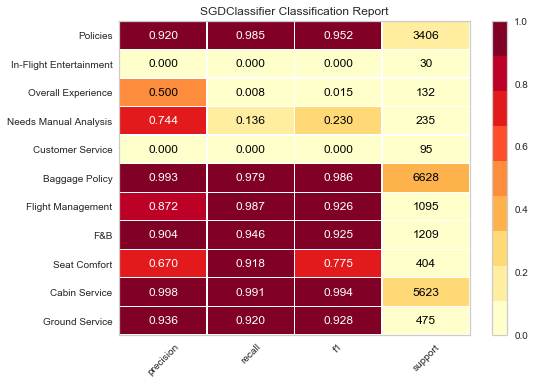

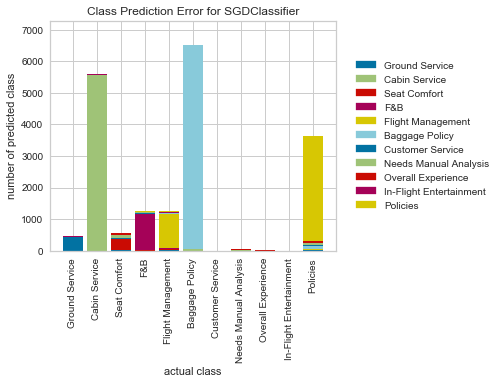

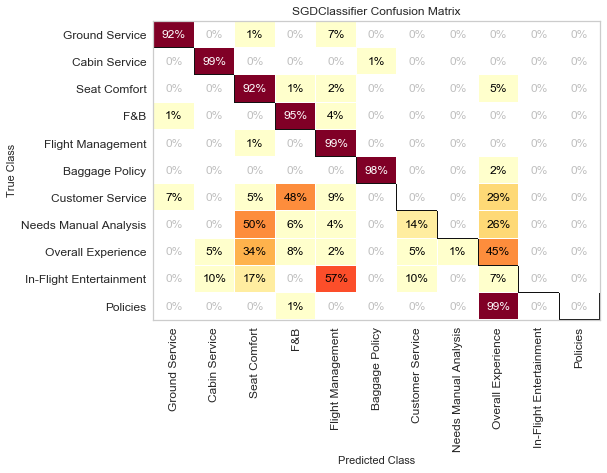

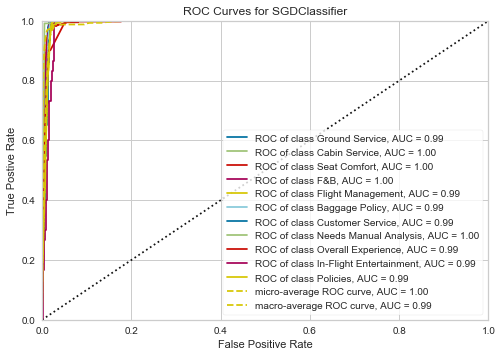

-- Epoch 1
Norm: 74.76, NNZs: 43, Bias: -1.035498, T: 45108, Avg. loss: 0.064214
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 75.93, NNZs: 32, Bias: -1.132320, T: 90216, Avg. loss: 0.045320
Total training time: 1.68 seconds.
-- Epoch 3
Norm: 76.54, NNZs: 29, Bias: -1.215511, T: 135324, Avg. loss: 0.043886
Total training time: 2.42 seconds.
-- Epoch 4
Norm: 76.94, NNZs: 24, Bias: -1.082357, T: 180432, Avg. loss: 0.043323
Total training time: 3.21 seconds.
-- Epoch 5
Norm: 77.24, NNZs: 24, Bias: -1.085223, T: 225540, Avg. loss: 0.043041
Total training time: 3.94 seconds.
-- Epoch 6
Norm: 77.48, NNZs: 21, Bias: -1.047399, T: 270648, Avg. loss: 0.042825
Total training time: 4.66 seconds.
-- Epoch 7
Norm: 77.67, NNZs: 22, Bias: -1.082712, T: 315756, Avg. loss: 0.042643
Total training time: 5.41 seconds.
-- Epoch 8
Norm: 77.84, NNZs: 23, Bias: -1.081283, T: 360864, Avg. loss: 0.042490
Total training time: 6.15 seconds.
Convergence after 8 epochs took 6.15 seconds
-- Epoch 1
Norm: 166.

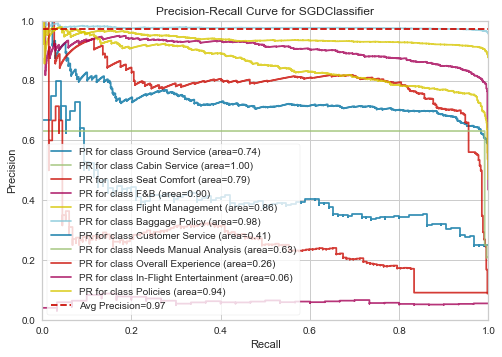

In [160]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [161]:

#Deploy aggregate metrics  
classifier_metrics()

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=10, warm_start=False)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


-- Epoch 1-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 67.07, NNZs: 39, Bias: -1.048904, T: 45108, Avg. loss: 0.053061
Total training time: 1.36 seconds.
-- Epoch 2
Norm: 71.53, NNZs: 47, Bias: -1.722526, T: 45108, Avg. loss: 0.064314
Total training time: 1.37 seconds.
-- Epoch 2
Norm: 113.73, NNZs: 111, Bias: -0.722908, T: 45108, Avg. loss: 0.124182
Total training time: 1.40 seconds.
-- Epoch 2
Norm: 168.23, NNZs: 133, Bias: -1.483926, T: 45108, Avg. loss: 0.054259
Total training time: 1.47 seconds.
-- Epoch 2
Norm: 72.72, NNZs: 33, Bias: -1.481919, T: 90216, Avg. loss: 0.046278
Total training time: 2.54 seconds.
-- Epoch 3
Norm: 67.86, NNZs: 27, Bias: -0.931900, T: 90216, Avg. loss: 0.039519
Total training time: 2.54 seconds.
-- Epoch 3
Norm: 168.40, NNZs: 32, Bias: -1.161801, T: 90216, Avg. loss: 0.000779
Total training time: 2.67 seconds.
-- Epoch 3
Norm: 116.54, NNZs: 70, Bias: -1.025172, T: 90216, Avg. loss: 0.077539
Total training time: 2.68 seconds.
-- Epoch 3
Norm: 73.30, NNZs: 27,

[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:   21.3s remaining:   17.7s


Norm: 36.83, NNZs: 14, Bias: -1.078181, T: 90216, Avg. loss: 0.014336
Total training time: 2.79 seconds.
-- Epoch 3
Norm: 195.80, NNZs: 50, Bias: -1.050896, T: 405972, Avg. loss: 0.074867
Total training time: 12.22 seconds.
-- Epoch 10
Norm: 27.51, NNZs: 6, Bias: -1.311830, T: 45108, Avg. loss: 0.006869
Total training time: 1.17 seconds.
-- Epoch 2
Norm: 47.72, NNZs: 20, Bias: -0.995571, T: 315756, Avg. loss: 0.022711
Total training time: 8.75 seconds.
Convergence after 7 epochs took 8.75 seconds
-- Epoch 1
Norm: 36.92, NNZs: 11, Bias: -1.077362, T: 135324, Avg. loss: 0.014035
Total training time: 4.00 seconds.
-- Epoch 4
Norm: 196.25, NNZs: 62, Bias: -0.982690, T: 451080, Avg. loss: 0.074300
Total training time: 13.50 seconds.
-- Epoch 11
Norm: 27.60, NNZs: 1, Bias: -1.043982, T: 90216, Avg. loss: 0.004728
Total training time: 2.46 seconds.
-- Epoch 3
Norm: 36.96, NNZs: 12, Bias: -1.013413, T: 180432, Avg. loss: 0.013868
Total training time: 5.27 seconds.
-- Epoch 5
Norm: 160.26, NNZs

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:   25.8s remaining:    9.6s


Norm: 37.00, NNZs: 11, Bias: -1.016577, T: 270648, Avg. loss: 0.013752
Total training time: 7.55 seconds.
-- Epoch 7
Norm: 166.85, NNZs: 95, Bias: -1.260267, T: 135324, Avg. loss: 0.117664
Total training time: 4.21 seconds.
-- Epoch 4
Norm: 27.65, NNZs: 1, Bias: -1.008002, T: 225540, Avg. loss: 0.004453
Total training time: 5.80 seconds.
-- Epoch 6
Norm: 37.02, NNZs: 11, Bias: -1.016975, T: 315756, Avg. loss: 0.013722
Total training time: 8.57 seconds.
Convergence after 7 epochs took 8.57 seconds
Norm: 168.42, NNZs: 83, Bias: -1.096625, T: 180432, Avg. loss: 0.113840
Total training time: 5.53 seconds.
-- Epoch 5
Norm: 27.66, NNZs: 1, Bias: -1.047409, T: 270648, Avg. loss: 0.004431
Total training time: 7.07 seconds.
-- Epoch 7
Norm: 169.61, NNZs: 77, Bias: -0.952893, T: 225540, Avg. loss: 0.111631
Total training time: 6.87 seconds.
-- Epoch 6
Norm: 27.66, NNZs: 1, Bias: -1.012573, T: 315756, Avg. loss: 0.004419
Total training time: 8.20 seconds.
Convergence after 7 epochs took 8.20 seco

[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   38.3s finished


NameError: name 'cohen_kappa_score' is not defined